# **403115089 محمدرضا شهرستانی 403115083 - حسین خموشی**

**Summary of tasks completed by team members:**

Hossein Khamooshi:
* Analyzed and reported on the ROCOv2 dataset. (Part 1)
* Loaded the pre-trained model, and created and trained the LoRA model. (Part 3)
* Wrote the exercise report. (Parts 1, 2, and 3)

Mohammadreza Shahrestani:
* Loaded the ROCOv2 test and train datasets. (Part 2)
* Fine-tuned the ViTMAE model, and displayed reconstruction of samples from the test set. (Part 2)
* Trained the LoRA model. (Part 3)



# Colab configs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1) ROCOv2**

## **1-1) Dataset**

### **Load datasets**
Download and unzip  ROCOv2 dataset






In [ ]:
#!rm test_captions.csv	train_captions.csv  train -r test -r

In [2]:
!wget -O train_images.zip "https://zenodo.org/records/10821435/files/train_images.zip?download=1"
!wget -O test_images.zip "https://zenodo.org/records/10821435/files/test_images.zip?download=1"
!wget -O train_captions.csv "https://zenodo.org/records/10821435/files/train_captions.csv?download=1"
!wget -O test_captions.csv "https://zenodo.org/records/10821435/files/test_captions.csv?download=1"

!unzip train_images.zip -d train_images
!unzip test_images.zip -d test_images

!rm -r train_images.zip
!rm -r test_images.zip

!mv train_images/train train
!mv test_images/test test

!rm train_images -r
!rm test_images -r
!rm sample_data -r

!ls

Streaming output truncated to the last 5000 lines.
  inflating: test_images/test/ROCOv2_2023_test_004947.jpg  
  inflating: test_images/test/ROCOv2_2023_test_004948.jpg  
  inflating: test_images/test/ROCOv2_2023_test_004949.jpg  
  inflating: test_images/test/ROCOv2_2023_test_004950.jpg  
  inflating: test_images/test/ROCOv2_2023_test_004951.jpg  
  inflating: test_images/test/ROCOv2_2023_test_004952.jpg  
  inflating: test_images/test/ROCOv2_2023_test_004953.jpg  
  inflating: test_images/test/ROCOv2_2023_test_004954.jpg  
  inflating: test_images/test/ROCOv2_2023_test_004955.jpg  
  inflating: test_images/test/ROCOv2_2023_test_004956.jpg  
 extracting: test_images/test/ROCOv2_2023_test_004957.jpg  
  inflating: test_images/test/ROCOv2_2023_test_004958.jpg  
  inflating: test_images/test/ROCOv2_2023_test_004959.jpg  
  inflating: test_images/test/ROCOv2_2023_test_004960.jpg  
 extracting: test_images/test/ROCOv2_2023_test_004961.jpg  
  inflating: test_images/test/ROCOv2_2023_test_00

### **Show dataset files**

In [4]:
import pandas as pd

!ls
print(50*"-")
!ls train/ | head -10
print(50*"-")
!ls test | head -10
print(50*"-")
df_train_captions = pd.read_csv("train_captions.csv")
print(df_train_captions.loc[0:9])
print(50*"-")
df_test_captions = pd.read_csv("test_captions.csv")
print(df_test_captions.loc[0:9])

test  test_captions.csv  train	train_captions.csv
--------------------------------------------------
ROCOv2_2023_train_000001.jpg
ROCOv2_2023_train_000002.jpg
ROCOv2_2023_train_000003.jpg
ROCOv2_2023_train_000004.jpg
ROCOv2_2023_train_000005.jpg
ROCOv2_2023_train_000006.jpg
ROCOv2_2023_train_000007.jpg
ROCOv2_2023_train_000008.jpg
ROCOv2_2023_train_000009.jpg
ROCOv2_2023_train_000010.jpg
--------------------------------------------------
ROCOv2_2023_test_000001.jpg
ROCOv2_2023_test_000002.jpg
ROCOv2_2023_test_000003.jpg
ROCOv2_2023_test_000004.jpg
ROCOv2_2023_test_000005.jpg
ROCOv2_2023_test_000006.jpg
ROCOv2_2023_test_000007.jpg
ROCOv2_2023_test_000008.jpg
ROCOv2_2023_test_000009.jpg
ROCOv2_2023_test_000010.jpg
--------------------------------------------------
                         ID                                            Caption
0  ROCOv2_2023_train_000001            Head CT demonstrating left parotiditis.
1  ROCOv2_2023_train_000002  Acquired renal cysts in end-stage renal 

### **Display some image samples with their captions**

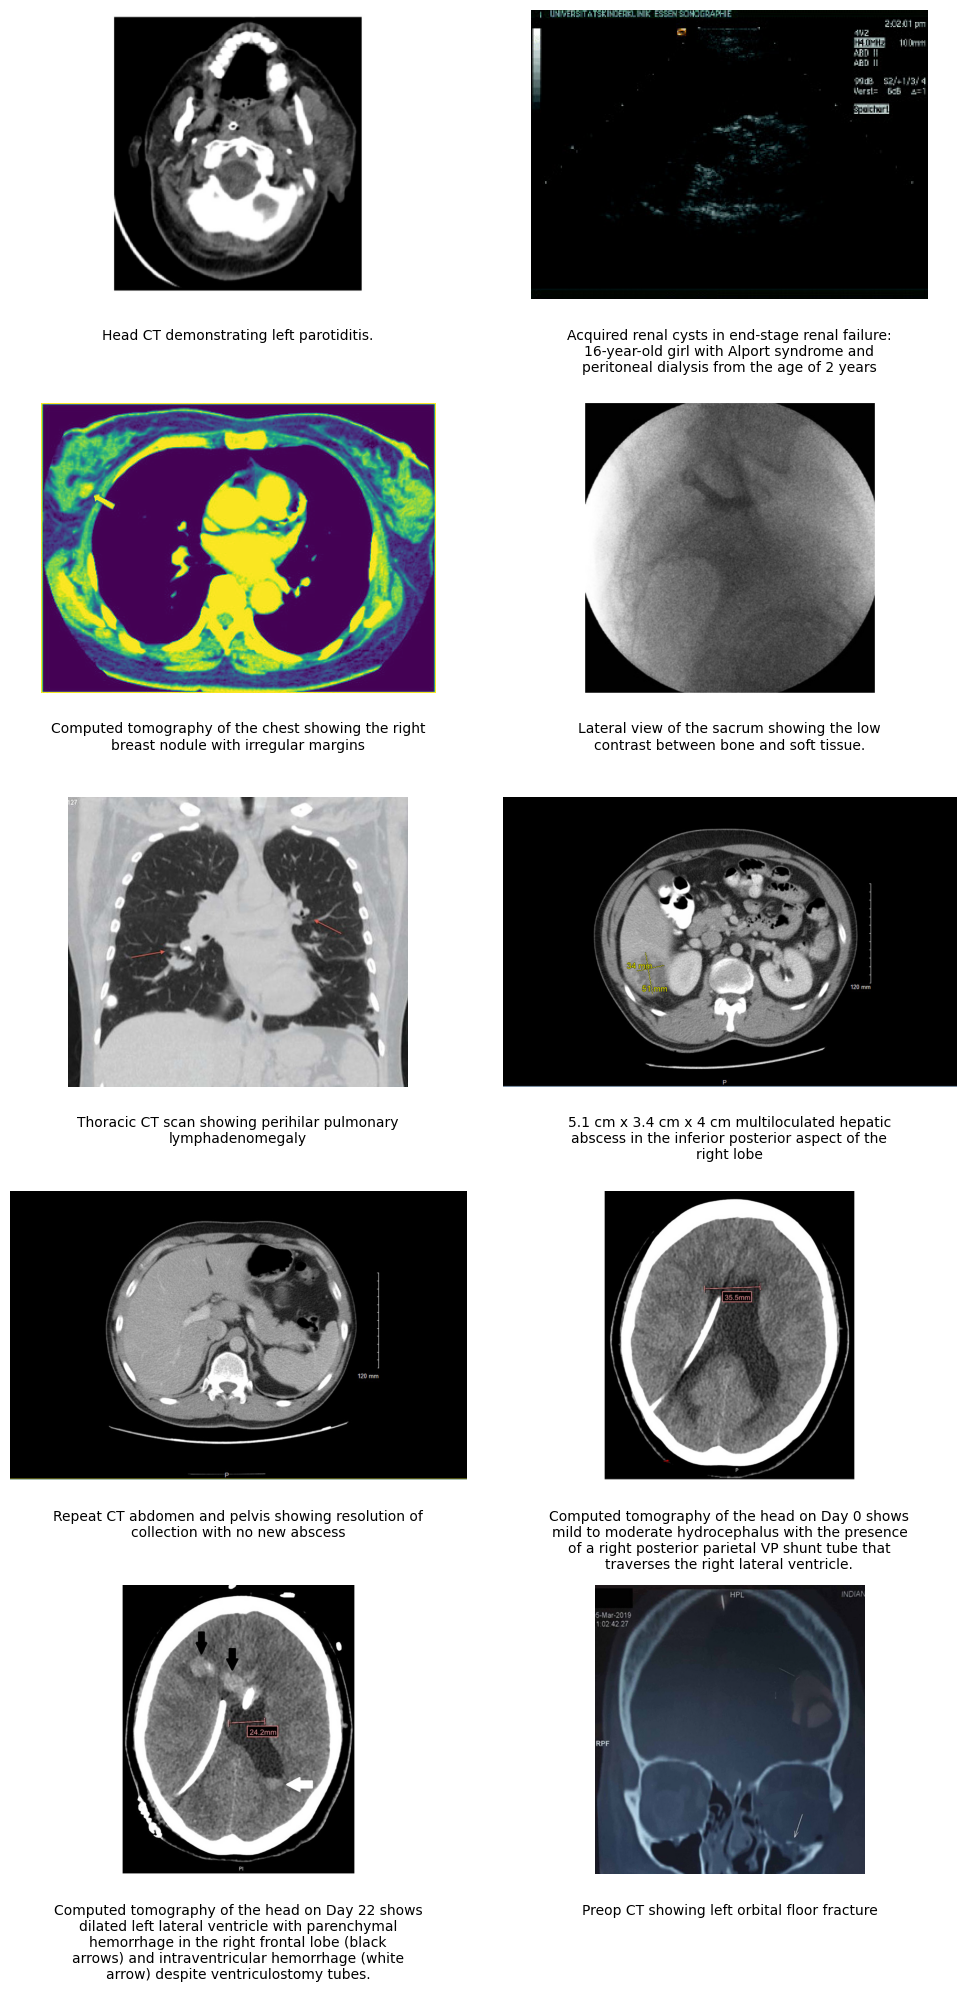

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import textwrap

df_train = pd.read_csv("train_captions.csv")
image_dir = "train"

num_images = 10  # number of images to display
cols = 2
rows = (num_images + cols - 1) // cols  # calculate number of rows needed (ceiling division)

fig, axs = plt.subplots(rows, cols, figsize=(10, rows * 4))  # set figure size proportional to rows

# Flatten axs array for easy indexing in case it's 2D
axs = axs.flatten() if num_images > 1 else [axs]

for i in range(num_images):
    row = df_train.loc[i]
    image_id = row["ID"]
    caption = row["Caption"]
    image_path = os.path.join(image_dir, image_id + ".jpg")

    ax = axs[i]

    if os.path.exists(image_path):
        image = Image.open(image_path)
        ax.imshow(image)
        ax.axis('off')

        # Wrap the caption text to max 50 characters per line
        wrapped_caption = "\n".join(textwrap.wrap(caption, width=50))
        # Add wrapped caption below the image
        ax.text(0.5, -0.1, wrapped_caption, fontsize=10, ha='center', va='top', transform=ax.transAxes)
    else:
        # Display a message if the image file is not found
        ax.text(0.5, 0.5, f"Image not found:\n{image_id}", ha='center', va='center', fontsize=12, color='red')
        ax.axis('off')

# Hide any unused subplots if the grid is larger than the number of images
for j in range(num_images, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


# **2) Masked Autoencoder**

## **2-1) Pre-trained Model**

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 9.7 MB/s eta 0:00:00


Processing image 1: ROCOv2_2023_test_000001.jpg


/tmp/ipython-input-63-1683392573.py:28: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())


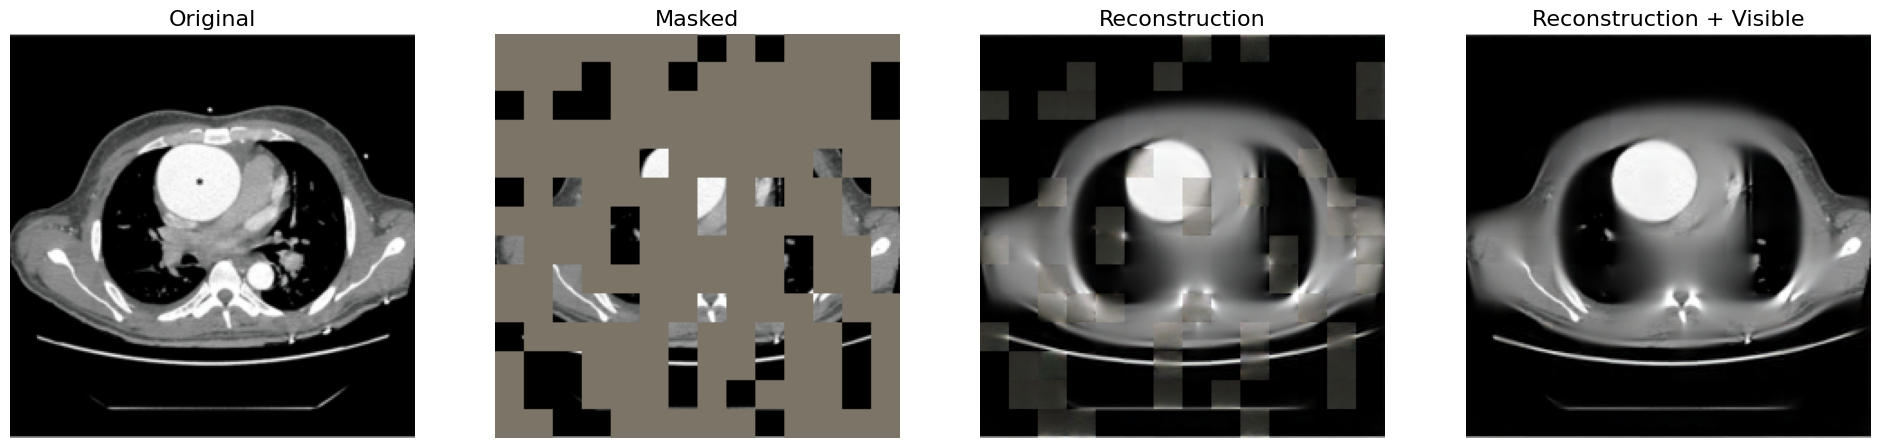

Processing image 2: ROCOv2_2023_test_000002.jpg


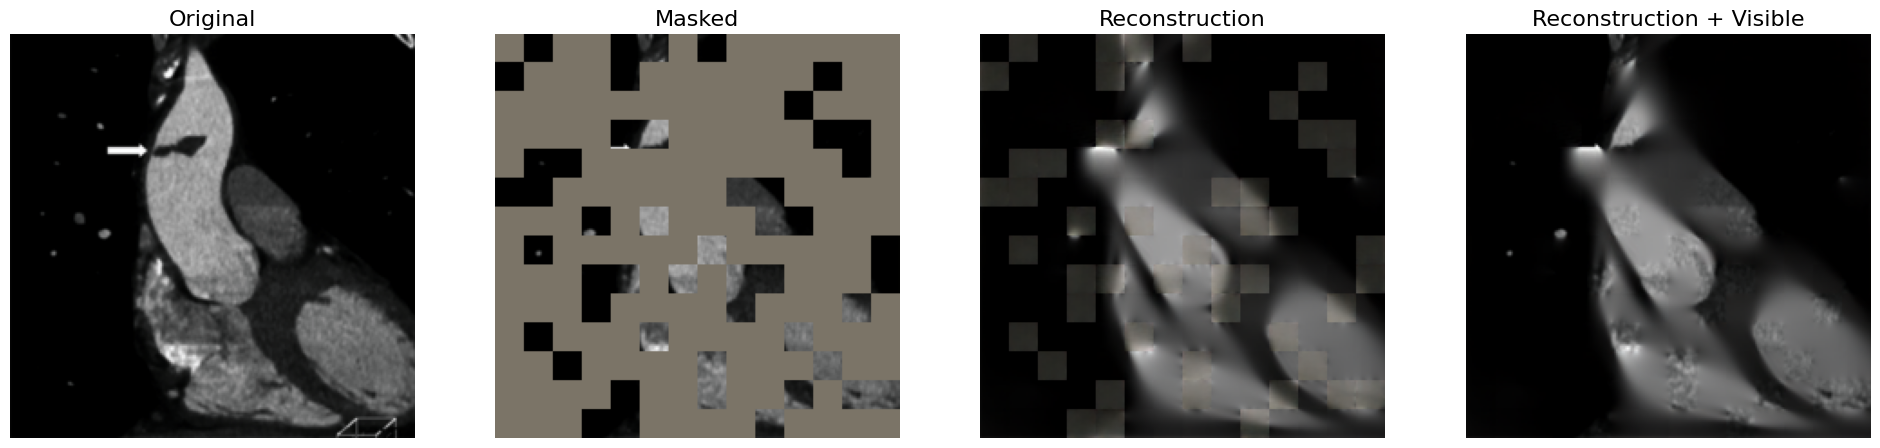

Processing image 3: ROCOv2_2023_test_000003.jpg


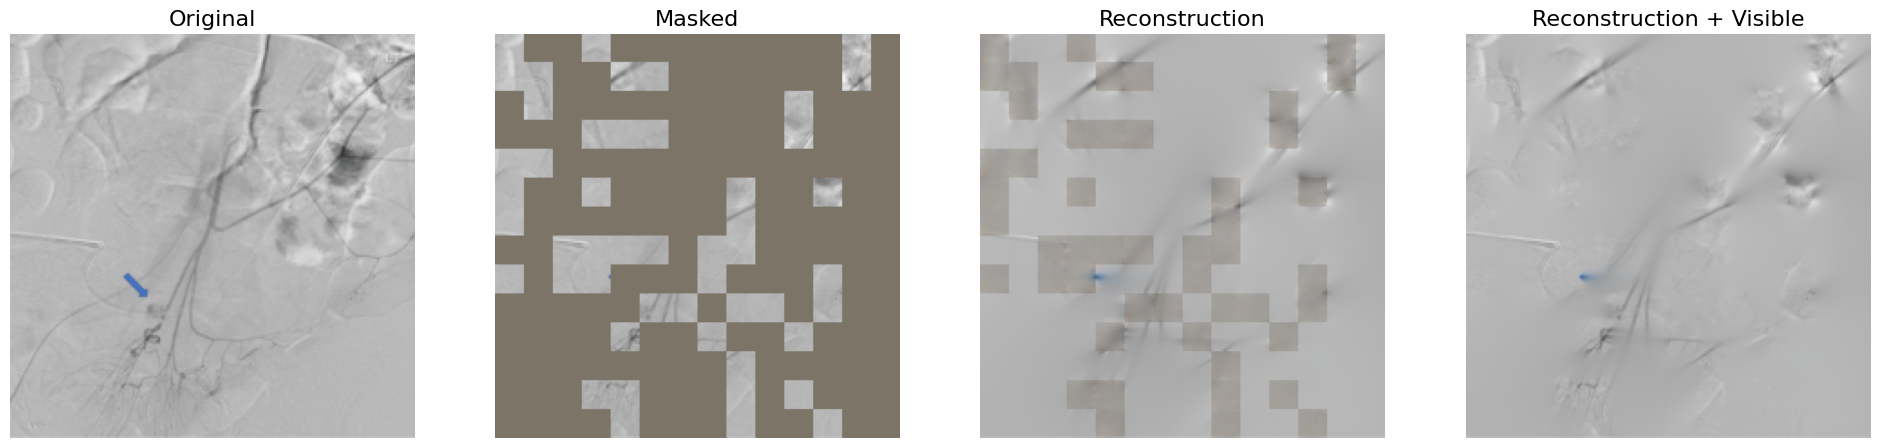

Processing image 4: ROCOv2_2023_test_000004.jpg


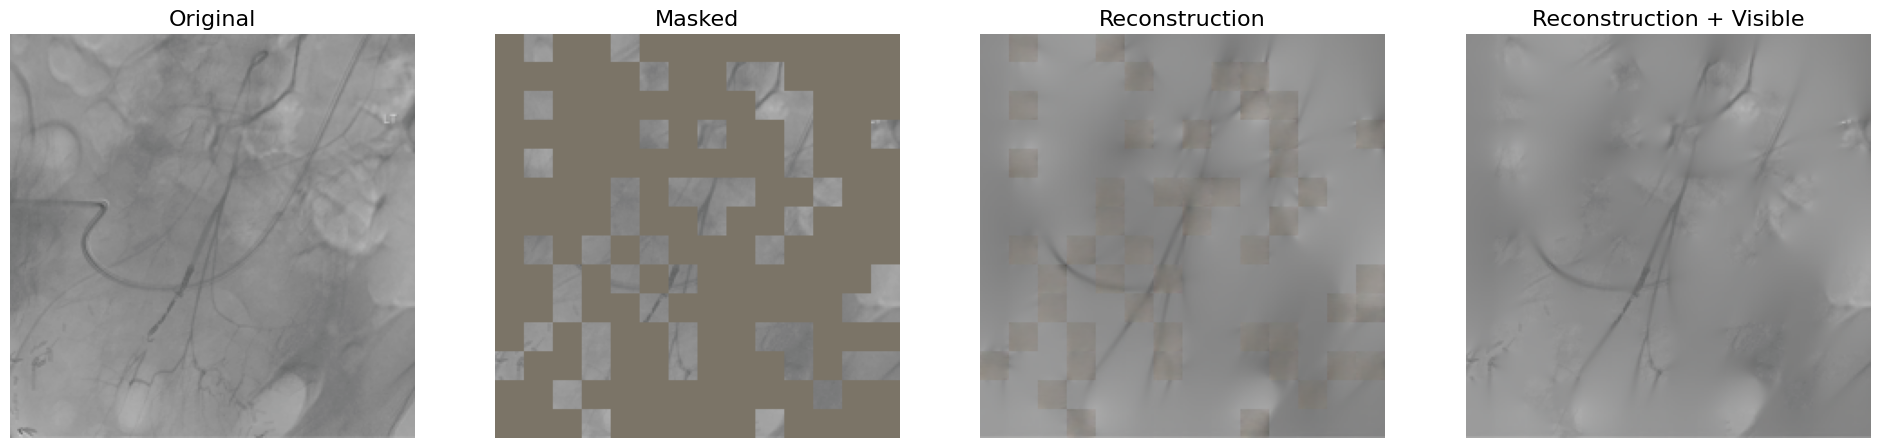

Processing image 5: ROCOv2_2023_test_000005.jpg


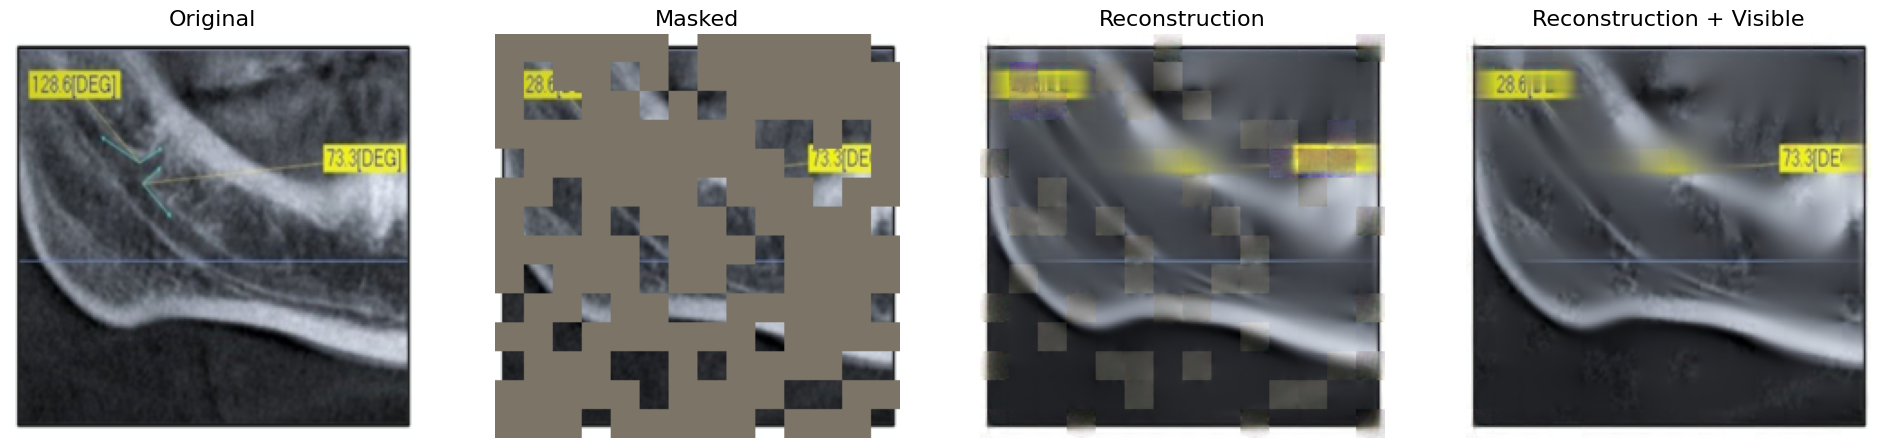

In [ ]:
from transformers import ViTFeatureExtractor, ViTMAEForPreTraining
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the feature extractor and pre-trained ViT-MAE model
feature_extractor = ViTFeatureExtractor.from_pretrained("facebook/vit-mae-base")
model = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")
model.config.mask_ratio = 0.75  # Make masking ratio explicit

# Make random masking reproducible
torch.manual_seed(2)

# Path to the test directory
test_dir = "test"

# Get the first 5 image filenames from the test directory
test_images = sorted(os.listdir(test_dir))[:5]

# ImageNet normalization stats (used for de-normalization and visualization)
imagenet_mean = np.array(feature_extractor.image_mean)
imagenet_std = np.array(feature_extractor.image_std)

# Helper function to show an image
def show_image(image, title=''):
    plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

# Visualize original, masked, reconstructed, and combined images
def visualize(pixel_values, model):
    # Forward pass through the model
    outputs = model(pixel_values)
    y = model.unpatchify(outputs.logits)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()

    # Generate the mask
    mask = outputs.mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.config.patch_size**2 * 3)
    mask = model.unpatchify(mask)
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()

    x = torch.einsum('nchw->nhwc', pixel_values)

    # Masked image (only visible patches shown)
    im_masked = x * (1 - mask)

    # Reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # Plot the results
    plt.rcParams['figure.figsize'] = [24, 6]

    plt.subplot(1, 4, 1)
    show_image(x[0], "Original")

    plt.subplot(1, 4, 2)
    show_image(im_masked[0], "Masked")

    plt.subplot(1, 4, 3)
    show_image(y[0], "Reconstruction")

    plt.subplot(1, 4, 4)
    show_image(im_paste[0], "Reconstruction + Visible")

    plt.show()

# Run the model on the first 5 test images
for i, img_name in enumerate(test_images):
    print(f"Processing image {i+1}: {img_name}")
    img_path = os.path.join(test_dir, img_name)
    image = Image.open(img_path).convert("RGB")  # Ensure image is in RGB format
    pixel_values = feature_extractor(image, return_tensors="pt").pixel_values
    visualize(pixel_values, model)


In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import torch.nn.functional as F

def evaluate_reconstruction(original, reconstructed):
    """
    original, reconstructed: torch tensors with shape [1, 3, H, W]
    Values should be in [0, 1] range
    """
    # Convert to numpy arrays in shape [H, W, C]
    original_np = original.squeeze(0).permute(1, 2, 0).cpu().numpy()
    reconstructed_np = reconstructed.squeeze(0).permute(1, 2, 0).cpu().numpy()

    # Compute metrics for each channel then average
    mse_val = F.mse_loss(reconstructed, original).item()
    psnr_val = psnr(original_np, reconstructed_np, data_range=1.0)
    ssim_val = ssim(original_np, reconstructed_np, channel_axis=2, data_range=1.0)

    return mse_val, psnr_val, ssim_val

results = []

# Run the model and evaluate the first 5 test images
for i, img_name in enumerate(test_images):
    print(f"Processing image {i+1}: {img_name}")
    img_path = os.path.join(test_dir, img_name)
    image = Image.open(img_path).convert("RGB")

    # Preprocess
    pixel_values = feature_extractor(image, return_tensors="pt").pixel_values
    with torch.no_grad():
        outputs = model(pixel_values)
        reconstructed = model.unpatchify(outputs.logits)

    # Bring both to [0, 1] for comparison
    original_norm = pixel_values.clone()
    reconstructed = torch.clamp(reconstructed, 0, 1)

    # Evaluate
    mse_val, psnr_val, ssim_val = evaluate_reconstruction(original_norm, reconstructed)
    results.append((img_name, mse_val, psnr_val, ssim_val))

# Print results
print("\n--- Quantitative Evaluation Results ---")
print(f"{'Image':<30} {'MSE':<10} {'PSNR':<10} {'SSIM':<10}")
for img_name, mse_val, psnr_val, ssim_val in results:
    print(f"{img_name:<30} {mse_val:<10.4f} {psnr_val:<10.2f} {ssim_val:<10.4f}")


Processing image 1: ROCOv2_2023_test_000001.jpg
Processing image 2: ROCOv2_2023_test_000002.jpg
Processing image 3: ROCOv2_2023_test_000003.jpg
Processing image 4: ROCOv2_2023_test_000004.jpg
Processing image 5: ROCOv2_2023_test_000005.jpg

--- Quantitative Evaluation Results ---
Image                          MSE        PSNR       SSIM      
ROCOv2_2023_test_000001.jpg    2.6912     -4.30      0.0263    
ROCOv2_2023_test_000002.jpg    2.6820     -4.28      0.0080    
ROCOv2_2023_test_000003.jpg    0.1198     9.21       0.2557    
ROCOv2_2023_test_000004.jpg    0.0296     15.29      0.3301    
ROCOv2_2023_test_000005.jpg    0.9970     0.01       0.0636    


## **2-2) Fine-tune Model**

### **Load pretrained mode**

In [ ]:
# # Load pretrained model and feature extractor
# feature_extractor = ViTFeatureExtractor.from_pretrained("facebook/vit-mae-base")
# model = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")
# model.config.mask_ratio = 0.75  # Explicitly set mask ratio

### **Reload saved model and fine-tune**

In [ ]:
from transformers import ViTFeatureExtractor, ViTMAEForPreTraining, Trainer, TrainingArguments
from torch.utils.data import Dataset
from PIL import Image
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

# Paths
train_dir = "train"
test_dir = "test"
model_save_path = "/content/drive/MyDrive/Data_extraction_and_analysis/HW3/"

# Reload the model from saved path
model = ViTMAEForPreTraining.from_pretrained(model_save_path)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_save_path)
model.config.mask_ratio = 0.75  # Explicitly set mask ratio

# Custom dataset
class ImageDataset(Dataset):
    def __init__(self, img_dir, feature_extractor):
        self.img_dir = img_dir
        self.feature_extractor = feature_extractor
        self.images = sorted(os.listdir(img_dir))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.images[idx])
        image = Image.open(img_path).convert("RGB")
        encoding = self.feature_extractor(images=image, return_tensors="pt")
        return {k: v.squeeze() for k, v in encoding.items()}

# Load dataset
train_dataset = ImageDataset(train_dir, feature_extractor)

# Training arguments
training_args = TrainingArguments(
    output_dir="./vitmae_output",
    per_device_train_batch_size=8,
    num_train_epochs=5,
    logging_steps=2500,
    report_to="none",
    save_strategy="epoch",
    save_total_limit=1,
    remove_unused_columns=False,
    push_to_hub=False,
    load_best_model_at_end=False,
)


# Define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)

# Train the model
trainer.train()

# Save model to Google Drive
model.save_pretrained(model_save_path)
feature_extractor.save_pretrained(model_save_path)

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
from transformers import ViTFeatureExtractor, ViTMAEForPreTraining, Trainer, TrainingArguments
from torch.utils.data import Dataset
from PIL import Image
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

# Paths
train_dir = "train"
test_dir = "test"
model_save_path = "/content/drive/MyDrive/Data_extraction_and_analysis/HW3/"

# Reload the model from saved path
model = ViTMAEForPreTraining.from_pretrained(model_save_path)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_save_path)
model.config.mask_ratio = 0.75  # Explicitly set mask ratio

# Custom dataset
class ImageDataset(Dataset):
    def __init__(self, img_dir, feature_extractor):
        self.img_dir = img_dir
        self.feature_extractor = feature_extractor
        self.images = sorted(os.listdir(img_dir))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.images[idx])
        image = Image.open(img_path).convert("RGB")
        encoding = self.feature_extractor(images=image, return_tensors="pt")
        return {k: v.squeeze() for k, v in encoding.items()}

# Load dataset
train_dataset = ImageDataset(train_dir, feature_extractor)

# Training arguments
training_args = TrainingArguments(
    output_dir="./vitmae_output",
    per_device_train_batch_size=8,
    num_train_epochs=5,
    logging_steps=2500,
    report_to="none",
    save_strategy="epoch",
    save_total_limit=1,
    remove_unused_columns=False,
    push_to_hub=False,
    load_best_model_at_end=False,
)


# Define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)

# Train the model
trainer.train()

# # Save model to Google Drive
# model.save_pretrained(model_save_path)
# feature_extractor.save_pretrained(model_save_path)

Evaluating image 1: ROCOv2_2023_test_000001.jpg


/tmp/ipython-input-63-1683392573.py:28: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())


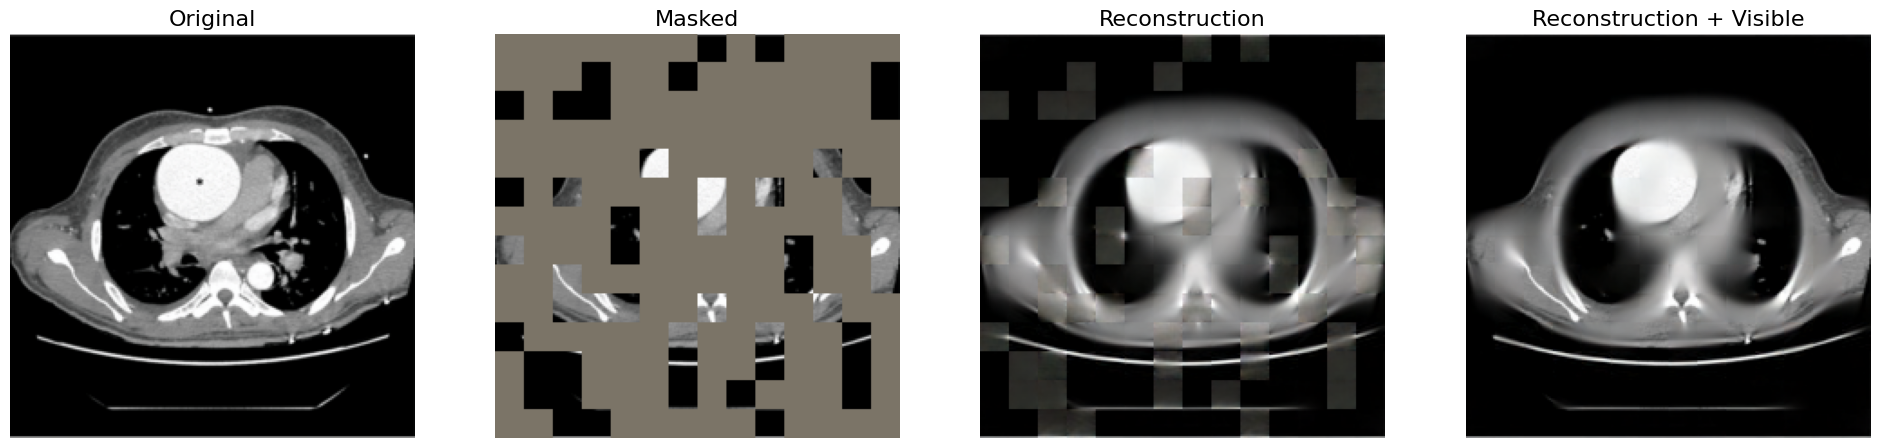

Evaluating image 2: ROCOv2_2023_test_000002.jpg


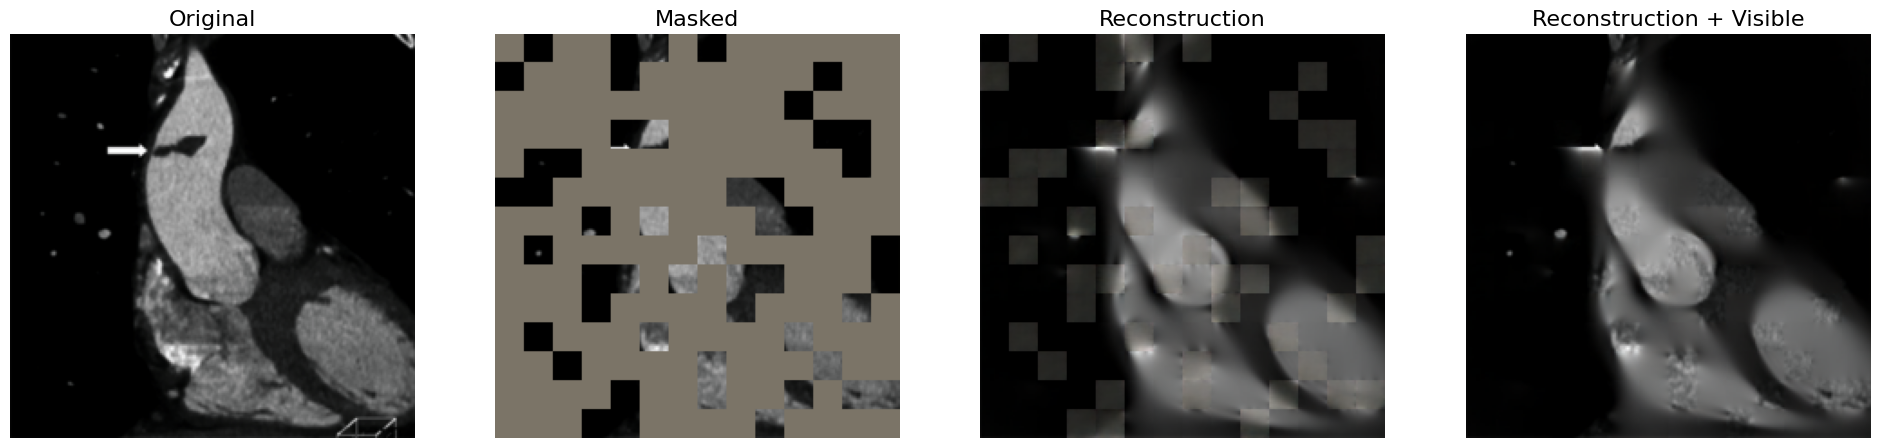

Evaluating image 3: ROCOv2_2023_test_000003.jpg


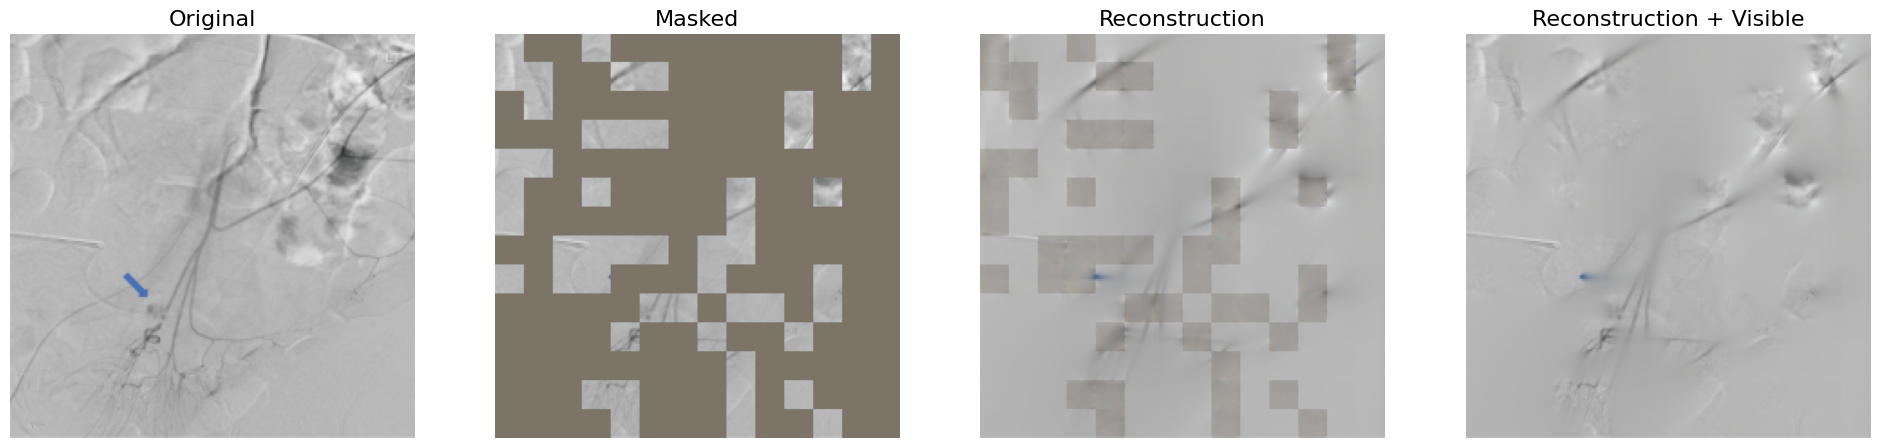

Evaluating image 4: ROCOv2_2023_test_000004.jpg


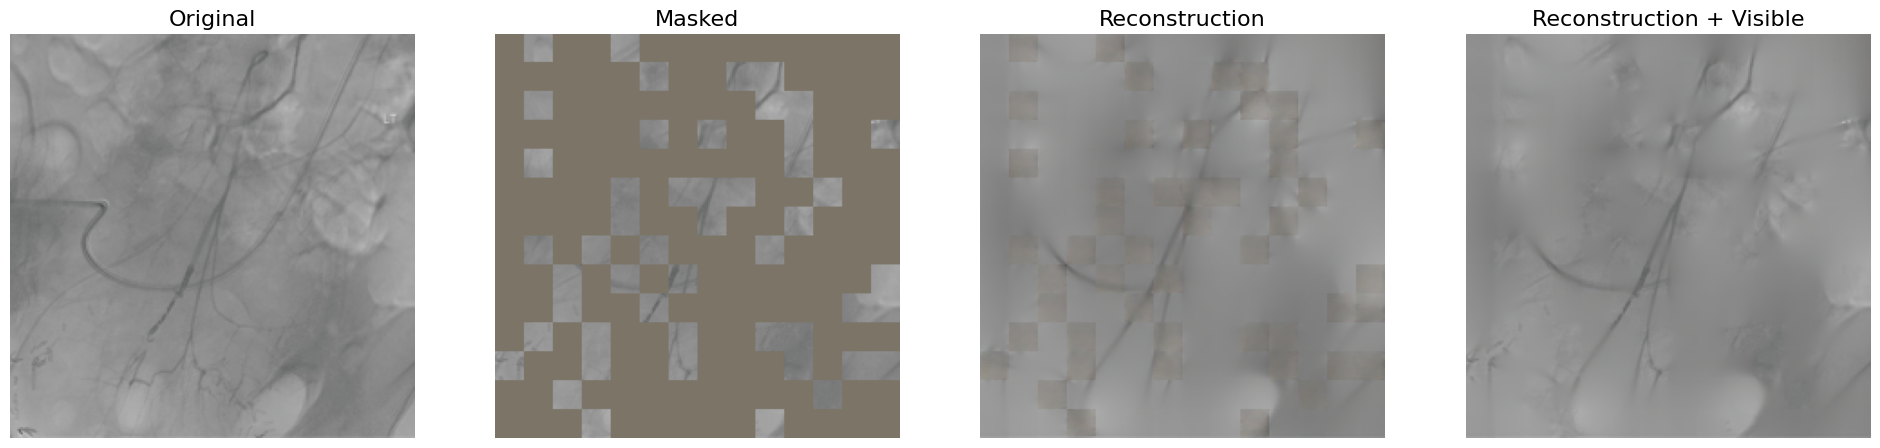

Evaluating image 5: ROCOv2_2023_test_000005.jpg


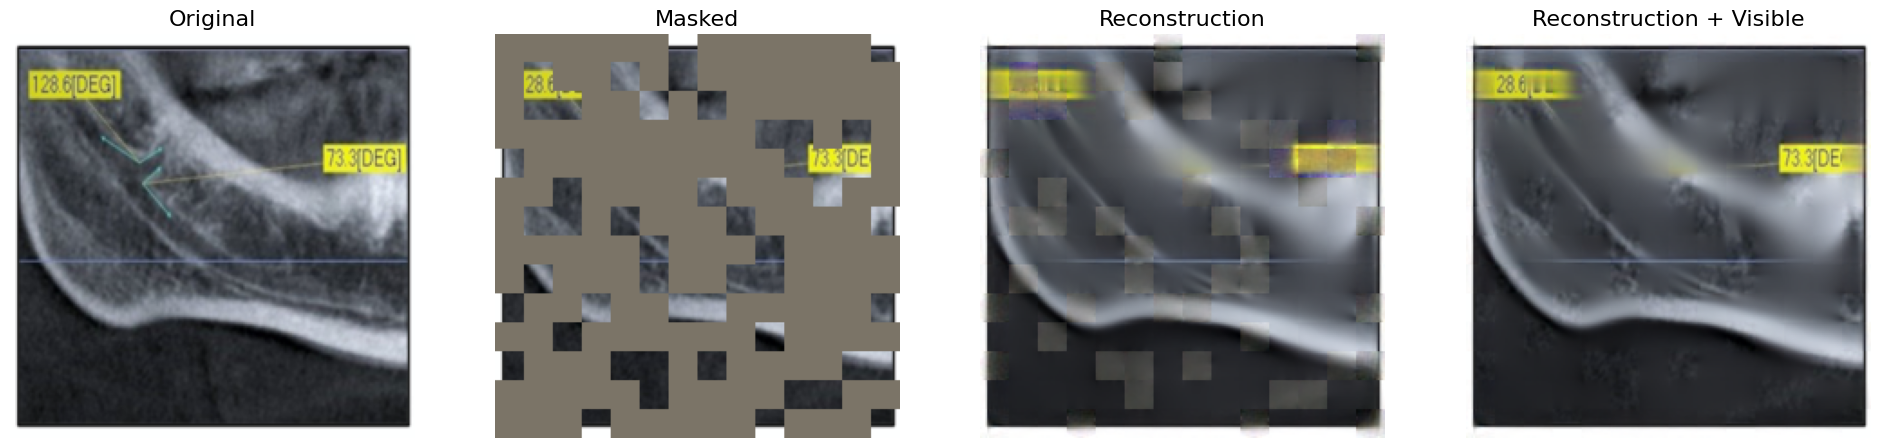

In [ ]:
# Evaluation on 5 test images
torch.manual_seed(2)
test_images = sorted(os.listdir(test_dir))[:5]

imagenet_mean = np.array(feature_extractor.image_mean)
imagenet_std = np.array(feature_extractor.image_std)

# Run evaluation on test set
for i, img_name in enumerate(test_images):
    print(f"Evaluating image {i+1}: {img_name}")
    img_path = os.path.join(test_dir, img_name)
    image = Image.open(img_path).convert("RGB")
    pixel_values = feature_extractor(image, return_tensors="pt").pixel_values
    visualize(pixel_values, model)

In [ ]:
results = []

# Run the model and evaluate the first 5 test images
for i, img_name in enumerate(test_images):
    print(f"Processing image {i+1}: {img_name}")
    img_path = os.path.join(test_dir, img_name)
    image = Image.open(img_path).convert("RGB")

    # Preprocess
    pixel_values = feature_extractor(image, return_tensors="pt").pixel_values
    with torch.no_grad():
        outputs = model(pixel_values)
        reconstructed = model.unpatchify(outputs.logits)

    # Bring both to [0, 1] for comparison
    original_norm = pixel_values.clone()
    reconstructed = torch.clamp(reconstructed, 0, 1)

    # Evaluate
    mse_val, psnr_val, ssim_val = evaluate_reconstruction(original_norm, reconstructed)
    results.append((img_name, mse_val, psnr_val, ssim_val))

# Print results
print("\n--- Quantitative Evaluation Results ---")
print(f"{'Image':<30} {'MSE':<10} {'PSNR':<10} {'SSIM':<10}")
for img_name, mse_val, psnr_val, ssim_val in results:
    print(f"{img_name:<30} {mse_val:<10.4f} {psnr_val:<10.2f} {ssim_val:<10.4f}")


Processing image 1: ROCOv2_2023_test_000001.jpg
Processing image 2: ROCOv2_2023_test_000002.jpg
Processing image 3: ROCOv2_2023_test_000003.jpg
Processing image 4: ROCOv2_2023_test_000004.jpg
Processing image 5: ROCOv2_2023_test_000005.jpg

--- Quantitative Evaluation Results ---
Image                          MSE        PSNR       SSIM      
ROCOv2_2023_test_000001.jpg    2.6620     -4.25      0.0313    
ROCOv2_2023_test_000002.jpg    2.6835     -4.29      0.0077    
ROCOv2_2023_test_000003.jpg    0.1210     9.17       0.2506    
ROCOv2_2023_test_000004.jpg    0.0328     14.84      0.3148    
ROCOv2_2023_test_000005.jpg    0.9946     0.02       0.0663    


# **3) Multi Modal**

In [ ]:
!pip install peft datasets accelerate torch torchvision Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## **Load Pre-trained Model**

In [7]:
import torch
from PIL import Image
import pandas as pd
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Import necessary classes from transformers and peft
from transformers import AutoProcessor, AutoTokenizer, AutoFeatureExtractor, VisionEncoderDecoderModel
from peft import LoraConfig, get_peft_model

## Model Loading and LoRA Setup
# Define encoder and decoder model IDs
encoder_model_id = "google/vit-base-patch16-224-in21k"
decoder_model_id = "distilgpt2"

print(f"\nLoading feature extractor for encoder: {encoder_model_id}...")
feature_extractor = AutoFeatureExtractor.from_pretrained(encoder_model_id)

print(f"Loading tokenizer for decoder: {decoder_model_id}...")
tokenizer = AutoTokenizer.from_pretrained(decoder_model_id)
# Set padding token for the tokenizer if not already set, crucial for generation and training
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token # Use EOS as pad token if none is defined

print(f"Loading encoder and decoder to build VisionEncoderDecoderModel...")
# Load the VisionEncoderDecoderModel from pre-trained encoder and decoder
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    encoder_model_id, decoder_model_id, torch_dtype=torch.float16
)

# Set model's generation parameters
model.config.decoder_start_token_id = tokenizer.cls_token_id if tokenizer.cls_token_id else tokenizer.bos_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.vocab_size = model.config.decoder.vocab_size


Loading feature extractor for encoder: google/vit-base-patch16-224-in21k...


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

Loading tokenizer for decoder: distilgpt2...


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Loading encoder and decoder to build VisionEncoderDecoderModel...


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['transformer.h.0.crossattention.c_attn.bias', 'transformer.h.0.crossattention.c_attn.weight', 'transformer.h.0.crossattention.c_proj.bias', 'transformer.h.0.crossattention.c_proj.weight', 'transformer.h.0.crossattention.q_attn.bias', 'transformer.h.0.crossattention.q_attn.weight', 'transformer.h.0.ln_cross_attn.bias', 'transformer.h.0.ln_cross_attn.weight', 'transformer.h.1.crossattention.c_attn.bias', 'transformer.h.1.crossattention.c_attn.weight', 'transformer.h.1.crossattention.c_proj.bias', 'transformer.h.1.crossattention.c_proj.weight', 'transformer.h.1.crossattention.q_attn.bias', 'transformer.h.1.crossattention.q_attn.weight', 'transformer.h.1.ln_cross_attn.bias', 'transformer.h.1.ln_cross_attn.weight', 'transformer.h.2.crossattention.c_attn.bias', 'transformer.h.2.crossattention.c_attn.weight', 'transformer.h.2.crossattention.c_proj.bias', 'transformer.h.2.cr

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

## **Fine-tune Model with LoRA**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Configure LoRA for parameter-efficient fine-tuning
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["c_attn", "c_proj"], # Apply LoRA to attention projections in the decoder (GPT-2)
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

# Apply LoRA to the base model
model = get_peft_model(model, lora_config)

# Print trainable parameters after LoRA
print("Trainable parameters after applying LoRA:")
model.print_trainable_parameters()

Trainable parameters after applying LoRA:
trainable params: 1,179,648 || all params: 183,664,896 || trainable%: 0.6423


### **Data Preparation**

In [6]:
from torch.utils.data import Dataset, DataLoader

# Define data paths (adjust for Google Drive if needed)
train_image_dir = "train/"
test_image_dir = "test/"
train_captions_path = "train_captions.csv"
test_captions_path = "test_captions.csv"

# Load caption CSVs
try:
    df_train_captions = pd.read_csv(train_captions_path)
    df_test_captions = pd.read_csv(test_captions_path)
    print("Successfully loaded caption CSVs. Sample data below:")
    print(df_train_captions.head())
    print(df_test_captions.head())
except FileNotFoundError as e:
    print(f"Error loading CSVs: {e}. Check your data paths and uploads.")
    raise

# Custom Dataset for image captioning
class MedicalImageCaptioningDataset(Dataset):
    def __init__(self, dataframe, image_dir, feature_extractor, tokenizer):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.feature_extractor = feature_extractor
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image_id = row['ID']
        caption = row['Caption']
        image_path = os.path.join(self.image_dir, f"{image_id}.jpg")

        try:
            image = Image.open(image_path).convert("RGB")
        except (FileNotFoundError, Exception) as e:
            print(f"Warning: Image {image_path} not found or error: {e}. Skipping.")
            return None

        # Process image
        pixel_values = self.feature_extractor(images=image, return_tensors="pt").pixel_values.squeeze()
        # Process text for labels and decoder_input_ids
        tokenized_caption = self.tokenizer(caption, padding="max_length", truncation=True, return_tensors="pt")
        labels = tokenized_caption.input_ids.squeeze()
        attention_mask = tokenized_caption.attention_mask.squeeze() # Get attention mask for decoder

        return {"pixel_values": pixel_values, "labels": labels, "attention_mask": attention_mask}

# Collate function to handle None (skipped) samples in DataLoader
def collate_fn(batch):
    batch = [item for item in batch if item is not None]
    if not batch: return None
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = torch.stack([item['labels'] for item in batch])
    attention_mask = torch.stack([item['attention_mask'] for item in batch]) # Stack attention masks
    return {"pixel_values": pixel_values, "labels": labels, "attention_mask": attention_mask}

Successfully loaded caption CSVs. Sample data below:
                         ID                                            Caption
0  ROCOv2_2023_train_000001            Head CT demonstrating left parotiditis.
1  ROCOv2_2023_train_000002  Acquired renal cysts in end-stage renal failur...
2  ROCOv2_2023_train_000003  Computed tomography of the chest showing the r...
3  ROCOv2_2023_train_000004  Lateral view of the sacrum showing the low con...
4  ROCOv2_2023_train_000005  Thoracic CT scan showing perihilar pulmonary l...
                        ID                                            Caption
0  ROCOv2_2023_test_000001  CT chest axial view showing a huge ascending a...
1  ROCOv2_2023_test_000002  Computed tomography (CT) shows floating thromb...
2  ROCOv2_2023_test_000003  Digitally subtracted angiogram demonstrates ac...
3  ROCOv2_2023_test_000004  Digitally subtracted angiogram of the IMA demo...
4  ROCOv2_2023_test_000005               Angle measurement of a Type 1 canal.


### **Fine-Tuning the LoRA Model**

In [ ]:
# # Load model
# output_dir = "/content/drive/MyDrive/Data_extraction_and_analysis/HW3/finetuned_vit_gpt2_lora"
# os.makedirs(output_dir, exist_ok=True)

# # Load model and tokenizer/feature extractor
# loaded_tokenizer = AutoTokenizer.from_pretrained(output_dir)
# loaded_feature_extractor = AutoFeatureExtractor.from_pretrained(output_dir)
# loaded_model = VisionEncoderDecoderModel.from_pretrained(output_dir, torch_dtype=torch.float16)

# # Move the loaded model to the device (GPU if available)
# loaded_device = "cuda" if torch.cuda.is_available() else "cpu"
# loaded_model.to(loaded_device)

In [ ]:
import torch
from tqdm import tqdm
import os
from PIL import Image
import torch
from torchvision.transforms import ToTensor
from torchvision import transforms

device = "cuda" if torch.cuda.is_available() else "cpu"

# Create dataset and dataloader
train_dataset = MedicalImageCaptioningDataset(df_train_captions, train_image_dir, feature_extractor, tokenizer)
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)

# Define optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# Number of training epochs
num_epochs = 5

# Set model to training mode
model.train()

# Training loop
for epoch in range(num_epochs):
    total_loss = 0 # Initialize total loss for the epoch

    # Use tqdm for progress bar similar to the second code snippet
    for idx, batch in tqdm(enumerate(train_dataloader), total=len(train_dataloader), desc=f"Training Epoch {epoch+1}/{num_epochs}"):
        if batch is None: continue

        # Move batch data to device
        pixel_values = batch["pixel_values"].to(device)
        labels = batch["labels"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        # Prepare decoder_input_ids by shifting labels to the right
        decoder_input_ids = labels.clone()
        decoder_input_ids = torch.cat([
            torch.full((decoder_input_ids.shape[0], 1), model.config.decoder_start_token_id, dtype=torch.long).to(device),
            decoder_input_ids[:, :-1]
        ], dim=1)

        # Ensure attention mask is consistent for the shifted inputs
        decoder_attention_mask = attention_mask.clone()

        # Ignore padding tokens for loss calculation
        labels[labels == tokenizer.pad_token_id] = -100

        # Forward pass
        outputs = model(
            pixel_values=pixel_values,
            decoder_input_ids=decoder_input_ids,
            decoder_attention_mask=decoder_attention_mask,
            labels=labels
        )

        # Backpropagation and optimization
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item() # Accumulate loss

    avg_loss = total_loss / len(train_dataloader) # Calculate average loss for the epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}") # Print epoch average loss

Training Epoch 1/5:   0%|          | 1/4497 [00:02<3:05:49,  2.48s/it]

Loss: 7.573968887329102


Training Epoch 1/5:   0%|          | 2/4497 [00:05<3:15:53,  2.61s/it]

Loss: 8.360244750976562


Training Epoch 1/5:   0%|          | 3/4497 [00:07<2:59:56,  2.40s/it]

Loss: 7.580426216125488


Training Epoch 1/5:   0%|          | 4/4497 [00:09<2:56:40,  2.36s/it]

Loss: 8.487343788146973


Training Epoch 1/5:   0%|          | 5/4497 [00:12<2:59:13,  2.39s/it]

Loss: 7.064137935638428


Training Epoch 1/5:   0%|          | 6/4497 [00:14<2:56:39,  2.36s/it]

Loss: 7.488032341003418


Training Epoch 1/5:   0%|          | 7/4497 [00:16<2:56:37,  2.36s/it]

Loss: 7.310367107391357


Training Epoch 1/5:   0%|          | 8/4497 [00:19<2:59:37,  2.40s/it]

Loss: 7.037158012390137


Training Epoch 1/5:   0%|          | 9/4497 [00:21<3:03:38,  2.46s/it]

Loss: 7.240319728851318


Training Epoch 1/5:   0%|          | 10/4497 [00:24<2:58:28,  2.39s/it]

Loss: 7.869272708892822


Training Epoch 1/5:   0%|          | 11/4497 [00:26<2:55:31,  2.35s/it]

Loss: 7.012779235839844


Training Epoch 1/5:   0%|          | 12/4497 [00:28<2:54:35,  2.34s/it]

Loss: 7.668905258178711


Training Epoch 1/5:   0%|          | 13/4497 [00:30<2:54:02,  2.33s/it]

Loss: 6.5954084396362305


Training Epoch 1/5:   0%|          | 14/4497 [00:33<3:04:01,  2.46s/it]

Loss: 7.383758068084717


Training Epoch 1/5:   0%|          | 15/4497 [00:36<3:00:44,  2.42s/it]

Loss: 8.068154335021973


Training Epoch 1/5:   0%|          | 16/4497 [00:38<2:59:05,  2.40s/it]

Loss: 7.987462997436523


Training Epoch 1/5:   0%|          | 17/4497 [00:40<2:55:41,  2.35s/it]

Loss: 6.911529541015625


Training Epoch 1/5:   0%|          | 18/4497 [00:42<2:54:14,  2.33s/it]

Loss: 7.645150661468506


Training Epoch 1/5:   0%|          | 19/4497 [00:45<2:53:41,  2.33s/it]

Loss: 8.477035522460938


Training Epoch 1/5:   0%|          | 20/4497 [00:47<2:52:18,  2.31s/it]

Loss: 8.742822647094727


Training Epoch 1/5:   0%|          | 21/4497 [00:49<2:54:45,  2.34s/it]

Loss: 8.526642799377441


Training Epoch 1/5:   0%|          | 22/4497 [00:52<2:54:19,  2.34s/it]

Loss: 7.309782028198242


Training Epoch 1/5:   1%|          | 23/4497 [00:54<2:58:50,  2.40s/it]

Loss: 7.070311069488525


Training Epoch 1/5:   1%|          | 24/4497 [00:57<3:02:23,  2.45s/it]

Loss: 7.276671409606934


Training Epoch 1/5:   1%|          | 25/4497 [00:59<2:58:11,  2.39s/it]

Loss: 7.623685836791992


Training Epoch 1/5:   1%|          | 26/4497 [01:01<2:55:31,  2.36s/it]

Loss: 8.17227840423584


Training Epoch 1/5:   1%|          | 27/4497 [01:04<2:52:44,  2.32s/it]

Loss: 7.772661209106445


Training Epoch 1/5:   1%|          | 28/4497 [01:06<2:51:45,  2.31s/it]

Loss: 8.146864891052246


Training Epoch 1/5:   1%|          | 29/4497 [01:08<2:51:52,  2.31s/it]

Loss: 6.631105899810791


Training Epoch 1/5:   1%|          | 30/4497 [01:11<2:57:54,  2.39s/it]

Loss: 7.74314022064209


Training Epoch 1/5:   1%|          | 31/4497 [01:13<2:59:25,  2.41s/it]

Loss: 8.015926361083984


Training Epoch 1/5:   1%|          | 32/4497 [01:15<2:55:04,  2.35s/it]

Loss: 7.841724395751953


Training Epoch 1/5:   1%|          | 33/4497 [01:18<3:08:34,  2.53s/it]

Loss: 9.045760154724121


Training Epoch 1/5:   1%|          | 34/4497 [01:21<3:01:19,  2.44s/it]

Loss: 7.8155999183654785


Training Epoch 1/5:   1%|          | 35/4497 [01:23<3:00:00,  2.42s/it]

Loss: 6.879645824432373


Training Epoch 1/5:   1%|          | 36/4497 [01:25<3:00:21,  2.43s/it]

Loss: 7.169832229614258


Training Epoch 1/5:   1%|          | 37/4497 [01:28<2:57:11,  2.38s/it]

Loss: 8.568611145019531


Training Epoch 1/5:   1%|          | 38/4497 [01:30<2:52:50,  2.33s/it]

Loss: 7.83957576751709


Training Epoch 1/5:   1%|          | 39/4497 [01:32<2:54:24,  2.35s/it]

Loss: 8.471368789672852


Training Epoch 1/5:   1%|          | 40/4497 [01:35<2:58:25,  2.40s/it]

Loss: 8.113297462463379


Training Epoch 1/5:   1%|          | 41/4497 [01:37<2:58:17,  2.40s/it]

Loss: 8.4649019241333


Training Epoch 1/5:   1%|          | 42/4497 [01:39<2:54:21,  2.35s/it]

Loss: 8.663575172424316


Training Epoch 1/5:   1%|          | 43/4497 [01:42<2:48:48,  2.27s/it]

Loss: 7.168059349060059


Training Epoch 1/5:   1%|          | 44/4497 [01:44<2:50:42,  2.30s/it]

Loss: 7.196878910064697


Training Epoch 1/5:   1%|          | 45/4497 [01:47<3:01:28,  2.45s/it]

Loss: 7.755692958831787


Training Epoch 1/5:   1%|          | 46/4497 [01:49<2:58:41,  2.41s/it]

Loss: 8.056047439575195


Training Epoch 1/5:   1%|          | 47/4497 [01:51<2:59:08,  2.42s/it]

Loss: 7.1916399002075195


Training Epoch 1/5:   1%|          | 48/4497 [01:54<3:10:24,  2.57s/it]

Loss: 7.246036529541016


Training Epoch 1/5:   1%|          | 49/4497 [01:57<3:04:33,  2.49s/it]

Loss: 7.348393440246582


Training Epoch 1/5:   1%|          | 50/4497 [01:59<3:01:38,  2.45s/it]

Loss: 8.455196380615234


Training Epoch 1/5:   1%|          | 51/4497 [02:02<3:02:13,  2.46s/it]

Loss: 8.431589126586914


Training Epoch 1/5:   1%|          | 52/4497 [02:04<3:02:13,  2.46s/it]

Loss: 7.189361095428467


Training Epoch 1/5:   1%|          | 53/4497 [02:06<3:01:49,  2.45s/it]

Loss: 7.6345601081848145


Training Epoch 1/5:   1%|          | 54/4497 [02:09<2:56:16,  2.38s/it]

Loss: 7.505136489868164


Training Epoch 1/5:   1%|          | 55/4497 [02:11<3:01:03,  2.45s/it]

Loss: 8.77537727355957


Training Epoch 1/5:   1%|          | 56/4497 [02:14<2:58:30,  2.41s/it]

Loss: 7.164685249328613


Training Epoch 1/5:   1%|▏         | 57/4497 [02:16<2:56:39,  2.39s/it]

Loss: 7.311446666717529


Training Epoch 1/5:   1%|▏         | 58/4497 [02:18<2:56:17,  2.38s/it]

Loss: 7.151494026184082


Training Epoch 1/5:   1%|▏         | 59/4497 [02:21<2:57:42,  2.40s/it]

Loss: 7.5266947746276855


Training Epoch 1/5:   1%|▏         | 60/4497 [02:23<2:58:57,  2.42s/it]

Loss: 9.264222145080566


Training Epoch 1/5:   1%|▏         | 61/4497 [02:25<2:53:37,  2.35s/it]

Loss: 6.653420448303223


Training Epoch 1/5:   1%|▏         | 62/4497 [02:28<2:54:16,  2.36s/it]

Loss: 7.156881809234619


Training Epoch 1/5:   1%|▏         | 63/4497 [02:30<2:55:32,  2.38s/it]

Loss: 6.997347831726074


Training Epoch 1/5:   1%|▏         | 64/4497 [02:32<2:54:26,  2.36s/it]

Loss: 8.450752258300781


Training Epoch 1/5:   1%|▏         | 65/4497 [02:35<3:04:32,  2.50s/it]

Loss: 8.016183853149414


Training Epoch 1/5:   1%|▏         | 66/4497 [02:38<3:10:32,  2.58s/it]

Loss: 7.845629692077637


Training Epoch 1/5:   1%|▏         | 67/4497 [02:40<3:05:07,  2.51s/it]

Loss: 6.339110851287842


Training Epoch 1/5:   2%|▏         | 68/4497 [02:43<3:01:48,  2.46s/it]

Loss: 6.853695392608643


Training Epoch 1/5:   2%|▏         | 69/4497 [02:45<2:57:38,  2.41s/it]

Loss: 7.666659832000732


Training Epoch 1/5:   2%|▏         | 70/4497 [02:47<2:54:46,  2.37s/it]

Loss: 8.162359237670898


Training Epoch 1/5:   2%|▏         | 71/4497 [02:50<2:52:45,  2.34s/it]

Loss: 8.434136390686035


Training Epoch 1/5:   2%|▏         | 72/4497 [02:53<3:07:21,  2.54s/it]

Loss: 7.510105609893799


Training Epoch 1/5:   2%|▏         | 73/4497 [02:55<3:02:48,  2.48s/it]

Loss: 7.597192764282227


Training Epoch 1/5:   2%|▏         | 74/4497 [02:57<2:59:18,  2.43s/it]

Loss: 7.434805870056152


Training Epoch 1/5:   2%|▏         | 75/4497 [03:00<2:59:14,  2.43s/it]

Loss: 6.927441120147705


Training Epoch 1/5:   2%|▏         | 76/4497 [03:03<3:13:21,  2.62s/it]

Loss: 6.186734199523926


Training Epoch 1/5:   2%|▏         | 77/4497 [03:05<3:06:56,  2.54s/it]

Loss: 8.342733383178711


Training Epoch 1/5:   2%|▏         | 78/4497 [03:08<3:05:28,  2.52s/it]

Loss: 7.654423236846924


Training Epoch 1/5:   2%|▏         | 79/4497 [03:10<3:00:57,  2.46s/it]

Loss: 7.215618133544922


Training Epoch 1/5:   2%|▏         | 80/4497 [03:12<2:57:27,  2.41s/it]

Loss: 7.547436237335205


Training Epoch 1/5:   2%|▏         | 81/4497 [03:15<2:56:18,  2.40s/it]

Loss: 6.880588531494141


Training Epoch 1/5:   2%|▏         | 82/4497 [03:17<2:54:57,  2.38s/it]

Loss: 7.585967063903809


Training Epoch 1/5:   2%|▏         | 83/4497 [03:20<3:14:51,  2.65s/it]

Loss: 8.082707405090332


Training Epoch 1/5:   2%|▏         | 84/4497 [03:23<3:08:22,  2.56s/it]

Loss: 7.4074387550354


Training Epoch 1/5:   2%|▏         | 85/4497 [03:25<3:12:48,  2.62s/it]

Loss: 8.18679428100586


Training Epoch 1/5:   2%|▏         | 86/4497 [03:28<3:14:10,  2.64s/it]

Loss: 7.148933410644531


Training Epoch 1/5:   2%|▏         | 87/4497 [03:30<3:08:51,  2.57s/it]

Loss: 6.53848123550415


Training Epoch 1/5:   2%|▏         | 88/4497 [03:33<3:13:24,  2.63s/it]

Loss: 7.553103923797607


Training Epoch 1/5:   2%|▏         | 89/4497 [03:35<3:04:40,  2.51s/it]

Loss: 8.030879020690918


Training Epoch 1/5:   2%|▏         | 90/4497 [03:38<3:05:58,  2.53s/it]

Loss: 7.137617588043213


Training Epoch 1/5:   2%|▏         | 91/4497 [03:40<3:02:42,  2.49s/it]

Loss: 8.659309387207031


Training Epoch 1/5:   2%|▏         | 92/4497 [03:42<2:52:18,  2.35s/it]

Loss: 6.537796974182129


Training Epoch 1/5:   2%|▏         | 93/4497 [03:45<2:52:35,  2.35s/it]

Loss: 8.436638832092285


Training Epoch 1/5:   2%|▏         | 94/4497 [03:47<2:52:45,  2.35s/it]

Loss: 8.756321907043457


Training Epoch 1/5:   2%|▏         | 95/4497 [03:49<2:53:09,  2.36s/it]

Loss: 7.0473198890686035


Training Epoch 1/5:   2%|▏         | 96/4497 [03:52<2:56:30,  2.41s/it]

Loss: 8.280454635620117


Training Epoch 1/5:   2%|▏         | 97/4497 [03:54<2:58:06,  2.43s/it]

Loss: 8.010202407836914


Training Epoch 1/5:   2%|▏         | 98/4497 [03:57<2:58:55,  2.44s/it]

Loss: 7.457482814788818


Training Epoch 1/5:   2%|▏         | 99/4497 [03:59<2:56:36,  2.41s/it]

Loss: 7.10182523727417


Training Epoch 1/5:   2%|▏         | 100/4497 [04:02<2:55:21,  2.39s/it]

Loss: 7.439362525939941


Training Epoch 1/5:   2%|▏         | 101/4497 [04:04<2:59:54,  2.46s/it]

Loss: 7.554244518280029


Training Epoch 1/5:   2%|▏         | 102/4497 [04:06<2:55:09,  2.39s/it]

Loss: 8.314906120300293


Training Epoch 1/5:   2%|▏         | 103/4497 [04:09<2:53:24,  2.37s/it]

Loss: 7.2559285163879395


Training Epoch 1/5:   2%|▏         | 104/4497 [04:11<2:52:24,  2.35s/it]

Loss: 8.164373397827148


Training Epoch 1/5:   2%|▏         | 105/4497 [04:13<2:45:48,  2.27s/it]

Loss: 7.27121114730835


Training Epoch 1/5:   2%|▏         | 106/4497 [04:15<2:46:55,  2.28s/it]

Loss: 7.804224014282227


Training Epoch 1/5:   2%|▏         | 107/4497 [04:18<2:44:31,  2.25s/it]

Loss: 7.413479804992676


Training Epoch 1/5:   2%|▏         | 108/4497 [04:20<2:42:30,  2.22s/it]

Loss: 6.903062343597412


Training Epoch 1/5:   2%|▏         | 109/4497 [04:22<2:42:05,  2.22s/it]

Loss: 6.586361408233643


Training Epoch 1/5:   2%|▏         | 110/4497 [04:24<2:39:13,  2.18s/it]

Loss: 7.7199625968933105


Training Epoch 1/5:   2%|▏         | 111/4497 [04:27<2:48:43,  2.31s/it]

Loss: 7.5601701736450195


Training Epoch 1/5:   2%|▏         | 112/4497 [04:29<2:47:05,  2.29s/it]

Loss: 7.502802848815918


Training Epoch 1/5:   3%|▎         | 113/4497 [04:31<2:49:00,  2.31s/it]

Loss: 7.264206409454346


Training Epoch 1/5:   3%|▎         | 114/4497 [04:34<2:50:51,  2.34s/it]

Loss: 6.556503772735596


Training Epoch 1/5:   3%|▎         | 115/4497 [04:36<2:47:39,  2.30s/it]

Loss: 7.988110065460205


Training Epoch 1/5:   3%|▎         | 116/4497 [04:38<2:48:27,  2.31s/it]

Loss: 7.272833824157715


Training Epoch 1/5:   3%|▎         | 117/4497 [04:41<2:48:16,  2.31s/it]

Loss: 8.142252922058105


Training Epoch 1/5:   3%|▎         | 118/4497 [04:43<2:52:36,  2.37s/it]

Loss: 8.127613067626953


Training Epoch 1/5:   3%|▎         | 119/4497 [04:45<2:52:15,  2.36s/it]

Loss: 5.736568450927734


Training Epoch 1/5:   3%|▎         | 120/4497 [04:48<2:47:36,  2.30s/it]

Loss: 6.832273006439209


Training Epoch 1/5:   3%|▎         | 121/4497 [04:50<2:50:17,  2.33s/it]

Loss: 6.372241497039795


Training Epoch 1/5:   3%|▎         | 122/4497 [04:52<2:48:27,  2.31s/it]

Loss: 7.66071891784668


Training Epoch 1/5:   3%|▎         | 123/4497 [04:55<2:49:59,  2.33s/it]

Loss: 7.634884357452393


Training Epoch 1/5:   3%|▎         | 124/4497 [04:57<2:44:34,  2.26s/it]

Loss: 8.307719230651855


Training Epoch 1/5:   3%|▎         | 125/4497 [04:59<2:46:07,  2.28s/it]

Loss: 6.947268486022949


Training Epoch 1/5:   3%|▎         | 126/4497 [05:01<2:46:32,  2.29s/it]

Loss: 7.861149787902832


Training Epoch 1/5:   3%|▎         | 127/4497 [05:04<2:45:50,  2.28s/it]

Loss: 6.676999568939209


Training Epoch 1/5:   3%|▎         | 128/4497 [05:06<2:49:46,  2.33s/it]

Loss: 7.885593414306641


Training Epoch 1/5:   3%|▎         | 129/4497 [05:08<2:49:53,  2.33s/it]

Loss: 7.7824320793151855


Training Epoch 1/5:   3%|▎         | 130/4497 [05:11<2:49:11,  2.32s/it]

Loss: 8.516016960144043


Training Epoch 1/5:   3%|▎         | 131/4497 [05:13<2:48:43,  2.32s/it]

Loss: 8.031510353088379


Training Epoch 1/5:   3%|▎         | 132/4497 [05:15<2:51:35,  2.36s/it]

Loss: 7.379150390625


Training Epoch 1/5:   3%|▎         | 133/4497 [05:18<2:50:13,  2.34s/it]

Loss: 7.006856441497803


Training Epoch 1/5:   3%|▎         | 134/4497 [05:20<2:49:05,  2.33s/it]

Loss: 7.267838001251221


Training Epoch 1/5:   3%|▎         | 135/4497 [05:22<2:48:12,  2.31s/it]

Loss: 7.991697788238525


Training Epoch 1/5:   3%|▎         | 136/4497 [05:25<2:46:01,  2.28s/it]

Loss: 7.530337333679199


Training Epoch 1/5:   3%|▎         | 137/4497 [05:27<2:59:27,  2.47s/it]

Loss: 6.82973575592041


Training Epoch 1/5:   3%|▎         | 138/4497 [05:30<2:54:08,  2.40s/it]

Loss: 7.668139457702637


Training Epoch 1/5:   3%|▎         | 139/4497 [05:32<2:50:44,  2.35s/it]

Loss: 8.323660850524902


Training Epoch 1/5:   3%|▎         | 140/4497 [05:34<2:51:04,  2.36s/it]

Loss: 8.12802791595459


Training Epoch 1/5:   3%|▎         | 141/4497 [05:37<2:50:41,  2.35s/it]

Loss: 8.275490760803223


Training Epoch 1/5:   3%|▎         | 142/4497 [05:39<2:47:42,  2.31s/it]

Loss: 6.616889476776123


Training Epoch 1/5:   3%|▎         | 143/4497 [05:41<2:45:53,  2.29s/it]

Loss: 8.37575626373291


Training Epoch 1/5:   3%|▎         | 144/4497 [05:43<2:45:35,  2.28s/it]

Loss: 8.555266380310059


Training Epoch 1/5:   3%|▎         | 145/4497 [05:46<2:44:19,  2.27s/it]

Loss: 8.136482238769531


Training Epoch 1/5:   3%|▎         | 146/4497 [05:48<2:44:09,  2.26s/it]

Loss: 9.01622486114502


Training Epoch 1/5:   3%|▎         | 147/4497 [05:50<2:46:53,  2.30s/it]

Loss: 7.023287773132324


Training Epoch 1/5:   3%|▎         | 148/4497 [05:53<2:48:36,  2.33s/it]

Loss: 6.8708577156066895


Training Epoch 1/5:   3%|▎         | 149/4497 [05:55<2:44:50,  2.27s/it]

Loss: 8.240102767944336


Training Epoch 1/5:   3%|▎         | 150/4497 [05:57<2:44:15,  2.27s/it]

Loss: 6.673418045043945


Training Epoch 1/5:   3%|▎         | 151/4497 [05:59<2:42:24,  2.24s/it]

Loss: 8.139800071716309


Training Epoch 1/5:   3%|▎         | 152/4497 [06:02<2:53:47,  2.40s/it]

Loss: 8.105985641479492


Training Epoch 1/5:   3%|▎         | 153/4497 [06:04<2:54:33,  2.41s/it]

Loss: 8.144394874572754


Training Epoch 1/5:   3%|▎         | 154/4497 [06:07<2:50:12,  2.35s/it]

Loss: 7.175536155700684


Training Epoch 1/5:   3%|▎         | 155/4497 [06:09<2:46:49,  2.31s/it]

Loss: 7.243030071258545


Training Epoch 1/5:   3%|▎         | 156/4497 [06:11<2:53:01,  2.39s/it]

Loss: 8.23720932006836


Training Epoch 1/5:   3%|▎         | 157/4497 [06:14<2:49:04,  2.34s/it]

Loss: 8.467164993286133


Training Epoch 1/5:   4%|▎         | 158/4497 [06:16<2:52:30,  2.39s/it]

Loss: 7.5889081954956055


Training Epoch 1/5:   4%|▎         | 159/4497 [06:18<2:45:23,  2.29s/it]

Loss: 7.311905860900879


Training Epoch 1/5:   4%|▎         | 160/4497 [06:20<2:44:27,  2.28s/it]

Loss: 6.41222620010376


Training Epoch 1/5:   4%|▎         | 161/4497 [06:23<2:40:34,  2.22s/it]

Loss: 7.506906986236572


Training Epoch 1/5:   4%|▎         | 162/4497 [06:25<2:38:52,  2.20s/it]

Loss: 7.2514848709106445


Training Epoch 1/5:   4%|▎         | 163/4497 [06:27<2:38:03,  2.19s/it]

Loss: 8.778446197509766


Training Epoch 1/5:   4%|▎         | 164/4497 [06:29<2:40:39,  2.22s/it]

Loss: 8.373835563659668


Training Epoch 1/5:   4%|▎         | 165/4497 [06:31<2:41:49,  2.24s/it]

Loss: 7.303624629974365


Training Epoch 1/5:   4%|▎         | 166/4497 [06:34<2:43:42,  2.27s/it]

Loss: 7.950015544891357


Training Epoch 1/5:   4%|▎         | 167/4497 [06:36<2:41:53,  2.24s/it]

Loss: 7.802586078643799


Training Epoch 1/5:   4%|▎         | 168/4497 [06:38<2:45:26,  2.29s/it]

Loss: 7.2038960456848145


Training Epoch 1/5:   4%|▍         | 169/4497 [06:41<2:58:16,  2.47s/it]

Loss: 8.081442832946777


Training Epoch 1/5:   4%|▍         | 170/4497 [06:44<2:56:09,  2.44s/it]

Loss: 7.676496982574463


Training Epoch 1/5:   4%|▍         | 171/4497 [06:46<2:53:26,  2.41s/it]

Loss: 7.37116813659668


Training Epoch 1/5:   4%|▍         | 172/4497 [06:48<2:54:43,  2.42s/it]

Loss: 7.527588844299316


Training Epoch 1/5:   4%|▍         | 173/4497 [06:51<2:59:43,  2.49s/it]

Loss: 7.635129928588867


Training Epoch 1/5:   4%|▍         | 174/4497 [06:54<3:01:28,  2.52s/it]

Loss: 7.454130172729492


Training Epoch 1/5:   4%|▍         | 175/4497 [06:56<2:58:06,  2.47s/it]

Loss: 7.805157661437988


Training Epoch 1/5:   4%|▍         | 176/4497 [06:58<2:57:09,  2.46s/it]

Loss: 7.863671779632568


Training Epoch 1/5:   4%|▍         | 177/4497 [07:01<2:51:23,  2.38s/it]

Loss: 6.030126571655273


Training Epoch 1/5:   4%|▍         | 178/4497 [07:03<2:50:17,  2.37s/it]

Loss: 8.129823684692383


Training Epoch 1/5:   4%|▍         | 179/4497 [07:05<2:53:01,  2.40s/it]

Loss: 6.931894779205322


Training Epoch 1/5:   4%|▍         | 180/4497 [07:07<2:43:49,  2.28s/it]

Loss: 7.624660968780518


Training Epoch 1/5:   4%|▍         | 181/4497 [07:10<2:41:12,  2.24s/it]

Loss: 7.575657844543457


Training Epoch 1/5:   4%|▍         | 182/4497 [07:12<2:51:01,  2.38s/it]

Loss: 8.176921844482422


Training Epoch 1/5:   4%|▍         | 183/4497 [07:15<2:50:10,  2.37s/it]

Loss: 7.34039306640625


Training Epoch 1/5:   4%|▍         | 184/4497 [07:17<2:57:50,  2.47s/it]

Loss: 6.656460762023926


Training Epoch 1/5:   4%|▍         | 185/4497 [07:20<2:54:15,  2.42s/it]

Loss: 5.760791301727295


Training Epoch 1/5:   4%|▍         | 186/4497 [07:22<3:03:34,  2.56s/it]

Loss: 7.872247219085693


Training Epoch 1/5:   4%|▍         | 187/4497 [07:25<2:56:48,  2.46s/it]

Loss: 7.876852512359619


Training Epoch 1/5:   4%|▍         | 188/4497 [07:27<2:50:00,  2.37s/it]

Loss: 7.798126220703125


Training Epoch 1/5:   4%|▍         | 189/4497 [07:29<2:49:42,  2.36s/it]

Loss: 7.901893615722656


Training Epoch 1/5:   4%|▍         | 190/4497 [07:32<2:49:26,  2.36s/it]

Loss: 8.315394401550293


Training Epoch 1/5:   4%|▍         | 191/4497 [07:34<2:46:36,  2.32s/it]

Loss: 7.4279913902282715


Training Epoch 1/5:   4%|▍         | 192/4497 [07:36<2:52:18,  2.40s/it]

Loss: 7.989879608154297


Training Epoch 1/5:   4%|▍         | 193/4497 [07:39<2:48:58,  2.36s/it]

Loss: 8.648508071899414


Training Epoch 1/5:   4%|▍         | 194/4497 [07:41<2:46:20,  2.32s/it]

Loss: 7.448942184448242


Training Epoch 1/5:   4%|▍         | 195/4497 [07:43<2:45:25,  2.31s/it]

Loss: 7.020684719085693


Training Epoch 1/5:   4%|▍         | 196/4497 [07:45<2:42:24,  2.27s/it]

Loss: 7.057579517364502


Training Epoch 1/5:   4%|▍         | 197/4497 [07:48<2:45:17,  2.31s/it]

Loss: 6.504414081573486


Training Epoch 1/5:   4%|▍         | 198/4497 [07:50<2:43:19,  2.28s/it]

Loss: 8.157221794128418


Training Epoch 1/5:   4%|▍         | 199/4497 [07:52<2:42:14,  2.26s/it]

Loss: 8.065661430358887


Training Epoch 1/5:   4%|▍         | 200/4497 [07:55<2:43:53,  2.29s/it]

Loss: 8.404488563537598


Training Epoch 1/5:   4%|▍         | 201/4497 [07:57<2:43:19,  2.28s/it]

Loss: 8.066984176635742


Training Epoch 1/5:   4%|▍         | 202/4497 [07:59<2:41:20,  2.25s/it]

Loss: 6.917024612426758


Training Epoch 1/5:   5%|▍         | 203/4497 [08:01<2:40:51,  2.25s/it]

Loss: 6.679000377655029


Training Epoch 1/5:   5%|▍         | 204/4497 [08:03<2:38:22,  2.21s/it]

Loss: 7.607150077819824


Training Epoch 1/5:   5%|▍         | 205/4497 [08:06<2:41:26,  2.26s/it]

Loss: 6.132022380828857


Training Epoch 1/5:   5%|▍         | 206/4497 [08:08<2:42:19,  2.27s/it]

Loss: 7.927549839019775


Training Epoch 1/5:   5%|▍         | 207/4497 [08:10<2:44:13,  2.30s/it]

Loss: 8.147785186767578


Training Epoch 1/5:   5%|▍         | 208/4497 [08:13<2:51:58,  2.41s/it]

Loss: 8.666071891784668


Training Epoch 1/5:   5%|▍         | 209/4497 [08:15<2:47:36,  2.35s/it]

Loss: 8.19852352142334


Training Epoch 1/5:   5%|▍         | 210/4497 [08:18<2:47:37,  2.35s/it]

Loss: 7.071507930755615


Training Epoch 1/5:   5%|▍         | 211/4497 [08:20<2:47:37,  2.35s/it]

Loss: 7.5341057777404785


Training Epoch 1/5:   5%|▍         | 212/4497 [08:22<2:45:10,  2.31s/it]

Loss: 8.178001403808594


Training Epoch 1/5:   5%|▍         | 213/4497 [08:24<2:42:09,  2.27s/it]

Loss: 7.425482749938965


Training Epoch 1/5:   5%|▍         | 214/4497 [08:27<2:41:27,  2.26s/it]

Loss: 7.59965181350708


Training Epoch 1/5:   5%|▍         | 215/4497 [08:29<2:41:10,  2.26s/it]

Loss: 8.152877807617188


Training Epoch 1/5:   5%|▍         | 216/4497 [08:31<2:43:16,  2.29s/it]

Loss: 8.000783920288086


Training Epoch 1/5:   5%|▍         | 217/4497 [08:34<2:50:16,  2.39s/it]

Loss: 7.43095588684082


Training Epoch 1/5:   5%|▍         | 218/4497 [08:36<2:50:28,  2.39s/it]

Loss: 7.46248197555542


Training Epoch 1/5:   5%|▍         | 219/4497 [08:38<2:48:21,  2.36s/it]

Loss: 8.04083251953125


Training Epoch 1/5:   5%|▍         | 220/4497 [08:41<2:49:50,  2.38s/it]

Loss: 8.289029121398926


Training Epoch 1/5:   5%|▍         | 221/4497 [08:43<2:50:25,  2.39s/it]

Loss: 6.679162979125977


Training Epoch 1/5:   5%|▍         | 222/4497 [08:46<2:55:55,  2.47s/it]

Loss: 6.507595539093018


Training Epoch 1/5:   5%|▍         | 223/4497 [08:49<3:17:53,  2.78s/it]

Loss: 7.663965225219727


Training Epoch 1/5:   5%|▍         | 224/4497 [08:52<3:07:48,  2.64s/it]

Loss: 8.485103607177734


Training Epoch 1/5:   5%|▌         | 225/4497 [08:54<2:59:01,  2.51s/it]

Loss: 8.037827491760254


Training Epoch 1/5:   5%|▌         | 226/4497 [08:57<2:58:43,  2.51s/it]

Loss: 7.896799087524414


Training Epoch 1/5:   5%|▌         | 227/4497 [08:59<2:54:34,  2.45s/it]

Loss: 6.989015102386475


Training Epoch 1/5:   5%|▌         | 228/4497 [09:01<2:55:27,  2.47s/it]

Loss: 6.861632823944092


Training Epoch 1/5:   5%|▌         | 229/4497 [09:03<2:46:21,  2.34s/it]

Loss: 6.883840084075928


Training Epoch 1/5:   5%|▌         | 230/4497 [09:06<2:45:20,  2.32s/it]

Loss: 7.778700351715088


Training Epoch 1/5:   5%|▌         | 231/4497 [09:08<2:43:48,  2.30s/it]

Loss: 8.639119148254395


Training Epoch 1/5:   5%|▌         | 232/4497 [09:10<2:42:21,  2.28s/it]

Loss: 7.029511451721191


Training Epoch 1/5:   5%|▌         | 233/4497 [09:12<2:39:30,  2.24s/it]

Loss: 6.881124496459961


Training Epoch 1/5:   5%|▌         | 234/4497 [09:15<2:41:35,  2.27s/it]

Loss: 7.018712043762207


Training Epoch 1/5:   5%|▌         | 235/4497 [09:17<2:42:09,  2.28s/it]

Loss: 7.2888264656066895


Training Epoch 1/5:   5%|▌         | 236/4497 [09:19<2:41:12,  2.27s/it]

Loss: 7.684378623962402


Training Epoch 1/5:   5%|▌         | 237/4497 [09:22<2:54:28,  2.46s/it]

Loss: 8.187397003173828


Training Epoch 1/5:   5%|▌         | 238/4497 [09:25<2:53:23,  2.44s/it]

Loss: 8.101436614990234


Training Epoch 1/5:   5%|▌         | 239/4497 [09:27<2:49:01,  2.38s/it]

Loss: 7.607004165649414


Training Epoch 1/5:   5%|▌         | 240/4497 [09:29<2:46:44,  2.35s/it]

Loss: 7.889111518859863


Training Epoch 1/5:   5%|▌         | 241/4497 [09:31<2:46:10,  2.34s/it]

Loss: 7.0686726570129395


Training Epoch 1/5:   5%|▌         | 242/4497 [09:34<2:46:14,  2.34s/it]

Loss: 6.311441421508789


Training Epoch 1/5:   5%|▌         | 243/4497 [09:36<2:46:06,  2.34s/it]

Loss: 6.577588081359863


Training Epoch 1/5:   5%|▌         | 244/4497 [09:38<2:42:12,  2.29s/it]

Loss: 8.069485664367676


Training Epoch 1/5:   5%|▌         | 245/4497 [09:40<2:39:48,  2.26s/it]

Loss: 6.949960231781006


Training Epoch 1/5:   5%|▌         | 246/4497 [09:43<2:40:13,  2.26s/it]

Loss: 6.884281158447266


Training Epoch 1/5:   5%|▌         | 247/4497 [09:46<2:53:46,  2.45s/it]

Loss: 7.213018894195557


Training Epoch 1/5:   6%|▌         | 248/4497 [09:48<2:50:44,  2.41s/it]

Loss: 7.2073822021484375


Training Epoch 1/5:   6%|▌         | 249/4497 [09:51<2:59:02,  2.53s/it]

Loss: 8.242142677307129


Training Epoch 1/5:   6%|▌         | 250/4497 [09:53<3:03:22,  2.59s/it]

Loss: 7.163079738616943


Training Epoch 1/5:   6%|▌         | 251/4497 [09:56<2:54:55,  2.47s/it]

Loss: 8.29984188079834


Training Epoch 1/5:   6%|▌         | 252/4497 [09:58<2:51:32,  2.42s/it]

Loss: 7.517059326171875


Training Epoch 1/5:   6%|▌         | 253/4497 [10:00<2:53:49,  2.46s/it]

Loss: 6.90402889251709


Training Epoch 1/5:   6%|▌         | 254/4497 [10:03<2:52:20,  2.44s/it]

Loss: 7.531062602996826


Training Epoch 1/5:   6%|▌         | 255/4497 [10:05<2:50:12,  2.41s/it]

Loss: 7.193570137023926


Training Epoch 1/5:   6%|▌         | 256/4497 [10:08<2:49:17,  2.40s/it]

Loss: 8.037757873535156


Training Epoch 1/5:   6%|▌         | 257/4497 [10:10<2:52:21,  2.44s/it]

Loss: 7.788705348968506


Training Epoch 1/5:   6%|▌         | 258/4497 [10:13<3:03:31,  2.60s/it]

Loss: 7.306703090667725


Training Epoch 1/5:   6%|▌         | 259/4497 [10:15<2:58:28,  2.53s/it]

Loss: 8.465954780578613


Training Epoch 1/5:   6%|▌         | 260/4497 [10:18<2:57:54,  2.52s/it]

Loss: 7.801997184753418


Training Epoch 1/5:   6%|▌         | 261/4497 [10:20<2:52:12,  2.44s/it]

Loss: 7.754492282867432


Training Epoch 1/5:   6%|▌         | 262/4497 [10:23<2:52:00,  2.44s/it]

Loss: 6.929934024810791


Training Epoch 1/5:   6%|▌         | 263/4497 [10:25<2:55:25,  2.49s/it]

Loss: 6.685701370239258


Training Epoch 1/5:   6%|▌         | 264/4497 [10:28<2:57:56,  2.52s/it]

Loss: 7.4093475341796875


Training Epoch 1/5:   6%|▌         | 265/4497 [10:30<2:53:04,  2.45s/it]

Loss: 8.503487586975098


Training Epoch 1/5:   6%|▌         | 266/4497 [10:32<2:50:36,  2.42s/it]

Loss: 7.139216423034668


Training Epoch 1/5:   6%|▌         | 267/4497 [10:35<2:51:20,  2.43s/it]

Loss: 8.292154312133789


Training Epoch 1/5:   6%|▌         | 268/4497 [10:37<2:46:16,  2.36s/it]

Loss: 6.1579270362854


Training Epoch 1/5:   6%|▌         | 269/4497 [10:39<2:46:39,  2.37s/it]

Loss: 7.311108589172363


Training Epoch 1/5:   6%|▌         | 270/4497 [10:42<2:59:47,  2.55s/it]

Loss: 8.130672454833984


Training Epoch 1/5:   6%|▌         | 271/4497 [10:45<2:58:46,  2.54s/it]

Loss: 7.06834077835083


Training Epoch 1/5:   6%|▌         | 272/4497 [10:47<2:58:30,  2.53s/it]

Loss: 6.879711627960205


Training Epoch 1/5:   6%|▌         | 273/4497 [10:50<2:54:05,  2.47s/it]

Loss: 7.920015335083008


Training Epoch 1/5:   6%|▌         | 274/4497 [10:53<3:00:00,  2.56s/it]

Loss: 7.707874298095703


Training Epoch 1/5:   6%|▌         | 275/4497 [10:55<2:55:04,  2.49s/it]

Loss: 7.23233699798584


Training Epoch 1/5:   6%|▌         | 276/4497 [10:57<2:49:56,  2.42s/it]

Loss: 8.180889129638672


Training Epoch 1/5:   6%|▌         | 277/4497 [10:59<2:47:06,  2.38s/it]

Loss: 7.6411051750183105


Training Epoch 1/5:   6%|▌         | 278/4497 [11:02<2:46:48,  2.37s/it]

Loss: 8.429327011108398


Training Epoch 1/5:   6%|▌         | 279/4497 [11:04<2:47:24,  2.38s/it]

Loss: 7.308590888977051


Training Epoch 1/5:   6%|▌         | 280/4497 [11:07<2:47:47,  2.39s/it]

Loss: 7.616713523864746


Training Epoch 1/5:   6%|▌         | 281/4497 [11:09<2:47:23,  2.38s/it]

Loss: 7.627121448516846


Training Epoch 1/5:   6%|▋         | 282/4497 [11:12<2:50:28,  2.43s/it]

Loss: 6.943897247314453


Training Epoch 1/5:   6%|▋         | 283/4497 [11:14<2:59:31,  2.56s/it]

Loss: 7.746711730957031


Training Epoch 1/5:   6%|▋         | 284/4497 [11:17<2:55:40,  2.50s/it]

Loss: 7.73579216003418


Training Epoch 1/5:   6%|▋         | 285/4497 [11:19<2:49:21,  2.41s/it]

Loss: 7.129727840423584


Training Epoch 1/5:   6%|▋         | 286/4497 [11:21<2:49:51,  2.42s/it]

Loss: 7.660402774810791


Training Epoch 1/5:   6%|▋         | 287/4497 [11:24<2:45:22,  2.36s/it]

Loss: 7.1750006675720215


Training Epoch 1/5:   6%|▋         | 288/4497 [11:26<2:40:44,  2.29s/it]

Loss: 7.903788089752197


Training Epoch 1/5:   6%|▋         | 289/4497 [11:28<2:39:01,  2.27s/it]

Loss: 7.433676242828369


Training Epoch 1/5:   6%|▋         | 290/4497 [11:30<2:39:27,  2.27s/it]

Loss: 7.284960746765137


Training Epoch 1/5:   6%|▋         | 291/4497 [11:33<2:40:21,  2.29s/it]

Loss: 7.252243518829346


Training Epoch 1/5:   6%|▋         | 292/4497 [11:35<2:50:34,  2.43s/it]

Loss: 6.803321361541748


Training Epoch 1/5:   7%|▋         | 293/4497 [11:38<2:48:42,  2.41s/it]

Loss: 7.267663478851318


Training Epoch 1/5:   7%|▋         | 294/4497 [11:40<2:42:14,  2.32s/it]

Loss: 8.125603675842285


Training Epoch 1/5:   7%|▋         | 295/4497 [11:42<2:38:58,  2.27s/it]

Loss: 7.2885236740112305


Training Epoch 1/5:   7%|▋         | 296/4497 [11:44<2:39:39,  2.28s/it]

Loss: 6.048132419586182


Training Epoch 1/5:   7%|▋         | 297/4497 [11:47<2:45:39,  2.37s/it]

Loss: 8.019782066345215


Training Epoch 1/5:   7%|▋         | 298/4497 [11:49<2:44:17,  2.35s/it]

Loss: 6.7963433265686035


Training Epoch 1/5:   7%|▋         | 299/4497 [11:51<2:40:40,  2.30s/it]

Loss: 7.315542221069336


Training Epoch 1/5:   7%|▋         | 300/4497 [11:54<2:43:06,  2.33s/it]

Loss: 7.060556888580322


Training Epoch 1/5:   7%|▋         | 301/4497 [11:56<2:46:26,  2.38s/it]

Loss: 7.338030815124512


Training Epoch 1/5:   7%|▋         | 302/4497 [11:59<2:47:11,  2.39s/it]

Loss: 7.5947771072387695


Training Epoch 1/5:   7%|▋         | 303/4497 [12:01<2:47:58,  2.40s/it]

Loss: 8.083797454833984


Training Epoch 1/5:   7%|▋         | 304/4497 [12:03<2:44:02,  2.35s/it]

Loss: 7.380862236022949


Training Epoch 1/5:   7%|▋         | 305/4497 [12:06<2:44:19,  2.35s/it]

Loss: 6.562593936920166


Training Epoch 1/5:   7%|▋         | 306/4497 [12:08<2:52:37,  2.47s/it]

Loss: 7.635504245758057


Training Epoch 1/5:   7%|▋         | 307/4497 [12:11<2:47:51,  2.40s/it]

Loss: 6.92373514175415


Training Epoch 1/5:   7%|▋         | 308/4497 [12:13<2:39:55,  2.29s/it]

Loss: 7.165489673614502


Training Epoch 1/5:   7%|▋         | 309/4497 [12:15<2:47:51,  2.40s/it]

Loss: 7.799698352813721


Training Epoch 1/5:   7%|▋         | 310/4497 [12:18<2:51:46,  2.46s/it]

Loss: 7.441628456115723


Training Epoch 1/5:   7%|▋         | 311/4497 [12:20<2:50:10,  2.44s/it]

Loss: 8.404915809631348


Training Epoch 1/5:   7%|▋         | 312/4497 [12:23<2:47:23,  2.40s/it]

Loss: 8.267369270324707


Training Epoch 1/5:   7%|▋         | 313/4497 [12:25<2:45:52,  2.38s/it]

Loss: 7.298335075378418


Training Epoch 1/5:   7%|▋         | 314/4497 [12:27<2:47:24,  2.40s/it]

Loss: 7.0271220207214355


Training Epoch 1/5:   7%|▋         | 315/4497 [12:30<2:58:10,  2.56s/it]

Loss: 7.548616409301758


Training Epoch 1/5:   7%|▋         | 316/4497 [12:33<2:57:07,  2.54s/it]

Loss: 8.116769790649414


Training Epoch 1/5:   7%|▋         | 317/4497 [12:35<2:49:26,  2.43s/it]

Loss: 7.27671480178833


Training Epoch 1/5:   7%|▋         | 318/4497 [12:38<2:51:51,  2.47s/it]

Loss: 7.2067766189575195


Training Epoch 1/5:   7%|▋         | 319/4497 [12:40<2:49:08,  2.43s/it]

Loss: 7.249142646789551


Training Epoch 1/5:   7%|▋         | 320/4497 [12:42<2:45:02,  2.37s/it]

Loss: 6.712578296661377


Training Epoch 1/5:   7%|▋         | 321/4497 [12:44<2:43:49,  2.35s/it]

Loss: 7.946747779846191


Training Epoch 1/5:   7%|▋         | 322/4497 [12:47<2:43:26,  2.35s/it]

Loss: 6.888116359710693


Training Epoch 1/5:   7%|▋         | 323/4497 [12:49<2:46:40,  2.40s/it]

Loss: 6.383633613586426


Training Epoch 1/5:   7%|▋         | 324/4497 [12:52<2:46:57,  2.40s/it]

Loss: 7.11336612701416


Training Epoch 1/5:   7%|▋         | 325/4497 [12:54<2:44:59,  2.37s/it]

Loss: 7.985210418701172


Training Epoch 1/5:   7%|▋         | 326/4497 [12:57<2:50:42,  2.46s/it]

Loss: 8.001788139343262


Training Epoch 1/5:   7%|▋         | 327/4497 [12:59<2:53:43,  2.50s/it]

Loss: 6.257941722869873


Training Epoch 1/5:   7%|▋         | 328/4497 [13:02<2:53:01,  2.49s/it]

Loss: 7.514881610870361


Training Epoch 1/5:   7%|▋         | 329/4497 [13:04<2:49:11,  2.44s/it]

Loss: 7.456890106201172


Training Epoch 1/5:   7%|▋         | 330/4497 [13:07<2:58:34,  2.57s/it]

Loss: 7.660823345184326


Training Epoch 1/5:   7%|▋         | 331/4497 [13:09<2:49:42,  2.44s/it]

Loss: 7.302622318267822


Training Epoch 1/5:   7%|▋         | 332/4497 [13:11<2:46:47,  2.40s/it]

Loss: 7.1416521072387695


Training Epoch 1/5:   7%|▋         | 333/4497 [13:14<2:44:39,  2.37s/it]

Loss: 7.120944499969482


Training Epoch 1/5:   7%|▋         | 334/4497 [13:16<2:42:43,  2.35s/it]

Loss: 6.978402614593506


Training Epoch 1/5:   7%|▋         | 335/4497 [13:18<2:44:42,  2.37s/it]

Loss: 7.236163139343262


Training Epoch 1/5:   7%|▋         | 336/4497 [13:21<2:42:31,  2.34s/it]

Loss: 7.568437576293945


Training Epoch 1/5:   7%|▋         | 337/4497 [13:23<2:41:37,  2.33s/it]

Loss: 7.711948871612549


Training Epoch 1/5:   8%|▊         | 338/4497 [13:25<2:42:37,  2.35s/it]

Loss: 8.032102584838867


Training Epoch 1/5:   8%|▊         | 339/4497 [13:28<2:39:42,  2.30s/it]

Loss: 7.520566463470459


Training Epoch 1/5:   8%|▊         | 340/4497 [13:30<2:49:58,  2.45s/it]

Loss: 6.465407371520996


Training Epoch 1/5:   8%|▊         | 341/4497 [13:33<2:47:01,  2.41s/it]

Loss: 8.077064514160156


Training Epoch 1/5:   8%|▊         | 342/4497 [13:35<2:43:23,  2.36s/it]

Loss: 7.7672929763793945


Training Epoch 1/5:   8%|▊         | 343/4497 [13:37<2:44:12,  2.37s/it]

Loss: 7.237860679626465


Training Epoch 1/5:   8%|▊         | 344/4497 [13:40<2:47:45,  2.42s/it]

Loss: 7.394521236419678


Training Epoch 1/5:   8%|▊         | 345/4497 [13:42<2:46:21,  2.40s/it]

Loss: 7.748740196228027


Training Epoch 1/5:   8%|▊         | 346/4497 [13:44<2:43:12,  2.36s/it]

Loss: 7.161628723144531


Training Epoch 1/5:   8%|▊         | 347/4497 [13:47<2:41:38,  2.34s/it]

Loss: 7.585970401763916


Training Epoch 1/5:   8%|▊         | 348/4497 [13:50<2:55:58,  2.54s/it]

Loss: 7.632660388946533


Training Epoch 1/5:   8%|▊         | 349/4497 [13:52<2:48:28,  2.44s/it]

Loss: 7.661880016326904


Training Epoch 1/5:   8%|▊         | 350/4497 [13:54<2:47:04,  2.42s/it]

Loss: 7.935506820678711


Training Epoch 1/5:   8%|▊         | 351/4497 [13:57<2:45:38,  2.40s/it]

Loss: 6.433687686920166


Training Epoch 1/5:   8%|▊         | 352/4497 [13:59<2:40:34,  2.32s/it]

Loss: 7.1944403648376465


Training Epoch 1/5:   8%|▊         | 353/4497 [14:01<2:39:47,  2.31s/it]

Loss: 7.392921447753906


Training Epoch 1/5:   8%|▊         | 354/4497 [14:04<2:41:07,  2.33s/it]

Loss: 7.895196437835693


Training Epoch 1/5:   8%|▊         | 355/4497 [14:06<2:38:37,  2.30s/it]

Loss: 7.04424524307251


Training Epoch 1/5:   8%|▊         | 356/4497 [14:08<2:39:48,  2.32s/it]

Loss: 6.562684059143066


Training Epoch 1/5:   8%|▊         | 357/4497 [14:11<2:47:56,  2.43s/it]

Loss: 7.687154293060303


Training Epoch 1/5:   8%|▊         | 358/4497 [14:13<2:51:23,  2.48s/it]

Loss: 6.560930252075195


Training Epoch 1/5:   8%|▊         | 359/4497 [14:16<2:53:51,  2.52s/it]

Loss: 7.113905429840088


Training Epoch 1/5:   8%|▊         | 360/4497 [14:18<2:48:44,  2.45s/it]

Loss: 6.377080917358398


Training Epoch 1/5:   8%|▊         | 361/4497 [14:21<2:46:45,  2.42s/it]

Loss: 6.508413314819336


Training Epoch 1/5:   8%|▊         | 362/4497 [14:23<2:43:46,  2.38s/it]

Loss: 7.515891075134277


Training Epoch 1/5:   8%|▊         | 363/4497 [14:25<2:45:12,  2.40s/it]

Loss: 7.439746379852295


Training Epoch 1/5:   8%|▊         | 364/4497 [14:28<2:47:11,  2.43s/it]

Loss: 6.570908546447754


Training Epoch 1/5:   8%|▊         | 365/4497 [14:30<2:51:56,  2.50s/it]

Loss: 7.603682041168213


Training Epoch 1/5:   8%|▊         | 366/4497 [14:33<2:50:32,  2.48s/it]

Loss: 8.09284782409668


Training Epoch 1/5:   8%|▊         | 367/4497 [14:35<2:47:59,  2.44s/it]

Loss: 7.937851428985596


Training Epoch 1/5:   8%|▊         | 368/4497 [14:38<2:47:59,  2.44s/it]

Loss: 7.918278217315674


Training Epoch 1/5:   8%|▊         | 369/4497 [14:40<2:47:03,  2.43s/it]

Loss: 6.8478169441223145


Training Epoch 1/5:   8%|▊         | 370/4497 [14:43<2:46:33,  2.42s/it]

Loss: 7.623015880584717


Training Epoch 1/5:   8%|▊         | 371/4497 [14:45<2:45:41,  2.41s/it]

Loss: 7.71284294128418


Training Epoch 1/5:   8%|▊         | 372/4497 [14:48<2:53:55,  2.53s/it]

Loss: 7.8813581466674805


Training Epoch 1/5:   8%|▊         | 373/4497 [14:51<2:59:59,  2.62s/it]

Loss: 7.105996131896973


Training Epoch 1/5:   8%|▊         | 374/4497 [14:53<2:53:44,  2.53s/it]

Loss: 7.89649772644043


Training Epoch 1/5:   8%|▊         | 375/4497 [14:56<2:55:57,  2.56s/it]

Loss: 7.1622748374938965


Training Epoch 1/5:   8%|▊         | 376/4497 [14:58<2:53:05,  2.52s/it]

Loss: 7.2159013748168945


Training Epoch 1/5:   8%|▊         | 377/4497 [15:01<3:06:25,  2.71s/it]

Loss: 7.331018924713135


Training Epoch 1/5:   8%|▊         | 378/4497 [15:03<2:55:44,  2.56s/it]

Loss: 6.302638530731201


Training Epoch 1/5:   8%|▊         | 379/4497 [15:06<2:50:53,  2.49s/it]

Loss: 6.844958305358887


Training Epoch 1/5:   8%|▊         | 380/4497 [15:08<2:47:31,  2.44s/it]

Loss: 6.519514083862305


Training Epoch 1/5:   8%|▊         | 381/4497 [15:11<2:53:06,  2.52s/it]

Loss: 7.459616184234619


Training Epoch 1/5:   8%|▊         | 382/4497 [15:13<2:50:42,  2.49s/it]

Loss: 7.540966987609863


Training Epoch 1/5:   9%|▊         | 383/4497 [15:15<2:45:17,  2.41s/it]

Loss: 7.937286853790283


Training Epoch 1/5:   9%|▊         | 384/4497 [15:18<2:41:39,  2.36s/it]

Loss: 7.14621114730835


Training Epoch 1/5:   9%|▊         | 385/4497 [15:20<2:39:00,  2.32s/it]

Loss: 7.2515177726745605


Training Epoch 1/5:   9%|▊         | 386/4497 [15:22<2:39:22,  2.33s/it]

Loss: 7.093907356262207


Training Epoch 1/5:   9%|▊         | 387/4497 [15:25<2:41:41,  2.36s/it]

Loss: 7.269418239593506


Training Epoch 1/5:   9%|▊         | 388/4497 [15:27<2:40:48,  2.35s/it]

Loss: 7.247139930725098


Training Epoch 1/5:   9%|▊         | 389/4497 [15:29<2:37:36,  2.30s/it]

Loss: 7.273172378540039


Training Epoch 1/5:   9%|▊         | 390/4497 [15:31<2:36:29,  2.29s/it]

Loss: 6.936568737030029


Training Epoch 1/5:   9%|▊         | 391/4497 [15:34<2:40:30,  2.35s/it]

Loss: 6.952221870422363


Training Epoch 1/5:   9%|▊         | 392/4497 [15:36<2:34:10,  2.25s/it]

Loss: 6.8592023849487305


Training Epoch 1/5:   9%|▊         | 393/4497 [15:38<2:34:56,  2.27s/it]

Loss: 6.5571746826171875


Training Epoch 1/5:   9%|▉         | 394/4497 [15:41<2:43:22,  2.39s/it]

Loss: 8.115931510925293


Training Epoch 1/5:   9%|▉         | 395/4497 [15:43<2:43:26,  2.39s/it]

Loss: 7.597326278686523


Training Epoch 1/5:   9%|▉         | 396/4497 [15:46<2:49:04,  2.47s/it]

Loss: 8.18226146697998


Training Epoch 1/5:   9%|▉         | 397/4497 [15:49<2:59:54,  2.63s/it]

Loss: 7.557255268096924


Training Epoch 1/5:   9%|▉         | 398/4497 [15:51<2:54:57,  2.56s/it]

Loss: 6.5847063064575195


Training Epoch 1/5:   9%|▉         | 399/4497 [15:53<2:45:15,  2.42s/it]

Loss: 6.699812412261963


Training Epoch 1/5:   9%|▉         | 400/4497 [15:56<2:53:01,  2.53s/it]

Loss: 7.4659743309021


Training Epoch 1/5:   9%|▉         | 401/4497 [15:59<2:54:22,  2.55s/it]

Loss: 7.628751754760742


Training Epoch 1/5:   9%|▉         | 402/4497 [16:01<2:48:37,  2.47s/it]

Loss: 7.064841270446777


Training Epoch 1/5:   9%|▉         | 403/4497 [16:03<2:41:46,  2.37s/it]

Loss: 6.202311992645264


Training Epoch 1/5:   9%|▉         | 404/4497 [16:05<2:40:34,  2.35s/it]

Loss: 7.721262454986572


Training Epoch 1/5:   9%|▉         | 405/4497 [16:08<2:46:55,  2.45s/it]

Loss: 7.485978603363037


Training Epoch 1/5:   9%|▉         | 406/4497 [16:11<2:45:39,  2.43s/it]

Loss: 7.247962474822998


Training Epoch 1/5:   9%|▉         | 407/4497 [16:13<2:44:08,  2.41s/it]

Loss: 6.9329633712768555


Training Epoch 1/5:   9%|▉         | 408/4497 [16:15<2:40:59,  2.36s/it]

Loss: 7.388967037200928


Training Epoch 1/5:   9%|▉         | 409/4497 [16:17<2:40:03,  2.35s/it]

Loss: 7.257196426391602


Training Epoch 1/5:   9%|▉         | 410/4497 [16:20<2:36:13,  2.29s/it]

Loss: 6.454872131347656


Training Epoch 1/5:   9%|▉         | 411/4497 [16:22<2:35:41,  2.29s/it]

Loss: 7.333683490753174


Training Epoch 1/5:   9%|▉         | 412/4497 [16:24<2:35:57,  2.29s/it]

Loss: 7.064754962921143


Training Epoch 1/5:   9%|▉         | 413/4497 [16:26<2:35:14,  2.28s/it]

Loss: 6.018608570098877


Training Epoch 1/5:   9%|▉         | 414/4497 [16:29<2:36:48,  2.30s/it]

Loss: 6.9585723876953125


Training Epoch 1/5:   9%|▉         | 415/4497 [16:31<2:35:03,  2.28s/it]

Loss: 7.012256145477295


Training Epoch 1/5:   9%|▉         | 416/4497 [16:33<2:35:24,  2.28s/it]

Loss: 7.20465612411499


Training Epoch 1/5:   9%|▉         | 417/4497 [16:36<2:34:40,  2.27s/it]

Loss: 7.422231197357178


Training Epoch 1/5:   9%|▉         | 418/4497 [16:38<2:39:28,  2.35s/it]

Loss: 6.896390914916992


Training Epoch 1/5:   9%|▉         | 419/4497 [16:40<2:37:45,  2.32s/it]

Loss: 6.414736270904541


Training Epoch 1/5:   9%|▉         | 420/4497 [16:43<2:39:12,  2.34s/it]

Loss: 7.389520645141602


Training Epoch 1/5:   9%|▉         | 421/4497 [16:45<2:38:00,  2.33s/it]

Loss: 7.343158721923828


Training Epoch 1/5:   9%|▉         | 422/4497 [16:47<2:36:46,  2.31s/it]

Loss: 6.796042442321777


Training Epoch 1/5:   9%|▉         | 423/4497 [16:50<2:38:54,  2.34s/it]

Loss: 7.561862468719482


Training Epoch 1/5:   9%|▉         | 424/4497 [16:52<2:36:57,  2.31s/it]

Loss: 6.981701850891113


Training Epoch 1/5:   9%|▉         | 425/4497 [16:54<2:35:43,  2.29s/it]

Loss: 7.159984588623047


Training Epoch 1/5:   9%|▉         | 426/4497 [16:57<2:41:01,  2.37s/it]

Loss: 7.384076118469238


Training Epoch 1/5:   9%|▉         | 427/4497 [16:59<2:38:35,  2.34s/it]

Loss: 6.0556182861328125


Training Epoch 1/5:  10%|▉         | 428/4497 [17:01<2:38:04,  2.33s/it]

Loss: 6.687914848327637


Training Epoch 1/5:  10%|▉         | 429/4497 [17:04<2:37:35,  2.32s/it]

Loss: 8.17963695526123


Training Epoch 1/5:  10%|▉         | 430/4497 [17:06<2:36:42,  2.31s/it]

Loss: 7.773573875427246


Training Epoch 1/5:  10%|▉         | 431/4497 [17:08<2:37:07,  2.32s/it]

Loss: 7.857475280761719


Training Epoch 1/5:  10%|▉         | 432/4497 [17:11<2:37:43,  2.33s/it]

Loss: 6.720946311950684


Training Epoch 1/5:  10%|▉         | 433/4497 [17:13<2:37:31,  2.33s/it]

Loss: 6.361538887023926


Training Epoch 1/5:  10%|▉         | 434/4497 [17:15<2:36:07,  2.31s/it]

Loss: 6.917476177215576


Training Epoch 1/5:  10%|▉         | 435/4497 [17:18<2:36:53,  2.32s/it]

Loss: 7.545031547546387


Training Epoch 1/5:  10%|▉         | 436/4497 [17:20<2:43:02,  2.41s/it]

Loss: 7.506233215332031


Training Epoch 1/5:  10%|▉         | 437/4497 [17:23<2:46:35,  2.46s/it]

Loss: 7.217931270599365


Training Epoch 1/5:  10%|▉         | 438/4497 [17:25<2:40:20,  2.37s/it]

Loss: 7.972055435180664


Training Epoch 1/5:  10%|▉         | 439/4497 [17:28<2:45:20,  2.44s/it]

Loss: 6.700819969177246


Training Epoch 1/5:  10%|▉         | 440/4497 [17:30<2:54:10,  2.58s/it]

Loss: 7.205489158630371


Training Epoch 1/5:  10%|▉         | 441/4497 [17:33<3:00:00,  2.66s/it]

Loss: 6.932161808013916


Training Epoch 1/5:  10%|▉         | 442/4497 [17:35<2:49:32,  2.51s/it]

Loss: 6.035898208618164


Training Epoch 1/5:  10%|▉         | 443/4497 [17:38<2:45:59,  2.46s/it]

Loss: 7.239925384521484


Training Epoch 1/5:  10%|▉         | 444/4497 [17:40<2:48:28,  2.49s/it]

Loss: 6.362257957458496


Training Epoch 1/5:  10%|▉         | 445/4497 [17:43<2:46:25,  2.46s/it]

Loss: 7.398425102233887


Training Epoch 1/5:  10%|▉         | 446/4497 [17:45<2:43:31,  2.42s/it]

Loss: 8.023659706115723


Training Epoch 1/5:  10%|▉         | 447/4497 [17:48<2:46:45,  2.47s/it]

Loss: 7.425342082977295


Training Epoch 1/5:  10%|▉         | 448/4497 [17:50<2:43:29,  2.42s/it]

Loss: 7.282317161560059


Training Epoch 1/5:  10%|▉         | 449/4497 [17:52<2:42:40,  2.41s/it]

Loss: 7.413902282714844


Training Epoch 1/5:  10%|█         | 450/4497 [17:55<2:38:08,  2.34s/it]

Loss: 6.856896877288818


Training Epoch 1/5:  10%|█         | 451/4497 [17:57<2:37:19,  2.33s/it]

Loss: 6.481335163116455


Training Epoch 1/5:  10%|█         | 452/4497 [17:59<2:33:22,  2.27s/it]

Loss: 7.941780090332031


Training Epoch 1/5:  10%|█         | 453/4497 [18:01<2:38:03,  2.35s/it]

Loss: 7.223148345947266


Training Epoch 1/5:  10%|█         | 454/4497 [18:04<2:37:05,  2.33s/it]

Loss: 6.965640068054199


Training Epoch 1/5:  10%|█         | 455/4497 [18:06<2:36:15,  2.32s/it]

Loss: 7.275331974029541


Training Epoch 1/5:  10%|█         | 456/4497 [18:08<2:32:29,  2.26s/it]

Loss: 7.327419757843018


Training Epoch 1/5:  10%|█         | 457/4497 [18:10<2:31:27,  2.25s/it]

Loss: 6.69853401184082


Training Epoch 1/5:  10%|█         | 458/4497 [18:13<2:43:28,  2.43s/it]

Loss: 6.855574131011963


Training Epoch 1/5:  10%|█         | 459/4497 [18:16<2:47:14,  2.48s/it]

Loss: 7.167949199676514


Training Epoch 1/5:  10%|█         | 460/4497 [18:19<2:54:05,  2.59s/it]

Loss: 6.779895782470703


Training Epoch 1/5:  10%|█         | 461/4497 [18:21<2:48:57,  2.51s/it]

Loss: 6.556345462799072


Training Epoch 1/5:  10%|█         | 462/4497 [18:23<2:44:50,  2.45s/it]

Loss: 6.849372386932373


Training Epoch 1/5:  10%|█         | 463/4497 [18:26<2:41:27,  2.40s/it]

Loss: 6.613429069519043


Training Epoch 1/5:  10%|█         | 464/4497 [18:28<2:49:01,  2.51s/it]

Loss: 7.2433977127075195


Training Epoch 1/5:  10%|█         | 465/4497 [18:31<2:43:13,  2.43s/it]

Loss: 7.125034809112549


Training Epoch 1/5:  10%|█         | 466/4497 [18:33<2:36:06,  2.32s/it]

Loss: 6.877871990203857


Training Epoch 1/5:  10%|█         | 467/4497 [18:35<2:34:16,  2.30s/it]

Loss: 7.27938175201416


Training Epoch 1/5:  10%|█         | 468/4497 [18:37<2:38:10,  2.36s/it]

Loss: 7.165802478790283


Training Epoch 1/5:  10%|█         | 469/4497 [18:40<2:36:28,  2.33s/it]

Loss: 6.656997203826904


Training Epoch 1/5:  10%|█         | 470/4497 [18:42<2:36:35,  2.33s/it]

Loss: 6.970639705657959


Training Epoch 1/5:  10%|█         | 471/4497 [18:45<2:38:51,  2.37s/it]

Loss: 6.7349534034729


Training Epoch 1/5:  10%|█         | 472/4497 [18:47<2:38:38,  2.36s/it]

Loss: 7.899845600128174


Training Epoch 1/5:  11%|█         | 473/4497 [18:49<2:41:37,  2.41s/it]

Loss: 7.801190376281738


Training Epoch 1/5:  11%|█         | 474/4497 [18:52<2:43:19,  2.44s/it]

Loss: 6.25075626373291


Training Epoch 1/5:  11%|█         | 475/4497 [18:54<2:41:38,  2.41s/it]

Loss: 7.348197937011719


Training Epoch 1/5:  11%|█         | 476/4497 [18:57<2:40:07,  2.39s/it]

Loss: 6.7953596115112305


Training Epoch 1/5:  11%|█         | 477/4497 [18:59<2:39:01,  2.37s/it]

Loss: 5.9499831199646


Training Epoch 1/5:  11%|█         | 478/4497 [19:01<2:39:21,  2.38s/it]

Loss: 7.1844024658203125


Training Epoch 1/5:  11%|█         | 479/4497 [19:04<2:40:05,  2.39s/it]

Loss: 7.93021297454834


Training Epoch 1/5:  11%|█         | 480/4497 [19:06<2:41:24,  2.41s/it]

Loss: 7.847496509552002


Training Epoch 1/5:  11%|█         | 481/4497 [19:09<2:40:33,  2.40s/it]

Loss: 7.3548994064331055


Training Epoch 1/5:  11%|█         | 482/4497 [19:11<2:39:09,  2.38s/it]

Loss: 7.897435665130615


Training Epoch 1/5:  11%|█         | 483/4497 [19:13<2:33:01,  2.29s/it]

Loss: 7.682807922363281


Training Epoch 1/5:  11%|█         | 484/4497 [19:16<2:40:42,  2.40s/it]

Loss: 7.868827819824219


Training Epoch 1/5:  11%|█         | 485/4497 [19:18<2:42:10,  2.43s/it]

Loss: 6.745131015777588


Training Epoch 1/5:  11%|█         | 486/4497 [19:20<2:38:12,  2.37s/it]

Loss: 7.5799946784973145


Training Epoch 1/5:  11%|█         | 487/4497 [19:23<2:35:38,  2.33s/it]

Loss: 6.604801177978516


Training Epoch 1/5:  11%|█         | 488/4497 [19:25<2:37:06,  2.35s/it]

Loss: 7.487517356872559


Training Epoch 1/5:  11%|█         | 489/4497 [19:27<2:37:33,  2.36s/it]

Loss: 7.440202236175537


Training Epoch 1/5:  11%|█         | 490/4497 [19:30<2:34:55,  2.32s/it]

Loss: 7.187412261962891


Training Epoch 1/5:  11%|█         | 491/4497 [19:32<2:36:36,  2.35s/it]

Loss: 6.682574272155762


Training Epoch 1/5:  11%|█         | 492/4497 [19:34<2:34:52,  2.32s/it]

Loss: 7.357941150665283


Training Epoch 1/5:  11%|█         | 493/4497 [19:37<2:33:52,  2.31s/it]

Loss: 7.053410530090332


Training Epoch 1/5:  11%|█         | 494/4497 [19:39<2:34:04,  2.31s/it]

Loss: 6.880149841308594


Training Epoch 1/5:  11%|█         | 495/4497 [19:41<2:29:56,  2.25s/it]

Loss: 7.219564437866211


Training Epoch 1/5:  11%|█         | 496/4497 [19:43<2:33:36,  2.30s/it]

Loss: 7.669609069824219


Training Epoch 1/5:  11%|█         | 497/4497 [19:46<2:32:52,  2.29s/it]

Loss: 7.016114711761475


Training Epoch 1/5:  11%|█         | 498/4497 [19:48<2:30:35,  2.26s/it]

Loss: 6.55852746963501


Training Epoch 1/5:  11%|█         | 499/4497 [19:50<2:30:24,  2.26s/it]

Loss: 8.277209281921387


Training Epoch 1/5:  11%|█         | 500/4497 [19:53<2:34:01,  2.31s/it]

Loss: 7.255031585693359


Training Epoch 1/5:  11%|█         | 501/4497 [19:55<2:35:15,  2.33s/it]

Loss: 6.961328029632568


Training Epoch 1/5:  11%|█         | 502/4497 [19:58<2:42:39,  2.44s/it]

Loss: 7.858402729034424


Training Epoch 1/5:  11%|█         | 503/4497 [20:00<2:45:59,  2.49s/it]

Loss: 6.984275817871094


Training Epoch 1/5:  11%|█         | 504/4497 [20:03<2:43:04,  2.45s/it]

Loss: 7.823592662811279


Training Epoch 1/5:  11%|█         | 505/4497 [20:05<2:41:53,  2.43s/it]

Loss: 7.575690746307373


Training Epoch 1/5:  11%|█▏        | 506/4497 [20:08<2:44:10,  2.47s/it]

Loss: 7.540647506713867


Training Epoch 1/5:  11%|█▏        | 507/4497 [20:10<2:40:29,  2.41s/it]

Loss: 6.622867107391357


Training Epoch 1/5:  11%|█▏        | 508/4497 [20:12<2:42:51,  2.45s/it]

Loss: 6.5662617683410645


Training Epoch 1/5:  11%|█▏        | 509/4497 [20:15<2:40:33,  2.42s/it]

Loss: 7.293194770812988


Training Epoch 1/5:  11%|█▏        | 510/4497 [20:17<2:38:31,  2.39s/it]

Loss: 7.845102310180664


Training Epoch 1/5:  11%|█▏        | 511/4497 [20:19<2:37:31,  2.37s/it]

Loss: 6.860586643218994


Training Epoch 1/5:  11%|█▏        | 512/4497 [20:22<2:36:31,  2.36s/it]

Loss: 7.14605712890625


Training Epoch 1/5:  11%|█▏        | 513/4497 [20:24<2:40:47,  2.42s/it]

Loss: 7.096365451812744


Training Epoch 1/5:  11%|█▏        | 514/4497 [20:27<2:43:02,  2.46s/it]

Loss: 7.5162482261657715


Training Epoch 1/5:  11%|█▏        | 515/4497 [20:29<2:39:32,  2.40s/it]

Loss: 5.676913261413574


Training Epoch 1/5:  11%|█▏        | 516/4497 [20:31<2:36:38,  2.36s/it]

Loss: 7.2870283126831055


Training Epoch 1/5:  11%|█▏        | 517/4497 [20:33<2:27:02,  2.22s/it]

Loss: 7.294409275054932


Training Epoch 1/5:  12%|█▏        | 518/4497 [20:36<2:31:57,  2.29s/it]

Loss: 7.598168849945068


Training Epoch 1/5:  12%|█▏        | 519/4497 [20:38<2:33:41,  2.32s/it]

Loss: 7.040477275848389


Training Epoch 1/5:  12%|█▏        | 520/4497 [20:40<2:32:01,  2.29s/it]

Loss: 6.960658550262451


Training Epoch 1/5:  12%|█▏        | 521/4497 [20:43<2:33:42,  2.32s/it]

Loss: 6.728702068328857


Training Epoch 1/5:  12%|█▏        | 522/4497 [20:45<2:31:47,  2.29s/it]

Loss: 7.9611921310424805


Training Epoch 1/5:  12%|█▏        | 523/4497 [20:47<2:32:32,  2.30s/it]

Loss: 7.7216291427612305


Training Epoch 1/5:  12%|█▏        | 524/4497 [20:49<2:31:54,  2.29s/it]

Loss: 6.673058986663818


Training Epoch 1/5:  12%|█▏        | 525/4497 [20:52<2:35:03,  2.34s/it]

Loss: 7.930171966552734


Training Epoch 1/5:  12%|█▏        | 526/4497 [20:54<2:36:11,  2.36s/it]

Loss: 7.052530288696289


Training Epoch 1/5:  12%|█▏        | 527/4497 [20:57<2:34:27,  2.33s/it]

Loss: 6.366115570068359


Training Epoch 1/5:  12%|█▏        | 528/4497 [20:59<2:33:42,  2.32s/it]

Loss: 7.467309474945068


Training Epoch 1/5:  12%|█▏        | 529/4497 [21:01<2:33:33,  2.32s/it]

Loss: 7.335862159729004


Training Epoch 1/5:  12%|█▏        | 530/4497 [21:04<2:33:56,  2.33s/it]

Loss: 6.09608793258667


Training Epoch 1/5:  12%|█▏        | 531/4497 [21:06<2:33:52,  2.33s/it]

Loss: 7.148458480834961


Training Epoch 1/5:  12%|█▏        | 532/4497 [21:08<2:35:33,  2.35s/it]

Loss: 6.916427135467529


Training Epoch 1/5:  12%|█▏        | 533/4497 [21:11<2:37:52,  2.39s/it]

Loss: 7.924875736236572


Training Epoch 1/5:  12%|█▏        | 534/4497 [21:13<2:35:18,  2.35s/it]

Loss: 7.31115198135376


Training Epoch 1/5:  12%|█▏        | 535/4497 [21:15<2:36:24,  2.37s/it]

Loss: 7.863655090332031


Training Epoch 1/5:  12%|█▏        | 536/4497 [21:18<2:35:02,  2.35s/it]

Loss: 7.245312213897705


Training Epoch 1/5:  12%|█▏        | 537/4497 [21:20<2:32:19,  2.31s/it]

Loss: 6.805997371673584


Training Epoch 1/5:  12%|█▏        | 538/4497 [21:22<2:29:36,  2.27s/it]

Loss: 7.149560928344727


Training Epoch 1/5:  12%|█▏        | 539/4497 [21:25<2:31:41,  2.30s/it]

Loss: 7.726803779602051


Training Epoch 1/5:  12%|█▏        | 540/4497 [21:27<2:32:02,  2.31s/it]

Loss: 7.644725799560547


Training Epoch 1/5:  12%|█▏        | 541/4497 [21:29<2:35:37,  2.36s/it]

Loss: 6.937733173370361


Training Epoch 1/5:  12%|█▏        | 542/4497 [21:32<2:32:33,  2.31s/it]

Loss: 7.057614803314209


Training Epoch 1/5:  12%|█▏        | 543/4497 [21:34<2:35:47,  2.36s/it]

Loss: 7.522404193878174


Training Epoch 1/5:  12%|█▏        | 544/4497 [21:36<2:36:20,  2.37s/it]

Loss: 6.747761249542236


Training Epoch 1/5:  12%|█▏        | 545/4497 [21:39<2:39:37,  2.42s/it]

Loss: 7.239708423614502


Training Epoch 1/5:  12%|█▏        | 546/4497 [21:41<2:40:21,  2.44s/it]

Loss: 7.200944423675537


Training Epoch 1/5:  12%|█▏        | 547/4497 [21:43<2:32:50,  2.32s/it]

Loss: 7.25911283493042


Training Epoch 1/5:  12%|█▏        | 548/4497 [21:46<2:32:43,  2.32s/it]

Loss: 7.350888252258301


Training Epoch 1/5:  12%|█▏        | 549/4497 [21:48<2:33:44,  2.34s/it]

Loss: 6.502312660217285


Training Epoch 1/5:  12%|█▏        | 550/4497 [21:50<2:32:41,  2.32s/it]

Loss: 7.354725360870361


Training Epoch 1/5:  12%|█▏        | 551/4497 [21:53<2:37:35,  2.40s/it]

Loss: 7.788674831390381


Training Epoch 1/5:  12%|█▏        | 552/4497 [21:55<2:38:10,  2.41s/it]

Loss: 7.049013137817383


Training Epoch 1/5:  12%|█▏        | 553/4497 [21:58<2:39:12,  2.42s/it]

Loss: 8.096945762634277


Training Epoch 1/5:  12%|█▏        | 554/4497 [22:00<2:35:11,  2.36s/it]

Loss: 7.071655750274658


Training Epoch 1/5:  12%|█▏        | 555/4497 [22:03<2:36:01,  2.37s/it]

Loss: 6.880795955657959


Training Epoch 1/5:  12%|█▏        | 556/4497 [22:05<2:32:20,  2.32s/it]

Loss: 7.147799015045166


Training Epoch 1/5:  12%|█▏        | 557/4497 [22:07<2:31:05,  2.30s/it]

Loss: 7.697534084320068


Training Epoch 1/5:  12%|█▏        | 558/4497 [22:09<2:32:19,  2.32s/it]

Loss: 6.561404705047607


Training Epoch 1/5:  12%|█▏        | 559/4497 [22:12<2:31:38,  2.31s/it]

Loss: 6.822970867156982


Training Epoch 1/5:  12%|█▏        | 560/4497 [22:14<2:35:55,  2.38s/it]

Loss: 7.579617023468018


Training Epoch 1/5:  12%|█▏        | 561/4497 [22:16<2:33:43,  2.34s/it]

Loss: 7.236499309539795


Training Epoch 1/5:  12%|█▏        | 562/4497 [22:19<2:34:26,  2.35s/it]

Loss: 7.98778772354126


Training Epoch 1/5:  13%|█▎        | 563/4497 [22:21<2:34:22,  2.35s/it]

Loss: 6.354127407073975


Training Epoch 1/5:  13%|█▎        | 564/4497 [22:24<2:34:18,  2.35s/it]

Loss: 6.810696125030518


Training Epoch 1/5:  13%|█▎        | 565/4497 [22:25<2:26:50,  2.24s/it]

Loss: 7.426784515380859


Training Epoch 1/5:  13%|█▎        | 566/4497 [22:28<2:32:35,  2.33s/it]

Loss: 7.059708118438721


Training Epoch 1/5:  13%|█▎        | 567/4497 [22:31<2:50:18,  2.60s/it]

Loss: 6.4676337242126465


Training Epoch 1/5:  13%|█▎        | 568/4497 [22:34<2:44:06,  2.51s/it]

Loss: 6.13530158996582


Training Epoch 1/5:  13%|█▎        | 569/4497 [22:36<2:45:03,  2.52s/it]

Loss: 7.349128246307373


Training Epoch 1/5:  13%|█▎        | 570/4497 [22:38<2:42:31,  2.48s/it]

Loss: 7.07576847076416


Training Epoch 1/5:  13%|█▎        | 571/4497 [22:41<2:38:07,  2.42s/it]

Loss: 6.52863883972168


Training Epoch 1/5:  13%|█▎        | 572/4497 [22:43<2:36:47,  2.40s/it]

Loss: 6.598511219024658


Training Epoch 1/5:  13%|█▎        | 573/4497 [22:45<2:34:35,  2.36s/it]

Loss: 7.035696029663086


Training Epoch 1/5:  13%|█▎        | 574/4497 [22:48<2:44:13,  2.51s/it]

Loss: 6.887272357940674


Training Epoch 1/5:  13%|█▎        | 575/4497 [22:51<2:44:23,  2.51s/it]

Loss: 6.595587730407715


Training Epoch 1/5:  13%|█▎        | 576/4497 [22:53<2:41:24,  2.47s/it]

Loss: 6.430900573730469


Training Epoch 1/5:  13%|█▎        | 577/4497 [22:56<2:43:12,  2.50s/it]

Loss: 6.67091178894043


Training Epoch 1/5:  13%|█▎        | 578/4497 [22:58<2:44:04,  2.51s/it]

Loss: 6.389614105224609


Training Epoch 1/5:  13%|█▎        | 579/4497 [23:01<2:40:49,  2.46s/it]

Loss: 6.883374214172363


Training Epoch 1/5:  13%|█▎        | 580/4497 [23:03<2:37:22,  2.41s/it]

Loss: 7.426839351654053


Training Epoch 1/5:  13%|█▎        | 581/4497 [23:05<2:35:41,  2.39s/it]

Loss: 6.671036720275879


Training Epoch 1/5:  13%|█▎        | 582/4497 [23:08<2:34:11,  2.36s/it]

Loss: 7.958146572113037


Training Epoch 1/5:  13%|█▎        | 583/4497 [23:10<2:31:20,  2.32s/it]

Loss: 7.295108795166016


Training Epoch 1/5:  13%|█▎        | 584/4497 [23:12<2:29:28,  2.29s/it]

Loss: 7.2331414222717285


Training Epoch 1/5:  13%|█▎        | 585/4497 [23:14<2:29:51,  2.30s/it]

Loss: 7.64813756942749


Training Epoch 1/5:  13%|█▎        | 586/4497 [23:16<2:22:37,  2.19s/it]

Loss: 6.954123497009277


Training Epoch 1/5:  13%|█▎        | 587/4497 [23:19<2:24:39,  2.22s/it]

Loss: 6.233621597290039


Training Epoch 1/5:  13%|█▎        | 588/4497 [23:21<2:30:18,  2.31s/it]

Loss: 6.5745697021484375


Training Epoch 1/5:  13%|█▎        | 589/4497 [23:23<2:31:52,  2.33s/it]

Loss: 8.450477600097656


Training Epoch 1/5:  13%|█▎        | 590/4497 [23:26<2:41:34,  2.48s/it]

Loss: 6.94150972366333


Training Epoch 1/5:  13%|█▎        | 591/4497 [23:29<2:37:22,  2.42s/it]

Loss: 7.686656951904297


Training Epoch 1/5:  13%|█▎        | 592/4497 [23:31<2:35:28,  2.39s/it]

Loss: 7.601968765258789


Training Epoch 1/5:  13%|█▎        | 593/4497 [23:33<2:34:33,  2.38s/it]

Loss: 7.665708541870117


Training Epoch 1/5:  13%|█▎        | 594/4497 [23:35<2:30:40,  2.32s/it]

Loss: 7.163727283477783


Training Epoch 1/5:  13%|█▎        | 595/4497 [23:38<2:29:11,  2.29s/it]

Loss: 7.72833251953125


Training Epoch 1/5:  13%|█▎        | 596/4497 [23:40<2:30:34,  2.32s/it]

Loss: 7.606261730194092


Training Epoch 1/5:  13%|█▎        | 597/4497 [23:43<2:42:57,  2.51s/it]

Loss: 7.181182861328125


Training Epoch 1/5:  13%|█▎        | 598/4497 [23:45<2:40:45,  2.47s/it]

Loss: 7.35433292388916


Training Epoch 1/5:  13%|█▎        | 599/4497 [23:48<2:51:05,  2.63s/it]

Loss: 7.7927680015563965


Training Epoch 1/5:  13%|█▎        | 600/4497 [23:51<2:42:43,  2.51s/it]

Loss: 6.110252380371094


Training Epoch 1/5:  13%|█▎        | 601/4497 [23:53<2:41:28,  2.49s/it]

Loss: 7.233799934387207


Training Epoch 1/5:  13%|█▎        | 602/4497 [23:55<2:39:14,  2.45s/it]

Loss: 8.03402042388916


Training Epoch 1/5:  13%|█▎        | 603/4497 [23:58<2:35:43,  2.40s/it]

Loss: 7.264941692352295


Training Epoch 1/5:  13%|█▎        | 604/4497 [24:00<2:38:52,  2.45s/it]

Loss: 6.7895002365112305


Training Epoch 1/5:  13%|█▎        | 605/4497 [24:03<2:40:55,  2.48s/it]

Loss: 7.454020023345947


Training Epoch 1/5:  13%|█▎        | 606/4497 [24:05<2:39:09,  2.45s/it]

Loss: 7.214827060699463


Training Epoch 1/5:  13%|█▎        | 607/4497 [24:08<2:42:47,  2.51s/it]

Loss: 7.338026523590088


Training Epoch 1/5:  14%|█▎        | 608/4497 [24:10<2:38:36,  2.45s/it]

Loss: 7.051572322845459


Training Epoch 1/5:  14%|█▎        | 609/4497 [24:12<2:37:54,  2.44s/it]

Loss: 6.608595848083496


Training Epoch 1/5:  14%|█▎        | 610/4497 [24:15<2:36:03,  2.41s/it]

Loss: 7.689853191375732


Training Epoch 1/5:  14%|█▎        | 611/4497 [24:17<2:36:12,  2.41s/it]

Loss: 6.6276140213012695


Training Epoch 1/5:  14%|█▎        | 612/4497 [24:19<2:33:07,  2.36s/it]

Loss: 7.348575115203857


Training Epoch 1/5:  14%|█▎        | 613/4497 [24:22<2:37:01,  2.43s/it]

Loss: 6.90413236618042


Training Epoch 1/5:  14%|█▎        | 614/4497 [24:24<2:36:49,  2.42s/it]

Loss: 7.501567363739014


Training Epoch 1/5:  14%|█▎        | 615/4497 [24:27<2:37:36,  2.44s/it]

Loss: 7.602015495300293


Training Epoch 1/5:  14%|█▎        | 616/4497 [24:30<2:41:30,  2.50s/it]

Loss: 7.285457134246826


Training Epoch 1/5:  14%|█▎        | 617/4497 [24:32<2:32:12,  2.35s/it]

Loss: 6.5430707931518555


Training Epoch 1/5:  14%|█▎        | 618/4497 [24:34<2:30:07,  2.32s/it]

Loss: 6.6817755699157715


Training Epoch 1/5:  14%|█▍        | 619/4497 [24:36<2:28:08,  2.29s/it]

Loss: 7.6180033683776855


Training Epoch 1/5:  14%|█▍        | 620/4497 [24:38<2:26:40,  2.27s/it]

Loss: 7.143923759460449


Training Epoch 1/5:  14%|█▍        | 621/4497 [24:41<2:32:08,  2.36s/it]

Loss: 6.652110576629639


Training Epoch 1/5:  14%|█▍        | 622/4497 [24:43<2:33:03,  2.37s/it]

Loss: 7.605294227600098


Training Epoch 1/5:  14%|█▍        | 623/4497 [24:46<2:30:46,  2.34s/it]

Loss: 6.942421913146973


Training Epoch 1/5:  14%|█▍        | 624/4497 [24:48<2:29:49,  2.32s/it]

Loss: 6.9356689453125


Training Epoch 1/5:  14%|█▍        | 625/4497 [24:50<2:36:25,  2.42s/it]

Loss: 7.19730281829834


Training Epoch 1/5:  14%|█▍        | 626/4497 [24:53<2:32:32,  2.36s/it]

Loss: 6.696628093719482


Training Epoch 1/5:  14%|█▍        | 627/4497 [24:55<2:31:19,  2.35s/it]

Loss: 6.515681743621826


Training Epoch 1/5:  14%|█▍        | 628/4497 [24:58<2:38:00,  2.45s/it]

Loss: 7.035087585449219


Training Epoch 1/5:  14%|█▍        | 629/4497 [25:00<2:34:33,  2.40s/it]

Loss: 7.210249423980713


Training Epoch 1/5:  14%|█▍        | 630/4497 [25:03<2:38:05,  2.45s/it]

Loss: 6.8556671142578125


Training Epoch 1/5:  14%|█▍        | 631/4497 [25:05<2:38:21,  2.46s/it]

Loss: 7.83723783493042


Training Epoch 1/5:  14%|█▍        | 632/4497 [25:08<2:39:13,  2.47s/it]

Loss: 6.8607635498046875


Training Epoch 1/5:  14%|█▍        | 633/4497 [25:10<2:34:22,  2.40s/it]

Loss: 6.538639545440674


Training Epoch 1/5:  14%|█▍        | 634/4497 [25:12<2:33:21,  2.38s/it]

Loss: 7.051333904266357


Training Epoch 1/5:  14%|█▍        | 635/4497 [25:15<2:40:58,  2.50s/it]

Loss: 7.570267677307129


Training Epoch 1/5:  14%|█▍        | 636/4497 [25:17<2:35:47,  2.42s/it]

Loss: 6.762321949005127


Training Epoch 1/5:  14%|█▍        | 637/4497 [25:19<2:33:01,  2.38s/it]

Loss: 5.439976215362549


Training Epoch 1/5:  14%|█▍        | 638/4497 [25:22<2:31:01,  2.35s/it]

Loss: 6.795499801635742


Training Epoch 1/5:  14%|█▍        | 639/4497 [25:24<2:30:30,  2.34s/it]

Loss: 7.359342098236084


Training Epoch 1/5:  14%|█▍        | 640/4497 [25:26<2:28:31,  2.31s/it]

Loss: 7.109009265899658


Training Epoch 1/5:  14%|█▍        | 641/4497 [25:28<2:26:02,  2.27s/it]

Loss: 7.276317119598389


Training Epoch 1/5:  14%|█▍        | 642/4497 [25:31<2:25:10,  2.26s/it]

Loss: 7.750692367553711


Training Epoch 1/5:  14%|█▍        | 643/4497 [25:33<2:27:56,  2.30s/it]

Loss: 7.515693664550781


Training Epoch 1/5:  14%|█▍        | 644/4497 [25:35<2:30:44,  2.35s/it]

Loss: 7.522444248199463


Training Epoch 1/5:  14%|█▍        | 645/4497 [25:38<2:29:38,  2.33s/it]

Loss: 7.590451717376709


Training Epoch 1/5:  14%|█▍        | 646/4497 [25:40<2:32:09,  2.37s/it]

Loss: 7.3031392097473145


Training Epoch 1/5:  14%|█▍        | 647/4497 [25:43<2:30:40,  2.35s/it]

Loss: 6.169553279876709


Training Epoch 1/5:  14%|█▍        | 648/4497 [25:45<2:28:25,  2.31s/it]

Loss: 7.206069469451904


Training Epoch 1/5:  14%|█▍        | 649/4497 [25:47<2:27:58,  2.31s/it]

Loss: 6.494217395782471


Training Epoch 1/5:  14%|█▍        | 650/4497 [25:49<2:26:30,  2.29s/it]

Loss: 7.50522518157959


Training Epoch 1/5:  14%|█▍        | 651/4497 [25:52<2:30:04,  2.34s/it]

Loss: 7.289707183837891


Training Epoch 1/5:  14%|█▍        | 652/4497 [25:54<2:31:32,  2.36s/it]

Loss: 7.938509464263916


Training Epoch 1/5:  15%|█▍        | 653/4497 [25:57<2:37:53,  2.46s/it]

Loss: 6.981585502624512


Training Epoch 1/5:  15%|█▍        | 654/4497 [25:59<2:37:34,  2.46s/it]

Loss: 7.411937713623047


Training Epoch 1/5:  15%|█▍        | 655/4497 [26:02<2:41:08,  2.52s/it]

Loss: 7.286482810974121


Training Epoch 1/5:  15%|█▍        | 656/4497 [26:05<2:41:40,  2.53s/it]

Loss: 6.892340183258057


Training Epoch 1/5:  15%|█▍        | 657/4497 [26:07<2:35:32,  2.43s/it]

Loss: 7.7962117195129395


Training Epoch 1/5:  15%|█▍        | 658/4497 [26:09<2:31:47,  2.37s/it]

Loss: 6.4154181480407715


Training Epoch 1/5:  15%|█▍        | 659/4497 [26:11<2:25:26,  2.27s/it]

Loss: 6.580358028411865


Training Epoch 1/5:  15%|█▍        | 660/4497 [26:13<2:23:07,  2.24s/it]

Loss: 6.796408653259277


Training Epoch 1/5:  15%|█▍        | 661/4497 [26:16<2:31:32,  2.37s/it]

Loss: 5.956354141235352


Training Epoch 1/5:  15%|█▍        | 662/4497 [26:20<2:59:04,  2.80s/it]

Loss: 7.026551723480225


Training Epoch 1/5:  15%|█▍        | 663/4497 [26:22<2:48:39,  2.64s/it]

Loss: 6.833880424499512


Training Epoch 1/5:  15%|█▍        | 664/4497 [26:24<2:42:27,  2.54s/it]

Loss: 7.594099044799805


Training Epoch 1/5:  15%|█▍        | 665/4497 [26:27<2:39:52,  2.50s/it]

Loss: 7.493945598602295


Training Epoch 1/5:  15%|█▍        | 666/4497 [26:29<2:36:33,  2.45s/it]

Loss: 7.488746643066406


Training Epoch 1/5:  15%|█▍        | 667/4497 [26:31<2:36:35,  2.45s/it]

Loss: 7.390231609344482


Training Epoch 1/5:  15%|█▍        | 668/4497 [26:34<2:33:23,  2.40s/it]

Loss: 7.166695594787598


Training Epoch 1/5:  15%|█▍        | 669/4497 [26:36<2:34:33,  2.42s/it]

Loss: 5.620044231414795


Training Epoch 1/5:  15%|█▍        | 670/4497 [26:38<2:31:02,  2.37s/it]

Loss: 7.145789623260498


Training Epoch 1/5:  15%|█▍        | 671/4497 [26:41<2:27:41,  2.32s/it]

Loss: 7.150238990783691


Training Epoch 1/5:  15%|█▍        | 672/4497 [26:43<2:29:21,  2.34s/it]

Loss: 6.909085750579834


Training Epoch 1/5:  15%|█▍        | 673/4497 [26:45<2:28:14,  2.33s/it]

Loss: 7.450241565704346


Training Epoch 1/5:  15%|█▍        | 674/4497 [26:47<2:19:45,  2.19s/it]

Loss: 6.834075927734375


Training Epoch 1/5:  15%|█▌        | 675/4497 [26:50<2:22:18,  2.23s/it]

Loss: 6.93630838394165


Training Epoch 1/5:  15%|█▌        | 676/4497 [26:52<2:27:11,  2.31s/it]

Loss: 7.6861186027526855


Training Epoch 1/5:  15%|█▌        | 677/4497 [26:54<2:30:03,  2.36s/it]

Loss: 6.658701419830322


Training Epoch 1/5:  15%|█▌        | 678/4497 [26:57<2:27:03,  2.31s/it]

Loss: 6.638030052185059


Training Epoch 1/5:  15%|█▌        | 679/4497 [26:59<2:32:08,  2.39s/it]

Loss: 6.730147361755371


Training Epoch 1/5:  15%|█▌        | 680/4497 [27:02<2:31:46,  2.39s/it]

Loss: 7.558066368103027


Training Epoch 1/5:  15%|█▌        | 681/4497 [27:04<2:32:09,  2.39s/it]

Loss: 6.464217185974121


Training Epoch 1/5:  15%|█▌        | 682/4497 [27:06<2:28:24,  2.33s/it]

Loss: 6.520902633666992


Training Epoch 1/5:  15%|█▌        | 683/4497 [27:08<2:24:44,  2.28s/it]

Loss: 7.768712043762207


Training Epoch 1/5:  15%|█▌        | 684/4497 [27:11<2:29:31,  2.35s/it]

Loss: 6.667524814605713


Training Epoch 1/5:  15%|█▌        | 685/4497 [27:13<2:28:56,  2.34s/it]

Loss: 7.108455181121826


Training Epoch 1/5:  15%|█▌        | 686/4497 [27:16<2:31:57,  2.39s/it]

Loss: 7.744448661804199


Training Epoch 1/5:  15%|█▌        | 687/4497 [27:18<2:31:36,  2.39s/it]

Loss: 7.4138898849487305


Training Epoch 1/5:  15%|█▌        | 688/4497 [27:20<2:28:03,  2.33s/it]

Loss: 6.751378536224365


Training Epoch 1/5:  15%|█▌        | 689/4497 [27:22<2:24:47,  2.28s/it]

Loss: 7.239733695983887


Training Epoch 1/5:  15%|█▌        | 690/4497 [27:25<2:24:12,  2.27s/it]

Loss: 6.725954532623291


Training Epoch 1/5:  15%|█▌        | 691/4497 [27:28<2:34:25,  2.43s/it]

Loss: 7.009943962097168


Training Epoch 1/5:  15%|█▌        | 692/4497 [27:30<2:31:08,  2.38s/it]

Loss: 7.509100437164307


Training Epoch 1/5:  15%|█▌        | 693/4497 [27:33<2:42:21,  2.56s/it]

Loss: 6.414619445800781


Training Epoch 1/5:  15%|█▌        | 694/4497 [27:35<2:38:18,  2.50s/it]

Loss: 7.895845413208008


Training Epoch 1/5:  15%|█▌        | 695/4497 [27:37<2:34:08,  2.43s/it]

Loss: 6.227485179901123


Training Epoch 1/5:  15%|█▌        | 696/4497 [27:40<2:36:26,  2.47s/it]

Loss: 7.638607501983643


Training Epoch 1/5:  15%|█▌        | 697/4497 [27:42<2:34:12,  2.43s/it]

Loss: 7.079217910766602


Training Epoch 1/5:  16%|█▌        | 698/4497 [27:45<2:36:21,  2.47s/it]

Loss: 7.011267185211182


Training Epoch 1/5:  16%|█▌        | 699/4497 [27:47<2:35:42,  2.46s/it]

Loss: 7.392138957977295


Training Epoch 1/5:  16%|█▌        | 700/4497 [27:50<2:32:20,  2.41s/it]

Loss: 7.194040775299072


Training Epoch 1/5:  16%|█▌        | 701/4497 [27:52<2:40:31,  2.54s/it]

Loss: 7.187842845916748


Training Epoch 1/5:  16%|█▌        | 702/4497 [27:55<2:41:35,  2.55s/it]

Loss: 7.302330493927002


Training Epoch 1/5:  16%|█▌        | 703/4497 [27:58<2:43:18,  2.58s/it]

Loss: 7.210690975189209


Training Epoch 1/5:  16%|█▌        | 704/4497 [28:00<2:36:32,  2.48s/it]

Loss: 7.360572338104248


Training Epoch 1/5:  16%|█▌        | 705/4497 [28:02<2:32:18,  2.41s/it]

Loss: 7.1881022453308105


Training Epoch 1/5:  16%|█▌        | 706/4497 [28:05<2:31:44,  2.40s/it]

Loss: 7.915243625640869


Training Epoch 1/5:  16%|█▌        | 707/4497 [28:06<2:22:23,  2.25s/it]

Loss: 7.295098781585693


Training Epoch 1/5:  16%|█▌        | 708/4497 [28:09<2:21:35,  2.24s/it]

Loss: 7.431934356689453


Training Epoch 1/5:  16%|█▌        | 709/4497 [28:11<2:28:46,  2.36s/it]

Loss: 6.498405456542969


Training Epoch 1/5:  16%|█▌        | 710/4497 [28:14<2:26:02,  2.31s/it]

Loss: 7.542128562927246


Training Epoch 1/5:  16%|█▌        | 711/4497 [28:16<2:25:08,  2.30s/it]

Loss: 6.9567551612854


Training Epoch 1/5:  16%|█▌        | 712/4497 [28:18<2:28:55,  2.36s/it]

Loss: 7.016130447387695


Training Epoch 1/5:  16%|█▌        | 713/4497 [28:21<2:31:23,  2.40s/it]

Loss: 7.519266128540039


Training Epoch 1/5:  16%|█▌        | 714/4497 [28:23<2:34:56,  2.46s/it]

Loss: 7.333064556121826


Training Epoch 1/5:  16%|█▌        | 715/4497 [28:26<2:32:24,  2.42s/it]

Loss: 6.701150894165039


Training Epoch 1/5:  16%|█▌        | 716/4497 [28:28<2:39:18,  2.53s/it]

Loss: 5.971572399139404


Training Epoch 1/5:  16%|█▌        | 717/4497 [28:31<2:41:51,  2.57s/it]

Loss: 6.996593475341797


Training Epoch 1/5:  16%|█▌        | 718/4497 [28:33<2:36:51,  2.49s/it]

Loss: 7.919613361358643


Training Epoch 1/5:  16%|█▌        | 719/4497 [28:36<2:40:28,  2.55s/it]

Loss: 7.2782135009765625


Training Epoch 1/5:  16%|█▌        | 720/4497 [28:39<2:45:48,  2.63s/it]

Loss: 6.382442474365234


Training Epoch 1/5:  16%|█▌        | 721/4497 [28:41<2:38:43,  2.52s/it]

Loss: 6.8003010749816895


Training Epoch 1/5:  16%|█▌        | 722/4497 [28:44<2:34:35,  2.46s/it]

Loss: 7.318456172943115


Training Epoch 1/5:  16%|█▌        | 723/4497 [28:46<2:30:56,  2.40s/it]

Loss: 7.495611190795898


Training Epoch 1/5:  16%|█▌        | 724/4497 [28:48<2:34:09,  2.45s/it]

Loss: 6.277204513549805


Training Epoch 1/5:  16%|█▌        | 725/4497 [28:51<2:34:02,  2.45s/it]

Loss: 7.288663864135742


Training Epoch 1/5:  16%|█▌        | 726/4497 [28:53<2:32:50,  2.43s/it]

Loss: 7.055177688598633


Training Epoch 1/5:  16%|█▌        | 727/4497 [28:56<2:31:16,  2.41s/it]

Loss: 6.868241310119629


Training Epoch 1/5:  16%|█▌        | 728/4497 [28:58<2:30:38,  2.40s/it]

Loss: 7.835325717926025


Training Epoch 1/5:  16%|█▌        | 729/4497 [29:00<2:32:08,  2.42s/it]

Loss: 7.2936015129089355


Training Epoch 1/5:  16%|█▌        | 730/4497 [29:03<2:30:45,  2.40s/it]

Loss: 7.191044330596924


Training Epoch 1/5:  16%|█▋        | 731/4497 [29:05<2:32:06,  2.42s/it]

Loss: 7.569250106811523


Training Epoch 1/5:  16%|█▋        | 732/4497 [29:08<2:29:39,  2.38s/it]

Loss: 6.6032609939575195


Training Epoch 1/5:  16%|█▋        | 733/4497 [29:10<2:32:35,  2.43s/it]

Loss: 6.872683048248291


Training Epoch 1/5:  16%|█▋        | 734/4497 [29:12<2:31:26,  2.41s/it]

Loss: 6.285752296447754


Training Epoch 1/5:  16%|█▋        | 735/4497 [29:15<2:32:13,  2.43s/it]

Loss: 7.367188453674316


Training Epoch 1/5:  16%|█▋        | 736/4497 [29:17<2:29:52,  2.39s/it]

Loss: 6.9003682136535645


Training Epoch 1/5:  16%|█▋        | 737/4497 [29:20<2:29:16,  2.38s/it]

Loss: 6.674745082855225


Training Epoch 1/5:  16%|█▋        | 738/4497 [29:22<2:26:22,  2.34s/it]

Loss: 5.922410488128662


Training Epoch 1/5:  16%|█▋        | 739/4497 [29:24<2:29:41,  2.39s/it]

Loss: 7.045179843902588


Training Epoch 1/5:  16%|█▋        | 740/4497 [29:27<2:36:23,  2.50s/it]

Loss: 7.3435235023498535


Training Epoch 1/5:  16%|█▋        | 741/4497 [29:29<2:31:21,  2.42s/it]

Loss: 6.825150489807129


Training Epoch 1/5:  16%|█▋        | 742/4497 [29:32<2:29:46,  2.39s/it]

Loss: 6.367675304412842


Training Epoch 1/5:  17%|█▋        | 743/4497 [29:34<2:25:11,  2.32s/it]

Loss: 7.244309425354004


Training Epoch 1/5:  17%|█▋        | 744/4497 [29:36<2:23:01,  2.29s/it]

Loss: 7.482240676879883


Training Epoch 1/5:  17%|█▋        | 745/4497 [29:38<2:25:48,  2.33s/it]

Loss: 7.100886344909668


Training Epoch 1/5:  17%|█▋        | 746/4497 [29:41<2:23:45,  2.30s/it]

Loss: 6.821134567260742


Training Epoch 1/5:  17%|█▋        | 747/4497 [29:43<2:23:45,  2.30s/it]

Loss: 6.37891149520874


Training Epoch 1/5:  17%|█▋        | 748/4497 [29:45<2:23:47,  2.30s/it]

Loss: 7.229240894317627


Training Epoch 1/5:  17%|█▋        | 749/4497 [29:48<2:23:07,  2.29s/it]

Loss: 6.272368907928467


Training Epoch 1/5:  17%|█▋        | 750/4497 [29:50<2:23:48,  2.30s/it]

Loss: 7.493506908416748


Training Epoch 1/5:  17%|█▋        | 751/4497 [29:52<2:26:53,  2.35s/it]

Loss: 6.417529106140137


Training Epoch 1/5:  17%|█▋        | 752/4497 [29:55<2:25:07,  2.33s/it]

Loss: 7.429159641265869


Training Epoch 1/5:  17%|█▋        | 753/4497 [29:57<2:24:22,  2.31s/it]

Loss: 5.744914531707764


Training Epoch 1/5:  17%|█▋        | 754/4497 [29:59<2:22:20,  2.28s/it]

Loss: 6.885217666625977


Training Epoch 1/5:  17%|█▋        | 755/4497 [30:01<2:21:30,  2.27s/it]

Loss: 6.693833827972412


Training Epoch 1/5:  17%|█▋        | 756/4497 [30:03<2:17:55,  2.21s/it]

Loss: 5.984254360198975


Training Epoch 1/5:  17%|█▋        | 757/4497 [30:06<2:24:41,  2.32s/it]

Loss: 7.319666862487793


Training Epoch 1/5:  17%|█▋        | 758/4497 [30:08<2:26:13,  2.35s/it]

Loss: 6.769589424133301


Training Epoch 1/5:  17%|█▋        | 759/4497 [30:11<2:24:17,  2.32s/it]

Loss: 6.596380233764648


Training Epoch 1/5:  17%|█▋        | 760/4497 [30:14<2:36:27,  2.51s/it]

Loss: 7.447094917297363


Training Epoch 1/5:  17%|█▋        | 761/4497 [30:16<2:30:56,  2.42s/it]

Loss: 7.906680107116699


Training Epoch 1/5:  17%|█▋        | 762/4497 [30:18<2:34:01,  2.47s/it]

Loss: 7.471676826477051


Training Epoch 1/5:  17%|█▋        | 763/4497 [30:21<2:30:13,  2.41s/it]

Loss: 7.803618907928467


Training Epoch 1/5:  17%|█▋        | 764/4497 [30:23<2:28:15,  2.38s/it]

Loss: 7.313949108123779


Training Epoch 1/5:  17%|█▋        | 765/4497 [30:25<2:28:00,  2.38s/it]

Loss: 6.883153438568115


Training Epoch 1/5:  17%|█▋        | 766/4497 [30:28<2:29:58,  2.41s/it]

Loss: 7.133513450622559


Training Epoch 1/5:  17%|█▋        | 767/4497 [30:31<2:35:53,  2.51s/it]

Loss: 5.864157676696777


Training Epoch 1/5:  17%|█▋        | 768/4497 [30:33<2:36:58,  2.53s/it]

Loss: 7.221877574920654


Training Epoch 1/5:  17%|█▋        | 769/4497 [30:36<2:34:45,  2.49s/it]

Loss: 7.328779220581055


Training Epoch 1/5:  17%|█▋        | 770/4497 [30:38<2:29:18,  2.40s/it]

Loss: 5.945306301116943


Training Epoch 1/5:  17%|█▋        | 771/4497 [30:40<2:28:44,  2.40s/it]

Loss: 6.757073879241943


Training Epoch 1/5:  17%|█▋        | 772/4497 [30:42<2:26:02,  2.35s/it]

Loss: 7.068436145782471


Training Epoch 1/5:  17%|█▋        | 773/4497 [30:45<2:33:07,  2.47s/it]

Loss: 6.9827070236206055


Training Epoch 1/5:  17%|█▋        | 774/4497 [30:48<2:36:55,  2.53s/it]

Loss: 6.137790679931641


Training Epoch 1/5:  17%|█▋        | 775/4497 [30:50<2:35:42,  2.51s/it]

Loss: 7.479526042938232


Training Epoch 1/5:  17%|█▋        | 776/4497 [30:53<2:32:55,  2.47s/it]

Loss: 7.5177435874938965


Training Epoch 1/5:  17%|█▋        | 777/4497 [30:56<2:41:41,  2.61s/it]

Loss: 7.5803656578063965


Training Epoch 1/5:  17%|█▋        | 778/4497 [30:58<2:37:42,  2.54s/it]

Loss: 8.351574897766113


Training Epoch 1/5:  17%|█▋        | 779/4497 [31:00<2:34:44,  2.50s/it]

Loss: 7.336695194244385


Training Epoch 1/5:  17%|█▋        | 780/4497 [31:03<2:29:34,  2.41s/it]

Loss: 6.78223991394043


Training Epoch 1/5:  17%|█▋        | 781/4497 [31:05<2:28:28,  2.40s/it]

Loss: 6.012861251831055


Training Epoch 1/5:  17%|█▋        | 782/4497 [31:07<2:25:48,  2.35s/it]

Loss: 6.254077434539795


Training Epoch 1/5:  17%|█▋        | 783/4497 [31:09<2:24:07,  2.33s/it]

Loss: 6.568166732788086


Training Epoch 1/5:  17%|█▋        | 784/4497 [31:12<2:27:45,  2.39s/it]

Loss: 7.092898845672607


Training Epoch 1/5:  17%|█▋        | 785/4497 [31:14<2:26:11,  2.36s/it]

Loss: 6.600311279296875


Training Epoch 1/5:  17%|█▋        | 786/4497 [31:16<2:16:13,  2.20s/it]

Loss: 7.072613716125488


Training Epoch 1/5:  18%|█▊        | 787/4497 [31:19<2:27:52,  2.39s/it]

Loss: 6.929050922393799


Training Epoch 1/5:  18%|█▊        | 788/4497 [31:22<2:42:45,  2.63s/it]

Loss: 7.247986316680908


Training Epoch 1/5:  18%|█▊        | 789/4497 [31:24<2:35:25,  2.51s/it]

Loss: 6.776512622833252


Training Epoch 1/5:  18%|█▊        | 790/4497 [31:27<2:31:12,  2.45s/it]

Loss: 7.947939395904541


Training Epoch 1/5:  18%|█▊        | 791/4497 [31:29<2:24:57,  2.35s/it]

Loss: 7.5125732421875


Training Epoch 1/5:  18%|█▊        | 792/4497 [31:31<2:29:21,  2.42s/it]

Loss: 7.410107612609863


Training Epoch 1/5:  18%|█▊        | 793/4497 [31:34<2:27:43,  2.39s/it]

Loss: 7.508516788482666


Training Epoch 1/5:  18%|█▊        | 794/4497 [31:36<2:29:38,  2.42s/it]

Loss: 7.338018894195557


Training Epoch 1/5:  18%|█▊        | 795/4497 [31:39<2:33:52,  2.49s/it]

Loss: 6.519919395446777


Training Epoch 1/5:  18%|█▊        | 796/4497 [31:41<2:32:00,  2.46s/it]

Loss: 7.762664318084717


Training Epoch 1/5:  18%|█▊        | 797/4497 [31:43<2:24:48,  2.35s/it]

Loss: 7.185853481292725


Training Epoch 1/5:  18%|█▊        | 798/4497 [31:45<2:21:20,  2.29s/it]

Loss: 6.52474308013916


Training Epoch 1/5:  18%|█▊        | 799/4497 [31:48<2:23:01,  2.32s/it]

Loss: 7.258948802947998


Training Epoch 1/5:  18%|█▊        | 800/4497 [31:51<2:32:18,  2.47s/it]

Loss: 6.780355930328369


Training Epoch 1/5:  18%|█▊        | 801/4497 [31:53<2:37:29,  2.56s/it]

Loss: 6.428925037384033


Training Epoch 1/5:  18%|█▊        | 802/4497 [31:56<2:31:03,  2.45s/it]

Loss: 8.035282135009766


Training Epoch 1/5:  18%|█▊        | 803/4497 [31:58<2:30:27,  2.44s/it]

Loss: 7.112965106964111


Training Epoch 1/5:  18%|█▊        | 804/4497 [32:01<2:33:54,  2.50s/it]

Loss: 5.946891784667969


Training Epoch 1/5:  18%|█▊        | 805/4497 [32:03<2:29:38,  2.43s/it]

Loss: 6.485646724700928


Training Epoch 1/5:  18%|█▊        | 806/4497 [32:05<2:25:40,  2.37s/it]

Loss: 6.526330471038818


Training Epoch 1/5:  18%|█▊        | 807/4497 [32:07<2:22:34,  2.32s/it]

Loss: 6.6589531898498535


Training Epoch 1/5:  18%|█▊        | 808/4497 [32:10<2:23:40,  2.34s/it]

Loss: 7.135828495025635


Training Epoch 1/5:  18%|█▊        | 809/4497 [32:12<2:23:56,  2.34s/it]

Loss: 7.293009281158447


Training Epoch 1/5:  18%|█▊        | 810/4497 [32:14<2:21:00,  2.29s/it]

Loss: 7.061765670776367


Training Epoch 1/5:  18%|█▊        | 811/4497 [32:17<2:20:38,  2.29s/it]

Loss: 7.069998741149902


Training Epoch 1/5:  18%|█▊        | 812/4497 [32:20<2:38:13,  2.58s/it]

Loss: 7.482285022735596


Training Epoch 1/5:  18%|█▊        | 813/4497 [32:22<2:37:55,  2.57s/it]

Loss: 6.52200984954834


Training Epoch 1/5:  18%|█▊        | 814/4497 [32:25<2:33:40,  2.50s/it]

Loss: 6.7948174476623535


Training Epoch 1/5:  18%|█▊        | 815/4497 [32:27<2:35:53,  2.54s/it]

Loss: 6.21308708190918


Training Epoch 1/5:  18%|█▊        | 816/4497 [32:30<2:38:37,  2.59s/it]

Loss: 6.9703216552734375


Training Epoch 1/5:  18%|█▊        | 817/4497 [32:32<2:35:20,  2.53s/it]

Loss: 6.381468296051025


Training Epoch 1/5:  18%|█▊        | 818/4497 [32:35<2:31:11,  2.47s/it]

Loss: 6.966683387756348


Training Epoch 1/5:  18%|█▊        | 819/4497 [32:37<2:31:30,  2.47s/it]

Loss: 5.6854729652404785


Training Epoch 1/5:  18%|█▊        | 820/4497 [32:40<2:29:44,  2.44s/it]

Loss: 7.531150817871094


Training Epoch 1/5:  18%|█▊        | 821/4497 [32:42<2:27:30,  2.41s/it]

Loss: 7.559454917907715


Training Epoch 1/5:  18%|█▊        | 822/4497 [32:44<2:25:40,  2.38s/it]

Loss: 7.400043487548828


Training Epoch 1/5:  18%|█▊        | 823/4497 [32:47<2:31:51,  2.48s/it]

Loss: 7.113844871520996


Training Epoch 1/5:  18%|█▊        | 824/4497 [32:49<2:29:22,  2.44s/it]

Loss: 7.400530815124512


Training Epoch 1/5:  18%|█▊        | 825/4497 [32:52<2:26:12,  2.39s/it]

Loss: 7.772274971008301


Training Epoch 1/5:  18%|█▊        | 826/4497 [32:54<2:25:39,  2.38s/it]

Loss: 6.818729877471924


Training Epoch 1/5:  18%|█▊        | 827/4497 [32:57<2:37:03,  2.57s/it]

Loss: 7.628509998321533


Training Epoch 1/5:  18%|█▊        | 828/4497 [33:00<2:37:40,  2.58s/it]

Loss: 6.61956262588501


Training Epoch 1/5:  18%|█▊        | 829/4497 [33:02<2:31:31,  2.48s/it]

Loss: 7.304996013641357


Training Epoch 1/5:  18%|█▊        | 830/4497 [33:04<2:30:27,  2.46s/it]

Loss: 6.888947486877441


Training Epoch 1/5:  18%|█▊        | 831/4497 [33:07<2:27:12,  2.41s/it]

Loss: 7.128851890563965


Training Epoch 1/5:  19%|█▊        | 832/4497 [33:10<2:42:22,  2.66s/it]

Loss: 7.80687141418457


Training Epoch 1/5:  19%|█▊        | 833/4497 [33:12<2:37:10,  2.57s/it]

Loss: 7.216453552246094


Training Epoch 1/5:  19%|█▊        | 834/4497 [33:14<2:32:19,  2.50s/it]

Loss: 6.383961200714111


Training Epoch 1/5:  19%|█▊        | 835/4497 [33:17<2:32:55,  2.51s/it]

Loss: 6.361108779907227


Training Epoch 1/5:  19%|█▊        | 836/4497 [33:20<2:34:05,  2.53s/it]

Loss: 6.0362749099731445


Training Epoch 1/5:  19%|█▊        | 837/4497 [33:23<2:44:01,  2.69s/it]

Loss: 7.523799896240234


Training Epoch 1/5:  19%|█▊        | 838/4497 [33:26<2:47:02,  2.74s/it]

Loss: 6.780900478363037


Training Epoch 1/5:  19%|█▊        | 839/4497 [33:29<2:57:32,  2.91s/it]

Loss: 7.040416240692139


Training Epoch 1/5:  19%|█▊        | 840/4497 [33:31<2:46:17,  2.73s/it]

Loss: 6.747739315032959


Training Epoch 1/5:  19%|█▊        | 841/4497 [33:34<2:45:49,  2.72s/it]

Loss: 7.88887882232666


Training Epoch 1/5:  19%|█▊        | 842/4497 [33:36<2:36:37,  2.57s/it]

Loss: 6.586937427520752


Training Epoch 1/5:  19%|█▊        | 843/4497 [33:40<2:54:40,  2.87s/it]

Loss: 6.56375789642334


Training Epoch 1/5:  19%|█▉        | 844/4497 [33:42<2:45:06,  2.71s/it]

Loss: 6.768458366394043


Training Epoch 1/5:  19%|█▉        | 845/4497 [33:44<2:39:18,  2.62s/it]

Loss: 7.7245988845825195


Training Epoch 1/5:  19%|█▉        | 846/4497 [33:47<2:32:39,  2.51s/it]

Loss: 7.006474494934082


Training Epoch 1/5:  19%|█▉        | 847/4497 [33:49<2:27:56,  2.43s/it]

Loss: 7.497679233551025


Training Epoch 1/5:  19%|█▉        | 848/4497 [33:51<2:26:07,  2.40s/it]

Loss: 7.66983699798584


Training Epoch 1/5:  19%|█▉        | 849/4497 [33:53<2:23:37,  2.36s/it]

Loss: 6.690391540527344


Training Epoch 1/5:  19%|█▉        | 850/4497 [33:56<2:25:19,  2.39s/it]

Loss: 7.603770732879639


Training Epoch 1/5:  19%|█▉        | 851/4497 [33:58<2:21:49,  2.33s/it]

Loss: 5.39190673828125


Training Epoch 1/5:  19%|█▉        | 852/4497 [34:00<2:18:43,  2.28s/it]

Loss: 7.265822410583496


Training Epoch 1/5:  19%|█▉        | 853/4497 [34:03<2:19:42,  2.30s/it]

Loss: 7.143526077270508


Training Epoch 1/5:  19%|█▉        | 854/4497 [34:05<2:19:24,  2.30s/it]

Loss: 7.4696478843688965


Training Epoch 1/5:  19%|█▉        | 855/4497 [34:07<2:16:23,  2.25s/it]

Loss: 7.265726089477539


Training Epoch 1/5:  19%|█▉        | 856/4497 [34:09<2:19:34,  2.30s/it]

Loss: 7.39232063293457


Training Epoch 1/5:  19%|█▉        | 857/4497 [34:12<2:22:50,  2.35s/it]

Loss: 6.92969274520874


Training Epoch 1/5:  19%|█▉        | 858/4497 [34:14<2:25:18,  2.40s/it]

Loss: 7.147576808929443


Training Epoch 1/5:  19%|█▉        | 859/4497 [34:17<2:25:26,  2.40s/it]

Loss: 6.44939661026001


Training Epoch 1/5:  19%|█▉        | 860/4497 [34:19<2:21:29,  2.33s/it]

Loss: 6.67561149597168


Training Epoch 1/5:  19%|█▉        | 861/4497 [34:22<2:24:17,  2.38s/it]

Loss: 6.827581405639648


Training Epoch 1/5:  19%|█▉        | 862/4497 [34:24<2:22:55,  2.36s/it]

Loss: 6.691463947296143


Training Epoch 1/5:  19%|█▉        | 863/4497 [34:27<2:33:19,  2.53s/it]

Loss: 7.2861328125


Training Epoch 1/5:  19%|█▉        | 864/4497 [34:29<2:22:19,  2.35s/it]

Loss: 7.234682559967041


Training Epoch 1/5:  19%|█▉        | 865/4497 [34:31<2:19:59,  2.31s/it]

Loss: 5.653962135314941


Training Epoch 1/5:  19%|█▉        | 866/4497 [34:33<2:20:51,  2.33s/it]

Loss: 6.57528829574585


Training Epoch 1/5:  19%|█▉        | 867/4497 [34:36<2:22:12,  2.35s/it]

Loss: 7.480879306793213


Training Epoch 1/5:  19%|█▉        | 868/4497 [34:38<2:23:03,  2.37s/it]

Loss: 7.4115495681762695


Training Epoch 1/5:  19%|█▉        | 869/4497 [34:41<2:31:03,  2.50s/it]

Loss: 6.6268744468688965


Training Epoch 1/5:  19%|█▉        | 870/4497 [34:43<2:26:36,  2.43s/it]

Loss: 6.822592258453369


Training Epoch 1/5:  19%|█▉        | 871/4497 [34:46<2:28:12,  2.45s/it]

Loss: 8.146499633789062


Training Epoch 1/5:  19%|█▉        | 872/4497 [34:48<2:26:50,  2.43s/it]

Loss: 7.087199687957764


Training Epoch 1/5:  19%|█▉        | 873/4497 [34:50<2:25:24,  2.41s/it]

Loss: 6.3061957359313965


Training Epoch 1/5:  19%|█▉        | 874/4497 [34:53<2:24:03,  2.39s/it]

Loss: 6.112961769104004


Training Epoch 1/5:  19%|█▉        | 875/4497 [34:55<2:28:12,  2.46s/it]

Loss: 7.749642372131348


Training Epoch 1/5:  19%|█▉        | 876/4497 [34:58<2:28:47,  2.47s/it]

Loss: 7.161053657531738


Training Epoch 1/5:  20%|█▉        | 877/4497 [35:00<2:23:15,  2.37s/it]

Loss: 7.296020030975342


Training Epoch 1/5:  20%|█▉        | 878/4497 [35:02<2:24:55,  2.40s/it]

Loss: 7.179826259613037


Training Epoch 1/5:  20%|█▉        | 879/4497 [35:05<2:23:56,  2.39s/it]

Loss: 7.041968822479248


Training Epoch 1/5:  20%|█▉        | 880/4497 [35:07<2:24:01,  2.39s/it]

Loss: 7.150256633758545


Training Epoch 1/5:  20%|█▉        | 881/4497 [35:10<2:38:53,  2.64s/it]

Loss: 7.232530117034912


Training Epoch 1/5:  20%|█▉        | 882/4497 [35:13<2:39:57,  2.65s/it]

Loss: 6.987619400024414


Training Epoch 1/5:  20%|█▉        | 883/4497 [35:15<2:33:13,  2.54s/it]

Loss: 7.747907638549805


Training Epoch 1/5:  20%|█▉        | 884/4497 [35:18<2:34:17,  2.56s/it]

Loss: 7.643609523773193


Training Epoch 1/5:  20%|█▉        | 885/4497 [35:20<2:30:47,  2.50s/it]

Loss: 6.191882610321045


Training Epoch 1/5:  20%|█▉        | 886/4497 [35:23<2:27:23,  2.45s/it]

Loss: 7.19490909576416


Training Epoch 1/5:  20%|█▉        | 887/4497 [35:25<2:25:49,  2.42s/it]

Loss: 7.039107322692871


Training Epoch 1/5:  20%|█▉        | 888/4497 [35:27<2:24:23,  2.40s/it]

Loss: 6.848803997039795


Training Epoch 1/5:  20%|█▉        | 889/4497 [35:30<2:23:26,  2.39s/it]

Loss: 6.438207626342773


Training Epoch 1/5:  20%|█▉        | 890/4497 [35:32<2:22:19,  2.37s/it]

Loss: 7.908438205718994


Training Epoch 1/5:  20%|█▉        | 891/4497 [35:34<2:22:12,  2.37s/it]

Loss: 7.204853057861328


Training Epoch 1/5:  20%|█▉        | 892/4497 [35:37<2:21:40,  2.36s/it]

Loss: 6.087387561798096


Training Epoch 1/5:  20%|█▉        | 893/4497 [35:39<2:18:29,  2.31s/it]

Loss: 7.340625286102295


Training Epoch 1/5:  20%|█▉        | 894/4497 [35:41<2:17:13,  2.29s/it]

Loss: 7.492947578430176


Training Epoch 1/5:  20%|█▉        | 895/4497 [35:44<2:17:34,  2.29s/it]

Loss: 7.122211456298828


Training Epoch 1/5:  20%|█▉        | 896/4497 [35:46<2:28:02,  2.47s/it]

Loss: 7.752079963684082


Training Epoch 1/5:  20%|█▉        | 897/4497 [35:49<2:29:23,  2.49s/it]

Loss: 5.887562274932861


Training Epoch 1/5:  20%|█▉        | 898/4497 [35:51<2:29:54,  2.50s/it]

Loss: 7.024352550506592


Training Epoch 1/5:  20%|█▉        | 899/4497 [35:54<2:30:32,  2.51s/it]

Loss: 7.676164627075195


Training Epoch 1/5:  20%|██        | 900/4497 [35:56<2:28:10,  2.47s/it]

Loss: 6.521160125732422


Training Epoch 1/5:  20%|██        | 901/4497 [35:59<2:30:36,  2.51s/it]

Loss: 6.603007793426514


Training Epoch 1/5:  20%|██        | 902/4497 [36:01<2:28:49,  2.48s/it]

Loss: 7.0748291015625


Training Epoch 1/5:  20%|██        | 903/4497 [36:04<2:29:22,  2.49s/it]

Loss: 7.309500694274902


Training Epoch 1/5:  20%|██        | 904/4497 [36:06<2:28:34,  2.48s/it]

Loss: 7.823904514312744


Training Epoch 1/5:  20%|██        | 905/4497 [36:09<2:25:06,  2.42s/it]

Loss: 7.281955242156982


Training Epoch 1/5:  20%|██        | 906/4497 [36:11<2:21:53,  2.37s/it]

Loss: 6.867926120758057


Training Epoch 1/5:  20%|██        | 907/4497 [36:13<2:13:59,  2.24s/it]

Loss: 7.385858058929443


Training Epoch 1/5:  20%|██        | 908/4497 [36:15<2:13:41,  2.24s/it]

Loss: 7.762752532958984


Training Epoch 1/5:  20%|██        | 909/4497 [36:17<2:12:22,  2.21s/it]

Loss: 7.41404390335083


Training Epoch 1/5:  20%|██        | 910/4497 [36:20<2:15:04,  2.26s/it]

Loss: 7.326940536499023


Training Epoch 1/5:  20%|██        | 911/4497 [36:22<2:13:40,  2.24s/it]

Loss: 7.576543807983398


Training Epoch 1/5:  20%|██        | 912/4497 [36:24<2:15:17,  2.26s/it]

Loss: 6.85306978225708


Training Epoch 1/5:  20%|██        | 913/4497 [36:27<2:17:47,  2.31s/it]

Loss: 7.7462263107299805


Training Epoch 1/5:  20%|██        | 914/4497 [36:29<2:22:09,  2.38s/it]

Loss: 6.248347759246826


Training Epoch 1/5:  20%|██        | 915/4497 [36:32<2:26:01,  2.45s/it]

Loss: 7.124406337738037


Training Epoch 1/5:  20%|██        | 916/4497 [36:34<2:22:59,  2.40s/it]

Loss: 6.838669300079346


Training Epoch 1/5:  20%|██        | 917/4497 [36:36<2:24:16,  2.42s/it]

Loss: 6.8703789710998535


Training Epoch 1/5:  20%|██        | 918/4497 [36:39<2:20:37,  2.36s/it]

Loss: 6.30105447769165


Training Epoch 1/5:  20%|██        | 919/4497 [36:41<2:19:40,  2.34s/it]

Loss: 6.6088786125183105


Training Epoch 1/5:  20%|██        | 920/4497 [36:43<2:18:43,  2.33s/it]

Loss: 8.139203071594238


Training Epoch 1/5:  20%|██        | 921/4497 [36:46<2:20:55,  2.36s/it]

Loss: 6.867021083831787


Training Epoch 1/5:  21%|██        | 922/4497 [36:48<2:19:25,  2.34s/it]

Loss: 5.825249671936035


Training Epoch 1/5:  21%|██        | 923/4497 [36:50<2:14:48,  2.26s/it]

Loss: 6.464191436767578


Training Epoch 1/5:  21%|██        | 924/4497 [36:52<2:15:38,  2.28s/it]

Loss: 6.878353118896484


Training Epoch 1/5:  21%|██        | 925/4497 [36:55<2:15:46,  2.28s/it]

Loss: 7.268167972564697


Training Epoch 1/5:  21%|██        | 926/4497 [36:57<2:14:30,  2.26s/it]

Loss: 5.969273090362549


Training Epoch 1/5:  21%|██        | 927/4497 [36:59<2:15:15,  2.27s/it]

Loss: 6.68416166305542


Training Epoch 1/5:  21%|██        | 928/4497 [37:02<2:26:02,  2.46s/it]

Loss: 7.501917362213135


Training Epoch 1/5:  21%|██        | 929/4497 [37:04<2:25:07,  2.44s/it]

Loss: 7.737615585327148


Training Epoch 1/5:  21%|██        | 930/4497 [37:07<2:23:45,  2.42s/it]

Loss: 7.870347499847412


Training Epoch 1/5:  21%|██        | 931/4497 [37:10<2:29:17,  2.51s/it]

Loss: 7.248636722564697


Training Epoch 1/5:  21%|██        | 932/4497 [37:13<2:37:06,  2.64s/it]

Loss: 7.1310882568359375


Training Epoch 1/5:  21%|██        | 933/4497 [37:15<2:27:05,  2.48s/it]

Loss: 6.971354961395264


Training Epoch 1/5:  21%|██        | 934/4497 [37:17<2:22:22,  2.40s/it]

Loss: 6.996087074279785


Training Epoch 1/5:  21%|██        | 935/4497 [37:19<2:19:40,  2.35s/it]

Loss: 7.323614597320557


Training Epoch 1/5:  21%|██        | 936/4497 [37:21<2:18:32,  2.33s/it]

Loss: 6.738275527954102


Training Epoch 1/5:  21%|██        | 937/4497 [37:24<2:17:05,  2.31s/it]

Loss: 6.021059513092041


Training Epoch 1/5:  21%|██        | 938/4497 [37:26<2:20:21,  2.37s/it]

Loss: 7.876965522766113


Training Epoch 1/5:  21%|██        | 939/4497 [37:28<2:19:27,  2.35s/it]

Loss: 6.762964725494385


Training Epoch 1/5:  21%|██        | 940/4497 [37:31<2:19:51,  2.36s/it]

Loss: 6.461453914642334


Training Epoch 1/5:  21%|██        | 941/4497 [37:34<2:28:46,  2.51s/it]

Loss: 6.556906223297119


Training Epoch 1/5:  21%|██        | 942/4497 [37:36<2:25:57,  2.46s/it]

Loss: 7.673986434936523


Training Epoch 1/5:  21%|██        | 943/4497 [37:38<2:24:28,  2.44s/it]

Loss: 6.500561237335205


Training Epoch 1/5:  21%|██        | 944/4497 [37:41<2:33:00,  2.58s/it]

Loss: 6.559077262878418


Training Epoch 1/5:  21%|██        | 945/4497 [37:44<2:28:10,  2.50s/it]

Loss: 7.012628555297852


Training Epoch 1/5:  21%|██        | 946/4497 [37:46<2:25:10,  2.45s/it]

Loss: 6.8380584716796875


Training Epoch 1/5:  21%|██        | 947/4497 [37:48<2:24:04,  2.44s/it]

Loss: 6.450019359588623


Training Epoch 1/5:  21%|██        | 948/4497 [37:51<2:22:42,  2.41s/it]

Loss: 7.718807697296143


Training Epoch 1/5:  21%|██        | 949/4497 [37:53<2:19:42,  2.36s/it]

Loss: 6.334325790405273


Training Epoch 1/5:  21%|██        | 950/4497 [37:55<2:22:15,  2.41s/it]

Loss: 6.734807968139648


Training Epoch 1/5:  21%|██        | 951/4497 [38:00<3:01:34,  3.07s/it]

Loss: 7.064337253570557


Training Epoch 1/5:  21%|██        | 952/4497 [38:02<2:46:03,  2.81s/it]

Loss: 7.393657207489014


Training Epoch 1/5:  21%|██        | 953/4497 [38:05<2:39:34,  2.70s/it]

Loss: 6.9072160720825195


Training Epoch 1/5:  21%|██        | 954/4497 [38:07<2:39:44,  2.71s/it]

Loss: 7.1678290367126465


Training Epoch 1/5:  21%|██        | 955/4497 [38:10<2:34:46,  2.62s/it]

Loss: 7.130550384521484


Training Epoch 1/5:  21%|██▏       | 956/4497 [38:12<2:27:47,  2.50s/it]

Loss: 6.58850622177124


Training Epoch 1/5:  21%|██▏       | 957/4497 [38:14<2:20:42,  2.38s/it]

Loss: 7.006723880767822


Training Epoch 1/5:  21%|██▏       | 958/4497 [38:17<2:21:38,  2.40s/it]

Loss: 7.667870044708252


Training Epoch 1/5:  21%|██▏       | 959/4497 [38:19<2:22:22,  2.41s/it]

Loss: 6.804163932800293


Training Epoch 1/5:  21%|██▏       | 960/4497 [38:22<2:22:42,  2.42s/it]

Loss: 7.14766788482666


Training Epoch 1/5:  21%|██▏       | 961/4497 [38:24<2:23:41,  2.44s/it]

Loss: 7.241830825805664


Training Epoch 1/5:  21%|██▏       | 962/4497 [38:26<2:18:52,  2.36s/it]

Loss: 6.733705997467041


Training Epoch 1/5:  21%|██▏       | 963/4497 [38:29<2:23:11,  2.43s/it]

Loss: 8.044212341308594


Training Epoch 1/5:  21%|██▏       | 964/4497 [38:31<2:21:55,  2.41s/it]

Loss: 7.229276180267334


Training Epoch 1/5:  21%|██▏       | 965/4497 [38:33<2:18:47,  2.36s/it]

Loss: 7.616196155548096


Training Epoch 1/5:  21%|██▏       | 966/4497 [38:36<2:18:20,  2.35s/it]

Loss: 7.606863021850586


Training Epoch 1/5:  22%|██▏       | 967/4497 [38:38<2:21:32,  2.41s/it]

Loss: 6.894783020019531


Training Epoch 1/5:  22%|██▏       | 968/4497 [38:41<2:22:47,  2.43s/it]

Loss: 6.59950065612793


Training Epoch 1/5:  22%|██▏       | 969/4497 [38:43<2:17:30,  2.34s/it]

Loss: 6.925566673278809


Training Epoch 1/5:  22%|██▏       | 970/4497 [38:45<2:19:36,  2.37s/it]

Loss: 6.9638237953186035


Training Epoch 1/5:  22%|██▏       | 971/4497 [38:48<2:18:05,  2.35s/it]

Loss: 7.7830891609191895


Training Epoch 1/5:  22%|██▏       | 972/4497 [38:50<2:15:44,  2.31s/it]

Loss: 6.262269020080566


Training Epoch 1/5:  22%|██▏       | 973/4497 [38:52<2:14:26,  2.29s/it]

Loss: 7.189615726470947


Training Epoch 1/5:  22%|██▏       | 974/4497 [38:54<2:14:23,  2.29s/it]

Loss: 7.014473915100098


Training Epoch 1/5:  22%|██▏       | 975/4497 [38:57<2:20:08,  2.39s/it]

Loss: 6.9408159255981445


Training Epoch 1/5:  22%|██▏       | 976/4497 [38:59<2:16:36,  2.33s/it]

Loss: 6.879627704620361


Training Epoch 1/5:  22%|██▏       | 977/4497 [39:02<2:19:30,  2.38s/it]

Loss: 6.443161487579346


Training Epoch 1/5:  22%|██▏       | 978/4497 [39:04<2:16:19,  2.32s/it]

Loss: 6.7158522605896


Training Epoch 1/5:  22%|██▏       | 979/4497 [39:06<2:18:47,  2.37s/it]

Loss: 8.034439086914062


Training Epoch 1/5:  22%|██▏       | 980/4497 [39:09<2:16:45,  2.33s/it]

Loss: 7.247249603271484


Training Epoch 1/5:  22%|██▏       | 981/4497 [39:11<2:17:41,  2.35s/it]

Loss: 6.482123374938965


Training Epoch 1/5:  22%|██▏       | 982/4497 [39:13<2:15:35,  2.31s/it]

Loss: 6.6605329513549805


Training Epoch 1/5:  22%|██▏       | 983/4497 [39:15<2:12:39,  2.26s/it]

Loss: 7.241564750671387


Training Epoch 1/5:  22%|██▏       | 984/4497 [39:18<2:12:57,  2.27s/it]

Loss: 7.634165287017822


Training Epoch 1/5:  22%|██▏       | 985/4497 [39:20<2:11:45,  2.25s/it]

Loss: 7.426266670227051


Training Epoch 1/5:  22%|██▏       | 986/4497 [39:22<2:10:22,  2.23s/it]

Loss: 7.360378742218018


Training Epoch 1/5:  22%|██▏       | 987/4497 [39:24<2:10:49,  2.24s/it]

Loss: 6.894131660461426


Training Epoch 1/5:  22%|██▏       | 988/4497 [39:27<2:10:40,  2.23s/it]

Loss: 6.28641414642334


Training Epoch 1/5:  22%|██▏       | 989/4497 [39:29<2:08:26,  2.20s/it]

Loss: 7.476499557495117


Training Epoch 1/5:  22%|██▏       | 990/4497 [39:31<2:08:18,  2.20s/it]

Loss: 6.092478275299072


Training Epoch 1/5:  22%|██▏       | 991/4497 [39:33<2:10:55,  2.24s/it]

Loss: 6.324277400970459


Training Epoch 1/5:  22%|██▏       | 992/4497 [39:35<2:12:31,  2.27s/it]

Loss: 7.684210777282715


Training Epoch 1/5:  22%|██▏       | 993/4497 [39:38<2:14:04,  2.30s/it]

Loss: 7.275707721710205


Training Epoch 1/5:  22%|██▏       | 994/4497 [39:41<2:22:43,  2.44s/it]

Loss: 5.753202438354492


Training Epoch 1/5:  22%|██▏       | 995/4497 [39:43<2:19:24,  2.39s/it]

Loss: 6.730107307434082


Training Epoch 1/5:  22%|██▏       | 996/4497 [39:45<2:19:20,  2.39s/it]

Loss: 6.315420627593994


Training Epoch 1/5:  22%|██▏       | 997/4497 [39:48<2:17:39,  2.36s/it]

Loss: 6.855015754699707


Training Epoch 1/5:  22%|██▏       | 998/4497 [39:50<2:17:20,  2.36s/it]

Loss: 5.858601093292236


Training Epoch 1/5:  22%|██▏       | 999/4497 [39:52<2:16:15,  2.34s/it]

Loss: 7.022121906280518


Training Epoch 1/5:  22%|██▏       | 1000/4497 [39:55<2:21:07,  2.42s/it]

Loss: 7.104819297790527


Training Epoch 1/5:  22%|██▏       | 1001/4497 [39:57<2:19:20,  2.39s/it]

Loss: 6.879194736480713


Training Epoch 1/5:  22%|██▏       | 1002/4497 [40:00<2:25:20,  2.50s/it]

Loss: 8.256553649902344


Training Epoch 1/5:  22%|██▏       | 1003/4497 [40:02<2:22:47,  2.45s/it]

Loss: 6.557523727416992


Training Epoch 1/5:  22%|██▏       | 1004/4497 [40:04<2:18:19,  2.38s/it]

Loss: 7.128030300140381


Training Epoch 1/5:  22%|██▏       | 1005/4497 [40:07<2:17:55,  2.37s/it]

Loss: 6.470227241516113


Training Epoch 1/5:  22%|██▏       | 1006/4497 [40:10<2:28:50,  2.56s/it]

Loss: 6.52658224105835


Training Epoch 1/5:  22%|██▏       | 1007/4497 [40:12<2:23:31,  2.47s/it]

Loss: 7.075692176818848


Training Epoch 1/5:  22%|██▏       | 1008/4497 [40:14<2:21:08,  2.43s/it]

Loss: 6.887531757354736


Training Epoch 1/5:  22%|██▏       | 1009/4497 [40:17<2:18:05,  2.38s/it]

Loss: 7.0880279541015625


Training Epoch 1/5:  22%|██▏       | 1010/4497 [40:19<2:18:52,  2.39s/it]

Loss: 6.673648834228516


Training Epoch 1/5:  22%|██▏       | 1011/4497 [40:21<2:17:01,  2.36s/it]

Loss: 7.286882400512695


Training Epoch 1/5:  23%|██▎       | 1012/4497 [40:24<2:20:14,  2.41s/it]

Loss: 7.462843418121338


Training Epoch 1/5:  23%|██▎       | 1013/4497 [40:26<2:17:56,  2.38s/it]

Loss: 7.062531471252441


Training Epoch 1/5:  23%|██▎       | 1014/4497 [40:28<2:15:51,  2.34s/it]

Loss: 6.981322765350342


Training Epoch 1/5:  23%|██▎       | 1015/4497 [40:31<2:15:45,  2.34s/it]

Loss: 7.445383071899414


Training Epoch 1/5:  23%|██▎       | 1016/4497 [40:33<2:14:26,  2.32s/it]

Loss: 7.7737650871276855


Training Epoch 1/5:  23%|██▎       | 1017/4497 [40:36<2:24:41,  2.49s/it]

Loss: 6.6216559410095215


Training Epoch 1/5:  23%|██▎       | 1018/4497 [40:38<2:22:04,  2.45s/it]

Loss: 6.883977890014648


Training Epoch 1/5:  23%|██▎       | 1019/4497 [40:41<2:21:09,  2.44s/it]

Loss: 6.233460426330566


Training Epoch 1/5:  23%|██▎       | 1020/4497 [40:43<2:19:09,  2.40s/it]

Loss: 5.964656352996826


Training Epoch 1/5:  23%|██▎       | 1021/4497 [40:46<2:21:24,  2.44s/it]

Loss: 6.935209274291992


Training Epoch 1/5:  23%|██▎       | 1022/4497 [40:48<2:16:09,  2.35s/it]

Loss: 6.204746246337891


Training Epoch 1/5:  23%|██▎       | 1023/4497 [40:50<2:17:01,  2.37s/it]

Loss: 7.83167839050293


Training Epoch 1/5:  23%|██▎       | 1024/4497 [40:52<2:12:36,  2.29s/it]

Loss: 6.4389848709106445


Training Epoch 1/5:  23%|██▎       | 1025/4497 [40:54<2:12:29,  2.29s/it]

Loss: 6.503910541534424


Training Epoch 1/5:  23%|██▎       | 1026/4497 [40:57<2:14:11,  2.32s/it]

Loss: 7.2391357421875


Training Epoch 1/5:  23%|██▎       | 1027/4497 [40:59<2:13:56,  2.32s/it]

Loss: 6.4575958251953125


Training Epoch 1/5:  23%|██▎       | 1028/4497 [41:01<2:12:39,  2.29s/it]

Loss: 7.139430522918701


Training Epoch 1/5:  23%|██▎       | 1029/4497 [41:04<2:13:03,  2.30s/it]

Loss: 6.63368558883667


Training Epoch 1/5:  23%|██▎       | 1030/4497 [41:06<2:12:24,  2.29s/it]

Loss: 7.344287395477295


Training Epoch 1/5:  23%|██▎       | 1031/4497 [41:09<2:19:23,  2.41s/it]

Loss: 8.077563285827637


Training Epoch 1/5:  23%|██▎       | 1032/4497 [41:11<2:16:58,  2.37s/it]

Loss: 6.6973700523376465


Training Epoch 1/5:  23%|██▎       | 1033/4497 [41:14<2:22:03,  2.46s/it]

Loss: 6.132556915283203


Training Epoch 1/5:  23%|██▎       | 1034/4497 [41:16<2:19:44,  2.42s/it]

Loss: 6.5378804206848145


Training Epoch 1/5:  23%|██▎       | 1035/4497 [41:19<2:24:39,  2.51s/it]

Loss: 7.575614929199219


Training Epoch 1/5:  23%|██▎       | 1036/4497 [41:21<2:18:44,  2.41s/it]

Loss: 7.316936016082764


Training Epoch 1/5:  23%|██▎       | 1037/4497 [41:23<2:16:47,  2.37s/it]

Loss: 7.269860744476318


Training Epoch 1/5:  23%|██▎       | 1038/4497 [41:25<2:13:32,  2.32s/it]

Loss: 5.801266193389893


Training Epoch 1/5:  23%|██▎       | 1039/4497 [41:28<2:14:08,  2.33s/it]

Loss: 6.5223188400268555


Training Epoch 1/5:  23%|██▎       | 1040/4497 [41:30<2:19:23,  2.42s/it]

Loss: 6.591222763061523


Training Epoch 1/5:  23%|██▎       | 1041/4497 [41:33<2:26:20,  2.54s/it]

Loss: 7.210480690002441


Training Epoch 1/5:  23%|██▎       | 1042/4497 [41:35<2:20:08,  2.43s/it]

Loss: 6.58959436416626


Training Epoch 1/5:  23%|██▎       | 1043/4497 [41:38<2:18:52,  2.41s/it]

Loss: 6.551937580108643


Training Epoch 1/5:  23%|██▎       | 1044/4497 [41:40<2:19:03,  2.42s/it]

Loss: 6.973546028137207


Training Epoch 1/5:  23%|██▎       | 1045/4497 [41:42<2:17:02,  2.38s/it]

Loss: 6.4852294921875


Training Epoch 1/5:  23%|██▎       | 1046/4497 [41:45<2:28:23,  2.58s/it]

Loss: 7.668672561645508


Training Epoch 1/5:  23%|██▎       | 1047/4497 [41:48<2:25:26,  2.53s/it]

Loss: 6.64237642288208


Training Epoch 1/5:  23%|██▎       | 1048/4497 [41:50<2:23:53,  2.50s/it]

Loss: 7.030946254730225


Training Epoch 1/5:  23%|██▎       | 1049/4497 [41:53<2:23:10,  2.49s/it]

Loss: 7.32208776473999


Training Epoch 1/5:  23%|██▎       | 1050/4497 [41:55<2:18:44,  2.41s/it]

Loss: 6.826018333435059


Training Epoch 1/5:  23%|██▎       | 1051/4497 [41:57<2:14:55,  2.35s/it]

Loss: 6.463747978210449


Training Epoch 1/5:  23%|██▎       | 1052/4497 [42:00<2:13:41,  2.33s/it]

Loss: 6.492424488067627


Training Epoch 1/5:  23%|██▎       | 1053/4497 [42:02<2:14:10,  2.34s/it]

Loss: 7.472248077392578


Training Epoch 1/5:  23%|██▎       | 1054/4497 [42:04<2:14:50,  2.35s/it]

Loss: 7.369815826416016


Training Epoch 1/5:  23%|██▎       | 1055/4497 [42:06<2:11:49,  2.30s/it]

Loss: 7.49878454208374


Training Epoch 1/5:  23%|██▎       | 1056/4497 [42:09<2:10:20,  2.27s/it]

Loss: 8.012316703796387


Training Epoch 1/5:  24%|██▎       | 1057/4497 [42:11<2:19:00,  2.42s/it]

Loss: 7.072606086730957


Training Epoch 1/5:  24%|██▎       | 1058/4497 [42:14<2:15:07,  2.36s/it]

Loss: 7.275477409362793


Training Epoch 1/5:  24%|██▎       | 1059/4497 [42:16<2:14:40,  2.35s/it]

Loss: 7.321817398071289


Training Epoch 1/5:  24%|██▎       | 1060/4497 [42:19<2:18:17,  2.41s/it]

Loss: 6.7199387550354


Training Epoch 1/5:  24%|██▎       | 1061/4497 [42:21<2:22:35,  2.49s/it]

Loss: 5.6913628578186035


Training Epoch 1/5:  24%|██▎       | 1062/4497 [42:23<2:17:23,  2.40s/it]

Loss: 6.848135948181152


Training Epoch 1/5:  24%|██▎       | 1063/4497 [42:26<2:19:44,  2.44s/it]

Loss: 7.008174419403076


Training Epoch 1/5:  24%|██▎       | 1064/4497 [42:28<2:18:57,  2.43s/it]

Loss: 6.707531452178955


Training Epoch 1/5:  24%|██▎       | 1065/4497 [42:30<2:14:35,  2.35s/it]

Loss: 7.267281532287598


Training Epoch 1/5:  24%|██▎       | 1066/4497 [42:33<2:13:23,  2.33s/it]

Loss: 7.832358360290527


Training Epoch 1/5:  24%|██▎       | 1067/4497 [42:35<2:11:24,  2.30s/it]

Loss: 6.801393032073975


Training Epoch 1/5:  24%|██▎       | 1068/4497 [42:38<2:16:06,  2.38s/it]

Loss: 7.574293613433838


Training Epoch 1/5:  24%|██▍       | 1069/4497 [42:40<2:21:07,  2.47s/it]

Loss: 7.1643805503845215


Training Epoch 1/5:  24%|██▍       | 1070/4497 [42:43<2:21:08,  2.47s/it]

Loss: 6.348110198974609


Training Epoch 1/5:  24%|██▍       | 1071/4497 [42:45<2:18:27,  2.42s/it]

Loss: 6.985894203186035


Training Epoch 1/5:  24%|██▍       | 1072/4497 [42:47<2:16:39,  2.39s/it]

Loss: 6.944690227508545


Training Epoch 1/5:  24%|██▍       | 1073/4497 [42:50<2:16:52,  2.40s/it]

Loss: 6.910097599029541


Training Epoch 1/5:  24%|██▍       | 1074/4497 [42:52<2:13:45,  2.34s/it]

Loss: 7.318934440612793


Training Epoch 1/5:  24%|██▍       | 1075/4497 [42:54<2:13:32,  2.34s/it]

Loss: 7.017971992492676


Training Epoch 1/5:  24%|██▍       | 1076/4497 [42:57<2:14:29,  2.36s/it]

Loss: 6.715622901916504


Training Epoch 1/5:  24%|██▍       | 1077/4497 [42:59<2:13:05,  2.34s/it]

Loss: 6.414673805236816


Training Epoch 1/5:  24%|██▍       | 1078/4497 [43:01<2:12:41,  2.33s/it]

Loss: 7.230565071105957


Training Epoch 1/5:  24%|██▍       | 1079/4497 [43:04<2:13:32,  2.34s/it]

Loss: 6.438146114349365


Training Epoch 1/5:  24%|██▍       | 1080/4497 [43:06<2:12:26,  2.33s/it]

Loss: 6.871832370758057


Training Epoch 1/5:  24%|██▍       | 1081/4497 [43:08<2:13:11,  2.34s/it]

Loss: 6.511987209320068


Training Epoch 1/5:  24%|██▍       | 1082/4497 [43:11<2:11:55,  2.32s/it]

Loss: 7.088168621063232


Training Epoch 1/5:  24%|██▍       | 1083/4497 [43:13<2:11:34,  2.31s/it]

Loss: 6.326393127441406


Training Epoch 1/5:  24%|██▍       | 1084/4497 [43:15<2:09:08,  2.27s/it]

Loss: 7.699573040008545


Training Epoch 1/5:  24%|██▍       | 1085/4497 [43:17<2:07:33,  2.24s/it]

Loss: 6.990296840667725


Training Epoch 1/5:  24%|██▍       | 1086/4497 [43:20<2:08:37,  2.26s/it]

Loss: 6.506843090057373


Training Epoch 1/5:  24%|██▍       | 1087/4497 [43:22<2:08:39,  2.26s/it]

Loss: 6.923995018005371


Training Epoch 1/5:  24%|██▍       | 1088/4497 [43:24<2:09:38,  2.28s/it]

Loss: 7.683457851409912


Training Epoch 1/5:  24%|██▍       | 1089/4497 [43:26<2:09:45,  2.28s/it]

Loss: 6.171536922454834


Training Epoch 1/5:  24%|██▍       | 1090/4497 [43:29<2:08:07,  2.26s/it]

Loss: 6.553540229797363


Training Epoch 1/5:  24%|██▍       | 1091/4497 [43:31<2:05:28,  2.21s/it]

Loss: 6.6815619468688965


Training Epoch 1/5:  24%|██▍       | 1092/4497 [43:33<2:07:12,  2.24s/it]

Loss: 7.094333171844482


Training Epoch 1/5:  24%|██▍       | 1093/4497 [43:35<2:08:06,  2.26s/it]

Loss: 6.889730453491211


Training Epoch 1/5:  24%|██▍       | 1094/4497 [43:38<2:11:17,  2.31s/it]

Loss: 6.388763904571533


Training Epoch 1/5:  24%|██▍       | 1095/4497 [43:40<2:02:24,  2.16s/it]

Loss: 7.112398624420166


Training Epoch 1/5:  24%|██▍       | 1096/4497 [43:42<2:04:59,  2.21s/it]

Loss: 7.2100911140441895


Training Epoch 1/5:  24%|██▍       | 1097/4497 [43:44<2:06:13,  2.23s/it]

Loss: 7.061956405639648


Training Epoch 1/5:  24%|██▍       | 1098/4497 [43:47<2:11:09,  2.32s/it]

Loss: 6.987550735473633


Training Epoch 1/5:  24%|██▍       | 1099/4497 [43:49<2:11:47,  2.33s/it]

Loss: 6.5408101081848145


Training Epoch 1/5:  24%|██▍       | 1100/4497 [43:51<2:11:41,  2.33s/it]

Loss: 7.590453147888184


Training Epoch 1/5:  24%|██▍       | 1101/4497 [43:54<2:10:08,  2.30s/it]

Loss: 7.085857391357422


Training Epoch 1/5:  25%|██▍       | 1102/4497 [43:56<2:15:19,  2.39s/it]

Loss: 7.023255825042725


Training Epoch 1/5:  25%|██▍       | 1103/4497 [43:59<2:18:52,  2.46s/it]

Loss: 7.414407253265381


Training Epoch 1/5:  25%|██▍       | 1104/4497 [44:01<2:17:16,  2.43s/it]

Loss: 7.164747714996338


Training Epoch 1/5:  25%|██▍       | 1105/4497 [44:04<2:15:52,  2.40s/it]

Loss: 5.551272869110107


Training Epoch 1/5:  25%|██▍       | 1106/4497 [44:06<2:12:22,  2.34s/it]

Loss: 7.102457046508789


Training Epoch 1/5:  25%|██▍       | 1107/4497 [44:08<2:12:24,  2.34s/it]

Loss: 7.344452857971191


Training Epoch 1/5:  25%|██▍       | 1108/4497 [44:11<2:18:42,  2.46s/it]

Loss: 6.428071022033691


Training Epoch 1/5:  25%|██▍       | 1109/4497 [44:13<2:14:48,  2.39s/it]

Loss: 5.739306449890137


Training Epoch 1/5:  25%|██▍       | 1110/4497 [44:15<2:14:21,  2.38s/it]

Loss: 7.710243225097656


Training Epoch 1/5:  25%|██▍       | 1111/4497 [44:18<2:11:41,  2.33s/it]

Loss: 6.781033515930176


Training Epoch 1/5:  25%|██▍       | 1112/4497 [44:20<2:13:08,  2.36s/it]

Loss: 7.543086528778076


Training Epoch 1/5:  25%|██▍       | 1113/4497 [44:22<2:14:48,  2.39s/it]

Loss: 6.2529072761535645


Training Epoch 1/5:  25%|██▍       | 1114/4497 [44:25<2:13:35,  2.37s/it]

Loss: 6.809782028198242


Training Epoch 1/5:  25%|██▍       | 1115/4497 [44:27<2:13:27,  2.37s/it]

Loss: 6.574763298034668


Training Epoch 1/5:  25%|██▍       | 1116/4497 [44:30<2:13:48,  2.37s/it]

Loss: 7.190539836883545


Training Epoch 1/5:  25%|██▍       | 1117/4497 [44:32<2:13:28,  2.37s/it]

Loss: 7.45982551574707


Training Epoch 1/5:  25%|██▍       | 1118/4497 [44:34<2:10:25,  2.32s/it]

Loss: 6.861897945404053


Training Epoch 1/5:  25%|██▍       | 1119/4497 [44:37<2:11:36,  2.34s/it]

Loss: 7.033359527587891


Training Epoch 1/5:  25%|██▍       | 1120/4497 [44:39<2:09:41,  2.30s/it]

Loss: 7.486719131469727


Training Epoch 1/5:  25%|██▍       | 1121/4497 [44:41<2:07:29,  2.27s/it]

Loss: 6.911731243133545


Training Epoch 1/5:  25%|██▍       | 1122/4497 [44:43<2:10:17,  2.32s/it]

Loss: 7.231595039367676


Training Epoch 1/5:  25%|██▍       | 1123/4497 [44:46<2:09:03,  2.30s/it]

Loss: 7.343421459197998


Training Epoch 1/5:  25%|██▍       | 1124/4497 [44:48<2:08:16,  2.28s/it]

Loss: 6.685972690582275


Training Epoch 1/5:  25%|██▌       | 1125/4497 [44:50<2:09:18,  2.30s/it]

Loss: 7.071072578430176


Training Epoch 1/5:  25%|██▌       | 1126/4497 [44:53<2:09:27,  2.30s/it]

Loss: 7.687467098236084


Training Epoch 1/5:  25%|██▌       | 1127/4497 [44:54<2:03:39,  2.20s/it]

Loss: 7.70703649520874


Training Epoch 1/5:  25%|██▌       | 1128/4497 [44:57<2:06:04,  2.25s/it]

Loss: 6.741960048675537


Training Epoch 1/5:  25%|██▌       | 1129/4497 [45:00<2:18:38,  2.47s/it]

Loss: 7.077108383178711


Training Epoch 1/5:  25%|██▌       | 1130/4497 [45:03<2:23:33,  2.56s/it]

Loss: 7.322998046875


Training Epoch 1/5:  25%|██▌       | 1131/4497 [45:05<2:21:29,  2.52s/it]

Loss: 7.058162689208984


Training Epoch 1/5:  25%|██▌       | 1132/4497 [45:07<2:16:07,  2.43s/it]

Loss: 5.985873222351074


Training Epoch 1/5:  25%|██▌       | 1133/4497 [45:10<2:14:23,  2.40s/it]

Loss: 7.471736907958984


Training Epoch 1/5:  25%|██▌       | 1134/4497 [45:12<2:14:53,  2.41s/it]

Loss: 7.718307971954346


Training Epoch 1/5:  25%|██▌       | 1135/4497 [45:15<2:21:20,  2.52s/it]

Loss: 7.117366790771484


Training Epoch 1/5:  25%|██▌       | 1136/4497 [45:17<2:13:17,  2.38s/it]

Loss: 5.765413761138916


Training Epoch 1/5:  25%|██▌       | 1137/4497 [45:19<2:13:03,  2.38s/it]

Loss: 6.634416580200195


Training Epoch 1/5:  25%|██▌       | 1138/4497 [45:22<2:14:35,  2.40s/it]

Loss: 7.951822280883789


Training Epoch 1/5:  25%|██▌       | 1139/4497 [45:24<2:13:23,  2.38s/it]

Loss: 7.48190975189209


Training Epoch 1/5:  25%|██▌       | 1140/4497 [45:26<2:11:03,  2.34s/it]

Loss: 7.574465274810791


Training Epoch 1/5:  25%|██▌       | 1141/4497 [45:29<2:11:17,  2.35s/it]

Loss: 7.124941349029541


Training Epoch 1/5:  25%|██▌       | 1142/4497 [45:31<2:11:40,  2.35s/it]

Loss: 6.471380233764648


Training Epoch 1/5:  25%|██▌       | 1143/4497 [45:33<2:12:31,  2.37s/it]

Loss: 5.859697341918945


Training Epoch 1/5:  25%|██▌       | 1144/4497 [45:36<2:18:43,  2.48s/it]

Loss: 6.342209339141846


Training Epoch 1/5:  25%|██▌       | 1145/4497 [45:38<2:16:05,  2.44s/it]

Loss: 7.018855571746826


Training Epoch 1/5:  25%|██▌       | 1146/4497 [45:41<2:12:44,  2.38s/it]

Loss: 5.660122394561768


Training Epoch 1/5:  26%|██▌       | 1147/4497 [45:43<2:12:23,  2.37s/it]

Loss: 7.2447733879089355


Training Epoch 1/5:  26%|██▌       | 1148/4497 [45:45<2:08:34,  2.30s/it]

Loss: 6.012025833129883


Training Epoch 1/5:  26%|██▌       | 1149/4497 [45:47<2:08:25,  2.30s/it]

Loss: 6.856435298919678


Training Epoch 1/5:  26%|██▌       | 1150/4497 [45:50<2:05:10,  2.24s/it]

Loss: 6.731802940368652


Training Epoch 1/5:  26%|██▌       | 1151/4497 [45:52<2:09:06,  2.32s/it]

Loss: 7.375199794769287


Training Epoch 1/5:  26%|██▌       | 1152/4497 [45:54<2:07:17,  2.28s/it]

Loss: 5.892866611480713


Training Epoch 1/5:  26%|██▌       | 1153/4497 [45:56<2:01:08,  2.17s/it]

Loss: 6.8152594566345215


Training Epoch 1/5:  26%|██▌       | 1154/4497 [45:58<2:01:34,  2.18s/it]

Loss: 6.971384525299072


Training Epoch 1/5:  26%|██▌       | 1155/4497 [46:01<2:04:52,  2.24s/it]

Loss: 7.027698516845703


Training Epoch 1/5:  26%|██▌       | 1156/4497 [46:03<2:06:28,  2.27s/it]

Loss: 6.679096221923828


Training Epoch 1/5:  26%|██▌       | 1157/4497 [46:05<2:05:44,  2.26s/it]

Loss: 7.009444236755371


Training Epoch 1/5:  26%|██▌       | 1158/4497 [46:08<2:13:37,  2.40s/it]

Loss: 7.471761703491211


Training Epoch 1/5:  26%|██▌       | 1159/4497 [46:10<2:10:26,  2.34s/it]

Loss: 7.464639663696289


Training Epoch 1/5:  26%|██▌       | 1160/4497 [46:13<2:10:38,  2.35s/it]

Loss: 6.819291114807129


Training Epoch 1/5:  26%|██▌       | 1161/4497 [46:15<2:08:46,  2.32s/it]

Loss: 6.164571762084961


Training Epoch 1/5:  26%|██▌       | 1162/4497 [46:17<2:09:08,  2.32s/it]

Loss: 7.133833408355713


Training Epoch 1/5:  26%|██▌       | 1163/4497 [46:20<2:09:07,  2.32s/it]

Loss: 6.921965599060059


Training Epoch 1/5:  26%|██▌       | 1164/4497 [46:22<2:11:11,  2.36s/it]

Loss: 7.000406742095947


Training Epoch 1/5:  26%|██▌       | 1165/4497 [46:25<2:13:42,  2.41s/it]

Loss: 7.09424352645874


Training Epoch 1/5:  26%|██▌       | 1166/4497 [46:27<2:10:34,  2.35s/it]

Loss: 6.366233825683594


Training Epoch 1/5:  26%|██▌       | 1167/4497 [46:29<2:14:15,  2.42s/it]

Loss: 6.955099582672119


Training Epoch 1/5:  26%|██▌       | 1168/4497 [46:32<2:16:29,  2.46s/it]

Loss: 6.785285472869873


Training Epoch 1/5:  26%|██▌       | 1169/4497 [46:34<2:12:18,  2.39s/it]

Loss: 6.496095657348633


Training Epoch 1/5:  26%|██▌       | 1170/4497 [46:36<2:11:26,  2.37s/it]

Loss: 7.522578239440918


Training Epoch 1/5:  26%|██▌       | 1171/4497 [46:39<2:09:07,  2.33s/it]

Loss: 7.437266826629639


Training Epoch 1/5:  26%|██▌       | 1172/4497 [46:41<2:11:59,  2.38s/it]

Loss: 7.622989654541016


Training Epoch 1/5:  26%|██▌       | 1173/4497 [46:43<2:08:46,  2.32s/it]

Loss: 6.445708274841309


Training Epoch 1/5:  26%|██▌       | 1174/4497 [46:46<2:07:45,  2.31s/it]

Loss: 5.865859508514404


Training Epoch 1/5:  26%|██▌       | 1175/4497 [46:48<2:03:50,  2.24s/it]

Loss: 7.840436935424805


Training Epoch 1/5:  26%|██▌       | 1176/4497 [46:50<2:04:03,  2.24s/it]

Loss: 6.1183013916015625


Training Epoch 1/5:  26%|██▌       | 1177/4497 [46:52<2:04:55,  2.26s/it]

Loss: 6.810801982879639


Training Epoch 1/5:  26%|██▌       | 1178/4497 [46:55<2:05:54,  2.28s/it]

Loss: 6.310472011566162


Training Epoch 1/5:  26%|██▌       | 1179/4497 [46:57<2:02:12,  2.21s/it]

Loss: 7.7242889404296875


Training Epoch 1/5:  26%|██▌       | 1180/4497 [46:59<2:01:58,  2.21s/it]

Loss: 7.902359485626221


Training Epoch 1/5:  26%|██▋       | 1181/4497 [47:01<2:05:40,  2.27s/it]

Loss: 7.358251094818115


Training Epoch 1/5:  26%|██▋       | 1182/4497 [47:04<2:07:16,  2.30s/it]

Loss: 6.500834941864014


Training Epoch 1/5:  26%|██▋       | 1183/4497 [47:06<2:10:31,  2.36s/it]

Loss: 7.3612518310546875


Training Epoch 1/5:  26%|██▋       | 1184/4497 [47:08<2:10:39,  2.37s/it]

Loss: 7.488773822784424


Training Epoch 1/5:  26%|██▋       | 1185/4497 [47:11<2:14:40,  2.44s/it]

Loss: 7.632106781005859


Training Epoch 1/5:  26%|██▋       | 1186/4497 [47:14<2:18:18,  2.51s/it]

Loss: 6.906314849853516


Training Epoch 1/5:  26%|██▋       | 1187/4497 [47:16<2:13:06,  2.41s/it]

Loss: 6.219498634338379


Training Epoch 1/5:  26%|██▋       | 1188/4497 [47:18<2:10:05,  2.36s/it]

Loss: 7.442713737487793


Training Epoch 1/5:  26%|██▋       | 1189/4497 [47:20<2:08:25,  2.33s/it]

Loss: 6.918264865875244


Training Epoch 1/5:  26%|██▋       | 1190/4497 [47:23<2:07:03,  2.31s/it]

Loss: 7.562183856964111


Training Epoch 1/5:  26%|██▋       | 1191/4497 [47:25<2:04:08,  2.25s/it]

Loss: 6.075346946716309


Training Epoch 1/5:  27%|██▋       | 1192/4497 [47:27<2:04:35,  2.26s/it]

Loss: 5.979562759399414


Training Epoch 1/5:  27%|██▋       | 1193/4497 [47:29<2:03:52,  2.25s/it]

Loss: 7.242587089538574


Training Epoch 1/5:  27%|██▋       | 1194/4497 [47:32<2:09:52,  2.36s/it]

Loss: 5.782731056213379


Training Epoch 1/5:  27%|██▋       | 1195/4497 [47:35<2:16:59,  2.49s/it]

Loss: 6.882620334625244


Training Epoch 1/5:  27%|██▋       | 1196/4497 [47:37<2:15:42,  2.47s/it]

Loss: 6.87839412689209


Training Epoch 1/5:  27%|██▋       | 1197/4497 [47:39<2:10:42,  2.38s/it]

Loss: 6.9094767570495605


Training Epoch 1/5:  27%|██▋       | 1198/4497 [47:42<2:20:52,  2.56s/it]

Loss: 6.874972820281982


Training Epoch 1/5:  27%|██▋       | 1199/4497 [47:45<2:23:10,  2.60s/it]

Loss: 7.649959564208984


Training Epoch 1/5:  27%|██▋       | 1200/4497 [47:47<2:16:19,  2.48s/it]

Loss: 6.552617073059082


Training Epoch 1/5:  27%|██▋       | 1201/4497 [47:49<2:12:01,  2.40s/it]

Loss: 7.113443374633789


Training Epoch 1/5:  27%|██▋       | 1202/4497 [47:52<2:09:04,  2.35s/it]

Loss: 6.529978275299072


Training Epoch 1/5:  27%|██▋       | 1203/4497 [47:54<2:15:12,  2.46s/it]

Loss: 7.347502708435059


Training Epoch 1/5:  27%|██▋       | 1204/4497 [47:57<2:14:24,  2.45s/it]

Loss: 5.897237777709961


Training Epoch 1/5:  27%|██▋       | 1205/4497 [47:59<2:09:52,  2.37s/it]

Loss: 6.025073051452637


Training Epoch 1/5:  27%|██▋       | 1206/4497 [48:01<2:07:30,  2.32s/it]

Loss: 6.850785255432129


Training Epoch 1/5:  27%|██▋       | 1207/4497 [48:03<2:06:31,  2.31s/it]

Loss: 7.215322017669678


Training Epoch 1/5:  27%|██▋       | 1208/4497 [48:06<2:05:48,  2.30s/it]

Loss: 7.182971477508545


Training Epoch 1/5:  27%|██▋       | 1209/4497 [48:08<2:05:25,  2.29s/it]

Loss: 6.5865159034729


Training Epoch 1/5:  27%|██▋       | 1210/4497 [48:10<1:58:54,  2.17s/it]

Loss: 7.248889923095703


Training Epoch 1/5:  27%|██▋       | 1211/4497 [48:12<2:01:03,  2.21s/it]

Loss: 6.803584098815918


Training Epoch 1/5:  27%|██▋       | 1212/4497 [48:14<2:01:49,  2.23s/it]

Loss: 6.238276481628418


Training Epoch 1/5:  27%|██▋       | 1213/4497 [48:17<2:05:21,  2.29s/it]

Loss: 6.57805061340332


Training Epoch 1/5:  27%|██▋       | 1214/4497 [48:20<2:12:33,  2.42s/it]

Loss: 6.882513999938965


Training Epoch 1/5:  27%|██▋       | 1215/4497 [48:22<2:10:19,  2.38s/it]

Loss: 6.897421360015869


Training Epoch 1/5:  27%|██▋       | 1216/4497 [48:24<2:09:41,  2.37s/it]

Loss: 7.112767696380615


Training Epoch 1/5:  27%|██▋       | 1217/4497 [48:26<2:05:45,  2.30s/it]

Loss: 6.916359901428223


Training Epoch 1/5:  27%|██▋       | 1218/4497 [48:29<2:02:43,  2.25s/it]

Loss: 6.9292473793029785


Training Epoch 1/5:  27%|██▋       | 1219/4497 [48:31<2:02:49,  2.25s/it]

Loss: 7.274707317352295


Training Epoch 1/5:  27%|██▋       | 1220/4497 [48:33<2:05:23,  2.30s/it]

Loss: 7.038524150848389


Training Epoch 1/5:  27%|██▋       | 1221/4497 [48:35<2:05:11,  2.29s/it]

Loss: 6.186878681182861


Training Epoch 1/5:  27%|██▋       | 1222/4497 [48:38<2:06:00,  2.31s/it]

Loss: 6.765553951263428


Training Epoch 1/5:  27%|██▋       | 1223/4497 [48:40<2:08:59,  2.36s/it]

Loss: 6.946480751037598


Training Epoch 1/5:  27%|██▋       | 1224/4497 [48:43<2:11:04,  2.40s/it]

Loss: 6.689768314361572


Training Epoch 1/5:  27%|██▋       | 1225/4497 [48:45<2:10:59,  2.40s/it]

Loss: 6.681238651275635


Training Epoch 1/5:  27%|██▋       | 1226/4497 [48:48<2:11:35,  2.41s/it]

Loss: 6.674576282501221


Training Epoch 1/5:  27%|██▋       | 1227/4497 [48:50<2:09:28,  2.38s/it]

Loss: 6.929427623748779


Training Epoch 1/5:  27%|██▋       | 1228/4497 [48:52<2:09:05,  2.37s/it]

Loss: 7.564918041229248


Training Epoch 1/5:  27%|██▋       | 1229/4497 [48:55<2:09:36,  2.38s/it]

Loss: 7.00067663192749


Training Epoch 1/5:  27%|██▋       | 1230/4497 [48:57<2:08:42,  2.36s/it]

Loss: 7.325158596038818


Training Epoch 1/5:  27%|██▋       | 1231/4497 [48:59<2:07:45,  2.35s/it]

Loss: 7.019868850708008


Training Epoch 1/5:  27%|██▋       | 1232/4497 [49:02<2:07:58,  2.35s/it]

Loss: 7.117086887359619


Training Epoch 1/5:  27%|██▋       | 1233/4497 [49:04<2:06:11,  2.32s/it]

Loss: 6.757777690887451


Training Epoch 1/5:  27%|██▋       | 1234/4497 [49:06<2:05:47,  2.31s/it]

Loss: 6.836824893951416


Training Epoch 1/5:  27%|██▋       | 1235/4497 [49:08<2:04:39,  2.29s/it]

Loss: 6.983293533325195


Training Epoch 1/5:  27%|██▋       | 1236/4497 [49:11<2:08:20,  2.36s/it]

Loss: 6.060190677642822


Training Epoch 1/5:  28%|██▊       | 1237/4497 [49:13<2:06:46,  2.33s/it]

Loss: 6.443730354309082


Training Epoch 1/5:  28%|██▊       | 1238/4497 [49:15<2:04:56,  2.30s/it]

Loss: 7.932041645050049


Training Epoch 1/5:  28%|██▊       | 1239/4497 [49:18<2:03:27,  2.27s/it]

Loss: 6.204084873199463


Training Epoch 1/5:  28%|██▊       | 1240/4497 [49:20<2:00:51,  2.23s/it]

Loss: 8.016579627990723


Training Epoch 1/5:  28%|██▊       | 1241/4497 [49:22<1:58:21,  2.18s/it]

Loss: 6.627874374389648


Training Epoch 1/5:  28%|██▊       | 1242/4497 [49:24<1:59:40,  2.21s/it]

Loss: 7.230329513549805


Training Epoch 1/5:  28%|██▊       | 1243/4497 [49:27<2:02:05,  2.25s/it]

Loss: 7.221375465393066


Training Epoch 1/5:  28%|██▊       | 1244/4497 [49:29<2:03:30,  2.28s/it]

Loss: 7.016561031341553


Training Epoch 1/5:  28%|██▊       | 1245/4497 [49:32<2:09:45,  2.39s/it]

Loss: 7.024064540863037


Training Epoch 1/5:  28%|██▊       | 1246/4497 [49:33<2:02:30,  2.26s/it]

Loss: 7.207502365112305


Training Epoch 1/5:  28%|██▊       | 1247/4497 [49:36<2:00:56,  2.23s/it]

Loss: 7.327666759490967


Training Epoch 1/5:  28%|██▊       | 1248/4497 [49:38<2:00:29,  2.23s/it]

Loss: 7.4035749435424805


Training Epoch 1/5:  28%|██▊       | 1249/4497 [49:40<2:02:18,  2.26s/it]

Loss: 6.977727890014648


Training Epoch 1/5:  28%|██▊       | 1250/4497 [49:42<2:00:58,  2.24s/it]

Loss: 6.944498062133789


Training Epoch 1/5:  28%|██▊       | 1251/4497 [49:45<2:00:36,  2.23s/it]

Loss: 6.541121959686279


Training Epoch 1/5:  28%|██▊       | 1252/4497 [49:47<2:01:29,  2.25s/it]

Loss: 6.61059045791626


Training Epoch 1/5:  28%|██▊       | 1253/4497 [49:49<2:03:23,  2.28s/it]

Loss: 7.497804641723633


Training Epoch 1/5:  28%|██▊       | 1254/4497 [49:51<2:02:56,  2.27s/it]

Loss: 5.7458577156066895


Training Epoch 1/5:  28%|██▊       | 1255/4497 [49:54<2:02:15,  2.26s/it]

Loss: 6.996725082397461


Training Epoch 1/5:  28%|██▊       | 1256/4497 [49:56<2:01:33,  2.25s/it]

Loss: 6.102020740509033


Training Epoch 1/5:  28%|██▊       | 1257/4497 [49:58<2:02:43,  2.27s/it]

Loss: 7.550878524780273


Training Epoch 1/5:  28%|██▊       | 1258/4497 [50:00<2:00:59,  2.24s/it]

Loss: 6.682490348815918


Training Epoch 1/5:  28%|██▊       | 1259/4497 [50:03<2:03:08,  2.28s/it]

Loss: 6.850689888000488


Training Epoch 1/5:  28%|██▊       | 1260/4497 [50:05<2:02:22,  2.27s/it]

Loss: 6.76099157333374


Training Epoch 1/5:  28%|██▊       | 1261/4497 [50:07<2:04:55,  2.32s/it]

Loss: 7.488137722015381


Training Epoch 1/5:  28%|██▊       | 1262/4497 [50:10<2:05:21,  2.32s/it]

Loss: 7.945894718170166


Training Epoch 1/5:  28%|██▊       | 1263/4497 [50:12<2:05:43,  2.33s/it]

Loss: 7.134068012237549


Training Epoch 1/5:  28%|██▊       | 1264/4497 [50:15<2:08:51,  2.39s/it]

Loss: 7.119576454162598


Training Epoch 1/5:  28%|██▊       | 1265/4497 [50:17<2:06:39,  2.35s/it]

Loss: 6.75952672958374


Training Epoch 1/5:  28%|██▊       | 1266/4497 [50:19<2:04:48,  2.32s/it]

Loss: 7.123681545257568


Training Epoch 1/5:  28%|██▊       | 1267/4497 [50:21<2:03:40,  2.30s/it]

Loss: 7.06190299987793


Training Epoch 1/5:  28%|██▊       | 1268/4497 [50:24<2:01:47,  2.26s/it]

Loss: 6.852960109710693


Training Epoch 1/5:  28%|██▊       | 1269/4497 [50:26<2:05:07,  2.33s/it]

Loss: 7.565729141235352


Training Epoch 1/5:  28%|██▊       | 1270/4497 [50:28<2:04:01,  2.31s/it]

Loss: 7.296699523925781


Training Epoch 1/5:  28%|██▊       | 1271/4497 [50:31<2:04:43,  2.32s/it]

Loss: 7.26530122756958


Training Epoch 1/5:  28%|██▊       | 1272/4497 [50:33<2:07:20,  2.37s/it]

Loss: 6.987284183502197


Training Epoch 1/5:  28%|██▊       | 1273/4497 [50:35<2:03:40,  2.30s/it]

Loss: 6.940779685974121


Training Epoch 1/5:  28%|██▊       | 1274/4497 [50:38<2:03:34,  2.30s/it]

Loss: 7.416899681091309


Training Epoch 1/5:  28%|██▊       | 1275/4497 [50:40<2:04:37,  2.32s/it]

Loss: 6.0258989334106445


Training Epoch 1/5:  28%|██▊       | 1276/4497 [50:43<2:10:19,  2.43s/it]

Loss: 7.372133255004883


Training Epoch 1/5:  28%|██▊       | 1277/4497 [50:45<2:07:17,  2.37s/it]

Loss: 7.356393814086914


Training Epoch 1/5:  28%|██▊       | 1278/4497 [50:47<2:04:31,  2.32s/it]

Loss: 7.268932342529297


Training Epoch 1/5:  28%|██▊       | 1279/4497 [50:49<2:04:46,  2.33s/it]

Loss: 6.229234218597412


Training Epoch 1/5:  28%|██▊       | 1280/4497 [50:52<2:04:14,  2.32s/it]

Loss: 7.449413299560547


Training Epoch 1/5:  28%|██▊       | 1281/4497 [50:54<1:59:59,  2.24s/it]

Loss: 7.41105842590332


Training Epoch 1/5:  29%|██▊       | 1282/4497 [50:56<2:00:09,  2.24s/it]

Loss: 5.899692058563232


Training Epoch 1/5:  29%|██▊       | 1283/4497 [50:58<2:01:55,  2.28s/it]

Loss: 6.182764530181885


Training Epoch 1/5:  29%|██▊       | 1284/4497 [51:01<2:06:21,  2.36s/it]

Loss: 7.971623420715332


Training Epoch 1/5:  29%|██▊       | 1285/4497 [51:03<2:03:27,  2.31s/it]

Loss: 6.504669189453125


Training Epoch 1/5:  29%|██▊       | 1286/4497 [51:05<2:01:35,  2.27s/it]

Loss: 7.035227298736572


Training Epoch 1/5:  29%|██▊       | 1287/4497 [51:08<2:03:50,  2.31s/it]

Loss: 6.708221435546875


Training Epoch 1/5:  29%|██▊       | 1288/4497 [51:10<2:01:13,  2.27s/it]

Loss: 6.886392116546631


Training Epoch 1/5:  29%|██▊       | 1289/4497 [51:12<2:04:33,  2.33s/it]

Loss: 7.0209431648254395


Training Epoch 1/5:  29%|██▊       | 1290/4497 [51:15<2:02:55,  2.30s/it]

Loss: 7.462103366851807


Training Epoch 1/5:  29%|██▊       | 1291/4497 [51:17<2:01:18,  2.27s/it]

Loss: 7.265430450439453


Training Epoch 1/5:  29%|██▊       | 1292/4497 [51:19<2:00:28,  2.26s/it]

Loss: 7.14176082611084


Training Epoch 1/5:  29%|██▉       | 1293/4497 [51:21<2:02:56,  2.30s/it]

Loss: 7.125127792358398


Training Epoch 1/5:  29%|██▉       | 1294/4497 [51:24<2:04:11,  2.33s/it]

Loss: 7.27510929107666


Training Epoch 1/5:  29%|██▉       | 1295/4497 [51:26<2:01:52,  2.28s/it]

Loss: 6.7205939292907715


Training Epoch 1/5:  29%|██▉       | 1296/4497 [51:28<2:00:53,  2.27s/it]

Loss: 7.545679092407227


Training Epoch 1/5:  29%|██▉       | 1297/4497 [51:30<1:59:58,  2.25s/it]

Loss: 6.7087860107421875


Training Epoch 1/5:  29%|██▉       | 1298/4497 [51:33<2:00:21,  2.26s/it]

Loss: 6.630870342254639


Training Epoch 1/5:  29%|██▉       | 1299/4497 [51:35<1:59:07,  2.23s/it]

Loss: 6.746405124664307


Training Epoch 1/5:  29%|██▉       | 1300/4497 [51:37<1:57:41,  2.21s/it]

Loss: 6.7938079833984375


Training Epoch 1/5:  29%|██▉       | 1301/4497 [51:40<2:01:46,  2.29s/it]

Loss: 7.4611310958862305


Training Epoch 1/5:  29%|██▉       | 1302/4497 [51:42<2:02:51,  2.31s/it]

Loss: 7.295849323272705


Training Epoch 1/5:  29%|██▉       | 1303/4497 [51:44<2:03:23,  2.32s/it]

Loss: 7.138875961303711


Training Epoch 1/5:  29%|██▉       | 1304/4497 [51:47<2:11:49,  2.48s/it]

Loss: 7.18114709854126


Training Epoch 1/5:  29%|██▉       | 1305/4497 [51:49<2:09:31,  2.43s/it]

Loss: 6.884530067443848


Training Epoch 1/5:  29%|██▉       | 1306/4497 [51:52<2:09:31,  2.44s/it]

Loss: 7.660874366760254


Training Epoch 1/5:  29%|██▉       | 1307/4497 [51:54<2:06:51,  2.39s/it]

Loss: 6.823113918304443


Training Epoch 1/5:  29%|██▉       | 1308/4497 [51:57<2:06:40,  2.38s/it]

Loss: 6.45797061920166


Training Epoch 1/5:  29%|██▉       | 1309/4497 [51:59<2:12:41,  2.50s/it]

Loss: 7.276382923126221


Training Epoch 1/5:  29%|██▉       | 1310/4497 [52:01<2:06:51,  2.39s/it]

Loss: 6.217419624328613


Training Epoch 1/5:  29%|██▉       | 1311/4497 [52:04<2:04:24,  2.34s/it]

Loss: 6.855798244476318


Training Epoch 1/5:  29%|██▉       | 1312/4497 [52:06<2:11:12,  2.47s/it]

Loss: 6.996001720428467


Training Epoch 1/5:  29%|██▉       | 1313/4497 [52:09<2:07:50,  2.41s/it]

Loss: 6.88904333114624


Training Epoch 1/5:  29%|██▉       | 1314/4497 [52:11<2:02:31,  2.31s/it]

Loss: 6.840370178222656


Training Epoch 1/5:  29%|██▉       | 1315/4497 [52:13<2:00:24,  2.27s/it]

Loss: 7.369847297668457


Training Epoch 1/5:  29%|██▉       | 1316/4497 [52:15<2:01:07,  2.28s/it]

Loss: 7.556440830230713


Training Epoch 1/5:  29%|██▉       | 1317/4497 [52:18<2:06:12,  2.38s/it]

Loss: 6.844326496124268


Training Epoch 1/5:  29%|██▉       | 1318/4497 [52:21<2:11:15,  2.48s/it]

Loss: 6.703024387359619


Training Epoch 1/5:  29%|██▉       | 1319/4497 [52:23<2:08:55,  2.43s/it]

Loss: 7.201509475708008


Training Epoch 1/5:  29%|██▉       | 1320/4497 [52:25<2:05:08,  2.36s/it]

Loss: 6.662698268890381


Training Epoch 1/5:  29%|██▉       | 1321/4497 [52:27<2:05:13,  2.37s/it]

Loss: 6.500187397003174


Training Epoch 1/5:  29%|██▉       | 1322/4497 [52:29<1:57:42,  2.22s/it]

Loss: 6.855566501617432


Training Epoch 1/5:  29%|██▉       | 1323/4497 [52:32<1:59:21,  2.26s/it]

Loss: 7.282166004180908


Training Epoch 1/5:  29%|██▉       | 1324/4497 [52:34<1:57:47,  2.23s/it]

Loss: 6.2375264167785645


Training Epoch 1/5:  29%|██▉       | 1325/4497 [52:36<2:02:00,  2.31s/it]

Loss: 6.7171101570129395


Training Epoch 1/5:  29%|██▉       | 1326/4497 [52:39<2:01:42,  2.30s/it]

Loss: 7.358940601348877


Training Epoch 1/5:  30%|██▉       | 1327/4497 [52:41<2:01:04,  2.29s/it]

Loss: 7.0333709716796875


Training Epoch 1/5:  30%|██▉       | 1328/4497 [52:43<2:02:19,  2.32s/it]

Loss: 7.594350337982178


Training Epoch 1/5:  30%|██▉       | 1329/4497 [52:46<2:02:20,  2.32s/it]

Loss: 6.79511022567749


Training Epoch 1/5:  30%|██▉       | 1330/4497 [52:48<2:04:18,  2.36s/it]

Loss: 7.546778678894043


Training Epoch 1/5:  30%|██▉       | 1331/4497 [52:50<2:02:17,  2.32s/it]

Loss: 7.611218452453613


Training Epoch 1/5:  30%|██▉       | 1332/4497 [52:53<2:03:40,  2.34s/it]

Loss: 6.766290664672852


Training Epoch 1/5:  30%|██▉       | 1333/4497 [52:55<2:09:29,  2.46s/it]

Loss: 7.013669967651367


Training Epoch 1/5:  30%|██▉       | 1334/4497 [52:58<2:08:26,  2.44s/it]

Loss: 7.129802227020264


Training Epoch 1/5:  30%|██▉       | 1335/4497 [53:00<2:06:32,  2.40s/it]

Loss: 7.30407190322876


Training Epoch 1/5:  30%|██▉       | 1336/4497 [53:02<2:03:59,  2.35s/it]

Loss: 6.600039958953857


Training Epoch 1/5:  30%|██▉       | 1337/4497 [53:05<2:03:07,  2.34s/it]

Loss: 7.4177069664001465


Training Epoch 1/5:  30%|██▉       | 1338/4497 [53:07<2:02:48,  2.33s/it]

Loss: 6.539459705352783


Training Epoch 1/5:  30%|██▉       | 1339/4497 [53:09<2:02:14,  2.32s/it]

Loss: 6.087581634521484


Training Epoch 1/5:  30%|██▉       | 1340/4497 [53:12<2:01:24,  2.31s/it]

Loss: 6.492464065551758


Training Epoch 1/5:  30%|██▉       | 1341/4497 [53:14<1:59:19,  2.27s/it]

Loss: 7.574451923370361


Training Epoch 1/5:  30%|██▉       | 1342/4497 [53:16<1:58:21,  2.25s/it]

Loss: 6.989940643310547


Training Epoch 1/5:  30%|██▉       | 1343/4497 [53:19<2:04:06,  2.36s/it]

Loss: 7.115618705749512


Training Epoch 1/5:  30%|██▉       | 1344/4497 [53:21<2:02:33,  2.33s/it]

Loss: 6.867610931396484


Training Epoch 1/5:  30%|██▉       | 1345/4497 [53:23<2:04:06,  2.36s/it]

Loss: 7.119016170501709


Training Epoch 1/5:  30%|██▉       | 1346/4497 [53:25<2:01:51,  2.32s/it]

Loss: 7.714136600494385


Training Epoch 1/5:  30%|██▉       | 1347/4497 [53:28<2:04:33,  2.37s/it]

Loss: 6.10712194442749


Training Epoch 1/5:  30%|██▉       | 1348/4497 [53:30<2:04:32,  2.37s/it]

Loss: 6.464570045471191


Training Epoch 1/5:  30%|██▉       | 1349/4497 [53:33<2:06:29,  2.41s/it]

Loss: 6.176973819732666


Training Epoch 1/5:  30%|███       | 1350/4497 [53:35<2:07:01,  2.42s/it]

Loss: 7.140181064605713


Training Epoch 1/5:  30%|███       | 1351/4497 [53:38<2:12:36,  2.53s/it]

Loss: 6.293726921081543


Training Epoch 1/5:  30%|███       | 1352/4497 [53:41<2:11:39,  2.51s/it]

Loss: 6.4064040184021


Training Epoch 1/5:  30%|███       | 1353/4497 [53:44<2:23:30,  2.74s/it]

Loss: 6.545096397399902


Training Epoch 1/5:  30%|███       | 1354/4497 [53:46<2:16:00,  2.60s/it]

Loss: 6.703433513641357


Training Epoch 1/5:  30%|███       | 1355/4497 [53:49<2:15:01,  2.58s/it]

Loss: 6.570618152618408


Training Epoch 1/5:  30%|███       | 1356/4497 [53:51<2:09:57,  2.48s/it]

Loss: 6.2519001960754395


Training Epoch 1/5:  30%|███       | 1357/4497 [53:53<2:11:27,  2.51s/it]

Loss: 5.999293804168701


Training Epoch 1/5:  30%|███       | 1358/4497 [53:56<2:06:54,  2.43s/it]

Loss: 5.6643476486206055


Training Epoch 1/5:  30%|███       | 1359/4497 [53:58<2:03:57,  2.37s/it]

Loss: 7.054829120635986


Training Epoch 1/5:  30%|███       | 1360/4497 [54:00<2:04:18,  2.38s/it]

Loss: 7.205282688140869


Training Epoch 1/5:  30%|███       | 1361/4497 [54:03<2:04:53,  2.39s/it]

Loss: 5.988941669464111


Training Epoch 1/5:  30%|███       | 1362/4497 [54:05<2:03:57,  2.37s/it]

Loss: 6.493753910064697


Training Epoch 1/5:  30%|███       | 1363/4497 [54:07<2:00:28,  2.31s/it]

Loss: 6.529126167297363


Training Epoch 1/5:  30%|███       | 1364/4497 [54:10<2:00:27,  2.31s/it]

Loss: 6.965185165405273


Training Epoch 1/5:  30%|███       | 1365/4497 [54:12<2:00:28,  2.31s/it]

Loss: 7.194623947143555


Training Epoch 1/5:  30%|███       | 1366/4497 [54:14<1:59:05,  2.28s/it]

Loss: 6.1083502769470215


Training Epoch 1/5:  30%|███       | 1367/4497 [54:16<2:01:37,  2.33s/it]

Loss: 6.331622123718262


Training Epoch 1/5:  30%|███       | 1368/4497 [54:19<2:08:17,  2.46s/it]

Loss: 6.219613552093506


Training Epoch 1/5:  30%|███       | 1369/4497 [54:21<2:03:26,  2.37s/it]

Loss: 7.3326520919799805


Training Epoch 1/5:  30%|███       | 1370/4497 [54:24<2:04:33,  2.39s/it]

Loss: 7.081238746643066


Training Epoch 1/5:  30%|███       | 1371/4497 [54:26<2:02:46,  2.36s/it]

Loss: 6.904839992523193


Training Epoch 1/5:  31%|███       | 1372/4497 [54:29<2:04:04,  2.38s/it]

Loss: 7.4558305740356445


Training Epoch 1/5:  31%|███       | 1373/4497 [54:31<2:01:10,  2.33s/it]

Loss: 6.947221279144287


Training Epoch 1/5:  31%|███       | 1374/4497 [54:33<2:00:58,  2.32s/it]

Loss: 6.310324668884277


Training Epoch 1/5:  31%|███       | 1375/4497 [54:36<2:03:07,  2.37s/it]

Loss: 6.547379493713379


Training Epoch 1/5:  31%|███       | 1376/4497 [54:38<2:08:15,  2.47s/it]

Loss: 7.360162734985352


Training Epoch 1/5:  31%|███       | 1377/4497 [54:41<2:11:05,  2.52s/it]

Loss: 6.060848712921143


Training Epoch 1/5:  31%|███       | 1378/4497 [54:43<2:08:05,  2.46s/it]

Loss: 6.160464763641357


Training Epoch 1/5:  31%|███       | 1379/4497 [54:46<2:13:12,  2.56s/it]

Loss: 6.406017303466797


Training Epoch 1/5:  31%|███       | 1380/4497 [54:48<2:08:21,  2.47s/it]

Loss: 7.228060722351074


Training Epoch 1/5:  31%|███       | 1381/4497 [54:50<2:02:16,  2.35s/it]

Loss: 6.134942531585693


Training Epoch 1/5:  31%|███       | 1382/4497 [54:53<2:04:49,  2.40s/it]

Loss: 6.585970401763916


Training Epoch 1/5:  31%|███       | 1383/4497 [54:55<2:02:46,  2.37s/it]

Loss: 6.498932361602783


Training Epoch 1/5:  31%|███       | 1384/4497 [54:58<2:02:50,  2.37s/it]

Loss: 6.603652000427246


Training Epoch 1/5:  31%|███       | 1385/4497 [55:00<2:01:58,  2.35s/it]

Loss: 6.453152656555176


Training Epoch 1/5:  31%|███       | 1386/4497 [55:02<2:03:07,  2.37s/it]

Loss: 7.328024864196777


Training Epoch 1/5:  31%|███       | 1387/4497 [55:05<2:02:32,  2.36s/it]

Loss: 7.08767032623291


Training Epoch 1/5:  31%|███       | 1388/4497 [55:07<2:02:49,  2.37s/it]

Loss: 5.653217315673828


Training Epoch 1/5:  31%|███       | 1389/4497 [55:09<1:59:20,  2.30s/it]

Loss: 6.601057529449463


Training Epoch 1/5:  31%|███       | 1390/4497 [55:12<2:00:53,  2.33s/it]

Loss: 7.06549596786499


Training Epoch 1/5:  31%|███       | 1391/4497 [55:14<2:01:52,  2.35s/it]

Loss: 6.840244293212891


Training Epoch 1/5:  31%|███       | 1392/4497 [55:16<1:59:24,  2.31s/it]

Loss: 5.874082565307617


Training Epoch 1/5:  31%|███       | 1393/4497 [55:18<1:59:48,  2.32s/it]

Loss: 6.469468116760254


Training Epoch 1/5:  31%|███       | 1394/4497 [55:21<2:00:14,  2.32s/it]

Loss: 6.230900764465332


Training Epoch 1/5:  31%|███       | 1395/4497 [55:23<2:04:54,  2.42s/it]

Loss: 6.629359722137451


Training Epoch 1/5:  31%|███       | 1396/4497 [55:26<2:01:59,  2.36s/it]

Loss: 7.529517650604248


Training Epoch 1/5:  31%|███       | 1397/4497 [55:28<2:02:49,  2.38s/it]

Loss: 6.761788368225098


Training Epoch 1/5:  31%|███       | 1398/4497 [55:30<2:02:02,  2.36s/it]

Loss: 7.095749855041504


Training Epoch 1/5:  31%|███       | 1399/4497 [55:33<2:04:48,  2.42s/it]

Loss: 7.673134803771973


Training Epoch 1/5:  31%|███       | 1400/4497 [55:35<2:01:12,  2.35s/it]

Loss: 7.194547176361084


Training Epoch 1/5:  31%|███       | 1401/4497 [55:37<2:00:08,  2.33s/it]

Loss: 7.168691635131836


Training Epoch 1/5:  31%|███       | 1402/4497 [55:40<1:59:12,  2.31s/it]

Loss: 6.490008354187012


Training Epoch 1/5:  31%|███       | 1403/4497 [55:42<1:59:14,  2.31s/it]

Loss: 7.139309883117676


Training Epoch 1/5:  31%|███       | 1404/4497 [55:45<2:03:57,  2.40s/it]

Loss: 5.860949516296387


Training Epoch 1/5:  31%|███       | 1405/4497 [55:47<2:03:13,  2.39s/it]

Loss: 6.406637668609619


Training Epoch 1/5:  31%|███▏      | 1406/4497 [55:49<2:02:46,  2.38s/it]

Loss: 7.471468925476074


Training Epoch 1/5:  31%|███▏      | 1407/4497 [55:52<2:03:33,  2.40s/it]

Loss: 6.488142013549805


Training Epoch 1/5:  31%|███▏      | 1408/4497 [55:54<2:01:47,  2.37s/it]

Loss: 7.425429821014404


Training Epoch 1/5:  31%|███▏      | 1409/4497 [55:57<2:04:35,  2.42s/it]

Loss: 6.318298816680908


Training Epoch 1/5:  31%|███▏      | 1410/4497 [55:59<2:08:16,  2.49s/it]

Loss: 7.05415153503418


Training Epoch 1/5:  31%|███▏      | 1411/4497 [56:02<2:08:14,  2.49s/it]

Loss: 6.970514297485352


Training Epoch 1/5:  31%|███▏      | 1412/4497 [56:04<2:08:33,  2.50s/it]

Loss: 7.648048400878906


Training Epoch 1/5:  31%|███▏      | 1413/4497 [56:06<2:01:56,  2.37s/it]

Loss: 6.475164890289307


Training Epoch 1/5:  31%|███▏      | 1414/4497 [56:09<1:59:43,  2.33s/it]

Loss: 7.240712642669678


Training Epoch 1/5:  31%|███▏      | 1415/4497 [56:11<2:05:46,  2.45s/it]

Loss: 7.389891624450684


Training Epoch 1/5:  31%|███▏      | 1416/4497 [56:14<2:06:45,  2.47s/it]

Loss: 7.103553771972656


Training Epoch 1/5:  32%|███▏      | 1417/4497 [56:16<2:03:45,  2.41s/it]

Loss: 6.787753105163574


Training Epoch 1/5:  32%|███▏      | 1418/4497 [56:18<2:01:41,  2.37s/it]

Loss: 6.894391059875488


Training Epoch 1/5:  32%|███▏      | 1419/4497 [56:21<1:59:04,  2.32s/it]

Loss: 5.439425945281982


Training Epoch 1/5:  32%|███▏      | 1420/4497 [56:23<2:01:11,  2.36s/it]

Loss: 6.7594075202941895


Training Epoch 1/5:  32%|███▏      | 1421/4497 [56:25<1:59:44,  2.34s/it]

Loss: 7.250026702880859


Training Epoch 1/5:  32%|███▏      | 1422/4497 [56:28<2:02:37,  2.39s/it]

Loss: 6.545109748840332


Training Epoch 1/5:  32%|███▏      | 1423/4497 [56:31<2:10:08,  2.54s/it]

Loss: 7.777535438537598


Training Epoch 1/5:  32%|███▏      | 1424/4497 [56:33<2:04:47,  2.44s/it]

Loss: 5.815741062164307


Training Epoch 1/5:  32%|███▏      | 1425/4497 [56:35<2:02:06,  2.39s/it]

Loss: 6.747929573059082


Training Epoch 1/5:  32%|███▏      | 1426/4497 [56:38<2:03:29,  2.41s/it]

Loss: 7.786230564117432


Training Epoch 1/5:  32%|███▏      | 1427/4497 [56:40<2:01:10,  2.37s/it]

Loss: 7.712378025054932


Training Epoch 1/5:  32%|███▏      | 1428/4497 [56:42<1:58:19,  2.31s/it]

Loss: 7.6421284675598145


Training Epoch 1/5:  32%|███▏      | 1429/4497 [56:44<1:58:22,  2.32s/it]

Loss: 6.938992023468018


Training Epoch 1/5:  32%|███▏      | 1430/4497 [56:47<1:56:53,  2.29s/it]

Loss: 6.638822078704834


Training Epoch 1/5:  32%|███▏      | 1431/4497 [56:49<2:02:24,  2.40s/it]

Loss: 6.280638694763184


Training Epoch 1/5:  32%|███▏      | 1432/4497 [56:52<2:04:00,  2.43s/it]

Loss: 7.153225898742676


Training Epoch 1/5:  32%|███▏      | 1433/4497 [56:54<2:03:40,  2.42s/it]

Loss: 6.5142364501953125


Training Epoch 1/5:  32%|███▏      | 1434/4497 [56:57<2:00:58,  2.37s/it]

Loss: 7.084322929382324


Training Epoch 1/5:  32%|███▏      | 1435/4497 [56:59<1:58:55,  2.33s/it]

Loss: 6.3207831382751465


Training Epoch 1/5:  32%|███▏      | 1436/4497 [57:01<1:59:37,  2.34s/it]

Loss: 7.009507179260254


Training Epoch 1/5:  32%|███▏      | 1437/4497 [57:04<2:05:22,  2.46s/it]

Loss: 7.106433868408203


Training Epoch 1/5:  32%|███▏      | 1438/4497 [57:06<2:07:13,  2.50s/it]

Loss: 7.581364631652832


Training Epoch 1/5:  32%|███▏      | 1439/4497 [57:09<2:04:44,  2.45s/it]

Loss: 7.158597469329834


Training Epoch 1/5:  32%|███▏      | 1440/4497 [57:11<2:03:12,  2.42s/it]

Loss: 7.422153472900391


Training Epoch 1/5:  32%|███▏      | 1441/4497 [57:13<2:02:28,  2.40s/it]

Loss: 6.492851257324219


Training Epoch 1/5:  32%|███▏      | 1442/4497 [57:16<2:02:16,  2.40s/it]

Loss: 6.957219123840332


Training Epoch 1/5:  32%|███▏      | 1443/4497 [57:18<1:59:21,  2.34s/it]

Loss: 7.270014762878418


Training Epoch 1/5:  32%|███▏      | 1444/4497 [57:21<2:02:45,  2.41s/it]

Loss: 6.771556377410889


Training Epoch 1/5:  32%|███▏      | 1445/4497 [57:23<2:00:58,  2.38s/it]

Loss: 7.261902809143066


Training Epoch 1/5:  32%|███▏      | 1446/4497 [57:25<1:58:28,  2.33s/it]

Loss: 6.3704400062561035


Training Epoch 1/5:  32%|███▏      | 1447/4497 [57:27<1:56:46,  2.30s/it]

Loss: 6.78388786315918


Training Epoch 1/5:  32%|███▏      | 1448/4497 [57:30<1:55:26,  2.27s/it]

Loss: 6.664730072021484


Training Epoch 1/5:  32%|███▏      | 1449/4497 [57:32<1:55:34,  2.28s/it]

Loss: 7.436233043670654


Training Epoch 1/5:  32%|███▏      | 1450/4497 [57:34<1:54:35,  2.26s/it]

Loss: 6.829262733459473


Training Epoch 1/5:  32%|███▏      | 1451/4497 [57:36<1:55:43,  2.28s/it]

Loss: 6.733484268188477


Training Epoch 1/5:  32%|███▏      | 1452/4497 [57:39<1:57:18,  2.31s/it]

Loss: 6.305751323699951


Training Epoch 1/5:  32%|███▏      | 1453/4497 [57:41<1:54:55,  2.27s/it]

Loss: 6.913857460021973


Training Epoch 1/5:  32%|███▏      | 1454/4497 [57:43<1:54:06,  2.25s/it]

Loss: 7.566451072692871


Training Epoch 1/5:  32%|███▏      | 1455/4497 [57:46<1:55:22,  2.28s/it]

Loss: 6.8871002197265625


Training Epoch 1/5:  32%|███▏      | 1456/4497 [57:48<1:54:44,  2.26s/it]

Loss: 7.023159503936768


Training Epoch 1/5:  32%|███▏      | 1457/4497 [57:50<1:55:57,  2.29s/it]

Loss: 7.7402729988098145


Training Epoch 1/5:  32%|███▏      | 1458/4497 [57:52<1:55:37,  2.28s/it]

Loss: 7.364535331726074


Training Epoch 1/5:  32%|███▏      | 1459/4497 [57:55<2:01:00,  2.39s/it]

Loss: 6.131979942321777


Training Epoch 1/5:  32%|███▏      | 1460/4497 [57:57<1:59:51,  2.37s/it]

Loss: 6.718524932861328


Training Epoch 1/5:  32%|███▏      | 1461/4497 [58:00<2:06:57,  2.51s/it]

Loss: 7.4706711769104


Training Epoch 1/5:  33%|███▎      | 1462/4497 [58:03<2:08:43,  2.54s/it]

Loss: 6.23860502243042


Training Epoch 1/5:  33%|███▎      | 1463/4497 [58:05<2:07:06,  2.51s/it]

Loss: 6.99963903427124


Training Epoch 1/5:  33%|███▎      | 1464/4497 [58:08<2:05:17,  2.48s/it]

Loss: 6.500148296356201


Training Epoch 1/5:  33%|███▎      | 1465/4497 [58:10<2:03:26,  2.44s/it]

Loss: 6.843138217926025


Training Epoch 1/5:  33%|███▎      | 1466/4497 [58:12<2:00:21,  2.38s/it]

Loss: 6.371823310852051


Training Epoch 1/5:  33%|███▎      | 1467/4497 [58:15<2:06:47,  2.51s/it]

Loss: 6.740914344787598


Training Epoch 1/5:  33%|███▎      | 1468/4497 [58:17<2:04:20,  2.46s/it]

Loss: 6.936100959777832


Training Epoch 1/5:  33%|███▎      | 1469/4497 [58:20<2:01:11,  2.40s/it]

Loss: 5.848031044006348


Training Epoch 1/5:  33%|███▎      | 1470/4497 [58:22<1:58:22,  2.35s/it]

Loss: 6.359893798828125


Training Epoch 1/5:  33%|███▎      | 1471/4497 [58:25<2:04:08,  2.46s/it]

Loss: 6.514030456542969


Training Epoch 1/5:  33%|███▎      | 1472/4497 [58:28<2:11:58,  2.62s/it]

Loss: 6.828424453735352


Training Epoch 1/5:  33%|███▎      | 1473/4497 [58:30<2:07:29,  2.53s/it]

Loss: 6.37190580368042


Training Epoch 1/5:  33%|███▎      | 1474/4497 [58:32<2:03:56,  2.46s/it]

Loss: 7.041329383850098


Training Epoch 1/5:  33%|███▎      | 1475/4497 [58:35<2:02:23,  2.43s/it]

Loss: 6.778891563415527


Training Epoch 1/5:  33%|███▎      | 1476/4497 [58:37<2:00:56,  2.40s/it]

Loss: 7.151814937591553


Training Epoch 1/5:  33%|███▎      | 1477/4497 [58:39<1:57:25,  2.33s/it]

Loss: 7.444283962249756


Training Epoch 1/5:  33%|███▎      | 1478/4497 [58:41<1:56:20,  2.31s/it]

Loss: 6.631277561187744


Training Epoch 1/5:  33%|███▎      | 1479/4497 [58:44<1:55:59,  2.31s/it]

Loss: 7.190657615661621


Training Epoch 1/5:  33%|███▎      | 1480/4497 [58:46<1:59:32,  2.38s/it]

Loss: 6.700721740722656


Training Epoch 1/5:  33%|███▎      | 1481/4497 [58:49<1:59:14,  2.37s/it]

Loss: 7.889336109161377


Training Epoch 1/5:  33%|███▎      | 1482/4497 [58:51<1:56:09,  2.31s/it]

Loss: 6.114438533782959


Training Epoch 1/5:  33%|███▎      | 1483/4497 [58:54<2:07:49,  2.54s/it]

Loss: 7.165076732635498


Training Epoch 1/5:  33%|███▎      | 1484/4497 [58:56<2:04:44,  2.48s/it]

Loss: 5.8731770515441895


Training Epoch 1/5:  33%|███▎      | 1485/4497 [58:58<2:02:15,  2.44s/it]

Loss: 7.255491733551025


Training Epoch 1/5:  33%|███▎      | 1486/4497 [59:01<2:00:32,  2.40s/it]

Loss: 7.738692760467529


Training Epoch 1/5:  33%|███▎      | 1487/4497 [59:03<1:58:35,  2.36s/it]

Loss: 6.958496570587158


Training Epoch 1/5:  33%|███▎      | 1488/4497 [59:05<1:56:45,  2.33s/it]

Loss: 6.2622971534729


Training Epoch 1/5:  33%|███▎      | 1489/4497 [59:08<2:00:24,  2.40s/it]

Loss: 6.55706262588501


Training Epoch 1/5:  33%|███▎      | 1490/4497 [59:10<2:03:18,  2.46s/it]

Loss: 6.712573528289795


Training Epoch 1/5:  33%|███▎      | 1491/4497 [59:13<2:04:53,  2.49s/it]

Loss: 6.928945064544678


Training Epoch 1/5:  33%|███▎      | 1492/4497 [59:15<1:55:20,  2.30s/it]

Loss: 6.06231689453125


Training Epoch 1/5:  33%|███▎      | 1493/4497 [59:17<1:53:35,  2.27s/it]

Loss: 6.939938068389893


Training Epoch 1/5:  33%|███▎      | 1494/4497 [59:19<1:55:21,  2.30s/it]

Loss: 7.394444942474365


Training Epoch 1/5:  33%|███▎      | 1495/4497 [59:22<1:56:08,  2.32s/it]

Loss: 6.711887359619141


Training Epoch 1/5:  33%|███▎      | 1496/4497 [59:25<2:03:49,  2.48s/it]

Loss: 6.3282928466796875


Training Epoch 1/5:  33%|███▎      | 1497/4497 [59:28<2:16:31,  2.73s/it]

Loss: 6.312471866607666


Training Epoch 1/5:  33%|███▎      | 1498/4497 [59:30<2:12:39,  2.65s/it]

Loss: 7.641127586364746


Training Epoch 1/5:  33%|███▎      | 1499/4497 [59:33<2:06:50,  2.54s/it]

Loss: 5.9851603507995605


Training Epoch 1/5:  33%|███▎      | 1500/4497 [59:35<2:04:24,  2.49s/it]

Loss: 6.829761028289795


Training Epoch 1/5:  33%|███▎      | 1501/4497 [59:38<2:06:53,  2.54s/it]

Loss: 7.064075946807861


Training Epoch 1/5:  33%|███▎      | 1502/4497 [59:40<2:02:27,  2.45s/it]

Loss: 6.469254970550537


Training Epoch 1/5:  33%|███▎      | 1503/4497 [59:42<2:00:34,  2.42s/it]

Loss: 7.442777633666992


Training Epoch 1/5:  33%|███▎      | 1504/4497 [59:45<2:00:05,  2.41s/it]

Loss: 6.816439628601074


Training Epoch 1/5:  33%|███▎      | 1505/4497 [59:47<1:59:14,  2.39s/it]

Loss: 6.948404312133789


Training Epoch 1/5:  33%|███▎      | 1506/4497 [59:49<1:56:04,  2.33s/it]

Loss: 6.500464916229248


Training Epoch 1/5:  34%|███▎      | 1507/4497 [59:52<1:55:19,  2.31s/it]

Loss: 6.637668132781982


Training Epoch 1/5:  34%|███▎      | 1508/4497 [59:54<1:55:36,  2.32s/it]

Loss: 6.66937255859375


Training Epoch 1/5:  34%|███▎      | 1509/4497 [59:56<1:55:20,  2.32s/it]

Loss: 6.931003093719482


Training Epoch 1/5:  34%|███▎      | 1510/4497 [59:59<1:55:06,  2.31s/it]

Loss: 7.170953750610352


Training Epoch 1/5:  34%|███▎      | 1511/4497 [1:00:01<1:56:14,  2.34s/it]

Loss: 6.692336559295654


Training Epoch 1/5:  34%|███▎      | 1512/4497 [1:00:03<1:53:34,  2.28s/it]

Loss: 6.857555389404297


Training Epoch 1/5:  34%|███▎      | 1513/4497 [1:00:06<1:59:54,  2.41s/it]

Loss: 6.56648588180542


Training Epoch 1/5:  34%|███▎      | 1514/4497 [1:00:08<1:57:44,  2.37s/it]

Loss: 6.509522914886475


Training Epoch 1/5:  34%|███▎      | 1515/4497 [1:00:11<2:00:56,  2.43s/it]

Loss: 6.519897937774658


Training Epoch 1/5:  34%|███▎      | 1516/4497 [1:00:13<2:04:21,  2.50s/it]

Loss: 7.524248123168945


Training Epoch 1/5:  34%|███▎      | 1517/4497 [1:00:16<2:03:00,  2.48s/it]

Loss: 5.883415222167969


Training Epoch 1/5:  34%|███▍      | 1518/4497 [1:00:19<2:07:53,  2.58s/it]

Loss: 6.801828861236572


Training Epoch 1/5:  34%|███▍      | 1519/4497 [1:00:21<2:01:49,  2.45s/it]

Loss: 7.384526252746582


Training Epoch 1/5:  34%|███▍      | 1520/4497 [1:00:23<1:57:10,  2.36s/it]

Loss: 7.3499979972839355


Training Epoch 1/5:  34%|███▍      | 1521/4497 [1:00:25<1:58:37,  2.39s/it]

Loss: 7.080151081085205


Training Epoch 1/5:  34%|███▍      | 1522/4497 [1:00:27<1:55:20,  2.33s/it]

Loss: 6.543123722076416


Training Epoch 1/5:  34%|███▍      | 1523/4497 [1:00:30<2:03:37,  2.49s/it]

Loss: 5.431456565856934


Training Epoch 1/5:  34%|███▍      | 1524/4497 [1:00:33<1:58:29,  2.39s/it]

Loss: 6.835492134094238


Training Epoch 1/5:  34%|███▍      | 1525/4497 [1:00:35<1:57:40,  2.38s/it]

Loss: 6.219403266906738


Training Epoch 1/5:  34%|███▍      | 1526/4497 [1:00:37<1:53:53,  2.30s/it]

Loss: 7.252386093139648


Training Epoch 1/5:  34%|███▍      | 1527/4497 [1:00:39<1:56:33,  2.35s/it]

Loss: 7.085759162902832


Training Epoch 1/5:  34%|███▍      | 1528/4497 [1:00:42<1:54:19,  2.31s/it]

Loss: 6.569974422454834


Training Epoch 1/5:  34%|███▍      | 1529/4497 [1:00:44<1:52:08,  2.27s/it]

Loss: 7.007342338562012


Training Epoch 1/5:  34%|███▍      | 1530/4497 [1:00:46<1:52:14,  2.27s/it]

Loss: 6.409199237823486


Training Epoch 1/5:  34%|███▍      | 1531/4497 [1:00:48<1:50:19,  2.23s/it]

Loss: 5.800563812255859


Training Epoch 1/5:  34%|███▍      | 1532/4497 [1:00:51<1:54:29,  2.32s/it]

Loss: 6.48148775100708


Training Epoch 1/5:  34%|███▍      | 1533/4497 [1:00:53<1:58:03,  2.39s/it]

Loss: 7.336874008178711


Training Epoch 1/5:  34%|███▍      | 1534/4497 [1:00:56<2:07:02,  2.57s/it]

Loss: 7.057528018951416


Training Epoch 1/5:  34%|███▍      | 1535/4497 [1:00:59<2:01:19,  2.46s/it]

Loss: 6.395643711090088


Training Epoch 1/5:  34%|███▍      | 1536/4497 [1:01:02<2:13:59,  2.72s/it]

Loss: 7.3028950691223145


Training Epoch 1/5:  34%|███▍      | 1537/4497 [1:01:04<2:09:00,  2.62s/it]

Loss: 6.987176895141602


Training Epoch 1/5:  34%|███▍      | 1538/4497 [1:01:07<2:14:29,  2.73s/it]

Loss: 6.435797691345215


Training Epoch 1/5:  34%|███▍      | 1539/4497 [1:01:09<2:07:32,  2.59s/it]

Loss: 5.274942398071289


Training Epoch 1/5:  34%|███▍      | 1540/4497 [1:01:12<2:05:44,  2.55s/it]

Loss: 6.791898250579834


Training Epoch 1/5:  34%|███▍      | 1541/4497 [1:01:14<2:03:08,  2.50s/it]

Loss: 6.855231761932373


Training Epoch 1/5:  34%|███▍      | 1542/4497 [1:01:17<2:00:17,  2.44s/it]

Loss: 6.788973808288574


Training Epoch 1/5:  34%|███▍      | 1543/4497 [1:01:19<2:01:18,  2.46s/it]

Loss: 6.56021785736084


Training Epoch 1/5:  34%|███▍      | 1544/4497 [1:01:21<1:57:06,  2.38s/it]

Loss: 6.902984142303467


Training Epoch 1/5:  34%|███▍      | 1545/4497 [1:01:24<1:55:43,  2.35s/it]

Loss: 7.139033317565918


Training Epoch 1/5:  34%|███▍      | 1546/4497 [1:01:26<1:54:20,  2.32s/it]

Loss: 7.0882158279418945


Training Epoch 1/5:  34%|███▍      | 1547/4497 [1:01:29<2:00:01,  2.44s/it]

Loss: 6.402552604675293


Training Epoch 1/5:  34%|███▍      | 1548/4497 [1:01:31<1:58:10,  2.40s/it]

Loss: 6.88779878616333


Training Epoch 1/5:  34%|███▍      | 1549/4497 [1:01:34<2:01:46,  2.48s/it]

Loss: 6.88002347946167


Training Epoch 1/5:  34%|███▍      | 1550/4497 [1:01:36<1:58:39,  2.42s/it]

Loss: 6.205299377441406


Training Epoch 1/5:  34%|███▍      | 1551/4497 [1:01:38<1:55:05,  2.34s/it]

Loss: 6.809063911437988


Training Epoch 1/5:  35%|███▍      | 1552/4497 [1:01:40<1:53:57,  2.32s/it]

Loss: 6.93844747543335


Training Epoch 1/5:  35%|███▍      | 1553/4497 [1:01:42<1:50:51,  2.26s/it]

Loss: 5.492330074310303


Training Epoch 1/5:  35%|███▍      | 1554/4497 [1:01:45<1:51:45,  2.28s/it]

Loss: 7.471179008483887


Training Epoch 1/5:  35%|███▍      | 1555/4497 [1:01:48<2:02:19,  2.49s/it]

Loss: 6.498847961425781


Training Epoch 1/5:  35%|███▍      | 1556/4497 [1:01:50<1:58:55,  2.43s/it]

Loss: 7.061664581298828


Training Epoch 1/5:  35%|███▍      | 1557/4497 [1:01:52<1:55:56,  2.37s/it]

Loss: 7.206284046173096


Training Epoch 1/5:  35%|███▍      | 1558/4497 [1:01:55<1:55:07,  2.35s/it]

Loss: 6.060679912567139


Training Epoch 1/5:  35%|███▍      | 1559/4497 [1:01:57<1:51:24,  2.28s/it]

Loss: 6.180488109588623


Training Epoch 1/5:  35%|███▍      | 1560/4497 [1:01:59<1:56:05,  2.37s/it]

Loss: 7.2951250076293945


Training Epoch 1/5:  35%|███▍      | 1561/4497 [1:02:02<1:56:57,  2.39s/it]

Loss: 6.391400337219238


Training Epoch 1/5:  35%|███▍      | 1562/4497 [1:02:04<2:02:29,  2.50s/it]

Loss: 6.849924564361572


Training Epoch 1/5:  35%|███▍      | 1563/4497 [1:02:07<1:57:25,  2.40s/it]

Loss: 7.074543476104736


Training Epoch 1/5:  35%|███▍      | 1564/4497 [1:02:09<1:56:45,  2.39s/it]

Loss: 5.64020299911499


Training Epoch 1/5:  35%|███▍      | 1565/4497 [1:02:11<1:53:03,  2.31s/it]

Loss: 6.590903282165527


Training Epoch 1/5:  35%|███▍      | 1566/4497 [1:02:13<1:49:43,  2.25s/it]

Loss: 6.990323066711426


Training Epoch 1/5:  35%|███▍      | 1567/4497 [1:02:15<1:48:47,  2.23s/it]

Loss: 6.009777545928955


Training Epoch 1/5:  35%|███▍      | 1568/4497 [1:02:18<1:55:22,  2.36s/it]

Loss: 7.658382892608643


Training Epoch 1/5:  35%|███▍      | 1569/4497 [1:02:20<1:53:39,  2.33s/it]

Loss: 7.497588634490967


Training Epoch 1/5:  35%|███▍      | 1570/4497 [1:02:23<1:56:18,  2.38s/it]

Loss: 7.129033088684082


Training Epoch 1/5:  35%|███▍      | 1571/4497 [1:02:25<1:55:29,  2.37s/it]

Loss: 6.386911392211914


Training Epoch 1/5:  35%|███▍      | 1572/4497 [1:02:27<1:54:34,  2.35s/it]

Loss: 7.144608974456787


Training Epoch 1/5:  35%|███▍      | 1573/4497 [1:02:30<1:53:58,  2.34s/it]

Loss: 7.055294513702393


Training Epoch 1/5:  35%|███▌      | 1574/4497 [1:02:32<1:53:06,  2.32s/it]

Loss: 6.662571907043457


Training Epoch 1/5:  35%|███▌      | 1575/4497 [1:02:34<1:51:03,  2.28s/it]

Loss: 6.892337799072266


Training Epoch 1/5:  35%|███▌      | 1576/4497 [1:02:36<1:51:03,  2.28s/it]

Loss: 6.336438179016113


Training Epoch 1/5:  35%|███▌      | 1577/4497 [1:02:39<1:51:04,  2.28s/it]

Loss: 7.638049602508545


Training Epoch 1/5:  35%|███▌      | 1578/4497 [1:02:42<2:01:14,  2.49s/it]

Loss: 6.330783367156982


Training Epoch 1/5:  35%|███▌      | 1579/4497 [1:02:44<1:58:06,  2.43s/it]

Loss: 7.00059700012207


Training Epoch 1/5:  35%|███▌      | 1580/4497 [1:02:47<1:59:40,  2.46s/it]

Loss: 6.292572975158691


Training Epoch 1/5:  35%|███▌      | 1581/4497 [1:02:49<2:01:37,  2.50s/it]

Loss: 6.536365032196045


Training Epoch 1/5:  35%|███▌      | 1582/4497 [1:02:52<2:00:29,  2.48s/it]

Loss: 7.016356945037842


Training Epoch 1/5:  35%|███▌      | 1583/4497 [1:02:54<1:59:32,  2.46s/it]

Loss: 6.596275329589844


Training Epoch 1/5:  35%|███▌      | 1584/4497 [1:02:56<1:57:16,  2.42s/it]

Loss: 6.509109020233154


Training Epoch 1/5:  35%|███▌      | 1585/4497 [1:02:59<1:53:57,  2.35s/it]

Loss: 6.920877456665039


Training Epoch 1/5:  35%|███▌      | 1586/4497 [1:03:01<1:53:18,  2.34s/it]

Loss: 6.590683937072754


Training Epoch 1/5:  35%|███▌      | 1587/4497 [1:03:03<1:56:16,  2.40s/it]

Loss: 7.158255100250244


Training Epoch 1/5:  35%|███▌      | 1588/4497 [1:03:05<1:51:37,  2.30s/it]

Loss: 6.646808624267578


Training Epoch 1/5:  35%|███▌      | 1589/4497 [1:03:08<1:53:51,  2.35s/it]

Loss: 7.404780864715576


Training Epoch 1/5:  35%|███▌      | 1590/4497 [1:03:10<1:56:26,  2.40s/it]

Loss: 6.777677536010742


Training Epoch 1/5:  35%|███▌      | 1591/4497 [1:03:13<1:56:55,  2.41s/it]

Loss: 5.8047194480896


Training Epoch 1/5:  35%|███▌      | 1592/4497 [1:03:15<1:57:23,  2.42s/it]

Loss: 7.6009745597839355


Training Epoch 1/5:  35%|███▌      | 1593/4497 [1:03:18<1:55:12,  2.38s/it]

Loss: 6.635699272155762


Training Epoch 1/5:  35%|███▌      | 1594/4497 [1:03:20<1:53:45,  2.35s/it]

Loss: 6.4708333015441895


Training Epoch 1/5:  35%|███▌      | 1595/4497 [1:03:22<1:55:23,  2.39s/it]

Loss: 6.254238605499268


Training Epoch 1/5:  35%|███▌      | 1596/4497 [1:03:25<1:53:31,  2.35s/it]

Loss: 6.712205410003662


Training Epoch 1/5:  36%|███▌      | 1597/4497 [1:03:27<1:53:31,  2.35s/it]

Loss: 7.4536027908325195


Training Epoch 1/5:  36%|███▌      | 1598/4497 [1:03:29<1:52:37,  2.33s/it]

Loss: 6.2410430908203125


Training Epoch 1/5:  36%|███▌      | 1599/4497 [1:03:31<1:51:22,  2.31s/it]

Loss: 6.808948516845703


Training Epoch 1/5:  36%|███▌      | 1600/4497 [1:03:34<1:49:50,  2.28s/it]

Loss: 7.401660442352295


Training Epoch 1/5:  36%|███▌      | 1601/4497 [1:03:36<1:48:09,  2.24s/it]

Loss: 6.181751251220703


Training Epoch 1/5:  36%|███▌      | 1602/4497 [1:03:38<1:49:58,  2.28s/it]

Loss: 6.73797082901001


Training Epoch 1/5:  36%|███▌      | 1603/4497 [1:03:40<1:48:43,  2.25s/it]

Loss: 6.088201522827148


Training Epoch 1/5:  36%|███▌      | 1604/4497 [1:03:43<1:54:47,  2.38s/it]

Loss: 6.389499664306641


Training Epoch 1/5:  36%|███▌      | 1605/4497 [1:03:46<1:55:49,  2.40s/it]

Loss: 7.053571701049805


Training Epoch 1/5:  36%|███▌      | 1606/4497 [1:03:48<1:57:17,  2.43s/it]

Loss: 7.079407691955566


Training Epoch 1/5:  36%|███▌      | 1607/4497 [1:03:51<2:00:26,  2.50s/it]

Loss: 6.08919620513916


Training Epoch 1/5:  36%|███▌      | 1608/4497 [1:03:53<1:57:08,  2.43s/it]

Loss: 7.173297882080078


Training Epoch 1/5:  36%|███▌      | 1609/4497 [1:03:55<1:55:23,  2.40s/it]

Loss: 6.876791000366211


Training Epoch 1/5:  36%|███▌      | 1610/4497 [1:03:58<1:53:26,  2.36s/it]

Loss: 7.089396953582764


Training Epoch 1/5:  36%|███▌      | 1611/4497 [1:04:00<1:53:39,  2.36s/it]

Loss: 7.725475788116455


Training Epoch 1/5:  36%|███▌      | 1612/4497 [1:04:02<1:53:00,  2.35s/it]

Loss: 7.097810745239258


Training Epoch 1/5:  36%|███▌      | 1613/4497 [1:04:05<1:52:10,  2.33s/it]

Loss: 6.6703948974609375


Training Epoch 1/5:  36%|███▌      | 1614/4497 [1:04:07<1:49:48,  2.29s/it]

Loss: 6.659224510192871


Training Epoch 1/5:  36%|███▌      | 1615/4497 [1:04:09<1:51:05,  2.31s/it]

Loss: 6.514212608337402


Training Epoch 1/5:  36%|███▌      | 1616/4497 [1:04:12<1:53:43,  2.37s/it]

Loss: 6.065202713012695


Training Epoch 1/5:  36%|███▌      | 1617/4497 [1:04:14<1:51:54,  2.33s/it]

Loss: 6.4216084480285645


Training Epoch 1/5:  36%|███▌      | 1618/4497 [1:04:16<1:51:52,  2.33s/it]

Loss: 7.013267517089844


Training Epoch 1/5:  36%|███▌      | 1619/4497 [1:04:18<1:51:27,  2.32s/it]

Loss: 6.396313667297363


Training Epoch 1/5:  36%|███▌      | 1620/4497 [1:04:21<1:47:59,  2.25s/it]

Loss: 5.482358455657959


Training Epoch 1/5:  36%|███▌      | 1621/4497 [1:04:23<1:51:44,  2.33s/it]

Loss: 7.076164245605469


Training Epoch 1/5:  36%|███▌      | 1622/4497 [1:04:25<1:52:40,  2.35s/it]

Loss: 7.65622091293335


Training Epoch 1/5:  36%|███▌      | 1623/4497 [1:04:28<1:53:27,  2.37s/it]

Loss: 6.545548439025879


Training Epoch 1/5:  36%|███▌      | 1624/4497 [1:04:31<1:58:14,  2.47s/it]

Loss: 6.79693603515625


Training Epoch 1/5:  36%|███▌      | 1625/4497 [1:04:33<1:53:25,  2.37s/it]

Loss: 7.0455002784729


Training Epoch 1/5:  36%|███▌      | 1626/4497 [1:04:35<1:56:33,  2.44s/it]

Loss: 7.0828752517700195


Training Epoch 1/5:  36%|███▌      | 1627/4497 [1:04:38<2:00:03,  2.51s/it]

Loss: 7.76285982131958


Training Epoch 1/5:  36%|███▌      | 1628/4497 [1:04:40<1:54:05,  2.39s/it]

Loss: 7.141138076782227


Training Epoch 1/5:  36%|███▌      | 1629/4497 [1:04:42<1:53:59,  2.38s/it]

Loss: 4.978653907775879


Training Epoch 1/5:  36%|███▌      | 1630/4497 [1:04:45<1:51:58,  2.34s/it]

Loss: 7.915140151977539


Training Epoch 1/5:  36%|███▋      | 1631/4497 [1:04:47<1:48:36,  2.27s/it]

Loss: 7.075226783752441


Training Epoch 1/5:  36%|███▋      | 1632/4497 [1:04:49<1:48:19,  2.27s/it]

Loss: 5.502745628356934


Training Epoch 1/5:  36%|███▋      | 1633/4497 [1:04:52<1:51:18,  2.33s/it]

Loss: 6.873972415924072


Training Epoch 1/5:  36%|███▋      | 1634/4497 [1:04:54<1:50:47,  2.32s/it]

Loss: 7.1218485832214355


Training Epoch 1/5:  36%|███▋      | 1635/4497 [1:04:56<1:48:13,  2.27s/it]

Loss: 6.765337944030762


Training Epoch 1/5:  36%|███▋      | 1636/4497 [1:04:58<1:48:47,  2.28s/it]

Loss: 7.416603088378906


Training Epoch 1/5:  36%|███▋      | 1637/4497 [1:05:01<1:49:56,  2.31s/it]

Loss: 6.446134090423584


Training Epoch 1/5:  36%|███▋      | 1638/4497 [1:05:03<1:52:30,  2.36s/it]

Loss: 6.63904333114624


Training Epoch 1/5:  36%|███▋      | 1639/4497 [1:05:06<1:54:45,  2.41s/it]

Loss: 7.40212869644165


Training Epoch 1/5:  36%|███▋      | 1640/4497 [1:05:08<1:51:34,  2.34s/it]

Loss: 7.241143703460693


Training Epoch 1/5:  36%|███▋      | 1641/4497 [1:05:10<1:53:15,  2.38s/it]

Loss: 6.7119221687316895


Training Epoch 1/5:  37%|███▋      | 1642/4497 [1:05:13<2:03:39,  2.60s/it]

Loss: 7.021794319152832


Training Epoch 1/5:  37%|███▋      | 1643/4497 [1:05:16<1:58:21,  2.49s/it]

Loss: 6.774090766906738


Training Epoch 1/5:  37%|███▋      | 1644/4497 [1:05:18<1:56:15,  2.45s/it]

Loss: 6.956813812255859


Training Epoch 1/5:  37%|███▋      | 1645/4497 [1:05:21<2:03:35,  2.60s/it]

Loss: 6.367298126220703


Training Epoch 1/5:  37%|███▋      | 1646/4497 [1:05:23<1:56:42,  2.46s/it]

Loss: 6.663575649261475


Training Epoch 1/5:  37%|███▋      | 1647/4497 [1:05:26<2:01:12,  2.55s/it]

Loss: 7.120083332061768


Training Epoch 1/5:  37%|███▋      | 1648/4497 [1:05:28<1:58:51,  2.50s/it]

Loss: 6.795323371887207


Training Epoch 1/5:  37%|███▋      | 1649/4497 [1:05:31<1:54:35,  2.41s/it]

Loss: 7.4837965965271


Training Epoch 1/5:  37%|███▋      | 1650/4497 [1:05:34<2:09:21,  2.73s/it]

Loss: 6.938236236572266


Training Epoch 1/5:  37%|███▋      | 1651/4497 [1:05:37<2:06:45,  2.67s/it]

Loss: 5.477654933929443


Training Epoch 1/5:  37%|███▋      | 1652/4497 [1:05:39<2:04:37,  2.63s/it]

Loss: 6.834340572357178


Training Epoch 1/5:  37%|███▋      | 1653/4497 [1:05:41<2:01:00,  2.55s/it]

Loss: 6.671590328216553


Training Epoch 1/5:  37%|███▋      | 1654/4497 [1:05:44<1:59:20,  2.52s/it]

Loss: 7.315762042999268


Training Epoch 1/5:  37%|███▋      | 1655/4497 [1:05:46<1:57:27,  2.48s/it]

Loss: 6.86022424697876


Training Epoch 1/5:  37%|███▋      | 1656/4497 [1:05:49<1:56:30,  2.46s/it]

Loss: 7.135843276977539


Training Epoch 1/5:  37%|███▋      | 1657/4497 [1:05:51<2:01:54,  2.58s/it]

Loss: 7.28159761428833


Training Epoch 1/5:  37%|███▋      | 1658/4497 [1:05:54<1:58:56,  2.51s/it]

Loss: 7.026300430297852


Training Epoch 1/5:  37%|███▋      | 1659/4497 [1:05:56<1:55:53,  2.45s/it]

Loss: 6.554554462432861


Training Epoch 1/5:  37%|███▋      | 1660/4497 [1:05:58<1:52:56,  2.39s/it]

Loss: 6.475852966308594


Training Epoch 1/5:  37%|███▋      | 1661/4497 [1:06:01<1:51:11,  2.35s/it]

Loss: 7.184559345245361


Training Epoch 1/5:  37%|███▋      | 1662/4497 [1:06:03<1:52:13,  2.38s/it]

Loss: 6.960599422454834


Training Epoch 1/5:  37%|███▋      | 1663/4497 [1:06:06<1:55:21,  2.44s/it]

Loss: 7.643303394317627


Training Epoch 1/5:  37%|███▋      | 1664/4497 [1:06:08<1:54:21,  2.42s/it]

Loss: 6.376875400543213


Training Epoch 1/5:  37%|███▋      | 1665/4497 [1:06:10<1:50:30,  2.34s/it]

Loss: 6.312386989593506


Training Epoch 1/5:  37%|███▋      | 1666/4497 [1:06:13<1:55:57,  2.46s/it]

Loss: 7.3531036376953125


Training Epoch 1/5:  37%|███▋      | 1667/4497 [1:06:16<1:57:15,  2.49s/it]

Loss: 6.6914143562316895


Training Epoch 1/5:  37%|███▋      | 1668/4497 [1:06:18<1:58:15,  2.51s/it]

Loss: 6.451778888702393


Training Epoch 1/5:  37%|███▋      | 1669/4497 [1:06:20<1:54:37,  2.43s/it]

Loss: 5.962642669677734


Training Epoch 1/5:  37%|███▋      | 1670/4497 [1:06:23<1:54:21,  2.43s/it]

Loss: 6.477165699005127


Training Epoch 1/5:  37%|███▋      | 1671/4497 [1:06:25<1:54:18,  2.43s/it]

Loss: 7.268097400665283


Training Epoch 1/5:  37%|███▋      | 1672/4497 [1:06:28<1:53:45,  2.42s/it]

Loss: 7.060540676116943


Training Epoch 1/5:  37%|███▋      | 1673/4497 [1:06:30<1:54:12,  2.43s/it]

Loss: 7.041510581970215


Training Epoch 1/5:  37%|███▋      | 1674/4497 [1:06:32<1:54:05,  2.42s/it]

Loss: 6.474886894226074


Training Epoch 1/5:  37%|███▋      | 1675/4497 [1:06:35<1:50:24,  2.35s/it]

Loss: 6.7687201499938965


Training Epoch 1/5:  37%|███▋      | 1676/4497 [1:06:37<1:50:45,  2.36s/it]

Loss: 6.84910249710083


Training Epoch 1/5:  37%|███▋      | 1677/4497 [1:06:39<1:48:00,  2.30s/it]

Loss: 6.646083354949951


Training Epoch 1/5:  37%|███▋      | 1678/4497 [1:06:41<1:45:54,  2.25s/it]

Loss: 6.894553184509277


Training Epoch 1/5:  37%|███▋      | 1679/4497 [1:06:44<1:47:08,  2.28s/it]

Loss: 6.369955062866211


Training Epoch 1/5:  37%|███▋      | 1680/4497 [1:06:46<1:48:47,  2.32s/it]

Loss: 6.471144199371338


Training Epoch 1/5:  37%|███▋      | 1681/4497 [1:06:48<1:48:01,  2.30s/it]

Loss: 6.606279373168945


Training Epoch 1/5:  37%|███▋      | 1682/4497 [1:06:51<1:50:03,  2.35s/it]

Loss: 6.603798866271973


Training Epoch 1/5:  37%|███▋      | 1683/4497 [1:06:53<1:48:23,  2.31s/it]

Loss: 6.437860488891602


Training Epoch 1/5:  37%|███▋      | 1684/4497 [1:06:56<1:51:20,  2.37s/it]

Loss: 7.7061381340026855


Training Epoch 1/5:  37%|███▋      | 1685/4497 [1:06:58<1:48:04,  2.31s/it]

Loss: 6.839428424835205


Training Epoch 1/5:  37%|███▋      | 1686/4497 [1:07:01<1:56:03,  2.48s/it]

Loss: 6.032179355621338


Training Epoch 1/5:  38%|███▊      | 1687/4497 [1:07:03<1:53:15,  2.42s/it]

Loss: 7.020402431488037


Training Epoch 1/5:  38%|███▊      | 1688/4497 [1:07:05<1:54:54,  2.45s/it]

Loss: 7.0992608070373535


Training Epoch 1/5:  38%|███▊      | 1689/4497 [1:07:08<1:59:13,  2.55s/it]

Loss: 6.89530611038208


Training Epoch 1/5:  38%|███▊      | 1690/4497 [1:07:11<1:57:26,  2.51s/it]

Loss: 6.504878997802734


Training Epoch 1/5:  38%|███▊      | 1691/4497 [1:07:13<1:55:09,  2.46s/it]

Loss: 6.759307861328125


Training Epoch 1/5:  38%|███▊      | 1692/4497 [1:07:15<1:56:36,  2.49s/it]

Loss: 7.212010383605957


Training Epoch 1/5:  38%|███▊      | 1693/4497 [1:07:18<1:52:51,  2.42s/it]

Loss: 6.752697467803955


Training Epoch 1/5:  38%|███▊      | 1694/4497 [1:07:20<1:54:26,  2.45s/it]

Loss: 6.697779178619385


Training Epoch 1/5:  38%|███▊      | 1695/4497 [1:07:22<1:49:01,  2.33s/it]

Loss: 6.685809135437012


Training Epoch 1/5:  38%|███▊      | 1696/4497 [1:07:25<1:50:07,  2.36s/it]

Loss: 5.766437530517578


Training Epoch 1/5:  38%|███▊      | 1697/4497 [1:07:27<1:48:50,  2.33s/it]

Loss: 7.027661323547363


Training Epoch 1/5:  38%|███▊      | 1698/4497 [1:07:29<1:44:24,  2.24s/it]

Loss: 6.109339237213135


Training Epoch 1/5:  38%|███▊      | 1699/4497 [1:07:31<1:44:15,  2.24s/it]

Loss: 6.811885833740234


Training Epoch 1/5:  38%|███▊      | 1700/4497 [1:07:33<1:42:27,  2.20s/it]

Loss: 7.185794353485107


Training Epoch 1/5:  38%|███▊      | 1701/4497 [1:07:36<1:43:24,  2.22s/it]

Loss: 6.155048370361328


Training Epoch 1/5:  38%|███▊      | 1702/4497 [1:07:38<1:44:33,  2.24s/it]

Loss: 7.5053582191467285


Training Epoch 1/5:  38%|███▊      | 1703/4497 [1:07:40<1:49:17,  2.35s/it]

Loss: 6.979428291320801


Training Epoch 1/5:  38%|███▊      | 1704/4497 [1:07:43<1:53:46,  2.44s/it]

Loss: 6.863626480102539


Training Epoch 1/5:  38%|███▊      | 1705/4497 [1:07:45<1:50:19,  2.37s/it]

Loss: 6.888820171356201


Training Epoch 1/5:  38%|███▊      | 1706/4497 [1:07:47<1:46:42,  2.29s/it]

Loss: 7.725833892822266


Training Epoch 1/5:  38%|███▊      | 1707/4497 [1:07:50<1:45:11,  2.26s/it]

Loss: 6.307007789611816


Training Epoch 1/5:  38%|███▊      | 1708/4497 [1:07:52<1:43:59,  2.24s/it]

Loss: 6.051820278167725


Training Epoch 1/5:  38%|███▊      | 1709/4497 [1:07:54<1:44:28,  2.25s/it]

Loss: 6.820772171020508


Training Epoch 1/5:  38%|███▊      | 1710/4497 [1:07:58<2:12:53,  2.86s/it]

Loss: 5.6674652099609375


Training Epoch 1/5:  38%|███▊      | 1711/4497 [1:08:01<2:07:42,  2.75s/it]

Loss: 7.199794292449951


Training Epoch 1/5:  38%|███▊      | 1712/4497 [1:08:03<2:00:41,  2.60s/it]

Loss: 6.424158096313477


Training Epoch 1/5:  38%|███▊      | 1713/4497 [1:08:06<1:58:38,  2.56s/it]

Loss: 6.359734535217285


Training Epoch 1/5:  38%|███▊      | 1714/4497 [1:08:08<1:56:35,  2.51s/it]

Loss: 7.494245529174805


Training Epoch 1/5:  38%|███▊      | 1715/4497 [1:08:10<1:50:54,  2.39s/it]

Loss: 6.913248538970947


Training Epoch 1/5:  38%|███▊      | 1716/4497 [1:08:12<1:47:32,  2.32s/it]

Loss: 7.243446350097656


Training Epoch 1/5:  38%|███▊      | 1717/4497 [1:08:15<1:47:42,  2.32s/it]

Loss: 6.231234550476074


Training Epoch 1/5:  38%|███▊      | 1718/4497 [1:08:17<1:45:33,  2.28s/it]

Loss: 7.586292266845703


Training Epoch 1/5:  38%|███▊      | 1719/4497 [1:08:19<1:44:09,  2.25s/it]

Loss: 7.4495849609375


Training Epoch 1/5:  38%|███▊      | 1720/4497 [1:08:21<1:46:35,  2.30s/it]

Loss: 6.6233086585998535


Training Epoch 1/5:  38%|███▊      | 1721/4497 [1:08:24<1:47:31,  2.32s/it]

Loss: 7.592041969299316


Training Epoch 1/5:  38%|███▊      | 1722/4497 [1:08:27<1:53:31,  2.45s/it]

Loss: 5.93473482131958


Training Epoch 1/5:  38%|███▊      | 1723/4497 [1:08:29<1:48:54,  2.36s/it]

Loss: 7.283806800842285


Training Epoch 1/5:  38%|███▊      | 1724/4497 [1:08:31<1:47:38,  2.33s/it]

Loss: 7.431096076965332


Training Epoch 1/5:  38%|███▊      | 1725/4497 [1:08:34<1:54:21,  2.48s/it]

Loss: 6.514904022216797


Training Epoch 1/5:  38%|███▊      | 1726/4497 [1:08:36<1:51:05,  2.41s/it]

Loss: 6.6018805503845215


Training Epoch 1/5:  38%|███▊      | 1727/4497 [1:08:38<1:47:57,  2.34s/it]

Loss: 7.1038360595703125


Training Epoch 1/5:  38%|███▊      | 1728/4497 [1:08:41<1:48:54,  2.36s/it]

Loss: 7.354462146759033


Training Epoch 1/5:  38%|███▊      | 1729/4497 [1:08:43<1:54:06,  2.47s/it]

Loss: 6.64002799987793


Training Epoch 1/5:  38%|███▊      | 1730/4497 [1:08:49<2:34:14,  3.34s/it]

Loss: 6.589032173156738


Training Epoch 1/5:  38%|███▊      | 1731/4497 [1:08:51<2:20:37,  3.05s/it]

Loss: 6.651452541351318


Training Epoch 1/5:  39%|███▊      | 1732/4497 [1:08:53<2:10:05,  2.82s/it]

Loss: 6.685011863708496


Training Epoch 1/5:  39%|███▊      | 1733/4497 [1:08:56<2:02:12,  2.65s/it]

Loss: 7.263848781585693


Training Epoch 1/5:  39%|███▊      | 1734/4497 [1:08:58<1:57:26,  2.55s/it]

Loss: 6.86907958984375


Training Epoch 1/5:  39%|███▊      | 1735/4497 [1:09:01<2:02:15,  2.66s/it]

Loss: 6.46538782119751


Training Epoch 1/5:  39%|███▊      | 1736/4497 [1:09:03<1:58:31,  2.58s/it]

Loss: 6.952262878417969


Training Epoch 1/5:  39%|███▊      | 1737/4497 [1:09:05<1:54:36,  2.49s/it]

Loss: 7.196903228759766


Training Epoch 1/5:  39%|███▊      | 1738/4497 [1:09:08<1:50:29,  2.40s/it]

Loss: 7.329495906829834


Training Epoch 1/5:  39%|███▊      | 1739/4497 [1:09:10<1:49:30,  2.38s/it]

Loss: 6.502976417541504


Training Epoch 1/5:  39%|███▊      | 1740/4497 [1:09:12<1:49:56,  2.39s/it]

Loss: 7.576415538787842


Training Epoch 1/5:  39%|███▊      | 1741/4497 [1:09:15<1:49:48,  2.39s/it]

Loss: 6.906800746917725


Training Epoch 1/5:  39%|███▊      | 1742/4497 [1:09:17<1:49:15,  2.38s/it]

Loss: 6.187000274658203


Training Epoch 1/5:  39%|███▉      | 1743/4497 [1:09:19<1:47:01,  2.33s/it]

Loss: 6.062197208404541


Training Epoch 1/5:  39%|███▉      | 1744/4497 [1:09:22<1:46:49,  2.33s/it]

Loss: 7.209761142730713


Training Epoch 1/5:  39%|███▉      | 1745/4497 [1:09:24<1:45:58,  2.31s/it]

Loss: 7.264058589935303


Training Epoch 1/5:  39%|███▉      | 1746/4497 [1:09:26<1:46:48,  2.33s/it]

Loss: 6.662883758544922


Training Epoch 1/5:  39%|███▉      | 1747/4497 [1:09:29<1:45:32,  2.30s/it]

Loss: 6.243983268737793


Training Epoch 1/5:  39%|███▉      | 1748/4497 [1:09:31<1:43:50,  2.27s/it]

Loss: 6.985503196716309


Training Epoch 1/5:  39%|███▉      | 1749/4497 [1:09:33<1:44:19,  2.28s/it]

Loss: 7.334394454956055


Training Epoch 1/5:  39%|███▉      | 1750/4497 [1:09:36<1:51:28,  2.43s/it]

Loss: 7.6656036376953125


Training Epoch 1/5:  39%|███▉      | 1751/4497 [1:09:38<1:49:59,  2.40s/it]

Loss: 6.956263542175293


Training Epoch 1/5:  39%|███▉      | 1752/4497 [1:09:41<1:56:57,  2.56s/it]

Loss: 7.038608551025391


Training Epoch 1/5:  39%|███▉      | 1753/4497 [1:09:43<1:52:15,  2.45s/it]

Loss: 5.896443843841553


Training Epoch 1/5:  39%|███▉      | 1754/4497 [1:09:46<1:48:24,  2.37s/it]

Loss: 7.23035192489624


Training Epoch 1/5:  39%|███▉      | 1755/4497 [1:09:48<1:47:00,  2.34s/it]

Loss: 6.478460788726807


Training Epoch 1/5:  39%|███▉      | 1756/4497 [1:09:50<1:47:21,  2.35s/it]

Loss: 7.3889970779418945


Training Epoch 1/5:  39%|███▉      | 1757/4497 [1:09:52<1:44:58,  2.30s/it]

Loss: 6.599077224731445


Training Epoch 1/5:  39%|███▉      | 1758/4497 [1:09:55<1:46:10,  2.33s/it]

Loss: 6.946608066558838


Training Epoch 1/5:  39%|███▉      | 1759/4497 [1:09:57<1:45:00,  2.30s/it]

Loss: 7.009747505187988


Training Epoch 1/5:  39%|███▉      | 1760/4497 [1:09:59<1:47:19,  2.35s/it]

Loss: 6.610849380493164


Training Epoch 1/5:  39%|███▉      | 1761/4497 [1:10:02<1:44:59,  2.30s/it]

Loss: 6.524258136749268


Training Epoch 1/5:  39%|███▉      | 1762/4497 [1:10:04<1:46:12,  2.33s/it]

Loss: 6.489801406860352


Training Epoch 1/5:  39%|███▉      | 1763/4497 [1:10:06<1:44:33,  2.29s/it]

Loss: 7.412588119506836


Training Epoch 1/5:  39%|███▉      | 1764/4497 [1:10:09<1:46:29,  2.34s/it]

Loss: 6.296590805053711


Training Epoch 1/5:  39%|███▉      | 1765/4497 [1:10:11<1:49:16,  2.40s/it]

Loss: 6.111301898956299


Training Epoch 1/5:  39%|███▉      | 1766/4497 [1:10:14<1:50:17,  2.42s/it]

Loss: 6.60003662109375


Training Epoch 1/5:  39%|███▉      | 1767/4497 [1:10:16<1:53:21,  2.49s/it]

Loss: 5.577088832855225


Training Epoch 1/5:  39%|███▉      | 1768/4497 [1:10:19<1:48:54,  2.39s/it]

Loss: 6.190295696258545


Training Epoch 1/5:  39%|███▉      | 1769/4497 [1:10:21<1:53:47,  2.50s/it]

Loss: 8.147208213806152


Training Epoch 1/5:  39%|███▉      | 1770/4497 [1:10:24<1:51:26,  2.45s/it]

Loss: 7.759989261627197


Training Epoch 1/5:  39%|███▉      | 1771/4497 [1:10:26<1:51:48,  2.46s/it]

Loss: 7.031026840209961


Training Epoch 1/5:  39%|███▉      | 1772/4497 [1:10:28<1:50:37,  2.44s/it]

Loss: 7.184837818145752


Training Epoch 1/5:  39%|███▉      | 1773/4497 [1:10:31<1:48:55,  2.40s/it]

Loss: 6.5409369468688965


Training Epoch 1/5:  39%|███▉      | 1774/4497 [1:10:34<2:04:15,  2.74s/it]

Loss: 7.141734600067139


Training Epoch 1/5:  39%|███▉      | 1775/4497 [1:10:37<2:05:31,  2.77s/it]

Loss: 7.325941562652588


Training Epoch 1/5:  39%|███▉      | 1776/4497 [1:10:40<2:00:51,  2.66s/it]

Loss: 7.299803256988525


Training Epoch 1/5:  40%|███▉      | 1777/4497 [1:10:42<1:53:12,  2.50s/it]

Loss: 6.64130163192749


Training Epoch 1/5:  40%|███▉      | 1778/4497 [1:10:44<1:53:15,  2.50s/it]

Loss: 6.949333667755127


Training Epoch 1/5:  40%|███▉      | 1779/4497 [1:10:47<1:52:03,  2.47s/it]

Loss: 7.515040874481201


Training Epoch 1/5:  40%|███▉      | 1780/4497 [1:10:49<1:49:11,  2.41s/it]

Loss: 6.610198020935059


Training Epoch 1/5:  40%|███▉      | 1781/4497 [1:10:51<1:50:15,  2.44s/it]

Loss: 7.441987037658691


Training Epoch 1/5:  40%|███▉      | 1782/4497 [1:10:54<1:46:50,  2.36s/it]

Loss: 5.9062604904174805


Training Epoch 1/5:  40%|███▉      | 1783/4497 [1:10:56<1:47:09,  2.37s/it]

Loss: 7.238309860229492


Training Epoch 1/5:  40%|███▉      | 1784/4497 [1:10:58<1:48:14,  2.39s/it]

Loss: 7.413517475128174


Training Epoch 1/5:  40%|███▉      | 1785/4497 [1:11:01<1:45:35,  2.34s/it]

Loss: 7.054410934448242


Training Epoch 1/5:  40%|███▉      | 1786/4497 [1:11:03<1:46:05,  2.35s/it]

Loss: 6.33595085144043


Training Epoch 1/5:  40%|███▉      | 1787/4497 [1:11:05<1:44:09,  2.31s/it]

Loss: 6.622684001922607


Training Epoch 1/5:  40%|███▉      | 1788/4497 [1:11:07<1:42:36,  2.27s/it]

Loss: 6.954953193664551


Training Epoch 1/5:  40%|███▉      | 1789/4497 [1:11:10<1:42:37,  2.27s/it]

Loss: 6.778608798980713


Training Epoch 1/5:  40%|███▉      | 1790/4497 [1:11:12<1:42:48,  2.28s/it]

Loss: 7.482998847961426


Training Epoch 1/5:  40%|███▉      | 1791/4497 [1:11:14<1:45:44,  2.34s/it]

Loss: 6.616037368774414


Training Epoch 1/5:  40%|███▉      | 1792/4497 [1:11:17<1:50:17,  2.45s/it]

Loss: 6.491449356079102


Training Epoch 1/5:  40%|███▉      | 1793/4497 [1:11:19<1:46:44,  2.37s/it]

Loss: 6.193273544311523


Training Epoch 1/5:  40%|███▉      | 1794/4497 [1:11:22<1:48:11,  2.40s/it]

Loss: 7.101789474487305


Training Epoch 1/5:  40%|███▉      | 1795/4497 [1:11:24<1:46:51,  2.37s/it]

Loss: 5.089656352996826


Training Epoch 1/5:  40%|███▉      | 1796/4497 [1:11:26<1:43:32,  2.30s/it]

Loss: 6.362020969390869


Training Epoch 1/5:  40%|███▉      | 1797/4497 [1:11:28<1:41:51,  2.26s/it]

Loss: 6.628740310668945


Training Epoch 1/5:  40%|███▉      | 1798/4497 [1:11:31<1:44:31,  2.32s/it]

Loss: 5.540176868438721


Training Epoch 1/5:  40%|████      | 1799/4497 [1:11:33<1:48:15,  2.41s/it]

Loss: 7.0396037101745605


Training Epoch 1/5:  40%|████      | 1800/4497 [1:11:36<1:44:58,  2.34s/it]

Loss: 6.542757034301758


Training Epoch 1/5:  40%|████      | 1801/4497 [1:11:38<1:45:54,  2.36s/it]

Loss: 7.190427303314209


Training Epoch 1/5:  40%|████      | 1802/4497 [1:11:41<1:51:46,  2.49s/it]

Loss: 6.24533748626709


Training Epoch 1/5:  40%|████      | 1803/4497 [1:11:43<1:51:42,  2.49s/it]

Loss: 7.405453205108643


Training Epoch 1/5:  40%|████      | 1804/4497 [1:11:46<1:51:13,  2.48s/it]

Loss: 7.275679588317871


Training Epoch 1/5:  40%|████      | 1805/4497 [1:11:48<1:49:35,  2.44s/it]

Loss: 6.077329635620117


Training Epoch 1/5:  40%|████      | 1806/4497 [1:11:51<1:50:01,  2.45s/it]

Loss: 6.90452766418457


Training Epoch 1/5:  40%|████      | 1807/4497 [1:11:53<1:49:02,  2.43s/it]

Loss: 6.49902868270874


Training Epoch 1/5:  40%|████      | 1808/4497 [1:11:55<1:45:14,  2.35s/it]

Loss: 7.19612979888916


Training Epoch 1/5:  40%|████      | 1809/4497 [1:11:57<1:44:26,  2.33s/it]

Loss: 6.297529697418213


Training Epoch 1/5:  40%|████      | 1810/4497 [1:12:00<1:44:11,  2.33s/it]

Loss: 8.106855392456055


Training Epoch 1/5:  40%|████      | 1811/4497 [1:12:02<1:43:28,  2.31s/it]

Loss: 6.593550682067871


Training Epoch 1/5:  40%|████      | 1812/4497 [1:12:04<1:45:34,  2.36s/it]

Loss: 6.886246204376221


Training Epoch 1/5:  40%|████      | 1813/4497 [1:12:07<1:47:22,  2.40s/it]

Loss: 6.312187671661377


Training Epoch 1/5:  40%|████      | 1814/4497 [1:12:10<1:52:03,  2.51s/it]

Loss: 6.727499961853027


Training Epoch 1/5:  40%|████      | 1815/4497 [1:12:12<1:49:11,  2.44s/it]

Loss: 7.129727363586426


Training Epoch 1/5:  40%|████      | 1816/4497 [1:12:14<1:48:52,  2.44s/it]

Loss: 7.028354167938232


Training Epoch 1/5:  40%|████      | 1817/4497 [1:12:17<1:47:59,  2.42s/it]

Loss: 6.650595664978027


Training Epoch 1/5:  40%|████      | 1818/4497 [1:12:19<1:50:43,  2.48s/it]

Loss: 6.540285587310791


Training Epoch 1/5:  40%|████      | 1819/4497 [1:12:22<1:47:42,  2.41s/it]

Loss: 6.581007957458496


Training Epoch 1/5:  40%|████      | 1820/4497 [1:12:24<1:49:51,  2.46s/it]

Loss: 7.311804294586182


Training Epoch 1/5:  40%|████      | 1821/4497 [1:12:27<1:46:30,  2.39s/it]

Loss: 7.346988677978516


Training Epoch 1/5:  41%|████      | 1822/4497 [1:12:29<1:46:12,  2.38s/it]

Loss: 6.828139305114746


Training Epoch 1/5:  41%|████      | 1823/4497 [1:12:31<1:49:11,  2.45s/it]

Loss: 6.815639495849609


Training Epoch 1/5:  41%|████      | 1824/4497 [1:12:34<1:46:27,  2.39s/it]

Loss: 6.35360860824585


Training Epoch 1/5:  41%|████      | 1825/4497 [1:12:36<1:46:40,  2.40s/it]

Loss: 7.607478618621826


Training Epoch 1/5:  41%|████      | 1826/4497 [1:12:39<1:47:20,  2.41s/it]

Loss: 7.270485877990723


Training Epoch 1/5:  41%|████      | 1827/4497 [1:12:41<1:45:32,  2.37s/it]

Loss: 6.0879807472229


Training Epoch 1/5:  41%|████      | 1828/4497 [1:12:43<1:47:49,  2.42s/it]

Loss: 6.972000598907471


Training Epoch 1/5:  41%|████      | 1829/4497 [1:12:46<1:44:55,  2.36s/it]

Loss: 6.8040008544921875


Training Epoch 1/5:  41%|████      | 1830/4497 [1:12:48<1:43:51,  2.34s/it]

Loss: 7.060580253601074


Training Epoch 1/5:  41%|████      | 1831/4497 [1:12:50<1:47:13,  2.41s/it]

Loss: 6.897796630859375


Training Epoch 1/5:  41%|████      | 1832/4497 [1:12:53<1:50:41,  2.49s/it]

Loss: 6.111674785614014


Training Epoch 1/5:  41%|████      | 1833/4497 [1:12:56<1:48:40,  2.45s/it]

Loss: 7.123046875


Training Epoch 1/5:  41%|████      | 1834/4497 [1:12:58<1:47:08,  2.41s/it]

Loss: 7.163466930389404


Training Epoch 1/5:  41%|████      | 1835/4497 [1:13:00<1:46:32,  2.40s/it]

Loss: 6.384551525115967


Training Epoch 1/5:  41%|████      | 1836/4497 [1:13:06<2:36:05,  3.52s/it]

Loss: 7.443134784698486


Training Epoch 1/5:  41%|████      | 1837/4497 [1:13:09<2:19:12,  3.14s/it]

Loss: 6.388943672180176


Training Epoch 1/5:  41%|████      | 1838/4497 [1:13:11<2:09:13,  2.92s/it]

Loss: 6.038882732391357


Training Epoch 1/5:  41%|████      | 1839/4497 [1:13:13<2:00:54,  2.73s/it]

Loss: 7.460642337799072


Training Epoch 1/5:  41%|████      | 1840/4497 [1:13:16<1:56:59,  2.64s/it]

Loss: 7.389609336853027


Training Epoch 1/5:  41%|████      | 1841/4497 [1:13:18<1:51:59,  2.53s/it]

Loss: 6.173831939697266


Training Epoch 1/5:  41%|████      | 1842/4497 [1:13:20<1:49:25,  2.47s/it]

Loss: 5.951751708984375


Training Epoch 1/5:  41%|████      | 1843/4497 [1:13:23<1:45:36,  2.39s/it]

Loss: 5.9334869384765625


Training Epoch 1/5:  41%|████      | 1844/4497 [1:13:25<1:45:27,  2.39s/it]

Loss: 7.046448230743408


Training Epoch 1/5:  41%|████      | 1845/4497 [1:13:27<1:43:22,  2.34s/it]

Loss: 6.85951566696167


Training Epoch 1/5:  41%|████      | 1846/4497 [1:13:30<1:45:13,  2.38s/it]

Loss: 6.778388023376465


Training Epoch 1/5:  41%|████      | 1847/4497 [1:13:32<1:46:11,  2.40s/it]

Loss: 7.332766056060791


Training Epoch 1/5:  41%|████      | 1848/4497 [1:13:35<1:46:40,  2.42s/it]

Loss: 5.812849521636963


Training Epoch 1/5:  41%|████      | 1849/4497 [1:13:37<1:48:43,  2.46s/it]

Loss: 6.305356025695801


Training Epoch 1/5:  41%|████      | 1850/4497 [1:13:40<1:50:04,  2.50s/it]

Loss: 7.142475128173828


Training Epoch 1/5:  41%|████      | 1851/4497 [1:13:42<1:48:28,  2.46s/it]

Loss: 6.325202465057373


Training Epoch 1/5:  41%|████      | 1852/4497 [1:13:44<1:47:19,  2.43s/it]

Loss: 5.673107624053955


Training Epoch 1/5:  41%|████      | 1853/4497 [1:13:47<1:45:20,  2.39s/it]

Loss: 7.190408229827881


Training Epoch 1/5:  41%|████      | 1854/4497 [1:13:49<1:45:05,  2.39s/it]

Loss: 6.941371440887451


Training Epoch 1/5:  41%|████      | 1855/4497 [1:13:52<1:57:41,  2.67s/it]

Loss: 6.664099216461182


Training Epoch 1/5:  41%|████▏     | 1856/4497 [1:13:54<1:46:41,  2.42s/it]

Loss: 6.624576091766357


Training Epoch 1/5:  41%|████▏     | 1857/4497 [1:13:57<1:44:50,  2.38s/it]

Loss: 6.873465538024902


Training Epoch 1/5:  41%|████▏     | 1858/4497 [1:13:59<1:44:08,  2.37s/it]

Loss: 6.978856563568115


Training Epoch 1/5:  41%|████▏     | 1859/4497 [1:14:02<1:48:30,  2.47s/it]

Loss: 7.406085968017578


Training Epoch 1/5:  41%|████▏     | 1860/4497 [1:14:04<1:52:04,  2.55s/it]

Loss: 6.550629138946533


Training Epoch 1/5:  41%|████▏     | 1861/4497 [1:14:07<1:51:31,  2.54s/it]

Loss: 7.002554893493652


Training Epoch 1/5:  41%|████▏     | 1862/4497 [1:14:09<1:45:40,  2.41s/it]

Loss: 7.052022933959961


Training Epoch 1/5:  41%|████▏     | 1863/4497 [1:14:11<1:43:49,  2.37s/it]

Loss: 7.372956275939941


Training Epoch 1/5:  41%|████▏     | 1864/4497 [1:14:13<1:41:43,  2.32s/it]

Loss: 6.231599807739258


Training Epoch 1/5:  41%|████▏     | 1865/4497 [1:14:16<1:42:54,  2.35s/it]

Loss: 6.771745681762695


Training Epoch 1/5:  41%|████▏     | 1866/4497 [1:14:18<1:44:17,  2.38s/it]

Loss: 7.058427810668945


Training Epoch 1/5:  42%|████▏     | 1867/4497 [1:14:21<1:48:20,  2.47s/it]

Loss: 6.897740364074707


Training Epoch 1/5:  42%|████▏     | 1868/4497 [1:14:23<1:49:00,  2.49s/it]

Loss: 7.43703031539917


Training Epoch 1/5:  42%|████▏     | 1869/4497 [1:14:26<1:55:18,  2.63s/it]

Loss: 6.88572359085083


Training Epoch 1/5:  42%|████▏     | 1870/4497 [1:14:29<1:57:14,  2.68s/it]

Loss: 7.136845588684082


Training Epoch 1/5:  42%|████▏     | 1871/4497 [1:14:32<1:52:03,  2.56s/it]

Loss: 6.695526123046875


Training Epoch 1/5:  42%|████▏     | 1872/4497 [1:14:34<1:55:01,  2.63s/it]

Loss: 8.246843338012695


Training Epoch 1/5:  42%|████▏     | 1873/4497 [1:14:37<1:49:45,  2.51s/it]

Loss: 7.443456172943115


Training Epoch 1/5:  42%|████▏     | 1874/4497 [1:14:39<1:46:15,  2.43s/it]

Loss: 7.180881500244141


Training Epoch 1/5:  42%|████▏     | 1875/4497 [1:14:41<1:45:32,  2.42s/it]

Loss: 7.450967311859131


Training Epoch 1/5:  42%|████▏     | 1876/4497 [1:14:43<1:43:54,  2.38s/it]

Loss: 6.529165267944336


Training Epoch 1/5:  42%|████▏     | 1877/4497 [1:14:46<1:42:39,  2.35s/it]

Loss: 6.775753974914551


Training Epoch 1/5:  42%|████▏     | 1878/4497 [1:14:48<1:41:51,  2.33s/it]

Loss: 6.323798656463623


Training Epoch 1/5:  42%|████▏     | 1879/4497 [1:14:50<1:41:30,  2.33s/it]

Loss: 6.254225730895996


Training Epoch 1/5:  42%|████▏     | 1880/4497 [1:14:53<1:41:47,  2.33s/it]

Loss: 5.799733638763428


Training Epoch 1/5:  42%|████▏     | 1881/4497 [1:14:55<1:43:26,  2.37s/it]

Loss: 7.283623218536377


Training Epoch 1/5:  42%|████▏     | 1882/4497 [1:14:58<1:49:14,  2.51s/it]

Loss: 6.815465927124023


Training Epoch 1/5:  42%|████▏     | 1883/4497 [1:15:00<1:42:20,  2.35s/it]

Loss: 6.411499500274658


Training Epoch 1/5:  42%|████▏     | 1884/4497 [1:15:02<1:41:33,  2.33s/it]

Loss: 6.958252906799316


Training Epoch 1/5:  42%|████▏     | 1885/4497 [1:15:05<1:42:19,  2.35s/it]

Loss: 7.128050804138184


Training Epoch 1/5:  42%|████▏     | 1886/4497 [1:15:07<1:41:57,  2.34s/it]

Loss: 5.997998237609863


Training Epoch 1/5:  42%|████▏     | 1887/4497 [1:15:09<1:40:25,  2.31s/it]

Loss: 6.786086559295654


Training Epoch 1/5:  42%|████▏     | 1888/4497 [1:15:12<1:40:45,  2.32s/it]

Loss: 6.608647346496582


Training Epoch 1/5:  42%|████▏     | 1889/4497 [1:15:14<1:43:01,  2.37s/it]

Loss: 6.840694904327393


Training Epoch 1/5:  42%|████▏     | 1890/4497 [1:15:16<1:43:46,  2.39s/it]

Loss: 7.3622941970825195


Training Epoch 1/5:  42%|████▏     | 1891/4497 [1:15:19<1:47:03,  2.46s/it]

Loss: 7.299776077270508


Training Epoch 1/5:  42%|████▏     | 1892/4497 [1:15:22<1:46:54,  2.46s/it]

Loss: 6.4711456298828125


Training Epoch 1/5:  42%|████▏     | 1893/4497 [1:15:24<1:44:56,  2.42s/it]

Loss: 6.3736042976379395


Training Epoch 1/5:  42%|████▏     | 1894/4497 [1:15:27<1:50:26,  2.55s/it]

Loss: 6.731571197509766


Training Epoch 1/5:  42%|████▏     | 1895/4497 [1:15:29<1:45:29,  2.43s/it]

Loss: 6.097823619842529


Training Epoch 1/5:  42%|████▏     | 1896/4497 [1:15:32<1:49:17,  2.52s/it]

Loss: 7.190483093261719


Training Epoch 1/5:  42%|████▏     | 1897/4497 [1:15:34<1:46:42,  2.46s/it]

Loss: 6.89155387878418


Training Epoch 1/5:  42%|████▏     | 1898/4497 [1:15:36<1:46:29,  2.46s/it]

Loss: 6.533595085144043


Training Epoch 1/5:  42%|████▏     | 1899/4497 [1:15:39<1:49:57,  2.54s/it]

Loss: 6.325262069702148


Training Epoch 1/5:  42%|████▏     | 1900/4497 [1:15:41<1:46:59,  2.47s/it]

Loss: 7.249917984008789


Training Epoch 1/5:  42%|████▏     | 1901/4497 [1:15:44<1:46:32,  2.46s/it]

Loss: 7.178440093994141


Training Epoch 1/5:  42%|████▏     | 1902/4497 [1:15:46<1:47:15,  2.48s/it]

Loss: 6.75191068649292


Training Epoch 1/5:  42%|████▏     | 1903/4497 [1:15:49<1:46:46,  2.47s/it]

Loss: 5.722822189331055


Training Epoch 1/5:  42%|████▏     | 1904/4497 [1:15:51<1:47:36,  2.49s/it]

Loss: 8.136468887329102


Training Epoch 1/5:  42%|████▏     | 1905/4497 [1:15:54<1:44:46,  2.43s/it]

Loss: 6.740250110626221


Training Epoch 1/5:  42%|████▏     | 1906/4497 [1:15:56<1:42:23,  2.37s/it]

Loss: 7.3582305908203125


Training Epoch 1/5:  42%|████▏     | 1907/4497 [1:15:59<1:48:18,  2.51s/it]

Loss: 7.575698375701904


Training Epoch 1/5:  42%|████▏     | 1908/4497 [1:16:01<1:44:24,  2.42s/it]

Loss: 6.38861608505249


Training Epoch 1/5:  42%|████▏     | 1909/4497 [1:16:03<1:44:34,  2.42s/it]

Loss: 7.527698993682861


Training Epoch 1/5:  42%|████▏     | 1910/4497 [1:16:06<1:43:47,  2.41s/it]

Loss: 7.388513088226318


Training Epoch 1/5:  42%|████▏     | 1911/4497 [1:16:08<1:41:54,  2.36s/it]

Loss: 6.919379234313965


Training Epoch 1/5:  43%|████▎     | 1912/4497 [1:16:10<1:41:29,  2.36s/it]

Loss: 7.292233467102051


Training Epoch 1/5:  43%|████▎     | 1913/4497 [1:16:13<1:41:29,  2.36s/it]

Loss: 7.033153533935547


Training Epoch 1/5:  43%|████▎     | 1914/4497 [1:16:15<1:42:17,  2.38s/it]

Loss: 6.590268611907959


Training Epoch 1/5:  43%|████▎     | 1915/4497 [1:16:17<1:39:35,  2.31s/it]

Loss: 6.386629104614258


Training Epoch 1/5:  43%|████▎     | 1916/4497 [1:16:20<1:39:02,  2.30s/it]

Loss: 5.346580982208252


Training Epoch 1/5:  43%|████▎     | 1917/4497 [1:16:22<1:38:43,  2.30s/it]

Loss: 7.4281005859375


Training Epoch 1/5:  43%|████▎     | 1918/4497 [1:16:25<1:52:07,  2.61s/it]

Loss: 6.171070575714111


Training Epoch 1/5:  43%|████▎     | 1919/4497 [1:16:27<1:47:14,  2.50s/it]

Loss: 5.491261959075928


Training Epoch 1/5:  43%|████▎     | 1920/4497 [1:16:30<1:48:37,  2.53s/it]

Loss: 6.679732799530029


Training Epoch 1/5:  43%|████▎     | 1921/4497 [1:16:32<1:45:56,  2.47s/it]

Loss: 6.0401692390441895


Training Epoch 1/5:  43%|████▎     | 1922/4497 [1:16:35<1:42:43,  2.39s/it]

Loss: 7.242581844329834


Training Epoch 1/5:  43%|████▎     | 1923/4497 [1:16:37<1:43:37,  2.42s/it]

Loss: 6.560240268707275


Training Epoch 1/5:  43%|████▎     | 1924/4497 [1:16:40<1:46:30,  2.48s/it]

Loss: 6.218136310577393


Training Epoch 1/5:  43%|████▎     | 1925/4497 [1:16:42<1:43:31,  2.41s/it]

Loss: 6.915640830993652


Training Epoch 1/5:  43%|████▎     | 1926/4497 [1:16:44<1:41:54,  2.38s/it]

Loss: 6.586099147796631


Training Epoch 1/5:  43%|████▎     | 1927/4497 [1:16:47<1:43:53,  2.43s/it]

Loss: 6.891129493713379


Training Epoch 1/5:  43%|████▎     | 1928/4497 [1:16:49<1:41:35,  2.37s/it]

Loss: 7.454604148864746


Training Epoch 1/5:  43%|████▎     | 1929/4497 [1:16:51<1:38:15,  2.30s/it]

Loss: 6.97395658493042


Training Epoch 1/5:  43%|████▎     | 1930/4497 [1:16:54<1:40:13,  2.34s/it]

Loss: 5.7801971435546875


Training Epoch 1/5:  43%|████▎     | 1931/4497 [1:16:56<1:38:50,  2.31s/it]

Loss: 7.099530220031738


Training Epoch 1/5:  43%|████▎     | 1932/4497 [1:16:58<1:38:36,  2.31s/it]

Loss: 7.032820224761963


Training Epoch 1/5:  43%|████▎     | 1933/4497 [1:17:00<1:38:45,  2.31s/it]

Loss: 6.852553367614746


Training Epoch 1/5:  43%|████▎     | 1934/4497 [1:17:03<1:38:57,  2.32s/it]

Loss: 7.058067321777344


Training Epoch 1/5:  43%|████▎     | 1935/4497 [1:17:05<1:39:18,  2.33s/it]

Loss: 6.5755391120910645


Training Epoch 1/5:  43%|████▎     | 1936/4497 [1:17:08<1:44:08,  2.44s/it]

Loss: 5.793426513671875


Training Epoch 1/5:  43%|████▎     | 1937/4497 [1:17:10<1:46:29,  2.50s/it]

Loss: 7.314258098602295


Training Epoch 1/5:  43%|████▎     | 1938/4497 [1:17:13<1:44:48,  2.46s/it]

Loss: 6.5503315925598145


Training Epoch 1/5:  43%|████▎     | 1939/4497 [1:17:15<1:42:46,  2.41s/it]

Loss: 6.699664115905762


Training Epoch 1/5:  43%|████▎     | 1940/4497 [1:17:18<1:42:19,  2.40s/it]

Loss: 6.172641277313232


Training Epoch 1/5:  43%|████▎     | 1941/4497 [1:17:20<1:42:36,  2.41s/it]

Loss: 6.1562323570251465


Training Epoch 1/5:  43%|████▎     | 1942/4497 [1:17:22<1:40:49,  2.37s/it]

Loss: 7.365782260894775


Training Epoch 1/5:  43%|████▎     | 1943/4497 [1:17:24<1:33:46,  2.20s/it]

Loss: 5.348967552185059


Training Epoch 1/5:  43%|████▎     | 1944/4497 [1:17:27<1:40:50,  2.37s/it]

Loss: 6.908486366271973


Training Epoch 1/5:  43%|████▎     | 1945/4497 [1:17:29<1:42:02,  2.40s/it]

Loss: 7.145265579223633


Training Epoch 1/5:  43%|████▎     | 1946/4497 [1:17:32<1:48:32,  2.55s/it]

Loss: 5.510686874389648


Training Epoch 1/5:  43%|████▎     | 1947/4497 [1:17:34<1:45:08,  2.47s/it]

Loss: 6.970764636993408


Training Epoch 1/5:  43%|████▎     | 1948/4497 [1:17:37<1:41:48,  2.40s/it]

Loss: 7.256714820861816


Training Epoch 1/5:  43%|████▎     | 1949/4497 [1:17:39<1:40:21,  2.36s/it]

Loss: 6.547684192657471


Training Epoch 1/5:  43%|████▎     | 1950/4497 [1:17:41<1:40:26,  2.37s/it]

Loss: 6.739814758300781


Training Epoch 1/5:  43%|████▎     | 1951/4497 [1:17:44<1:37:55,  2.31s/it]

Loss: 6.891274929046631


Training Epoch 1/5:  43%|████▎     | 1952/4497 [1:17:46<1:38:07,  2.31s/it]

Loss: 7.078040599822998


Training Epoch 1/5:  43%|████▎     | 1953/4497 [1:17:48<1:36:01,  2.26s/it]

Loss: 6.304353713989258


Training Epoch 1/5:  43%|████▎     | 1954/4497 [1:17:51<1:43:17,  2.44s/it]

Loss: 7.143547534942627


Training Epoch 1/5:  43%|████▎     | 1955/4497 [1:17:53<1:40:58,  2.38s/it]

Loss: 6.559409141540527


Training Epoch 1/5:  43%|████▎     | 1956/4497 [1:17:56<1:41:24,  2.39s/it]

Loss: 6.449373722076416


Training Epoch 1/5:  44%|████▎     | 1957/4497 [1:17:58<1:39:52,  2.36s/it]

Loss: 7.200906276702881


Training Epoch 1/5:  44%|████▎     | 1958/4497 [1:18:00<1:41:40,  2.40s/it]

Loss: 6.261990547180176


Training Epoch 1/5:  44%|████▎     | 1959/4497 [1:18:03<1:51:49,  2.64s/it]

Loss: 7.3274431228637695


Training Epoch 1/5:  44%|████▎     | 1960/4497 [1:18:06<1:50:57,  2.62s/it]

Loss: 6.743661880493164


Training Epoch 1/5:  44%|████▎     | 1961/4497 [1:18:08<1:48:25,  2.57s/it]

Loss: 6.612706661224365


Training Epoch 1/5:  44%|████▎     | 1962/4497 [1:18:11<1:53:05,  2.68s/it]

Loss: 7.217949867248535


Training Epoch 1/5:  44%|████▎     | 1963/4497 [1:18:14<1:47:12,  2.54s/it]

Loss: 6.104506492614746


Training Epoch 1/5:  44%|████▎     | 1964/4497 [1:18:16<1:47:18,  2.54s/it]

Loss: 7.212136745452881


Training Epoch 1/5:  44%|████▎     | 1965/4497 [1:18:18<1:43:12,  2.45s/it]

Loss: 7.42909049987793


Training Epoch 1/5:  44%|████▎     | 1966/4497 [1:18:21<1:48:49,  2.58s/it]

Loss: 6.300345420837402


Training Epoch 1/5:  44%|████▎     | 1967/4497 [1:18:24<1:43:53,  2.46s/it]

Loss: 6.76674222946167


Training Epoch 1/5:  44%|████▍     | 1968/4497 [1:18:26<1:46:40,  2.53s/it]

Loss: 6.528717041015625


Training Epoch 1/5:  44%|████▍     | 1969/4497 [1:18:29<1:44:30,  2.48s/it]

Loss: 7.577692031860352


Training Epoch 1/5:  44%|████▍     | 1970/4497 [1:18:31<1:41:08,  2.40s/it]

Loss: 6.902165412902832


Training Epoch 1/5:  44%|████▍     | 1971/4497 [1:18:33<1:38:18,  2.33s/it]

Loss: 6.741395473480225


Training Epoch 1/5:  44%|████▍     | 1972/4497 [1:18:36<1:43:20,  2.46s/it]

Loss: 7.1840996742248535


Training Epoch 1/5:  44%|████▍     | 1973/4497 [1:18:38<1:44:26,  2.48s/it]

Loss: 7.979219436645508


Training Epoch 1/5:  44%|████▍     | 1974/4497 [1:18:40<1:40:42,  2.39s/it]

Loss: 7.685063362121582


Training Epoch 1/5:  44%|████▍     | 1975/4497 [1:18:43<1:38:03,  2.33s/it]

Loss: 5.744050979614258


Training Epoch 1/5:  44%|████▍     | 1976/4497 [1:18:45<1:38:01,  2.33s/it]

Loss: 7.091284275054932


Training Epoch 1/5:  44%|████▍     | 1977/4497 [1:18:47<1:39:44,  2.37s/it]

Loss: 7.390133380889893


Training Epoch 1/5:  44%|████▍     | 1978/4497 [1:18:50<1:43:04,  2.46s/it]

Loss: 6.2459306716918945


Training Epoch 1/5:  44%|████▍     | 1979/4497 [1:18:53<1:43:18,  2.46s/it]

Loss: 7.178247451782227


Training Epoch 1/5:  44%|████▍     | 1980/4497 [1:18:55<1:39:28,  2.37s/it]

Loss: 5.989884853363037


Training Epoch 1/5:  44%|████▍     | 1981/4497 [1:18:57<1:39:36,  2.38s/it]

Loss: 7.226943016052246


Training Epoch 1/5:  44%|████▍     | 1982/4497 [1:19:00<1:41:07,  2.41s/it]

Loss: 7.431894779205322


Training Epoch 1/5:  44%|████▍     | 1983/4497 [1:19:02<1:40:04,  2.39s/it]

Loss: 7.445231914520264


Training Epoch 1/5:  44%|████▍     | 1984/4497 [1:19:05<1:46:40,  2.55s/it]

Loss: 6.983884334564209


Training Epoch 1/5:  44%|████▍     | 1985/4497 [1:19:07<1:45:17,  2.51s/it]

Loss: 6.28719425201416


Training Epoch 1/5:  44%|████▍     | 1986/4497 [1:19:10<1:43:44,  2.48s/it]

Loss: 7.388593673706055


Training Epoch 1/5:  44%|████▍     | 1987/4497 [1:19:12<1:43:35,  2.48s/it]

Loss: 6.821578502655029


Training Epoch 1/5:  44%|████▍     | 1988/4497 [1:19:14<1:41:41,  2.43s/it]

Loss: 6.67699670791626


Training Epoch 1/5:  44%|████▍     | 1989/4497 [1:19:17<1:38:10,  2.35s/it]

Loss: 6.339226245880127


Training Epoch 1/5:  44%|████▍     | 1990/4497 [1:19:19<1:36:41,  2.31s/it]

Loss: 6.0007452964782715


Training Epoch 1/5:  44%|████▍     | 1991/4497 [1:19:21<1:37:51,  2.34s/it]

Loss: 6.516505241394043


Training Epoch 1/5:  44%|████▍     | 1992/4497 [1:19:23<1:36:26,  2.31s/it]

Loss: 6.778420925140381


Training Epoch 1/5:  44%|████▍     | 1993/4497 [1:19:26<1:37:47,  2.34s/it]

Loss: 6.688997745513916


Training Epoch 1/5:  44%|████▍     | 1994/4497 [1:19:28<1:38:52,  2.37s/it]

Loss: 7.492036819458008


Training Epoch 1/5:  44%|████▍     | 1995/4497 [1:19:31<1:39:43,  2.39s/it]

Loss: 7.418804168701172


Training Epoch 1/5:  44%|████▍     | 1996/4497 [1:19:33<1:35:53,  2.30s/it]

Loss: 7.210615158081055


Training Epoch 1/5:  44%|████▍     | 1997/4497 [1:19:35<1:33:37,  2.25s/it]

Loss: 6.207204341888428


Training Epoch 1/5:  44%|████▍     | 1998/4497 [1:19:37<1:33:39,  2.25s/it]

Loss: 7.915689468383789


Training Epoch 1/5:  44%|████▍     | 1999/4497 [1:19:40<1:34:39,  2.27s/it]

Loss: 6.344292163848877


Training Epoch 1/5:  44%|████▍     | 2000/4497 [1:19:43<1:45:45,  2.54s/it]

Loss: 5.943739891052246


Training Epoch 1/5:  44%|████▍     | 2001/4497 [1:19:45<1:43:30,  2.49s/it]

Loss: 6.105525493621826


Training Epoch 1/5:  45%|████▍     | 2002/4497 [1:19:47<1:41:42,  2.45s/it]

Loss: 6.938199520111084


Training Epoch 1/5:  45%|████▍     | 2003/4497 [1:19:50<1:39:17,  2.39s/it]

Loss: 7.274447441101074


Training Epoch 1/5:  45%|████▍     | 2004/4497 [1:19:52<1:35:57,  2.31s/it]

Loss: 6.399801254272461


Training Epoch 1/5:  45%|████▍     | 2005/4497 [1:19:54<1:36:53,  2.33s/it]

Loss: 6.581768035888672


Training Epoch 1/5:  45%|████▍     | 2006/4497 [1:19:57<1:36:45,  2.33s/it]

Loss: 7.10120153427124


Training Epoch 1/5:  45%|████▍     | 2007/4497 [1:19:58<1:30:51,  2.19s/it]

Loss: 6.700518608093262


Training Epoch 1/5:  45%|████▍     | 2008/4497 [1:20:01<1:33:22,  2.25s/it]

Loss: 7.095180511474609


Training Epoch 1/5:  45%|████▍     | 2009/4497 [1:20:03<1:38:12,  2.37s/it]

Loss: 6.562073230743408


Training Epoch 1/5:  45%|████▍     | 2010/4497 [1:20:06<1:34:33,  2.28s/it]

Loss: 7.373936653137207


Training Epoch 1/5:  45%|████▍     | 2011/4497 [1:20:08<1:33:36,  2.26s/it]

Loss: 6.479611873626709


Training Epoch 1/5:  45%|████▍     | 2012/4497 [1:20:10<1:35:08,  2.30s/it]

Loss: 6.841335296630859


Training Epoch 1/5:  45%|████▍     | 2013/4497 [1:20:12<1:35:26,  2.31s/it]

Loss: 7.177052021026611


Training Epoch 1/5:  45%|████▍     | 2014/4497 [1:20:15<1:34:32,  2.28s/it]

Loss: 7.603036403656006


Training Epoch 1/5:  45%|████▍     | 2015/4497 [1:20:17<1:34:02,  2.27s/it]

Loss: 6.759464740753174


Training Epoch 1/5:  45%|████▍     | 2016/4497 [1:20:20<1:40:33,  2.43s/it]

Loss: 6.369240760803223


Training Epoch 1/5:  45%|████▍     | 2017/4497 [1:20:22<1:44:40,  2.53s/it]

Loss: 6.1151909828186035


Training Epoch 1/5:  45%|████▍     | 2018/4497 [1:20:25<1:49:21,  2.65s/it]

Loss: 6.188912391662598


Training Epoch 1/5:  45%|████▍     | 2019/4497 [1:20:28<1:48:19,  2.62s/it]

Loss: 6.971124172210693


Training Epoch 1/5:  45%|████▍     | 2020/4497 [1:20:30<1:45:24,  2.55s/it]

Loss: 6.889969348907471


Training Epoch 1/5:  45%|████▍     | 2021/4497 [1:20:33<1:43:44,  2.51s/it]

Loss: 7.081143856048584


Training Epoch 1/5:  45%|████▍     | 2022/4497 [1:20:35<1:40:14,  2.43s/it]

Loss: 6.523226737976074


Training Epoch 1/5:  45%|████▍     | 2023/4497 [1:20:37<1:38:32,  2.39s/it]

Loss: 6.470639705657959


Training Epoch 1/5:  45%|████▌     | 2024/4497 [1:20:40<1:38:00,  2.38s/it]

Loss: 6.420047283172607


Training Epoch 1/5:  45%|████▌     | 2025/4497 [1:20:42<1:34:13,  2.29s/it]

Loss: 6.1030354499816895


Training Epoch 1/5:  45%|████▌     | 2026/4497 [1:20:44<1:37:09,  2.36s/it]

Loss: 6.673361778259277


Training Epoch 1/5:  45%|████▌     | 2027/4497 [1:20:47<1:39:54,  2.43s/it]

Loss: 6.6953606605529785


Training Epoch 1/5:  45%|████▌     | 2028/4497 [1:20:49<1:37:30,  2.37s/it]

Loss: 7.375754356384277


Training Epoch 1/5:  45%|████▌     | 2029/4497 [1:20:51<1:36:49,  2.35s/it]

Loss: 7.081113338470459


Training Epoch 1/5:  45%|████▌     | 2030/4497 [1:20:54<1:36:22,  2.34s/it]

Loss: 6.618309020996094


Training Epoch 1/5:  45%|████▌     | 2031/4497 [1:20:56<1:34:22,  2.30s/it]

Loss: 6.312619209289551


Training Epoch 1/5:  45%|████▌     | 2032/4497 [1:20:58<1:32:18,  2.25s/it]

Loss: 6.41174840927124


Training Epoch 1/5:  45%|████▌     | 2033/4497 [1:21:01<1:36:24,  2.35s/it]

Loss: 6.241091728210449


Training Epoch 1/5:  45%|████▌     | 2034/4497 [1:21:03<1:36:16,  2.35s/it]

Loss: 7.524704933166504


Training Epoch 1/5:  45%|████▌     | 2035/4497 [1:21:05<1:34:54,  2.31s/it]

Loss: 6.6650896072387695


Training Epoch 1/5:  45%|████▌     | 2036/4497 [1:21:08<1:38:05,  2.39s/it]

Loss: 7.828141212463379


Training Epoch 1/5:  45%|████▌     | 2037/4497 [1:21:10<1:35:13,  2.32s/it]

Loss: 6.908956050872803


Training Epoch 1/5:  45%|████▌     | 2038/4497 [1:21:13<1:40:27,  2.45s/it]

Loss: 5.94522762298584


Training Epoch 1/5:  45%|████▌     | 2039/4497 [1:21:15<1:43:26,  2.52s/it]

Loss: 6.500819683074951


Training Epoch 1/5:  45%|████▌     | 2040/4497 [1:21:18<1:40:52,  2.46s/it]

Loss: 7.072300910949707


Training Epoch 1/5:  45%|████▌     | 2041/4497 [1:21:20<1:38:13,  2.40s/it]

Loss: 6.596365928649902


Training Epoch 1/5:  45%|████▌     | 2042/4497 [1:21:23<1:41:42,  2.49s/it]

Loss: 6.353949069976807


Training Epoch 1/5:  45%|████▌     | 2043/4497 [1:21:25<1:40:16,  2.45s/it]

Loss: 7.217802047729492


Training Epoch 1/5:  45%|████▌     | 2044/4497 [1:21:27<1:36:56,  2.37s/it]

Loss: 6.954373836517334


Training Epoch 1/5:  45%|████▌     | 2045/4497 [1:21:30<1:38:46,  2.42s/it]

Loss: 7.086306095123291


Training Epoch 1/5:  45%|████▌     | 2046/4497 [1:21:32<1:36:37,  2.37s/it]

Loss: 7.129200458526611


Training Epoch 1/5:  46%|████▌     | 2047/4497 [1:21:34<1:35:49,  2.35s/it]

Loss: 7.045116424560547


Training Epoch 1/5:  46%|████▌     | 2048/4497 [1:21:36<1:33:02,  2.28s/it]

Loss: 6.836447238922119


Training Epoch 1/5:  46%|████▌     | 2049/4497 [1:21:39<1:32:39,  2.27s/it]

Loss: 7.478994369506836


Training Epoch 1/5:  46%|████▌     | 2050/4497 [1:21:41<1:34:38,  2.32s/it]

Loss: 6.921773433685303


Training Epoch 1/5:  46%|████▌     | 2051/4497 [1:21:44<1:37:39,  2.40s/it]

Loss: 7.780526161193848


Training Epoch 1/5:  46%|████▌     | 2052/4497 [1:21:47<1:43:05,  2.53s/it]

Loss: 6.802211761474609


Training Epoch 1/5:  46%|████▌     | 2053/4497 [1:21:49<1:38:34,  2.42s/it]

Loss: 5.768402576446533


Training Epoch 1/5:  46%|████▌     | 2054/4497 [1:21:51<1:39:07,  2.43s/it]

Loss: 7.726778030395508


Training Epoch 1/5:  46%|████▌     | 2055/4497 [1:21:54<1:40:17,  2.46s/it]

Loss: 7.374371528625488


Training Epoch 1/5:  46%|████▌     | 2056/4497 [1:21:56<1:37:01,  2.38s/it]

Loss: 6.422826766967773


Training Epoch 1/5:  46%|████▌     | 2057/4497 [1:21:58<1:37:18,  2.39s/it]

Loss: 7.3416972160339355


Training Epoch 1/5:  46%|████▌     | 2058/4497 [1:22:01<1:35:43,  2.36s/it]

Loss: 6.831138610839844


Training Epoch 1/5:  46%|████▌     | 2059/4497 [1:22:03<1:36:42,  2.38s/it]

Loss: 6.272944450378418


Training Epoch 1/5:  46%|████▌     | 2060/4497 [1:22:05<1:30:40,  2.23s/it]

Loss: 7.242851257324219


Training Epoch 1/5:  46%|████▌     | 2061/4497 [1:22:07<1:33:15,  2.30s/it]

Loss: 7.662339687347412


Training Epoch 1/5:  46%|████▌     | 2062/4497 [1:22:10<1:32:12,  2.27s/it]

Loss: 7.77903938293457


Training Epoch 1/5:  46%|████▌     | 2063/4497 [1:22:12<1:35:19,  2.35s/it]

Loss: 7.323368549346924


Training Epoch 1/5:  46%|████▌     | 2064/4497 [1:22:14<1:34:17,  2.33s/it]

Loss: 6.243330955505371


Training Epoch 1/5:  46%|████▌     | 2065/4497 [1:22:17<1:34:44,  2.34s/it]

Loss: 6.473255157470703


Training Epoch 1/5:  46%|████▌     | 2066/4497 [1:22:19<1:32:56,  2.29s/it]

Loss: 7.376014232635498


Training Epoch 1/5:  46%|████▌     | 2067/4497 [1:22:21<1:32:07,  2.27s/it]

Loss: 6.905699729919434


Training Epoch 1/5:  46%|████▌     | 2068/4497 [1:22:23<1:32:25,  2.28s/it]

Loss: 7.4582014083862305


Training Epoch 1/5:  46%|████▌     | 2069/4497 [1:22:26<1:31:22,  2.26s/it]

Loss: 6.882844924926758


Training Epoch 1/5:  46%|████▌     | 2070/4497 [1:22:28<1:32:49,  2.29s/it]

Loss: 6.883308410644531


Training Epoch 1/5:  46%|████▌     | 2071/4497 [1:22:30<1:34:07,  2.33s/it]

Loss: 6.804082870483398


Training Epoch 1/5:  46%|████▌     | 2072/4497 [1:22:33<1:33:09,  2.30s/it]

Loss: 7.328511714935303


Training Epoch 1/5:  46%|████▌     | 2073/4497 [1:22:35<1:34:11,  2.33s/it]

Loss: 7.435527324676514


Training Epoch 1/5:  46%|████▌     | 2074/4497 [1:22:38<1:36:10,  2.38s/it]

Loss: 6.255279064178467


Training Epoch 1/5:  46%|████▌     | 2075/4497 [1:22:40<1:39:15,  2.46s/it]

Loss: 6.448043346405029


Training Epoch 1/5:  46%|████▌     | 2076/4497 [1:22:43<1:38:09,  2.43s/it]

Loss: 6.830276012420654


Training Epoch 1/5:  46%|████▌     | 2077/4497 [1:22:45<1:39:03,  2.46s/it]

Loss: 6.571677207946777


Training Epoch 1/5:  46%|████▌     | 2078/4497 [1:22:47<1:35:32,  2.37s/it]

Loss: 6.472143650054932


Training Epoch 1/5:  46%|████▌     | 2079/4497 [1:22:50<1:34:30,  2.35s/it]

Loss: 7.163227081298828


Training Epoch 1/5:  46%|████▋     | 2080/4497 [1:22:52<1:33:26,  2.32s/it]

Loss: 6.379702091217041


Training Epoch 1/5:  46%|████▋     | 2081/4497 [1:22:54<1:34:03,  2.34s/it]

Loss: 7.641456604003906


Training Epoch 1/5:  46%|████▋     | 2082/4497 [1:22:56<1:33:38,  2.33s/it]

Loss: 6.215649127960205


Training Epoch 1/5:  46%|████▋     | 2083/4497 [1:22:59<1:34:03,  2.34s/it]

Loss: 6.418394088745117


Training Epoch 1/5:  46%|████▋     | 2084/4497 [1:23:01<1:32:28,  2.30s/it]

Loss: 7.177914619445801


Training Epoch 1/5:  46%|████▋     | 2085/4497 [1:23:03<1:30:01,  2.24s/it]

Loss: 6.57831335067749


Training Epoch 1/5:  46%|████▋     | 2086/4497 [1:23:05<1:31:03,  2.27s/it]

Loss: 7.413349151611328


Training Epoch 1/5:  46%|████▋     | 2087/4497 [1:23:08<1:32:07,  2.29s/it]

Loss: 6.437155246734619


Training Epoch 1/5:  46%|████▋     | 2088/4497 [1:23:10<1:32:35,  2.31s/it]

Loss: 7.583385944366455


Training Epoch 1/5:  46%|████▋     | 2089/4497 [1:23:13<1:33:05,  2.32s/it]

Loss: 6.992865562438965


Training Epoch 1/5:  46%|████▋     | 2090/4497 [1:23:15<1:35:02,  2.37s/it]

Loss: 7.0089335441589355


Training Epoch 1/5:  46%|████▋     | 2091/4497 [1:23:17<1:34:44,  2.36s/it]

Loss: 7.156566619873047


Training Epoch 1/5:  47%|████▋     | 2092/4497 [1:23:20<1:35:14,  2.38s/it]

Loss: 6.926886558532715


Training Epoch 1/5:  47%|████▋     | 2093/4497 [1:23:22<1:34:31,  2.36s/it]

Loss: 6.093766212463379


Training Epoch 1/5:  47%|████▋     | 2094/4497 [1:23:24<1:32:46,  2.32s/it]

Loss: 6.693689346313477


Training Epoch 1/5:  47%|████▋     | 2095/4497 [1:23:27<1:33:33,  2.34s/it]

Loss: 7.2194108963012695


Training Epoch 1/5:  47%|████▋     | 2096/4497 [1:23:29<1:32:25,  2.31s/it]

Loss: 7.073312759399414


Training Epoch 1/5:  47%|████▋     | 2097/4497 [1:23:32<1:37:12,  2.43s/it]

Loss: 6.594994068145752


Training Epoch 1/5:  47%|████▋     | 2098/4497 [1:23:34<1:35:20,  2.38s/it]

Loss: 6.897645473480225


Training Epoch 1/5:  47%|████▋     | 2099/4497 [1:23:36<1:35:12,  2.38s/it]

Loss: 7.521170139312744


Training Epoch 1/5:  47%|████▋     | 2100/4497 [1:23:39<1:35:46,  2.40s/it]

Loss: 7.156087875366211


Training Epoch 1/5:  47%|████▋     | 2101/4497 [1:23:41<1:33:57,  2.35s/it]

Loss: 7.106084823608398


Training Epoch 1/5:  47%|████▋     | 2102/4497 [1:23:43<1:28:36,  2.22s/it]

Loss: 6.262359619140625


Training Epoch 1/5:  47%|████▋     | 2103/4497 [1:23:45<1:28:01,  2.21s/it]

Loss: 7.367232799530029


Training Epoch 1/5:  47%|████▋     | 2104/4497 [1:23:47<1:29:22,  2.24s/it]

Loss: 6.4751739501953125


Training Epoch 1/5:  47%|████▋     | 2105/4497 [1:23:50<1:28:48,  2.23s/it]

Loss: 7.237984657287598


Training Epoch 1/5:  47%|████▋     | 2106/4497 [1:23:52<1:30:03,  2.26s/it]

Loss: 7.042475700378418


Training Epoch 1/5:  47%|████▋     | 2107/4497 [1:23:54<1:31:01,  2.29s/it]

Loss: 7.351912498474121


Training Epoch 1/5:  47%|████▋     | 2108/4497 [1:23:57<1:31:54,  2.31s/it]

Loss: 6.816256523132324


Training Epoch 1/5:  47%|████▋     | 2109/4497 [1:23:59<1:31:25,  2.30s/it]

Loss: 5.65275764465332


Training Epoch 1/5:  47%|████▋     | 2110/4497 [1:24:01<1:29:05,  2.24s/it]

Loss: 6.462439060211182


Training Epoch 1/5:  47%|████▋     | 2111/4497 [1:24:03<1:31:51,  2.31s/it]

Loss: 6.892593860626221


Training Epoch 1/5:  47%|████▋     | 2112/4497 [1:24:06<1:31:26,  2.30s/it]

Loss: 6.688511848449707


Training Epoch 1/5:  47%|████▋     | 2113/4497 [1:24:08<1:29:25,  2.25s/it]

Loss: 7.540826797485352


Training Epoch 1/5:  47%|████▋     | 2114/4497 [1:24:10<1:30:53,  2.29s/it]

Loss: 6.357204437255859


Training Epoch 1/5:  47%|████▋     | 2115/4497 [1:24:13<1:30:49,  2.29s/it]

Loss: 6.653524398803711


Training Epoch 1/5:  47%|████▋     | 2116/4497 [1:24:15<1:29:38,  2.26s/it]

Loss: 7.121150016784668


Training Epoch 1/5:  47%|████▋     | 2117/4497 [1:24:17<1:29:47,  2.26s/it]

Loss: 5.683712959289551


Training Epoch 1/5:  47%|████▋     | 2118/4497 [1:24:19<1:30:31,  2.28s/it]

Loss: 6.570728302001953


Training Epoch 1/5:  47%|████▋     | 2119/4497 [1:24:22<1:30:32,  2.28s/it]

Loss: 6.430522441864014


Training Epoch 1/5:  47%|████▋     | 2120/4497 [1:24:24<1:30:43,  2.29s/it]

Loss: 7.268637180328369


Training Epoch 1/5:  47%|████▋     | 2121/4497 [1:24:27<1:38:27,  2.49s/it]

Loss: 7.356271743774414


Training Epoch 1/5:  47%|████▋     | 2122/4497 [1:24:29<1:37:16,  2.46s/it]

Loss: 6.961878776550293


Training Epoch 1/5:  47%|████▋     | 2123/4497 [1:24:32<1:39:01,  2.50s/it]

Loss: 6.598811149597168


Training Epoch 1/5:  47%|████▋     | 2124/4497 [1:24:34<1:36:56,  2.45s/it]

Loss: 7.238367557525635


Training Epoch 1/5:  47%|████▋     | 2125/4497 [1:24:36<1:34:23,  2.39s/it]

Loss: 6.788785934448242


Training Epoch 1/5:  47%|████▋     | 2126/4497 [1:24:39<1:33:31,  2.37s/it]

Loss: 7.564568042755127


Training Epoch 1/5:  47%|████▋     | 2127/4497 [1:24:42<1:40:59,  2.56s/it]

Loss: 7.215873718261719


Training Epoch 1/5:  47%|████▋     | 2128/4497 [1:24:44<1:36:19,  2.44s/it]

Loss: 5.8514838218688965


Training Epoch 1/5:  47%|████▋     | 2129/4497 [1:24:46<1:36:40,  2.45s/it]

Loss: 6.500672340393066


Training Epoch 1/5:  47%|████▋     | 2130/4497 [1:24:49<1:36:45,  2.45s/it]

Loss: 6.600229263305664


Training Epoch 1/5:  47%|████▋     | 2131/4497 [1:24:52<1:39:11,  2.52s/it]

Loss: 7.171907424926758


Training Epoch 1/5:  47%|████▋     | 2132/4497 [1:24:54<1:37:23,  2.47s/it]

Loss: 5.852497100830078


Training Epoch 1/5:  47%|████▋     | 2133/4497 [1:24:56<1:36:30,  2.45s/it]

Loss: 7.489989280700684


Training Epoch 1/5:  47%|████▋     | 2134/4497 [1:24:59<1:35:18,  2.42s/it]

Loss: 6.115137100219727


Training Epoch 1/5:  47%|████▋     | 2135/4497 [1:25:01<1:32:16,  2.34s/it]

Loss: 7.573948383331299


Training Epoch 1/5:  47%|████▋     | 2136/4497 [1:25:03<1:32:38,  2.35s/it]

Loss: 7.225164413452148


Training Epoch 1/5:  48%|████▊     | 2137/4497 [1:25:06<1:36:57,  2.47s/it]

Loss: 7.527596950531006


Training Epoch 1/5:  48%|████▊     | 2138/4497 [1:25:08<1:33:19,  2.37s/it]

Loss: 6.402198791503906


Training Epoch 1/5:  48%|████▊     | 2139/4497 [1:25:11<1:34:27,  2.40s/it]

Loss: 5.522512435913086


Training Epoch 1/5:  48%|████▊     | 2140/4497 [1:25:13<1:32:53,  2.36s/it]

Loss: 7.128200531005859


Training Epoch 1/5:  48%|████▊     | 2141/4497 [1:25:15<1:30:42,  2.31s/it]

Loss: 6.687588214874268


Training Epoch 1/5:  48%|████▊     | 2142/4497 [1:25:18<1:33:22,  2.38s/it]

Loss: 7.324496269226074


Training Epoch 1/5:  48%|████▊     | 2143/4497 [1:25:20<1:31:17,  2.33s/it]

Loss: 6.696209907531738


Training Epoch 1/5:  48%|████▊     | 2144/4497 [1:25:22<1:34:04,  2.40s/it]

Loss: 6.2468085289001465


Training Epoch 1/5:  48%|████▊     | 2145/4497 [1:25:25<1:34:58,  2.42s/it]

Loss: 6.614739418029785


Training Epoch 1/5:  48%|████▊     | 2146/4497 [1:25:27<1:33:47,  2.39s/it]

Loss: 6.6461100578308105


Training Epoch 1/5:  48%|████▊     | 2147/4497 [1:25:29<1:32:02,  2.35s/it]

Loss: 6.49927282333374


Training Epoch 1/5:  48%|████▊     | 2148/4497 [1:25:31<1:29:05,  2.28s/it]

Loss: 6.121840476989746


Training Epoch 1/5:  48%|████▊     | 2149/4497 [1:25:34<1:29:21,  2.28s/it]

Loss: 6.016993522644043


Training Epoch 1/5:  48%|████▊     | 2150/4497 [1:25:36<1:29:36,  2.29s/it]

Loss: 6.8926873207092285


Training Epoch 1/5:  48%|████▊     | 2151/4497 [1:25:38<1:29:52,  2.30s/it]

Loss: 6.16166353225708


Training Epoch 1/5:  48%|████▊     | 2152/4497 [1:25:41<1:28:04,  2.25s/it]

Loss: 6.486146450042725


Training Epoch 1/5:  48%|████▊     | 2153/4497 [1:25:43<1:28:00,  2.25s/it]

Loss: 7.035655498504639


Training Epoch 1/5:  48%|████▊     | 2154/4497 [1:25:45<1:31:37,  2.35s/it]

Loss: 6.821705341339111


Training Epoch 1/5:  48%|████▊     | 2155/4497 [1:25:48<1:31:42,  2.35s/it]

Loss: 6.87182092666626


Training Epoch 1/5:  48%|████▊     | 2156/4497 [1:25:50<1:30:46,  2.33s/it]

Loss: 5.7910637855529785


Training Epoch 1/5:  48%|████▊     | 2157/4497 [1:25:53<1:33:20,  2.39s/it]

Loss: 7.02242374420166


Training Epoch 1/5:  48%|████▊     | 2158/4497 [1:25:55<1:35:57,  2.46s/it]

Loss: 7.0053863525390625


Training Epoch 1/5:  48%|████▊     | 2159/4497 [1:25:57<1:34:11,  2.42s/it]

Loss: 6.423526763916016


Training Epoch 1/5:  48%|████▊     | 2160/4497 [1:26:00<1:33:14,  2.39s/it]

Loss: 6.35882568359375


Training Epoch 1/5:  48%|████▊     | 2161/4497 [1:26:02<1:32:44,  2.38s/it]

Loss: 6.472718715667725


Training Epoch 1/5:  48%|████▊     | 2162/4497 [1:26:04<1:27:14,  2.24s/it]

Loss: 6.8293375968933105


Training Epoch 1/5:  48%|████▊     | 2163/4497 [1:26:06<1:27:42,  2.25s/it]

Loss: 6.915122032165527


Training Epoch 1/5:  48%|████▊     | 2164/4497 [1:26:09<1:27:20,  2.25s/it]

Loss: 5.838458061218262


Training Epoch 1/5:  48%|████▊     | 2165/4497 [1:26:11<1:28:54,  2.29s/it]

Loss: 7.4079155921936035


Training Epoch 1/5:  48%|████▊     | 2166/4497 [1:26:13<1:27:17,  2.25s/it]

Loss: 6.038543701171875


Training Epoch 1/5:  48%|████▊     | 2167/4497 [1:26:15<1:28:43,  2.28s/it]

Loss: 6.364343643188477


Training Epoch 1/5:  48%|████▊     | 2168/4497 [1:26:18<1:29:55,  2.32s/it]

Loss: 6.982909202575684


Training Epoch 1/5:  48%|████▊     | 2169/4497 [1:26:20<1:32:22,  2.38s/it]

Loss: 6.2163920402526855


Training Epoch 1/5:  48%|████▊     | 2170/4497 [1:26:23<1:29:12,  2.30s/it]

Loss: 7.050973892211914


Training Epoch 1/5:  48%|████▊     | 2171/4497 [1:26:25<1:31:08,  2.35s/it]

Loss: 6.121567726135254


Training Epoch 1/5:  48%|████▊     | 2172/4497 [1:26:28<1:40:03,  2.58s/it]

Loss: 6.215061664581299


Training Epoch 1/5:  48%|████▊     | 2173/4497 [1:26:30<1:37:28,  2.52s/it]

Loss: 5.524754524230957


Training Epoch 1/5:  48%|████▊     | 2174/4497 [1:26:33<1:35:38,  2.47s/it]

Loss: 7.120477199554443


Training Epoch 1/5:  48%|████▊     | 2175/4497 [1:26:35<1:31:28,  2.36s/it]

Loss: 6.75357723236084


Training Epoch 1/5:  48%|████▊     | 2176/4497 [1:26:37<1:29:54,  2.32s/it]

Loss: 6.584441661834717


Training Epoch 1/5:  48%|████▊     | 2177/4497 [1:26:40<1:30:14,  2.33s/it]

Loss: 6.356626987457275


Training Epoch 1/5:  48%|████▊     | 2178/4497 [1:26:42<1:35:42,  2.48s/it]

Loss: 7.348592758178711


Training Epoch 1/5:  48%|████▊     | 2179/4497 [1:26:45<1:32:54,  2.41s/it]

Loss: 5.799968719482422


Training Epoch 1/5:  48%|████▊     | 2180/4497 [1:26:47<1:32:24,  2.39s/it]

Loss: 5.898751735687256


Training Epoch 1/5:  48%|████▊     | 2181/4497 [1:26:49<1:31:22,  2.37s/it]

Loss: 7.146100044250488


Training Epoch 1/5:  49%|████▊     | 2182/4497 [1:26:52<1:29:52,  2.33s/it]

Loss: 6.500179290771484


Training Epoch 1/5:  49%|████▊     | 2183/4497 [1:26:54<1:35:55,  2.49s/it]

Loss: 6.367300033569336


Training Epoch 1/5:  49%|████▊     | 2184/4497 [1:26:57<1:35:08,  2.47s/it]

Loss: 7.02451229095459


Training Epoch 1/5:  49%|████▊     | 2185/4497 [1:27:00<1:40:28,  2.61s/it]

Loss: 6.591972351074219


Training Epoch 1/5:  49%|████▊     | 2186/4497 [1:27:02<1:36:48,  2.51s/it]

Loss: 7.693984508514404


Training Epoch 1/5:  49%|████▊     | 2187/4497 [1:27:05<1:47:45,  2.80s/it]

Loss: 6.759689807891846


Training Epoch 1/5:  49%|████▊     | 2188/4497 [1:27:08<1:43:44,  2.70s/it]

Loss: 6.688032150268555


Training Epoch 1/5:  49%|████▊     | 2189/4497 [1:27:10<1:38:54,  2.57s/it]

Loss: 6.897373676300049


Training Epoch 1/5:  49%|████▊     | 2190/4497 [1:27:12<1:33:21,  2.43s/it]

Loss: 6.211084365844727


Training Epoch 1/5:  49%|████▊     | 2191/4497 [1:27:14<1:29:41,  2.33s/it]

Loss: 6.07468318939209


Training Epoch 1/5:  49%|████▊     | 2192/4497 [1:27:17<1:30:06,  2.35s/it]

Loss: 7.5019426345825195


Training Epoch 1/5:  49%|████▉     | 2193/4497 [1:27:19<1:31:01,  2.37s/it]

Loss: 6.939593315124512


Training Epoch 1/5:  49%|████▉     | 2194/4497 [1:27:22<1:30:26,  2.36s/it]

Loss: 7.538653373718262


Training Epoch 1/5:  49%|████▉     | 2195/4497 [1:27:24<1:28:18,  2.30s/it]

Loss: 7.191067695617676


Training Epoch 1/5:  49%|████▉     | 2196/4497 [1:27:26<1:29:43,  2.34s/it]

Loss: 6.264185428619385


Training Epoch 1/5:  49%|████▉     | 2197/4497 [1:27:29<1:30:17,  2.36s/it]

Loss: 6.446116924285889


Training Epoch 1/5:  49%|████▉     | 2198/4497 [1:27:31<1:30:16,  2.36s/it]

Loss: 6.768045902252197


Training Epoch 1/5:  49%|████▉     | 2199/4497 [1:27:33<1:27:46,  2.29s/it]

Loss: 5.6914801597595215


Training Epoch 1/5:  49%|████▉     | 2200/4497 [1:27:35<1:29:07,  2.33s/it]

Loss: 6.973484516143799


Training Epoch 1/5:  49%|████▉     | 2201/4497 [1:27:37<1:23:37,  2.19s/it]

Loss: 7.424084186553955


Training Epoch 1/5:  49%|████▉     | 2202/4497 [1:27:40<1:25:31,  2.24s/it]

Loss: 7.3075385093688965


Training Epoch 1/5:  49%|████▉     | 2203/4497 [1:27:42<1:26:19,  2.26s/it]

Loss: 6.011401176452637


Training Epoch 1/5:  49%|████▉     | 2204/4497 [1:27:44<1:26:37,  2.27s/it]

Loss: 6.231908798217773


Training Epoch 1/5:  49%|████▉     | 2205/4497 [1:27:46<1:26:00,  2.25s/it]

Loss: 6.813024997711182


Training Epoch 1/5:  49%|████▉     | 2206/4497 [1:27:49<1:30:38,  2.37s/it]

Loss: 6.570540904998779


Training Epoch 1/5:  49%|████▉     | 2207/4497 [1:27:51<1:28:08,  2.31s/it]

Loss: 5.961338520050049


Training Epoch 1/5:  49%|████▉     | 2208/4497 [1:27:54<1:30:13,  2.36s/it]

Loss: 7.040200710296631


Training Epoch 1/5:  49%|████▉     | 2209/4497 [1:27:56<1:31:02,  2.39s/it]

Loss: 6.803887844085693


Training Epoch 1/5:  49%|████▉     | 2210/4497 [1:27:58<1:28:42,  2.33s/it]

Loss: 7.464697360992432


Training Epoch 1/5:  49%|████▉     | 2211/4497 [1:28:00<1:24:52,  2.23s/it]

Loss: 6.563665390014648


Training Epoch 1/5:  49%|████▉     | 2212/4497 [1:28:03<1:26:08,  2.26s/it]

Loss: 6.689226150512695


Training Epoch 1/5:  49%|████▉     | 2213/4497 [1:28:05<1:27:08,  2.29s/it]

Loss: 6.220411777496338


Training Epoch 1/5:  49%|████▉     | 2214/4497 [1:28:07<1:24:38,  2.22s/it]

Loss: 6.686679363250732


Training Epoch 1/5:  49%|████▉     | 2215/4497 [1:28:10<1:35:45,  2.52s/it]

Loss: 6.64877462387085


Training Epoch 1/5:  49%|████▉     | 2216/4497 [1:28:13<1:39:13,  2.61s/it]

Loss: 5.832318305969238


Training Epoch 1/5:  49%|████▉     | 2217/4497 [1:28:16<1:38:52,  2.60s/it]

Loss: 6.381124973297119


Training Epoch 1/5:  49%|████▉     | 2218/4497 [1:28:18<1:36:23,  2.54s/it]

Loss: 6.001952648162842


Training Epoch 1/5:  49%|████▉     | 2219/4497 [1:28:20<1:32:47,  2.44s/it]

Loss: 6.338231563568115


Training Epoch 1/5:  49%|████▉     | 2220/4497 [1:28:23<1:30:54,  2.40s/it]

Loss: 7.044410705566406


Training Epoch 1/5:  49%|████▉     | 2221/4497 [1:28:25<1:30:11,  2.38s/it]

Loss: 7.381765365600586


Training Epoch 1/5:  49%|████▉     | 2222/4497 [1:28:28<1:35:33,  2.52s/it]

Loss: 7.346779823303223


Training Epoch 1/5:  49%|████▉     | 2223/4497 [1:28:30<1:33:48,  2.48s/it]

Loss: 7.308010578155518


Training Epoch 1/5:  49%|████▉     | 2224/4497 [1:28:32<1:30:37,  2.39s/it]

Loss: 7.406642913818359


Training Epoch 1/5:  49%|████▉     | 2225/4497 [1:28:36<1:38:32,  2.60s/it]

Loss: 7.832080364227295


Training Epoch 1/5:  49%|████▉     | 2226/4497 [1:28:39<1:50:07,  2.91s/it]

Loss: 7.346556663513184


Training Epoch 1/5:  50%|████▉     | 2227/4497 [1:28:43<2:00:06,  3.17s/it]

Loss: 7.11867094039917


Training Epoch 1/5:  50%|████▉     | 2228/4497 [1:28:45<1:49:41,  2.90s/it]

Loss: 6.496735572814941


Training Epoch 1/5:  50%|████▉     | 2229/4497 [1:28:48<1:43:29,  2.74s/it]

Loss: 6.707139015197754


Training Epoch 1/5:  50%|████▉     | 2230/4497 [1:28:50<1:39:20,  2.63s/it]

Loss: 6.726071357727051


Training Epoch 1/5:  50%|████▉     | 2231/4497 [1:28:52<1:36:09,  2.55s/it]

Loss: 5.352187156677246


Training Epoch 1/5:  50%|████▉     | 2232/4497 [1:28:55<1:35:10,  2.52s/it]

Loss: 7.3397536277771


Training Epoch 1/5:  50%|████▉     | 2233/4497 [1:28:57<1:35:01,  2.52s/it]

Loss: 6.057762622833252


Training Epoch 1/5:  50%|████▉     | 2234/4497 [1:29:00<1:32:09,  2.44s/it]

Loss: 6.493716716766357


Training Epoch 1/5:  50%|████▉     | 2235/4497 [1:29:02<1:30:09,  2.39s/it]

Loss: 7.000439167022705


Training Epoch 1/5:  50%|████▉     | 2236/4497 [1:29:04<1:31:22,  2.42s/it]

Loss: 6.190742015838623


Training Epoch 1/5:  50%|████▉     | 2237/4497 [1:29:07<1:31:53,  2.44s/it]

Loss: 6.723350524902344


Training Epoch 1/5:  50%|████▉     | 2238/4497 [1:29:09<1:29:56,  2.39s/it]

Loss: 6.838155269622803


Training Epoch 1/5:  50%|████▉     | 2239/4497 [1:29:11<1:29:12,  2.37s/it]

Loss: 6.520394802093506


Training Epoch 1/5:  50%|████▉     | 2240/4497 [1:29:14<1:30:34,  2.41s/it]

Loss: 6.372804641723633


Training Epoch 1/5:  50%|████▉     | 2241/4497 [1:29:17<1:36:01,  2.55s/it]

Loss: 6.598408222198486


Training Epoch 1/5:  50%|████▉     | 2242/4497 [1:29:19<1:34:06,  2.50s/it]

Loss: 6.5401530265808105


Training Epoch 1/5:  50%|████▉     | 2243/4497 [1:29:22<1:35:48,  2.55s/it]

Loss: 7.08315896987915


Training Epoch 1/5:  50%|████▉     | 2244/4497 [1:29:25<1:38:02,  2.61s/it]

Loss: 6.116217136383057


Training Epoch 1/5:  50%|████▉     | 2245/4497 [1:29:27<1:36:06,  2.56s/it]

Loss: 7.348345756530762


Training Epoch 1/5:  50%|████▉     | 2246/4497 [1:29:29<1:31:28,  2.44s/it]

Loss: 6.453558444976807


Training Epoch 1/5:  50%|████▉     | 2247/4497 [1:29:32<1:30:54,  2.42s/it]

Loss: 7.069080352783203


Training Epoch 1/5:  50%|████▉     | 2248/4497 [1:29:34<1:28:17,  2.36s/it]

Loss: 5.904069423675537


Training Epoch 1/5:  50%|█████     | 2249/4497 [1:29:36<1:28:59,  2.38s/it]

Loss: 7.631680011749268


Training Epoch 1/5:  50%|█████     | 2250/4497 [1:29:39<1:28:19,  2.36s/it]

Loss: 6.911999225616455


Training Epoch 1/5:  50%|█████     | 2251/4497 [1:29:41<1:25:51,  2.29s/it]

Loss: 7.369442462921143


Training Epoch 1/5:  50%|█████     | 2252/4497 [1:29:43<1:30:12,  2.41s/it]

Loss: 7.869357585906982


Training Epoch 1/5:  50%|█████     | 2253/4497 [1:29:45<1:26:20,  2.31s/it]

Loss: 7.623787879943848


Training Epoch 1/5:  50%|█████     | 2254/4497 [1:29:48<1:26:31,  2.31s/it]

Loss: 7.3584370613098145


Training Epoch 1/5:  50%|█████     | 2255/4497 [1:29:50<1:25:30,  2.29s/it]

Loss: 7.356359958648682


Training Epoch 1/5:  50%|█████     | 2256/4497 [1:29:53<1:29:09,  2.39s/it]

Loss: 6.365694046020508


Training Epoch 1/5:  50%|█████     | 2257/4497 [1:29:55<1:27:26,  2.34s/it]

Loss: 6.396559715270996


Training Epoch 1/5:  50%|█████     | 2258/4497 [1:29:57<1:28:14,  2.36s/it]

Loss: 7.328908920288086


Training Epoch 1/5:  50%|█████     | 2259/4497 [1:30:00<1:27:49,  2.35s/it]

Loss: 7.7952094078063965


Training Epoch 1/5:  50%|█████     | 2260/4497 [1:30:02<1:30:29,  2.43s/it]

Loss: 7.723198890686035


Training Epoch 1/5:  50%|█████     | 2261/4497 [1:30:05<1:29:48,  2.41s/it]

Loss: 7.576478958129883


Training Epoch 1/5:  50%|█████     | 2262/4497 [1:30:07<1:27:56,  2.36s/it]

Loss: 6.888787746429443


Training Epoch 1/5:  50%|█████     | 2263/4497 [1:30:09<1:27:05,  2.34s/it]

Loss: 7.431632995605469


Training Epoch 1/5:  50%|█████     | 2264/4497 [1:30:11<1:25:27,  2.30s/it]

Loss: 7.254575252532959


Training Epoch 1/5:  50%|█████     | 2265/4497 [1:30:14<1:25:35,  2.30s/it]

Loss: 8.232067108154297


Training Epoch 1/5:  50%|█████     | 2266/4497 [1:30:16<1:26:43,  2.33s/it]

Loss: 6.969289302825928


Training Epoch 1/5:  50%|█████     | 2267/4497 [1:30:18<1:25:42,  2.31s/it]

Loss: 6.357964038848877


Training Epoch 1/5:  50%|█████     | 2268/4497 [1:30:21<1:25:30,  2.30s/it]

Loss: 7.562176704406738


Training Epoch 1/5:  50%|█████     | 2269/4497 [1:30:23<1:29:51,  2.42s/it]

Loss: 7.525179862976074


Training Epoch 1/5:  50%|█████     | 2270/4497 [1:30:26<1:30:52,  2.45s/it]

Loss: 7.929211139678955


Training Epoch 1/5:  51%|█████     | 2271/4497 [1:30:28<1:30:07,  2.43s/it]

Loss: 7.160375595092773


Training Epoch 1/5:  51%|█████     | 2272/4497 [1:30:31<1:30:20,  2.44s/it]

Loss: 7.563771724700928


Training Epoch 1/5:  51%|█████     | 2273/4497 [1:30:33<1:30:10,  2.43s/it]

Loss: 8.210297584533691


Training Epoch 1/5:  51%|█████     | 2274/4497 [1:30:35<1:29:23,  2.41s/it]

Loss: 7.404903888702393


Training Epoch 1/5:  51%|█████     | 2275/4497 [1:30:38<1:28:32,  2.39s/it]

Loss: 8.1139497756958


Training Epoch 1/5:  51%|█████     | 2276/4497 [1:30:40<1:29:04,  2.41s/it]

Loss: 8.659294128417969


Training Epoch 1/5:  51%|█████     | 2277/4497 [1:30:42<1:28:04,  2.38s/it]

Loss: 7.592878818511963


Training Epoch 1/5:  51%|█████     | 2278/4497 [1:30:45<1:30:35,  2.45s/it]

Loss: 8.425352096557617


Training Epoch 1/5:  51%|█████     | 2279/4497 [1:30:47<1:27:40,  2.37s/it]

Loss: 7.0133562088012695


Training Epoch 1/5:  51%|█████     | 2280/4497 [1:30:50<1:28:47,  2.40s/it]

Loss: 7.745511531829834


Training Epoch 1/5:  51%|█████     | 2281/4497 [1:30:52<1:27:25,  2.37s/it]

Loss: 7.866928577423096


Training Epoch 1/5:  51%|█████     | 2282/4497 [1:30:54<1:27:58,  2.38s/it]

Loss: 6.154590606689453


Training Epoch 1/5:  51%|█████     | 2283/4497 [1:30:57<1:33:36,  2.54s/it]

Loss: 7.742006301879883


Training Epoch 1/5:  51%|█████     | 2284/4497 [1:31:00<1:33:24,  2.53s/it]

Loss: 7.944672584533691


Training Epoch 1/5:  51%|█████     | 2285/4497 [1:31:02<1:34:13,  2.56s/it]

Loss: 7.732460975646973


Training Epoch 1/5:  51%|█████     | 2286/4497 [1:31:05<1:32:59,  2.52s/it]

Loss: 7.591578960418701


Training Epoch 1/5:  51%|█████     | 2287/4497 [1:31:07<1:31:16,  2.48s/it]

Loss: 6.139912128448486


Training Epoch 1/5:  51%|█████     | 2288/4497 [1:31:10<1:30:35,  2.46s/it]

Loss: 7.751245498657227


Training Epoch 1/5:  51%|█████     | 2289/4497 [1:31:12<1:31:37,  2.49s/it]

Loss: 6.448053359985352


Training Epoch 1/5:  51%|█████     | 2290/4497 [1:31:14<1:28:06,  2.40s/it]

Loss: 7.140778541564941


Training Epoch 1/5:  51%|█████     | 2291/4497 [1:31:17<1:28:20,  2.40s/it]

Loss: 7.900986671447754


Training Epoch 1/5:  51%|█████     | 2292/4497 [1:31:19<1:28:54,  2.42s/it]

Loss: 7.031641006469727


Training Epoch 1/5:  51%|█████     | 2293/4497 [1:31:22<1:28:40,  2.41s/it]

Loss: 7.2591705322265625


Training Epoch 1/5:  51%|█████     | 2294/4497 [1:31:24<1:28:15,  2.40s/it]

Loss: 7.509176254272461


Training Epoch 1/5:  51%|█████     | 2295/4497 [1:31:26<1:27:37,  2.39s/it]

Loss: 7.007465839385986


Training Epoch 1/5:  51%|█████     | 2296/4497 [1:31:29<1:30:48,  2.48s/it]

Loss: 7.539510726928711


Training Epoch 1/5:  51%|█████     | 2297/4497 [1:31:31<1:28:43,  2.42s/it]

Loss: 7.731053829193115


Training Epoch 1/5:  51%|█████     | 2298/4497 [1:31:34<1:29:46,  2.45s/it]

Loss: 7.721712589263916


Training Epoch 1/5:  51%|█████     | 2299/4497 [1:31:36<1:29:09,  2.43s/it]

Loss: 6.700449466705322


Training Epoch 1/5:  51%|█████     | 2300/4497 [1:31:39<1:29:13,  2.44s/it]

Loss: 8.144303321838379


Training Epoch 1/5:  51%|█████     | 2301/4497 [1:31:42<1:33:03,  2.54s/it]

Loss: 7.046819686889648


Training Epoch 1/5:  51%|█████     | 2302/4497 [1:31:44<1:30:00,  2.46s/it]

Loss: 7.687394618988037


Training Epoch 1/5:  51%|█████     | 2303/4497 [1:31:46<1:28:08,  2.41s/it]

Loss: 6.480950832366943


Training Epoch 1/5:  51%|█████     | 2304/4497 [1:31:49<1:27:50,  2.40s/it]

Loss: 7.356518268585205


Training Epoch 1/5:  51%|█████▏    | 2305/4497 [1:31:51<1:28:18,  2.42s/it]

Loss: 6.7516865730285645


Training Epoch 1/5:  51%|█████▏    | 2306/4497 [1:31:54<1:31:42,  2.51s/it]

Loss: 6.800084114074707


Training Epoch 1/5:  51%|█████▏    | 2307/4497 [1:31:56<1:29:06,  2.44s/it]

Loss: 7.81819486618042


Training Epoch 1/5:  51%|█████▏    | 2308/4497 [1:31:58<1:29:27,  2.45s/it]

Loss: 6.29513692855835


Training Epoch 1/5:  51%|█████▏    | 2309/4497 [1:32:01<1:28:43,  2.43s/it]

Loss: 6.270659923553467


Training Epoch 1/5:  51%|█████▏    | 2310/4497 [1:32:03<1:29:08,  2.45s/it]

Loss: 6.212746620178223


Training Epoch 1/5:  51%|█████▏    | 2311/4497 [1:32:06<1:28:47,  2.44s/it]

Loss: 5.885551929473877


Training Epoch 1/5:  51%|█████▏    | 2312/4497 [1:32:09<1:34:30,  2.60s/it]

Loss: 7.435901641845703


Training Epoch 1/5:  51%|█████▏    | 2313/4497 [1:32:11<1:32:03,  2.53s/it]

Loss: 7.534265041351318


Training Epoch 1/5:  51%|█████▏    | 2314/4497 [1:32:13<1:29:57,  2.47s/it]

Loss: 6.614889144897461


Training Epoch 1/5:  51%|█████▏    | 2315/4497 [1:32:16<1:28:09,  2.42s/it]

Loss: 6.748610496520996


Training Epoch 1/5:  52%|█████▏    | 2316/4497 [1:32:18<1:31:21,  2.51s/it]

Loss: 7.268094539642334


Training Epoch 1/5:  52%|█████▏    | 2317/4497 [1:32:21<1:29:44,  2.47s/it]

Loss: 7.040478706359863


Training Epoch 1/5:  52%|█████▏    | 2318/4497 [1:32:23<1:31:40,  2.52s/it]

Loss: 7.73252010345459


Training Epoch 1/5:  52%|█████▏    | 2319/4497 [1:32:26<1:30:03,  2.48s/it]

Loss: 7.852787017822266


Training Epoch 1/5:  52%|█████▏    | 2320/4497 [1:32:28<1:27:21,  2.41s/it]

Loss: 5.776876449584961


Training Epoch 1/5:  52%|█████▏    | 2321/4497 [1:32:30<1:25:24,  2.36s/it]

Loss: 7.299898147583008


Training Epoch 1/5:  52%|█████▏    | 2322/4497 [1:32:33<1:25:30,  2.36s/it]

Loss: 6.972517013549805


Training Epoch 1/5:  52%|█████▏    | 2323/4497 [1:32:35<1:29:03,  2.46s/it]

Loss: 7.571452617645264


Training Epoch 1/5:  52%|█████▏    | 2324/4497 [1:32:38<1:27:54,  2.43s/it]

Loss: 6.807448387145996


Training Epoch 1/5:  52%|█████▏    | 2325/4497 [1:32:40<1:25:12,  2.35s/it]

Loss: 7.415736198425293


Training Epoch 1/5:  52%|█████▏    | 2326/4497 [1:32:42<1:24:47,  2.34s/it]

Loss: 7.2953643798828125


Training Epoch 1/5:  52%|█████▏    | 2327/4497 [1:32:45<1:24:11,  2.33s/it]

Loss: 6.41489315032959


Training Epoch 1/5:  52%|█████▏    | 2328/4497 [1:32:47<1:22:00,  2.27s/it]

Loss: 5.190155506134033


Training Epoch 1/5:  52%|█████▏    | 2329/4497 [1:32:49<1:22:12,  2.28s/it]

Loss: 7.267816543579102


Training Epoch 1/5:  52%|█████▏    | 2330/4497 [1:32:51<1:23:17,  2.31s/it]

Loss: 6.786774635314941


Training Epoch 1/5:  52%|█████▏    | 2331/4497 [1:32:54<1:29:26,  2.48s/it]

Loss: 6.440881729125977


Training Epoch 1/5:  52%|█████▏    | 2332/4497 [1:32:56<1:26:43,  2.40s/it]

Loss: 7.624044418334961


Training Epoch 1/5:  52%|█████▏    | 2333/4497 [1:32:59<1:25:51,  2.38s/it]

Loss: 7.694324970245361


Training Epoch 1/5:  52%|█████▏    | 2334/4497 [1:33:01<1:24:18,  2.34s/it]

Loss: 7.043787002563477


Training Epoch 1/5:  52%|█████▏    | 2335/4497 [1:33:03<1:23:14,  2.31s/it]

Loss: 6.30033016204834


Training Epoch 1/5:  52%|█████▏    | 2336/4497 [1:33:06<1:23:24,  2.32s/it]

Loss: 7.2013020515441895


Training Epoch 1/5:  52%|█████▏    | 2337/4497 [1:33:08<1:24:37,  2.35s/it]

Loss: 7.823086738586426


Training Epoch 1/5:  52%|█████▏    | 2338/4497 [1:33:10<1:24:03,  2.34s/it]

Loss: 6.777704238891602


Training Epoch 1/5:  52%|█████▏    | 2339/4497 [1:33:13<1:24:17,  2.34s/it]

Loss: 7.414510726928711


Training Epoch 1/5:  52%|█████▏    | 2340/4497 [1:33:15<1:22:36,  2.30s/it]

Loss: 6.828747749328613


Training Epoch 1/5:  52%|█████▏    | 2341/4497 [1:33:18<1:28:14,  2.46s/it]

Loss: 7.854248046875


Training Epoch 1/5:  52%|█████▏    | 2342/4497 [1:33:20<1:24:59,  2.37s/it]

Loss: 6.830465316772461


Training Epoch 1/5:  52%|█████▏    | 2343/4497 [1:33:22<1:27:33,  2.44s/it]

Loss: 6.245924949645996


Training Epoch 1/5:  52%|█████▏    | 2344/4497 [1:33:25<1:25:36,  2.39s/it]

Loss: 7.173901081085205


Training Epoch 1/5:  52%|█████▏    | 2345/4497 [1:33:27<1:23:35,  2.33s/it]

Loss: 7.716169834136963


Training Epoch 1/5:  52%|█████▏    | 2346/4497 [1:33:29<1:25:10,  2.38s/it]

Loss: 6.536174297332764


Training Epoch 1/5:  52%|█████▏    | 2347/4497 [1:33:32<1:23:03,  2.32s/it]

Loss: 7.379806041717529


Training Epoch 1/5:  52%|█████▏    | 2348/4497 [1:33:34<1:22:36,  2.31s/it]

Loss: 7.2634596824646


Training Epoch 1/5:  52%|█████▏    | 2349/4497 [1:33:36<1:21:21,  2.27s/it]

Loss: 6.7623982429504395


Training Epoch 1/5:  52%|█████▏    | 2350/4497 [1:33:38<1:20:33,  2.25s/it]

Loss: 6.726884365081787


Training Epoch 1/5:  52%|█████▏    | 2351/4497 [1:33:40<1:20:35,  2.25s/it]

Loss: 6.888270854949951


Training Epoch 1/5:  52%|█████▏    | 2352/4497 [1:33:43<1:21:21,  2.28s/it]

Loss: 6.493377208709717


Training Epoch 1/5:  52%|█████▏    | 2353/4497 [1:33:45<1:22:46,  2.32s/it]

Loss: 7.159972190856934


Training Epoch 1/5:  52%|█████▏    | 2354/4497 [1:33:48<1:24:39,  2.37s/it]

Loss: 7.5621657371521


Training Epoch 1/5:  52%|█████▏    | 2355/4497 [1:33:50<1:24:48,  2.38s/it]

Loss: 7.065822601318359


Training Epoch 1/5:  52%|█████▏    | 2356/4497 [1:33:52<1:23:56,  2.35s/it]

Loss: 6.9544677734375


Training Epoch 1/5:  52%|█████▏    | 2357/4497 [1:33:55<1:27:18,  2.45s/it]

Loss: 6.54983377456665


Training Epoch 1/5:  52%|█████▏    | 2358/4497 [1:33:58<1:27:01,  2.44s/it]

Loss: 6.977190017700195


Training Epoch 1/5:  52%|█████▏    | 2359/4497 [1:34:00<1:24:25,  2.37s/it]

Loss: 7.5349626541137695


Training Epoch 1/5:  52%|█████▏    | 2360/4497 [1:34:02<1:23:53,  2.36s/it]

Loss: 7.5814948081970215


Training Epoch 1/5:  53%|█████▎    | 2361/4497 [1:34:05<1:28:20,  2.48s/it]

Loss: 6.7715983390808105


Training Epoch 1/5:  53%|█████▎    | 2362/4497 [1:34:07<1:25:51,  2.41s/it]

Loss: 7.343601226806641


Training Epoch 1/5:  53%|█████▎    | 2363/4497 [1:34:09<1:23:49,  2.36s/it]

Loss: 6.674261569976807


Training Epoch 1/5:  53%|█████▎    | 2364/4497 [1:34:12<1:24:13,  2.37s/it]

Loss: 6.517981052398682


Training Epoch 1/5:  53%|█████▎    | 2365/4497 [1:34:14<1:24:41,  2.38s/it]

Loss: 6.774728298187256


Training Epoch 1/5:  53%|█████▎    | 2366/4497 [1:34:16<1:23:14,  2.34s/it]

Loss: 6.002347469329834


Training Epoch 1/5:  53%|█████▎    | 2367/4497 [1:34:19<1:23:19,  2.35s/it]

Loss: 7.378985404968262


Training Epoch 1/5:  53%|█████▎    | 2368/4497 [1:34:21<1:23:06,  2.34s/it]

Loss: 7.400052547454834


Training Epoch 1/5:  53%|█████▎    | 2369/4497 [1:34:23<1:23:26,  2.35s/it]

Loss: 7.319082736968994


Training Epoch 1/5:  53%|█████▎    | 2370/4497 [1:34:26<1:21:02,  2.29s/it]

Loss: 7.478256702423096


Training Epoch 1/5:  53%|█████▎    | 2371/4497 [1:34:28<1:20:50,  2.28s/it]

Loss: 6.802059650421143


Training Epoch 1/5:  53%|█████▎    | 2372/4497 [1:34:30<1:20:33,  2.27s/it]

Loss: 7.094210624694824


Training Epoch 1/5:  53%|█████▎    | 2373/4497 [1:34:32<1:20:41,  2.28s/it]

Loss: 6.825842380523682


Training Epoch 1/5:  53%|█████▎    | 2374/4497 [1:34:35<1:24:54,  2.40s/it]

Loss: 7.27120304107666


Training Epoch 1/5:  53%|█████▎    | 2375/4497 [1:34:38<1:25:52,  2.43s/it]

Loss: 6.711288928985596


Training Epoch 1/5:  53%|█████▎    | 2376/4497 [1:34:40<1:27:20,  2.47s/it]

Loss: 7.37562894821167


Training Epoch 1/5:  53%|█████▎    | 2377/4497 [1:34:42<1:25:27,  2.42s/it]

Loss: 7.053518295288086


Training Epoch 1/5:  53%|█████▎    | 2378/4497 [1:34:45<1:24:46,  2.40s/it]

Loss: 7.759967803955078


Training Epoch 1/5:  53%|█████▎    | 2379/4497 [1:34:47<1:23:27,  2.36s/it]

Loss: 7.360909938812256


Training Epoch 1/5:  53%|█████▎    | 2380/4497 [1:34:50<1:25:58,  2.44s/it]

Loss: 7.480963706970215


Training Epoch 1/5:  53%|█████▎    | 2381/4497 [1:34:52<1:27:48,  2.49s/it]

Loss: 6.310002326965332


Training Epoch 1/5:  53%|█████▎    | 2382/4497 [1:34:55<1:25:49,  2.43s/it]

Loss: 6.455847263336182


Training Epoch 1/5:  53%|█████▎    | 2383/4497 [1:34:57<1:24:55,  2.41s/it]

Loss: 7.9492597579956055


Training Epoch 1/5:  53%|█████▎    | 2384/4497 [1:34:59<1:22:50,  2.35s/it]

Loss: 6.869721412658691


Training Epoch 1/5:  53%|█████▎    | 2385/4497 [1:35:02<1:23:42,  2.38s/it]

Loss: 5.553347110748291


Training Epoch 1/5:  53%|█████▎    | 2386/4497 [1:35:04<1:25:12,  2.42s/it]

Loss: 7.344121932983398


Training Epoch 1/5:  53%|█████▎    | 2387/4497 [1:35:07<1:26:00,  2.45s/it]

Loss: 7.131565570831299


Training Epoch 1/5:  53%|█████▎    | 2388/4497 [1:35:09<1:24:52,  2.41s/it]

Loss: 7.151508331298828


Training Epoch 1/5:  53%|█████▎    | 2389/4497 [1:35:11<1:25:50,  2.44s/it]

Loss: 6.429540634155273


Training Epoch 1/5:  53%|█████▎    | 2390/4497 [1:35:14<1:25:07,  2.42s/it]

Loss: 7.638788223266602


Training Epoch 1/5:  53%|█████▎    | 2391/4497 [1:35:16<1:25:17,  2.43s/it]

Loss: 6.593692779541016


Training Epoch 1/5:  53%|█████▎    | 2392/4497 [1:35:19<1:25:40,  2.44s/it]

Loss: 7.345076084136963


Training Epoch 1/5:  53%|█████▎    | 2393/4497 [1:35:21<1:25:42,  2.44s/it]

Loss: 6.7771806716918945


Training Epoch 1/5:  53%|█████▎    | 2394/4497 [1:35:23<1:23:05,  2.37s/it]

Loss: 6.498595237731934


Training Epoch 1/5:  53%|█████▎    | 2395/4497 [1:35:26<1:22:58,  2.37s/it]

Loss: 5.272854804992676


Training Epoch 1/5:  53%|█████▎    | 2396/4497 [1:35:28<1:23:57,  2.40s/it]

Loss: 7.078582286834717


Training Epoch 1/5:  53%|█████▎    | 2397/4497 [1:35:30<1:21:10,  2.32s/it]

Loss: 7.181164264678955


Training Epoch 1/5:  53%|█████▎    | 2398/4497 [1:35:33<1:20:54,  2.31s/it]

Loss: 7.400339126586914


Training Epoch 1/5:  53%|█████▎    | 2399/4497 [1:35:35<1:18:52,  2.26s/it]

Loss: 6.244528293609619


Training Epoch 1/5:  53%|█████▎    | 2400/4497 [1:35:37<1:19:21,  2.27s/it]

Loss: 6.991455078125


Training Epoch 1/5:  53%|█████▎    | 2401/4497 [1:35:39<1:18:14,  2.24s/it]

Loss: 6.4819655418396


Training Epoch 1/5:  53%|█████▎    | 2402/4497 [1:35:42<1:25:14,  2.44s/it]

Loss: 7.096314907073975


Training Epoch 1/5:  53%|█████▎    | 2403/4497 [1:35:45<1:24:50,  2.43s/it]

Loss: 7.19759464263916


Training Epoch 1/5:  53%|█████▎    | 2404/4497 [1:35:47<1:29:17,  2.56s/it]

Loss: 6.658573627471924


Training Epoch 1/5:  53%|█████▎    | 2405/4497 [1:35:50<1:26:15,  2.47s/it]

Loss: 6.924897193908691


Training Epoch 1/5:  54%|█████▎    | 2406/4497 [1:35:52<1:25:43,  2.46s/it]

Loss: 7.445430278778076


Training Epoch 1/5:  54%|█████▎    | 2407/4497 [1:35:54<1:23:45,  2.40s/it]

Loss: 6.802886009216309


Training Epoch 1/5:  54%|█████▎    | 2408/4497 [1:35:57<1:23:19,  2.39s/it]

Loss: 6.127524375915527


Training Epoch 1/5:  54%|█████▎    | 2409/4497 [1:35:59<1:25:42,  2.46s/it]

Loss: 7.354351997375488


Training Epoch 1/5:  54%|█████▎    | 2410/4497 [1:36:02<1:24:24,  2.43s/it]

Loss: 6.501631259918213


Training Epoch 1/5:  54%|█████▎    | 2411/4497 [1:36:04<1:24:29,  2.43s/it]

Loss: 7.323309421539307


Training Epoch 1/5:  54%|█████▎    | 2412/4497 [1:36:07<1:28:51,  2.56s/it]

Loss: 6.562902450561523


Training Epoch 1/5:  54%|█████▎    | 2413/4497 [1:36:10<1:29:47,  2.59s/it]

Loss: 7.661595821380615


Training Epoch 1/5:  54%|█████▎    | 2414/4497 [1:36:12<1:25:29,  2.46s/it]

Loss: 6.263724327087402


Training Epoch 1/5:  54%|█████▎    | 2415/4497 [1:36:15<1:29:42,  2.59s/it]

Loss: 7.56666898727417


Training Epoch 1/5:  54%|█████▎    | 2416/4497 [1:36:17<1:26:50,  2.50s/it]

Loss: 7.182648181915283


Training Epoch 1/5:  54%|█████▎    | 2417/4497 [1:36:19<1:24:04,  2.43s/it]

Loss: 7.870294570922852


Training Epoch 1/5:  54%|█████▍    | 2418/4497 [1:36:22<1:24:30,  2.44s/it]

Loss: 7.073494911193848


Training Epoch 1/5:  54%|█████▍    | 2419/4497 [1:36:24<1:22:34,  2.38s/it]

Loss: 7.615283966064453


Training Epoch 1/5:  54%|█████▍    | 2420/4497 [1:36:26<1:21:07,  2.34s/it]

Loss: 6.942836761474609


Training Epoch 1/5:  54%|█████▍    | 2421/4497 [1:36:28<1:19:37,  2.30s/it]

Loss: 6.696281909942627


Training Epoch 1/5:  54%|█████▍    | 2422/4497 [1:36:31<1:20:06,  2.32s/it]

Loss: 5.205972671508789


Training Epoch 1/5:  54%|█████▍    | 2423/4497 [1:36:34<1:28:17,  2.55s/it]

Loss: 6.954664707183838


Training Epoch 1/5:  54%|█████▍    | 2424/4497 [1:36:36<1:25:55,  2.49s/it]

Loss: 7.3573760986328125


Training Epoch 1/5:  54%|█████▍    | 2425/4497 [1:36:38<1:22:48,  2.40s/it]

Loss: 6.863018989562988


Training Epoch 1/5:  54%|█████▍    | 2426/4497 [1:36:41<1:21:30,  2.36s/it]

Loss: 7.658927917480469


Training Epoch 1/5:  54%|█████▍    | 2427/4497 [1:36:43<1:23:12,  2.41s/it]

Loss: 7.528491020202637


Training Epoch 1/5:  54%|█████▍    | 2428/4497 [1:36:46<1:21:46,  2.37s/it]

Loss: 6.9003496170043945


Training Epoch 1/5:  54%|█████▍    | 2429/4497 [1:36:48<1:20:50,  2.35s/it]

Loss: 7.299615383148193


Training Epoch 1/5:  54%|█████▍    | 2430/4497 [1:36:50<1:19:46,  2.32s/it]

Loss: 6.715230464935303


Training Epoch 1/5:  54%|█████▍    | 2431/4497 [1:36:52<1:20:26,  2.34s/it]

Loss: 7.043335437774658


Training Epoch 1/5:  54%|█████▍    | 2432/4497 [1:36:55<1:20:48,  2.35s/it]

Loss: 7.5131659507751465


Training Epoch 1/5:  54%|█████▍    | 2433/4497 [1:36:57<1:20:48,  2.35s/it]

Loss: 6.904286861419678


Training Epoch 1/5:  54%|█████▍    | 2434/4497 [1:37:00<1:21:38,  2.37s/it]

Loss: 7.734810829162598


Training Epoch 1/5:  54%|█████▍    | 2435/4497 [1:37:02<1:23:31,  2.43s/it]

Loss: 7.423381328582764


Training Epoch 1/5:  54%|█████▍    | 2436/4497 [1:37:04<1:22:01,  2.39s/it]

Loss: 7.288781642913818


Training Epoch 1/5:  54%|█████▍    | 2437/4497 [1:37:07<1:24:14,  2.45s/it]

Loss: 6.557656764984131


Training Epoch 1/5:  54%|█████▍    | 2438/4497 [1:37:10<1:24:35,  2.46s/it]

Loss: 5.709873199462891


Training Epoch 1/5:  54%|█████▍    | 2439/4497 [1:37:12<1:23:30,  2.43s/it]

Loss: 7.197798728942871


Training Epoch 1/5:  54%|█████▍    | 2440/4497 [1:37:14<1:22:25,  2.40s/it]

Loss: 6.45955753326416


Training Epoch 1/5:  54%|█████▍    | 2441/4497 [1:37:16<1:20:07,  2.34s/it]

Loss: 7.089756965637207


Training Epoch 1/5:  54%|█████▍    | 2442/4497 [1:37:19<1:19:18,  2.32s/it]

Loss: 6.301768779754639


Training Epoch 1/5:  54%|█████▍    | 2443/4497 [1:37:21<1:18:23,  2.29s/it]

Loss: 7.346478462219238


Training Epoch 1/5:  54%|█████▍    | 2444/4497 [1:37:23<1:16:26,  2.23s/it]

Loss: 7.200255870819092


Training Epoch 1/5:  54%|█████▍    | 2445/4497 [1:37:25<1:15:45,  2.22s/it]

Loss: 7.284457683563232


Training Epoch 1/5:  54%|█████▍    | 2446/4497 [1:37:28<1:16:33,  2.24s/it]

Loss: 6.085566997528076


Training Epoch 1/5:  54%|█████▍    | 2447/4497 [1:37:30<1:15:57,  2.22s/it]

Loss: 6.387388229370117


Training Epoch 1/5:  54%|█████▍    | 2448/4497 [1:37:32<1:17:17,  2.26s/it]

Loss: 7.215294361114502


Training Epoch 1/5:  54%|█████▍    | 2449/4497 [1:37:35<1:19:20,  2.32s/it]

Loss: 6.93887186050415


Training Epoch 1/5:  54%|█████▍    | 2450/4497 [1:37:37<1:24:34,  2.48s/it]

Loss: 6.598681449890137


Training Epoch 1/5:  55%|█████▍    | 2451/4497 [1:37:40<1:29:43,  2.63s/it]

Loss: 7.024439811706543


Training Epoch 1/5:  55%|█████▍    | 2452/4497 [1:37:43<1:31:33,  2.69s/it]

Loss: 7.48935604095459


Training Epoch 1/5:  55%|█████▍    | 2453/4497 [1:37:46<1:28:30,  2.60s/it]

Loss: 7.219650745391846


Training Epoch 1/5:  55%|█████▍    | 2454/4497 [1:37:48<1:23:33,  2.45s/it]

Loss: 6.420475482940674


Training Epoch 1/5:  55%|█████▍    | 2455/4497 [1:37:50<1:19:42,  2.34s/it]

Loss: 7.222118377685547


Training Epoch 1/5:  55%|█████▍    | 2456/4497 [1:37:52<1:16:50,  2.26s/it]

Loss: 6.3578338623046875


Training Epoch 1/5:  55%|█████▍    | 2457/4497 [1:37:54<1:16:01,  2.24s/it]

Loss: 6.743953704833984


Training Epoch 1/5:  55%|█████▍    | 2458/4497 [1:37:56<1:18:16,  2.30s/it]

Loss: 7.395257472991943


Training Epoch 1/5:  55%|█████▍    | 2459/4497 [1:37:59<1:18:08,  2.30s/it]

Loss: 7.746644973754883


Training Epoch 1/5:  55%|█████▍    | 2460/4497 [1:38:02<1:23:38,  2.46s/it]

Loss: 6.671903610229492


Training Epoch 1/5:  55%|█████▍    | 2461/4497 [1:38:04<1:23:21,  2.46s/it]

Loss: 6.412765979766846


Training Epoch 1/5:  55%|█████▍    | 2462/4497 [1:38:07<1:25:04,  2.51s/it]

Loss: 7.153457164764404


Training Epoch 1/5:  55%|█████▍    | 2463/4497 [1:38:09<1:25:36,  2.53s/it]

Loss: 6.387312889099121


Training Epoch 1/5:  55%|█████▍    | 2464/4497 [1:38:12<1:23:51,  2.47s/it]

Loss: 7.123447418212891


Training Epoch 1/5:  55%|█████▍    | 2465/4497 [1:38:14<1:20:48,  2.39s/it]

Loss: 6.222822189331055


Training Epoch 1/5:  55%|█████▍    | 2466/4497 [1:38:16<1:19:02,  2.34s/it]

Loss: 7.04191780090332


Training Epoch 1/5:  55%|█████▍    | 2467/4497 [1:38:18<1:17:19,  2.29s/it]

Loss: 6.752936363220215


Training Epoch 1/5:  55%|█████▍    | 2468/4497 [1:38:20<1:16:53,  2.27s/it]

Loss: 6.956949234008789


Training Epoch 1/5:  55%|█████▍    | 2469/4497 [1:38:23<1:23:09,  2.46s/it]

Loss: 7.681166172027588


Training Epoch 1/5:  55%|█████▍    | 2470/4497 [1:38:26<1:24:02,  2.49s/it]

Loss: 7.90485954284668


Training Epoch 1/5:  55%|█████▍    | 2471/4497 [1:38:28<1:22:16,  2.44s/it]

Loss: 6.468869209289551


Training Epoch 1/5:  55%|█████▍    | 2472/4497 [1:38:31<1:22:41,  2.45s/it]

Loss: 6.5209174156188965


Training Epoch 1/5:  55%|█████▍    | 2473/4497 [1:38:33<1:23:04,  2.46s/it]

Loss: 6.5321431159973145


Training Epoch 1/5:  55%|█████▌    | 2474/4497 [1:38:35<1:21:25,  2.41s/it]

Loss: 7.6337056159973145


Training Epoch 1/5:  55%|█████▌    | 2475/4497 [1:38:38<1:20:52,  2.40s/it]

Loss: 7.249571323394775


Training Epoch 1/5:  55%|█████▌    | 2476/4497 [1:38:40<1:21:21,  2.42s/it]

Loss: 6.731964111328125


Training Epoch 1/5:  55%|█████▌    | 2477/4497 [1:38:43<1:19:35,  2.36s/it]

Loss: 7.010371685028076


Training Epoch 1/5:  55%|█████▌    | 2478/4497 [1:38:45<1:18:27,  2.33s/it]

Loss: 7.421507358551025


Training Epoch 1/5:  55%|█████▌    | 2479/4497 [1:38:47<1:18:12,  2.33s/it]

Loss: 7.915750980377197


Training Epoch 1/5:  55%|█████▌    | 2480/4497 [1:38:49<1:17:34,  2.31s/it]

Loss: 6.797709941864014


Training Epoch 1/5:  55%|█████▌    | 2481/4497 [1:38:52<1:17:06,  2.29s/it]

Loss: 6.98343563079834


Training Epoch 1/5:  55%|█████▌    | 2482/4497 [1:38:54<1:18:54,  2.35s/it]

Loss: 7.252996444702148


Training Epoch 1/5:  55%|█████▌    | 2483/4497 [1:38:57<1:23:05,  2.48s/it]

Loss: 6.040767192840576


Training Epoch 1/5:  55%|█████▌    | 2484/4497 [1:38:59<1:21:12,  2.42s/it]

Loss: 6.268904209136963


Training Epoch 1/5:  55%|█████▌    | 2485/4497 [1:39:02<1:21:21,  2.43s/it]

Loss: 7.28809928894043


Training Epoch 1/5:  55%|█████▌    | 2486/4497 [1:39:04<1:22:27,  2.46s/it]

Loss: 7.329885482788086


Training Epoch 1/5:  55%|█████▌    | 2487/4497 [1:39:06<1:20:26,  2.40s/it]

Loss: 6.757637023925781


Training Epoch 1/5:  55%|█████▌    | 2488/4497 [1:39:09<1:20:38,  2.41s/it]

Loss: 7.888303756713867


Training Epoch 1/5:  55%|█████▌    | 2489/4497 [1:39:11<1:18:58,  2.36s/it]

Loss: 7.640995979309082


Training Epoch 1/5:  55%|█████▌    | 2490/4497 [1:39:13<1:16:59,  2.30s/it]

Loss: 6.927048206329346


Training Epoch 1/5:  55%|█████▌    | 2491/4497 [1:39:16<1:17:34,  2.32s/it]

Loss: 6.4291253089904785


Training Epoch 1/5:  55%|█████▌    | 2492/4497 [1:39:18<1:16:46,  2.30s/it]

Loss: 7.297646522521973


Training Epoch 1/5:  55%|█████▌    | 2493/4497 [1:39:20<1:18:07,  2.34s/it]

Loss: 7.100536823272705


Training Epoch 1/5:  55%|█████▌    | 2494/4497 [1:39:23<1:19:56,  2.39s/it]

Loss: 5.311120986938477


Training Epoch 1/5:  55%|█████▌    | 2495/4497 [1:39:25<1:18:29,  2.35s/it]

Loss: 7.625948905944824


Training Epoch 1/5:  56%|█████▌    | 2496/4497 [1:39:27<1:17:28,  2.32s/it]

Loss: 6.468421459197998


Training Epoch 1/5:  56%|█████▌    | 2497/4497 [1:39:30<1:19:13,  2.38s/it]

Loss: 6.86002779006958


Training Epoch 1/5:  56%|█████▌    | 2498/4497 [1:39:32<1:21:54,  2.46s/it]

Loss: 6.254235744476318


Training Epoch 1/5:  56%|█████▌    | 2499/4497 [1:39:35<1:20:42,  2.42s/it]

Loss: 7.587583065032959


Training Epoch 1/5:  56%|█████▌    | 2500/4497 [1:39:38<1:24:16,  2.53s/it]

Loss: 7.140918254852295


Training Epoch 1/5:  56%|█████▌    | 2501/4497 [1:39:40<1:22:29,  2.48s/it]

Loss: 7.725338935852051


Training Epoch 1/5:  56%|█████▌    | 2502/4497 [1:39:42<1:21:11,  2.44s/it]

Loss: 7.012594699859619


Training Epoch 1/5:  56%|█████▌    | 2503/4497 [1:39:45<1:19:20,  2.39s/it]

Loss: 6.8494439125061035


Training Epoch 1/5:  56%|█████▌    | 2504/4497 [1:39:47<1:16:13,  2.29s/it]

Loss: 5.69059419631958


Training Epoch 1/5:  56%|█████▌    | 2505/4497 [1:39:49<1:19:21,  2.39s/it]

Loss: 7.542870044708252


Training Epoch 1/5:  56%|█████▌    | 2506/4497 [1:39:52<1:19:10,  2.39s/it]

Loss: 7.154816627502441


Training Epoch 1/5:  56%|█████▌    | 2507/4497 [1:39:54<1:17:52,  2.35s/it]

Loss: 7.332171440124512


Training Epoch 1/5:  56%|█████▌    | 2508/4497 [1:39:56<1:19:06,  2.39s/it]

Loss: 6.717745304107666


Training Epoch 1/5:  56%|█████▌    | 2509/4497 [1:39:59<1:23:47,  2.53s/it]

Loss: 7.745431900024414


Training Epoch 1/5:  56%|█████▌    | 2510/4497 [1:40:02<1:22:41,  2.50s/it]

Loss: 7.505090236663818


Training Epoch 1/5:  56%|█████▌    | 2511/4497 [1:40:05<1:29:30,  2.70s/it]

Loss: 7.447035789489746


Training Epoch 1/5:  56%|█████▌    | 2512/4497 [1:40:07<1:27:04,  2.63s/it]

Loss: 6.964873790740967


Training Epoch 1/5:  56%|█████▌    | 2513/4497 [1:40:09<1:21:18,  2.46s/it]

Loss: 6.588128089904785


Training Epoch 1/5:  56%|█████▌    | 2514/4497 [1:40:12<1:18:49,  2.39s/it]

Loss: 6.2898268699646


Training Epoch 1/5:  56%|█████▌    | 2515/4497 [1:40:14<1:17:44,  2.35s/it]

Loss: 6.563144207000732


Training Epoch 1/5:  56%|█████▌    | 2516/4497 [1:40:16<1:19:39,  2.41s/it]

Loss: 7.227715492248535


Training Epoch 1/5:  56%|█████▌    | 2517/4497 [1:40:19<1:20:28,  2.44s/it]

Loss: 6.674993991851807


Training Epoch 1/5:  56%|█████▌    | 2518/4497 [1:40:21<1:18:04,  2.37s/it]

Loss: 6.575675010681152


Training Epoch 1/5:  56%|█████▌    | 2519/4497 [1:40:24<1:18:34,  2.38s/it]

Loss: 6.694309711456299


Training Epoch 1/5:  56%|█████▌    | 2520/4497 [1:40:26<1:18:26,  2.38s/it]

Loss: 6.463357448577881


Training Epoch 1/5:  56%|█████▌    | 2521/4497 [1:40:28<1:17:23,  2.35s/it]

Loss: 6.376907825469971


Training Epoch 1/5:  56%|█████▌    | 2522/4497 [1:40:30<1:16:04,  2.31s/it]

Loss: 5.915900707244873


Training Epoch 1/5:  56%|█████▌    | 2523/4497 [1:40:32<1:13:45,  2.24s/it]

Loss: 6.784924030303955


Training Epoch 1/5:  56%|█████▌    | 2524/4497 [1:40:35<1:17:56,  2.37s/it]

Loss: 7.484883785247803


Training Epoch 1/5:  56%|█████▌    | 2525/4497 [1:40:38<1:21:56,  2.49s/it]

Loss: 6.447578430175781


Training Epoch 1/5:  56%|█████▌    | 2526/4497 [1:40:40<1:22:17,  2.51s/it]

Loss: 6.907122611999512


Training Epoch 1/5:  56%|█████▌    | 2527/4497 [1:40:43<1:18:24,  2.39s/it]

Loss: 6.942264080047607


Training Epoch 1/5:  56%|█████▌    | 2528/4497 [1:40:45<1:18:23,  2.39s/it]

Loss: 6.849624156951904


Training Epoch 1/5:  56%|█████▌    | 2529/4497 [1:40:48<1:21:33,  2.49s/it]

Loss: 7.118637561798096


Training Epoch 1/5:  56%|█████▋    | 2530/4497 [1:40:50<1:20:16,  2.45s/it]

Loss: 6.385654926300049


Training Epoch 1/5:  56%|█████▋    | 2531/4497 [1:40:52<1:18:18,  2.39s/it]

Loss: 6.944090366363525


Training Epoch 1/5:  56%|█████▋    | 2532/4497 [1:40:54<1:16:02,  2.32s/it]

Loss: 6.725595474243164


Training Epoch 1/5:  56%|█████▋    | 2533/4497 [1:40:57<1:14:53,  2.29s/it]

Loss: 6.814448356628418


Training Epoch 1/5:  56%|█████▋    | 2534/4497 [1:40:59<1:15:53,  2.32s/it]

Loss: 7.1283063888549805


Training Epoch 1/5:  56%|█████▋    | 2535/4497 [1:41:02<1:18:29,  2.40s/it]

Loss: 6.898937225341797


Training Epoch 1/5:  56%|█████▋    | 2536/4497 [1:41:04<1:18:06,  2.39s/it]

Loss: 6.904957294464111


Training Epoch 1/5:  56%|█████▋    | 2537/4497 [1:41:07<1:19:41,  2.44s/it]

Loss: 5.958544731140137


Training Epoch 1/5:  56%|█████▋    | 2538/4497 [1:41:09<1:17:05,  2.36s/it]

Loss: 6.795065402984619


Training Epoch 1/5:  56%|█████▋    | 2539/4497 [1:41:11<1:20:54,  2.48s/it]

Loss: 6.860087871551514


Training Epoch 1/5:  56%|█████▋    | 2540/4497 [1:41:14<1:17:00,  2.36s/it]

Loss: 5.977950096130371


Training Epoch 1/5:  57%|█████▋    | 2541/4497 [1:41:16<1:17:31,  2.38s/it]

Loss: 7.227816104888916


Training Epoch 1/5:  57%|█████▋    | 2542/4497 [1:41:18<1:16:01,  2.33s/it]

Loss: 7.688375473022461


Training Epoch 1/5:  57%|█████▋    | 2543/4497 [1:41:20<1:15:01,  2.30s/it]

Loss: 6.590910911560059


Training Epoch 1/5:  57%|█████▋    | 2544/4497 [1:41:23<1:13:31,  2.26s/it]

Loss: 7.203096866607666


Training Epoch 1/5:  57%|█████▋    | 2545/4497 [1:41:25<1:14:48,  2.30s/it]

Loss: 7.692816257476807


Training Epoch 1/5:  57%|█████▋    | 2546/4497 [1:41:28<1:18:58,  2.43s/it]

Loss: 6.959339618682861


Training Epoch 1/5:  57%|█████▋    | 2547/4497 [1:41:30<1:19:20,  2.44s/it]

Loss: 6.445062160491943


Training Epoch 1/5:  57%|█████▋    | 2548/4497 [1:41:33<1:19:02,  2.43s/it]

Loss: 6.389917373657227


Training Epoch 1/5:  57%|█████▋    | 2549/4497 [1:41:35<1:16:59,  2.37s/it]

Loss: 6.2380242347717285


Training Epoch 1/5:  57%|█████▋    | 2550/4497 [1:41:37<1:16:25,  2.36s/it]

Loss: 5.953709602355957


Training Epoch 1/5:  57%|█████▋    | 2551/4497 [1:41:40<1:21:50,  2.52s/it]

Loss: 6.1952104568481445


Training Epoch 1/5:  57%|█████▋    | 2552/4497 [1:41:42<1:19:23,  2.45s/it]

Loss: 7.622314453125


Training Epoch 1/5:  57%|█████▋    | 2553/4497 [1:41:45<1:17:27,  2.39s/it]

Loss: 7.193697452545166


Training Epoch 1/5:  57%|█████▋    | 2554/4497 [1:41:47<1:15:48,  2.34s/it]

Loss: 6.646622180938721


Training Epoch 1/5:  57%|█████▋    | 2555/4497 [1:41:49<1:16:46,  2.37s/it]

Loss: 7.680822849273682


Training Epoch 1/5:  57%|█████▋    | 2556/4497 [1:41:51<1:13:50,  2.28s/it]

Loss: 6.470818519592285


Training Epoch 1/5:  57%|█████▋    | 2557/4497 [1:41:54<1:13:26,  2.27s/it]

Loss: 7.6367363929748535


Training Epoch 1/5:  57%|█████▋    | 2558/4497 [1:41:56<1:16:22,  2.36s/it]

Loss: 6.814286231994629


Training Epoch 1/5:  57%|█████▋    | 2559/4497 [1:41:58<1:15:33,  2.34s/it]

Loss: 6.458334922790527


Training Epoch 1/5:  57%|█████▋    | 2560/4497 [1:42:01<1:16:20,  2.36s/it]

Loss: 7.031917095184326


Training Epoch 1/5:  57%|█████▋    | 2561/4497 [1:42:03<1:14:32,  2.31s/it]

Loss: 6.241485595703125


Training Epoch 1/5:  57%|█████▋    | 2562/4497 [1:42:05<1:13:32,  2.28s/it]

Loss: 6.969742298126221


Training Epoch 1/5:  57%|█████▋    | 2563/4497 [1:42:08<1:13:51,  2.29s/it]

Loss: 6.207879066467285


Training Epoch 1/5:  57%|█████▋    | 2564/4497 [1:42:10<1:13:54,  2.29s/it]

Loss: 6.694881916046143


Training Epoch 1/5:  57%|█████▋    | 2565/4497 [1:42:12<1:14:03,  2.30s/it]

Loss: 6.2390360832214355


Training Epoch 1/5:  57%|█████▋    | 2566/4497 [1:42:15<1:14:33,  2.32s/it]

Loss: 7.783016204833984


Training Epoch 1/5:  57%|█████▋    | 2567/4497 [1:42:17<1:13:39,  2.29s/it]

Loss: 6.321015357971191


Training Epoch 1/5:  57%|█████▋    | 2568/4497 [1:42:19<1:12:39,  2.26s/it]

Loss: 6.949294090270996


Training Epoch 1/5:  57%|█████▋    | 2569/4497 [1:42:21<1:12:14,  2.25s/it]

Loss: 6.121781826019287


Training Epoch 1/5:  57%|█████▋    | 2570/4497 [1:42:23<1:11:02,  2.21s/it]

Loss: 7.488269329071045


Training Epoch 1/5:  57%|█████▋    | 2571/4497 [1:42:26<1:11:40,  2.23s/it]

Loss: 7.250988960266113


Training Epoch 1/5:  57%|█████▋    | 2572/4497 [1:42:30<1:36:58,  3.02s/it]

Loss: 6.950233459472656


Training Epoch 1/5:  57%|█████▋    | 2573/4497 [1:42:33<1:29:03,  2.78s/it]

Loss: 7.292234420776367


Training Epoch 1/5:  57%|█████▋    | 2574/4497 [1:42:35<1:26:56,  2.71s/it]

Loss: 7.836368083953857


Training Epoch 1/5:  57%|█████▋    | 2575/4497 [1:42:38<1:23:13,  2.60s/it]

Loss: 7.215280055999756


Training Epoch 1/5:  57%|█████▋    | 2576/4497 [1:42:41<1:34:07,  2.94s/it]

Loss: 7.814337730407715


Training Epoch 1/5:  57%|█████▋    | 2577/4497 [1:42:44<1:28:06,  2.75s/it]

Loss: 6.052117824554443


Training Epoch 1/5:  57%|█████▋    | 2578/4497 [1:42:46<1:22:24,  2.58s/it]

Loss: 6.080607891082764


Training Epoch 1/5:  57%|█████▋    | 2579/4497 [1:42:48<1:22:32,  2.58s/it]

Loss: 6.857515335083008


Training Epoch 1/5:  57%|█████▋    | 2580/4497 [1:42:51<1:18:06,  2.44s/it]

Loss: 5.966055870056152


Training Epoch 1/5:  57%|█████▋    | 2581/4497 [1:42:53<1:19:18,  2.48s/it]

Loss: 7.300647258758545


Training Epoch 1/5:  57%|█████▋    | 2582/4497 [1:42:55<1:17:58,  2.44s/it]

Loss: 7.193958759307861


Training Epoch 1/5:  57%|█████▋    | 2583/4497 [1:42:58<1:16:50,  2.41s/it]

Loss: 6.656233787536621


Training Epoch 1/5:  57%|█████▋    | 2584/4497 [1:43:00<1:17:27,  2.43s/it]

Loss: 8.007821083068848


Training Epoch 1/5:  57%|█████▋    | 2585/4497 [1:43:03<1:15:59,  2.38s/it]

Loss: 6.191068649291992


Training Epoch 1/5:  58%|█████▊    | 2586/4497 [1:43:05<1:19:07,  2.48s/it]

Loss: 6.773972988128662


Training Epoch 1/5:  58%|█████▊    | 2587/4497 [1:43:08<1:23:53,  2.64s/it]

Loss: 6.14261531829834


Training Epoch 1/5:  58%|█████▊    | 2588/4497 [1:43:11<1:22:22,  2.59s/it]

Loss: 6.954014778137207


Training Epoch 1/5:  58%|█████▊    | 2589/4497 [1:43:13<1:19:24,  2.50s/it]

Loss: 6.972379207611084


Training Epoch 1/5:  58%|█████▊    | 2590/4497 [1:43:15<1:17:52,  2.45s/it]

Loss: 6.945472717285156


Training Epoch 1/5:  58%|█████▊    | 2591/4497 [1:43:18<1:24:32,  2.66s/it]

Loss: 8.38090991973877


Training Epoch 1/5:  58%|█████▊    | 2592/4497 [1:43:21<1:22:30,  2.60s/it]

Loss: 6.387290000915527


Training Epoch 1/5:  58%|█████▊    | 2593/4497 [1:43:23<1:19:44,  2.51s/it]

Loss: 7.482489109039307


Training Epoch 1/5:  58%|█████▊    | 2594/4497 [1:43:26<1:18:52,  2.49s/it]

Loss: 7.6642937660217285


Training Epoch 1/5:  58%|█████▊    | 2595/4497 [1:43:28<1:16:55,  2.43s/it]

Loss: 7.063790321350098


Training Epoch 1/5:  58%|█████▊    | 2596/4497 [1:43:31<1:19:51,  2.52s/it]

Loss: 6.383767604827881


Training Epoch 1/5:  58%|█████▊    | 2597/4497 [1:43:33<1:18:22,  2.47s/it]

Loss: 6.019173622131348


Training Epoch 1/5:  58%|█████▊    | 2598/4497 [1:43:35<1:16:56,  2.43s/it]

Loss: 6.653011322021484


Training Epoch 1/5:  58%|█████▊    | 2599/4497 [1:43:38<1:16:05,  2.41s/it]

Loss: 7.003170967102051


Training Epoch 1/5:  58%|█████▊    | 2600/4497 [1:43:40<1:18:06,  2.47s/it]

Loss: 6.903805732727051


Training Epoch 1/5:  58%|█████▊    | 2601/4497 [1:43:43<1:21:38,  2.58s/it]

Loss: 6.727468490600586


Training Epoch 1/5:  58%|█████▊    | 2602/4497 [1:43:45<1:18:11,  2.48s/it]

Loss: 7.273268699645996


Training Epoch 1/5:  58%|█████▊    | 2603/4497 [1:43:48<1:17:49,  2.47s/it]

Loss: 6.775565147399902


Training Epoch 1/5:  58%|█████▊    | 2604/4497 [1:43:50<1:16:48,  2.43s/it]

Loss: 6.82827091217041


Training Epoch 1/5:  58%|█████▊    | 2605/4497 [1:43:53<1:15:50,  2.40s/it]

Loss: 7.359588146209717


Training Epoch 1/5:  58%|█████▊    | 2606/4497 [1:43:55<1:15:17,  2.39s/it]

Loss: 6.63961935043335


Training Epoch 1/5:  58%|█████▊    | 2607/4497 [1:43:57<1:14:30,  2.37s/it]

Loss: 6.758260726928711


Training Epoch 1/5:  58%|█████▊    | 2608/4497 [1:44:03<1:50:18,  3.50s/it]

Loss: 7.180823802947998


Training Epoch 1/5:  58%|█████▊    | 2609/4497 [1:44:06<1:39:37,  3.17s/it]

Loss: 6.698664665222168


Training Epoch 1/5:  58%|█████▊    | 2610/4497 [1:44:08<1:33:33,  2.97s/it]

Loss: 7.412967205047607


Training Epoch 1/5:  58%|█████▊    | 2611/4497 [1:44:11<1:28:05,  2.80s/it]

Loss: 5.654644012451172


Training Epoch 1/5:  58%|█████▊    | 2612/4497 [1:44:13<1:23:24,  2.66s/it]

Loss: 6.8353753089904785


Training Epoch 1/5:  58%|█████▊    | 2613/4497 [1:44:15<1:18:37,  2.50s/it]

Loss: 6.896280765533447


Training Epoch 1/5:  58%|█████▊    | 2614/4497 [1:44:18<1:17:50,  2.48s/it]

Loss: 7.034367084503174


Training Epoch 1/5:  58%|█████▊    | 2615/4497 [1:44:20<1:16:10,  2.43s/it]

Loss: 7.24937629699707


Training Epoch 1/5:  58%|█████▊    | 2616/4497 [1:44:22<1:15:33,  2.41s/it]

Loss: 5.950915813446045


Training Epoch 1/5:  58%|█████▊    | 2617/4497 [1:44:25<1:16:03,  2.43s/it]

Loss: 7.092332363128662


Training Epoch 1/5:  58%|█████▊    | 2618/4497 [1:44:27<1:14:56,  2.39s/it]

Loss: 6.76801061630249


Training Epoch 1/5:  58%|█████▊    | 2619/4497 [1:44:29<1:14:35,  2.38s/it]

Loss: 6.699403285980225


Training Epoch 1/5:  58%|█████▊    | 2620/4497 [1:44:32<1:11:55,  2.30s/it]

Loss: 6.094805717468262


Training Epoch 1/5:  58%|█████▊    | 2621/4497 [1:44:34<1:12:35,  2.32s/it]

Loss: 7.152939319610596


Training Epoch 1/5:  58%|█████▊    | 2622/4497 [1:44:36<1:13:40,  2.36s/it]

Loss: 7.183937072753906


Training Epoch 1/5:  58%|█████▊    | 2623/4497 [1:44:39<1:13:46,  2.36s/it]

Loss: 6.381943702697754


Training Epoch 1/5:  58%|█████▊    | 2624/4497 [1:44:41<1:13:13,  2.35s/it]

Loss: 7.034090995788574


Training Epoch 1/5:  58%|█████▊    | 2625/4497 [1:44:44<1:16:08,  2.44s/it]

Loss: 6.897085189819336


Training Epoch 1/5:  58%|█████▊    | 2626/4497 [1:44:46<1:15:40,  2.43s/it]

Loss: 6.47010612487793


Training Epoch 1/5:  58%|█████▊    | 2627/4497 [1:44:48<1:11:42,  2.30s/it]

Loss: 6.364790916442871


Training Epoch 1/5:  58%|█████▊    | 2628/4497 [1:44:50<1:10:44,  2.27s/it]

Loss: 7.194526195526123


Training Epoch 1/5:  58%|█████▊    | 2629/4497 [1:44:53<1:14:47,  2.40s/it]

Loss: 7.379934310913086


Training Epoch 1/5:  58%|█████▊    | 2630/4497 [1:44:56<1:16:18,  2.45s/it]

Loss: 6.9660234451293945


Training Epoch 1/5:  59%|█████▊    | 2631/4497 [1:44:58<1:16:09,  2.45s/it]

Loss: 7.040024280548096


Training Epoch 1/5:  59%|█████▊    | 2632/4497 [1:45:00<1:16:21,  2.46s/it]

Loss: 7.0084028244018555


Training Epoch 1/5:  59%|█████▊    | 2633/4497 [1:45:03<1:13:49,  2.38s/it]

Loss: 7.090445518493652


Training Epoch 1/5:  59%|█████▊    | 2634/4497 [1:45:05<1:15:13,  2.42s/it]

Loss: 6.178926467895508


Training Epoch 1/5:  59%|█████▊    | 2635/4497 [1:45:08<1:15:35,  2.44s/it]

Loss: 7.53401517868042


Training Epoch 1/5:  59%|█████▊    | 2636/4497 [1:45:10<1:14:52,  2.41s/it]

Loss: 6.088320255279541


Training Epoch 1/5:  59%|█████▊    | 2637/4497 [1:45:13<1:17:02,  2.48s/it]

Loss: 6.533169746398926


Training Epoch 1/5:  59%|█████▊    | 2638/4497 [1:45:15<1:14:19,  2.40s/it]

Loss: 6.6126275062561035


Training Epoch 1/5:  59%|█████▊    | 2639/4497 [1:45:17<1:13:38,  2.38s/it]

Loss: 6.980672836303711


Training Epoch 1/5:  59%|█████▊    | 2640/4497 [1:45:20<1:14:26,  2.41s/it]

Loss: 6.9217529296875


Training Epoch 1/5:  59%|█████▊    | 2641/4497 [1:45:22<1:13:55,  2.39s/it]

Loss: 5.825085163116455


Training Epoch 1/5:  59%|█████▉    | 2642/4497 [1:45:24<1:13:08,  2.37s/it]

Loss: 7.0039472579956055


Training Epoch 1/5:  59%|█████▉    | 2643/4497 [1:45:27<1:11:59,  2.33s/it]

Loss: 5.942031383514404


Training Epoch 1/5:  59%|█████▉    | 2644/4497 [1:45:29<1:11:58,  2.33s/it]

Loss: 6.485162734985352


Training Epoch 1/5:  59%|█████▉    | 2645/4497 [1:45:31<1:12:31,  2.35s/it]

Loss: 7.693830490112305


Training Epoch 1/5:  59%|█████▉    | 2646/4497 [1:45:34<1:11:35,  2.32s/it]

Loss: 7.415807723999023


Training Epoch 1/5:  59%|█████▉    | 2647/4497 [1:45:36<1:10:55,  2.30s/it]

Loss: 7.442805290222168


Training Epoch 1/5:  59%|█████▉    | 2648/4497 [1:45:38<1:11:04,  2.31s/it]

Loss: 5.842026710510254


Training Epoch 1/5:  59%|█████▉    | 2649/4497 [1:45:40<1:10:32,  2.29s/it]

Loss: 6.993485450744629


Training Epoch 1/5:  59%|█████▉    | 2650/4497 [1:45:43<1:11:37,  2.33s/it]

Loss: 6.607363700866699


Training Epoch 1/5:  59%|█████▉    | 2651/4497 [1:45:45<1:14:52,  2.43s/it]

Loss: 7.0534210205078125


Training Epoch 1/5:  59%|█████▉    | 2652/4497 [1:45:50<1:35:02,  3.09s/it]

Loss: 6.740935325622559


Training Epoch 1/5:  59%|█████▉    | 2653/4497 [1:45:54<1:43:22,  3.36s/it]

Loss: 6.513256072998047


Training Epoch 1/5:  59%|█████▉    | 2654/4497 [1:45:57<1:37:28,  3.17s/it]

Loss: 7.231265544891357


Training Epoch 1/5:  59%|█████▉    | 2655/4497 [1:46:00<1:33:38,  3.05s/it]

Loss: 6.903783321380615


Training Epoch 1/5:  59%|█████▉    | 2656/4497 [1:46:02<1:26:27,  2.82s/it]

Loss: 6.664712905883789


Training Epoch 1/5:  59%|█████▉    | 2657/4497 [1:46:04<1:23:27,  2.72s/it]

Loss: 7.342299461364746


Training Epoch 1/5:  59%|█████▉    | 2658/4497 [1:46:06<1:17:52,  2.54s/it]

Loss: 6.642130374908447


Training Epoch 1/5:  59%|█████▉    | 2659/4497 [1:46:09<1:17:08,  2.52s/it]

Loss: 7.804007530212402


Training Epoch 1/5:  59%|█████▉    | 2660/4497 [1:46:11<1:14:34,  2.44s/it]

Loss: 7.248572826385498


Training Epoch 1/5:  59%|█████▉    | 2661/4497 [1:46:14<1:13:56,  2.42s/it]

Loss: 7.639391899108887


Training Epoch 1/5:  59%|█████▉    | 2662/4497 [1:46:16<1:15:43,  2.48s/it]

Loss: 6.2032999992370605


Training Epoch 1/5:  59%|█████▉    | 2663/4497 [1:46:19<1:17:12,  2.53s/it]

Loss: 7.009945869445801


Training Epoch 1/5:  59%|█████▉    | 2664/4497 [1:46:21<1:15:36,  2.47s/it]

Loss: 6.776983261108398


Training Epoch 1/5:  59%|█████▉    | 2665/4497 [1:46:24<1:15:12,  2.46s/it]

Loss: 8.056264877319336


Training Epoch 1/5:  59%|█████▉    | 2666/4497 [1:46:26<1:13:27,  2.41s/it]

Loss: 7.095198631286621


Training Epoch 1/5:  59%|█████▉    | 2667/4497 [1:46:28<1:14:17,  2.44s/it]

Loss: 7.039269924163818


Training Epoch 1/5:  59%|█████▉    | 2668/4497 [1:46:31<1:13:10,  2.40s/it]

Loss: 7.037630558013916


Training Epoch 1/5:  59%|█████▉    | 2669/4497 [1:46:33<1:14:24,  2.44s/it]

Loss: 6.368592262268066


Training Epoch 1/5:  59%|█████▉    | 2670/4497 [1:46:36<1:13:09,  2.40s/it]

Loss: 6.845232963562012


Training Epoch 1/5:  59%|█████▉    | 2671/4497 [1:46:38<1:11:13,  2.34s/it]

Loss: 6.449917793273926


Training Epoch 1/5:  59%|█████▉    | 2672/4497 [1:46:40<1:09:07,  2.27s/it]

Loss: 7.174150466918945


Training Epoch 1/5:  59%|█████▉    | 2673/4497 [1:46:42<1:10:10,  2.31s/it]

Loss: 7.772676944732666


Training Epoch 1/5:  59%|█████▉    | 2674/4497 [1:46:44<1:09:31,  2.29s/it]

Loss: 7.284140110015869


Training Epoch 1/5:  59%|█████▉    | 2675/4497 [1:46:47<1:12:28,  2.39s/it]

Loss: 6.99043607711792


Training Epoch 1/5:  60%|█████▉    | 2676/4497 [1:46:49<1:11:24,  2.35s/it]

Loss: 6.837836265563965


Training Epoch 1/5:  60%|█████▉    | 2677/4497 [1:46:52<1:11:12,  2.35s/it]

Loss: 6.875865459442139


Training Epoch 1/5:  60%|█████▉    | 2678/4497 [1:46:54<1:09:31,  2.29s/it]

Loss: 6.179134368896484


Training Epoch 1/5:  60%|█████▉    | 2679/4497 [1:46:57<1:12:43,  2.40s/it]

Loss: 7.045959949493408


Training Epoch 1/5:  60%|█████▉    | 2680/4497 [1:46:59<1:12:42,  2.40s/it]

Loss: 7.227624416351318


Training Epoch 1/5:  60%|█████▉    | 2681/4497 [1:47:01<1:11:38,  2.37s/it]

Loss: 8.191634178161621


Training Epoch 1/5:  60%|█████▉    | 2682/4497 [1:47:04<1:10:51,  2.34s/it]

Loss: 7.314766883850098


Training Epoch 1/5:  60%|█████▉    | 2683/4497 [1:47:06<1:08:56,  2.28s/it]

Loss: 7.14101505279541


Training Epoch 1/5:  60%|█████▉    | 2684/4497 [1:47:08<1:09:45,  2.31s/it]

Loss: 7.05126428604126


Training Epoch 1/5:  60%|█████▉    | 2685/4497 [1:47:10<1:10:29,  2.33s/it]

Loss: 6.83933162689209


Training Epoch 1/5:  60%|█████▉    | 2686/4497 [1:47:13<1:12:15,  2.39s/it]

Loss: 6.8087358474731445


Training Epoch 1/5:  60%|█████▉    | 2687/4497 [1:47:15<1:11:42,  2.38s/it]

Loss: 7.314624786376953


Training Epoch 1/5:  60%|█████▉    | 2688/4497 [1:47:18<1:16:28,  2.54s/it]

Loss: 7.557299613952637


Training Epoch 1/5:  60%|█████▉    | 2689/4497 [1:47:21<1:14:31,  2.47s/it]

Loss: 7.0545973777771


Training Epoch 1/5:  60%|█████▉    | 2690/4497 [1:47:23<1:14:50,  2.49s/it]

Loss: 6.725283622741699


Training Epoch 1/5:  60%|█████▉    | 2691/4497 [1:47:25<1:14:22,  2.47s/it]

Loss: 7.147214889526367


Training Epoch 1/5:  60%|█████▉    | 2692/4497 [1:47:28<1:13:21,  2.44s/it]

Loss: 6.140054702758789


Training Epoch 1/5:  60%|█████▉    | 2693/4497 [1:47:31<1:16:11,  2.53s/it]

Loss: 5.882379055023193


Training Epoch 1/5:  60%|█████▉    | 2694/4497 [1:47:33<1:14:46,  2.49s/it]

Loss: 6.928343296051025


Training Epoch 1/5:  60%|█████▉    | 2695/4497 [1:47:35<1:13:31,  2.45s/it]

Loss: 7.201925754547119


Training Epoch 1/5:  60%|█████▉    | 2696/4497 [1:47:38<1:13:05,  2.44s/it]

Loss: 5.479905128479004


Training Epoch 1/5:  60%|█████▉    | 2697/4497 [1:47:40<1:11:37,  2.39s/it]

Loss: 6.730433940887451


Training Epoch 1/5:  60%|█████▉    | 2698/4497 [1:47:42<1:10:47,  2.36s/it]

Loss: 6.947922706604004


Training Epoch 1/5:  60%|██████    | 2699/4497 [1:47:45<1:10:59,  2.37s/it]

Loss: 7.311302185058594


Training Epoch 1/5:  60%|██████    | 2700/4497 [1:47:47<1:10:38,  2.36s/it]

Loss: 7.85704231262207


Training Epoch 1/5:  60%|██████    | 2701/4497 [1:47:49<1:09:40,  2.33s/it]

Loss: 7.464471817016602


Training Epoch 1/5:  60%|██████    | 2702/4497 [1:47:52<1:09:40,  2.33s/it]

Loss: 7.4755730628967285


Training Epoch 1/5:  60%|██████    | 2703/4497 [1:47:54<1:09:35,  2.33s/it]

Loss: 6.5228657722473145


Training Epoch 1/5:  60%|██████    | 2704/4497 [1:47:56<1:08:50,  2.30s/it]

Loss: 7.041154861450195


Training Epoch 1/5:  60%|██████    | 2705/4497 [1:47:59<1:10:41,  2.37s/it]

Loss: 7.779671669006348


Training Epoch 1/5:  60%|██████    | 2706/4497 [1:48:01<1:10:41,  2.37s/it]

Loss: 6.352574348449707


Training Epoch 1/5:  60%|██████    | 2707/4497 [1:48:03<1:10:02,  2.35s/it]

Loss: 7.462355613708496


Training Epoch 1/5:  60%|██████    | 2708/4497 [1:48:06<1:09:06,  2.32s/it]

Loss: 6.801149845123291


Training Epoch 1/5:  60%|██████    | 2709/4497 [1:48:08<1:08:30,  2.30s/it]

Loss: 6.166955947875977


Training Epoch 1/5:  60%|██████    | 2710/4497 [1:48:10<1:09:46,  2.34s/it]

Loss: 7.4134697914123535


Training Epoch 1/5:  60%|██████    | 2711/4497 [1:48:13<1:11:53,  2.42s/it]

Loss: 7.024604320526123


Training Epoch 1/5:  60%|██████    | 2712/4497 [1:48:15<1:10:06,  2.36s/it]

Loss: 6.574763298034668


Training Epoch 1/5:  60%|██████    | 2713/4497 [1:48:18<1:12:06,  2.43s/it]

Loss: 6.6166839599609375


Training Epoch 1/5:  60%|██████    | 2714/4497 [1:48:20<1:10:35,  2.38s/it]

Loss: 6.626713275909424


Training Epoch 1/5:  60%|██████    | 2715/4497 [1:48:22<1:10:09,  2.36s/it]

Loss: 7.6647162437438965


Training Epoch 1/5:  60%|██████    | 2716/4497 [1:48:25<1:08:45,  2.32s/it]

Loss: 7.136241912841797


Training Epoch 1/5:  60%|██████    | 2717/4497 [1:48:27<1:09:16,  2.34s/it]

Loss: 7.176660537719727


Training Epoch 1/5:  60%|██████    | 2718/4497 [1:48:29<1:07:52,  2.29s/it]

Loss: 5.864597320556641


Training Epoch 1/5:  60%|██████    | 2719/4497 [1:48:32<1:10:51,  2.39s/it]

Loss: 7.132586479187012


Training Epoch 1/5:  60%|██████    | 2720/4497 [1:48:34<1:11:53,  2.43s/it]

Loss: 7.495151996612549


Training Epoch 1/5:  61%|██████    | 2721/4497 [1:48:37<1:12:08,  2.44s/it]

Loss: 6.221370220184326


Training Epoch 1/5:  61%|██████    | 2722/4497 [1:48:39<1:12:19,  2.45s/it]

Loss: 6.157797813415527


Training Epoch 1/5:  61%|██████    | 2723/4497 [1:48:41<1:10:21,  2.38s/it]

Loss: 6.363687038421631


Training Epoch 1/5:  61%|██████    | 2724/4497 [1:48:44<1:08:21,  2.31s/it]

Loss: 7.264979362487793


Training Epoch 1/5:  61%|██████    | 2725/4497 [1:48:46<1:06:37,  2.26s/it]

Loss: 6.024618148803711


Training Epoch 1/5:  61%|██████    | 2726/4497 [1:48:48<1:07:49,  2.30s/it]

Loss: 6.651855945587158


Training Epoch 1/5:  61%|██████    | 2727/4497 [1:48:50<1:06:31,  2.26s/it]

Loss: 6.366002082824707


Training Epoch 1/5:  61%|██████    | 2728/4497 [1:48:53<1:07:41,  2.30s/it]

Loss: 6.755726337432861


Training Epoch 1/5:  61%|██████    | 2729/4497 [1:48:55<1:10:24,  2.39s/it]

Loss: 7.549731254577637


Training Epoch 1/5:  61%|██████    | 2730/4497 [1:48:57<1:09:29,  2.36s/it]

Loss: 6.8161845207214355


Training Epoch 1/5:  61%|██████    | 2731/4497 [1:49:00<1:08:33,  2.33s/it]

Loss: 6.400242328643799


Training Epoch 1/5:  61%|██████    | 2732/4497 [1:49:02<1:08:15,  2.32s/it]

Loss: 7.10482931137085


Training Epoch 1/5:  61%|██████    | 2733/4497 [1:49:05<1:09:38,  2.37s/it]

Loss: 6.399054050445557


Training Epoch 1/5:  61%|██████    | 2734/4497 [1:49:07<1:09:57,  2.38s/it]

Loss: 7.041689395904541


Training Epoch 1/5:  61%|██████    | 2735/4497 [1:49:09<1:08:27,  2.33s/it]

Loss: 7.221747398376465


Training Epoch 1/5:  61%|██████    | 2736/4497 [1:49:12<1:09:43,  2.38s/it]

Loss: 7.368732452392578


Training Epoch 1/5:  61%|██████    | 2737/4497 [1:49:14<1:09:07,  2.36s/it]

Loss: 7.117109298706055


Training Epoch 1/5:  61%|██████    | 2738/4497 [1:49:17<1:10:58,  2.42s/it]

Loss: 7.007457256317139


Training Epoch 1/5:  61%|██████    | 2739/4497 [1:49:19<1:08:59,  2.35s/it]

Loss: 6.162323951721191


Training Epoch 1/5:  61%|██████    | 2740/4497 [1:49:22<1:13:43,  2.52s/it]

Loss: 7.599412441253662


Training Epoch 1/5:  61%|██████    | 2741/4497 [1:49:24<1:10:52,  2.42s/it]

Loss: 5.843507766723633


Training Epoch 1/5:  61%|██████    | 2742/4497 [1:49:26<1:11:11,  2.43s/it]

Loss: 7.519692897796631


Training Epoch 1/5:  61%|██████    | 2743/4497 [1:49:29<1:11:18,  2.44s/it]

Loss: 7.602005481719971


Training Epoch 1/5:  61%|██████    | 2744/4497 [1:49:31<1:09:25,  2.38s/it]

Loss: 6.627503395080566


Training Epoch 1/5:  61%|██████    | 2745/4497 [1:49:33<1:08:41,  2.35s/it]

Loss: 6.387015342712402


Training Epoch 1/5:  61%|██████    | 2746/4497 [1:49:36<1:08:02,  2.33s/it]

Loss: 7.3870086669921875


Training Epoch 1/5:  61%|██████    | 2747/4497 [1:49:38<1:08:19,  2.34s/it]

Loss: 7.13128662109375


Training Epoch 1/5:  61%|██████    | 2748/4497 [1:49:40<1:08:47,  2.36s/it]

Loss: 6.634424686431885


Training Epoch 1/5:  61%|██████    | 2749/4497 [1:49:43<1:08:27,  2.35s/it]

Loss: 6.735227108001709


Training Epoch 1/5:  61%|██████    | 2750/4497 [1:49:45<1:08:30,  2.35s/it]

Loss: 5.958678722381592


Training Epoch 1/5:  61%|██████    | 2751/4497 [1:49:47<1:08:01,  2.34s/it]

Loss: 6.623594284057617


Training Epoch 1/5:  61%|██████    | 2752/4497 [1:49:50<1:07:23,  2.32s/it]

Loss: 6.9562835693359375


Training Epoch 1/5:  61%|██████    | 2753/4497 [1:49:52<1:07:35,  2.33s/it]

Loss: 6.5826826095581055


Training Epoch 1/5:  61%|██████    | 2754/4497 [1:49:54<1:06:06,  2.28s/it]

Loss: 5.681807518005371


Training Epoch 1/5:  61%|██████▏   | 2755/4497 [1:49:57<1:07:44,  2.33s/it]

Loss: 6.910228252410889


Training Epoch 1/5:  61%|██████▏   | 2756/4497 [1:49:59<1:05:31,  2.26s/it]

Loss: 6.828958511352539


Training Epoch 1/5:  61%|██████▏   | 2757/4497 [1:50:01<1:06:13,  2.28s/it]

Loss: 6.505117893218994


Training Epoch 1/5:  61%|██████▏   | 2758/4497 [1:50:03<1:06:32,  2.30s/it]

Loss: 7.835468292236328


Training Epoch 1/5:  61%|██████▏   | 2759/4497 [1:50:06<1:07:45,  2.34s/it]

Loss: 6.351077556610107


Training Epoch 1/5:  61%|██████▏   | 2760/4497 [1:50:08<1:10:26,  2.43s/it]

Loss: 6.960502624511719


Training Epoch 1/5:  61%|██████▏   | 2761/4497 [1:50:11<1:11:20,  2.47s/it]

Loss: 7.475516319274902


Training Epoch 1/5:  61%|██████▏   | 2762/4497 [1:50:13<1:10:40,  2.44s/it]

Loss: 7.0359344482421875


Training Epoch 1/5:  61%|██████▏   | 2763/4497 [1:50:16<1:09:22,  2.40s/it]

Loss: 7.014351844787598


Training Epoch 1/5:  61%|██████▏   | 2764/4497 [1:50:18<1:07:02,  2.32s/it]

Loss: 5.961798667907715


Training Epoch 1/5:  61%|██████▏   | 2765/4497 [1:50:20<1:05:59,  2.29s/it]

Loss: 6.626246929168701


Training Epoch 1/5:  62%|██████▏   | 2766/4497 [1:50:22<1:06:49,  2.32s/it]

Loss: 7.245467185974121


Training Epoch 1/5:  62%|██████▏   | 2767/4497 [1:50:25<1:07:57,  2.36s/it]

Loss: 6.214378833770752


Training Epoch 1/5:  62%|██████▏   | 2768/4497 [1:50:27<1:05:59,  2.29s/it]

Loss: 7.138448715209961


Training Epoch 1/5:  62%|██████▏   | 2769/4497 [1:50:32<1:34:07,  3.27s/it]

Loss: 7.0301642417907715


Training Epoch 1/5:  62%|██████▏   | 2770/4497 [1:50:35<1:28:06,  3.06s/it]

Loss: 7.310869216918945


Training Epoch 1/5:  62%|██████▏   | 2771/4497 [1:50:38<1:25:01,  2.96s/it]

Loss: 7.413483619689941


Training Epoch 1/5:  62%|██████▏   | 2772/4497 [1:50:40<1:18:19,  2.72s/it]

Loss: 7.012653827667236


Training Epoch 1/5:  62%|██████▏   | 2773/4497 [1:50:42<1:15:24,  2.62s/it]

Loss: 7.042508602142334


Training Epoch 1/5:  62%|██████▏   | 2774/4497 [1:50:45<1:19:15,  2.76s/it]

Loss: 6.516076564788818


Training Epoch 1/5:  62%|██████▏   | 2775/4497 [1:50:48<1:14:31,  2.60s/it]

Loss: 6.306185245513916


Training Epoch 1/5:  62%|██████▏   | 2776/4497 [1:50:50<1:12:22,  2.52s/it]

Loss: 6.8648834228515625


Training Epoch 1/5:  62%|██████▏   | 2777/4497 [1:50:52<1:12:01,  2.51s/it]

Loss: 7.3621625900268555


Training Epoch 1/5:  62%|██████▏   | 2778/4497 [1:50:55<1:09:32,  2.43s/it]

Loss: 6.046576023101807


Training Epoch 1/5:  62%|██████▏   | 2779/4497 [1:50:57<1:08:53,  2.41s/it]

Loss: 7.6601643562316895


Training Epoch 1/5:  62%|██████▏   | 2780/4497 [1:51:00<1:09:14,  2.42s/it]

Loss: 8.038528442382812


Training Epoch 1/5:  62%|██████▏   | 2781/4497 [1:51:02<1:10:45,  2.47s/it]

Loss: 6.678292274475098


Training Epoch 1/5:  62%|██████▏   | 2782/4497 [1:51:04<1:09:13,  2.42s/it]

Loss: 6.724333763122559


Training Epoch 1/5:  62%|██████▏   | 2783/4497 [1:51:07<1:07:25,  2.36s/it]

Loss: 6.017969608306885


Training Epoch 1/5:  62%|██████▏   | 2784/4497 [1:51:09<1:07:37,  2.37s/it]

Loss: 7.3778977394104


Training Epoch 1/5:  62%|██████▏   | 2785/4497 [1:51:11<1:05:30,  2.30s/it]

Loss: 6.731593132019043


Training Epoch 1/5:  62%|██████▏   | 2786/4497 [1:51:13<1:05:06,  2.28s/it]

Loss: 6.821577548980713


Training Epoch 1/5:  62%|██████▏   | 2787/4497 [1:51:16<1:06:10,  2.32s/it]

Loss: 6.324699401855469


Training Epoch 1/5:  62%|██████▏   | 2788/4497 [1:51:18<1:05:35,  2.30s/it]

Loss: 5.8461151123046875


Training Epoch 1/5:  62%|██████▏   | 2789/4497 [1:51:20<1:06:18,  2.33s/it]

Loss: 6.4423980712890625


Training Epoch 1/5:  62%|██████▏   | 2790/4497 [1:51:23<1:06:15,  2.33s/it]

Loss: 7.055352210998535


Training Epoch 1/5:  62%|██████▏   | 2791/4497 [1:51:25<1:07:14,  2.36s/it]

Loss: 6.402545928955078


Training Epoch 1/5:  62%|██████▏   | 2792/4497 [1:51:28<1:07:35,  2.38s/it]

Loss: 6.972189903259277


Training Epoch 1/5:  62%|██████▏   | 2793/4497 [1:51:30<1:08:38,  2.42s/it]

Loss: 7.258131504058838


Training Epoch 1/5:  62%|██████▏   | 2794/4497 [1:51:32<1:07:50,  2.39s/it]

Loss: 7.481935024261475


Training Epoch 1/5:  62%|██████▏   | 2795/4497 [1:51:35<1:07:40,  2.39s/it]

Loss: 7.492215633392334


Training Epoch 1/5:  62%|██████▏   | 2796/4497 [1:51:37<1:08:08,  2.40s/it]

Loss: 6.273543834686279


Training Epoch 1/5:  62%|██████▏   | 2797/4497 [1:51:40<1:06:31,  2.35s/it]

Loss: 5.149764060974121


Training Epoch 1/5:  62%|██████▏   | 2798/4497 [1:51:42<1:05:12,  2.30s/it]

Loss: 6.084934711456299


Training Epoch 1/5:  62%|██████▏   | 2799/4497 [1:51:44<1:08:48,  2.43s/it]

Loss: 6.799896240234375


Training Epoch 1/5:  62%|██████▏   | 2800/4497 [1:51:47<1:09:23,  2.45s/it]

Loss: 7.429702281951904


Training Epoch 1/5:  62%|██████▏   | 2801/4497 [1:51:50<1:12:21,  2.56s/it]

Loss: 5.71962308883667


Training Epoch 1/5:  62%|██████▏   | 2802/4497 [1:51:52<1:09:56,  2.48s/it]

Loss: 6.455533027648926


Training Epoch 1/5:  62%|██████▏   | 2803/4497 [1:51:55<1:11:56,  2.55s/it]

Loss: 6.734681129455566


Training Epoch 1/5:  62%|██████▏   | 2804/4497 [1:51:57<1:09:55,  2.48s/it]

Loss: 6.77306604385376


Training Epoch 1/5:  62%|██████▏   | 2805/4497 [1:51:59<1:08:10,  2.42s/it]

Loss: 5.8965020179748535


Training Epoch 1/5:  62%|██████▏   | 2806/4497 [1:52:02<1:07:40,  2.40s/it]

Loss: 7.192911624908447


Training Epoch 1/5:  62%|██████▏   | 2807/4497 [1:52:04<1:06:36,  2.37s/it]

Loss: 6.947816848754883


Training Epoch 1/5:  62%|██████▏   | 2808/4497 [1:52:07<1:08:19,  2.43s/it]

Loss: 6.560857772827148


Training Epoch 1/5:  62%|██████▏   | 2809/4497 [1:52:09<1:08:55,  2.45s/it]

Loss: 6.579724311828613


Training Epoch 1/5:  62%|██████▏   | 2810/4497 [1:52:12<1:08:57,  2.45s/it]

Loss: 7.20100212097168


Training Epoch 1/5:  63%|██████▎   | 2811/4497 [1:52:14<1:07:51,  2.41s/it]

Loss: 7.059901237487793


Training Epoch 1/5:  63%|██████▎   | 2812/4497 [1:52:16<1:06:27,  2.37s/it]

Loss: 6.654324054718018


Training Epoch 1/5:  63%|██████▎   | 2813/4497 [1:52:18<1:05:51,  2.35s/it]

Loss: 7.105109691619873


Training Epoch 1/5:  63%|██████▎   | 2814/4497 [1:52:21<1:05:26,  2.33s/it]

Loss: 6.522362232208252


Training Epoch 1/5:  63%|██████▎   | 2815/4497 [1:52:23<1:07:56,  2.42s/it]

Loss: 7.682812213897705


Training Epoch 1/5:  63%|██████▎   | 2816/4497 [1:52:26<1:07:33,  2.41s/it]

Loss: 6.8372015953063965


Training Epoch 1/5:  63%|██████▎   | 2817/4497 [1:52:28<1:06:25,  2.37s/it]

Loss: 6.74951696395874


Training Epoch 1/5:  63%|██████▎   | 2818/4497 [1:52:30<1:06:04,  2.36s/it]

Loss: 6.6093525886535645


Training Epoch 1/5:  63%|██████▎   | 2819/4497 [1:52:33<1:05:53,  2.36s/it]

Loss: 6.701449871063232


Training Epoch 1/5:  63%|██████▎   | 2820/4497 [1:52:35<1:05:54,  2.36s/it]

Loss: 7.567176342010498


Training Epoch 1/5:  63%|██████▎   | 2821/4497 [1:52:37<1:04:08,  2.30s/it]

Loss: 5.84705114364624


Training Epoch 1/5:  63%|██████▎   | 2822/4497 [1:52:40<1:08:55,  2.47s/it]

Loss: 6.832380771636963


Training Epoch 1/5:  63%|██████▎   | 2823/4497 [1:52:43<1:09:24,  2.49s/it]

Loss: 7.495128631591797


Training Epoch 1/5:  63%|██████▎   | 2824/4497 [1:52:45<1:11:24,  2.56s/it]

Loss: 7.143711566925049


Training Epoch 1/5:  63%|██████▎   | 2825/4497 [1:52:48<1:08:52,  2.47s/it]

Loss: 6.825044631958008


Training Epoch 1/5:  63%|██████▎   | 2826/4497 [1:52:50<1:08:20,  2.45s/it]

Loss: 7.678341388702393


Training Epoch 1/5:  63%|██████▎   | 2827/4497 [1:52:52<1:06:34,  2.39s/it]

Loss: 6.727209091186523


Training Epoch 1/5:  63%|██████▎   | 2828/4497 [1:52:55<1:06:03,  2.37s/it]

Loss: 6.308104991912842


Training Epoch 1/5:  63%|██████▎   | 2829/4497 [1:52:57<1:06:59,  2.41s/it]

Loss: 7.494985103607178


Training Epoch 1/5:  63%|██████▎   | 2830/4497 [1:52:59<1:04:53,  2.34s/it]

Loss: 6.121109485626221


Training Epoch 1/5:  63%|██████▎   | 2831/4497 [1:53:01<1:02:45,  2.26s/it]

Loss: 5.8861517906188965


Training Epoch 1/5:  63%|██████▎   | 2832/4497 [1:53:04<1:06:57,  2.41s/it]

Loss: 6.725095272064209


Training Epoch 1/5:  63%|██████▎   | 2833/4497 [1:53:06<1:05:42,  2.37s/it]

Loss: 7.009232521057129


Training Epoch 1/5:  63%|██████▎   | 2834/4497 [1:53:09<1:05:03,  2.35s/it]

Loss: 7.387475490570068


Training Epoch 1/5:  63%|██████▎   | 2835/4497 [1:53:11<1:04:03,  2.31s/it]

Loss: 6.674034595489502


Training Epoch 1/5:  63%|██████▎   | 2836/4497 [1:53:13<1:03:57,  2.31s/it]

Loss: 6.553851127624512


Training Epoch 1/5:  63%|██████▎   | 2837/4497 [1:53:16<1:06:05,  2.39s/it]

Loss: 7.029489517211914


Training Epoch 1/5:  63%|██████▎   | 2838/4497 [1:53:18<1:06:10,  2.39s/it]

Loss: 7.044058799743652


Training Epoch 1/5:  63%|██████▎   | 2839/4497 [1:53:21<1:08:59,  2.50s/it]

Loss: 7.086812973022461


Training Epoch 1/5:  63%|██████▎   | 2840/4497 [1:53:23<1:08:12,  2.47s/it]

Loss: 6.334263801574707


Training Epoch 1/5:  63%|██████▎   | 2841/4497 [1:53:26<1:09:25,  2.52s/it]

Loss: 6.981393337249756


Training Epoch 1/5:  63%|██████▎   | 2842/4497 [1:53:29<1:11:51,  2.61s/it]

Loss: 7.846039772033691


Training Epoch 1/5:  63%|██████▎   | 2843/4497 [1:53:31<1:10:44,  2.57s/it]

Loss: 6.73345947265625


Training Epoch 1/5:  63%|██████▎   | 2844/4497 [1:53:34<1:09:03,  2.51s/it]

Loss: 7.079878330230713


Training Epoch 1/5:  63%|██████▎   | 2845/4497 [1:53:36<1:07:50,  2.46s/it]

Loss: 6.758007049560547


Training Epoch 1/5:  63%|██████▎   | 2846/4497 [1:53:38<1:05:41,  2.39s/it]

Loss: 6.348333358764648


Training Epoch 1/5:  63%|██████▎   | 2847/4497 [1:53:41<1:06:05,  2.40s/it]

Loss: 7.082491874694824


Training Epoch 1/5:  63%|██████▎   | 2848/4497 [1:53:43<1:06:20,  2.41s/it]

Loss: 6.965453147888184


Training Epoch 1/5:  63%|██████▎   | 2849/4497 [1:53:45<1:06:25,  2.42s/it]

Loss: 6.674623012542725


Training Epoch 1/5:  63%|██████▎   | 2850/4497 [1:53:48<1:07:28,  2.46s/it]

Loss: 5.392563819885254


Training Epoch 1/5:  63%|██████▎   | 2851/4497 [1:53:50<1:06:01,  2.41s/it]

Loss: 7.095882892608643


Training Epoch 1/5:  63%|██████▎   | 2852/4497 [1:53:53<1:05:44,  2.40s/it]

Loss: 6.393691062927246


Training Epoch 1/5:  63%|██████▎   | 2853/4497 [1:53:55<1:06:04,  2.41s/it]

Loss: 6.97882080078125


Training Epoch 1/5:  63%|██████▎   | 2854/4497 [1:53:58<1:08:34,  2.50s/it]

Loss: 6.315880298614502


Training Epoch 1/5:  63%|██████▎   | 2855/4497 [1:54:00<1:08:31,  2.50s/it]

Loss: 7.651481628417969


Training Epoch 1/5:  64%|██████▎   | 2856/4497 [1:54:03<1:07:02,  2.45s/it]

Loss: 7.720977783203125


Training Epoch 1/5:  64%|██████▎   | 2857/4497 [1:54:05<1:07:52,  2.48s/it]

Loss: 6.7658772468566895


Training Epoch 1/5:  64%|██████▎   | 2858/4497 [1:54:08<1:06:14,  2.43s/it]

Loss: 6.454047679901123


Training Epoch 1/5:  64%|██████▎   | 2859/4497 [1:54:10<1:06:16,  2.43s/it]

Loss: 7.691561698913574


Training Epoch 1/5:  64%|██████▎   | 2860/4497 [1:54:12<1:04:29,  2.36s/it]

Loss: 6.673583984375


Training Epoch 1/5:  64%|██████▎   | 2861/4497 [1:54:15<1:09:24,  2.55s/it]

Loss: 6.748258113861084


Training Epoch 1/5:  64%|██████▎   | 2862/4497 [1:54:18<1:12:40,  2.67s/it]

Loss: 7.781026363372803


Training Epoch 1/5:  64%|██████▎   | 2863/4497 [1:54:21<1:12:23,  2.66s/it]

Loss: 7.108199596405029


Training Epoch 1/5:  64%|██████▎   | 2864/4497 [1:54:23<1:09:17,  2.55s/it]

Loss: 7.026013374328613


Training Epoch 1/5:  64%|██████▎   | 2865/4497 [1:54:26<1:09:09,  2.54s/it]

Loss: 6.382284164428711


Training Epoch 1/5:  64%|██████▎   | 2866/4497 [1:54:28<1:07:36,  2.49s/it]

Loss: 5.720767498016357


Training Epoch 1/5:  64%|██████▍   | 2867/4497 [1:54:31<1:09:59,  2.58s/it]

Loss: 6.613813877105713


Training Epoch 1/5:  64%|██████▍   | 2868/4497 [1:54:33<1:08:19,  2.52s/it]

Loss: 7.713761329650879


Training Epoch 1/5:  64%|██████▍   | 2869/4497 [1:54:35<1:06:47,  2.46s/it]

Loss: 6.953895092010498


Training Epoch 1/5:  64%|██████▍   | 2870/4497 [1:54:38<1:05:17,  2.41s/it]

Loss: 7.297338962554932


Training Epoch 1/5:  64%|██████▍   | 2871/4497 [1:54:40<1:04:29,  2.38s/it]

Loss: 7.332350730895996


Training Epoch 1/5:  64%|██████▍   | 2872/4497 [1:54:43<1:07:01,  2.48s/it]

Loss: 7.665087699890137


Training Epoch 1/5:  64%|██████▍   | 2873/4497 [1:54:45<1:05:08,  2.41s/it]

Loss: 6.803226470947266


Training Epoch 1/5:  64%|██████▍   | 2874/4497 [1:54:47<1:04:01,  2.37s/it]

Loss: 6.10183048248291


Training Epoch 1/5:  64%|██████▍   | 2875/4497 [1:54:50<1:06:35,  2.46s/it]

Loss: 6.004939556121826


Training Epoch 1/5:  64%|██████▍   | 2876/4497 [1:54:52<1:04:40,  2.39s/it]

Loss: 6.0434699058532715


Training Epoch 1/5:  64%|██████▍   | 2877/4497 [1:54:55<1:04:42,  2.40s/it]

Loss: 7.1998291015625


Training Epoch 1/5:  64%|██████▍   | 2878/4497 [1:54:57<1:08:00,  2.52s/it]

Loss: 7.045065879821777


Training Epoch 1/5:  64%|██████▍   | 2879/4497 [1:55:00<1:10:57,  2.63s/it]

Loss: 7.290143013000488


Training Epoch 1/5:  64%|██████▍   | 2880/4497 [1:55:03<1:10:15,  2.61s/it]

Loss: 6.923741817474365


Training Epoch 1/5:  64%|██████▍   | 2881/4497 [1:55:05<1:08:36,  2.55s/it]

Loss: 6.577408790588379


Training Epoch 1/5:  64%|██████▍   | 2882/4497 [1:55:08<1:12:01,  2.68s/it]

Loss: 6.697230815887451


Training Epoch 1/5:  64%|██████▍   | 2883/4497 [1:55:11<1:10:27,  2.62s/it]

Loss: 6.448645114898682


Training Epoch 1/5:  64%|██████▍   | 2884/4497 [1:55:14<1:19:39,  2.96s/it]

Loss: 7.289665699005127


Training Epoch 1/5:  64%|██████▍   | 2885/4497 [1:55:18<1:20:58,  3.01s/it]

Loss: 6.337810039520264


Training Epoch 1/5:  64%|██████▍   | 2886/4497 [1:55:21<1:23:10,  3.10s/it]

Loss: 7.258907318115234


Training Epoch 1/5:  64%|██████▍   | 2887/4497 [1:55:23<1:16:28,  2.85s/it]

Loss: 7.525282382965088


Training Epoch 1/5:  64%|██████▍   | 2888/4497 [1:55:26<1:12:40,  2.71s/it]

Loss: 6.810898780822754


Training Epoch 1/5:  64%|██████▍   | 2889/4497 [1:55:28<1:09:28,  2.59s/it]

Loss: 6.202083587646484


Training Epoch 1/5:  64%|██████▍   | 2890/4497 [1:55:30<1:09:08,  2.58s/it]

Loss: 7.753535270690918


Training Epoch 1/5:  64%|██████▍   | 2891/4497 [1:55:34<1:13:30,  2.75s/it]

Loss: 6.738404273986816


Training Epoch 1/5:  64%|██████▍   | 2892/4497 [1:55:36<1:10:24,  2.63s/it]

Loss: 5.688127040863037


Training Epoch 1/5:  64%|██████▍   | 2893/4497 [1:55:38<1:07:39,  2.53s/it]

Loss: 7.535211086273193


Training Epoch 1/5:  64%|██████▍   | 2894/4497 [1:55:41<1:08:30,  2.56s/it]

Loss: 5.9877214431762695


Training Epoch 1/5:  64%|██████▍   | 2895/4497 [1:55:43<1:07:39,  2.53s/it]

Loss: 7.261422634124756


Training Epoch 1/5:  64%|██████▍   | 2896/4497 [1:55:46<1:06:26,  2.49s/it]

Loss: 6.736835479736328


Training Epoch 1/5:  64%|██████▍   | 2897/4497 [1:55:48<1:07:03,  2.51s/it]

Loss: 6.947752475738525


Training Epoch 1/5:  64%|██████▍   | 2898/4497 [1:55:51<1:05:28,  2.46s/it]

Loss: 6.967453479766846


Training Epoch 1/5:  64%|██████▍   | 2899/4497 [1:55:53<1:05:26,  2.46s/it]

Loss: 6.810131072998047


Training Epoch 1/5:  64%|██████▍   | 2900/4497 [1:55:55<1:04:23,  2.42s/it]

Loss: 6.446619987487793


Training Epoch 1/5:  65%|██████▍   | 2901/4497 [1:55:58<1:04:03,  2.41s/it]

Loss: 7.095691204071045


Training Epoch 1/5:  65%|██████▍   | 2902/4497 [1:56:00<1:02:40,  2.36s/it]

Loss: 6.763281345367432


Training Epoch 1/5:  65%|██████▍   | 2903/4497 [1:56:02<1:03:08,  2.38s/it]

Loss: 7.075120449066162


Training Epoch 1/5:  65%|██████▍   | 2904/4497 [1:56:05<1:05:06,  2.45s/it]

Loss: 7.982498645782471


Training Epoch 1/5:  65%|██████▍   | 2905/4497 [1:56:07<1:04:43,  2.44s/it]

Loss: 6.703260898590088


Training Epoch 1/5:  65%|██████▍   | 2906/4497 [1:56:10<1:03:10,  2.38s/it]

Loss: 5.917375087738037


Training Epoch 1/5:  65%|██████▍   | 2907/4497 [1:56:12<1:03:32,  2.40s/it]

Loss: 5.984617710113525


Training Epoch 1/5:  65%|██████▍   | 2908/4497 [1:56:14<1:01:44,  2.33s/it]

Loss: 6.393263816833496


Training Epoch 1/5:  65%|██████▍   | 2909/4497 [1:56:17<1:05:25,  2.47s/it]

Loss: 6.233885288238525


Training Epoch 1/5:  65%|██████▍   | 2910/4497 [1:56:19<1:03:14,  2.39s/it]

Loss: 6.57148551940918


Training Epoch 1/5:  65%|██████▍   | 2911/4497 [1:56:22<1:03:30,  2.40s/it]

Loss: 7.457536220550537


Training Epoch 1/5:  65%|██████▍   | 2912/4497 [1:56:24<1:02:05,  2.35s/it]

Loss: 7.465803146362305


Training Epoch 1/5:  65%|██████▍   | 2913/4497 [1:56:26<1:02:42,  2.38s/it]

Loss: 6.899506092071533


Training Epoch 1/5:  65%|██████▍   | 2914/4497 [1:56:29<1:01:53,  2.35s/it]

Loss: 6.328042984008789


Training Epoch 1/5:  65%|██████▍   | 2915/4497 [1:56:31<1:00:34,  2.30s/it]

Loss: 6.852564334869385


Training Epoch 1/5:  65%|██████▍   | 2916/4497 [1:56:33<1:01:26,  2.33s/it]

Loss: 6.268609046936035


Training Epoch 1/5:  65%|██████▍   | 2917/4497 [1:56:35<1:00:35,  2.30s/it]

Loss: 6.825258731842041


Training Epoch 1/5:  65%|██████▍   | 2918/4497 [1:56:39<1:06:50,  2.54s/it]

Loss: 6.779959201812744


Training Epoch 1/5:  65%|██████▍   | 2919/4497 [1:56:41<1:06:13,  2.52s/it]

Loss: 8.16451644897461


Training Epoch 1/5:  65%|██████▍   | 2920/4497 [1:56:43<1:03:52,  2.43s/it]

Loss: 6.566667079925537


Training Epoch 1/5:  65%|██████▍   | 2921/4497 [1:56:46<1:03:24,  2.41s/it]

Loss: 6.817583084106445


Training Epoch 1/5:  65%|██████▍   | 2922/4497 [1:56:48<1:05:15,  2.49s/it]

Loss: 6.369935989379883


Training Epoch 1/5:  65%|██████▍   | 2923/4497 [1:56:51<1:03:35,  2.42s/it]

Loss: 7.113358974456787


Training Epoch 1/5:  65%|██████▌   | 2924/4497 [1:56:53<1:02:37,  2.39s/it]

Loss: 5.731266975402832


Training Epoch 1/5:  65%|██████▌   | 2925/4497 [1:56:55<1:01:10,  2.34s/it]

Loss: 6.7858500480651855


Training Epoch 1/5:  65%|██████▌   | 2926/4497 [1:56:57<1:01:13,  2.34s/it]

Loss: 6.445578575134277


Training Epoch 1/5:  65%|██████▌   | 2927/4497 [1:57:00<1:03:36,  2.43s/it]

Loss: 7.70601224899292


Training Epoch 1/5:  65%|██████▌   | 2928/4497 [1:57:03<1:05:27,  2.50s/it]

Loss: 6.636477470397949


Training Epoch 1/5:  65%|██████▌   | 2929/4497 [1:57:05<1:04:50,  2.48s/it]

Loss: 6.712827682495117


Training Epoch 1/5:  65%|██████▌   | 2930/4497 [1:57:08<1:04:45,  2.48s/it]

Loss: 6.917033672332764


Training Epoch 1/5:  65%|██████▌   | 2931/4497 [1:57:10<1:03:39,  2.44s/it]

Loss: 6.673650741577148


Training Epoch 1/5:  65%|██████▌   | 2932/4497 [1:57:12<1:02:50,  2.41s/it]

Loss: 6.953380107879639


Training Epoch 1/5:  65%|██████▌   | 2933/4497 [1:57:15<1:01:29,  2.36s/it]

Loss: 6.442331790924072


Training Epoch 1/5:  65%|██████▌   | 2934/4497 [1:57:17<1:00:58,  2.34s/it]

Loss: 7.138239860534668


Training Epoch 1/5:  65%|██████▌   | 2935/4497 [1:57:19<1:01:07,  2.35s/it]

Loss: 6.998485565185547


Training Epoch 1/5:  65%|██████▌   | 2936/4497 [1:57:21<59:58,  2.31s/it]  

Loss: 6.369482040405273


Training Epoch 1/5:  65%|██████▌   | 2937/4497 [1:57:24<1:00:11,  2.31s/it]

Loss: 6.895387172698975


Training Epoch 1/5:  65%|██████▌   | 2938/4497 [1:57:26<59:33,  2.29s/it]  

Loss: 6.842360973358154


Training Epoch 1/5:  65%|██████▌   | 2939/4497 [1:57:29<1:03:51,  2.46s/it]

Loss: 6.785099029541016


Training Epoch 1/5:  65%|██████▌   | 2940/4497 [1:57:31<1:03:14,  2.44s/it]

Loss: 6.541848659515381


Training Epoch 1/5:  65%|██████▌   | 2941/4497 [1:57:34<1:02:22,  2.41s/it]

Loss: 6.526654243469238


Training Epoch 1/5:  65%|██████▌   | 2942/4497 [1:57:36<1:03:02,  2.43s/it]

Loss: 6.692765712738037


Training Epoch 1/5:  65%|██████▌   | 2943/4497 [1:57:38<1:01:36,  2.38s/it]

Loss: 6.97654390335083


Training Epoch 1/5:  65%|██████▌   | 2944/4497 [1:57:41<1:00:54,  2.35s/it]

Loss: 7.3770904541015625


Training Epoch 1/5:  65%|██████▌   | 2945/4497 [1:57:43<1:02:11,  2.40s/it]

Loss: 6.4351630210876465


Training Epoch 1/5:  66%|██████▌   | 2946/4497 [1:57:45<1:01:11,  2.37s/it]

Loss: 7.096553325653076


Training Epoch 1/5:  66%|██████▌   | 2947/4497 [1:57:48<1:01:12,  2.37s/it]

Loss: 6.621049880981445


Training Epoch 1/5:  66%|██████▌   | 2948/4497 [1:57:50<1:01:36,  2.39s/it]

Loss: 6.568359375


Training Epoch 1/5:  66%|██████▌   | 2949/4497 [1:57:52<1:00:08,  2.33s/it]

Loss: 6.210084438323975


Training Epoch 1/5:  66%|██████▌   | 2950/4497 [1:57:55<1:00:05,  2.33s/it]

Loss: 6.558096885681152


Training Epoch 1/5:  66%|██████▌   | 2951/4497 [1:57:57<59:25,  2.31s/it]  

Loss: 5.721414566040039


Training Epoch 1/5:  66%|██████▌   | 2952/4497 [1:58:00<1:00:51,  2.36s/it]

Loss: 7.63242244720459


Training Epoch 1/5:  66%|██████▌   | 2953/4497 [1:58:02<1:00:08,  2.34s/it]

Loss: 6.7939229011535645


Training Epoch 1/5:  66%|██████▌   | 2954/4497 [1:58:04<1:02:00,  2.41s/it]

Loss: 7.376801013946533


Training Epoch 1/5:  66%|██████▌   | 2955/4497 [1:58:07<1:01:21,  2.39s/it]

Loss: 6.890709400177002


Training Epoch 1/5:  66%|██████▌   | 2956/4497 [1:58:09<1:02:57,  2.45s/it]

Loss: 6.406811714172363


Training Epoch 1/5:  66%|██████▌   | 2957/4497 [1:58:11<1:00:30,  2.36s/it]

Loss: 6.465869426727295


Training Epoch 1/5:  66%|██████▌   | 2958/4497 [1:58:14<59:43,  2.33s/it]  

Loss: 6.3740410804748535


Training Epoch 1/5:  66%|██████▌   | 2959/4497 [1:58:16<58:55,  2.30s/it]

Loss: 7.193438529968262


Training Epoch 1/5:  66%|██████▌   | 2960/4497 [1:58:18<58:49,  2.30s/it]

Loss: 5.610471725463867


Training Epoch 1/5:  66%|██████▌   | 2961/4497 [1:58:21<58:45,  2.30s/it]

Loss: 7.781585216522217


Training Epoch 1/5:  66%|██████▌   | 2962/4497 [1:58:23<58:33,  2.29s/it]

Loss: 7.153290271759033


Training Epoch 1/5:  66%|██████▌   | 2963/4497 [1:58:25<58:42,  2.30s/it]

Loss: 6.832395553588867


Training Epoch 1/5:  66%|██████▌   | 2964/4497 [1:58:28<1:01:09,  2.39s/it]

Loss: 7.40279483795166


Training Epoch 1/5:  66%|██████▌   | 2965/4497 [1:58:31<1:03:58,  2.51s/it]

Loss: 6.2865471839904785


Training Epoch 1/5:  66%|██████▌   | 2966/4497 [1:58:33<1:04:17,  2.52s/it]

Loss: 7.328262805938721


Training Epoch 1/5:  66%|██████▌   | 2967/4497 [1:58:35<1:02:29,  2.45s/it]

Loss: 6.969631671905518


Training Epoch 1/5:  66%|██████▌   | 2968/4497 [1:58:38<1:00:52,  2.39s/it]

Loss: 6.597324848175049


Training Epoch 1/5:  66%|██████▌   | 2969/4497 [1:58:40<1:02:15,  2.44s/it]

Loss: 6.737346649169922


Training Epoch 1/5:  66%|██████▌   | 2970/4497 [1:58:43<1:02:07,  2.44s/it]

Loss: 6.92506217956543


Training Epoch 1/5:  66%|██████▌   | 2971/4497 [1:58:45<1:01:31,  2.42s/it]

Loss: 7.292608737945557


Training Epoch 1/5:  66%|██████▌   | 2972/4497 [1:58:47<1:01:09,  2.41s/it]

Loss: 6.44593620300293


Training Epoch 1/5:  66%|██████▌   | 2973/4497 [1:58:50<1:01:34,  2.42s/it]

Loss: 6.376048564910889


Training Epoch 1/5:  66%|██████▌   | 2974/4497 [1:58:52<1:02:28,  2.46s/it]

Loss: 6.730116367340088


Training Epoch 1/5:  66%|██████▌   | 2975/4497 [1:58:55<1:00:48,  2.40s/it]

Loss: 7.700707912445068


Training Epoch 1/5:  66%|██████▌   | 2976/4497 [1:58:57<1:00:04,  2.37s/it]

Loss: 7.188190460205078


Training Epoch 1/5:  66%|██████▌   | 2977/4497 [1:59:00<1:03:28,  2.51s/it]

Loss: 5.961881160736084


Training Epoch 1/5:  66%|██████▌   | 2978/4497 [1:59:02<1:02:22,  2.46s/it]

Loss: 6.237332344055176


Training Epoch 1/5:  66%|██████▌   | 2979/4497 [1:59:05<1:05:49,  2.60s/it]

Loss: 6.643763065338135


Training Epoch 1/5:  66%|██████▋   | 2980/4497 [1:59:07<1:04:02,  2.53s/it]

Loss: 7.239375114440918


Training Epoch 1/5:  66%|██████▋   | 2981/4497 [1:59:10<1:02:19,  2.47s/it]

Loss: 7.366938591003418


Training Epoch 1/5:  66%|██████▋   | 2982/4497 [1:59:12<1:03:28,  2.51s/it]

Loss: 6.628754615783691


Training Epoch 1/5:  66%|██████▋   | 2983/4497 [1:59:15<1:02:43,  2.49s/it]

Loss: 7.0730814933776855


Training Epoch 1/5:  66%|██████▋   | 2984/4497 [1:59:17<1:02:25,  2.48s/it]

Loss: 6.904208183288574


Training Epoch 1/5:  66%|██████▋   | 2985/4497 [1:59:19<1:00:49,  2.41s/it]

Loss: 6.696643829345703


Training Epoch 1/5:  66%|██████▋   | 2986/4497 [1:59:22<59:45,  2.37s/it]  

Loss: 5.916775703430176


Training Epoch 1/5:  66%|██████▋   | 2987/4497 [1:59:24<58:47,  2.34s/it]

Loss: 5.6722002029418945


Training Epoch 1/5:  66%|██████▋   | 2988/4497 [1:59:27<1:00:40,  2.41s/it]

Loss: 7.049991607666016


Training Epoch 1/5:  66%|██████▋   | 2989/4497 [1:59:29<59:18,  2.36s/it]  

Loss: 7.000151634216309


Training Epoch 1/5:  66%|██████▋   | 2990/4497 [1:59:31<1:00:20,  2.40s/it]

Loss: 6.1227126121521


Training Epoch 1/5:  67%|██████▋   | 2991/4497 [1:59:34<1:00:43,  2.42s/it]

Loss: 7.792643070220947


Training Epoch 1/5:  67%|██████▋   | 2992/4497 [1:59:36<59:16,  2.36s/it]  

Loss: 6.956268787384033


Training Epoch 1/5:  67%|██████▋   | 2993/4497 [1:59:38<58:29,  2.33s/it]

Loss: 6.28342866897583


Training Epoch 1/5:  67%|██████▋   | 2994/4497 [1:59:41<58:00,  2.32s/it]

Loss: 7.279951095581055


Training Epoch 1/5:  67%|██████▋   | 2995/4497 [1:59:43<57:19,  2.29s/it]

Loss: 7.080876350402832


Training Epoch 1/5:  67%|██████▋   | 2996/4497 [1:59:45<56:51,  2.27s/it]

Loss: 5.7702717781066895


Training Epoch 1/5:  67%|██████▋   | 2997/4497 [1:59:47<57:47,  2.31s/it]

Loss: 6.799869060516357


Training Epoch 1/5:  67%|██████▋   | 2998/4497 [1:59:50<1:03:12,  2.53s/it]

Loss: 6.009915828704834


Training Epoch 1/5:  67%|██████▋   | 2999/4497 [1:59:55<1:14:51,  3.00s/it]

Loss: 7.386475086212158


Training Epoch 1/5:  67%|██████▋   | 3000/4497 [1:59:59<1:24:09,  3.37s/it]

Loss: 6.702115535736084


Training Epoch 1/5:  67%|██████▋   | 3001/4497 [2:00:01<1:17:36,  3.11s/it]

Loss: 7.208506107330322


Training Epoch 1/5:  67%|██████▋   | 3002/4497 [2:00:04<1:12:56,  2.93s/it]

Loss: 6.973480224609375


Training Epoch 1/5:  67%|██████▋   | 3003/4497 [2:00:06<1:08:56,  2.77s/it]

Loss: 6.653517723083496


Training Epoch 1/5:  67%|██████▋   | 3004/4497 [2:00:09<1:07:54,  2.73s/it]

Loss: 6.321990489959717


Training Epoch 1/5:  67%|██████▋   | 3005/4497 [2:00:11<1:05:08,  2.62s/it]

Loss: 7.89565896987915


Training Epoch 1/5:  67%|██████▋   | 3006/4497 [2:00:13<1:02:22,  2.51s/it]

Loss: 6.7389140129089355


Training Epoch 1/5:  67%|██████▋   | 3007/4497 [2:00:16<1:00:21,  2.43s/it]

Loss: 6.449765682220459


Training Epoch 1/5:  67%|██████▋   | 3008/4497 [2:00:19<1:03:10,  2.55s/it]

Loss: 6.750267028808594


Training Epoch 1/5:  67%|██████▋   | 3009/4497 [2:00:21<1:01:38,  2.49s/it]

Loss: 6.378533363342285


Training Epoch 1/5:  67%|██████▋   | 3010/4497 [2:00:24<1:02:46,  2.53s/it]

Loss: 6.2388811111450195


Training Epoch 1/5:  67%|██████▋   | 3011/4497 [2:00:26<1:00:15,  2.43s/it]

Loss: 5.979285717010498


Training Epoch 1/5:  67%|██████▋   | 3012/4497 [2:00:28<1:01:31,  2.49s/it]

Loss: 7.263662338256836


Training Epoch 1/5:  67%|██████▋   | 3013/4497 [2:00:31<1:01:07,  2.47s/it]

Loss: 7.015217304229736


Training Epoch 1/5:  67%|██████▋   | 3014/4497 [2:00:33<1:00:17,  2.44s/it]

Loss: 6.379607200622559


Training Epoch 1/5:  67%|██████▋   | 3015/4497 [2:00:36<1:01:25,  2.49s/it]

Loss: 6.926660537719727


Training Epoch 1/5:  67%|██████▋   | 3016/4497 [2:00:38<58:46,  2.38s/it]  

Loss: 6.758101463317871


Training Epoch 1/5:  67%|██████▋   | 3017/4497 [2:00:40<58:21,  2.37s/it]

Loss: 6.526821136474609


Training Epoch 1/5:  67%|██████▋   | 3018/4497 [2:00:43<59:29,  2.41s/it]

Loss: 7.059270858764648


Training Epoch 1/5:  67%|██████▋   | 3019/4497 [2:00:45<59:00,  2.40s/it]

Loss: 6.9581451416015625


Training Epoch 1/5:  67%|██████▋   | 3020/4497 [2:00:47<58:36,  2.38s/it]

Loss: 6.222397327423096


Training Epoch 1/5:  67%|██████▋   | 3021/4497 [2:00:50<57:44,  2.35s/it]

Loss: 6.927002429962158


Training Epoch 1/5:  67%|██████▋   | 3022/4497 [2:00:52<58:25,  2.38s/it]

Loss: 6.736383438110352


Training Epoch 1/5:  67%|██████▋   | 3023/4497 [2:00:54<57:36,  2.35s/it]

Loss: 6.7941508293151855


Training Epoch 1/5:  67%|██████▋   | 3024/4497 [2:00:57<57:18,  2.33s/it]

Loss: 7.191806316375732


Training Epoch 1/5:  67%|██████▋   | 3025/4497 [2:00:59<58:06,  2.37s/it]

Loss: 6.194716453552246


Training Epoch 1/5:  67%|██████▋   | 3026/4497 [2:01:02<58:36,  2.39s/it]

Loss: 7.526641368865967


Training Epoch 1/5:  67%|██████▋   | 3027/4497 [2:01:04<58:46,  2.40s/it]

Loss: 7.405491828918457


Training Epoch 1/5:  67%|██████▋   | 3028/4497 [2:01:06<57:49,  2.36s/it]

Loss: 7.200828552246094


Training Epoch 1/5:  67%|██████▋   | 3029/4497 [2:01:09<58:02,  2.37s/it]

Loss: 5.289659023284912


Training Epoch 1/5:  67%|██████▋   | 3030/4497 [2:01:11<57:54,  2.37s/it]

Loss: 6.458945274353027


Training Epoch 1/5:  67%|██████▋   | 3031/4497 [2:01:13<56:48,  2.33s/it]

Loss: 6.529825210571289


Training Epoch 1/5:  67%|██████▋   | 3032/4497 [2:01:16<58:48,  2.41s/it]

Loss: 7.183047771453857


Training Epoch 1/5:  67%|██████▋   | 3033/4497 [2:01:18<58:10,  2.38s/it]

Loss: 6.595308303833008


Training Epoch 1/5:  67%|██████▋   | 3034/4497 [2:01:21<58:38,  2.41s/it]

Loss: 6.080437183380127


Training Epoch 1/5:  67%|██████▋   | 3035/4497 [2:01:23<58:16,  2.39s/it]

Loss: 6.436297416687012


Training Epoch 1/5:  68%|██████▊   | 3036/4497 [2:01:26<1:00:53,  2.50s/it]

Loss: 7.492804527282715


Training Epoch 1/5:  68%|██████▊   | 3037/4497 [2:01:28<59:07,  2.43s/it]  

Loss: 6.877920150756836


Training Epoch 1/5:  68%|██████▊   | 3038/4497 [2:01:30<57:17,  2.36s/it]

Loss: 7.450632095336914


Training Epoch 1/5:  68%|██████▊   | 3039/4497 [2:01:33<57:42,  2.37s/it]

Loss: 7.232951641082764


Training Epoch 1/5:  68%|██████▊   | 3040/4497 [2:01:35<57:58,  2.39s/it]

Loss: 7.1160688400268555


Training Epoch 1/5:  68%|██████▊   | 3041/4497 [2:01:37<58:05,  2.39s/it]

Loss: 7.035377025604248


Training Epoch 1/5:  68%|██████▊   | 3042/4497 [2:01:40<57:23,  2.37s/it]

Loss: 7.210299968719482


Training Epoch 1/5:  68%|██████▊   | 3043/4497 [2:01:42<57:10,  2.36s/it]

Loss: 6.732047080993652


Training Epoch 1/5:  68%|██████▊   | 3044/4497 [2:01:44<56:30,  2.33s/it]

Loss: 7.081408500671387


Training Epoch 1/5:  68%|██████▊   | 3045/4497 [2:01:47<55:26,  2.29s/it]

Loss: 7.09731388092041


Training Epoch 1/5:  68%|██████▊   | 3046/4497 [2:01:49<54:38,  2.26s/it]

Loss: 7.045035362243652


Training Epoch 1/5:  68%|██████▊   | 3047/4497 [2:01:51<55:37,  2.30s/it]

Loss: 7.234376430511475


Training Epoch 1/5:  68%|██████▊   | 3048/4497 [2:01:53<54:45,  2.27s/it]

Loss: 7.211042404174805


Training Epoch 1/5:  68%|██████▊   | 3049/4497 [2:01:56<54:36,  2.26s/it]

Loss: 6.685382843017578


Training Epoch 1/5:  68%|██████▊   | 3050/4497 [2:01:58<53:44,  2.23s/it]

Loss: 7.511582374572754


Training Epoch 1/5:  68%|██████▊   | 3051/4497 [2:02:00<53:00,  2.20s/it]

Loss: 6.880937099456787


Training Epoch 1/5:  68%|██████▊   | 3052/4497 [2:02:03<56:22,  2.34s/it]

Loss: 5.762313365936279


Training Epoch 1/5:  68%|██████▊   | 3053/4497 [2:02:05<56:48,  2.36s/it]

Loss: 6.2615532875061035


Training Epoch 1/5:  68%|██████▊   | 3054/4497 [2:02:07<56:00,  2.33s/it]

Loss: 6.399827003479004


Training Epoch 1/5:  68%|██████▊   | 3055/4497 [2:02:09<55:13,  2.30s/it]

Loss: 6.908930778503418


Training Epoch 1/5:  68%|██████▊   | 3056/4497 [2:02:12<59:35,  2.48s/it]

Loss: 7.177759647369385


Training Epoch 1/5:  68%|██████▊   | 3057/4497 [2:02:15<1:00:13,  2.51s/it]

Loss: 7.680624961853027


Training Epoch 1/5:  68%|██████▊   | 3058/4497 [2:02:18<1:02:45,  2.62s/it]

Loss: 6.564011096954346


Training Epoch 1/5:  68%|██████▊   | 3059/4497 [2:02:20<59:36,  2.49s/it]  

Loss: 7.372174263000488


Training Epoch 1/5:  68%|██████▊   | 3060/4497 [2:02:22<57:19,  2.39s/it]

Loss: 6.2368998527526855


Training Epoch 1/5:  68%|██████▊   | 3061/4497 [2:02:24<56:31,  2.36s/it]

Loss: 7.876559734344482


Training Epoch 1/5:  68%|██████▊   | 3062/4497 [2:02:27<56:40,  2.37s/it]

Loss: 7.527517318725586


Training Epoch 1/5:  68%|██████▊   | 3063/4497 [2:02:30<58:55,  2.47s/it]

Loss: 6.689128398895264


Training Epoch 1/5:  68%|██████▊   | 3064/4497 [2:02:32<1:01:02,  2.56s/it]

Loss: 6.240886688232422


Training Epoch 1/5:  68%|██████▊   | 3065/4497 [2:02:35<59:24,  2.49s/it]  

Loss: 7.4849066734313965


Training Epoch 1/5:  68%|██████▊   | 3066/4497 [2:02:38<1:05:32,  2.75s/it]

Loss: 6.572998046875


Training Epoch 1/5:  68%|██████▊   | 3067/4497 [2:02:40<1:02:52,  2.64s/it]

Loss: 5.785467624664307


Training Epoch 1/5:  68%|██████▊   | 3068/4497 [2:02:43<1:00:09,  2.53s/it]

Loss: 6.609293460845947


Training Epoch 1/5:  68%|██████▊   | 3069/4497 [2:02:45<59:39,  2.51s/it]  

Loss: 6.311005115509033


Training Epoch 1/5:  68%|██████▊   | 3070/4497 [2:02:48<1:02:32,  2.63s/it]

Loss: 7.488486289978027


Training Epoch 1/5:  68%|██████▊   | 3071/4497 [2:02:50<1:00:11,  2.53s/it]

Loss: 6.112135887145996


Training Epoch 1/5:  68%|██████▊   | 3072/4497 [2:02:53<59:27,  2.50s/it]  

Loss: 7.625744342803955


Training Epoch 1/5:  68%|██████▊   | 3073/4497 [2:02:55<57:44,  2.43s/it]

Loss: 6.861342430114746


Training Epoch 1/5:  68%|██████▊   | 3074/4497 [2:02:57<55:30,  2.34s/it]

Loss: 7.252285957336426


Training Epoch 1/5:  68%|██████▊   | 3075/4497 [2:03:00<56:05,  2.37s/it]

Loss: 6.769606590270996


Training Epoch 1/5:  68%|██████▊   | 3076/4497 [2:03:02<54:23,  2.30s/it]

Loss: 6.591297149658203


Training Epoch 1/5:  68%|██████▊   | 3077/4497 [2:03:04<55:13,  2.33s/it]

Loss: 7.327800750732422


Training Epoch 1/5:  68%|██████▊   | 3078/4497 [2:03:07<56:15,  2.38s/it]

Loss: 7.4120588302612305


Training Epoch 1/5:  68%|██████▊   | 3079/4497 [2:03:09<55:50,  2.36s/it]

Loss: 6.61265230178833


Training Epoch 1/5:  68%|██████▊   | 3080/4497 [2:03:11<54:34,  2.31s/it]

Loss: 7.0030694007873535


Training Epoch 1/5:  69%|██████▊   | 3081/4497 [2:03:13<54:20,  2.30s/it]

Loss: 5.319602966308594


Training Epoch 1/5:  69%|██████▊   | 3082/4497 [2:03:16<55:22,  2.35s/it]

Loss: 6.25720739364624


Training Epoch 1/5:  69%|██████▊   | 3083/4497 [2:03:19<59:45,  2.54s/it]

Loss: 7.402380466461182


Training Epoch 1/5:  69%|██████▊   | 3084/4497 [2:03:21<57:39,  2.45s/it]

Loss: 5.872889518737793


Training Epoch 1/5:  69%|██████▊   | 3085/4497 [2:03:23<57:02,  2.42s/it]

Loss: 6.321877479553223


Training Epoch 1/5:  69%|██████▊   | 3086/4497 [2:03:26<57:31,  2.45s/it]

Loss: 7.825717926025391


Training Epoch 1/5:  69%|██████▊   | 3087/4497 [2:03:28<57:25,  2.44s/it]

Loss: 7.058376312255859


Training Epoch 1/5:  69%|██████▊   | 3088/4497 [2:03:31<56:38,  2.41s/it]

Loss: 6.743032932281494


Training Epoch 1/5:  69%|██████▊   | 3089/4497 [2:03:33<55:55,  2.38s/it]

Loss: 6.653753757476807


Training Epoch 1/5:  69%|██████▊   | 3090/4497 [2:03:35<56:12,  2.40s/it]

Loss: 7.001852035522461


Training Epoch 1/5:  69%|██████▊   | 3091/4497 [2:03:38<57:58,  2.47s/it]

Loss: 6.037464618682861


Training Epoch 1/5:  69%|██████▉   | 3092/4497 [2:03:40<57:07,  2.44s/it]

Loss: 6.292670249938965


Training Epoch 1/5:  69%|██████▉   | 3093/4497 [2:03:43<56:35,  2.42s/it]

Loss: 5.630768775939941


Training Epoch 1/5:  69%|██████▉   | 3094/4497 [2:03:45<54:44,  2.34s/it]

Loss: 6.6517109870910645


Training Epoch 1/5:  69%|██████▉   | 3095/4497 [2:03:47<54:19,  2.32s/it]

Loss: 6.778505802154541


Training Epoch 1/5:  69%|██████▉   | 3096/4497 [2:03:49<53:30,  2.29s/it]

Loss: 6.289488792419434


Training Epoch 1/5:  69%|██████▉   | 3097/4497 [2:03:52<54:26,  2.33s/it]

Loss: 6.157590389251709


Training Epoch 1/5:  69%|██████▉   | 3098/4497 [2:03:55<57:08,  2.45s/it]

Loss: 7.320205211639404


Training Epoch 1/5:  69%|██████▉   | 3099/4497 [2:03:57<56:25,  2.42s/it]

Loss: 6.934980869293213


Training Epoch 1/5:  69%|██████▉   | 3100/4497 [2:03:59<55:40,  2.39s/it]

Loss: 7.471264839172363


Training Epoch 1/5:  69%|██████▉   | 3101/4497 [2:04:02<56:24,  2.42s/it]

Loss: 7.048533916473389


Training Epoch 1/5:  69%|██████▉   | 3102/4497 [2:04:04<55:38,  2.39s/it]

Loss: 5.824777126312256


Training Epoch 1/5:  69%|██████▉   | 3103/4497 [2:04:07<55:37,  2.39s/it]

Loss: 6.650322437286377


Training Epoch 1/5:  69%|██████▉   | 3104/4497 [2:04:09<55:41,  2.40s/it]

Loss: 6.210750579833984


Training Epoch 1/5:  69%|██████▉   | 3105/4497 [2:04:11<55:14,  2.38s/it]

Loss: 7.199549674987793


Training Epoch 1/5:  69%|██████▉   | 3106/4497 [2:04:14<55:19,  2.39s/it]

Loss: 6.857195854187012


Training Epoch 1/5:  69%|██████▉   | 3107/4497 [2:04:16<55:18,  2.39s/it]

Loss: 6.837350845336914


Training Epoch 1/5:  69%|██████▉   | 3108/4497 [2:04:19<1:01:22,  2.65s/it]

Loss: 6.75978422164917


Training Epoch 1/5:  69%|██████▉   | 3109/4497 [2:04:22<59:07,  2.56s/it]  

Loss: 6.805798053741455


Training Epoch 1/5:  69%|██████▉   | 3110/4497 [2:04:24<56:42,  2.45s/it]

Loss: 6.768686294555664


Training Epoch 1/5:  69%|██████▉   | 3111/4497 [2:04:26<56:11,  2.43s/it]

Loss: 7.547999858856201


Training Epoch 1/5:  69%|██████▉   | 3112/4497 [2:04:29<57:13,  2.48s/it]

Loss: 6.485726833343506


Training Epoch 1/5:  69%|██████▉   | 3113/4497 [2:04:31<55:40,  2.41s/it]

Loss: 6.602476119995117


Training Epoch 1/5:  69%|██████▉   | 3114/4497 [2:04:33<54:23,  2.36s/it]

Loss: 6.032930374145508


Training Epoch 1/5:  69%|██████▉   | 3115/4497 [2:04:36<54:43,  2.38s/it]

Loss: 6.740951061248779


Training Epoch 1/5:  69%|██████▉   | 3116/4497 [2:04:38<55:39,  2.42s/it]

Loss: 6.827783584594727


Training Epoch 1/5:  69%|██████▉   | 3117/4497 [2:04:41<1:00:06,  2.61s/it]

Loss: 7.526462078094482


Training Epoch 1/5:  69%|██████▉   | 3118/4497 [2:04:44<58:01,  2.52s/it]  

Loss: 7.078806400299072


Training Epoch 1/5:  69%|██████▉   | 3119/4497 [2:04:46<58:34,  2.55s/it]

Loss: 6.205752849578857


Training Epoch 1/5:  69%|██████▉   | 3120/4497 [2:04:49<56:27,  2.46s/it]

Loss: 6.726361274719238


Training Epoch 1/5:  69%|██████▉   | 3121/4497 [2:04:51<56:12,  2.45s/it]

Loss: 7.461401462554932


Training Epoch 1/5:  69%|██████▉   | 3122/4497 [2:04:54<58:10,  2.54s/it]

Loss: 6.52104377746582


Training Epoch 1/5:  69%|██████▉   | 3123/4497 [2:04:56<56:48,  2.48s/it]

Loss: 5.940055847167969


Training Epoch 1/5:  69%|██████▉   | 3124/4497 [2:04:59<57:10,  2.50s/it]

Loss: 7.033989906311035


Training Epoch 1/5:  69%|██████▉   | 3125/4497 [2:05:01<55:32,  2.43s/it]

Loss: 7.365999698638916


Training Epoch 1/5:  70%|██████▉   | 3126/4497 [2:05:03<53:52,  2.36s/it]

Loss: 7.5206522941589355


Training Epoch 1/5:  70%|██████▉   | 3127/4497 [2:05:05<54:10,  2.37s/it]

Loss: 6.643229007720947


Training Epoch 1/5:  70%|██████▉   | 3128/4497 [2:05:08<54:24,  2.38s/it]

Loss: 5.3802595138549805


Training Epoch 1/5:  70%|██████▉   | 3129/4497 [2:05:10<54:12,  2.38s/it]

Loss: 6.687414646148682


Training Epoch 1/5:  70%|██████▉   | 3130/4497 [2:05:12<53:03,  2.33s/it]

Loss: 5.260754108428955


Training Epoch 1/5:  70%|██████▉   | 3131/4497 [2:05:15<53:03,  2.33s/it]

Loss: 6.3496551513671875


Training Epoch 1/5:  70%|██████▉   | 3132/4497 [2:05:17<53:13,  2.34s/it]

Loss: 7.077104568481445


Training Epoch 1/5:  70%|██████▉   | 3133/4497 [2:05:19<52:16,  2.30s/it]

Loss: 6.643570423126221


Training Epoch 1/5:  70%|██████▉   | 3134/4497 [2:05:22<52:10,  2.30s/it]

Loss: 6.419759750366211


Training Epoch 1/5:  70%|██████▉   | 3135/4497 [2:05:24<51:44,  2.28s/it]

Loss: 7.0928955078125


Training Epoch 1/5:  70%|██████▉   | 3136/4497 [2:05:26<51:30,  2.27s/it]

Loss: 6.990202903747559


Training Epoch 1/5:  70%|██████▉   | 3137/4497 [2:05:28<51:21,  2.27s/it]

Loss: 6.7543044090271


Training Epoch 1/5:  70%|██████▉   | 3138/4497 [2:05:31<51:40,  2.28s/it]

Loss: 6.625190258026123


Training Epoch 1/5:  70%|██████▉   | 3139/4497 [2:05:33<51:23,  2.27s/it]

Loss: 5.474756717681885


Training Epoch 1/5:  70%|██████▉   | 3140/4497 [2:05:35<51:16,  2.27s/it]

Loss: 7.144007682800293


Training Epoch 1/5:  70%|██████▉   | 3141/4497 [2:05:38<51:37,  2.28s/it]

Loss: 7.68474006652832


Training Epoch 1/5:  70%|██████▉   | 3142/4497 [2:05:40<51:59,  2.30s/it]

Loss: 7.512028694152832


Training Epoch 1/5:  70%|██████▉   | 3143/4497 [2:05:42<50:32,  2.24s/it]

Loss: 6.839583396911621


Training Epoch 1/5:  70%|██████▉   | 3144/4497 [2:05:44<50:28,  2.24s/it]

Loss: 6.558693885803223


Training Epoch 1/5:  70%|██████▉   | 3145/4497 [2:05:46<50:35,  2.25s/it]

Loss: 7.372711658477783


Training Epoch 1/5:  70%|██████▉   | 3146/4497 [2:05:49<52:28,  2.33s/it]

Loss: 7.3394012451171875


Training Epoch 1/5:  70%|██████▉   | 3147/4497 [2:05:51<52:19,  2.33s/it]

Loss: 6.283980369567871


Training Epoch 1/5:  70%|███████   | 3148/4497 [2:05:54<53:26,  2.38s/it]

Loss: 7.574011325836182


Training Epoch 1/5:  70%|███████   | 3149/4497 [2:05:56<52:09,  2.32s/it]

Loss: 7.264363765716553


Training Epoch 1/5:  70%|███████   | 3150/4497 [2:05:58<53:17,  2.37s/it]

Loss: 6.1802825927734375


Training Epoch 1/5:  70%|███████   | 3151/4497 [2:06:01<53:18,  2.38s/it]

Loss: 6.361688613891602


Training Epoch 1/5:  70%|███████   | 3152/4497 [2:06:03<52:48,  2.36s/it]

Loss: 7.425830841064453


Training Epoch 1/5:  70%|███████   | 3153/4497 [2:06:06<53:05,  2.37s/it]

Loss: 7.224947929382324


Training Epoch 1/5:  70%|███████   | 3154/4497 [2:06:08<54:38,  2.44s/it]

Loss: 6.4807610511779785


Training Epoch 1/5:  70%|███████   | 3155/4497 [2:06:11<53:55,  2.41s/it]

Loss: 7.078048229217529


Training Epoch 1/5:  70%|███████   | 3156/4497 [2:06:13<52:39,  2.36s/it]

Loss: 5.162437438964844


Training Epoch 1/5:  70%|███████   | 3157/4497 [2:06:15<54:00,  2.42s/it]

Loss: 7.56400203704834


Training Epoch 1/5:  70%|███████   | 3158/4497 [2:06:18<52:58,  2.37s/it]

Loss: 7.374394416809082


Training Epoch 1/5:  70%|███████   | 3159/4497 [2:06:20<52:47,  2.37s/it]

Loss: 6.890768051147461


Training Epoch 1/5:  70%|███████   | 3160/4497 [2:06:22<50:47,  2.28s/it]

Loss: 6.226297378540039


Training Epoch 1/5:  70%|███████   | 3161/4497 [2:06:24<51:13,  2.30s/it]

Loss: 6.688957214355469


Training Epoch 1/5:  70%|███████   | 3162/4497 [2:06:27<51:01,  2.29s/it]

Loss: 7.070410251617432


Training Epoch 1/5:  70%|███████   | 3163/4497 [2:06:29<50:11,  2.26s/it]

Loss: 7.38250207901001


Training Epoch 1/5:  70%|███████   | 3164/4497 [2:06:31<50:21,  2.27s/it]

Loss: 6.325791835784912


Training Epoch 1/5:  70%|███████   | 3165/4497 [2:06:34<51:19,  2.31s/it]

Loss: 7.3698601722717285


Training Epoch 1/5:  70%|███████   | 3166/4497 [2:06:36<51:23,  2.32s/it]

Loss: 5.780527114868164


Training Epoch 1/5:  70%|███████   | 3167/4497 [2:06:39<58:44,  2.65s/it]

Loss: 7.314563274383545


Training Epoch 1/5:  70%|███████   | 3168/4497 [2:06:41<55:23,  2.50s/it]

Loss: 7.615585803985596


Training Epoch 1/5:  70%|███████   | 3169/4497 [2:06:44<54:24,  2.46s/it]

Loss: 7.3588457107543945


Training Epoch 1/5:  70%|███████   | 3170/4497 [2:06:46<53:22,  2.41s/it]

Loss: 6.3934326171875


Training Epoch 1/5:  71%|███████   | 3171/4497 [2:06:48<52:19,  2.37s/it]

Loss: 6.147042274475098


Training Epoch 1/5:  71%|███████   | 3172/4497 [2:06:51<52:13,  2.36s/it]

Loss: 6.728423595428467


Training Epoch 1/5:  71%|███████   | 3173/4497 [2:06:53<52:01,  2.36s/it]

Loss: 6.25166130065918


Training Epoch 1/5:  71%|███████   | 3174/4497 [2:06:55<52:07,  2.36s/it]

Loss: 6.717459201812744


Training Epoch 1/5:  71%|███████   | 3175/4497 [2:06:58<52:02,  2.36s/it]

Loss: 6.932953357696533


Training Epoch 1/5:  71%|███████   | 3176/4497 [2:07:00<53:54,  2.45s/it]

Loss: 7.059556007385254


Training Epoch 1/5:  71%|███████   | 3177/4497 [2:07:03<57:31,  2.61s/it]

Loss: 7.2787861824035645


Training Epoch 1/5:  71%|███████   | 3178/4497 [2:07:06<55:20,  2.52s/it]

Loss: 6.63006591796875


Training Epoch 1/5:  71%|███████   | 3179/4497 [2:07:08<55:22,  2.52s/it]

Loss: 6.719553470611572


Training Epoch 1/5:  71%|███████   | 3180/4497 [2:07:11<53:29,  2.44s/it]

Loss: 6.876036167144775


Training Epoch 1/5:  71%|███████   | 3181/4497 [2:07:13<52:03,  2.37s/it]

Loss: 6.83558464050293


Training Epoch 1/5:  71%|███████   | 3182/4497 [2:07:15<50:56,  2.32s/it]

Loss: 5.824112415313721


Training Epoch 1/5:  71%|███████   | 3183/4497 [2:07:17<49:49,  2.27s/it]

Loss: 6.357901096343994


Training Epoch 1/5:  71%|███████   | 3184/4497 [2:07:20<52:38,  2.41s/it]

Loss: 5.711573600769043


Training Epoch 1/5:  71%|███████   | 3185/4497 [2:07:22<52:18,  2.39s/it]

Loss: 7.1111931800842285


Training Epoch 1/5:  71%|███████   | 3186/4497 [2:07:25<52:00,  2.38s/it]

Loss: 6.061365604400635


Training Epoch 1/5:  71%|███████   | 3187/4497 [2:07:27<51:05,  2.34s/it]

Loss: 7.414447784423828


Training Epoch 1/5:  71%|███████   | 3188/4497 [2:07:29<50:45,  2.33s/it]

Loss: 6.922058582305908


Training Epoch 1/5:  71%|███████   | 3189/4497 [2:07:32<53:54,  2.47s/it]

Loss: 7.42922306060791


Training Epoch 1/5:  71%|███████   | 3190/4497 [2:07:34<52:02,  2.39s/it]

Loss: 7.142331600189209


Training Epoch 1/5:  71%|███████   | 3191/4497 [2:07:36<50:55,  2.34s/it]

Loss: 6.1305251121521


Training Epoch 1/5:  71%|███████   | 3192/4497 [2:07:39<49:58,  2.30s/it]

Loss: 5.932488918304443


Training Epoch 1/5:  71%|███████   | 3193/4497 [2:07:41<50:59,  2.35s/it]

Loss: 6.802434921264648


Training Epoch 1/5:  71%|███████   | 3194/4497 [2:07:43<49:12,  2.27s/it]

Loss: 7.24385404586792


Training Epoch 1/5:  71%|███████   | 3195/4497 [2:07:45<48:57,  2.26s/it]

Loss: 7.288083076477051


Training Epoch 1/5:  71%|███████   | 3196/4497 [2:07:48<52:07,  2.40s/it]

Loss: 7.335048198699951


Training Epoch 1/5:  71%|███████   | 3197/4497 [2:07:51<52:33,  2.43s/it]

Loss: 6.265680313110352


Training Epoch 1/5:  71%|███████   | 3198/4497 [2:07:52<49:02,  2.27s/it]

Loss: 5.769093036651611


Training Epoch 1/5:  71%|███████   | 3199/4497 [2:07:55<52:25,  2.42s/it]

Loss: 6.389003753662109


Training Epoch 1/5:  71%|███████   | 3200/4497 [2:07:58<53:53,  2.49s/it]

Loss: 6.748616695404053


Training Epoch 1/5:  71%|███████   | 3201/4497 [2:08:00<52:39,  2.44s/it]

Loss: 6.940351963043213


Training Epoch 1/5:  71%|███████   | 3202/4497 [2:08:03<52:10,  2.42s/it]

Loss: 6.476677417755127


Training Epoch 1/5:  71%|███████   | 3203/4497 [2:08:05<53:55,  2.50s/it]

Loss: 6.849897861480713


Training Epoch 1/5:  71%|███████   | 3204/4497 [2:08:07<52:28,  2.44s/it]

Loss: 6.3979902267456055


Training Epoch 1/5:  71%|███████▏  | 3205/4497 [2:08:10<52:25,  2.43s/it]

Loss: 6.336933135986328


Training Epoch 1/5:  71%|███████▏  | 3206/4497 [2:08:12<51:38,  2.40s/it]

Loss: 6.467195510864258


Training Epoch 1/5:  71%|███████▏  | 3207/4497 [2:08:15<50:52,  2.37s/it]

Loss: 6.879154205322266


Training Epoch 1/5:  71%|███████▏  | 3208/4497 [2:08:17<51:04,  2.38s/it]

Loss: 6.556512355804443


Training Epoch 1/5:  71%|███████▏  | 3209/4497 [2:08:19<50:43,  2.36s/it]

Loss: 6.999177932739258


Training Epoch 1/5:  71%|███████▏  | 3210/4497 [2:08:22<50:16,  2.34s/it]

Loss: 7.066459655761719


Training Epoch 1/5:  71%|███████▏  | 3211/4497 [2:08:24<49:49,  2.32s/it]

Loss: 7.205695629119873


Training Epoch 1/5:  71%|███████▏  | 3212/4497 [2:08:26<48:43,  2.28s/it]

Loss: 6.979584217071533


Training Epoch 1/5:  71%|███████▏  | 3213/4497 [2:08:28<48:53,  2.28s/it]

Loss: 6.7019572257995605


Training Epoch 1/5:  71%|███████▏  | 3214/4497 [2:08:31<50:45,  2.37s/it]

Loss: 6.822672367095947


Training Epoch 1/5:  71%|███████▏  | 3215/4497 [2:08:33<49:47,  2.33s/it]

Loss: 6.463059902191162


Training Epoch 1/5:  72%|███████▏  | 3216/4497 [2:08:36<51:13,  2.40s/it]

Loss: 7.296459674835205


Training Epoch 1/5:  72%|███████▏  | 3217/4497 [2:08:38<50:20,  2.36s/it]

Loss: 6.490342140197754


Training Epoch 1/5:  72%|███████▏  | 3218/4497 [2:08:40<50:32,  2.37s/it]

Loss: 6.079128742218018


Training Epoch 1/5:  72%|███████▏  | 3219/4497 [2:08:43<49:28,  2.32s/it]

Loss: 7.28643274307251


Training Epoch 1/5:  72%|███████▏  | 3220/4497 [2:08:45<49:24,  2.32s/it]

Loss: 6.570677280426025


Training Epoch 1/5:  72%|███████▏  | 3221/4497 [2:08:47<50:17,  2.36s/it]

Loss: 6.397655010223389


Training Epoch 1/5:  72%|███████▏  | 3222/4497 [2:08:50<50:05,  2.36s/it]

Loss: 7.298424243927002


Training Epoch 1/5:  72%|███████▏  | 3223/4497 [2:08:52<50:57,  2.40s/it]

Loss: 7.110401630401611


Training Epoch 1/5:  72%|███████▏  | 3224/4497 [2:08:54<49:04,  2.31s/it]

Loss: 5.961714267730713


Training Epoch 1/5:  72%|███████▏  | 3225/4497 [2:08:57<49:41,  2.34s/it]

Loss: 7.329062461853027


Training Epoch 1/5:  72%|███████▏  | 3226/4497 [2:08:59<49:52,  2.35s/it]

Loss: 6.376585006713867


Training Epoch 1/5:  72%|███████▏  | 3227/4497 [2:09:01<49:04,  2.32s/it]

Loss: 7.114269733428955


Training Epoch 1/5:  72%|███████▏  | 3228/4497 [2:09:04<48:45,  2.31s/it]

Loss: 7.677578449249268


Training Epoch 1/5:  72%|███████▏  | 3229/4497 [2:09:06<50:46,  2.40s/it]

Loss: 5.6891584396362305


Training Epoch 1/5:  72%|███████▏  | 3230/4497 [2:09:09<50:08,  2.37s/it]

Loss: 6.811915397644043


Training Epoch 1/5:  72%|███████▏  | 3231/4497 [2:09:11<50:05,  2.37s/it]

Loss: 7.239265441894531


Training Epoch 1/5:  72%|███████▏  | 3232/4497 [2:09:13<48:19,  2.29s/it]

Loss: 7.329064846038818


Training Epoch 1/5:  72%|███████▏  | 3233/4497 [2:09:15<47:35,  2.26s/it]

Loss: 6.655428886413574


Training Epoch 1/5:  72%|███████▏  | 3234/4497 [2:09:18<48:57,  2.33s/it]

Loss: 6.318734169006348


Training Epoch 1/5:  72%|███████▏  | 3235/4497 [2:09:20<49:10,  2.34s/it]

Loss: 7.219722270965576


Training Epoch 1/5:  72%|███████▏  | 3236/4497 [2:09:22<48:36,  2.31s/it]

Loss: 6.533745288848877


Training Epoch 1/5:  72%|███████▏  | 3237/4497 [2:09:24<47:46,  2.27s/it]

Loss: 6.661160469055176


Training Epoch 1/5:  72%|███████▏  | 3238/4497 [2:09:27<48:06,  2.29s/it]

Loss: 6.176270961761475


Training Epoch 1/5:  72%|███████▏  | 3239/4497 [2:09:29<48:42,  2.32s/it]

Loss: 7.479381084442139


Training Epoch 1/5:  72%|███████▏  | 3240/4497 [2:09:31<47:58,  2.29s/it]

Loss: 6.131876468658447


Training Epoch 1/5:  72%|███████▏  | 3241/4497 [2:09:34<48:12,  2.30s/it]

Loss: 6.2825846672058105


Training Epoch 1/5:  72%|███████▏  | 3242/4497 [2:09:36<47:41,  2.28s/it]

Loss: 5.905885696411133


Training Epoch 1/5:  72%|███████▏  | 3243/4497 [2:09:38<46:27,  2.22s/it]

Loss: 6.538644790649414


Training Epoch 1/5:  72%|███████▏  | 3244/4497 [2:09:40<46:52,  2.24s/it]

Loss: 6.946847438812256


Training Epoch 1/5:  72%|███████▏  | 3245/4497 [2:09:43<47:26,  2.27s/it]

Loss: 7.286624908447266


Training Epoch 1/5:  72%|███████▏  | 3246/4497 [2:09:45<47:30,  2.28s/it]

Loss: 6.993277549743652


Training Epoch 1/5:  72%|███████▏  | 3247/4497 [2:09:47<48:03,  2.31s/it]

Loss: 6.084343910217285


Training Epoch 1/5:  72%|███████▏  | 3248/4497 [2:09:50<50:08,  2.41s/it]

Loss: 6.570165157318115


Training Epoch 1/5:  72%|███████▏  | 3249/4497 [2:09:53<52:07,  2.51s/it]

Loss: 7.13533878326416


Training Epoch 1/5:  72%|███████▏  | 3250/4497 [2:09:55<51:28,  2.48s/it]

Loss: 6.28359842300415


Training Epoch 1/5:  72%|███████▏  | 3251/4497 [2:09:58<55:59,  2.70s/it]

Loss: 7.962635040283203


Training Epoch 1/5:  72%|███████▏  | 3252/4497 [2:10:01<53:24,  2.57s/it]

Loss: 6.500833034515381


Training Epoch 1/5:  72%|███████▏  | 3253/4497 [2:10:03<51:33,  2.49s/it]

Loss: 6.303778171539307


Training Epoch 1/5:  72%|███████▏  | 3254/4497 [2:10:05<50:54,  2.46s/it]

Loss: 7.753440856933594


Training Epoch 1/5:  72%|███████▏  | 3255/4497 [2:10:08<54:27,  2.63s/it]

Loss: 6.910885334014893


Training Epoch 1/5:  72%|███████▏  | 3256/4497 [2:10:11<52:01,  2.52s/it]

Loss: 5.97591495513916


Training Epoch 1/5:  72%|███████▏  | 3257/4497 [2:10:13<48:54,  2.37s/it]

Loss: 6.199961185455322


Training Epoch 1/5:  72%|███████▏  | 3258/4497 [2:10:15<48:22,  2.34s/it]

Loss: 7.407522678375244


Training Epoch 1/5:  72%|███████▏  | 3259/4497 [2:10:17<48:15,  2.34s/it]

Loss: 7.075541019439697


Training Epoch 1/5:  72%|███████▏  | 3260/4497 [2:10:20<48:06,  2.33s/it]

Loss: 5.874458312988281


Training Epoch 1/5:  73%|███████▎  | 3261/4497 [2:10:22<50:25,  2.45s/it]

Loss: 6.852421283721924


Training Epoch 1/5:  73%|███████▎  | 3262/4497 [2:10:25<49:21,  2.40s/it]

Loss: 6.660740375518799


Training Epoch 1/5:  73%|███████▎  | 3263/4497 [2:10:27<50:23,  2.45s/it]

Loss: 7.397685527801514


Training Epoch 1/5:  73%|███████▎  | 3264/4497 [2:10:31<56:47,  2.76s/it]

Loss: 7.4291157722473145


Training Epoch 1/5:  73%|███████▎  | 3265/4497 [2:10:33<52:54,  2.58s/it]

Loss: 7.128993988037109


Training Epoch 1/5:  73%|███████▎  | 3266/4497 [2:10:36<54:07,  2.64s/it]

Loss: 6.728686809539795


Training Epoch 1/5:  73%|███████▎  | 3267/4497 [2:10:38<51:26,  2.51s/it]

Loss: 6.418064117431641


Training Epoch 1/5:  73%|███████▎  | 3268/4497 [2:10:40<50:38,  2.47s/it]

Loss: 6.500193119049072


Training Epoch 1/5:  73%|███████▎  | 3269/4497 [2:10:42<49:32,  2.42s/it]

Loss: 7.0037841796875


Training Epoch 1/5:  73%|███████▎  | 3270/4497 [2:10:45<49:09,  2.40s/it]

Loss: 6.063346862792969


Training Epoch 1/5:  73%|███████▎  | 3271/4497 [2:10:47<48:10,  2.36s/it]

Loss: 6.999214172363281


Training Epoch 1/5:  73%|███████▎  | 3272/4497 [2:10:49<48:28,  2.37s/it]

Loss: 6.72689151763916


Training Epoch 1/5:  73%|███████▎  | 3273/4497 [2:10:52<49:42,  2.44s/it]

Loss: 7.182036399841309


Training Epoch 1/5:  73%|███████▎  | 3274/4497 [2:10:55<50:35,  2.48s/it]

Loss: 6.224422454833984


Training Epoch 1/5:  73%|███████▎  | 3275/4497 [2:10:57<49:49,  2.45s/it]

Loss: 7.2324137687683105


Training Epoch 1/5:  73%|███████▎  | 3276/4497 [2:10:59<48:46,  2.40s/it]

Loss: 6.088438987731934


Training Epoch 1/5:  73%|███████▎  | 3277/4497 [2:11:02<47:53,  2.36s/it]

Loss: 7.993456840515137


Training Epoch 1/5:  73%|███████▎  | 3278/4497 [2:11:04<47:13,  2.32s/it]

Loss: 7.360597610473633


Training Epoch 1/5:  73%|███████▎  | 3279/4497 [2:11:07<50:00,  2.46s/it]

Loss: 6.695911884307861


Training Epoch 1/5:  73%|███████▎  | 3280/4497 [2:11:09<48:57,  2.41s/it]

Loss: 6.530407905578613


Training Epoch 1/5:  73%|███████▎  | 3281/4497 [2:11:12<51:38,  2.55s/it]

Loss: 6.742886066436768


Training Epoch 1/5:  73%|███████▎  | 3282/4497 [2:11:14<51:11,  2.53s/it]

Loss: 5.735998153686523


Training Epoch 1/5:  73%|███████▎  | 3283/4497 [2:11:18<57:12,  2.83s/it]

Loss: 7.1793532371521


Training Epoch 1/5:  73%|███████▎  | 3284/4497 [2:11:20<53:39,  2.65s/it]

Loss: 5.658884048461914


Training Epoch 1/5:  73%|███████▎  | 3285/4497 [2:11:23<53:30,  2.65s/it]

Loss: 7.561539173126221


Training Epoch 1/5:  73%|███████▎  | 3286/4497 [2:11:25<51:41,  2.56s/it]

Loss: 6.398990631103516


Training Epoch 1/5:  73%|███████▎  | 3287/4497 [2:11:27<50:04,  2.48s/it]

Loss: 7.42306661605835


Training Epoch 1/5:  73%|███████▎  | 3288/4497 [2:11:29<47:50,  2.37s/it]

Loss: 7.329272270202637


Training Epoch 1/5:  73%|███████▎  | 3289/4497 [2:11:33<52:53,  2.63s/it]

Loss: 7.231611251831055


Training Epoch 1/5:  73%|███████▎  | 3290/4497 [2:11:35<51:11,  2.54s/it]

Loss: 6.974428653717041


Training Epoch 1/5:  73%|███████▎  | 3291/4497 [2:11:37<49:32,  2.46s/it]

Loss: 7.2911696434021


Training Epoch 1/5:  73%|███████▎  | 3292/4497 [2:11:40<51:54,  2.58s/it]

Loss: 6.5329670906066895


Training Epoch 1/5:  73%|███████▎  | 3293/4497 [2:11:43<54:12,  2.70s/it]

Loss: 6.804340839385986


Training Epoch 1/5:  73%|███████▎  | 3294/4497 [2:11:45<52:04,  2.60s/it]

Loss: 7.375119686126709


Training Epoch 1/5:  73%|███████▎  | 3295/4497 [2:11:48<50:08,  2.50s/it]

Loss: 7.006068706512451


Training Epoch 1/5:  73%|███████▎  | 3296/4497 [2:11:50<49:18,  2.46s/it]

Loss: 7.333231449127197


Training Epoch 1/5:  73%|███████▎  | 3297/4497 [2:11:52<47:42,  2.39s/it]

Loss: 7.0454607009887695


Training Epoch 1/5:  73%|███████▎  | 3298/4497 [2:11:55<48:16,  2.42s/it]

Loss: 7.070756435394287


Training Epoch 1/5:  73%|███████▎  | 3299/4497 [2:11:57<48:50,  2.45s/it]

Loss: 7.264108657836914


Training Epoch 1/5:  73%|███████▎  | 3300/4497 [2:12:00<47:18,  2.37s/it]

Loss: 6.848539352416992


Training Epoch 1/5:  73%|███████▎  | 3301/4497 [2:12:02<45:43,  2.29s/it]

Loss: 7.039394378662109


Training Epoch 1/5:  73%|███████▎  | 3302/4497 [2:12:04<45:55,  2.31s/it]

Loss: 6.292752265930176


Training Epoch 1/5:  73%|███████▎  | 3303/4497 [2:12:06<45:23,  2.28s/it]

Loss: 7.477990627288818


Training Epoch 1/5:  73%|███████▎  | 3304/4497 [2:12:09<46:08,  2.32s/it]

Loss: 7.206519603729248


Training Epoch 1/5:  73%|███████▎  | 3305/4497 [2:12:11<48:55,  2.46s/it]

Loss: 6.434587001800537


Training Epoch 1/5:  74%|███████▎  | 3306/4497 [2:12:14<48:45,  2.46s/it]

Loss: 7.248114585876465


Training Epoch 1/5:  74%|███████▎  | 3307/4497 [2:12:16<47:51,  2.41s/it]

Loss: 7.522052764892578


Training Epoch 1/5:  74%|███████▎  | 3308/4497 [2:12:18<45:41,  2.31s/it]

Loss: 6.755396842956543


Training Epoch 1/5:  74%|███████▎  | 3309/4497 [2:12:20<45:32,  2.30s/it]

Loss: 7.363992691040039


Training Epoch 1/5:  74%|███████▎  | 3310/4497 [2:12:23<45:23,  2.29s/it]

Loss: 6.8568549156188965


Training Epoch 1/5:  74%|███████▎  | 3311/4497 [2:12:25<47:48,  2.42s/it]

Loss: 6.86135721206665


Training Epoch 1/5:  74%|███████▎  | 3312/4497 [2:12:27<44:54,  2.27s/it]

Loss: 7.345066547393799


Training Epoch 1/5:  74%|███████▎  | 3313/4497 [2:12:30<45:24,  2.30s/it]

Loss: 6.246893405914307


Training Epoch 1/5:  74%|███████▎  | 3314/4497 [2:12:32<44:19,  2.25s/it]

Loss: 6.907623767852783


Training Epoch 1/5:  74%|███████▎  | 3315/4497 [2:12:34<45:17,  2.30s/it]

Loss: 7.315039157867432


Training Epoch 1/5:  74%|███████▎  | 3316/4497 [2:12:37<46:49,  2.38s/it]

Loss: 7.49563455581665


Training Epoch 1/5:  74%|███████▍  | 3317/4497 [2:12:39<47:10,  2.40s/it]

Loss: 7.571369647979736


Training Epoch 1/5:  74%|███████▍  | 3318/4497 [2:12:42<49:16,  2.51s/it]

Loss: 7.364846706390381


Training Epoch 1/5:  74%|███████▍  | 3319/4497 [2:12:45<49:28,  2.52s/it]

Loss: 7.383080959320068


Training Epoch 1/5:  74%|███████▍  | 3320/4497 [2:12:47<48:46,  2.49s/it]

Loss: 6.8731513023376465


Training Epoch 1/5:  74%|███████▍  | 3321/4497 [2:12:49<47:47,  2.44s/it]

Loss: 7.1519999504089355


Training Epoch 1/5:  74%|███████▍  | 3322/4497 [2:12:52<51:14,  2.62s/it]

Loss: 7.269266605377197


Training Epoch 1/5:  74%|███████▍  | 3323/4497 [2:12:55<49:51,  2.55s/it]

Loss: 7.690755844116211


Training Epoch 1/5:  74%|███████▍  | 3324/4497 [2:12:57<47:37,  2.44s/it]

Loss: 6.8989739418029785


Training Epoch 1/5:  74%|███████▍  | 3325/4497 [2:12:59<46:16,  2.37s/it]

Loss: 7.009171485900879


Training Epoch 1/5:  74%|███████▍  | 3326/4497 [2:13:01<45:21,  2.32s/it]

Loss: 7.27181339263916


Training Epoch 1/5:  74%|███████▍  | 3327/4497 [2:13:04<44:54,  2.30s/it]

Loss: 7.228814125061035


Training Epoch 1/5:  74%|███████▍  | 3328/4497 [2:13:06<45:56,  2.36s/it]

Loss: 7.096612453460693


Training Epoch 1/5:  74%|███████▍  | 3329/4497 [2:13:08<45:23,  2.33s/it]

Loss: 5.888576507568359


Training Epoch 1/5:  74%|███████▍  | 3330/4497 [2:13:11<45:18,  2.33s/it]

Loss: 7.244063377380371


Training Epoch 1/5:  74%|███████▍  | 3331/4497 [2:13:14<48:28,  2.49s/it]

Loss: 5.914632320404053


Training Epoch 1/5:  74%|███████▍  | 3332/4497 [2:13:16<49:58,  2.57s/it]

Loss: 7.602741241455078


Training Epoch 1/5:  74%|███████▍  | 3333/4497 [2:13:19<47:47,  2.46s/it]

Loss: 6.665729999542236


Training Epoch 1/5:  74%|███████▍  | 3334/4497 [2:13:21<46:32,  2.40s/it]

Loss: 7.737767219543457


Training Epoch 1/5:  74%|███████▍  | 3335/4497 [2:13:23<45:43,  2.36s/it]

Loss: 6.552152156829834


Training Epoch 1/5:  74%|███████▍  | 3336/4497 [2:13:25<45:32,  2.35s/it]

Loss: 7.0526604652404785


Training Epoch 1/5:  74%|███████▍  | 3337/4497 [2:13:28<45:30,  2.35s/it]

Loss: 5.953558444976807


Training Epoch 1/5:  74%|███████▍  | 3338/4497 [2:13:30<45:39,  2.36s/it]

Loss: 6.243812084197998


Training Epoch 1/5:  74%|███████▍  | 3339/4497 [2:13:32<43:58,  2.28s/it]

Loss: 6.977059364318848


Training Epoch 1/5:  74%|███████▍  | 3340/4497 [2:13:35<44:19,  2.30s/it]

Loss: 6.905175685882568


Training Epoch 1/5:  74%|███████▍  | 3341/4497 [2:13:37<44:43,  2.32s/it]

Loss: 6.920202255249023


Training Epoch 1/5:  74%|███████▍  | 3342/4497 [2:13:39<44:00,  2.29s/it]

Loss: 5.988622188568115


Training Epoch 1/5:  74%|███████▍  | 3343/4497 [2:13:42<46:57,  2.44s/it]

Loss: 6.982239246368408


Training Epoch 1/5:  74%|███████▍  | 3344/4497 [2:13:44<46:41,  2.43s/it]

Loss: 5.8233256340026855


Training Epoch 1/5:  74%|███████▍  | 3345/4497 [2:13:47<47:10,  2.46s/it]

Loss: 6.360903263092041


Training Epoch 1/5:  74%|███████▍  | 3346/4497 [2:13:49<47:36,  2.48s/it]

Loss: 6.168283462524414


Training Epoch 1/5:  74%|███████▍  | 3347/4497 [2:13:52<48:31,  2.53s/it]

Loss: 7.307085037231445


Training Epoch 1/5:  74%|███████▍  | 3348/4497 [2:13:54<46:29,  2.43s/it]

Loss: 6.560012340545654


Training Epoch 1/5:  74%|███████▍  | 3349/4497 [2:13:57<46:28,  2.43s/it]

Loss: 6.243676662445068


Training Epoch 1/5:  74%|███████▍  | 3350/4497 [2:13:59<45:43,  2.39s/it]

Loss: 6.3813676834106445


Training Epoch 1/5:  75%|███████▍  | 3351/4497 [2:14:01<44:49,  2.35s/it]

Loss: 7.650014877319336


Training Epoch 1/5:  75%|███████▍  | 3352/4497 [2:14:04<45:05,  2.36s/it]

Loss: 6.548593044281006


Training Epoch 1/5:  75%|███████▍  | 3353/4497 [2:14:06<46:12,  2.42s/it]

Loss: 7.382957458496094


Training Epoch 1/5:  75%|███████▍  | 3354/4497 [2:14:09<45:24,  2.38s/it]

Loss: 6.829111099243164


Training Epoch 1/5:  75%|███████▍  | 3355/4497 [2:14:11<45:24,  2.39s/it]

Loss: 6.545591354370117


Training Epoch 1/5:  75%|███████▍  | 3356/4497 [2:14:13<44:38,  2.35s/it]

Loss: 6.66691780090332


Training Epoch 1/5:  75%|███████▍  | 3357/4497 [2:14:15<44:11,  2.33s/it]

Loss: 6.367733478546143


Training Epoch 1/5:  75%|███████▍  | 3358/4497 [2:14:18<45:43,  2.41s/it]

Loss: 6.212975025177002


Training Epoch 1/5:  75%|███████▍  | 3359/4497 [2:14:20<45:42,  2.41s/it]

Loss: 7.358824729919434


Training Epoch 1/5:  75%|███████▍  | 3360/4497 [2:14:23<48:06,  2.54s/it]

Loss: 7.0914201736450195


Training Epoch 1/5:  75%|███████▍  | 3361/4497 [2:14:26<47:18,  2.50s/it]

Loss: 7.466028690338135


Training Epoch 1/5:  75%|███████▍  | 3362/4497 [2:14:28<46:18,  2.45s/it]

Loss: 7.1305084228515625


Training Epoch 1/5:  75%|███████▍  | 3363/4497 [2:14:31<47:25,  2.51s/it]

Loss: 5.150896072387695


Training Epoch 1/5:  75%|███████▍  | 3364/4497 [2:14:33<45:56,  2.43s/it]

Loss: 6.1396613121032715


Training Epoch 1/5:  75%|███████▍  | 3365/4497 [2:14:35<45:01,  2.39s/it]

Loss: 7.403515338897705


Training Epoch 1/5:  75%|███████▍  | 3366/4497 [2:14:37<44:20,  2.35s/it]

Loss: 6.661005020141602


Training Epoch 1/5:  75%|███████▍  | 3367/4497 [2:14:41<48:55,  2.60s/it]

Loss: 6.768811225891113


Training Epoch 1/5:  75%|███████▍  | 3368/4497 [2:14:43<48:14,  2.56s/it]

Loss: 7.148761749267578


Training Epoch 1/5:  75%|███████▍  | 3369/4497 [2:14:46<47:19,  2.52s/it]

Loss: 6.2108235359191895


Training Epoch 1/5:  75%|███████▍  | 3370/4497 [2:14:48<46:10,  2.46s/it]

Loss: 6.499538421630859


Training Epoch 1/5:  75%|███████▍  | 3371/4497 [2:14:50<45:12,  2.41s/it]

Loss: 6.029120445251465


Training Epoch 1/5:  75%|███████▍  | 3372/4497 [2:14:52<44:28,  2.37s/it]

Loss: 7.024240970611572


Training Epoch 1/5:  75%|███████▌  | 3373/4497 [2:14:55<43:26,  2.32s/it]

Loss: 6.932453155517578


Training Epoch 1/5:  75%|███████▌  | 3374/4497 [2:14:58<46:45,  2.50s/it]

Loss: 7.10792350769043


Training Epoch 1/5:  75%|███████▌  | 3375/4497 [2:15:00<45:21,  2.43s/it]

Loss: 7.133077144622803


Training Epoch 1/5:  75%|███████▌  | 3376/4497 [2:15:02<45:14,  2.42s/it]

Loss: 7.6439714431762695


Training Epoch 1/5:  75%|███████▌  | 3377/4497 [2:15:04<43:22,  2.32s/it]

Loss: 6.198946952819824


Training Epoch 1/5:  75%|███████▌  | 3378/4497 [2:15:08<48:22,  2.59s/it]

Loss: 6.806629657745361


Training Epoch 1/5:  75%|███████▌  | 3379/4497 [2:15:10<50:07,  2.69s/it]

Loss: 6.892913818359375


Training Epoch 1/5:  75%|███████▌  | 3380/4497 [2:15:13<48:24,  2.60s/it]

Loss: 7.895476818084717


Training Epoch 1/5:  75%|███████▌  | 3381/4497 [2:15:15<47:12,  2.54s/it]

Loss: 7.5174994468688965


Training Epoch 1/5:  75%|███████▌  | 3382/4497 [2:15:17<44:44,  2.41s/it]

Loss: 6.214465141296387


Training Epoch 1/5:  75%|███████▌  | 3383/4497 [2:15:20<44:02,  2.37s/it]

Loss: 5.894879341125488


Training Epoch 1/5:  75%|███████▌  | 3384/4497 [2:15:22<44:10,  2.38s/it]

Loss: 5.923309326171875


Training Epoch 1/5:  75%|███████▌  | 3385/4497 [2:15:24<43:46,  2.36s/it]

Loss: 6.947441577911377


Training Epoch 1/5:  75%|███████▌  | 3386/4497 [2:15:27<43:24,  2.34s/it]

Loss: 6.238130569458008


Training Epoch 1/5:  75%|███████▌  | 3387/4497 [2:15:29<43:45,  2.37s/it]

Loss: 7.191117763519287


Training Epoch 1/5:  75%|███████▌  | 3388/4497 [2:15:31<43:10,  2.34s/it]

Loss: 6.467629909515381


Training Epoch 1/5:  75%|███████▌  | 3389/4497 [2:15:34<42:55,  2.32s/it]

Loss: 7.149497032165527


Training Epoch 1/5:  75%|███████▌  | 3390/4497 [2:15:40<1:03:34,  3.45s/it]

Loss: 7.546551704406738


Training Epoch 1/5:  75%|███████▌  | 3391/4497 [2:15:42<59:35,  3.23s/it]  

Loss: 6.801298141479492


Training Epoch 1/5:  75%|███████▌  | 3392/4497 [2:15:45<54:44,  2.97s/it]

Loss: 6.945466041564941


Training Epoch 1/5:  75%|███████▌  | 3393/4497 [2:15:47<50:15,  2.73s/it]

Loss: 7.316700458526611


Training Epoch 1/5:  75%|███████▌  | 3394/4497 [2:15:49<47:46,  2.60s/it]

Loss: 7.1732964515686035


Training Epoch 1/5:  75%|███████▌  | 3395/4497 [2:15:52<47:00,  2.56s/it]

Loss: 7.541526794433594


Training Epoch 1/5:  76%|███████▌  | 3396/4497 [2:15:54<45:04,  2.46s/it]

Loss: 6.155545234680176


Training Epoch 1/5:  76%|███████▌  | 3397/4497 [2:15:56<44:36,  2.43s/it]

Loss: 7.091631889343262


Training Epoch 1/5:  76%|███████▌  | 3398/4497 [2:15:59<46:38,  2.55s/it]

Loss: 6.934512138366699


Training Epoch 1/5:  76%|███████▌  | 3399/4497 [2:16:02<46:49,  2.56s/it]

Loss: 6.598482131958008


Training Epoch 1/5:  76%|███████▌  | 3400/4497 [2:16:04<44:57,  2.46s/it]

Loss: 6.870998859405518


Training Epoch 1/5:  76%|███████▌  | 3401/4497 [2:16:06<44:26,  2.43s/it]

Loss: 6.9557905197143555


Training Epoch 1/5:  76%|███████▌  | 3402/4497 [2:16:09<43:57,  2.41s/it]

Loss: 6.633220672607422


Training Epoch 1/5:  76%|███████▌  | 3403/4497 [2:16:11<44:09,  2.42s/it]

Loss: 7.5541229248046875


Training Epoch 1/5:  76%|███████▌  | 3404/4497 [2:16:13<42:54,  2.36s/it]

Loss: 6.6151604652404785


Training Epoch 1/5:  76%|███████▌  | 3405/4497 [2:16:16<43:06,  2.37s/it]

Loss: 7.683513164520264


Training Epoch 1/5:  76%|███████▌  | 3406/4497 [2:16:18<43:30,  2.39s/it]

Loss: 7.197786331176758


Training Epoch 1/5:  76%|███████▌  | 3407/4497 [2:16:20<42:47,  2.36s/it]

Loss: 6.201634407043457


Training Epoch 1/5:  76%|███████▌  | 3408/4497 [2:16:23<41:10,  2.27s/it]

Loss: 5.731684684753418


Training Epoch 1/5:  76%|███████▌  | 3409/4497 [2:16:25<41:43,  2.30s/it]

Loss: 7.300289630889893


Training Epoch 1/5:  76%|███████▌  | 3410/4497 [2:16:27<42:11,  2.33s/it]

Loss: 7.144222736358643


Training Epoch 1/5:  76%|███████▌  | 3411/4497 [2:16:30<42:58,  2.37s/it]

Loss: 5.031307220458984


Training Epoch 1/5:  76%|███████▌  | 3412/4497 [2:16:32<44:04,  2.44s/it]

Loss: 6.482692241668701


Training Epoch 1/5:  76%|███████▌  | 3413/4497 [2:16:35<46:31,  2.58s/it]

Loss: 7.7751970291137695


Training Epoch 1/5:  76%|███████▌  | 3414/4497 [2:16:38<46:16,  2.56s/it]

Loss: 6.80468225479126


Training Epoch 1/5:  76%|███████▌  | 3415/4497 [2:16:40<43:54,  2.43s/it]

Loss: 6.550374984741211


Training Epoch 1/5:  76%|███████▌  | 3416/4497 [2:16:42<43:11,  2.40s/it]

Loss: 6.72370719909668


Training Epoch 1/5:  76%|███████▌  | 3417/4497 [2:16:45<42:56,  2.39s/it]

Loss: 6.093450546264648


Training Epoch 1/5:  76%|███████▌  | 3418/4497 [2:16:47<42:00,  2.34s/it]

Loss: 7.071681022644043


Training Epoch 1/5:  76%|███████▌  | 3419/4497 [2:16:49<42:21,  2.36s/it]

Loss: 6.461601257324219


Training Epoch 1/5:  76%|███████▌  | 3420/4497 [2:16:52<42:50,  2.39s/it]

Loss: 7.193640232086182


Training Epoch 1/5:  76%|███████▌  | 3421/4497 [2:16:54<43:47,  2.44s/it]

Loss: 7.045007705688477


Training Epoch 1/5:  76%|███████▌  | 3422/4497 [2:16:57<43:34,  2.43s/it]

Loss: 5.963208198547363


Training Epoch 1/5:  76%|███████▌  | 3423/4497 [2:16:59<42:35,  2.38s/it]

Loss: 6.235376834869385


Training Epoch 1/5:  76%|███████▌  | 3424/4497 [2:17:01<41:10,  2.30s/it]

Loss: 6.2977471351623535


Training Epoch 1/5:  76%|███████▌  | 3425/4497 [2:17:03<41:37,  2.33s/it]

Loss: 7.49711799621582


Training Epoch 1/5:  76%|███████▌  | 3426/4497 [2:17:06<43:41,  2.45s/it]

Loss: 6.9071831703186035


Training Epoch 1/5:  76%|███████▌  | 3427/4497 [2:17:08<42:50,  2.40s/it]

Loss: 6.578536033630371


Training Epoch 1/5:  76%|███████▌  | 3428/4497 [2:17:11<42:29,  2.38s/it]

Loss: 7.690580368041992


Training Epoch 1/5:  76%|███████▋  | 3429/4497 [2:17:13<41:44,  2.35s/it]

Loss: 6.819305419921875


Training Epoch 1/5:  76%|███████▋  | 3430/4497 [2:17:15<41:59,  2.36s/it]

Loss: 6.920702934265137


Training Epoch 1/5:  76%|███████▋  | 3431/4497 [2:17:18<41:09,  2.32s/it]

Loss: 6.5641937255859375


Training Epoch 1/5:  76%|███████▋  | 3432/4497 [2:17:20<41:13,  2.32s/it]

Loss: 6.76453161239624


Training Epoch 1/5:  76%|███████▋  | 3433/4497 [2:17:22<41:27,  2.34s/it]

Loss: 6.689584255218506


Training Epoch 1/5:  76%|███████▋  | 3434/4497 [2:17:25<42:52,  2.42s/it]

Loss: 6.319139003753662


Training Epoch 1/5:  76%|███████▋  | 3435/4497 [2:17:27<42:23,  2.40s/it]

Loss: 7.371309280395508


Training Epoch 1/5:  76%|███████▋  | 3436/4497 [2:17:30<42:58,  2.43s/it]

Loss: 5.751627445220947


Training Epoch 1/5:  76%|███████▋  | 3437/4497 [2:17:32<42:33,  2.41s/it]

Loss: 6.122787952423096


Training Epoch 1/5:  76%|███████▋  | 3438/4497 [2:17:34<41:57,  2.38s/it]

Loss: 6.705231189727783


Training Epoch 1/5:  76%|███████▋  | 3439/4497 [2:17:36<39:40,  2.25s/it]

Loss: 7.467136383056641


Training Epoch 1/5:  76%|███████▋  | 3440/4497 [2:17:39<39:53,  2.26s/it]

Loss: 7.165248870849609


Training Epoch 1/5:  77%|███████▋  | 3441/4497 [2:17:41<39:58,  2.27s/it]

Loss: 7.66422176361084


Training Epoch 1/5:  77%|███████▋  | 3442/4497 [2:17:43<40:35,  2.31s/it]

Loss: 7.178445339202881


Training Epoch 1/5:  77%|███████▋  | 3443/4497 [2:17:46<41:11,  2.34s/it]

Loss: 6.368996620178223


Training Epoch 1/5:  77%|███████▋  | 3444/4497 [2:17:48<42:19,  2.41s/it]

Loss: 6.274805068969727


Training Epoch 1/5:  77%|███████▋  | 3445/4497 [2:17:51<41:53,  2.39s/it]

Loss: 6.002447128295898


Training Epoch 1/5:  77%|███████▋  | 3446/4497 [2:17:53<40:52,  2.33s/it]

Loss: 6.647400856018066


Training Epoch 1/5:  77%|███████▋  | 3447/4497 [2:17:55<41:51,  2.39s/it]

Loss: 6.699048042297363


Training Epoch 1/5:  77%|███████▋  | 3448/4497 [2:17:58<41:29,  2.37s/it]

Loss: 6.857100963592529


Training Epoch 1/5:  77%|███████▋  | 3449/4497 [2:18:00<41:59,  2.40s/it]

Loss: 6.710248947143555


Training Epoch 1/5:  77%|███████▋  | 3450/4497 [2:18:03<42:26,  2.43s/it]

Loss: 7.531009197235107


Training Epoch 1/5:  77%|███████▋  | 3451/4497 [2:18:05<41:29,  2.38s/it]

Loss: 5.72841739654541


Training Epoch 1/5:  77%|███████▋  | 3452/4497 [2:18:08<42:00,  2.41s/it]

Loss: 7.1786298751831055


Training Epoch 1/5:  77%|███████▋  | 3453/4497 [2:18:10<42:10,  2.42s/it]

Loss: 6.3389482498168945


Training Epoch 1/5:  77%|███████▋  | 3454/4497 [2:18:12<41:43,  2.40s/it]

Loss: 6.319504261016846


Training Epoch 1/5:  77%|███████▋  | 3455/4497 [2:18:15<41:19,  2.38s/it]

Loss: 6.992432594299316


Training Epoch 1/5:  77%|███████▋  | 3456/4497 [2:18:18<44:05,  2.54s/it]

Loss: 6.190985202789307


Training Epoch 1/5:  77%|███████▋  | 3457/4497 [2:18:20<42:26,  2.45s/it]

Loss: 7.029430389404297


Training Epoch 1/5:  77%|███████▋  | 3458/4497 [2:18:22<41:57,  2.42s/it]

Loss: 6.07065486907959


Training Epoch 1/5:  77%|███████▋  | 3459/4497 [2:18:24<41:04,  2.37s/it]

Loss: 6.221436023712158


Training Epoch 1/5:  77%|███████▋  | 3460/4497 [2:18:27<40:21,  2.33s/it]

Loss: 7.0021891593933105


Training Epoch 1/5:  77%|███████▋  | 3461/4497 [2:18:29<39:35,  2.29s/it]

Loss: 6.54196310043335


Training Epoch 1/5:  77%|███████▋  | 3462/4497 [2:18:31<40:52,  2.37s/it]

Loss: 6.116661548614502


Training Epoch 1/5:  77%|███████▋  | 3463/4497 [2:18:34<40:01,  2.32s/it]

Loss: 6.386838436126709


Training Epoch 1/5:  77%|███████▋  | 3464/4497 [2:18:36<40:05,  2.33s/it]

Loss: 6.517300605773926


Training Epoch 1/5:  77%|███████▋  | 3465/4497 [2:18:38<40:02,  2.33s/it]

Loss: 7.583226203918457


Training Epoch 1/5:  77%|███████▋  | 3466/4497 [2:18:41<40:39,  2.37s/it]

Loss: 6.238821029663086


Training Epoch 1/5:  77%|███████▋  | 3467/4497 [2:18:43<40:24,  2.35s/it]

Loss: 7.114051342010498


Training Epoch 1/5:  77%|███████▋  | 3468/4497 [2:18:46<42:08,  2.46s/it]

Loss: 5.901032447814941


Training Epoch 1/5:  77%|███████▋  | 3469/4497 [2:18:48<42:10,  2.46s/it]

Loss: 6.899635314941406


Training Epoch 1/5:  77%|███████▋  | 3470/4497 [2:18:51<42:03,  2.46s/it]

Loss: 6.646571636199951


Training Epoch 1/5:  77%|███████▋  | 3471/4497 [2:18:53<41:00,  2.40s/it]

Loss: 6.411282062530518


Training Epoch 1/5:  77%|███████▋  | 3472/4497 [2:18:55<40:41,  2.38s/it]

Loss: 6.710171699523926


Training Epoch 1/5:  77%|███████▋  | 3473/4497 [2:18:58<40:13,  2.36s/it]

Loss: 6.132889270782471


Training Epoch 1/5:  77%|███████▋  | 3474/4497 [2:19:00<39:36,  2.32s/it]

Loss: 7.010873794555664


Training Epoch 1/5:  77%|███████▋  | 3475/4497 [2:19:02<39:08,  2.30s/it]

Loss: 6.352904796600342


Training Epoch 1/5:  77%|███████▋  | 3476/4497 [2:19:05<40:26,  2.38s/it]

Loss: 6.3273773193359375


Training Epoch 1/5:  77%|███████▋  | 3477/4497 [2:19:07<39:50,  2.34s/it]

Loss: 7.3861236572265625


Training Epoch 1/5:  77%|███████▋  | 3478/4497 [2:19:10<41:28,  2.44s/it]

Loss: 6.337857246398926


Training Epoch 1/5:  77%|███████▋  | 3479/4497 [2:19:12<40:49,  2.41s/it]

Loss: 6.806086540222168


Training Epoch 1/5:  77%|███████▋  | 3480/4497 [2:19:14<41:38,  2.46s/it]

Loss: 7.1709113121032715


Training Epoch 1/5:  77%|███████▋  | 3481/4497 [2:19:17<40:38,  2.40s/it]

Loss: 6.38139533996582


Training Epoch 1/5:  77%|███████▋  | 3482/4497 [2:19:19<41:20,  2.44s/it]

Loss: 7.0395989418029785


Training Epoch 1/5:  77%|███████▋  | 3483/4497 [2:19:22<41:04,  2.43s/it]

Loss: 6.102094650268555


Training Epoch 1/5:  77%|███████▋  | 3484/4497 [2:19:25<45:35,  2.70s/it]

Loss: 7.348716735839844


Training Epoch 1/5:  77%|███████▋  | 3485/4497 [2:19:27<42:12,  2.50s/it]

Loss: 6.4446282386779785


Training Epoch 1/5:  78%|███████▊  | 3486/4497 [2:19:30<43:57,  2.61s/it]

Loss: 7.05212926864624


Training Epoch 1/5:  78%|███████▊  | 3487/4497 [2:19:32<42:23,  2.52s/it]

Loss: 7.241184234619141


Training Epoch 1/5:  78%|███████▊  | 3488/4497 [2:19:35<41:20,  2.46s/it]

Loss: 7.078855514526367


Training Epoch 1/5:  78%|███████▊  | 3489/4497 [2:19:37<40:18,  2.40s/it]

Loss: 6.790040016174316


Training Epoch 1/5:  78%|███████▊  | 3490/4497 [2:19:39<39:59,  2.38s/it]

Loss: 7.536967754364014


Training Epoch 1/5:  78%|███████▊  | 3491/4497 [2:19:42<39:47,  2.37s/it]

Loss: 5.657505035400391


Training Epoch 1/5:  78%|███████▊  | 3492/4497 [2:19:44<39:23,  2.35s/it]

Loss: 6.974376201629639


Training Epoch 1/5:  78%|███████▊  | 3493/4497 [2:19:46<39:12,  2.34s/it]

Loss: 7.477298259735107


Training Epoch 1/5:  78%|███████▊  | 3494/4497 [2:19:48<39:09,  2.34s/it]

Loss: 6.658755302429199


Training Epoch 1/5:  78%|███████▊  | 3495/4497 [2:19:51<39:18,  2.35s/it]

Loss: 6.074930191040039


Training Epoch 1/5:  78%|███████▊  | 3496/4497 [2:19:53<39:25,  2.36s/it]

Loss: 6.964666843414307


Training Epoch 1/5:  78%|███████▊  | 3497/4497 [2:19:55<38:13,  2.29s/it]

Loss: 5.711582183837891


Training Epoch 1/5:  78%|███████▊  | 3498/4497 [2:19:58<38:34,  2.32s/it]

Loss: 7.592739582061768


Training Epoch 1/5:  78%|███████▊  | 3499/4497 [2:20:00<38:31,  2.32s/it]

Loss: 6.852236747741699


Training Epoch 1/5:  78%|███████▊  | 3500/4497 [2:20:02<38:44,  2.33s/it]

Loss: 6.352645397186279


Training Epoch 1/5:  78%|███████▊  | 3501/4497 [2:20:05<39:15,  2.36s/it]

Loss: 6.866287708282471


Training Epoch 1/5:  78%|███████▊  | 3502/4497 [2:20:07<37:55,  2.29s/it]

Loss: 6.241228103637695


Training Epoch 1/5:  78%|███████▊  | 3503/4497 [2:20:09<38:57,  2.35s/it]

Loss: 6.732357025146484


Training Epoch 1/5:  78%|███████▊  | 3504/4497 [2:20:12<39:01,  2.36s/it]

Loss: 7.4655890464782715


Training Epoch 1/5:  78%|███████▊  | 3505/4497 [2:20:14<39:21,  2.38s/it]

Loss: 7.3287153244018555


Training Epoch 1/5:  78%|███████▊  | 3506/4497 [2:20:17<41:14,  2.50s/it]

Loss: 7.078850746154785


Training Epoch 1/5:  78%|███████▊  | 3507/4497 [2:20:19<40:14,  2.44s/it]

Loss: 7.304060459136963


Training Epoch 1/5:  78%|███████▊  | 3508/4497 [2:20:22<39:44,  2.41s/it]

Loss: 7.106756210327148


Training Epoch 1/5:  78%|███████▊  | 3509/4497 [2:20:24<39:39,  2.41s/it]

Loss: 6.771831512451172


Training Epoch 1/5:  78%|███████▊  | 3510/4497 [2:20:26<39:23,  2.39s/it]

Loss: 6.292627334594727


Training Epoch 1/5:  78%|███████▊  | 3511/4497 [2:20:29<38:11,  2.32s/it]

Loss: 5.904999732971191


Training Epoch 1/5:  78%|███████▊  | 3512/4497 [2:20:31<38:29,  2.35s/it]

Loss: 7.048852920532227


Training Epoch 1/5:  78%|███████▊  | 3513/4497 [2:20:33<38:53,  2.37s/it]

Loss: 7.322731971740723


Training Epoch 1/5:  78%|███████▊  | 3514/4497 [2:20:36<40:40,  2.48s/it]

Loss: 6.003063201904297


Training Epoch 1/5:  78%|███████▊  | 3515/4497 [2:20:38<39:29,  2.41s/it]

Loss: 5.585248947143555


Training Epoch 1/5:  78%|███████▊  | 3516/4497 [2:20:41<39:29,  2.42s/it]

Loss: 6.071897506713867


Training Epoch 1/5:  78%|███████▊  | 3517/4497 [2:20:43<39:03,  2.39s/it]

Loss: 6.6085710525512695


Training Epoch 1/5:  78%|███████▊  | 3518/4497 [2:20:46<39:13,  2.40s/it]

Loss: 6.0335001945495605


Training Epoch 1/5:  78%|███████▊  | 3519/4497 [2:20:48<39:40,  2.43s/it]

Loss: 6.437192440032959


Training Epoch 1/5:  78%|███████▊  | 3520/4497 [2:20:50<38:16,  2.35s/it]

Loss: 7.400403022766113


Training Epoch 1/5:  78%|███████▊  | 3521/4497 [2:20:53<37:58,  2.33s/it]

Loss: 5.3017964363098145


Training Epoch 1/5:  78%|███████▊  | 3522/4497 [2:20:55<37:21,  2.30s/it]

Loss: 7.798217296600342


Training Epoch 1/5:  78%|███████▊  | 3523/4497 [2:20:57<37:27,  2.31s/it]

Loss: 6.360809326171875


Training Epoch 1/5:  78%|███████▊  | 3524/4497 [2:20:59<36:59,  2.28s/it]

Loss: 6.892701148986816


Training Epoch 1/5:  78%|███████▊  | 3525/4497 [2:21:02<36:32,  2.26s/it]

Loss: 6.547033309936523


Training Epoch 1/5:  78%|███████▊  | 3526/4497 [2:21:04<37:02,  2.29s/it]

Loss: 7.624144077301025


Training Epoch 1/5:  78%|███████▊  | 3527/4497 [2:21:06<37:27,  2.32s/it]

Loss: 7.038134574890137


Training Epoch 1/5:  78%|███████▊  | 3528/4497 [2:21:09<37:46,  2.34s/it]

Loss: 7.206551551818848


Training Epoch 1/5:  78%|███████▊  | 3529/4497 [2:21:11<37:42,  2.34s/it]

Loss: 6.301704406738281


Training Epoch 1/5:  78%|███████▊  | 3530/4497 [2:21:14<39:14,  2.43s/it]

Loss: 6.798350811004639


Training Epoch 1/5:  79%|███████▊  | 3531/4497 [2:21:16<38:20,  2.38s/it]

Loss: 6.790499210357666


Training Epoch 1/5:  79%|███████▊  | 3532/4497 [2:21:19<39:53,  2.48s/it]

Loss: 6.4404754638671875


Training Epoch 1/5:  79%|███████▊  | 3533/4497 [2:21:21<40:23,  2.51s/it]

Loss: 7.172435760498047


Training Epoch 1/5:  79%|███████▊  | 3534/4497 [2:21:24<39:29,  2.46s/it]

Loss: 5.862332820892334


Training Epoch 1/5:  79%|███████▊  | 3535/4497 [2:21:26<40:33,  2.53s/it]

Loss: 6.412076950073242


Training Epoch 1/5:  79%|███████▊  | 3536/4497 [2:21:29<39:57,  2.49s/it]

Loss: 5.800667762756348


Training Epoch 1/5:  79%|███████▊  | 3537/4497 [2:21:31<38:49,  2.43s/it]

Loss: 6.812849521636963


Training Epoch 1/5:  79%|███████▊  | 3538/4497 [2:21:33<38:37,  2.42s/it]

Loss: 7.117498874664307


Training Epoch 1/5:  79%|███████▊  | 3539/4497 [2:21:36<39:30,  2.47s/it]

Loss: 6.408937454223633


Training Epoch 1/5:  79%|███████▊  | 3540/4497 [2:21:38<38:12,  2.40s/it]

Loss: 6.64052677154541


Training Epoch 1/5:  79%|███████▊  | 3541/4497 [2:21:40<36:41,  2.30s/it]

Loss: 5.511458396911621


Training Epoch 1/5:  79%|███████▉  | 3542/4497 [2:21:43<36:23,  2.29s/it]

Loss: 6.819731712341309


Training Epoch 1/5:  79%|███████▉  | 3543/4497 [2:21:45<36:10,  2.28s/it]

Loss: 6.952301979064941


Training Epoch 1/5:  79%|███████▉  | 3544/4497 [2:21:47<36:16,  2.28s/it]

Loss: 6.773714542388916


Training Epoch 1/5:  79%|███████▉  | 3545/4497 [2:21:49<36:21,  2.29s/it]

Loss: 5.9528350830078125


Training Epoch 1/5:  79%|███████▉  | 3546/4497 [2:21:52<36:06,  2.28s/it]

Loss: 6.2288994789123535


Training Epoch 1/5:  79%|███████▉  | 3547/4497 [2:21:54<38:44,  2.45s/it]

Loss: 6.06965970993042


Training Epoch 1/5:  79%|███████▉  | 3548/4497 [2:21:57<38:35,  2.44s/it]

Loss: 6.635128974914551


Training Epoch 1/5:  79%|███████▉  | 3549/4497 [2:21:59<38:07,  2.41s/it]

Loss: 6.957117080688477


Training Epoch 1/5:  79%|███████▉  | 3550/4497 [2:22:01<36:56,  2.34s/it]

Loss: 6.554049015045166


Training Epoch 1/5:  79%|███████▉  | 3551/4497 [2:22:04<37:50,  2.40s/it]

Loss: 6.374317169189453


Training Epoch 1/5:  79%|███████▉  | 3552/4497 [2:22:06<37:27,  2.38s/it]

Loss: 6.569548606872559


Training Epoch 1/5:  79%|███████▉  | 3553/4497 [2:22:08<36:39,  2.33s/it]

Loss: 6.9892778396606445


Training Epoch 1/5:  79%|███████▉  | 3554/4497 [2:22:11<38:00,  2.42s/it]

Loss: 7.316401481628418


Training Epoch 1/5:  79%|███████▉  | 3555/4497 [2:22:13<37:46,  2.41s/it]

Loss: 7.355122089385986


Training Epoch 1/5:  79%|███████▉  | 3556/4497 [2:22:16<37:06,  2.37s/it]

Loss: 7.259817123413086


Training Epoch 1/5:  79%|███████▉  | 3557/4497 [2:22:19<39:21,  2.51s/it]

Loss: 7.046699523925781


Training Epoch 1/5:  79%|███████▉  | 3558/4497 [2:22:21<39:05,  2.50s/it]

Loss: 6.733154296875


Training Epoch 1/5:  79%|███████▉  | 3559/4497 [2:22:24<38:44,  2.48s/it]

Loss: 7.045256614685059


Training Epoch 1/5:  79%|███████▉  | 3560/4497 [2:22:26<37:26,  2.40s/it]

Loss: 6.587013244628906


Training Epoch 1/5:  79%|███████▉  | 3561/4497 [2:22:28<37:44,  2.42s/it]

Loss: 6.592596530914307


Training Epoch 1/5:  79%|███████▉  | 3562/4497 [2:22:31<37:13,  2.39s/it]

Loss: 7.317800521850586


Training Epoch 1/5:  79%|███████▉  | 3563/4497 [2:22:33<36:42,  2.36s/it]

Loss: 6.035048007965088


Training Epoch 1/5:  79%|███████▉  | 3564/4497 [2:22:35<37:44,  2.43s/it]

Loss: 6.5647125244140625


Training Epoch 1/5:  79%|███████▉  | 3565/4497 [2:22:38<39:38,  2.55s/it]

Loss: 7.213020324707031


Training Epoch 1/5:  79%|███████▉  | 3566/4497 [2:22:41<38:37,  2.49s/it]

Loss: 6.732658863067627


Training Epoch 1/5:  79%|███████▉  | 3567/4497 [2:22:43<38:13,  2.47s/it]

Loss: 7.54735803604126


Training Epoch 1/5:  79%|███████▉  | 3568/4497 [2:22:45<37:31,  2.42s/it]

Loss: 6.1900224685668945


Training Epoch 1/5:  79%|███████▉  | 3569/4497 [2:22:48<37:45,  2.44s/it]

Loss: 7.459553241729736


Training Epoch 1/5:  79%|███████▉  | 3570/4497 [2:22:50<36:39,  2.37s/it]

Loss: 6.809263229370117


Training Epoch 1/5:  79%|███████▉  | 3571/4497 [2:22:52<37:11,  2.41s/it]

Loss: 6.495964527130127


Training Epoch 1/5:  79%|███████▉  | 3572/4497 [2:22:55<36:33,  2.37s/it]

Loss: 5.00510835647583


Training Epoch 1/5:  79%|███████▉  | 3573/4497 [2:22:57<36:44,  2.39s/it]

Loss: 5.34079122543335


Training Epoch 1/5:  79%|███████▉  | 3574/4497 [2:23:00<36:43,  2.39s/it]

Loss: 7.22074556350708


Training Epoch 1/5:  79%|███████▉  | 3575/4497 [2:23:02<35:43,  2.32s/it]

Loss: 5.870790481567383


Training Epoch 1/5:  80%|███████▉  | 3576/4497 [2:23:04<36:49,  2.40s/it]

Loss: 6.179616928100586


Training Epoch 1/5:  80%|███████▉  | 3577/4497 [2:23:07<36:35,  2.39s/it]

Loss: 7.224200248718262


Training Epoch 1/5:  80%|███████▉  | 3578/4497 [2:23:09<37:03,  2.42s/it]

Loss: 7.664631366729736


Training Epoch 1/5:  80%|███████▉  | 3579/4497 [2:23:12<36:40,  2.40s/it]

Loss: 6.334759712219238


Training Epoch 1/5:  80%|███████▉  | 3580/4497 [2:23:14<38:10,  2.50s/it]

Loss: 7.251795768737793


Training Epoch 1/5:  80%|███████▉  | 3581/4497 [2:23:16<36:01,  2.36s/it]

Loss: 6.924046516418457


Training Epoch 1/5:  80%|███████▉  | 3582/4497 [2:23:19<35:50,  2.35s/it]

Loss: 6.199125289916992


Training Epoch 1/5:  80%|███████▉  | 3583/4497 [2:23:21<36:13,  2.38s/it]

Loss: 7.260730743408203


Training Epoch 1/5:  80%|███████▉  | 3584/4497 [2:23:23<35:56,  2.36s/it]

Loss: 6.8564372062683105


Training Epoch 1/5:  80%|███████▉  | 3585/4497 [2:23:26<36:24,  2.40s/it]

Loss: 6.50906229019165


Training Epoch 1/5:  80%|███████▉  | 3586/4497 [2:23:29<37:50,  2.49s/it]

Loss: 7.174442291259766


Training Epoch 1/5:  80%|███████▉  | 3587/4497 [2:23:31<38:07,  2.51s/it]

Loss: 7.298072338104248


Training Epoch 1/5:  80%|███████▉  | 3588/4497 [2:23:33<37:14,  2.46s/it]

Loss: 7.025140762329102


Training Epoch 1/5:  80%|███████▉  | 3589/4497 [2:23:36<36:38,  2.42s/it]

Loss: 5.645203113555908


Training Epoch 1/5:  80%|███████▉  | 3590/4497 [2:23:38<35:47,  2.37s/it]

Loss: 6.781515598297119


Training Epoch 1/5:  80%|███████▉  | 3591/4497 [2:23:40<35:22,  2.34s/it]

Loss: 6.570674896240234


Training Epoch 1/5:  80%|███████▉  | 3592/4497 [2:23:43<34:48,  2.31s/it]

Loss: 6.047290325164795


Training Epoch 1/5:  80%|███████▉  | 3593/4497 [2:23:45<35:04,  2.33s/it]

Loss: 6.902064800262451


Training Epoch 1/5:  80%|███████▉  | 3594/4497 [2:23:47<34:31,  2.29s/it]

Loss: 7.277132511138916


Training Epoch 1/5:  80%|███████▉  | 3595/4497 [2:23:49<34:24,  2.29s/it]

Loss: 5.962582588195801


Training Epoch 1/5:  80%|███████▉  | 3596/4497 [2:23:52<34:00,  2.26s/it]

Loss: 6.391086578369141


Training Epoch 1/5:  80%|███████▉  | 3597/4497 [2:23:54<34:02,  2.27s/it]

Loss: 7.55224609375


Training Epoch 1/5:  80%|████████  | 3598/4497 [2:23:56<34:07,  2.28s/it]

Loss: 6.982880592346191


Training Epoch 1/5:  80%|████████  | 3599/4497 [2:23:58<33:55,  2.27s/it]

Loss: 7.030643939971924


Training Epoch 1/5:  80%|████████  | 3600/4497 [2:24:01<34:18,  2.29s/it]

Loss: 7.083517551422119


Training Epoch 1/5:  80%|████████  | 3601/4497 [2:24:03<34:02,  2.28s/it]

Loss: 6.914333820343018


Training Epoch 1/5:  80%|████████  | 3602/4497 [2:24:05<34:25,  2.31s/it]

Loss: 7.499291896820068


Training Epoch 1/5:  80%|████████  | 3603/4497 [2:24:08<33:56,  2.28s/it]

Loss: 6.315380573272705


Training Epoch 1/5:  80%|████████  | 3604/4497 [2:24:12<41:54,  2.82s/it]

Loss: 6.1189374923706055


Training Epoch 1/5:  80%|████████  | 3605/4497 [2:24:14<39:34,  2.66s/it]

Loss: 6.898319244384766


Training Epoch 1/5:  80%|████████  | 3606/4497 [2:24:16<37:59,  2.56s/it]

Loss: 7.205996036529541


Training Epoch 1/5:  80%|████████  | 3607/4497 [2:24:19<37:02,  2.50s/it]

Loss: 7.261922836303711


Training Epoch 1/5:  80%|████████  | 3608/4497 [2:24:21<36:06,  2.44s/it]

Loss: 6.618462562561035


Training Epoch 1/5:  80%|████████  | 3609/4497 [2:24:23<35:50,  2.42s/it]

Loss: 5.8514580726623535


Training Epoch 1/5:  80%|████████  | 3610/4497 [2:24:26<34:49,  2.36s/it]

Loss: 6.7857890129089355


Training Epoch 1/5:  80%|████████  | 3611/4497 [2:24:28<34:20,  2.33s/it]

Loss: 6.967792510986328


Training Epoch 1/5:  80%|████████  | 3612/4497 [2:24:30<33:31,  2.27s/it]

Loss: 6.529763221740723


Training Epoch 1/5:  80%|████████  | 3613/4497 [2:24:32<33:39,  2.28s/it]

Loss: 7.1955647468566895


Training Epoch 1/5:  80%|████████  | 3614/4497 [2:24:35<33:50,  2.30s/it]

Loss: 6.268354892730713


Training Epoch 1/5:  80%|████████  | 3615/4497 [2:24:37<34:05,  2.32s/it]

Loss: 6.653669357299805


Training Epoch 1/5:  80%|████████  | 3616/4497 [2:24:39<34:32,  2.35s/it]

Loss: 7.417937278747559


Training Epoch 1/5:  80%|████████  | 3617/4497 [2:24:42<35:13,  2.40s/it]

Loss: 7.830140590667725


Training Epoch 1/5:  80%|████████  | 3618/4497 [2:24:44<34:38,  2.36s/it]

Loss: 6.268983364105225


Training Epoch 1/5:  80%|████████  | 3619/4497 [2:24:46<34:06,  2.33s/it]

Loss: 6.334280014038086


Training Epoch 1/5:  80%|████████  | 3620/4497 [2:24:49<33:35,  2.30s/it]

Loss: 6.362548828125


Training Epoch 1/5:  81%|████████  | 3621/4497 [2:24:51<33:03,  2.26s/it]

Loss: 6.286437511444092


Training Epoch 1/5:  81%|████████  | 3622/4497 [2:24:53<32:46,  2.25s/it]

Loss: 6.251863479614258


Training Epoch 1/5:  81%|████████  | 3623/4497 [2:24:55<32:56,  2.26s/it]

Loss: 6.692494869232178


Training Epoch 1/5:  81%|████████  | 3624/4497 [2:24:58<33:32,  2.31s/it]

Loss: 7.542531490325928


Training Epoch 1/5:  81%|████████  | 3625/4497 [2:25:00<33:18,  2.29s/it]

Loss: 6.313839435577393


Training Epoch 1/5:  81%|████████  | 3626/4497 [2:25:02<32:12,  2.22s/it]

Loss: 7.062040328979492


Training Epoch 1/5:  81%|████████  | 3627/4497 [2:25:05<33:02,  2.28s/it]

Loss: 6.486332893371582


Training Epoch 1/5:  81%|████████  | 3628/4497 [2:25:07<33:16,  2.30s/it]

Loss: 7.250426769256592


Training Epoch 1/5:  81%|████████  | 3629/4497 [2:25:09<33:29,  2.32s/it]

Loss: 7.132511138916016


Training Epoch 1/5:  81%|████████  | 3630/4497 [2:25:11<33:12,  2.30s/it]

Loss: 5.827897548675537


Training Epoch 1/5:  81%|████████  | 3631/4497 [2:25:14<32:30,  2.25s/it]

Loss: 6.580222129821777


Training Epoch 1/5:  81%|████████  | 3632/4497 [2:25:16<32:31,  2.26s/it]

Loss: 6.373229026794434


Training Epoch 1/5:  81%|████████  | 3633/4497 [2:25:18<33:02,  2.29s/it]

Loss: 6.45033073425293


Training Epoch 1/5:  81%|████████  | 3634/4497 [2:25:21<33:04,  2.30s/it]

Loss: 7.118363857269287


Training Epoch 1/5:  81%|████████  | 3635/4497 [2:25:23<33:27,  2.33s/it]

Loss: 6.730025291442871


Training Epoch 1/5:  81%|████████  | 3636/4497 [2:25:25<33:56,  2.37s/it]

Loss: 5.572205543518066


Training Epoch 1/5:  81%|████████  | 3637/4497 [2:25:28<33:21,  2.33s/it]

Loss: 6.518443584442139


Training Epoch 1/5:  81%|████████  | 3638/4497 [2:25:30<32:39,  2.28s/it]

Loss: 5.698711395263672


Training Epoch 1/5:  81%|████████  | 3639/4497 [2:25:32<32:50,  2.30s/it]

Loss: 6.447577953338623


Training Epoch 1/5:  81%|████████  | 3640/4497 [2:25:34<32:30,  2.28s/it]

Loss: 7.498547077178955


Training Epoch 1/5:  81%|████████  | 3641/4497 [2:25:37<32:30,  2.28s/it]

Loss: 6.695943832397461


Training Epoch 1/5:  81%|████████  | 3642/4497 [2:25:39<32:34,  2.29s/it]

Loss: 6.905210971832275


Training Epoch 1/5:  81%|████████  | 3643/4497 [2:25:41<32:28,  2.28s/it]

Loss: 7.445433139801025


Training Epoch 1/5:  81%|████████  | 3644/4497 [2:25:43<31:47,  2.24s/it]

Loss: 6.6786980628967285


Training Epoch 1/5:  81%|████████  | 3645/4497 [2:25:46<32:26,  2.28s/it]

Loss: 7.928952693939209


Training Epoch 1/5:  81%|████████  | 3646/4497 [2:25:48<31:57,  2.25s/it]

Loss: 6.371826648712158


Training Epoch 1/5:  81%|████████  | 3647/4497 [2:25:50<32:11,  2.27s/it]

Loss: 5.504982948303223


Training Epoch 1/5:  81%|████████  | 3648/4497 [2:25:53<32:07,  2.27s/it]

Loss: 6.165440559387207


Training Epoch 1/5:  81%|████████  | 3649/4497 [2:25:55<31:52,  2.26s/it]

Loss: 6.749350547790527


Training Epoch 1/5:  81%|████████  | 3650/4497 [2:25:57<32:03,  2.27s/it]

Loss: 7.181077480316162


Training Epoch 1/5:  81%|████████  | 3651/4497 [2:25:59<32:15,  2.29s/it]

Loss: 6.217752933502197


Training Epoch 1/5:  81%|████████  | 3652/4497 [2:26:02<31:53,  2.26s/it]

Loss: 6.663272857666016


Training Epoch 1/5:  81%|████████  | 3653/4497 [2:26:04<31:25,  2.23s/it]

Loss: 6.623279094696045


Training Epoch 1/5:  81%|████████▏ | 3654/4497 [2:26:06<31:04,  2.21s/it]

Loss: 5.564146041870117


Training Epoch 1/5:  81%|████████▏ | 3655/4497 [2:26:08<31:06,  2.22s/it]

Loss: 7.207935810089111


Training Epoch 1/5:  81%|████████▏ | 3656/4497 [2:26:11<32:03,  2.29s/it]

Loss: 6.948439121246338


Training Epoch 1/5:  81%|████████▏ | 3657/4497 [2:26:13<31:58,  2.28s/it]

Loss: 7.394981384277344


Training Epoch 1/5:  81%|████████▏ | 3658/4497 [2:26:15<31:21,  2.24s/it]

Loss: 7.814085006713867


Training Epoch 1/5:  81%|████████▏ | 3659/4497 [2:26:17<30:58,  2.22s/it]

Loss: 6.535549640655518


Training Epoch 1/5:  81%|████████▏ | 3660/4497 [2:26:19<31:10,  2.23s/it]

Loss: 7.46335506439209


Training Epoch 1/5:  81%|████████▏ | 3661/4497 [2:26:22<31:56,  2.29s/it]

Loss: 6.723066329956055


Training Epoch 1/5:  81%|████████▏ | 3662/4497 [2:26:24<31:44,  2.28s/it]

Loss: 7.099239826202393


Training Epoch 1/5:  81%|████████▏ | 3663/4497 [2:26:27<32:12,  2.32s/it]

Loss: 6.769344806671143


Training Epoch 1/5:  81%|████████▏ | 3664/4497 [2:26:29<32:36,  2.35s/it]

Loss: 6.512922286987305


Training Epoch 1/5:  81%|████████▏ | 3665/4497 [2:26:31<32:26,  2.34s/it]

Loss: 7.072747230529785


Training Epoch 1/5:  82%|████████▏ | 3666/4497 [2:26:34<32:06,  2.32s/it]

Loss: 6.412489891052246


Training Epoch 1/5:  82%|████████▏ | 3667/4497 [2:26:37<35:37,  2.58s/it]

Loss: 6.616230487823486


Training Epoch 1/5:  82%|████████▏ | 3668/4497 [2:26:39<34:46,  2.52s/it]

Loss: 6.006155014038086


Training Epoch 1/5:  82%|████████▏ | 3669/4497 [2:26:41<33:16,  2.41s/it]

Loss: 7.254688739776611


Training Epoch 1/5:  82%|████████▏ | 3670/4497 [2:26:44<33:20,  2.42s/it]

Loss: 6.117092132568359


Training Epoch 1/5:  82%|████████▏ | 3671/4497 [2:26:47<35:28,  2.58s/it]

Loss: 7.256973743438721


Training Epoch 1/5:  82%|████████▏ | 3672/4497 [2:26:49<34:54,  2.54s/it]

Loss: 7.116668224334717


Training Epoch 1/5:  82%|████████▏ | 3673/4497 [2:26:51<34:08,  2.49s/it]

Loss: 6.74775505065918


Training Epoch 1/5:  82%|████████▏ | 3674/4497 [2:26:54<33:47,  2.46s/it]

Loss: 6.489012241363525


Training Epoch 1/5:  82%|████████▏ | 3675/4497 [2:26:57<35:18,  2.58s/it]

Loss: 7.754665851593018


Training Epoch 1/5:  82%|████████▏ | 3676/4497 [2:26:59<35:39,  2.61s/it]

Loss: 7.34619665145874


Training Epoch 1/5:  82%|████████▏ | 3677/4497 [2:27:02<33:43,  2.47s/it]

Loss: 6.368186950683594


Training Epoch 1/5:  82%|████████▏ | 3678/4497 [2:27:04<32:37,  2.39s/it]

Loss: 5.49785041809082


Training Epoch 1/5:  82%|████████▏ | 3679/4497 [2:27:07<35:30,  2.60s/it]

Loss: 6.446524143218994


Training Epoch 1/5:  82%|████████▏ | 3680/4497 [2:27:09<33:03,  2.43s/it]

Loss: 6.030348300933838


Training Epoch 1/5:  82%|████████▏ | 3681/4497 [2:27:11<30:51,  2.27s/it]

Loss: 7.211099624633789


Training Epoch 1/5:  82%|████████▏ | 3682/4497 [2:27:13<30:52,  2.27s/it]

Loss: 7.010217666625977


Training Epoch 1/5:  82%|████████▏ | 3683/4497 [2:27:15<31:08,  2.29s/it]

Loss: 7.436382293701172


Training Epoch 1/5:  82%|████████▏ | 3684/4497 [2:27:18<32:31,  2.40s/it]

Loss: 6.931456565856934


Training Epoch 1/5:  82%|████████▏ | 3685/4497 [2:27:21<33:34,  2.48s/it]

Loss: 7.650229454040527


Training Epoch 1/5:  82%|████████▏ | 3686/4497 [2:27:24<34:51,  2.58s/it]

Loss: 7.914072036743164


Training Epoch 1/5:  82%|████████▏ | 3687/4497 [2:27:27<36:26,  2.70s/it]

Loss: 7.613195419311523


Training Epoch 1/5:  82%|████████▏ | 3688/4497 [2:27:29<35:15,  2.62s/it]

Loss: 7.648245811462402


Training Epoch 1/5:  82%|████████▏ | 3689/4497 [2:27:31<34:01,  2.53s/it]

Loss: 7.398343563079834


Training Epoch 1/5:  82%|████████▏ | 3690/4497 [2:27:34<32:58,  2.45s/it]

Loss: 6.710749626159668


Training Epoch 1/5:  82%|████████▏ | 3691/4497 [2:27:36<32:24,  2.41s/it]

Loss: 6.9742045402526855


Training Epoch 1/5:  82%|████████▏ | 3692/4497 [2:27:38<31:33,  2.35s/it]

Loss: 6.38273811340332


Training Epoch 1/5:  82%|████████▏ | 3693/4497 [2:27:40<31:22,  2.34s/it]

Loss: 7.523711204528809


Training Epoch 1/5:  82%|████████▏ | 3694/4497 [2:27:43<31:03,  2.32s/it]

Loss: 7.059760570526123


Training Epoch 1/5:  82%|████████▏ | 3695/4497 [2:27:45<30:48,  2.31s/it]

Loss: 7.397760391235352


Training Epoch 1/5:  82%|████████▏ | 3696/4497 [2:27:47<30:40,  2.30s/it]

Loss: 7.407889366149902


Training Epoch 1/5:  82%|████████▏ | 3697/4497 [2:27:49<30:27,  2.28s/it]

Loss: 7.015981197357178


Training Epoch 1/5:  82%|████████▏ | 3698/4497 [2:27:52<30:44,  2.31s/it]

Loss: 6.906118392944336


Training Epoch 1/5:  82%|████████▏ | 3699/4497 [2:27:54<30:10,  2.27s/it]

Loss: 7.333956241607666


Training Epoch 1/5:  82%|████████▏ | 3700/4497 [2:27:56<30:44,  2.31s/it]

Loss: 5.4570746421813965


Training Epoch 1/5:  82%|████████▏ | 3701/4497 [2:27:59<30:50,  2.33s/it]

Loss: 7.052061557769775


Training Epoch 1/5:  82%|████████▏ | 3702/4497 [2:28:01<30:20,  2.29s/it]

Loss: 7.554823398590088


Training Epoch 1/5:  82%|████████▏ | 3703/4497 [2:28:03<31:06,  2.35s/it]

Loss: 6.972430229187012


Training Epoch 1/5:  82%|████████▏ | 3704/4497 [2:28:06<30:48,  2.33s/it]

Loss: 6.927775859832764


Training Epoch 1/5:  82%|████████▏ | 3705/4497 [2:28:09<34:56,  2.65s/it]

Loss: 5.8631391525268555


Training Epoch 1/5:  82%|████████▏ | 3706/4497 [2:28:11<32:47,  2.49s/it]

Loss: 5.781808853149414


Training Epoch 1/5:  82%|████████▏ | 3707/4497 [2:28:14<32:08,  2.44s/it]

Loss: 6.324398517608643


Training Epoch 1/5:  82%|████████▏ | 3708/4497 [2:28:16<32:15,  2.45s/it]

Loss: 6.537065029144287


Training Epoch 1/5:  82%|████████▏ | 3709/4497 [2:28:18<31:56,  2.43s/it]

Loss: 6.434221267700195


Training Epoch 1/5:  82%|████████▏ | 3710/4497 [2:28:21<32:06,  2.45s/it]

Loss: 7.453253746032715


Training Epoch 1/5:  83%|████████▎ | 3711/4497 [2:28:23<31:37,  2.41s/it]

Loss: 6.477025985717773


Training Epoch 1/5:  83%|████████▎ | 3712/4497 [2:28:25<30:52,  2.36s/it]

Loss: 6.807384967803955


Training Epoch 1/5:  83%|████████▎ | 3713/4497 [2:28:28<30:52,  2.36s/it]

Loss: 6.4815263748168945


Training Epoch 1/5:  83%|████████▎ | 3714/4497 [2:28:30<31:02,  2.38s/it]

Loss: 6.978307723999023


Training Epoch 1/5:  83%|████████▎ | 3715/4497 [2:28:32<30:12,  2.32s/it]

Loss: 6.575170516967773


Training Epoch 1/5:  83%|████████▎ | 3716/4497 [2:28:35<30:56,  2.38s/it]

Loss: 6.517381191253662


Training Epoch 1/5:  83%|████████▎ | 3717/4497 [2:28:38<31:47,  2.45s/it]

Loss: 6.131361484527588


Training Epoch 1/5:  83%|████████▎ | 3718/4497 [2:28:40<32:02,  2.47s/it]

Loss: 6.305567264556885


Training Epoch 1/5:  83%|████████▎ | 3719/4497 [2:28:43<32:38,  2.52s/it]

Loss: 7.092923641204834


Training Epoch 1/5:  83%|████████▎ | 3720/4497 [2:28:45<32:44,  2.53s/it]

Loss: 7.276872158050537


Training Epoch 1/5:  83%|████████▎ | 3721/4497 [2:28:48<32:40,  2.53s/it]

Loss: 6.828299522399902


Training Epoch 1/5:  83%|████████▎ | 3722/4497 [2:28:51<34:11,  2.65s/it]

Loss: 6.192468166351318


Training Epoch 1/5:  83%|████████▎ | 3723/4497 [2:28:53<32:41,  2.53s/it]

Loss: 6.2350053787231445


Training Epoch 1/5:  83%|████████▎ | 3724/4497 [2:28:55<31:51,  2.47s/it]

Loss: 6.891017913818359


Training Epoch 1/5:  83%|████████▎ | 3725/4497 [2:28:58<31:31,  2.45s/it]

Loss: 7.218755722045898


Training Epoch 1/5:  83%|████████▎ | 3726/4497 [2:29:00<32:15,  2.51s/it]

Loss: 7.044641494750977


Training Epoch 1/5:  83%|████████▎ | 3727/4497 [2:29:03<31:33,  2.46s/it]

Loss: 6.058091640472412


Training Epoch 1/5:  83%|████████▎ | 3728/4497 [2:29:06<32:53,  2.57s/it]

Loss: 6.437318801879883


Training Epoch 1/5:  83%|████████▎ | 3729/4497 [2:29:08<32:27,  2.54s/it]

Loss: 7.679938316345215


Training Epoch 1/5:  83%|████████▎ | 3730/4497 [2:29:10<31:24,  2.46s/it]

Loss: 6.627976417541504


Training Epoch 1/5:  83%|████████▎ | 3731/4497 [2:29:13<31:01,  2.43s/it]

Loss: 7.612335681915283


Training Epoch 1/5:  83%|████████▎ | 3732/4497 [2:29:15<31:07,  2.44s/it]

Loss: 7.516523361206055


Training Epoch 1/5:  83%|████████▎ | 3733/4497 [2:29:17<30:40,  2.41s/it]

Loss: 6.362492084503174


Training Epoch 1/5:  83%|████████▎ | 3734/4497 [2:29:20<30:18,  2.38s/it]

Loss: 7.363552093505859


Training Epoch 1/5:  83%|████████▎ | 3735/4497 [2:29:22<30:18,  2.39s/it]

Loss: 5.8262553215026855


Training Epoch 1/5:  83%|████████▎ | 3736/4497 [2:29:24<29:28,  2.32s/it]

Loss: 6.047233581542969


Training Epoch 1/5:  83%|████████▎ | 3737/4497 [2:29:27<30:24,  2.40s/it]

Loss: 6.946547508239746


Training Epoch 1/5:  83%|████████▎ | 3738/4497 [2:29:29<29:56,  2.37s/it]

Loss: 6.780738353729248


Training Epoch 1/5:  83%|████████▎ | 3739/4497 [2:29:32<30:11,  2.39s/it]

Loss: 7.813007354736328


Training Epoch 1/5:  83%|████████▎ | 3740/4497 [2:29:34<31:19,  2.48s/it]

Loss: 5.959204196929932


Training Epoch 1/5:  83%|████████▎ | 3741/4497 [2:29:36<29:11,  2.32s/it]

Loss: 7.0544023513793945


Training Epoch 1/5:  83%|████████▎ | 3742/4497 [2:29:39<28:57,  2.30s/it]

Loss: 6.688118934631348


Training Epoch 1/5:  83%|████████▎ | 3743/4497 [2:29:41<30:39,  2.44s/it]

Loss: 6.509817123413086


Training Epoch 1/5:  83%|████████▎ | 3744/4497 [2:29:44<32:12,  2.57s/it]

Loss: 6.46278190612793


Training Epoch 1/5:  83%|████████▎ | 3745/4497 [2:29:46<31:13,  2.49s/it]

Loss: 6.223189353942871


Training Epoch 1/5:  83%|████████▎ | 3746/4497 [2:29:50<33:30,  2.68s/it]

Loss: 6.894633769989014


Training Epoch 1/5:  83%|████████▎ | 3747/4497 [2:29:52<32:30,  2.60s/it]

Loss: 7.478492259979248


Training Epoch 1/5:  83%|████████▎ | 3748/4497 [2:29:54<30:55,  2.48s/it]

Loss: 7.3443498611450195


Training Epoch 1/5:  83%|████████▎ | 3749/4497 [2:29:56<29:07,  2.34s/it]

Loss: 7.105103969573975


Training Epoch 1/5:  83%|████████▎ | 3750/4497 [2:29:58<28:53,  2.32s/it]

Loss: 5.784152984619141


Training Epoch 1/5:  83%|████████▎ | 3751/4497 [2:30:01<28:19,  2.28s/it]

Loss: 7.151458740234375


Training Epoch 1/5:  83%|████████▎ | 3752/4497 [2:30:03<28:22,  2.29s/it]

Loss: 6.954275131225586


Training Epoch 1/5:  83%|████████▎ | 3753/4497 [2:30:05<28:35,  2.31s/it]

Loss: 6.362870216369629


Training Epoch 1/5:  83%|████████▎ | 3754/4497 [2:30:08<28:07,  2.27s/it]

Loss: 6.0112457275390625


Training Epoch 1/5:  84%|████████▎ | 3755/4497 [2:30:10<28:20,  2.29s/it]

Loss: 5.950061321258545


Training Epoch 1/5:  84%|████████▎ | 3756/4497 [2:30:12<28:19,  2.29s/it]

Loss: 7.2078857421875


Training Epoch 1/5:  84%|████████▎ | 3757/4497 [2:30:14<27:54,  2.26s/it]

Loss: 6.882852554321289


Training Epoch 1/5:  84%|████████▎ | 3758/4497 [2:30:17<29:09,  2.37s/it]

Loss: 6.385252475738525


Training Epoch 1/5:  84%|████████▎ | 3759/4497 [2:30:19<28:40,  2.33s/it]

Loss: 6.339021682739258


Training Epoch 1/5:  84%|████████▎ | 3760/4497 [2:30:21<28:06,  2.29s/it]

Loss: 6.7526092529296875


Training Epoch 1/5:  84%|████████▎ | 3761/4497 [2:30:24<28:28,  2.32s/it]

Loss: 7.2239532470703125


Training Epoch 1/5:  84%|████████▎ | 3762/4497 [2:30:26<29:26,  2.40s/it]

Loss: 5.533232688903809


Training Epoch 1/5:  84%|████████▎ | 3763/4497 [2:30:29<30:05,  2.46s/it]

Loss: 6.860287666320801


Training Epoch 1/5:  84%|████████▎ | 3764/4497 [2:30:32<31:24,  2.57s/it]

Loss: 7.001628875732422


Training Epoch 1/5:  84%|████████▎ | 3765/4497 [2:30:34<30:15,  2.48s/it]

Loss: 5.694338798522949


Training Epoch 1/5:  84%|████████▎ | 3766/4497 [2:30:36<29:36,  2.43s/it]

Loss: 7.4030022621154785


Training Epoch 1/5:  84%|████████▍ | 3767/4497 [2:30:39<29:06,  2.39s/it]

Loss: 5.804922580718994


Training Epoch 1/5:  84%|████████▍ | 3768/4497 [2:30:41<28:39,  2.36s/it]

Loss: 6.381160736083984


Training Epoch 1/5:  84%|████████▍ | 3769/4497 [2:30:43<28:18,  2.33s/it]

Loss: 7.259267807006836


Training Epoch 1/5:  84%|████████▍ | 3770/4497 [2:30:46<28:07,  2.32s/it]

Loss: 6.306641578674316


Training Epoch 1/5:  84%|████████▍ | 3771/4497 [2:30:48<28:03,  2.32s/it]

Loss: 7.266925811767578


Training Epoch 1/5:  84%|████████▍ | 3772/4497 [2:30:50<28:12,  2.33s/it]

Loss: 6.999977111816406


Training Epoch 1/5:  84%|████████▍ | 3773/4497 [2:30:53<28:15,  2.34s/it]

Loss: 6.558122634887695


Training Epoch 1/5:  84%|████████▍ | 3774/4497 [2:30:55<28:14,  2.34s/it]

Loss: 6.735359191894531


Training Epoch 1/5:  84%|████████▍ | 3775/4497 [2:30:57<27:44,  2.31s/it]

Loss: 6.423989295959473


Training Epoch 1/5:  84%|████████▍ | 3776/4497 [2:30:59<27:49,  2.32s/it]

Loss: 6.803149223327637


Training Epoch 1/5:  84%|████████▍ | 3777/4497 [2:31:02<27:53,  2.32s/it]

Loss: 6.555360794067383


Training Epoch 1/5:  84%|████████▍ | 3778/4497 [2:31:04<27:07,  2.26s/it]

Loss: 6.659773826599121


Training Epoch 1/5:  84%|████████▍ | 3779/4497 [2:31:06<27:49,  2.33s/it]

Loss: 6.325981140136719


Training Epoch 1/5:  84%|████████▍ | 3780/4497 [2:31:08<26:06,  2.19s/it]

Loss: 6.996935844421387


Training Epoch 1/5:  84%|████████▍ | 3781/4497 [2:31:11<26:54,  2.26s/it]

Loss: 7.057046413421631


Training Epoch 1/5:  84%|████████▍ | 3782/4497 [2:31:13<26:53,  2.26s/it]

Loss: 7.48167085647583


Training Epoch 1/5:  84%|████████▍ | 3783/4497 [2:31:15<26:27,  2.22s/it]

Loss: 6.52492618560791


Training Epoch 1/5:  84%|████████▍ | 3784/4497 [2:31:17<26:53,  2.26s/it]

Loss: 6.321238994598389


Training Epoch 1/5:  84%|████████▍ | 3785/4497 [2:31:20<27:26,  2.31s/it]

Loss: 6.074002265930176


Training Epoch 1/5:  84%|████████▍ | 3786/4497 [2:31:22<27:50,  2.35s/it]

Loss: 6.798009872436523


Training Epoch 1/5:  84%|████████▍ | 3787/4497 [2:31:25<27:43,  2.34s/it]

Loss: 6.796163082122803


Training Epoch 1/5:  84%|████████▍ | 3788/4497 [2:31:27<27:15,  2.31s/it]

Loss: 6.381645202636719


Training Epoch 1/5:  84%|████████▍ | 3789/4497 [2:31:29<27:10,  2.30s/it]

Loss: 7.0427446365356445


Training Epoch 1/5:  84%|████████▍ | 3790/4497 [2:31:31<26:29,  2.25s/it]

Loss: 6.350029945373535


Training Epoch 1/5:  84%|████████▍ | 3791/4497 [2:31:34<26:50,  2.28s/it]

Loss: 7.420825004577637


Training Epoch 1/5:  84%|████████▍ | 3792/4497 [2:31:36<27:02,  2.30s/it]

Loss: 7.194605350494385


Training Epoch 1/5:  84%|████████▍ | 3793/4497 [2:31:38<27:14,  2.32s/it]

Loss: 6.932053089141846


Training Epoch 1/5:  84%|████████▍ | 3794/4497 [2:31:41<27:13,  2.32s/it]

Loss: 6.006028652191162


Training Epoch 1/5:  84%|████████▍ | 3795/4497 [2:31:43<27:38,  2.36s/it]

Loss: 7.002403736114502


Training Epoch 1/5:  84%|████████▍ | 3796/4497 [2:31:45<26:55,  2.30s/it]

Loss: 7.084008693695068


Training Epoch 1/5:  84%|████████▍ | 3797/4497 [2:31:47<26:16,  2.25s/it]

Loss: 6.131913185119629


Training Epoch 1/5:  84%|████████▍ | 3798/4497 [2:31:50<26:51,  2.31s/it]

Loss: 6.754072189331055


Training Epoch 1/5:  84%|████████▍ | 3799/4497 [2:31:52<26:42,  2.30s/it]

Loss: 6.710006237030029


Training Epoch 1/5:  85%|████████▍ | 3800/4497 [2:31:54<26:40,  2.30s/it]

Loss: 6.816128253936768


Training Epoch 1/5:  85%|████████▍ | 3801/4497 [2:31:57<26:46,  2.31s/it]

Loss: 6.680008888244629


Training Epoch 1/5:  85%|████████▍ | 3802/4497 [2:31:59<26:44,  2.31s/it]

Loss: 6.653013229370117


Training Epoch 1/5:  85%|████████▍ | 3803/4497 [2:32:02<27:10,  2.35s/it]

Loss: 7.000297546386719


Training Epoch 1/5:  85%|████████▍ | 3804/4497 [2:32:04<26:53,  2.33s/it]

Loss: 5.999892711639404


Training Epoch 1/5:  85%|████████▍ | 3805/4497 [2:32:06<26:26,  2.29s/it]

Loss: 6.79100227355957


Training Epoch 1/5:  85%|████████▍ | 3806/4497 [2:32:09<27:37,  2.40s/it]

Loss: 7.463568687438965


Training Epoch 1/5:  85%|████████▍ | 3807/4497 [2:32:11<28:39,  2.49s/it]

Loss: 7.5554914474487305


Training Epoch 1/5:  85%|████████▍ | 3808/4497 [2:32:14<28:07,  2.45s/it]

Loss: 6.79255485534668


Training Epoch 1/5:  85%|████████▍ | 3809/4497 [2:32:16<28:10,  2.46s/it]

Loss: 6.810542583465576


Training Epoch 1/5:  85%|████████▍ | 3810/4497 [2:32:19<28:20,  2.48s/it]

Loss: 7.199752330780029


Training Epoch 1/5:  85%|████████▍ | 3811/4497 [2:32:21<28:52,  2.53s/it]

Loss: 6.717879772186279


Training Epoch 1/5:  85%|████████▍ | 3812/4497 [2:32:24<27:56,  2.45s/it]

Loss: 6.862678527832031


Training Epoch 1/5:  85%|████████▍ | 3813/4497 [2:32:26<27:27,  2.41s/it]

Loss: 7.027907371520996


Training Epoch 1/5:  85%|████████▍ | 3814/4497 [2:32:28<26:33,  2.33s/it]

Loss: 6.543273448944092


Training Epoch 1/5:  85%|████████▍ | 3815/4497 [2:32:31<27:18,  2.40s/it]

Loss: 7.299639701843262


Training Epoch 1/5:  85%|████████▍ | 3816/4497 [2:32:33<26:07,  2.30s/it]

Loss: 6.7488179206848145


Training Epoch 1/5:  85%|████████▍ | 3817/4497 [2:32:36<29:01,  2.56s/it]

Loss: 6.492741584777832


Training Epoch 1/5:  85%|████████▍ | 3818/4497 [2:32:38<28:15,  2.50s/it]

Loss: 7.067647933959961


Training Epoch 1/5:  85%|████████▍ | 3819/4497 [2:32:41<27:23,  2.42s/it]

Loss: 7.202885150909424


Training Epoch 1/5:  85%|████████▍ | 3820/4497 [2:32:43<26:50,  2.38s/it]

Loss: 6.449257850646973


Training Epoch 1/5:  85%|████████▍ | 3821/4497 [2:32:46<28:06,  2.49s/it]

Loss: 7.164248943328857


Training Epoch 1/5:  85%|████████▍ | 3822/4497 [2:32:48<27:15,  2.42s/it]

Loss: 6.525692939758301


Training Epoch 1/5:  85%|████████▌ | 3823/4497 [2:32:50<26:25,  2.35s/it]

Loss: 6.594558238983154


Training Epoch 1/5:  85%|████████▌ | 3824/4497 [2:32:53<27:42,  2.47s/it]

Loss: 6.465881824493408


Training Epoch 1/5:  85%|████████▌ | 3825/4497 [2:32:55<27:07,  2.42s/it]

Loss: 6.513945579528809


Training Epoch 1/5:  85%|████████▌ | 3826/4497 [2:32:57<26:18,  2.35s/it]

Loss: 6.246531009674072


Training Epoch 1/5:  85%|████████▌ | 3827/4497 [2:33:00<26:06,  2.34s/it]

Loss: 6.842556953430176


Training Epoch 1/5:  85%|████████▌ | 3828/4497 [2:33:02<26:31,  2.38s/it]

Loss: 6.050785541534424


Training Epoch 1/5:  85%|████████▌ | 3829/4497 [2:33:05<28:29,  2.56s/it]

Loss: 8.181398391723633


Training Epoch 1/5:  85%|████████▌ | 3830/4497 [2:33:08<28:26,  2.56s/it]

Loss: 7.304767608642578


Training Epoch 1/5:  85%|████████▌ | 3831/4497 [2:33:10<27:38,  2.49s/it]

Loss: 5.640356063842773


Training Epoch 1/5:  85%|████████▌ | 3832/4497 [2:33:12<27:23,  2.47s/it]

Loss: 6.426297664642334


Training Epoch 1/5:  85%|████████▌ | 3833/4497 [2:33:15<27:33,  2.49s/it]

Loss: 7.257856845855713


Training Epoch 1/5:  85%|████████▌ | 3834/4497 [2:33:17<27:02,  2.45s/it]

Loss: 6.893348693847656


Training Epoch 1/5:  85%|████████▌ | 3835/4497 [2:33:19<26:32,  2.41s/it]

Loss: 5.998065948486328


Training Epoch 1/5:  85%|████████▌ | 3836/4497 [2:33:22<26:51,  2.44s/it]

Loss: 6.877000331878662


Training Epoch 1/5:  85%|████████▌ | 3837/4497 [2:33:25<27:00,  2.46s/it]

Loss: 6.696151256561279


Training Epoch 1/5:  85%|████████▌ | 3838/4497 [2:33:27<27:17,  2.49s/it]

Loss: 5.937743663787842


Training Epoch 1/5:  85%|████████▌ | 3839/4497 [2:33:29<26:29,  2.42s/it]

Loss: 7.16143798828125


Training Epoch 1/5:  85%|████████▌ | 3840/4497 [2:33:32<26:02,  2.38s/it]

Loss: 6.545775890350342


Training Epoch 1/5:  85%|████████▌ | 3841/4497 [2:33:34<26:36,  2.43s/it]

Loss: 6.939468860626221


Training Epoch 1/5:  85%|████████▌ | 3842/4497 [2:33:37<27:59,  2.56s/it]

Loss: 7.461033821105957


Training Epoch 1/5:  85%|████████▌ | 3843/4497 [2:33:39<27:00,  2.48s/it]

Loss: 6.342138767242432


Training Epoch 1/5:  85%|████████▌ | 3844/4497 [2:33:42<26:21,  2.42s/it]

Loss: 6.979044437408447


Training Epoch 1/5:  86%|████████▌ | 3845/4497 [2:33:44<26:23,  2.43s/it]

Loss: 6.3372802734375


Training Epoch 1/5:  86%|████████▌ | 3846/4497 [2:33:46<25:43,  2.37s/it]

Loss: 6.445677280426025


Training Epoch 1/5:  86%|████████▌ | 3847/4497 [2:33:49<25:38,  2.37s/it]

Loss: 6.681127548217773


Training Epoch 1/5:  86%|████████▌ | 3848/4497 [2:33:51<24:53,  2.30s/it]

Loss: 7.30873441696167


Training Epoch 1/5:  86%|████████▌ | 3849/4497 [2:33:53<25:09,  2.33s/it]

Loss: 7.618765354156494


Training Epoch 1/5:  86%|████████▌ | 3850/4497 [2:33:56<25:11,  2.34s/it]

Loss: 6.802562713623047


Training Epoch 1/5:  86%|████████▌ | 3851/4497 [2:33:58<25:03,  2.33s/it]

Loss: 6.343769073486328


Training Epoch 1/5:  86%|████████▌ | 3852/4497 [2:34:00<25:03,  2.33s/it]

Loss: 7.0585432052612305


Training Epoch 1/5:  86%|████████▌ | 3853/4497 [2:34:03<25:33,  2.38s/it]

Loss: 6.5604143142700195


Training Epoch 1/5:  86%|████████▌ | 3854/4497 [2:34:05<25:10,  2.35s/it]

Loss: 6.290702819824219


Training Epoch 1/5:  86%|████████▌ | 3855/4497 [2:34:07<25:12,  2.36s/it]

Loss: 6.938331604003906


Training Epoch 1/5:  86%|████████▌ | 3856/4497 [2:34:10<26:09,  2.45s/it]

Loss: 6.9064412117004395


Training Epoch 1/5:  86%|████████▌ | 3857/4497 [2:34:12<25:31,  2.39s/it]

Loss: 6.71810245513916


Training Epoch 1/5:  86%|████████▌ | 3858/4497 [2:34:15<25:25,  2.39s/it]

Loss: 6.870212078094482


Training Epoch 1/5:  86%|████████▌ | 3859/4497 [2:34:17<24:37,  2.32s/it]

Loss: 5.911864280700684


Training Epoch 1/5:  86%|████████▌ | 3860/4497 [2:34:19<24:07,  2.27s/it]

Loss: 6.046873569488525


Training Epoch 1/5:  86%|████████▌ | 3861/4497 [2:34:21<24:46,  2.34s/it]

Loss: 7.730888366699219


Training Epoch 1/5:  86%|████████▌ | 3862/4497 [2:34:24<25:19,  2.39s/it]

Loss: 7.813501358032227


Training Epoch 1/5:  86%|████████▌ | 3863/4497 [2:34:26<25:13,  2.39s/it]

Loss: 6.909750461578369


Training Epoch 1/5:  86%|████████▌ | 3864/4497 [2:34:29<27:13,  2.58s/it]

Loss: 6.0784010887146


Training Epoch 1/5:  86%|████████▌ | 3865/4497 [2:34:32<25:59,  2.47s/it]

Loss: 6.492724418640137


Training Epoch 1/5:  86%|████████▌ | 3866/4497 [2:34:34<25:35,  2.43s/it]

Loss: 6.762531757354736


Training Epoch 1/5:  86%|████████▌ | 3867/4497 [2:34:36<25:12,  2.40s/it]

Loss: 7.654420375823975


Training Epoch 1/5:  86%|████████▌ | 3868/4497 [2:34:38<24:40,  2.35s/it]

Loss: 6.185174942016602


Training Epoch 1/5:  86%|████████▌ | 3869/4497 [2:34:41<24:46,  2.37s/it]

Loss: 7.0934553146362305


Training Epoch 1/5:  86%|████████▌ | 3870/4497 [2:34:43<24:18,  2.33s/it]

Loss: 7.327427864074707


Training Epoch 1/5:  86%|████████▌ | 3871/4497 [2:34:45<24:00,  2.30s/it]

Loss: 6.5889129638671875


Training Epoch 1/5:  86%|████████▌ | 3872/4497 [2:34:48<23:42,  2.28s/it]

Loss: 6.259420394897461


Training Epoch 1/5:  86%|████████▌ | 3873/4497 [2:34:50<23:50,  2.29s/it]

Loss: 5.727246284484863


Training Epoch 1/5:  86%|████████▌ | 3874/4497 [2:34:52<23:57,  2.31s/it]

Loss: 6.901111125946045


Training Epoch 1/5:  86%|████████▌ | 3875/4497 [2:34:55<23:58,  2.31s/it]

Loss: 7.042404651641846


Training Epoch 1/5:  86%|████████▌ | 3876/4497 [2:34:57<23:37,  2.28s/it]

Loss: 6.871320724487305


Training Epoch 1/5:  86%|████████▌ | 3877/4497 [2:34:59<23:52,  2.31s/it]

Loss: 6.193085670471191


Training Epoch 1/5:  86%|████████▌ | 3878/4497 [2:35:01<23:31,  2.28s/it]

Loss: 6.486001014709473


Training Epoch 1/5:  86%|████████▋ | 3879/4497 [2:35:04<23:34,  2.29s/it]

Loss: 6.760881423950195


Training Epoch 1/5:  86%|████████▋ | 3880/4497 [2:35:06<23:45,  2.31s/it]

Loss: 7.837629318237305


Training Epoch 1/5:  86%|████████▋ | 3881/4497 [2:35:08<23:29,  2.29s/it]

Loss: 7.113426685333252


Training Epoch 1/5:  86%|████████▋ | 3882/4497 [2:35:11<24:02,  2.34s/it]

Loss: 7.622833251953125


Training Epoch 1/5:  86%|████████▋ | 3883/4497 [2:35:13<24:08,  2.36s/it]

Loss: 7.164056301116943


Training Epoch 1/5:  86%|████████▋ | 3884/4497 [2:35:15<23:50,  2.33s/it]

Loss: 6.522946357727051


Training Epoch 1/5:  86%|████████▋ | 3885/4497 [2:35:18<23:51,  2.34s/it]

Loss: 7.631094455718994


Training Epoch 1/5:  86%|████████▋ | 3886/4497 [2:35:20<24:24,  2.40s/it]

Loss: 6.706818103790283


Training Epoch 1/5:  86%|████████▋ | 3887/4497 [2:35:23<23:52,  2.35s/it]

Loss: 5.421805381774902


Training Epoch 1/5:  86%|████████▋ | 3888/4497 [2:35:25<23:37,  2.33s/it]

Loss: 7.482728481292725


Training Epoch 1/5:  86%|████████▋ | 3889/4497 [2:35:27<23:46,  2.35s/it]

Loss: 6.115426540374756


Training Epoch 1/5:  87%|████████▋ | 3890/4497 [2:35:29<23:21,  2.31s/it]

Loss: 6.919400691986084


Training Epoch 1/5:  87%|████████▋ | 3891/4497 [2:35:32<23:51,  2.36s/it]

Loss: 6.194940567016602


Training Epoch 1/5:  87%|████████▋ | 3892/4497 [2:35:34<23:43,  2.35s/it]

Loss: 7.627875804901123


Training Epoch 1/5:  87%|████████▋ | 3893/4497 [2:35:36<23:04,  2.29s/it]

Loss: 6.5572991371154785


Training Epoch 1/5:  87%|████████▋ | 3894/4497 [2:35:39<22:55,  2.28s/it]

Loss: 6.297827243804932


Training Epoch 1/5:  87%|████████▋ | 3895/4497 [2:35:41<23:48,  2.37s/it]

Loss: 6.943145275115967


Training Epoch 1/5:  87%|████████▋ | 3896/4497 [2:35:44<23:43,  2.37s/it]

Loss: 7.362995624542236


Training Epoch 1/5:  87%|████████▋ | 3897/4497 [2:35:46<23:38,  2.36s/it]

Loss: 6.898622512817383


Training Epoch 1/5:  87%|████████▋ | 3898/4497 [2:35:48<23:20,  2.34s/it]

Loss: 6.125160217285156


Training Epoch 1/5:  87%|████████▋ | 3899/4497 [2:35:50<22:57,  2.30s/it]

Loss: 7.132627487182617


Training Epoch 1/5:  87%|████████▋ | 3900/4497 [2:35:53<22:53,  2.30s/it]

Loss: 5.708059787750244


Training Epoch 1/5:  87%|████████▋ | 3901/4497 [2:35:56<24:54,  2.51s/it]

Loss: 6.7928690910339355


Training Epoch 1/5:  87%|████████▋ | 3902/4497 [2:35:58<23:57,  2.42s/it]

Loss: 7.045530319213867


Training Epoch 1/5:  87%|████████▋ | 3903/4497 [2:36:00<23:26,  2.37s/it]

Loss: 6.251735687255859


Training Epoch 1/5:  87%|████████▋ | 3904/4497 [2:36:03<23:26,  2.37s/it]

Loss: 7.635156154632568


Training Epoch 1/5:  87%|████████▋ | 3905/4497 [2:36:05<22:53,  2.32s/it]

Loss: 7.327028751373291


Training Epoch 1/5:  87%|████████▋ | 3906/4497 [2:36:07<23:10,  2.35s/it]

Loss: 7.157060623168945


Training Epoch 1/5:  87%|████████▋ | 3907/4497 [2:36:09<22:54,  2.33s/it]

Loss: 7.460946083068848


Training Epoch 1/5:  87%|████████▋ | 3908/4497 [2:36:12<22:52,  2.33s/it]

Loss: 7.388632297515869


Training Epoch 1/5:  87%|████████▋ | 3909/4497 [2:36:14<22:00,  2.25s/it]

Loss: 6.7797932624816895


Training Epoch 1/5:  87%|████████▋ | 3910/4497 [2:36:17<23:18,  2.38s/it]

Loss: 6.637184143066406


Training Epoch 1/5:  87%|████████▋ | 3911/4497 [2:36:19<24:01,  2.46s/it]

Loss: 7.007197380065918


Training Epoch 1/5:  87%|████████▋ | 3912/4497 [2:36:21<23:03,  2.36s/it]

Loss: 7.189957141876221


Training Epoch 1/5:  87%|████████▋ | 3913/4497 [2:36:24<23:02,  2.37s/it]

Loss: 7.150935173034668


Training Epoch 1/5:  87%|████████▋ | 3914/4497 [2:36:27<25:42,  2.65s/it]

Loss: 6.495298385620117


Training Epoch 1/5:  87%|████████▋ | 3915/4497 [2:36:29<24:44,  2.55s/it]

Loss: 6.700870990753174


Training Epoch 1/5:  87%|████████▋ | 3916/4497 [2:36:32<24:23,  2.52s/it]

Loss: 7.715420246124268


Training Epoch 1/5:  87%|████████▋ | 3917/4497 [2:36:34<23:51,  2.47s/it]

Loss: 6.489004611968994


Training Epoch 1/5:  87%|████████▋ | 3918/4497 [2:36:37<23:33,  2.44s/it]

Loss: 6.711114883422852


Training Epoch 1/5:  87%|████████▋ | 3919/4497 [2:36:39<23:53,  2.48s/it]

Loss: 7.285451412200928


Training Epoch 1/5:  87%|████████▋ | 3920/4497 [2:36:41<23:29,  2.44s/it]

Loss: 7.129725933074951


Training Epoch 1/5:  87%|████████▋ | 3921/4497 [2:36:44<23:12,  2.42s/it]

Loss: 6.3888750076293945


Training Epoch 1/5:  87%|████████▋ | 3922/4497 [2:36:46<22:35,  2.36s/it]

Loss: 6.592353820800781


Training Epoch 1/5:  87%|████████▋ | 3923/4497 [2:36:48<22:32,  2.36s/it]

Loss: 6.056328296661377


Training Epoch 1/5:  87%|████████▋ | 3924/4497 [2:36:51<22:18,  2.34s/it]

Loss: 6.172659397125244


Training Epoch 1/5:  87%|████████▋ | 3925/4497 [2:36:53<22:12,  2.33s/it]

Loss: 6.788967609405518


Training Epoch 1/5:  87%|████████▋ | 3926/4497 [2:36:55<22:34,  2.37s/it]

Loss: 6.96926736831665


Training Epoch 1/5:  87%|████████▋ | 3927/4497 [2:36:58<21:58,  2.31s/it]

Loss: 6.256624698638916


Training Epoch 1/5:  87%|████████▋ | 3928/4497 [2:37:00<21:07,  2.23s/it]

Loss: 7.250364780426025


Training Epoch 1/5:  87%|████████▋ | 3929/4497 [2:37:03<23:20,  2.46s/it]

Loss: 6.892458915710449


Training Epoch 1/5:  87%|████████▋ | 3930/4497 [2:37:05<22:52,  2.42s/it]

Loss: 6.278636932373047


Training Epoch 1/5:  87%|████████▋ | 3931/4497 [2:37:07<22:59,  2.44s/it]

Loss: 6.388084411621094


Training Epoch 1/5:  87%|████████▋ | 3932/4497 [2:37:10<22:02,  2.34s/it]

Loss: 6.837448596954346


Training Epoch 1/5:  87%|████████▋ | 3933/4497 [2:37:12<21:42,  2.31s/it]

Loss: 6.600139617919922


Training Epoch 1/5:  87%|████████▋ | 3934/4497 [2:37:14<22:04,  2.35s/it]

Loss: 6.352519512176514


Training Epoch 1/5:  88%|████████▊ | 3935/4497 [2:37:16<21:20,  2.28s/it]

Loss: 6.441280364990234


Training Epoch 1/5:  88%|████████▊ | 3936/4497 [2:37:19<21:38,  2.31s/it]

Loss: 6.053001403808594


Training Epoch 1/5:  88%|████████▊ | 3937/4497 [2:37:21<21:49,  2.34s/it]

Loss: 7.470089912414551


Training Epoch 1/5:  88%|████████▊ | 3938/4497 [2:37:24<22:09,  2.38s/it]

Loss: 6.081637382507324


Training Epoch 1/5:  88%|████████▊ | 3939/4497 [2:37:26<22:35,  2.43s/it]

Loss: 6.835224151611328


Training Epoch 1/5:  88%|████████▊ | 3940/4497 [2:37:29<22:23,  2.41s/it]

Loss: 6.503871917724609


Training Epoch 1/5:  88%|████████▊ | 3941/4497 [2:37:31<22:19,  2.41s/it]

Loss: 6.880924701690674


Training Epoch 1/5:  88%|████████▊ | 3942/4497 [2:37:33<22:01,  2.38s/it]

Loss: 7.909860134124756


Training Epoch 1/5:  88%|████████▊ | 3943/4497 [2:37:36<21:49,  2.36s/it]

Loss: 6.177860260009766


Training Epoch 1/5:  88%|████████▊ | 3944/4497 [2:37:38<22:48,  2.48s/it]

Loss: 6.722363471984863


Training Epoch 1/5:  88%|████████▊ | 3945/4497 [2:37:41<22:23,  2.43s/it]

Loss: 6.41424560546875


Training Epoch 1/5:  88%|████████▊ | 3946/4497 [2:37:43<23:16,  2.53s/it]

Loss: 7.948675155639648


Training Epoch 1/5:  88%|████████▊ | 3947/4497 [2:37:46<22:21,  2.44s/it]

Loss: 6.67720365524292


Training Epoch 1/5:  88%|████████▊ | 3948/4497 [2:37:48<22:04,  2.41s/it]

Loss: 7.112258434295654


Training Epoch 1/5:  88%|████████▊ | 3949/4497 [2:37:50<21:58,  2.41s/it]

Loss: 6.948315143585205


Training Epoch 1/5:  88%|████████▊ | 3950/4497 [2:37:52<20:55,  2.30s/it]

Loss: 7.541666507720947


Training Epoch 1/5:  88%|████████▊ | 3951/4497 [2:37:55<21:18,  2.34s/it]

Loss: 7.748103141784668


Training Epoch 1/5:  88%|████████▊ | 3952/4497 [2:37:57<21:10,  2.33s/it]

Loss: 6.791658878326416


Training Epoch 1/5:  88%|████████▊ | 3953/4497 [2:37:59<20:58,  2.31s/it]

Loss: 6.816583633422852


Training Epoch 1/5:  88%|████████▊ | 3954/4497 [2:38:02<22:00,  2.43s/it]

Loss: 7.526491641998291


Training Epoch 1/5:  88%|████████▊ | 3955/4497 [2:38:04<21:37,  2.39s/it]

Loss: 6.28375244140625


Training Epoch 1/5:  88%|████████▊ | 3956/4497 [2:38:07<21:25,  2.38s/it]

Loss: 6.518740177154541


Training Epoch 1/5:  88%|████████▊ | 3957/4497 [2:38:09<21:02,  2.34s/it]

Loss: 6.666993618011475


Training Epoch 1/5:  88%|████████▊ | 3958/4497 [2:38:11<21:09,  2.36s/it]

Loss: 6.850636959075928


Training Epoch 1/5:  88%|████████▊ | 3959/4497 [2:38:13<20:07,  2.24s/it]

Loss: 6.476202964782715


Training Epoch 1/5:  88%|████████▊ | 3960/4497 [2:38:16<19:54,  2.22s/it]

Loss: 6.721187591552734


Training Epoch 1/5:  88%|████████▊ | 3961/4497 [2:38:18<21:13,  2.38s/it]

Loss: 6.438738822937012


Training Epoch 1/5:  88%|████████▊ | 3962/4497 [2:38:21<21:08,  2.37s/it]

Loss: 6.265879154205322


Training Epoch 1/5:  88%|████████▊ | 3963/4497 [2:38:23<20:46,  2.33s/it]

Loss: 6.626567840576172


Training Epoch 1/5:  88%|████████▊ | 3964/4497 [2:38:26<21:30,  2.42s/it]

Loss: 7.095189094543457


Training Epoch 1/5:  88%|████████▊ | 3965/4497 [2:38:28<21:06,  2.38s/it]

Loss: 6.560058116912842


Training Epoch 1/5:  88%|████████▊ | 3966/4497 [2:38:30<20:58,  2.37s/it]

Loss: 7.049205780029297


Training Epoch 1/5:  88%|████████▊ | 3967/4497 [2:38:32<20:20,  2.30s/it]

Loss: 6.660507678985596


Training Epoch 1/5:  88%|████████▊ | 3968/4497 [2:38:35<20:18,  2.30s/it]

Loss: 7.302783012390137


Training Epoch 1/5:  88%|████████▊ | 3969/4497 [2:38:37<20:19,  2.31s/it]

Loss: 7.167970657348633


Training Epoch 1/5:  88%|████████▊ | 3970/4497 [2:38:39<20:22,  2.32s/it]

Loss: 6.530553340911865


Training Epoch 1/5:  88%|████████▊ | 3971/4497 [2:38:42<19:57,  2.28s/it]

Loss: 5.942165374755859


Training Epoch 1/5:  88%|████████▊ | 3972/4497 [2:38:44<20:00,  2.29s/it]

Loss: 7.618473052978516


Training Epoch 1/5:  88%|████████▊ | 3973/4497 [2:38:46<18:55,  2.17s/it]

Loss: 6.685667037963867


Training Epoch 1/5:  88%|████████▊ | 3974/4497 [2:38:48<19:07,  2.19s/it]

Loss: 5.819003105163574


Training Epoch 1/5:  88%|████████▊ | 3975/4497 [2:38:50<19:42,  2.26s/it]

Loss: 7.140147686004639


Training Epoch 1/5:  88%|████████▊ | 3976/4497 [2:38:53<19:37,  2.26s/it]

Loss: 5.907191753387451


Training Epoch 1/5:  88%|████████▊ | 3977/4497 [2:38:55<20:00,  2.31s/it]

Loss: 7.5731401443481445


Training Epoch 1/5:  88%|████████▊ | 3978/4497 [2:38:57<19:49,  2.29s/it]

Loss: 5.5172295570373535


Training Epoch 1/5:  88%|████████▊ | 3979/4497 [2:39:00<20:05,  2.33s/it]

Loss: 7.067900657653809


Training Epoch 1/5:  89%|████████▊ | 3980/4497 [2:39:02<20:07,  2.34s/it]

Loss: 7.13966178894043


Training Epoch 1/5:  89%|████████▊ | 3981/4497 [2:39:04<20:06,  2.34s/it]

Loss: 7.1254963874816895


Training Epoch 1/5:  89%|████████▊ | 3982/4497 [2:39:07<19:46,  2.30s/it]

Loss: 6.810834884643555


Training Epoch 1/5:  89%|████████▊ | 3983/4497 [2:39:09<19:49,  2.31s/it]

Loss: 7.185412883758545


Training Epoch 1/5:  89%|████████▊ | 3984/4497 [2:39:11<19:11,  2.25s/it]

Loss: 5.984922885894775


Training Epoch 1/5:  89%|████████▊ | 3985/4497 [2:39:13<19:31,  2.29s/it]

Loss: 6.7852349281311035


Training Epoch 1/5:  89%|████████▊ | 3986/4497 [2:39:16<19:30,  2.29s/it]

Loss: 7.570419788360596


Training Epoch 1/5:  89%|████████▊ | 3987/4497 [2:39:18<18:58,  2.23s/it]

Loss: 7.253986358642578


Training Epoch 1/5:  89%|████████▊ | 3988/4497 [2:39:20<18:49,  2.22s/it]

Loss: 6.213741779327393


Training Epoch 1/5:  89%|████████▊ | 3989/4497 [2:39:22<19:09,  2.26s/it]

Loss: 7.8000922203063965


Training Epoch 1/5:  89%|████████▊ | 3990/4497 [2:39:25<19:16,  2.28s/it]

Loss: 7.150780200958252


Training Epoch 1/5:  89%|████████▊ | 3991/4497 [2:39:27<20:13,  2.40s/it]

Loss: 6.977019309997559


Training Epoch 1/5:  89%|████████▉ | 3992/4497 [2:39:30<20:05,  2.39s/it]

Loss: 6.469869613647461


Training Epoch 1/5:  89%|████████▉ | 3993/4497 [2:39:32<19:17,  2.30s/it]

Loss: 6.131875991821289


Training Epoch 1/5:  89%|████████▉ | 3994/4497 [2:39:34<19:01,  2.27s/it]

Loss: 6.820374011993408


Training Epoch 1/5:  89%|████████▉ | 3995/4497 [2:39:37<19:36,  2.34s/it]

Loss: 7.828733444213867


Training Epoch 1/5:  89%|████████▉ | 3996/4497 [2:39:39<19:21,  2.32s/it]

Loss: 6.594893932342529


Training Epoch 1/5:  89%|████████▉ | 3997/4497 [2:39:41<19:18,  2.32s/it]

Loss: 6.135660171508789


Training Epoch 1/5:  89%|████████▉ | 3998/4497 [2:39:44<19:32,  2.35s/it]

Loss: 6.399349689483643


Training Epoch 1/5:  89%|████████▉ | 3999/4497 [2:39:46<19:01,  2.29s/it]

Loss: 6.573382377624512


Training Epoch 1/5:  89%|████████▉ | 4000/4497 [2:39:48<19:14,  2.32s/it]

Loss: 7.261371612548828


Training Epoch 1/5:  89%|████████▉ | 4001/4497 [2:39:50<19:07,  2.31s/it]

Loss: 6.428677082061768


Training Epoch 1/5:  89%|████████▉ | 4002/4497 [2:39:53<18:59,  2.30s/it]

Loss: 6.7476582527160645


Training Epoch 1/5:  89%|████████▉ | 4003/4497 [2:39:56<20:23,  2.48s/it]

Loss: 6.5460615158081055


Training Epoch 1/5:  89%|████████▉ | 4004/4497 [2:39:58<20:17,  2.47s/it]

Loss: 6.448792934417725


Training Epoch 1/5:  89%|████████▉ | 4005/4497 [2:40:00<19:43,  2.41s/it]

Loss: 6.367813587188721


Training Epoch 1/5:  89%|████████▉ | 4006/4497 [2:40:03<20:03,  2.45s/it]

Loss: 6.151618480682373


Training Epoch 1/5:  89%|████████▉ | 4007/4497 [2:40:05<19:27,  2.38s/it]

Loss: 6.7029008865356445


Training Epoch 1/5:  89%|████████▉ | 4008/4497 [2:40:07<19:13,  2.36s/it]

Loss: 7.030702114105225


Training Epoch 1/5:  89%|████████▉ | 4009/4497 [2:40:10<19:41,  2.42s/it]

Loss: 7.618401050567627


Training Epoch 1/5:  89%|████████▉ | 4010/4497 [2:40:12<19:58,  2.46s/it]

Loss: 7.040011882781982


Training Epoch 1/5:  89%|████████▉ | 4011/4497 [2:40:15<19:19,  2.39s/it]

Loss: 7.089945316314697


Training Epoch 1/5:  89%|████████▉ | 4012/4497 [2:40:17<19:01,  2.35s/it]

Loss: 6.283697128295898


Training Epoch 1/5:  89%|████████▉ | 4013/4497 [2:40:19<18:38,  2.31s/it]

Loss: 6.666423797607422


Training Epoch 1/5:  89%|████████▉ | 4014/4497 [2:40:22<19:00,  2.36s/it]

Loss: 7.10201358795166


Training Epoch 1/5:  89%|████████▉ | 4015/4497 [2:40:24<18:58,  2.36s/it]

Loss: 6.81184720993042


Training Epoch 1/5:  89%|████████▉ | 4016/4497 [2:40:26<19:03,  2.38s/it]

Loss: 7.215006351470947


Training Epoch 1/5:  89%|████████▉ | 4017/4497 [2:40:29<18:56,  2.37s/it]

Loss: 6.8164448738098145


Training Epoch 1/5:  89%|████████▉ | 4018/4497 [2:40:31<18:58,  2.38s/it]

Loss: 7.64082145690918


Training Epoch 1/5:  89%|████████▉ | 4019/4497 [2:40:33<18:43,  2.35s/it]

Loss: 6.007787704467773


Training Epoch 1/5:  89%|████████▉ | 4020/4497 [2:40:36<18:25,  2.32s/it]

Loss: 6.466105937957764


Training Epoch 1/5:  89%|████████▉ | 4021/4497 [2:40:38<18:42,  2.36s/it]

Loss: 6.583759307861328


Training Epoch 1/5:  89%|████████▉ | 4022/4497 [2:40:41<19:03,  2.41s/it]

Loss: 6.983643054962158


Training Epoch 1/5:  89%|████████▉ | 4023/4497 [2:40:43<18:58,  2.40s/it]

Loss: 6.8177947998046875


Training Epoch 1/5:  89%|████████▉ | 4024/4497 [2:40:45<18:36,  2.36s/it]

Loss: 6.8380584716796875


Training Epoch 1/5:  90%|████████▉ | 4025/4497 [2:40:47<18:01,  2.29s/it]

Loss: 6.3770880699157715


Training Epoch 1/5:  90%|████████▉ | 4026/4497 [2:40:50<18:10,  2.32s/it]

Loss: 5.605124473571777


Training Epoch 1/5:  90%|████████▉ | 4027/4497 [2:40:53<18:55,  2.42s/it]

Loss: 7.478714466094971


Training Epoch 1/5:  90%|████████▉ | 4028/4497 [2:40:55<19:34,  2.50s/it]

Loss: 6.593771934509277


Training Epoch 1/5:  90%|████████▉ | 4029/4497 [2:40:58<19:52,  2.55s/it]

Loss: 6.365283966064453


Training Epoch 1/5:  90%|████████▉ | 4030/4497 [2:41:00<19:06,  2.45s/it]

Loss: 7.133244514465332


Training Epoch 1/5:  90%|████████▉ | 4031/4497 [2:41:02<18:48,  2.42s/it]

Loss: 6.427804946899414


Training Epoch 1/5:  90%|████████▉ | 4032/4497 [2:41:05<18:10,  2.34s/it]

Loss: 6.332346439361572


Training Epoch 1/5:  90%|████████▉ | 4033/4497 [2:41:07<18:00,  2.33s/it]

Loss: 7.009584426879883


Training Epoch 1/5:  90%|████████▉ | 4034/4497 [2:41:10<19:08,  2.48s/it]

Loss: 7.918621063232422


Training Epoch 1/5:  90%|████████▉ | 4035/4497 [2:41:12<18:46,  2.44s/it]

Loss: 6.336688041687012


Training Epoch 1/5:  90%|████████▉ | 4036/4497 [2:41:14<18:33,  2.42s/it]

Loss: 7.108604431152344


Training Epoch 1/5:  90%|████████▉ | 4037/4497 [2:41:17<18:04,  2.36s/it]

Loss: 6.919822692871094


Training Epoch 1/5:  90%|████████▉ | 4038/4497 [2:41:19<17:55,  2.34s/it]

Loss: 7.112781524658203


Training Epoch 1/5:  90%|████████▉ | 4039/4497 [2:41:21<17:54,  2.35s/it]

Loss: 7.730231761932373


Training Epoch 1/5:  90%|████████▉ | 4040/4497 [2:41:24<18:07,  2.38s/it]

Loss: 6.411327362060547


Training Epoch 1/5:  90%|████████▉ | 4041/4497 [2:41:26<17:59,  2.37s/it]

Loss: 5.873996257781982


Training Epoch 1/5:  90%|████████▉ | 4042/4497 [2:41:29<18:26,  2.43s/it]

Loss: 6.504031658172607


Training Epoch 1/5:  90%|████████▉ | 4043/4497 [2:41:32<19:26,  2.57s/it]

Loss: 7.021411895751953


Training Epoch 1/5:  90%|████████▉ | 4044/4497 [2:41:34<19:54,  2.64s/it]

Loss: 6.273782730102539


Training Epoch 1/5:  90%|████████▉ | 4045/4497 [2:41:37<19:08,  2.54s/it]

Loss: 7.043825626373291


Training Epoch 1/5:  90%|████████▉ | 4046/4497 [2:41:39<18:21,  2.44s/it]

Loss: 7.122675895690918


Training Epoch 1/5:  90%|████████▉ | 4047/4497 [2:41:41<18:12,  2.43s/it]

Loss: 7.321074962615967


Training Epoch 1/5:  90%|█████████ | 4048/4497 [2:41:44<17:49,  2.38s/it]

Loss: 6.007289409637451


Training Epoch 1/5:  90%|█████████ | 4049/4497 [2:41:46<17:32,  2.35s/it]

Loss: 6.667862892150879


Training Epoch 1/5:  90%|█████████ | 4050/4497 [2:41:48<17:36,  2.36s/it]

Loss: 6.995626449584961


Training Epoch 1/5:  90%|█████████ | 4051/4497 [2:41:51<17:54,  2.41s/it]

Loss: 6.440326690673828


Training Epoch 1/5:  90%|█████████ | 4052/4497 [2:41:53<17:49,  2.40s/it]

Loss: 7.331344127655029


Training Epoch 1/5:  90%|█████████ | 4053/4497 [2:41:56<17:50,  2.41s/it]

Loss: 6.393194198608398


Training Epoch 1/5:  90%|█████████ | 4054/4497 [2:41:58<18:19,  2.48s/it]

Loss: 6.090852737426758


Training Epoch 1/5:  90%|█████████ | 4055/4497 [2:42:01<18:10,  2.47s/it]

Loss: 5.598766326904297


Training Epoch 1/5:  90%|█████████ | 4056/4497 [2:42:03<18:46,  2.55s/it]

Loss: 7.099411964416504


Training Epoch 1/5:  90%|█████████ | 4057/4497 [2:42:06<18:16,  2.49s/it]

Loss: 6.629638671875


Training Epoch 1/5:  90%|█████████ | 4058/4497 [2:42:08<17:33,  2.40s/it]

Loss: 6.312357425689697


Training Epoch 1/5:  90%|█████████ | 4059/4497 [2:42:10<17:29,  2.40s/it]

Loss: 7.1907196044921875


Training Epoch 1/5:  90%|█████████ | 4060/4497 [2:42:13<17:11,  2.36s/it]

Loss: 6.624611854553223


Training Epoch 1/5:  90%|█████████ | 4061/4497 [2:42:15<16:54,  2.33s/it]

Loss: 6.290313243865967


Training Epoch 1/5:  90%|█████████ | 4062/4497 [2:42:17<16:26,  2.27s/it]

Loss: 6.718717098236084


Training Epoch 1/5:  90%|█████████ | 4063/4497 [2:42:19<16:52,  2.33s/it]

Loss: 6.958027362823486


Training Epoch 1/5:  90%|█████████ | 4064/4497 [2:42:22<17:14,  2.39s/it]

Loss: 7.304693222045898


Training Epoch 1/5:  90%|█████████ | 4065/4497 [2:42:25<17:31,  2.43s/it]

Loss: 6.642199516296387


Training Epoch 1/5:  90%|█████████ | 4066/4497 [2:42:27<17:02,  2.37s/it]

Loss: 6.634835720062256


Training Epoch 1/5:  90%|█████████ | 4067/4497 [2:42:29<16:46,  2.34s/it]

Loss: 6.82804536819458


Training Epoch 1/5:  90%|█████████ | 4068/4497 [2:42:31<16:40,  2.33s/it]

Loss: 6.57054328918457


Training Epoch 1/5:  90%|█████████ | 4069/4497 [2:42:34<17:20,  2.43s/it]

Loss: 6.285608768463135


Training Epoch 1/5:  91%|█████████ | 4070/4497 [2:42:36<17:09,  2.41s/it]

Loss: 6.773670673370361


Training Epoch 1/5:  91%|█████████ | 4071/4497 [2:42:39<17:04,  2.41s/it]

Loss: 6.419077396392822


Training Epoch 1/5:  91%|█████████ | 4072/4497 [2:42:41<17:05,  2.41s/it]

Loss: 6.614965438842773


Training Epoch 1/5:  91%|█████████ | 4073/4497 [2:42:43<16:45,  2.37s/it]

Loss: 6.375972270965576


Training Epoch 1/5:  91%|█████████ | 4074/4497 [2:42:46<16:46,  2.38s/it]

Loss: 6.085159778594971


Training Epoch 1/5:  91%|█████████ | 4075/4497 [2:42:48<16:35,  2.36s/it]

Loss: 6.359530925750732


Training Epoch 1/5:  91%|█████████ | 4076/4497 [2:42:51<16:30,  2.35s/it]

Loss: 6.111125469207764


Training Epoch 1/5:  91%|█████████ | 4077/4497 [2:42:53<16:06,  2.30s/it]

Loss: 6.623415946960449


Training Epoch 1/5:  91%|█████████ | 4078/4497 [2:42:56<17:23,  2.49s/it]

Loss: 7.933793544769287


Training Epoch 1/5:  91%|█████████ | 4079/4497 [2:42:58<16:49,  2.41s/it]

Loss: 6.0535712242126465


Training Epoch 1/5:  91%|█████████ | 4080/4497 [2:43:00<16:28,  2.37s/it]

Loss: 5.959762096405029


Training Epoch 1/5:  91%|█████████ | 4081/4497 [2:43:03<16:25,  2.37s/it]

Loss: 6.6489691734313965


Training Epoch 1/5:  91%|█████████ | 4082/4497 [2:43:05<15:58,  2.31s/it]

Loss: 7.166510105133057


Training Epoch 1/5:  91%|█████████ | 4083/4497 [2:43:07<16:35,  2.41s/it]

Loss: 7.136601448059082


Training Epoch 1/5:  91%|█████████ | 4084/4497 [2:43:09<16:01,  2.33s/it]

Loss: 7.384325981140137


Training Epoch 1/5:  91%|█████████ | 4085/4497 [2:43:12<16:17,  2.37s/it]

Loss: 6.019753456115723


Training Epoch 1/5:  91%|█████████ | 4086/4497 [2:43:14<15:55,  2.33s/it]

Loss: 6.182587146759033


Training Epoch 1/5:  91%|█████████ | 4087/4497 [2:43:16<15:41,  2.30s/it]

Loss: 6.5679402351379395


Training Epoch 1/5:  91%|█████████ | 4088/4497 [2:43:19<16:01,  2.35s/it]

Loss: 7.295712947845459


Training Epoch 1/5:  91%|█████████ | 4089/4497 [2:43:21<15:48,  2.33s/it]

Loss: 7.3499674797058105


Training Epoch 1/5:  91%|█████████ | 4090/4497 [2:43:23<15:35,  2.30s/it]

Loss: 6.197607517242432


Training Epoch 1/5:  91%|█████████ | 4091/4497 [2:43:26<15:44,  2.33s/it]

Loss: 7.749119758605957


Training Epoch 1/5:  91%|█████████ | 4092/4497 [2:43:28<15:30,  2.30s/it]

Loss: 6.976851940155029


Training Epoch 1/5:  91%|█████████ | 4093/4497 [2:43:30<15:27,  2.30s/it]

Loss: 6.615390777587891


Training Epoch 1/5:  91%|█████████ | 4094/4497 [2:43:33<15:20,  2.28s/it]

Loss: 6.908952713012695


Training Epoch 1/5:  91%|█████████ | 4095/4497 [2:43:35<15:34,  2.32s/it]

Loss: 6.933788299560547


Training Epoch 1/5:  91%|█████████ | 4096/4497 [2:43:37<15:44,  2.36s/it]

Loss: 7.530935764312744


Training Epoch 1/5:  91%|█████████ | 4097/4497 [2:43:40<15:24,  2.31s/it]

Loss: 7.264638900756836


Training Epoch 1/5:  91%|█████████ | 4098/4497 [2:43:42<15:24,  2.32s/it]

Loss: 7.059624671936035


Training Epoch 1/5:  91%|█████████ | 4099/4497 [2:43:44<15:16,  2.30s/it]

Loss: 6.303833484649658


Training Epoch 1/5:  91%|█████████ | 4100/4497 [2:43:47<16:01,  2.42s/it]

Loss: 6.248105049133301


Training Epoch 1/5:  91%|█████████ | 4101/4497 [2:43:49<16:05,  2.44s/it]

Loss: 7.369614601135254


Training Epoch 1/5:  91%|█████████ | 4102/4497 [2:43:52<15:48,  2.40s/it]

Loss: 5.662095069885254


Training Epoch 1/5:  91%|█████████ | 4103/4497 [2:43:54<15:40,  2.39s/it]

Loss: 6.615692138671875


Training Epoch 1/5:  91%|█████████▏| 4104/4497 [2:43:56<15:24,  2.35s/it]

Loss: 6.724611282348633


Training Epoch 1/5:  91%|█████████▏| 4105/4497 [2:43:59<15:16,  2.34s/it]

Loss: 6.530627250671387


Training Epoch 1/5:  91%|█████████▏| 4106/4497 [2:44:01<15:26,  2.37s/it]

Loss: 6.517917633056641


Training Epoch 1/5:  91%|█████████▏| 4107/4497 [2:44:03<15:32,  2.39s/it]

Loss: 5.522265911102295


Training Epoch 1/5:  91%|█████████▏| 4108/4497 [2:44:06<14:45,  2.28s/it]

Loss: 7.4557414054870605


Training Epoch 1/5:  91%|█████████▏| 4109/4497 [2:44:08<14:52,  2.30s/it]

Loss: 6.855618000030518


Training Epoch 1/5:  91%|█████████▏| 4110/4497 [2:44:10<15:26,  2.39s/it]

Loss: 6.814274787902832


Training Epoch 1/5:  91%|█████████▏| 4111/4497 [2:44:13<15:31,  2.41s/it]

Loss: 6.6457014083862305


Training Epoch 1/5:  91%|█████████▏| 4112/4497 [2:44:15<15:36,  2.43s/it]

Loss: 6.8205790519714355


Training Epoch 1/5:  91%|█████████▏| 4113/4497 [2:44:18<16:00,  2.50s/it]

Loss: 6.949707984924316


Training Epoch 1/5:  91%|█████████▏| 4114/4497 [2:44:20<15:40,  2.46s/it]

Loss: 7.070862293243408


Training Epoch 1/5:  92%|█████████▏| 4115/4497 [2:44:23<15:07,  2.38s/it]

Loss: 7.0923051834106445


Training Epoch 1/5:  92%|█████████▏| 4116/4497 [2:44:25<15:37,  2.46s/it]

Loss: 6.488489151000977


Training Epoch 1/5:  92%|█████████▏| 4117/4497 [2:44:28<15:32,  2.45s/it]

Loss: 6.171274662017822


Training Epoch 1/5:  92%|█████████▏| 4118/4497 [2:44:30<15:12,  2.41s/it]

Loss: 7.178683280944824


Training Epoch 1/5:  92%|█████████▏| 4119/4497 [2:44:32<15:00,  2.38s/it]

Loss: 6.932496547698975


Training Epoch 1/5:  92%|█████████▏| 4120/4497 [2:44:35<14:46,  2.35s/it]

Loss: 6.359898567199707


Training Epoch 1/5:  92%|█████████▏| 4121/4497 [2:44:37<14:31,  2.32s/it]

Loss: 7.6901936531066895


Training Epoch 1/5:  92%|█████████▏| 4122/4497 [2:44:39<14:39,  2.34s/it]

Loss: 7.150630950927734


Training Epoch 1/5:  92%|█████████▏| 4123/4497 [2:44:42<14:36,  2.34s/it]

Loss: 6.662613391876221


Training Epoch 1/5:  92%|█████████▏| 4124/4497 [2:44:44<14:27,  2.33s/it]

Loss: 5.8511643409729


Training Epoch 1/5:  92%|█████████▏| 4125/4497 [2:44:46<14:11,  2.29s/it]

Loss: 7.193972110748291


Training Epoch 1/5:  92%|█████████▏| 4126/4497 [2:44:49<14:46,  2.39s/it]

Loss: 7.7858500480651855


Training Epoch 1/5:  92%|█████████▏| 4127/4497 [2:44:51<14:33,  2.36s/it]

Loss: 6.591468811035156


Training Epoch 1/5:  92%|█████████▏| 4128/4497 [2:44:53<14:46,  2.40s/it]

Loss: 5.6504974365234375


Training Epoch 1/5:  92%|█████████▏| 4129/4497 [2:44:56<14:39,  2.39s/it]

Loss: 6.421575546264648


Training Epoch 1/5:  92%|█████████▏| 4130/4497 [2:44:58<14:23,  2.35s/it]

Loss: 6.583346843719482


Training Epoch 1/5:  92%|█████████▏| 4131/4497 [2:45:00<14:18,  2.35s/it]

Loss: 6.798212051391602


Training Epoch 1/5:  92%|█████████▏| 4132/4497 [2:45:03<14:15,  2.34s/it]

Loss: 6.755704402923584


Training Epoch 1/5:  92%|█████████▏| 4133/4497 [2:45:05<14:14,  2.35s/it]

Loss: 6.330452919006348


Training Epoch 1/5:  92%|█████████▏| 4134/4497 [2:45:07<14:06,  2.33s/it]

Loss: 7.778486728668213


Training Epoch 1/5:  92%|█████████▏| 4135/4497 [2:45:10<14:22,  2.38s/it]

Loss: 7.244783878326416


Training Epoch 1/5:  92%|█████████▏| 4136/4497 [2:45:12<14:07,  2.35s/it]

Loss: 7.0454559326171875


Training Epoch 1/5:  92%|█████████▏| 4137/4497 [2:45:15<14:15,  2.38s/it]

Loss: 6.222352981567383


Training Epoch 1/5:  92%|█████████▏| 4138/4497 [2:45:17<14:09,  2.37s/it]

Loss: 6.979011058807373


Training Epoch 1/5:  92%|█████████▏| 4139/4497 [2:45:20<14:47,  2.48s/it]

Loss: 7.303798198699951


Training Epoch 1/5:  92%|█████████▏| 4140/4497 [2:45:22<14:25,  2.42s/it]

Loss: 6.748241901397705


Training Epoch 1/5:  92%|█████████▏| 4141/4497 [2:45:25<14:51,  2.51s/it]

Loss: 6.334314823150635


Training Epoch 1/5:  92%|█████████▏| 4142/4497 [2:45:27<14:25,  2.44s/it]

Loss: 6.572375297546387


Training Epoch 1/5:  92%|█████████▏| 4143/4497 [2:45:29<14:09,  2.40s/it]

Loss: 6.616590976715088


Training Epoch 1/5:  92%|█████████▏| 4144/4497 [2:45:32<13:58,  2.38s/it]

Loss: 7.481604099273682


Training Epoch 1/5:  92%|█████████▏| 4145/4497 [2:45:34<13:36,  2.32s/it]

Loss: 6.100382328033447


Training Epoch 1/5:  92%|█████████▏| 4146/4497 [2:45:36<13:41,  2.34s/it]

Loss: 6.400948524475098


Training Epoch 1/5:  92%|█████████▏| 4147/4497 [2:45:39<14:08,  2.43s/it]

Loss: 5.941612243652344


Training Epoch 1/5:  92%|█████████▏| 4148/4497 [2:45:41<14:03,  2.42s/it]

Loss: 5.814209461212158


Training Epoch 1/5:  92%|█████████▏| 4149/4497 [2:45:44<13:52,  2.39s/it]

Loss: 6.337691307067871


Training Epoch 1/5:  92%|█████████▏| 4150/4497 [2:45:46<13:50,  2.39s/it]

Loss: 7.344693183898926


Training Epoch 1/5:  92%|█████████▏| 4151/4497 [2:45:48<13:29,  2.34s/it]

Loss: 7.021533966064453


Training Epoch 1/5:  92%|█████████▏| 4152/4497 [2:45:50<13:14,  2.30s/it]

Loss: 6.65560245513916


Training Epoch 1/5:  92%|█████████▏| 4153/4497 [2:45:53<12:51,  2.24s/it]

Loss: 6.946144104003906


Training Epoch 1/5:  92%|█████████▏| 4154/4497 [2:45:55<13:24,  2.35s/it]

Loss: 6.707369327545166


Training Epoch 1/5:  92%|█████████▏| 4155/4497 [2:45:57<13:27,  2.36s/it]

Loss: 7.3875412940979


Training Epoch 1/5:  92%|█████████▏| 4156/4497 [2:46:00<13:21,  2.35s/it]

Loss: 6.696836948394775


Training Epoch 1/5:  92%|█████████▏| 4157/4497 [2:46:02<13:15,  2.34s/it]

Loss: 6.32941198348999


Training Epoch 1/5:  92%|█████████▏| 4158/4497 [2:46:05<13:29,  2.39s/it]

Loss: 6.064766883850098


Training Epoch 1/5:  92%|█████████▏| 4159/4497 [2:46:07<14:14,  2.53s/it]

Loss: 5.678398132324219


Training Epoch 1/5:  93%|█████████▎| 4160/4497 [2:46:10<13:48,  2.46s/it]

Loss: 7.059917449951172


Training Epoch 1/5:  93%|█████████▎| 4161/4497 [2:46:12<13:23,  2.39s/it]

Loss: 5.784532070159912


Training Epoch 1/5:  93%|█████████▎| 4162/4497 [2:46:14<13:08,  2.35s/it]

Loss: 6.3749003410339355


Training Epoch 1/5:  93%|█████████▎| 4163/4497 [2:46:17<13:28,  2.42s/it]

Loss: 6.9310383796691895


Training Epoch 1/5:  93%|█████████▎| 4164/4497 [2:46:19<13:02,  2.35s/it]

Loss: 6.220797061920166


Training Epoch 1/5:  93%|█████████▎| 4165/4497 [2:46:21<12:46,  2.31s/it]

Loss: 7.459848403930664


Training Epoch 1/5:  93%|█████████▎| 4166/4497 [2:46:24<13:55,  2.52s/it]

Loss: 6.680291652679443


Training Epoch 1/5:  93%|█████████▎| 4167/4497 [2:46:26<13:12,  2.40s/it]

Loss: 6.391708850860596


Training Epoch 1/5:  93%|█████████▎| 4168/4497 [2:46:29<13:30,  2.46s/it]

Loss: 7.602470874786377


Training Epoch 1/5:  93%|█████████▎| 4169/4497 [2:46:31<13:01,  2.38s/it]

Loss: 6.138384819030762


Training Epoch 1/5:  93%|█████████▎| 4170/4497 [2:46:33<12:33,  2.30s/it]

Loss: 6.434478282928467


Training Epoch 1/5:  93%|█████████▎| 4171/4497 [2:46:36<12:46,  2.35s/it]

Loss: 6.604169845581055


Training Epoch 1/5:  93%|█████████▎| 4172/4497 [2:46:38<12:43,  2.35s/it]

Loss: 6.398443698883057


Training Epoch 1/5:  93%|█████████▎| 4173/4497 [2:46:40<12:41,  2.35s/it]

Loss: 6.228931903839111


Training Epoch 1/5:  93%|█████████▎| 4174/4497 [2:46:43<12:43,  2.36s/it]

Loss: 6.581104755401611


Training Epoch 1/5:  93%|█████████▎| 4175/4497 [2:46:45<13:00,  2.42s/it]

Loss: 7.180526256561279


Training Epoch 1/5:  93%|█████████▎| 4176/4497 [2:46:48<12:56,  2.42s/it]

Loss: 6.782073974609375


Training Epoch 1/5:  93%|█████████▎| 4177/4497 [2:46:50<12:31,  2.35s/it]

Loss: 6.540551662445068


Training Epoch 1/5:  93%|█████████▎| 4178/4497 [2:46:53<13:07,  2.47s/it]

Loss: 7.27205753326416


Training Epoch 1/5:  93%|█████████▎| 4179/4497 [2:46:55<12:55,  2.44s/it]

Loss: 6.748575210571289


Training Epoch 1/5:  93%|█████████▎| 4180/4497 [2:46:57<12:36,  2.39s/it]

Loss: 6.320390701293945


Training Epoch 1/5:  93%|█████████▎| 4181/4497 [2:47:00<12:40,  2.41s/it]

Loss: 6.250997543334961


Training Epoch 1/5:  93%|█████████▎| 4182/4497 [2:47:02<12:34,  2.40s/it]

Loss: 7.017226696014404


Training Epoch 1/5:  93%|█████████▎| 4183/4497 [2:47:05<12:21,  2.36s/it]

Loss: 6.819851398468018


Training Epoch 1/5:  93%|█████████▎| 4184/4497 [2:47:07<12:29,  2.39s/it]

Loss: 6.618948459625244


Training Epoch 1/5:  93%|█████████▎| 4185/4497 [2:47:09<12:25,  2.39s/it]

Loss: 6.877142906188965


Training Epoch 1/5:  93%|█████████▎| 4186/4497 [2:47:12<12:32,  2.42s/it]

Loss: 6.652003765106201


Training Epoch 1/5:  93%|█████████▎| 4187/4497 [2:47:14<12:13,  2.37s/it]

Loss: 6.875819683074951


Training Epoch 1/5:  93%|█████████▎| 4188/4497 [2:47:16<12:09,  2.36s/it]

Loss: 6.687122344970703


Training Epoch 1/5:  93%|█████████▎| 4189/4497 [2:47:19<12:19,  2.40s/it]

Loss: 6.171864986419678


Training Epoch 1/5:  93%|█████████▎| 4190/4497 [2:47:21<12:24,  2.43s/it]

Loss: 6.439630508422852


Training Epoch 1/5:  93%|█████████▎| 4191/4497 [2:47:24<12:28,  2.45s/it]

Loss: 6.384721755981445


Training Epoch 1/5:  93%|█████████▎| 4192/4497 [2:47:26<12:13,  2.40s/it]

Loss: 5.980194091796875


Training Epoch 1/5:  93%|█████████▎| 4193/4497 [2:47:29<12:03,  2.38s/it]

Loss: 6.335685729980469


Training Epoch 1/5:  93%|█████████▎| 4194/4497 [2:47:31<12:01,  2.38s/it]

Loss: 6.983133792877197


Training Epoch 1/5:  93%|█████████▎| 4195/4497 [2:47:33<11:26,  2.27s/it]

Loss: 6.489707946777344


Training Epoch 1/5:  93%|█████████▎| 4196/4497 [2:47:35<11:47,  2.35s/it]

Loss: 6.716301441192627


Training Epoch 1/5:  93%|█████████▎| 4197/4497 [2:47:38<11:39,  2.33s/it]

Loss: 6.734600067138672


Training Epoch 1/5:  93%|█████████▎| 4198/4497 [2:47:40<11:20,  2.28s/it]

Loss: 6.193387985229492


Training Epoch 1/5:  93%|█████████▎| 4199/4497 [2:47:42<11:21,  2.29s/it]

Loss: 6.916305065155029


Training Epoch 1/5:  93%|█████████▎| 4200/4497 [2:47:44<10:35,  2.14s/it]

Loss: 6.102189540863037


Training Epoch 1/5:  93%|█████████▎| 4201/4497 [2:47:46<10:32,  2.14s/it]

Loss: 6.163751602172852


Training Epoch 1/5:  93%|█████████▎| 4202/4497 [2:47:48<10:36,  2.16s/it]

Loss: 7.174789905548096


Training Epoch 1/5:  93%|█████████▎| 4203/4497 [2:47:51<10:43,  2.19s/it]

Loss: 6.181460380554199


Training Epoch 1/5:  93%|█████████▎| 4204/4497 [2:47:53<10:47,  2.21s/it]

Loss: 5.714714527130127


Training Epoch 1/5:  94%|█████████▎| 4205/4497 [2:47:55<10:44,  2.21s/it]

Loss: 6.855661869049072


Training Epoch 1/5:  94%|█████████▎| 4206/4497 [2:47:57<10:37,  2.19s/it]

Loss: 6.6823201179504395


Training Epoch 1/5:  94%|█████████▎| 4207/4497 [2:48:00<10:48,  2.24s/it]

Loss: 7.539798736572266


Training Epoch 1/5:  94%|█████████▎| 4208/4497 [2:48:02<11:12,  2.33s/it]

Loss: 6.522791862487793


Training Epoch 1/5:  94%|█████████▎| 4209/4497 [2:48:04<11:10,  2.33s/it]

Loss: 6.525247097015381


Training Epoch 1/5:  94%|█████████▎| 4210/4497 [2:48:07<11:42,  2.45s/it]

Loss: 6.715455055236816


Training Epoch 1/5:  94%|█████████▎| 4211/4497 [2:48:10<11:32,  2.42s/it]

Loss: 6.477561950683594


Training Epoch 1/5:  94%|█████████▎| 4212/4497 [2:48:12<11:24,  2.40s/it]

Loss: 6.596188545227051


Training Epoch 1/5:  94%|█████████▎| 4213/4497 [2:48:15<11:53,  2.51s/it]

Loss: 7.483242988586426


Training Epoch 1/5:  94%|█████████▎| 4214/4497 [2:48:17<11:46,  2.50s/it]

Loss: 6.308018684387207


Training Epoch 1/5:  94%|█████████▎| 4215/4497 [2:48:19<11:29,  2.44s/it]

Loss: 7.213644027709961


Training Epoch 1/5:  94%|█████████▍| 4216/4497 [2:48:22<11:19,  2.42s/it]

Loss: 7.033666133880615


Training Epoch 1/5:  94%|█████████▍| 4217/4497 [2:48:24<10:45,  2.30s/it]

Loss: 6.698668003082275


Training Epoch 1/5:  94%|█████████▍| 4218/4497 [2:48:27<11:24,  2.45s/it]

Loss: 5.731041431427002


Training Epoch 1/5:  94%|█████████▍| 4219/4497 [2:48:29<11:05,  2.39s/it]

Loss: 7.800590991973877


Training Epoch 1/5:  94%|█████████▍| 4220/4497 [2:48:31<10:57,  2.37s/it]

Loss: 7.013734340667725


Training Epoch 1/5:  94%|█████████▍| 4221/4497 [2:48:34<11:03,  2.41s/it]

Loss: 7.738989353179932


Training Epoch 1/5:  94%|█████████▍| 4222/4497 [2:48:36<11:29,  2.51s/it]

Loss: 6.5460028648376465


Training Epoch 1/5:  94%|█████████▍| 4223/4497 [2:48:39<11:24,  2.50s/it]

Loss: 6.601302623748779


Training Epoch 1/5:  94%|█████████▍| 4224/4497 [2:48:41<11:04,  2.43s/it]

Loss: 6.945958614349365


Training Epoch 1/5:  94%|█████████▍| 4225/4497 [2:48:44<11:22,  2.51s/it]

Loss: 6.706333160400391


Training Epoch 1/5:  94%|█████████▍| 4226/4497 [2:48:46<11:08,  2.47s/it]

Loss: 6.686106204986572


Training Epoch 1/5:  94%|█████████▍| 4227/4497 [2:48:49<10:55,  2.43s/it]

Loss: 7.011876583099365


Training Epoch 1/5:  94%|█████████▍| 4228/4497 [2:48:51<10:37,  2.37s/it]

Loss: 6.3368330001831055


Training Epoch 1/5:  94%|█████████▍| 4229/4497 [2:48:53<10:41,  2.39s/it]

Loss: 6.351154804229736


Training Epoch 1/5:  94%|█████████▍| 4230/4497 [2:48:55<10:14,  2.30s/it]

Loss: 6.436420440673828


Training Epoch 1/5:  94%|█████████▍| 4231/4497 [2:48:58<10:09,  2.29s/it]

Loss: 7.147718906402588


Training Epoch 1/5:  94%|█████████▍| 4232/4497 [2:49:00<10:02,  2.27s/it]

Loss: 6.9488325119018555


Training Epoch 1/5:  94%|█████████▍| 4233/4497 [2:49:02<10:23,  2.36s/it]

Loss: 6.755651473999023


Training Epoch 1/5:  94%|█████████▍| 4234/4497 [2:49:05<10:44,  2.45s/it]

Loss: 6.715716361999512


Training Epoch 1/5:  94%|█████████▍| 4235/4497 [2:49:07<10:24,  2.38s/it]

Loss: 6.171788692474365


Training Epoch 1/5:  94%|█████████▍| 4236/4497 [2:49:10<10:31,  2.42s/it]

Loss: 6.7315993309021


Training Epoch 1/5:  94%|█████████▍| 4237/4497 [2:49:12<10:18,  2.38s/it]

Loss: 6.564489364624023


Training Epoch 1/5:  94%|█████████▍| 4238/4497 [2:49:14<10:07,  2.35s/it]

Loss: 5.895901203155518


Training Epoch 1/5:  94%|█████████▍| 4239/4497 [2:49:17<10:44,  2.50s/it]

Loss: 6.08746337890625


Training Epoch 1/5:  94%|█████████▍| 4240/4497 [2:49:19<10:19,  2.41s/it]

Loss: 6.280484199523926


Training Epoch 1/5:  94%|█████████▍| 4241/4497 [2:49:22<10:05,  2.36s/it]

Loss: 6.62984037399292


Training Epoch 1/5:  94%|█████████▍| 4242/4497 [2:49:24<10:06,  2.38s/it]

Loss: 6.829839706420898


Training Epoch 1/5:  94%|█████████▍| 4243/4497 [2:49:27<10:09,  2.40s/it]

Loss: 5.883237361907959


Training Epoch 1/5:  94%|█████████▍| 4244/4497 [2:49:29<10:09,  2.41s/it]

Loss: 6.579968452453613


Training Epoch 1/5:  94%|█████████▍| 4245/4497 [2:49:32<10:46,  2.56s/it]

Loss: 6.588522911071777


Training Epoch 1/5:  94%|█████████▍| 4246/4497 [2:49:34<10:31,  2.52s/it]

Loss: 6.3845744132995605


Training Epoch 1/5:  94%|█████████▍| 4247/4497 [2:49:37<10:27,  2.51s/it]

Loss: 6.554443359375


Training Epoch 1/5:  94%|█████████▍| 4248/4497 [2:49:39<09:57,  2.40s/it]

Loss: 6.364040851593018


Training Epoch 1/5:  94%|█████████▍| 4249/4497 [2:49:41<10:04,  2.44s/it]

Loss: 6.536844730377197


Training Epoch 1/5:  95%|█████████▍| 4250/4497 [2:49:44<10:22,  2.52s/it]

Loss: 5.914255142211914


Training Epoch 1/5:  95%|█████████▍| 4251/4497 [2:49:47<10:06,  2.47s/it]

Loss: 6.4549760818481445


Training Epoch 1/5:  95%|█████████▍| 4252/4497 [2:49:49<09:42,  2.38s/it]

Loss: 6.454182147979736


Training Epoch 1/5:  95%|█████████▍| 4253/4497 [2:49:51<09:49,  2.42s/it]

Loss: 6.078450679779053


Training Epoch 1/5:  95%|█████████▍| 4254/4497 [2:49:54<09:46,  2.41s/it]

Loss: 6.354011535644531


Training Epoch 1/5:  95%|█████████▍| 4255/4497 [2:49:56<09:40,  2.40s/it]

Loss: 7.0516357421875


Training Epoch 1/5:  95%|█████████▍| 4256/4497 [2:49:58<09:31,  2.37s/it]

Loss: 6.677679538726807


Training Epoch 1/5:  95%|█████████▍| 4257/4497 [2:50:01<10:12,  2.55s/it]

Loss: 6.198446273803711


Training Epoch 1/5:  95%|█████████▍| 4258/4497 [2:50:04<10:20,  2.60s/it]

Loss: 6.26757287979126


Training Epoch 1/5:  95%|█████████▍| 4259/4497 [2:50:07<10:43,  2.71s/it]

Loss: 6.384838104248047


Training Epoch 1/5:  95%|█████████▍| 4260/4497 [2:50:09<10:23,  2.63s/it]

Loss: 5.674599647521973


Training Epoch 1/5:  95%|█████████▍| 4261/4497 [2:50:12<10:27,  2.66s/it]

Loss: 6.708184242248535


Training Epoch 1/5:  95%|█████████▍| 4262/4497 [2:50:14<10:04,  2.57s/it]

Loss: 7.195850372314453


Training Epoch 1/5:  95%|█████████▍| 4263/4497 [2:50:17<09:25,  2.42s/it]

Loss: 6.997864723205566


Training Epoch 1/5:  95%|█████████▍| 4264/4497 [2:50:19<09:27,  2.44s/it]

Loss: 5.908869743347168


Training Epoch 1/5:  95%|█████████▍| 4265/4497 [2:50:21<09:14,  2.39s/it]

Loss: 5.816159248352051


Training Epoch 1/5:  95%|█████████▍| 4266/4497 [2:50:24<09:01,  2.34s/it]

Loss: 6.834280014038086


Training Epoch 1/5:  95%|█████████▍| 4267/4497 [2:50:26<08:40,  2.26s/it]

Loss: 6.622838020324707


Training Epoch 1/5:  95%|█████████▍| 4268/4497 [2:50:28<08:40,  2.27s/it]

Loss: 6.57558012008667


Training Epoch 1/5:  95%|█████████▍| 4269/4497 [2:50:30<08:37,  2.27s/it]

Loss: 6.698170185089111


Training Epoch 1/5:  95%|█████████▍| 4270/4497 [2:50:33<09:00,  2.38s/it]

Loss: 6.067958354949951


Training Epoch 1/5:  95%|█████████▍| 4271/4497 [2:50:35<09:17,  2.47s/it]

Loss: 6.6908955574035645


Training Epoch 1/5:  95%|█████████▍| 4272/4497 [2:50:38<08:53,  2.37s/it]

Loss: 6.705320358276367


Training Epoch 1/5:  95%|█████████▌| 4273/4497 [2:50:40<08:41,  2.33s/it]

Loss: 6.213208198547363


Training Epoch 1/5:  95%|█████████▌| 4274/4497 [2:50:42<08:38,  2.33s/it]

Loss: 7.087451934814453


Training Epoch 1/5:  95%|█████████▌| 4275/4497 [2:50:45<08:43,  2.36s/it]

Loss: 6.42965841293335


Training Epoch 1/5:  95%|█████████▌| 4276/4497 [2:50:47<08:31,  2.32s/it]

Loss: 7.2648491859436035


Training Epoch 1/5:  95%|█████████▌| 4277/4497 [2:50:49<08:34,  2.34s/it]

Loss: 7.138859272003174


Training Epoch 1/5:  95%|█████████▌| 4278/4497 [2:50:52<08:30,  2.33s/it]

Loss: 6.9695820808410645


Training Epoch 1/5:  95%|█████████▌| 4279/4497 [2:50:54<08:23,  2.31s/it]

Loss: 6.699759006500244


Training Epoch 1/5:  95%|█████████▌| 4280/4497 [2:50:57<08:51,  2.45s/it]

Loss: 7.516307353973389


Training Epoch 1/5:  95%|█████████▌| 4281/4497 [2:50:59<08:34,  2.38s/it]

Loss: 6.27745246887207


Training Epoch 1/5:  95%|█████████▌| 4282/4497 [2:51:01<08:46,  2.45s/it]

Loss: 6.3999786376953125


Training Epoch 1/5:  95%|█████████▌| 4283/4497 [2:51:04<08:42,  2.44s/it]

Loss: 6.966066837310791


Training Epoch 1/5:  95%|█████████▌| 4284/4497 [2:51:06<08:43,  2.46s/it]

Loss: 6.255678176879883


Training Epoch 1/5:  95%|█████████▌| 4285/4497 [2:51:09<08:33,  2.42s/it]

Loss: 6.815921306610107


Training Epoch 1/5:  95%|█████████▌| 4286/4497 [2:51:11<08:19,  2.37s/it]

Loss: 7.5130109786987305


Training Epoch 1/5:  95%|█████████▌| 4287/4497 [2:51:13<08:17,  2.37s/it]

Loss: 6.584962368011475


Training Epoch 1/5:  95%|█████████▌| 4288/4497 [2:51:16<08:13,  2.36s/it]

Loss: 5.621506690979004


Training Epoch 1/5:  95%|█████████▌| 4289/4497 [2:51:18<08:30,  2.46s/it]

Loss: 6.042748928070068


Training Epoch 1/5:  95%|█████████▌| 4290/4497 [2:51:21<08:28,  2.45s/it]

Loss: 6.87998104095459


Training Epoch 1/5:  95%|█████████▌| 4291/4497 [2:51:23<08:11,  2.38s/it]

Loss: 6.593062400817871


Training Epoch 1/5:  95%|█████████▌| 4292/4497 [2:51:26<08:46,  2.57s/it]

Loss: 5.929690361022949


Training Epoch 1/5:  95%|█████████▌| 4293/4497 [2:51:28<08:31,  2.51s/it]

Loss: 7.116578102111816


Training Epoch 1/5:  95%|█████████▌| 4294/4497 [2:51:31<08:15,  2.44s/it]

Loss: 6.273136138916016


Training Epoch 1/5:  96%|█████████▌| 4295/4497 [2:51:33<07:58,  2.37s/it]

Loss: 7.474809169769287


Training Epoch 1/5:  96%|█████████▌| 4296/4497 [2:51:35<08:04,  2.41s/it]

Loss: 6.254076957702637


Training Epoch 1/5:  96%|█████████▌| 4297/4497 [2:51:37<07:49,  2.35s/it]

Loss: 6.029658317565918


Training Epoch 1/5:  96%|█████████▌| 4298/4497 [2:51:40<07:45,  2.34s/it]

Loss: 6.048415660858154


Training Epoch 1/5:  96%|█████████▌| 4299/4497 [2:51:42<07:51,  2.38s/it]

Loss: 6.815605163574219


Training Epoch 1/5:  96%|█████████▌| 4300/4497 [2:51:45<07:44,  2.36s/it]

Loss: 6.625616550445557


Training Epoch 1/5:  96%|█████████▌| 4301/4497 [2:51:47<07:32,  2.31s/it]

Loss: 7.061372756958008


Training Epoch 1/5:  96%|█████████▌| 4302/4497 [2:51:49<07:28,  2.30s/it]

Loss: 6.892955303192139


Training Epoch 1/5:  96%|█████████▌| 4303/4497 [2:51:51<07:22,  2.28s/it]

Loss: 6.587870121002197


Training Epoch 1/5:  96%|█████████▌| 4304/4497 [2:51:54<07:25,  2.31s/it]

Loss: 6.116561412811279


Training Epoch 1/5:  96%|█████████▌| 4305/4497 [2:51:56<07:20,  2.30s/it]

Loss: 6.678370475769043


Training Epoch 1/5:  96%|█████████▌| 4306/4497 [2:51:58<07:12,  2.26s/it]

Loss: 6.621959686279297


Training Epoch 1/5:  96%|█████████▌| 4307/4497 [2:52:01<07:16,  2.30s/it]

Loss: 7.277607440948486


Training Epoch 1/5:  96%|█████████▌| 4308/4497 [2:52:03<07:08,  2.27s/it]

Loss: 6.789018154144287


Training Epoch 1/5:  96%|█████████▌| 4309/4497 [2:52:05<07:08,  2.28s/it]

Loss: 6.454645156860352


Training Epoch 1/5:  96%|█████████▌| 4310/4497 [2:52:07<07:09,  2.29s/it]

Loss: 5.969686031341553


Training Epoch 1/5:  96%|█████████▌| 4311/4497 [2:52:10<07:08,  2.31s/it]

Loss: 6.223395347595215


Training Epoch 1/5:  96%|█████████▌| 4312/4497 [2:52:12<07:09,  2.32s/it]

Loss: 6.796288967132568


Training Epoch 1/5:  96%|█████████▌| 4313/4497 [2:52:14<07:05,  2.31s/it]

Loss: 6.62897253036499


Training Epoch 1/5:  96%|█████████▌| 4314/4497 [2:52:17<07:02,  2.31s/it]

Loss: 7.00281286239624


Training Epoch 1/5:  96%|█████████▌| 4315/4497 [2:52:19<06:55,  2.29s/it]

Loss: 6.972920894622803


Training Epoch 1/5:  96%|█████████▌| 4316/4497 [2:52:21<07:07,  2.36s/it]

Loss: 6.238231658935547


Training Epoch 1/5:  96%|█████████▌| 4317/4497 [2:52:24<07:00,  2.33s/it]

Loss: 6.923519134521484


Training Epoch 1/5:  96%|█████████▌| 4318/4497 [2:52:26<07:05,  2.38s/it]

Loss: 6.1509809494018555


Training Epoch 1/5:  96%|█████████▌| 4319/4497 [2:52:29<07:07,  2.40s/it]

Loss: 6.691884517669678


Training Epoch 1/5:  96%|█████████▌| 4320/4497 [2:52:31<07:07,  2.41s/it]

Loss: 6.465856552124023


Training Epoch 1/5:  96%|█████████▌| 4321/4497 [2:52:33<06:47,  2.32s/it]

Loss: 6.067903995513916


Training Epoch 1/5:  96%|█████████▌| 4322/4497 [2:52:35<06:44,  2.31s/it]

Loss: 6.742408275604248


Training Epoch 1/5:  96%|█████████▌| 4323/4497 [2:52:38<06:42,  2.31s/it]

Loss: 6.1745686531066895


Training Epoch 1/5:  96%|█████████▌| 4324/4497 [2:52:40<06:43,  2.33s/it]

Loss: 5.974395751953125


Training Epoch 1/5:  96%|█████████▌| 4325/4497 [2:52:42<06:40,  2.33s/it]

Loss: 6.5423102378845215


Training Epoch 1/5:  96%|█████████▌| 4326/4497 [2:52:45<06:39,  2.34s/it]

Loss: 6.808128833770752


Training Epoch 1/5:  96%|█████████▌| 4327/4497 [2:52:47<06:43,  2.37s/it]

Loss: 6.512013912200928


Training Epoch 1/5:  96%|█████████▌| 4328/4497 [2:52:50<06:42,  2.38s/it]

Loss: 6.938002109527588


Training Epoch 1/5:  96%|█████████▋| 4329/4497 [2:52:52<06:43,  2.40s/it]

Loss: 6.446967601776123


Training Epoch 1/5:  96%|█████████▋| 4330/4497 [2:52:54<06:34,  2.36s/it]

Loss: 7.825789928436279


Training Epoch 1/5:  96%|█████████▋| 4331/4497 [2:52:57<06:26,  2.33s/it]

Loss: 6.719714641571045


Training Epoch 1/5:  96%|█████████▋| 4332/4497 [2:52:59<06:28,  2.36s/it]

Loss: 6.363346099853516


Training Epoch 1/5:  96%|█████████▋| 4333/4497 [2:53:01<06:23,  2.34s/it]

Loss: 6.620415687561035


Training Epoch 1/5:  96%|█████████▋| 4334/4497 [2:53:04<06:26,  2.37s/it]

Loss: 7.285075664520264


Training Epoch 1/5:  96%|█████████▋| 4335/4497 [2:53:06<06:16,  2.33s/it]

Loss: 5.70491886138916


Training Epoch 1/5:  96%|█████████▋| 4336/4497 [2:53:08<06:16,  2.34s/it]

Loss: 6.301515579223633


Training Epoch 1/5:  96%|█████████▋| 4337/4497 [2:53:11<06:21,  2.39s/it]

Loss: 7.135621547698975


Training Epoch 1/5:  96%|█████████▋| 4338/4497 [2:53:13<06:15,  2.36s/it]

Loss: 7.419625282287598


Training Epoch 1/5:  96%|█████████▋| 4339/4497 [2:53:15<06:05,  2.31s/it]

Loss: 6.549991130828857


Training Epoch 1/5:  97%|█████████▋| 4340/4497 [2:53:18<06:17,  2.40s/it]

Loss: 7.295648574829102


Training Epoch 1/5:  97%|█████████▋| 4341/4497 [2:53:20<06:18,  2.43s/it]

Loss: 6.843408107757568


Training Epoch 1/5:  97%|█████████▋| 4342/4497 [2:53:23<06:15,  2.42s/it]

Loss: 6.766526222229004


Training Epoch 1/5:  97%|█████████▋| 4343/4497 [2:53:25<06:11,  2.41s/it]

Loss: 6.437518119812012


Training Epoch 1/5:  97%|█████████▋| 4344/4497 [2:53:28<06:05,  2.39s/it]

Loss: 6.422909736633301


Training Epoch 1/5:  97%|█████████▋| 4345/4497 [2:53:30<05:58,  2.36s/it]

Loss: 6.345530986785889


Training Epoch 1/5:  97%|█████████▋| 4346/4497 [2:53:32<05:28,  2.17s/it]

Loss: 6.421496868133545


Training Epoch 1/5:  97%|█████████▋| 4347/4497 [2:53:34<05:31,  2.21s/it]

Loss: 7.156139373779297


Training Epoch 1/5:  97%|█████████▋| 4348/4497 [2:53:36<05:31,  2.22s/it]

Loss: 5.544183254241943


Training Epoch 1/5:  97%|█████████▋| 4349/4497 [2:53:39<05:59,  2.43s/it]

Loss: 5.624454021453857


Training Epoch 1/5:  97%|█████████▋| 4350/4497 [2:53:41<05:54,  2.41s/it]

Loss: 7.056316375732422


Training Epoch 1/5:  97%|█████████▋| 4351/4497 [2:53:44<05:53,  2.42s/it]

Loss: 6.306065082550049


Training Epoch 1/5:  97%|█████████▋| 4352/4497 [2:53:46<05:45,  2.38s/it]

Loss: 7.389407634735107


Training Epoch 1/5:  97%|█████████▋| 4353/4497 [2:53:49<05:46,  2.40s/it]

Loss: 6.870232105255127


Training Epoch 1/5:  97%|█████████▋| 4354/4497 [2:53:51<05:45,  2.41s/it]

Loss: 6.594024181365967


Training Epoch 1/5:  97%|█████████▋| 4355/4497 [2:53:54<05:50,  2.47s/it]

Loss: 7.224109649658203


Training Epoch 1/5:  97%|█████████▋| 4356/4497 [2:53:57<06:04,  2.59s/it]

Loss: 6.67692232131958


Training Epoch 1/5:  97%|█████████▋| 4357/4497 [2:53:59<05:48,  2.49s/it]

Loss: 6.764631271362305


Training Epoch 1/5:  97%|█████████▋| 4358/4497 [2:54:01<05:35,  2.42s/it]

Loss: 7.203062057495117


Training Epoch 1/5:  97%|█████████▋| 4359/4497 [2:54:03<05:32,  2.41s/it]

Loss: 6.800792694091797


Training Epoch 1/5:  97%|█████████▋| 4360/4497 [2:54:06<05:20,  2.34s/it]

Loss: 6.82265043258667


Training Epoch 1/5:  97%|█████████▋| 4361/4497 [2:54:08<05:13,  2.30s/it]

Loss: 6.393364906311035


Training Epoch 1/5:  97%|█████████▋| 4362/4497 [2:54:10<05:11,  2.31s/it]

Loss: 6.718255996704102


Training Epoch 1/5:  97%|█████████▋| 4363/4497 [2:54:13<05:12,  2.33s/it]

Loss: 6.959774494171143


Training Epoch 1/5:  97%|█████████▋| 4364/4497 [2:54:15<05:20,  2.41s/it]

Loss: 7.146971225738525


Training Epoch 1/5:  97%|█████████▋| 4365/4497 [2:54:18<05:16,  2.40s/it]

Loss: 7.313196182250977


Training Epoch 1/5:  97%|█████████▋| 4366/4497 [2:54:20<05:08,  2.36s/it]

Loss: 5.996630668640137


Training Epoch 1/5:  97%|█████████▋| 4367/4497 [2:54:22<05:06,  2.36s/it]

Loss: 5.999935626983643


Training Epoch 1/5:  97%|█████████▋| 4368/4497 [2:54:24<04:57,  2.31s/it]

Loss: 7.67233943939209


Training Epoch 1/5:  97%|█████████▋| 4369/4497 [2:54:27<04:54,  2.30s/it]

Loss: 6.614298343658447


Training Epoch 1/5:  97%|█████████▋| 4370/4497 [2:54:29<05:00,  2.37s/it]

Loss: 6.427247047424316


Training Epoch 1/5:  97%|█████████▋| 4371/4497 [2:54:32<05:03,  2.41s/it]

Loss: 6.800230026245117


Training Epoch 1/5:  97%|█████████▋| 4372/4497 [2:54:34<05:06,  2.45s/it]

Loss: 6.668858051300049


Training Epoch 1/5:  97%|█████████▋| 4373/4497 [2:54:36<04:55,  2.38s/it]

Loss: 6.323338031768799


Training Epoch 1/5:  97%|█████████▋| 4374/4497 [2:54:39<04:46,  2.33s/it]

Loss: 7.246561050415039


Training Epoch 1/5:  97%|█████████▋| 4375/4497 [2:54:41<04:42,  2.32s/it]

Loss: 6.4950714111328125


Training Epoch 1/5:  97%|█████████▋| 4376/4497 [2:54:43<04:37,  2.29s/it]

Loss: 5.941555023193359


Training Epoch 1/5:  97%|█████████▋| 4377/4497 [2:54:46<04:47,  2.40s/it]

Loss: 6.498470783233643


Training Epoch 1/5:  97%|█████████▋| 4378/4497 [2:54:48<04:38,  2.34s/it]

Loss: 6.803758144378662


Training Epoch 1/5:  97%|█████████▋| 4379/4497 [2:54:50<04:21,  2.21s/it]

Loss: 6.0923614501953125


Training Epoch 1/5:  97%|█████████▋| 4380/4497 [2:54:52<04:26,  2.28s/it]

Loss: 7.464946269989014


Training Epoch 1/5:  97%|█████████▋| 4381/4497 [2:54:55<04:22,  2.27s/it]

Loss: 6.599969387054443


Training Epoch 1/5:  97%|█████████▋| 4382/4497 [2:54:57<04:36,  2.40s/it]

Loss: 6.669275760650635


Training Epoch 1/5:  97%|█████████▋| 4383/4497 [2:55:00<04:35,  2.41s/it]

Loss: 6.045996189117432


Training Epoch 1/5:  97%|█████████▋| 4384/4497 [2:55:03<05:01,  2.67s/it]

Loss: 6.451538562774658


Training Epoch 1/5:  98%|█████████▊| 4385/4497 [2:55:07<05:36,  3.00s/it]

Loss: 6.624311447143555


Training Epoch 1/5:  98%|█████████▊| 4386/4497 [2:55:09<05:11,  2.80s/it]

Loss: 7.405205249786377


Training Epoch 1/5:  98%|█████████▊| 4387/4497 [2:55:12<04:56,  2.70s/it]

Loss: 7.08648681640625


Training Epoch 1/5:  98%|█████████▊| 4388/4497 [2:55:14<04:43,  2.60s/it]

Loss: 7.147174835205078


Training Epoch 1/5:  98%|█████████▊| 4389/4497 [2:55:17<04:43,  2.62s/it]

Loss: 6.859099864959717


Training Epoch 1/5:  98%|█████████▊| 4390/4497 [2:55:19<04:24,  2.48s/it]

Loss: 7.038760662078857


Training Epoch 1/5:  98%|█████████▊| 4391/4497 [2:55:21<04:15,  2.41s/it]

Loss: 6.774062156677246


Training Epoch 1/5:  98%|█████████▊| 4392/4497 [2:55:23<04:14,  2.43s/it]

Loss: 7.336885929107666


Training Epoch 1/5:  98%|█████████▊| 4393/4497 [2:55:26<04:06,  2.37s/it]

Loss: 6.8824968338012695


Training Epoch 1/5:  98%|█████████▊| 4394/4497 [2:55:28<04:07,  2.40s/it]

Loss: 6.890754222869873


Training Epoch 1/5:  98%|█████████▊| 4395/4497 [2:55:31<04:02,  2.38s/it]

Loss: 7.275254726409912


Training Epoch 1/5:  98%|█████████▊| 4396/4497 [2:55:33<03:54,  2.32s/it]

Loss: 6.158139228820801


Training Epoch 1/5:  98%|█████████▊| 4397/4497 [2:55:35<03:50,  2.31s/it]

Loss: 6.437712669372559


Training Epoch 1/5:  98%|█████████▊| 4398/4497 [2:55:37<03:52,  2.35s/it]

Loss: 6.1906938552856445


Training Epoch 1/5:  98%|█████████▊| 4399/4497 [2:55:40<03:55,  2.41s/it]

Loss: 6.215804576873779


Training Epoch 1/5:  98%|█████████▊| 4400/4497 [2:55:42<03:46,  2.34s/it]

Loss: 7.271713733673096


Training Epoch 1/5:  98%|█████████▊| 4401/4497 [2:55:44<03:44,  2.34s/it]

Loss: 7.110532760620117


Training Epoch 1/5:  98%|█████████▊| 4402/4497 [2:55:47<03:47,  2.39s/it]

Loss: 7.133636951446533


Training Epoch 1/5:  98%|█████████▊| 4403/4497 [2:55:49<03:43,  2.38s/it]

Loss: 6.3918914794921875


Training Epoch 1/5:  98%|█████████▊| 4404/4497 [2:55:52<03:38,  2.35s/it]

Loss: 6.22335147857666


Training Epoch 1/5:  98%|█████████▊| 4405/4497 [2:55:54<03:32,  2.31s/it]

Loss: 6.282911777496338


Training Epoch 1/5:  98%|█████████▊| 4406/4497 [2:55:56<03:32,  2.33s/it]

Loss: 7.147617816925049


Training Epoch 1/5:  98%|█████████▊| 4407/4497 [2:55:59<03:30,  2.34s/it]

Loss: 6.85398530960083


Training Epoch 1/5:  98%|█████████▊| 4408/4497 [2:56:01<03:24,  2.30s/it]

Loss: 6.640361785888672


Training Epoch 1/5:  98%|█████████▊| 4409/4497 [2:56:03<03:27,  2.36s/it]

Loss: 5.595339298248291


Training Epoch 1/5:  98%|█████████▊| 4410/4497 [2:56:06<03:21,  2.32s/it]

Loss: 6.273938179016113


Training Epoch 1/5:  98%|█████████▊| 4411/4497 [2:56:08<03:23,  2.37s/it]

Loss: 6.472391128540039


Training Epoch 1/5:  98%|█████████▊| 4412/4497 [2:56:10<03:24,  2.41s/it]

Loss: 6.328057289123535


Training Epoch 1/5:  98%|█████████▊| 4413/4497 [2:56:14<03:40,  2.63s/it]

Loss: 6.7663798332214355


Training Epoch 1/5:  98%|█████████▊| 4414/4497 [2:56:16<03:29,  2.52s/it]

Loss: 7.475253582000732


Training Epoch 1/5:  98%|█████████▊| 4415/4497 [2:56:18<03:24,  2.49s/it]

Loss: 6.982163906097412


Training Epoch 1/5:  98%|█████████▊| 4416/4497 [2:56:21<03:17,  2.44s/it]

Loss: 6.864223003387451


Training Epoch 1/5:  98%|█████████▊| 4417/4497 [2:56:23<03:09,  2.37s/it]

Loss: 6.0014328956604


Training Epoch 1/5:  98%|█████████▊| 4418/4497 [2:56:26<03:30,  2.66s/it]

Loss: 6.2981858253479


Training Epoch 1/5:  98%|█████████▊| 4419/4497 [2:56:29<03:19,  2.56s/it]

Loss: 6.081073760986328


Training Epoch 1/5:  98%|█████████▊| 4420/4497 [2:56:31<03:09,  2.46s/it]

Loss: 6.6933674812316895


Training Epoch 1/5:  98%|█████████▊| 4421/4497 [2:56:33<03:04,  2.43s/it]

Loss: 6.063681125640869


Training Epoch 1/5:  98%|█████████▊| 4422/4497 [2:56:36<03:04,  2.46s/it]

Loss: 6.397917747497559


Training Epoch 1/5:  98%|█████████▊| 4423/4497 [2:56:38<03:04,  2.49s/it]

Loss: 5.950109004974365


Training Epoch 1/5:  98%|█████████▊| 4424/4497 [2:56:41<02:58,  2.44s/it]

Loss: 6.497068405151367


Training Epoch 1/5:  98%|█████████▊| 4425/4497 [2:56:43<02:50,  2.36s/it]

Loss: 6.832794666290283


Training Epoch 1/5:  98%|█████████▊| 4426/4497 [2:56:45<02:45,  2.33s/it]

Loss: 6.357532978057861


Training Epoch 1/5:  98%|█████████▊| 4427/4497 [2:56:47<02:43,  2.34s/it]

Loss: 6.8778510093688965


Training Epoch 1/5:  98%|█████████▊| 4428/4497 [2:56:50<02:39,  2.31s/it]

Loss: 7.332293510437012


Training Epoch 1/5:  98%|█████████▊| 4429/4497 [2:56:52<02:37,  2.32s/it]

Loss: 7.47804594039917


Training Epoch 1/5:  99%|█████████▊| 4430/4497 [2:56:54<02:36,  2.34s/it]

Loss: 6.279118061065674


Training Epoch 1/5:  99%|█████████▊| 4431/4497 [2:56:57<02:36,  2.38s/it]

Loss: 6.733125686645508


Training Epoch 1/5:  99%|█████████▊| 4432/4497 [2:56:59<02:31,  2.33s/it]

Loss: 6.101164817810059


Training Epoch 1/5:  99%|█████████▊| 4433/4497 [2:57:02<02:33,  2.40s/it]

Loss: 6.1182942390441895


Training Epoch 1/5:  99%|█████████▊| 4434/4497 [2:57:04<02:32,  2.42s/it]

Loss: 7.115483283996582


Training Epoch 1/5:  99%|█████████▊| 4435/4497 [2:57:06<02:27,  2.38s/it]

Loss: 6.3126983642578125


Training Epoch 1/5:  99%|█████████▊| 4436/4497 [2:57:09<02:24,  2.37s/it]

Loss: 6.5093841552734375


Training Epoch 1/5:  99%|█████████▊| 4437/4497 [2:57:11<02:21,  2.35s/it]

Loss: 5.906635761260986


Training Epoch 1/5:  99%|█████████▊| 4438/4497 [2:57:13<02:18,  2.35s/it]

Loss: 6.636867046356201


Training Epoch 1/5:  99%|█████████▊| 4439/4497 [2:57:16<02:15,  2.34s/it]

Loss: 6.3719096183776855


Training Epoch 1/5:  99%|█████████▊| 4440/4497 [2:57:18<02:12,  2.32s/it]

Loss: 5.82968282699585


Training Epoch 1/5:  99%|█████████▉| 4441/4497 [2:57:20<02:09,  2.31s/it]

Loss: 7.419922351837158


Training Epoch 1/5:  99%|█████████▉| 4442/4497 [2:57:22<02:05,  2.27s/it]

Loss: 5.782750129699707


Training Epoch 1/5:  99%|█████████▉| 4443/4497 [2:57:25<02:03,  2.28s/it]

Loss: 6.490130424499512


Training Epoch 1/5:  99%|█████████▉| 4444/4497 [2:57:27<02:02,  2.30s/it]

Loss: 7.00969934463501


Training Epoch 1/5:  99%|█████████▉| 4445/4497 [2:57:29<02:01,  2.34s/it]

Loss: 7.625621318817139


Training Epoch 1/5:  99%|█████████▉| 4446/4497 [2:57:32<01:59,  2.35s/it]

Loss: 6.7327141761779785


Training Epoch 1/5:  99%|█████████▉| 4447/4497 [2:57:34<02:00,  2.40s/it]

Loss: 6.26253080368042


Training Epoch 1/5:  99%|█████████▉| 4448/4497 [2:57:37<01:54,  2.33s/it]

Loss: 6.83681583404541


Training Epoch 1/5:  99%|█████████▉| 4449/4497 [2:57:39<01:52,  2.34s/it]

Loss: 6.124414443969727


Training Epoch 1/5:  99%|█████████▉| 4450/4497 [2:57:41<01:49,  2.32s/it]

Loss: 6.8986430168151855


Training Epoch 1/5:  99%|█████████▉| 4451/4497 [2:57:43<01:45,  2.29s/it]

Loss: 6.396988391876221


Training Epoch 1/5:  99%|█████████▉| 4452/4497 [2:57:46<01:42,  2.27s/it]

Loss: 6.3853254318237305


Training Epoch 1/5:  99%|█████████▉| 4453/4497 [2:57:48<01:39,  2.25s/it]

Loss: 6.371662139892578


Training Epoch 1/5:  99%|█████████▉| 4454/4497 [2:57:50<01:39,  2.31s/it]

Loss: 6.984137058258057


Training Epoch 1/5:  99%|█████████▉| 4455/4497 [2:57:53<01:37,  2.33s/it]

Loss: 5.9595232009887695


Training Epoch 1/5:  99%|█████████▉| 4456/4497 [2:57:55<01:38,  2.40s/it]

Loss: 5.906346321105957


Training Epoch 1/5:  99%|█████████▉| 4457/4497 [2:57:58<01:41,  2.54s/it]

Loss: 6.506511211395264


Training Epoch 1/5:  99%|█████████▉| 4458/4497 [2:58:00<01:35,  2.44s/it]

Loss: 7.487043857574463


Training Epoch 1/5:  99%|█████████▉| 4459/4497 [2:58:03<01:32,  2.42s/it]

Loss: 7.057576656341553


Training Epoch 1/5:  99%|█████████▉| 4460/4497 [2:58:05<01:26,  2.34s/it]

Loss: 5.821155071258545


Training Epoch 1/5:  99%|█████████▉| 4461/4497 [2:58:07<01:25,  2.37s/it]

Loss: 5.145021915435791


Training Epoch 1/5:  99%|█████████▉| 4462/4497 [2:58:09<01:20,  2.31s/it]

Loss: 7.548585891723633


Training Epoch 1/5:  99%|█████████▉| 4463/4497 [2:58:12<01:18,  2.30s/it]

Loss: 7.215427398681641


Training Epoch 1/5:  99%|█████████▉| 4464/4497 [2:58:14<01:14,  2.27s/it]

Loss: 5.665548324584961


Training Epoch 1/5:  99%|█████████▉| 4465/4497 [2:58:16<01:12,  2.27s/it]

Loss: 6.514649391174316


Training Epoch 1/5:  99%|█████████▉| 4466/4497 [2:58:18<01:11,  2.30s/it]

Loss: 6.262572765350342


Training Epoch 1/5:  99%|█████████▉| 4467/4497 [2:58:21<01:10,  2.34s/it]

Loss: 7.368199825286865


Training Epoch 1/5:  99%|█████████▉| 4468/4497 [2:58:23<01:07,  2.34s/it]

Loss: 7.02490234375


Training Epoch 1/5:  99%|█████████▉| 4469/4497 [2:58:25<01:04,  2.30s/it]

Loss: 6.258695602416992


Training Epoch 1/5:  99%|█████████▉| 4470/4497 [2:58:28<01:01,  2.28s/it]

Loss: 6.744409084320068


Training Epoch 1/5:  99%|█████████▉| 4471/4497 [2:58:30<00:59,  2.27s/it]

Loss: 6.4423980712890625


Training Epoch 1/5:  99%|█████████▉| 4472/4497 [2:58:32<00:54,  2.19s/it]

Loss: 6.561183929443359


Training Epoch 1/5:  99%|█████████▉| 4473/4497 [2:58:34<00:53,  2.25s/it]

Loss: 6.140707492828369


Training Epoch 1/5:  99%|█████████▉| 4474/4497 [2:58:37<00:54,  2.37s/it]

Loss: 6.434767246246338


Training Epoch 1/5: 100%|█████████▉| 4475/4497 [2:58:39<00:52,  2.40s/it]

Loss: 6.316483020782471


Training Epoch 1/5: 100%|█████████▉| 4476/4497 [2:58:42<00:50,  2.40s/it]

Loss: 7.526730060577393


Training Epoch 1/5: 100%|█████████▉| 4477/4497 [2:58:44<00:47,  2.36s/it]

Loss: 7.199469566345215


Training Epoch 1/5: 100%|█████████▉| 4478/4497 [2:58:47<00:46,  2.43s/it]

Loss: 6.886724948883057


Training Epoch 1/5: 100%|█████████▉| 4479/4497 [2:58:49<00:42,  2.38s/it]

Loss: 7.417755126953125


Training Epoch 1/5: 100%|█████████▉| 4480/4497 [2:58:51<00:40,  2.40s/it]

Loss: 6.559232711791992


Training Epoch 1/5: 100%|█████████▉| 4481/4497 [2:58:54<00:41,  2.58s/it]

Loss: 6.425258636474609


Training Epoch 1/5: 100%|█████████▉| 4482/4497 [2:58:57<00:36,  2.46s/it]

Loss: 6.94826078414917


Training Epoch 1/5: 100%|█████████▉| 4483/4497 [2:58:59<00:34,  2.48s/it]

Loss: 7.119553565979004


Training Epoch 1/5: 100%|█████████▉| 4484/4497 [2:59:01<00:29,  2.30s/it]

Loss: 7.5881171226501465


Training Epoch 1/5: 100%|█████████▉| 4485/4497 [2:59:03<00:27,  2.33s/it]

Loss: 5.577569484710693


Training Epoch 1/5: 100%|█████████▉| 4486/4497 [2:59:06<00:26,  2.42s/it]

Loss: 6.700085639953613


Training Epoch 1/5: 100%|█████████▉| 4487/4497 [2:59:09<00:24,  2.50s/it]

Loss: 6.88906192779541


Training Epoch 1/5: 100%|█████████▉| 4488/4497 [2:59:11<00:22,  2.45s/it]

Loss: 6.4111456871032715


Training Epoch 1/5: 100%|█████████▉| 4489/4497 [2:59:14<00:21,  2.64s/it]

Loss: 6.741901874542236


Training Epoch 1/5: 100%|█████████▉| 4490/4497 [2:59:16<00:17,  2.51s/it]

Loss: 5.989750862121582


Training Epoch 1/5: 100%|█████████▉| 4491/4497 [2:59:19<00:14,  2.48s/it]

Loss: 5.781479835510254


Training Epoch 1/5: 100%|█████████▉| 4492/4497 [2:59:21<00:12,  2.45s/it]

Loss: 7.271634101867676


Training Epoch 1/5: 100%|█████████▉| 4493/4497 [2:59:23<00:09,  2.41s/it]

Loss: 6.638371467590332


Training Epoch 1/5: 100%|█████████▉| 4494/4497 [2:59:26<00:07,  2.36s/it]

Loss: 7.301385879516602


Training Epoch 1/5: 100%|█████████▉| 4495/4497 [2:59:28<00:04,  2.31s/it]

Loss: 5.986083507537842


Training Epoch 1/5: 100%|█████████▉| 4496/4497 [2:59:30<00:02,  2.28s/it]

Loss: 7.113124370574951


Training Epoch 1/5: 100%|██████████| 4497/4497 [2:59:32<00:00,  2.40s/it]


Loss: 6.31221342086792
Epoch 1/5, Loss: 6.9032
Model saved to /content/drive/MyDrive/DA_T3/MultiModal/blip_model.pth and epoch saved to /content/drive/MyDrive/DA_T3/MultiModal/current_epoch.pth


Training Epoch 2/5:   0%|          | 1/4497 [00:00<1:04:27,  1.16it/s]

Loss: 7.458842754364014


Training Epoch 2/5:   0%|          | 2/4497 [00:01<1:00:15,  1.24it/s]

Loss: 5.7070841789245605


Training Epoch 2/5:   0%|          | 3/4497 [00:02<58:38,  1.28it/s]  

Loss: 5.432851314544678


Training Epoch 2/5:   0%|          | 4/4497 [00:03<59:48,  1.25it/s]

Loss: 7.146697044372559


Training Epoch 2/5:   0%|          | 5/4497 [00:04<1:00:54,  1.23it/s]

Loss: 7.119299411773682


Training Epoch 2/5:   0%|          | 6/4497 [00:04<1:03:13,  1.18it/s]

Loss: 7.098771095275879


Training Epoch 2/5:   0%|          | 7/4497 [00:05<1:02:23,  1.20it/s]

Loss: 7.530652046203613


Training Epoch 2/5:   0%|          | 8/4497 [00:06<1:01:47,  1.21it/s]

Loss: 7.11612606048584


Training Epoch 2/5:   0%|          | 9/4497 [00:07<1:03:46,  1.17it/s]

Loss: 6.552181243896484


Training Epoch 2/5:   0%|          | 10/4497 [00:08<1:05:42,  1.14it/s]

Loss: 6.656161785125732


Training Epoch 2/5:   0%|          | 11/4497 [00:09<1:07:27,  1.11it/s]

Loss: 6.559149265289307


Training Epoch 2/5:   0%|          | 12/4497 [00:10<1:06:05,  1.13it/s]

Loss: 6.745882034301758


Training Epoch 2/5:   0%|          | 13/4497 [00:11<1:05:47,  1.14it/s]

Loss: 6.803098678588867


Training Epoch 2/5:   0%|          | 14/4497 [00:11<1:06:18,  1.13it/s]

Loss: 6.534007549285889


Training Epoch 2/5:   0%|          | 15/4497 [00:12<1:06:11,  1.13it/s]

Loss: 6.14225435256958


Training Epoch 2/5:   0%|          | 16/4497 [00:13<1:06:47,  1.12it/s]

Loss: 6.4914655685424805


Training Epoch 2/5:   0%|          | 17/4497 [00:14<1:07:46,  1.10it/s]

Loss: 7.404693126678467


Training Epoch 2/5:   0%|          | 18/4497 [00:15<1:06:00,  1.13it/s]

Loss: 5.7161784172058105


Training Epoch 2/5:   0%|          | 19/4497 [00:16<1:06:50,  1.12it/s]

Loss: 7.290458679199219


Training Epoch 2/5:   0%|          | 20/4497 [00:17<1:06:40,  1.12it/s]

Loss: 6.473423004150391


Training Epoch 2/5:   0%|          | 21/4497 [00:18<1:06:05,  1.13it/s]

Loss: 6.148338317871094


Training Epoch 2/5:   0%|          | 22/4497 [00:19<1:04:22,  1.16it/s]

Loss: 5.839963436126709


Training Epoch 2/5:   1%|          | 23/4497 [00:19<1:04:20,  1.16it/s]

Loss: 6.071664333343506


Training Epoch 2/5:   1%|          | 24/4497 [00:20<1:04:28,  1.16it/s]

Loss: 6.56781005859375


Training Epoch 2/5:   1%|          | 25/4497 [00:21<1:07:55,  1.10it/s]

Loss: 7.55082368850708


Training Epoch 2/5:   1%|          | 26/4497 [00:22<1:06:44,  1.12it/s]

Loss: 6.195890426635742


Training Epoch 2/5:   1%|          | 27/4497 [00:23<1:05:47,  1.13it/s]

Loss: 6.477230072021484


Training Epoch 2/5:   1%|          | 28/4497 [00:24<1:05:02,  1.15it/s]

Loss: 6.847622394561768


Training Epoch 2/5:   1%|          | 29/4497 [00:25<1:04:18,  1.16it/s]

Loss: 5.937990188598633


Training Epoch 2/5:   1%|          | 30/4497 [00:26<1:03:40,  1.17it/s]

Loss: 6.256198883056641


Training Epoch 2/5:   1%|          | 31/4497 [00:26<1:05:10,  1.14it/s]

Loss: 6.272982597351074


Training Epoch 2/5:   1%|          | 32/4497 [00:27<1:06:32,  1.12it/s]

Loss: 6.942048072814941


Training Epoch 2/5:   1%|          | 33/4497 [00:28<1:05:24,  1.14it/s]

Loss: 6.630931854248047


Training Epoch 2/5:   1%|          | 34/4497 [00:29<1:05:44,  1.13it/s]

Loss: 5.747727394104004


Training Epoch 2/5:   1%|          | 35/4497 [00:30<1:05:57,  1.13it/s]

Loss: 6.6308088302612305


Training Epoch 2/5:   1%|          | 36/4497 [00:31<1:05:56,  1.13it/s]

Loss: 6.435905456542969


Training Epoch 2/5:   1%|          | 37/4497 [00:32<1:05:05,  1.14it/s]

Loss: 6.540935516357422


Training Epoch 2/5:   1%|          | 38/4497 [00:33<1:05:37,  1.13it/s]

Loss: 6.633084297180176


Training Epoch 2/5:   1%|          | 39/4497 [00:34<1:05:22,  1.14it/s]

Loss: 7.360326766967773


Training Epoch 2/5:   1%|          | 40/4497 [00:34<1:05:00,  1.14it/s]

Loss: 7.078484058380127


Training Epoch 2/5:   1%|          | 41/4497 [00:35<1:03:14,  1.17it/s]

Loss: 5.415002346038818


Training Epoch 2/5:   1%|          | 42/4497 [00:36<1:02:10,  1.19it/s]

Loss: 6.269014358520508


Training Epoch 2/5:   1%|          | 43/4497 [00:37<1:01:38,  1.20it/s]

Loss: 5.89116907119751


Training Epoch 2/5:   1%|          | 44/4497 [00:38<1:01:45,  1.20it/s]

Loss: 7.3002824783325195


Training Epoch 2/5:   1%|          | 45/4497 [00:38<1:00:40,  1.22it/s]

Loss: 6.306419372558594


Training Epoch 2/5:   1%|          | 46/4497 [00:39<1:00:07,  1.23it/s]

Loss: 6.545374870300293


Training Epoch 2/5:   1%|          | 47/4497 [00:40<59:17,  1.25it/s]  

Loss: 5.655691623687744


Training Epoch 2/5:   1%|          | 48/4497 [00:41<1:00:09,  1.23it/s]

Loss: 7.163508892059326


Training Epoch 2/5:   1%|          | 49/4497 [00:42<1:00:20,  1.23it/s]

Loss: 6.639219284057617


Training Epoch 2/5:   1%|          | 50/4497 [00:43<1:01:36,  1.20it/s]

Loss: 7.252829551696777


Training Epoch 2/5:   1%|          | 51/4497 [00:43<1:01:52,  1.20it/s]

Loss: 6.558794021606445


Training Epoch 2/5:   1%|          | 52/4497 [00:44<1:02:12,  1.19it/s]

Loss: 7.016033172607422


Training Epoch 2/5:   1%|          | 53/4497 [00:45<1:01:59,  1.19it/s]

Loss: 6.872464179992676


Training Epoch 2/5:   1%|          | 54/4497 [00:46<1:02:17,  1.19it/s]

Loss: 6.879329204559326


Training Epoch 2/5:   1%|          | 55/4497 [00:47<1:01:14,  1.21it/s]

Loss: 6.494756698608398


Training Epoch 2/5:   1%|          | 56/4497 [00:48<1:04:23,  1.15it/s]

Loss: 6.668509006500244


Training Epoch 2/5:   1%|▏         | 57/4497 [00:48<1:02:45,  1.18it/s]

Loss: 6.948216438293457


Training Epoch 2/5:   1%|▏         | 58/4497 [00:49<1:01:16,  1.21it/s]

Loss: 6.537096977233887


Training Epoch 2/5:   1%|▏         | 59/4497 [00:50<1:06:12,  1.12it/s]

Loss: 7.579801559448242


Training Epoch 2/5:   1%|▏         | 60/4497 [00:51<1:03:32,  1.16it/s]

Loss: 6.13560676574707


Training Epoch 2/5:   1%|▏         | 61/4497 [00:52<1:02:42,  1.18it/s]

Loss: 6.991090774536133


Training Epoch 2/5:   1%|▏         | 62/4497 [00:53<1:02:04,  1.19it/s]

Loss: 6.96638298034668


Training Epoch 2/5:   1%|▏         | 63/4497 [00:54<1:04:07,  1.15it/s]

Loss: 7.901476860046387


Training Epoch 2/5:   1%|▏         | 64/4497 [00:54<1:02:19,  1.19it/s]

Loss: 7.292013168334961


Training Epoch 2/5:   1%|▏         | 65/4497 [00:55<1:01:03,  1.21it/s]

Loss: 6.446791172027588


Training Epoch 2/5:   1%|▏         | 66/4497 [00:56<1:00:46,  1.22it/s]

Loss: 6.273092269897461


Training Epoch 2/5:   1%|▏         | 67/4497 [00:57<1:00:20,  1.22it/s]

Loss: 6.8393425941467285


Training Epoch 2/5:   2%|▏         | 68/4497 [00:58<1:00:45,  1.22it/s]

Loss: 7.205366134643555


Training Epoch 2/5:   2%|▏         | 69/4497 [00:58<1:00:08,  1.23it/s]

Loss: 6.711157321929932


Training Epoch 2/5:   2%|▏         | 70/4497 [00:59<1:00:11,  1.23it/s]

Loss: 6.466755390167236


Training Epoch 2/5:   2%|▏         | 71/4497 [01:00<59:47,  1.23it/s]  

Loss: 6.461452484130859


Training Epoch 2/5:   2%|▏         | 72/4497 [01:01<1:00:59,  1.21it/s]

Loss: 7.098505020141602


Training Epoch 2/5:   2%|▏         | 73/4497 [01:02<1:01:16,  1.20it/s]

Loss: 6.973124027252197


Training Epoch 2/5:   2%|▏         | 74/4497 [01:03<1:01:07,  1.21it/s]

Loss: 6.905710220336914


Training Epoch 2/5:   2%|▏         | 75/4497 [01:03<1:00:22,  1.22it/s]

Loss: 6.828462600708008


Training Epoch 2/5:   2%|▏         | 76/4497 [01:04<59:12,  1.24it/s]  

Loss: 6.163352012634277


Training Epoch 2/5:   2%|▏         | 77/4497 [01:05<59:27,  1.24it/s]

Loss: 6.520676136016846


Training Epoch 2/5:   2%|▏         | 78/4497 [01:06<58:30,  1.26it/s]

Loss: 6.722299575805664


Training Epoch 2/5:   2%|▏         | 79/4497 [01:07<58:01,  1.27it/s]

Loss: 5.888040065765381


Training Epoch 2/5:   2%|▏         | 80/4497 [01:07<57:37,  1.28it/s]

Loss: 5.988457202911377


Training Epoch 2/5:   2%|▏         | 81/4497 [01:08<57:42,  1.28it/s]

Loss: 6.290665626525879


Training Epoch 2/5:   2%|▏         | 82/4497 [01:09<59:09,  1.24it/s]

Loss: 7.40762186050415


Training Epoch 2/5:   2%|▏         | 83/4497 [01:10<58:42,  1.25it/s]

Loss: 7.161525249481201


Training Epoch 2/5:   2%|▏         | 84/4497 [01:11<58:11,  1.26it/s]

Loss: 6.013529300689697


Training Epoch 2/5:   2%|▏         | 85/4497 [01:11<58:17,  1.26it/s]

Loss: 5.915560245513916


Training Epoch 2/5:   2%|▏         | 86/4497 [01:12<58:39,  1.25it/s]

Loss: 6.658689022064209


Training Epoch 2/5:   2%|▏         | 87/4497 [01:13<58:29,  1.26it/s]

Loss: 5.1605401039123535


Training Epoch 2/5:   2%|▏         | 88/4497 [01:14<58:52,  1.25it/s]

Loss: 6.518773555755615


Training Epoch 2/5:   2%|▏         | 89/4497 [01:15<59:25,  1.24it/s]

Loss: 7.44793176651001


Training Epoch 2/5:   2%|▏         | 90/4497 [01:15<1:00:38,  1.21it/s]

Loss: 7.247506618499756


Training Epoch 2/5:   2%|▏         | 91/4497 [01:16<1:00:15,  1.22it/s]

Loss: 7.212254047393799


Training Epoch 2/5:   2%|▏         | 92/4497 [01:17<59:48,  1.23it/s]  

Loss: 6.958749294281006


Training Epoch 2/5:   2%|▏         | 93/4497 [01:18<59:08,  1.24it/s]

Loss: 5.960996150970459


Training Epoch 2/5:   2%|▏         | 94/4497 [01:19<58:09,  1.26it/s]

Loss: 7.310478687286377


Training Epoch 2/5:   2%|▏         | 95/4497 [01:19<57:30,  1.28it/s]

Loss: 6.725399971008301


Training Epoch 2/5:   2%|▏         | 96/4497 [01:20<57:57,  1.27it/s]

Loss: 6.85463285446167


Training Epoch 2/5:   2%|▏         | 97/4497 [01:21<58:22,  1.26it/s]

Loss: 7.346413612365723


Training Epoch 2/5:   2%|▏         | 98/4497 [01:22<57:30,  1.27it/s]

Loss: 6.397233486175537


Training Epoch 2/5:   2%|▏         | 99/4497 [01:22<56:55,  1.29it/s]

Loss: 6.391980171203613


Training Epoch 2/5:   2%|▏         | 100/4497 [01:23<57:23,  1.28it/s]

Loss: 6.599092483520508


Training Epoch 2/5:   2%|▏         | 101/4497 [01:24<57:28,  1.27it/s]

Loss: 7.156794548034668


Training Epoch 2/5:   2%|▏         | 102/4497 [01:25<57:49,  1.27it/s]

Loss: 6.923497200012207


Training Epoch 2/5:   2%|▏         | 103/4497 [01:26<57:45,  1.27it/s]

Loss: 6.692160606384277


Training Epoch 2/5:   2%|▏         | 104/4497 [01:26<58:14,  1.26it/s]

Loss: 6.396231174468994


Training Epoch 2/5:   2%|▏         | 105/4497 [01:27<58:52,  1.24it/s]

Loss: 6.784191608428955


Training Epoch 2/5:   2%|▏         | 106/4497 [01:28<59:02,  1.24it/s]

Loss: 6.435299396514893


Training Epoch 2/5:   2%|▏         | 107/4497 [01:29<59:20,  1.23it/s]

Loss: 7.4000468254089355


Training Epoch 2/5:   2%|▏         | 108/4497 [01:30<59:31,  1.23it/s]

Loss: 6.840575218200684


Training Epoch 2/5:   2%|▏         | 109/4497 [01:31<58:51,  1.24it/s]

Loss: 6.1747541427612305


Training Epoch 2/5:   2%|▏         | 110/4497 [01:31<58:54,  1.24it/s]

Loss: 6.406268119812012


Training Epoch 2/5:   2%|▏         | 111/4497 [01:32<59:45,  1.22it/s]

Loss: 7.5131754875183105


Training Epoch 2/5:   2%|▏         | 112/4497 [01:33<58:27,  1.25it/s]

Loss: 6.263147354125977


Training Epoch 2/5:   3%|▎         | 113/4497 [01:34<58:32,  1.25it/s]

Loss: 6.933679580688477


Training Epoch 2/5:   3%|▎         | 114/4497 [01:35<59:29,  1.23it/s]

Loss: 7.304581165313721


Training Epoch 2/5:   3%|▎         | 115/4497 [01:35<59:04,  1.24it/s]

Loss: 6.257993221282959


Training Epoch 2/5:   3%|▎         | 116/4497 [01:36<58:15,  1.25it/s]

Loss: 6.232652187347412


Training Epoch 2/5:   3%|▎         | 117/4497 [01:37<58:11,  1.25it/s]

Loss: 6.30811071395874


Training Epoch 2/5:   3%|▎         | 118/4497 [01:38<57:30,  1.27it/s]

Loss: 6.530019760131836


Training Epoch 2/5:   3%|▎         | 119/4497 [01:38<57:21,  1.27it/s]

Loss: 6.8071489334106445


Training Epoch 2/5:   3%|▎         | 120/4497 [01:39<57:47,  1.26it/s]

Loss: 7.499502182006836


Training Epoch 2/5:   3%|▎         | 121/4497 [01:40<57:07,  1.28it/s]

Loss: 6.401038646697998


Training Epoch 2/5:   3%|▎         | 122/4497 [01:41<56:49,  1.28it/s]

Loss: 6.484448432922363


Training Epoch 2/5:   3%|▎         | 123/4497 [01:42<57:03,  1.28it/s]

Loss: 7.374227523803711


Training Epoch 2/5:   3%|▎         | 124/4497 [01:42<57:03,  1.28it/s]

Loss: 5.834930896759033


Training Epoch 2/5:   3%|▎         | 125/4497 [01:43<57:54,  1.26it/s]

Loss: 7.623698711395264


Training Epoch 2/5:   3%|▎         | 126/4497 [01:44<58:18,  1.25it/s]

Loss: 7.197153091430664


Training Epoch 2/5:   3%|▎         | 127/4497 [01:45<58:50,  1.24it/s]

Loss: 7.298037528991699


Training Epoch 2/5:   3%|▎         | 128/4497 [01:46<58:43,  1.24it/s]

Loss: 6.704064846038818


Training Epoch 2/5:   3%|▎         | 129/4497 [01:47<59:34,  1.22it/s]

Loss: 6.875107288360596


Training Epoch 2/5:   3%|▎         | 130/4497 [01:47<58:14,  1.25it/s]

Loss: 6.248441696166992


Training Epoch 2/5:   3%|▎         | 131/4497 [01:48<57:19,  1.27it/s]

Loss: 5.495629787445068


Training Epoch 2/5:   3%|▎         | 132/4497 [01:49<57:51,  1.26it/s]

Loss: 6.425247669219971


Training Epoch 2/5:   3%|▎         | 133/4497 [01:50<57:20,  1.27it/s]

Loss: 6.238173007965088


Training Epoch 2/5:   3%|▎         | 134/4497 [01:50<58:22,  1.25it/s]

Loss: 7.042998313903809


Training Epoch 2/5:   3%|▎         | 135/4497 [01:51<59:19,  1.23it/s]

Loss: 7.478537559509277


Training Epoch 2/5:   3%|▎         | 136/4497 [01:52<58:29,  1.24it/s]

Loss: 7.316638469696045


Training Epoch 2/5:   3%|▎         | 137/4497 [01:53<57:58,  1.25it/s]

Loss: 6.589623928070068


Training Epoch 2/5:   3%|▎         | 138/4497 [01:54<56:57,  1.28it/s]

Loss: 6.2125020027160645


Training Epoch 2/5:   3%|▎         | 139/4497 [01:54<57:28,  1.26it/s]

Loss: 6.73562479019165


Training Epoch 2/5:   3%|▎         | 140/4497 [01:55<57:42,  1.26it/s]

Loss: 7.14715576171875


Training Epoch 2/5:   3%|▎         | 141/4497 [01:56<57:11,  1.27it/s]

Loss: 6.1120429039001465


Training Epoch 2/5:   3%|▎         | 142/4497 [01:57<57:43,  1.26it/s]

Loss: 6.418766498565674


Training Epoch 2/5:   3%|▎         | 143/4497 [01:58<57:22,  1.26it/s]

Loss: 6.423912048339844


Training Epoch 2/5:   3%|▎         | 144/4497 [01:58<58:06,  1.25it/s]

Loss: 7.432193756103516


Training Epoch 2/5:   3%|▎         | 145/4497 [01:59<58:35,  1.24it/s]

Loss: 5.755553722381592


Training Epoch 2/5:   3%|▎         | 146/4497 [02:00<59:32,  1.22it/s]

Loss: 6.901491641998291


Training Epoch 2/5:   3%|▎         | 147/4497 [02:01<59:35,  1.22it/s]

Loss: 6.942112922668457


Training Epoch 2/5:   3%|▎         | 148/4497 [02:02<58:50,  1.23it/s]

Loss: 6.843040466308594


Training Epoch 2/5:   3%|▎         | 149/4497 [02:02<57:49,  1.25it/s]

Loss: 6.350830078125


Training Epoch 2/5:   3%|▎         | 150/4497 [02:03<58:15,  1.24it/s]

Loss: 7.440126419067383


Training Epoch 2/5:   3%|▎         | 151/4497 [02:04<58:13,  1.24it/s]

Loss: 6.252302646636963


Training Epoch 2/5:   3%|▎         | 152/4497 [02:05<57:20,  1.26it/s]

Loss: 6.122799873352051


Training Epoch 2/5:   3%|▎         | 153/4497 [02:06<56:58,  1.27it/s]

Loss: 6.127895832061768


Training Epoch 2/5:   3%|▎         | 154/4497 [02:06<57:05,  1.27it/s]

Loss: 6.958658695220947


Training Epoch 2/5:   3%|▎         | 155/4497 [02:07<59:13,  1.22it/s]

Loss: 6.9388508796691895


Training Epoch 2/5:   3%|▎         | 156/4497 [02:08<59:15,  1.22it/s]

Loss: 6.873970985412598


Training Epoch 2/5:   3%|▎         | 157/4497 [02:09<58:18,  1.24it/s]

Loss: 5.500908851623535


Training Epoch 2/5:   4%|▎         | 158/4497 [02:10<58:12,  1.24it/s]

Loss: 6.759825706481934


Training Epoch 2/5:   4%|▎         | 159/4497 [02:11<58:19,  1.24it/s]

Loss: 7.381165504455566


Training Epoch 2/5:   4%|▎         | 160/4497 [02:11<59:10,  1.22it/s]

Loss: 7.933972358703613


Training Epoch 2/5:   4%|▎         | 161/4497 [02:12<59:04,  1.22it/s]

Loss: 6.684944152832031


Training Epoch 2/5:   4%|▎         | 162/4497 [02:13<59:07,  1.22it/s]

Loss: 5.81177282333374


Training Epoch 2/5:   4%|▎         | 163/4497 [02:14<59:29,  1.21it/s]

Loss: 6.670626640319824


Training Epoch 2/5:   4%|▎         | 164/4497 [02:15<59:27,  1.21it/s]

Loss: 7.329165458679199


Training Epoch 2/5:   4%|▎         | 165/4497 [02:15<59:37,  1.21it/s]

Loss: 6.247382164001465


Training Epoch 2/5:   4%|▎         | 166/4497 [02:16<1:00:37,  1.19it/s]

Loss: 7.279412746429443


Training Epoch 2/5:   4%|▎         | 167/4497 [02:17<59:51,  1.21it/s]  

Loss: 6.803869247436523


Training Epoch 2/5:   4%|▎         | 168/4497 [02:18<58:46,  1.23it/s]

Loss: 6.937721252441406


Training Epoch 2/5:   4%|▍         | 169/4497 [02:19<58:08,  1.24it/s]

Loss: 6.532557487487793


Training Epoch 2/5:   4%|▍         | 170/4497 [02:20<58:01,  1.24it/s]

Loss: 6.550029754638672


Training Epoch 2/5:   4%|▍         | 171/4497 [02:20<57:30,  1.25it/s]

Loss: 6.132258415222168


Training Epoch 2/5:   4%|▍         | 172/4497 [02:21<57:08,  1.26it/s]

Loss: 6.242476940155029


Training Epoch 2/5:   4%|▍         | 173/4497 [02:22<57:42,  1.25it/s]

Loss: 6.622677326202393


Training Epoch 2/5:   4%|▍         | 174/4497 [02:23<58:03,  1.24it/s]

Loss: 7.101701259613037


Training Epoch 2/5:   4%|▍         | 175/4497 [02:24<57:22,  1.26it/s]

Loss: 6.155849456787109


Training Epoch 2/5:   4%|▍         | 176/4497 [02:24<56:59,  1.26it/s]

Loss: 6.474602699279785


Training Epoch 2/5:   4%|▍         | 177/4497 [02:25<56:28,  1.28it/s]

Loss: 5.79184103012085


Training Epoch 2/5:   4%|▍         | 178/4497 [02:26<56:37,  1.27it/s]

Loss: 6.301366329193115


Training Epoch 2/5:   4%|▍         | 179/4497 [02:27<56:16,  1.28it/s]

Loss: 6.49647855758667


Training Epoch 2/5:   4%|▍         | 180/4497 [02:27<56:58,  1.26it/s]

Loss: 6.3082594871521


Training Epoch 2/5:   4%|▍         | 181/4497 [02:28<56:43,  1.27it/s]

Loss: 6.27249002456665


Training Epoch 2/5:   4%|▍         | 182/4497 [02:29<58:19,  1.23it/s]

Loss: 6.835870265960693


Training Epoch 2/5:   4%|▍         | 183/4497 [02:30<57:48,  1.24it/s]

Loss: 7.604734897613525


Training Epoch 2/5:   4%|▍         | 184/4497 [02:31<58:33,  1.23it/s]

Loss: 6.793354511260986


Training Epoch 2/5:   4%|▍         | 185/4497 [02:32<58:42,  1.22it/s]

Loss: 6.195380687713623


Training Epoch 2/5:   4%|▍         | 186/4497 [02:32<57:28,  1.25it/s]

Loss: 5.636703968048096


Training Epoch 2/5:   4%|▍         | 187/4497 [02:33<57:05,  1.26it/s]

Loss: 6.84604549407959


Training Epoch 2/5:   4%|▍         | 188/4497 [02:34<56:39,  1.27it/s]

Loss: 7.410524845123291


Training Epoch 2/5:   4%|▍         | 189/4497 [02:35<56:57,  1.26it/s]

Loss: 6.990889549255371


Training Epoch 2/5:   4%|▍         | 190/4497 [02:35<56:51,  1.26it/s]

Loss: 6.54720401763916


Training Epoch 2/5:   4%|▍         | 191/4497 [02:36<56:57,  1.26it/s]

Loss: 6.879049301147461


Training Epoch 2/5:   4%|▍         | 192/4497 [02:37<57:25,  1.25it/s]

Loss: 7.868381500244141


Training Epoch 2/5:   4%|▍         | 193/4497 [02:38<56:50,  1.26it/s]

Loss: 5.636135578155518


Training Epoch 2/5:   4%|▍         | 194/4497 [02:39<57:55,  1.24it/s]

Loss: 7.6468329429626465


Training Epoch 2/5:   4%|▍         | 195/4497 [02:39<57:06,  1.26it/s]

Loss: 6.373673915863037


Training Epoch 2/5:   4%|▍         | 196/4497 [02:40<57:41,  1.24it/s]

Loss: 6.6986870765686035


Training Epoch 2/5:   4%|▍         | 197/4497 [02:41<57:01,  1.26it/s]

Loss: 6.260856628417969


Training Epoch 2/5:   4%|▍         | 198/4497 [02:42<56:43,  1.26it/s]

Loss: 6.688583850860596


Training Epoch 2/5:   4%|▍         | 199/4497 [02:43<57:06,  1.25it/s]

Loss: 6.674164772033691


Training Epoch 2/5:   4%|▍         | 200/4497 [02:43<57:15,  1.25it/s]

Loss: 7.252321720123291


Training Epoch 2/5:   4%|▍         | 201/4497 [02:44<58:19,  1.23it/s]

Loss: 7.407236099243164


Training Epoch 2/5:   4%|▍         | 202/4497 [02:45<58:58,  1.21it/s]

Loss: 7.2084431648254395


Training Epoch 2/5:   5%|▍         | 203/4497 [02:46<58:38,  1.22it/s]

Loss: 7.5378594398498535


Training Epoch 2/5:   5%|▍         | 204/4497 [02:47<58:51,  1.22it/s]

Loss: 6.802587032318115


Training Epoch 2/5:   5%|▍         | 205/4497 [02:48<58:20,  1.23it/s]

Loss: 7.274210453033447


Training Epoch 2/5:   5%|▍         | 206/4497 [02:48<58:37,  1.22it/s]

Loss: 7.077579021453857


Training Epoch 2/5:   5%|▍         | 207/4497 [02:49<58:03,  1.23it/s]

Loss: 5.754422664642334


Training Epoch 2/5:   5%|▍         | 208/4497 [02:50<57:36,  1.24it/s]

Loss: 6.9694318771362305


Training Epoch 2/5:   5%|▍         | 209/4497 [02:51<56:32,  1.26it/s]

Loss: 6.051671981811523


Training Epoch 2/5:   5%|▍         | 210/4497 [02:52<56:09,  1.27it/s]

Loss: 6.306607246398926


Training Epoch 2/5:   5%|▍         | 211/4497 [02:52<56:02,  1.27it/s]

Loss: 7.213869571685791


Training Epoch 2/5:   5%|▍         | 212/4497 [02:53<56:37,  1.26it/s]

Loss: 7.595627307891846


Training Epoch 2/5:   5%|▍         | 213/4497 [02:54<56:08,  1.27it/s]

Loss: 6.9710211753845215


Training Epoch 2/5:   5%|▍         | 214/4497 [02:55<56:13,  1.27it/s]

Loss: 6.549922943115234


Training Epoch 2/5:   5%|▍         | 215/4497 [02:55<57:07,  1.25it/s]

Loss: 6.870926380157471


Training Epoch 2/5:   5%|▍         | 216/4497 [02:56<56:39,  1.26it/s]

Loss: 5.5609049797058105


Training Epoch 2/5:   5%|▍         | 217/4497 [02:57<56:16,  1.27it/s]

Loss: 6.375617027282715


Training Epoch 2/5:   5%|▍         | 218/4497 [02:58<58:51,  1.21it/s]

Loss: 7.530135154724121


Training Epoch 2/5:   5%|▍         | 219/4497 [02:59<57:53,  1.23it/s]

Loss: 6.368945121765137


Training Epoch 2/5:   5%|▍         | 220/4497 [03:00<58:16,  1.22it/s]

Loss: 6.965217590332031


Training Epoch 2/5:   5%|▍         | 221/4497 [03:00<59:38,  1.20it/s]

Loss: 7.159810543060303


Training Epoch 2/5:   5%|▍         | 222/4497 [03:01<59:25,  1.20it/s]

Loss: 6.961594104766846


Training Epoch 2/5:   5%|▍         | 223/4497 [03:02<1:00:29,  1.18it/s]

Loss: 7.15410852432251


Training Epoch 2/5:   5%|▍         | 224/4497 [03:03<58:30,  1.22it/s]  

Loss: 5.348201274871826


Training Epoch 2/5:   5%|▌         | 225/4497 [03:04<57:40,  1.23it/s]

Loss: 6.251494407653809


Training Epoch 2/5:   5%|▌         | 226/4497 [03:04<56:59,  1.25it/s]

Loss: 6.0933732986450195


Training Epoch 2/5:   5%|▌         | 227/4497 [03:05<55:56,  1.27it/s]

Loss: 6.21433162689209


Training Epoch 2/5:   5%|▌         | 228/4497 [03:06<55:34,  1.28it/s]

Loss: 6.1290740966796875


Training Epoch 2/5:   5%|▌         | 229/4497 [03:07<55:29,  1.28it/s]

Loss: 6.190209865570068


Training Epoch 2/5:   5%|▌         | 230/4497 [03:08<55:24,  1.28it/s]

Loss: 6.1768012046813965


Training Epoch 2/5:   5%|▌         | 231/4497 [03:08<55:10,  1.29it/s]

Loss: 6.903792858123779


Training Epoch 2/5:   5%|▌         | 232/4497 [03:09<56:03,  1.27it/s]

Loss: 6.94973087310791


Training Epoch 2/5:   5%|▌         | 233/4497 [03:10<57:05,  1.24it/s]

Loss: 6.635685920715332


Training Epoch 2/5:   5%|▌         | 234/4497 [03:11<57:49,  1.23it/s]

Loss: 7.3665995597839355


Training Epoch 2/5:   5%|▌         | 235/4497 [03:12<56:58,  1.25it/s]

Loss: 6.315491199493408


Training Epoch 2/5:   5%|▌         | 236/4497 [03:12<56:32,  1.26it/s]

Loss: 6.2538933753967285


Training Epoch 2/5:   5%|▌         | 237/4497 [03:13<56:04,  1.27it/s]

Loss: 6.956171035766602


Training Epoch 2/5:   5%|▌         | 238/4497 [03:14<55:38,  1.28it/s]

Loss: 5.874746322631836


Training Epoch 2/5:   5%|▌         | 239/4497 [03:15<55:46,  1.27it/s]

Loss: 6.249078750610352


Training Epoch 2/5:   5%|▌         | 240/4497 [03:16<57:39,  1.23it/s]

Loss: 7.18430233001709


Training Epoch 2/5:   5%|▌         | 241/4497 [03:16<57:16,  1.24it/s]

Loss: 6.099531173706055


Training Epoch 2/5:   5%|▌         | 242/4497 [03:17<57:58,  1.22it/s]

Loss: 6.895638942718506


Training Epoch 2/5:   5%|▌         | 243/4497 [03:18<56:49,  1.25it/s]

Loss: 6.593308448791504


Training Epoch 2/5:   5%|▌         | 244/4497 [03:19<57:00,  1.24it/s]

Loss: 6.963453769683838


Training Epoch 2/5:   5%|▌         | 245/4497 [03:20<56:15,  1.26it/s]

Loss: 7.082772731781006


Training Epoch 2/5:   5%|▌         | 246/4497 [03:20<55:31,  1.28it/s]

Loss: 5.979676246643066


Training Epoch 2/5:   5%|▌         | 247/4497 [03:21<56:06,  1.26it/s]

Loss: 7.046991348266602


Training Epoch 2/5:   6%|▌         | 248/4497 [03:22<55:33,  1.27it/s]

Loss: 6.221499919891357


Training Epoch 2/5:   6%|▌         | 249/4497 [03:23<55:39,  1.27it/s]

Loss: 6.846816062927246


Training Epoch 2/5:   6%|▌         | 250/4497 [03:23<55:41,  1.27it/s]

Loss: 6.821155071258545


Training Epoch 2/5:   6%|▌         | 251/4497 [03:24<55:58,  1.26it/s]

Loss: 7.095157146453857


Training Epoch 2/5:   6%|▌         | 252/4497 [03:25<55:51,  1.27it/s]

Loss: 6.285251140594482


Training Epoch 2/5:   6%|▌         | 253/4497 [03:26<55:40,  1.27it/s]

Loss: 6.968252182006836


Training Epoch 2/5:   6%|▌         | 254/4497 [03:27<55:18,  1.28it/s]

Loss: 5.776537895202637


Training Epoch 2/5:   6%|▌         | 255/4497 [03:27<55:13,  1.28it/s]

Loss: 6.765057563781738


Training Epoch 2/5:   6%|▌         | 256/4497 [03:28<56:02,  1.26it/s]

Loss: 6.917590618133545


Training Epoch 2/5:   6%|▌         | 257/4497 [03:29<56:09,  1.26it/s]

Loss: 5.818753719329834


Training Epoch 2/5:   6%|▌         | 258/4497 [03:30<56:42,  1.25it/s]

Loss: 6.423026084899902


Training Epoch 2/5:   6%|▌         | 259/4497 [03:31<57:33,  1.23it/s]

Loss: 7.026988506317139


Training Epoch 2/5:   6%|▌         | 260/4497 [03:32<58:22,  1.21it/s]

Loss: 7.271122455596924


Training Epoch 2/5:   6%|▌         | 261/4497 [03:32<58:01,  1.22it/s]

Loss: 6.417677879333496


Training Epoch 2/5:   6%|▌         | 262/4497 [03:33<57:12,  1.23it/s]

Loss: 6.785290241241455


Training Epoch 2/5:   6%|▌         | 263/4497 [03:34<56:24,  1.25it/s]

Loss: 5.781642913818359


Training Epoch 2/5:   6%|▌         | 264/4497 [03:35<56:45,  1.24it/s]

Loss: 6.987664222717285


Training Epoch 2/5:   6%|▌         | 265/4497 [03:36<56:38,  1.25it/s]

Loss: 7.055302619934082


Training Epoch 2/5:   6%|▌         | 266/4497 [03:36<56:41,  1.24it/s]

Loss: 6.483813285827637


Training Epoch 2/5:   6%|▌         | 267/4497 [03:37<55:26,  1.27it/s]

Loss: 6.356783866882324


Training Epoch 2/5:   6%|▌         | 268/4497 [03:38<55:37,  1.27it/s]

Loss: 5.876530647277832


Training Epoch 2/5:   6%|▌         | 269/4497 [03:39<55:45,  1.26it/s]

Loss: 6.983066558837891


Training Epoch 2/5:   6%|▌         | 270/4497 [03:39<55:49,  1.26it/s]

Loss: 7.310678958892822


Training Epoch 2/5:   6%|▌         | 271/4497 [03:40<55:27,  1.27it/s]

Loss: 7.336386203765869


Training Epoch 2/5:   6%|▌         | 272/4497 [03:41<55:06,  1.28it/s]

Loss: 6.043266296386719


Training Epoch 2/5:   6%|▌         | 273/4497 [03:42<55:32,  1.27it/s]

Loss: 7.1356964111328125


Training Epoch 2/5:   6%|▌         | 274/4497 [03:43<55:54,  1.26it/s]

Loss: 5.992689609527588


Training Epoch 2/5:   6%|▌         | 275/4497 [03:43<56:54,  1.24it/s]

Loss: 6.066360950469971


Training Epoch 2/5:   6%|▌         | 276/4497 [03:44<57:10,  1.23it/s]

Loss: 6.538524150848389


Training Epoch 2/5:   6%|▌         | 277/4497 [03:45<57:27,  1.22it/s]

Loss: 6.473823547363281


Training Epoch 2/5:   6%|▌         | 278/4497 [03:46<56:59,  1.23it/s]

Loss: 7.814262866973877


Training Epoch 2/5:   6%|▌         | 279/4497 [03:47<56:35,  1.24it/s]

Loss: 5.168470859527588


Training Epoch 2/5:   6%|▌         | 280/4497 [03:48<56:37,  1.24it/s]

Loss: 6.89615535736084


Training Epoch 2/5:   6%|▌         | 281/4497 [03:48<56:44,  1.24it/s]

Loss: 7.290313720703125


Training Epoch 2/5:   6%|▋         | 282/4497 [03:49<56:01,  1.25it/s]

Loss: 6.2733354568481445


Training Epoch 2/5:   6%|▋         | 283/4497 [03:50<55:46,  1.26it/s]

Loss: 6.564673900604248


Training Epoch 2/5:   6%|▋         | 284/4497 [03:51<57:11,  1.23it/s]

Loss: 7.229408264160156


Training Epoch 2/5:   6%|▋         | 285/4497 [03:52<56:16,  1.25it/s]

Loss: 6.1322431564331055


Training Epoch 2/5:   6%|▋         | 286/4497 [03:52<55:10,  1.27it/s]

Loss: 6.4373087882995605


Training Epoch 2/5:   6%|▋         | 287/4497 [03:53<55:19,  1.27it/s]

Loss: 6.661614894866943


Training Epoch 2/5:   6%|▋         | 288/4497 [03:54<55:19,  1.27it/s]

Loss: 6.610290050506592


Training Epoch 2/5:   6%|▋         | 289/4497 [03:55<55:16,  1.27it/s]

Loss: 6.898558616638184


Training Epoch 2/5:   6%|▋         | 290/4497 [03:55<55:10,  1.27it/s]

Loss: 5.927584648132324


Training Epoch 2/5:   6%|▋         | 291/4497 [03:56<55:03,  1.27it/s]

Loss: 6.556069850921631


Training Epoch 2/5:   6%|▋         | 292/4497 [03:57<55:22,  1.27it/s]

Loss: 6.631682395935059


Training Epoch 2/5:   7%|▋         | 293/4497 [03:58<55:32,  1.26it/s]

Loss: 6.238509654998779


Training Epoch 2/5:   7%|▋         | 294/4497 [03:59<56:26,  1.24it/s]

Loss: 6.768346309661865


Training Epoch 2/5:   7%|▋         | 295/4497 [03:59<57:16,  1.22it/s]

Loss: 7.0242414474487305


Training Epoch 2/5:   7%|▋         | 296/4497 [04:00<56:54,  1.23it/s]

Loss: 6.093835830688477


Training Epoch 2/5:   7%|▋         | 297/4497 [04:01<57:29,  1.22it/s]

Loss: 7.631479740142822


Training Epoch 2/5:   7%|▋         | 298/4497 [04:02<57:28,  1.22it/s]

Loss: 6.778023719787598


Training Epoch 2/5:   7%|▋         | 299/4497 [04:03<57:50,  1.21it/s]

Loss: 7.050356864929199


Training Epoch 2/5:   7%|▋         | 300/4497 [04:04<57:38,  1.21it/s]

Loss: 7.273670673370361


Training Epoch 2/5:   7%|▋         | 301/4497 [04:04<56:06,  1.25it/s]

Loss: 5.784392356872559


Training Epoch 2/5:   7%|▋         | 302/4497 [04:05<55:50,  1.25it/s]

Loss: 6.927511692047119


Training Epoch 2/5:   7%|▋         | 303/4497 [04:06<55:07,  1.27it/s]

Loss: 5.552416801452637


Training Epoch 2/5:   7%|▋         | 304/4497 [04:07<56:53,  1.23it/s]

Loss: 7.783962249755859


Training Epoch 2/5:   7%|▋         | 305/4497 [04:08<56:00,  1.25it/s]

Loss: 6.193309307098389


Training Epoch 2/5:   7%|▋         | 306/4497 [04:08<56:19,  1.24it/s]

Loss: 6.931321144104004


Training Epoch 2/5:   7%|▋         | 307/4497 [04:09<56:11,  1.24it/s]

Loss: 6.500729560852051


Training Epoch 2/5:   7%|▋         | 308/4497 [04:10<55:29,  1.26it/s]

Loss: 5.988093852996826


Training Epoch 2/5:   7%|▋         | 309/4497 [04:11<55:53,  1.25it/s]

Loss: 6.589687824249268


Training Epoch 2/5:   7%|▋         | 310/4497 [04:12<55:15,  1.26it/s]

Loss: 6.573663711547852


Training Epoch 2/5:   7%|▋         | 311/4497 [04:12<56:16,  1.24it/s]

Loss: 6.92528772354126


Training Epoch 2/5:   7%|▋         | 312/4497 [04:13<56:03,  1.24it/s]

Loss: 6.69399356842041


Training Epoch 2/5:   7%|▋         | 313/4497 [04:14<55:54,  1.25it/s]

Loss: 6.033543109893799


Training Epoch 2/5:   7%|▋         | 314/4497 [04:15<56:05,  1.24it/s]

Loss: 6.660277366638184


Training Epoch 2/5:   7%|▋         | 315/4497 [04:16<55:49,  1.25it/s]

Loss: 6.351184844970703


Training Epoch 2/5:   7%|▋         | 316/4497 [04:16<56:24,  1.24it/s]

Loss: 6.61017370223999


Training Epoch 2/5:   7%|▋         | 317/4497 [04:17<56:07,  1.24it/s]

Loss: 6.202659606933594


Training Epoch 2/5:   7%|▋         | 318/4497 [04:18<55:44,  1.25it/s]

Loss: 7.546566009521484


Training Epoch 2/5:   7%|▋         | 319/4497 [04:19<55:11,  1.26it/s]

Loss: 6.174868106842041


Training Epoch 2/5:   7%|▋         | 320/4497 [04:20<55:29,  1.25it/s]

Loss: 7.023437023162842


Training Epoch 2/5:   7%|▋         | 321/4497 [04:20<55:43,  1.25it/s]

Loss: 6.493415832519531


Training Epoch 2/5:   7%|▋         | 322/4497 [04:21<55:55,  1.24it/s]

Loss: 6.3344807624816895


Training Epoch 2/5:   7%|▋         | 323/4497 [04:22<56:09,  1.24it/s]

Loss: 7.422061443328857


Training Epoch 2/5:   7%|▋         | 324/4497 [04:23<56:10,  1.24it/s]

Loss: 7.089795112609863


Training Epoch 2/5:   7%|▋         | 325/4497 [04:24<56:09,  1.24it/s]

Loss: 6.795523643493652


Training Epoch 2/5:   7%|▋         | 326/4497 [04:24<56:05,  1.24it/s]

Loss: 6.867414951324463


Training Epoch 2/5:   7%|▋         | 327/4497 [04:25<56:42,  1.23it/s]

Loss: 7.352561950683594


Training Epoch 2/5:   7%|▋         | 328/4497 [04:26<55:53,  1.24it/s]

Loss: 6.805440902709961


Training Epoch 2/5:   7%|▋         | 329/4497 [04:27<55:20,  1.26it/s]

Loss: 5.917349815368652


Training Epoch 2/5:   7%|▋         | 330/4497 [04:28<54:37,  1.27it/s]

Loss: 6.082789897918701


Training Epoch 2/5:   7%|▋         | 331/4497 [04:28<55:20,  1.25it/s]

Loss: 6.905662536621094


Training Epoch 2/5:   7%|▋         | 332/4497 [04:29<56:18,  1.23it/s]

Loss: 7.070570945739746


Training Epoch 2/5:   7%|▋         | 333/4497 [04:30<56:20,  1.23it/s]

Loss: 6.542974472045898


Training Epoch 2/5:   7%|▋         | 334/4497 [04:31<56:55,  1.22it/s]

Loss: 7.119399070739746


Training Epoch 2/5:   7%|▋         | 335/4497 [04:32<56:50,  1.22it/s]

Loss: 6.829100131988525


Training Epoch 2/5:   7%|▋         | 336/4497 [04:33<56:45,  1.22it/s]

Loss: 7.271625518798828


Training Epoch 2/5:   7%|▋         | 337/4497 [04:33<56:40,  1.22it/s]

Loss: 6.7811384201049805


Training Epoch 2/5:   8%|▊         | 338/4497 [04:34<56:04,  1.24it/s]

Loss: 6.028696537017822


Training Epoch 2/5:   8%|▊         | 339/4497 [04:35<55:11,  1.26it/s]

Loss: 5.8305277824401855


Training Epoch 2/5:   8%|▊         | 340/4497 [04:36<54:46,  1.26it/s]

Loss: 5.743605613708496


Training Epoch 2/5:   8%|▊         | 341/4497 [04:36<54:53,  1.26it/s]

Loss: 6.908108711242676


Training Epoch 2/5:   8%|▊         | 342/4497 [04:37<55:08,  1.26it/s]

Loss: 6.968997001647949


Training Epoch 2/5:   8%|▊         | 343/4497 [04:38<55:15,  1.25it/s]

Loss: 6.896023750305176


Training Epoch 2/5:   8%|▊         | 344/4497 [04:39<55:58,  1.24it/s]

Loss: 6.842737197875977


Training Epoch 2/5:   8%|▊         | 345/4497 [04:40<55:08,  1.26it/s]

Loss: 6.455507755279541


Training Epoch 2/5:   8%|▊         | 346/4497 [04:40<54:51,  1.26it/s]

Loss: 6.191561222076416


Training Epoch 2/5:   8%|▊         | 347/4497 [04:41<55:00,  1.26it/s]

Loss: 6.77568244934082


Training Epoch 2/5:   8%|▊         | 348/4497 [04:42<54:59,  1.26it/s]

Loss: 6.460663795471191


Training Epoch 2/5:   8%|▊         | 349/4497 [04:43<54:41,  1.26it/s]

Loss: 7.545033931732178


Training Epoch 2/5:   8%|▊         | 350/4497 [04:44<55:41,  1.24it/s]

Loss: 7.321786403656006


Training Epoch 2/5:   8%|▊         | 351/4497 [04:45<55:45,  1.24it/s]

Loss: 6.522141456604004


Training Epoch 2/5:   8%|▊         | 352/4497 [04:45<55:58,  1.23it/s]

Loss: 5.84463357925415


Training Epoch 2/5:   8%|▊         | 353/4497 [04:46<56:07,  1.23it/s]

Loss: 7.041781902313232


Training Epoch 2/5:   8%|▊         | 354/4497 [04:47<56:11,  1.23it/s]

Loss: 6.158555507659912


Training Epoch 2/5:   8%|▊         | 355/4497 [04:48<56:45,  1.22it/s]

Loss: 6.986603736877441


Training Epoch 2/5:   8%|▊         | 356/4497 [04:49<56:17,  1.23it/s]

Loss: 7.048052787780762


Training Epoch 2/5:   8%|▊         | 357/4497 [04:49<55:54,  1.23it/s]

Loss: 6.969770908355713


Training Epoch 2/5:   8%|▊         | 358/4497 [04:50<55:42,  1.24it/s]

Loss: 6.731040954589844


Training Epoch 2/5:   8%|▊         | 359/4497 [04:51<55:14,  1.25it/s]

Loss: 6.553542137145996


Training Epoch 2/5:   8%|▊         | 360/4497 [04:52<55:22,  1.25it/s]

Loss: 6.652910232543945


Training Epoch 2/5:   8%|▊         | 361/4497 [04:53<54:27,  1.27it/s]

Loss: 6.540062427520752


Training Epoch 2/5:   8%|▊         | 362/4497 [04:53<55:15,  1.25it/s]

Loss: 6.9922003746032715


Training Epoch 2/5:   8%|▊         | 363/4497 [04:54<54:59,  1.25it/s]

Loss: 6.805050849914551


Training Epoch 2/5:   8%|▊         | 364/4497 [04:55<54:36,  1.26it/s]

Loss: 6.758854866027832


Training Epoch 2/5:   8%|▊         | 365/4497 [04:56<54:41,  1.26it/s]

Loss: 6.977550983428955


Training Epoch 2/5:   8%|▊         | 366/4497 [04:57<55:24,  1.24it/s]

Loss: 7.175111770629883


Training Epoch 2/5:   8%|▊         | 367/4497 [04:57<54:23,  1.27it/s]

Loss: 6.580162525177002


Training Epoch 2/5:   8%|▊         | 368/4497 [04:58<54:43,  1.26it/s]

Loss: 7.173389911651611


Training Epoch 2/5:   8%|▊         | 369/4497 [04:59<54:33,  1.26it/s]

Loss: 5.213750839233398


Training Epoch 2/5:   8%|▊         | 370/4497 [05:00<54:58,  1.25it/s]

Loss: 7.536055564880371


Training Epoch 2/5:   8%|▊         | 371/4497 [05:01<55:25,  1.24it/s]

Loss: 5.820149898529053


Training Epoch 2/5:   8%|▊         | 372/4497 [05:01<55:46,  1.23it/s]

Loss: 6.023574352264404


Training Epoch 2/5:   8%|▊         | 373/4497 [05:02<55:30,  1.24it/s]

Loss: 6.6999688148498535


Training Epoch 2/5:   8%|▊         | 374/4497 [05:03<55:33,  1.24it/s]

Loss: 6.283267974853516


Training Epoch 2/5:   8%|▊         | 375/4497 [05:04<55:27,  1.24it/s]

Loss: 6.943743705749512


Training Epoch 2/5:   8%|▊         | 376/4497 [05:05<55:31,  1.24it/s]

Loss: 7.031215190887451


Training Epoch 2/5:   8%|▊         | 377/4497 [05:06<57:20,  1.20it/s]

Loss: 7.181314945220947


Training Epoch 2/5:   8%|▊         | 378/4497 [05:06<57:13,  1.20it/s]

Loss: 7.19875431060791


Training Epoch 2/5:   8%|▊         | 379/4497 [05:07<55:49,  1.23it/s]

Loss: 5.5848388671875


Training Epoch 2/5:   8%|▊         | 380/4497 [05:08<56:01,  1.22it/s]

Loss: 7.158491134643555


Training Epoch 2/5:   8%|▊         | 381/4497 [05:09<56:34,  1.21it/s]

Loss: 7.50047492980957


Training Epoch 2/5:   8%|▊         | 382/4497 [05:10<55:43,  1.23it/s]

Loss: 6.688549041748047


Training Epoch 2/5:   9%|▊         | 383/4497 [05:10<55:04,  1.25it/s]

Loss: 7.333768367767334


Training Epoch 2/5:   9%|▊         | 384/4497 [05:11<55:30,  1.23it/s]

Loss: 7.256171226501465


Training Epoch 2/5:   9%|▊         | 385/4497 [05:12<54:40,  1.25it/s]

Loss: 5.980129718780518


Training Epoch 2/5:   9%|▊         | 386/4497 [05:13<54:22,  1.26it/s]

Loss: 6.552636623382568


Training Epoch 2/5:   9%|▊         | 387/4497 [05:14<54:27,  1.26it/s]

Loss: 6.011069297790527


Training Epoch 2/5:   9%|▊         | 388/4497 [05:14<54:21,  1.26it/s]

Loss: 6.061347007751465


Training Epoch 2/5:   9%|▊         | 389/4497 [05:15<55:12,  1.24it/s]

Loss: 6.44392728805542


Training Epoch 2/5:   9%|▊         | 390/4497 [05:16<54:43,  1.25it/s]

Loss: 6.092742919921875


Training Epoch 2/5:   9%|▊         | 391/4497 [05:17<55:06,  1.24it/s]

Loss: 5.840535640716553


Training Epoch 2/5:   9%|▊         | 392/4497 [05:18<54:49,  1.25it/s]

Loss: 7.043233394622803


Training Epoch 2/5:   9%|▊         | 393/4497 [05:18<55:16,  1.24it/s]

Loss: 6.693180561065674


Training Epoch 2/5:   9%|▉         | 394/4497 [05:19<55:02,  1.24it/s]

Loss: 7.10377836227417


Training Epoch 2/5:   9%|▉         | 395/4497 [05:20<55:55,  1.22it/s]

Loss: 6.5296630859375


Training Epoch 2/5:   9%|▉         | 396/4497 [05:21<55:09,  1.24it/s]

Loss: 5.83811092376709


Training Epoch 2/5:   9%|▉         | 397/4497 [05:22<54:23,  1.26it/s]

Loss: 5.661807537078857


Training Epoch 2/5:   9%|▉         | 398/4497 [05:22<54:12,  1.26it/s]

Loss: 5.660801887512207


Training Epoch 2/5:   9%|▉         | 399/4497 [05:23<55:16,  1.24it/s]

Loss: 6.798716068267822


Training Epoch 2/5:   9%|▉         | 400/4497 [05:24<55:14,  1.24it/s]

Loss: 7.166958332061768


Training Epoch 2/5:   9%|▉         | 401/4497 [05:25<55:10,  1.24it/s]

Loss: 6.810098171234131


Training Epoch 2/5:   9%|▉         | 402/4497 [05:26<54:45,  1.25it/s]

Loss: 6.348030090332031


Training Epoch 2/5:   9%|▉         | 403/4497 [05:26<54:46,  1.25it/s]

Loss: 7.527516841888428


Training Epoch 2/5:   9%|▉         | 404/4497 [05:27<54:23,  1.25it/s]

Loss: 6.864058017730713


Training Epoch 2/5:   9%|▉         | 405/4497 [05:28<54:54,  1.24it/s]

Loss: 6.247138977050781


Training Epoch 2/5:   9%|▉         | 406/4497 [05:29<55:04,  1.24it/s]

Loss: 6.439713954925537


Training Epoch 2/5:   9%|▉         | 407/4497 [05:30<55:06,  1.24it/s]

Loss: 6.623547077178955


Training Epoch 2/5:   9%|▉         | 408/4497 [05:30<54:49,  1.24it/s]

Loss: 6.550677299499512


Training Epoch 2/5:   9%|▉         | 409/4497 [05:31<54:21,  1.25it/s]

Loss: 6.521542072296143


Training Epoch 2/5:   9%|▉         | 410/4497 [05:32<54:51,  1.24it/s]

Loss: 6.582718849182129


Training Epoch 2/5:   9%|▉         | 411/4497 [05:33<54:17,  1.25it/s]

Loss: 7.150229454040527


Training Epoch 2/5:   9%|▉         | 412/4497 [05:34<54:23,  1.25it/s]

Loss: 7.4342522621154785


Training Epoch 2/5:   9%|▉         | 413/4497 [05:34<55:01,  1.24it/s]

Loss: 6.544465065002441


Training Epoch 2/5:   9%|▉         | 414/4497 [05:35<54:38,  1.25it/s]

Loss: 6.755703926086426


Training Epoch 2/5:   9%|▉         | 415/4497 [05:36<54:08,  1.26it/s]

Loss: 5.981149673461914


Training Epoch 2/5:   9%|▉         | 416/4497 [05:37<54:20,  1.25it/s]

Loss: 6.952164173126221


Training Epoch 2/5:   9%|▉         | 417/4497 [05:38<53:58,  1.26it/s]

Loss: 6.110466957092285


Training Epoch 2/5:   9%|▉         | 418/4497 [05:38<55:33,  1.22it/s]

Loss: 7.718153953552246


Training Epoch 2/5:   9%|▉         | 419/4497 [05:39<54:26,  1.25it/s]

Loss: 6.733497142791748


Training Epoch 2/5:   9%|▉         | 420/4497 [05:40<55:05,  1.23it/s]

Loss: 7.032585144042969


Training Epoch 2/5:   9%|▉         | 421/4497 [05:41<54:09,  1.25it/s]

Loss: 6.452119827270508


Training Epoch 2/5:   9%|▉         | 422/4497 [05:42<54:17,  1.25it/s]

Loss: 6.672863006591797


Training Epoch 2/5:   9%|▉         | 423/4497 [05:42<53:46,  1.26it/s]

Loss: 6.487166404724121


Training Epoch 2/5:   9%|▉         | 424/4497 [05:43<55:47,  1.22it/s]

Loss: 7.157399654388428


Training Epoch 2/5:   9%|▉         | 425/4497 [05:44<55:08,  1.23it/s]

Loss: 6.576815128326416


Training Epoch 2/5:   9%|▉         | 426/4497 [05:45<55:20,  1.23it/s]

Loss: 7.049230575561523


Training Epoch 2/5:   9%|▉         | 427/4497 [05:46<55:09,  1.23it/s]

Loss: 7.101874351501465


Training Epoch 2/5:  10%|▉         | 428/4497 [05:46<54:14,  1.25it/s]

Loss: 6.522891044616699


Training Epoch 2/5:  10%|▉         | 429/4497 [05:47<54:29,  1.24it/s]

Loss: 7.369275093078613


Training Epoch 2/5:  10%|▉         | 430/4497 [05:48<55:18,  1.23it/s]

Loss: 7.262994766235352


Training Epoch 2/5:  10%|▉         | 431/4497 [05:49<54:46,  1.24it/s]

Loss: 6.369383811950684


Training Epoch 2/5:  10%|▉         | 432/4497 [05:50<54:34,  1.24it/s]

Loss: 6.671061992645264


Training Epoch 2/5:  10%|▉         | 433/4497 [05:51<54:41,  1.24it/s]

Loss: 7.642336845397949


Training Epoch 2/5:  10%|▉         | 434/4497 [05:51<54:00,  1.25it/s]

Loss: 6.1661176681518555


Training Epoch 2/5:  10%|▉         | 435/4497 [05:52<53:33,  1.26it/s]

Loss: 5.834216594696045


Training Epoch 2/5:  10%|▉         | 436/4497 [05:53<53:48,  1.26it/s]

Loss: 6.516685962677002


Training Epoch 2/5:  10%|▉         | 437/4497 [05:54<53:13,  1.27it/s]

Loss: 5.7748637199401855


Training Epoch 2/5:  10%|▉         | 438/4497 [05:54<53:01,  1.28it/s]

Loss: 6.897639751434326


Training Epoch 2/5:  10%|▉         | 439/4497 [05:55<53:29,  1.26it/s]

Loss: 6.6830525398254395


Training Epoch 2/5:  10%|▉         | 440/4497 [05:56<54:32,  1.24it/s]

Loss: 6.827570915222168


Training Epoch 2/5:  10%|▉         | 441/4497 [05:57<54:17,  1.25it/s]

Loss: 6.352703094482422


Training Epoch 2/5:  10%|▉         | 442/4497 [05:58<53:42,  1.26it/s]

Loss: 6.632184028625488


Training Epoch 2/5:  10%|▉         | 443/4497 [05:59<54:48,  1.23it/s]

Loss: 7.096602439880371


Training Epoch 2/5:  10%|▉         | 444/4497 [05:59<54:33,  1.24it/s]

Loss: 6.099648475646973


Training Epoch 2/5:  10%|▉         | 445/4497 [06:00<55:12,  1.22it/s]

Loss: 7.040747165679932


Training Epoch 2/5:  10%|▉         | 446/4497 [06:01<55:20,  1.22it/s]

Loss: 6.428471088409424


Training Epoch 2/5:  10%|▉         | 447/4497 [06:02<55:02,  1.23it/s]

Loss: 6.735388278961182


Training Epoch 2/5:  10%|▉         | 448/4497 [06:03<55:29,  1.22it/s]

Loss: 6.61929988861084


Training Epoch 2/5:  10%|▉         | 449/4497 [06:03<55:16,  1.22it/s]

Loss: 6.095253944396973


Training Epoch 2/5:  10%|█         | 450/4497 [06:04<55:30,  1.22it/s]

Loss: 6.4666876792907715


Training Epoch 2/5:  10%|█         | 451/4497 [06:05<54:45,  1.23it/s]

Loss: 6.725034713745117


Training Epoch 2/5:  10%|█         | 452/4497 [06:06<54:01,  1.25it/s]

Loss: 6.213020324707031


Training Epoch 2/5:  10%|█         | 453/4497 [06:07<53:59,  1.25it/s]

Loss: 6.349429130554199


Training Epoch 2/5:  10%|█         | 454/4497 [06:07<54:18,  1.24it/s]

Loss: 6.604715347290039


Training Epoch 2/5:  10%|█         | 455/4497 [06:08<54:16,  1.24it/s]

Loss: 7.302464008331299


Training Epoch 2/5:  10%|█         | 456/4497 [06:09<53:18,  1.26it/s]

Loss: 5.885158538818359


Training Epoch 2/5:  10%|█         | 457/4497 [06:10<53:20,  1.26it/s]

Loss: 7.028050422668457


Training Epoch 2/5:  10%|█         | 458/4497 [06:11<53:00,  1.27it/s]

Loss: 6.4703898429870605


Training Epoch 2/5:  10%|█         | 459/4497 [06:11<52:54,  1.27it/s]

Loss: 6.242805480957031


Training Epoch 2/5:  10%|█         | 460/4497 [06:12<53:36,  1.26it/s]

Loss: 6.085192680358887


Training Epoch 2/5:  10%|█         | 461/4497 [06:13<54:21,  1.24it/s]

Loss: 7.119174480438232


Training Epoch 2/5:  10%|█         | 462/4497 [06:14<55:37,  1.21it/s]

Loss: 7.320196628570557


Training Epoch 2/5:  10%|█         | 463/4497 [06:15<54:48,  1.23it/s]

Loss: 6.75951623916626


Training Epoch 2/5:  10%|█         | 464/4497 [06:16<55:55,  1.20it/s]

Loss: 6.913466930389404


Training Epoch 2/5:  10%|█         | 465/4497 [06:16<55:34,  1.21it/s]

Loss: 7.0056657791137695


Training Epoch 2/5:  10%|█         | 466/4497 [06:17<54:50,  1.22it/s]

Loss: 6.498476982116699


Training Epoch 2/5:  10%|█         | 467/4497 [06:18<54:27,  1.23it/s]

Loss: 6.379601955413818


Training Epoch 2/5:  10%|█         | 468/4497 [06:19<54:44,  1.23it/s]

Loss: 6.68921422958374


Training Epoch 2/5:  10%|█         | 469/4497 [06:20<54:32,  1.23it/s]

Loss: 5.778836727142334


Training Epoch 2/5:  10%|█         | 470/4497 [06:20<54:03,  1.24it/s]

Loss: 7.279979228973389


Training Epoch 2/5:  10%|█         | 471/4497 [06:21<53:45,  1.25it/s]

Loss: 5.921612739562988


Training Epoch 2/5:  10%|█         | 472/4497 [06:22<53:17,  1.26it/s]

Loss: 6.032095909118652


Training Epoch 2/5:  11%|█         | 473/4497 [06:23<53:00,  1.27it/s]

Loss: 5.9515461921691895


Training Epoch 2/5:  11%|█         | 474/4497 [06:24<52:53,  1.27it/s]

Loss: 6.355930805206299


Training Epoch 2/5:  11%|█         | 475/4497 [06:24<52:26,  1.28it/s]

Loss: 5.6170196533203125


Training Epoch 2/5:  11%|█         | 476/4497 [06:25<53:18,  1.26it/s]

Loss: 7.147369861602783


Training Epoch 2/5:  11%|█         | 477/4497 [06:26<54:00,  1.24it/s]

Loss: 6.898921012878418


Training Epoch 2/5:  11%|█         | 478/4497 [06:27<53:11,  1.26it/s]

Loss: 6.6968560218811035


Training Epoch 2/5:  11%|█         | 479/4497 [06:27<52:50,  1.27it/s]

Loss: 7.10184383392334


Training Epoch 2/5:  11%|█         | 480/4497 [06:28<52:42,  1.27it/s]

Loss: 6.782345294952393


Training Epoch 2/5:  11%|█         | 481/4497 [06:29<52:34,  1.27it/s]

Loss: 5.654536724090576


Training Epoch 2/5:  11%|█         | 482/4497 [06:30<53:47,  1.24it/s]

Loss: 6.758881092071533


Training Epoch 2/5:  11%|█         | 483/4497 [06:31<53:45,  1.24it/s]

Loss: 5.750999450683594


Training Epoch 2/5:  11%|█         | 484/4497 [06:32<53:47,  1.24it/s]

Loss: 7.133065700531006


Training Epoch 2/5:  11%|█         | 485/4497 [06:32<53:47,  1.24it/s]

Loss: 7.1214985847473145


Training Epoch 2/5:  11%|█         | 486/4497 [06:33<54:02,  1.24it/s]

Loss: 6.613813877105713


Training Epoch 2/5:  11%|█         | 487/4497 [06:34<54:37,  1.22it/s]

Loss: 6.83011531829834


Training Epoch 2/5:  11%|█         | 488/4497 [06:35<54:13,  1.23it/s]

Loss: 7.128293991088867


Training Epoch 2/5:  11%|█         | 489/4497 [06:36<53:21,  1.25it/s]

Loss: 6.642473220825195


Training Epoch 2/5:  11%|█         | 490/4497 [06:36<53:14,  1.25it/s]

Loss: 6.093347072601318


Training Epoch 2/5:  11%|█         | 491/4497 [06:37<53:08,  1.26it/s]

Loss: 6.706876754760742


Training Epoch 2/5:  11%|█         | 492/4497 [06:38<53:36,  1.25it/s]

Loss: 7.697597026824951


Training Epoch 2/5:  11%|█         | 493/4497 [06:39<53:37,  1.24it/s]

Loss: 6.7950544357299805


Training Epoch 2/5:  11%|█         | 494/4497 [06:40<53:40,  1.24it/s]

Loss: 7.269488334655762


Training Epoch 2/5:  11%|█         | 495/4497 [06:40<53:13,  1.25it/s]

Loss: 6.68294095993042


Training Epoch 2/5:  11%|█         | 496/4497 [06:41<52:45,  1.26it/s]

Loss: 6.867579460144043


Training Epoch 2/5:  11%|█         | 497/4497 [06:42<52:45,  1.26it/s]

Loss: 7.057673454284668


Training Epoch 2/5:  11%|█         | 498/4497 [06:43<52:59,  1.26it/s]

Loss: 6.625505447387695


Training Epoch 2/5:  11%|█         | 499/4497 [06:44<54:06,  1.23it/s]

Loss: 7.460441589355469


Training Epoch 2/5:  11%|█         | 500/4497 [06:44<53:21,  1.25it/s]

Loss: 6.326550483703613


Training Epoch 2/5:  11%|█         | 501/4497 [06:45<53:43,  1.24it/s]

Loss: 6.791281700134277


Training Epoch 2/5:  11%|█         | 502/4497 [06:46<53:47,  1.24it/s]

Loss: 6.817317962646484


Training Epoch 2/5:  11%|█         | 503/4497 [06:47<54:35,  1.22it/s]

Loss: 6.591304302215576


Training Epoch 2/5:  11%|█         | 504/4497 [06:48<54:29,  1.22it/s]

Loss: 6.669379711151123


Training Epoch 2/5:  11%|█         | 505/4497 [06:48<53:49,  1.24it/s]

Loss: 5.919942855834961


Training Epoch 2/5:  11%|█▏        | 506/4497 [06:49<53:40,  1.24it/s]

Loss: 6.708975791931152


Training Epoch 2/5:  11%|█▏        | 507/4497 [06:50<53:06,  1.25it/s]

Loss: 6.854038715362549


Training Epoch 2/5:  11%|█▏        | 508/4497 [06:51<52:29,  1.27it/s]

Loss: 7.118577480316162


Training Epoch 2/5:  11%|█▏        | 509/4497 [06:52<52:09,  1.27it/s]

Loss: 6.011715888977051


Training Epoch 2/5:  11%|█▏        | 510/4497 [06:52<52:16,  1.27it/s]

Loss: 6.85097599029541


Training Epoch 2/5:  11%|█▏        | 511/4497 [06:53<52:07,  1.27it/s]

Loss: 6.785934925079346


Training Epoch 2/5:  11%|█▏        | 512/4497 [06:54<54:33,  1.22it/s]

Loss: 7.189751625061035


Training Epoch 2/5:  11%|█▏        | 513/4497 [06:55<54:38,  1.22it/s]

Loss: 7.031773090362549


Training Epoch 2/5:  11%|█▏        | 514/4497 [06:56<54:06,  1.23it/s]

Loss: 6.874051570892334


Training Epoch 2/5:  11%|█▏        | 515/4497 [06:56<53:38,  1.24it/s]

Loss: 7.246733665466309


Training Epoch 2/5:  11%|█▏        | 516/4497 [06:57<52:53,  1.25it/s]

Loss: 6.151989459991455


Training Epoch 2/5:  11%|█▏        | 517/4497 [06:58<53:01,  1.25it/s]

Loss: 6.908096790313721


Training Epoch 2/5:  12%|█▏        | 518/4497 [06:59<52:23,  1.27it/s]

Loss: 5.6256608963012695


Training Epoch 2/5:  12%|█▏        | 519/4497 [07:00<52:33,  1.26it/s]

Loss: 6.173908233642578


Training Epoch 2/5:  12%|█▏        | 520/4497 [07:00<52:53,  1.25it/s]

Loss: 6.058261871337891


Training Epoch 2/5:  12%|█▏        | 521/4497 [07:01<53:18,  1.24it/s]

Loss: 5.6001081466674805


Training Epoch 2/5:  12%|█▏        | 522/4497 [07:02<53:56,  1.23it/s]

Loss: 7.27471399307251


Training Epoch 2/5:  12%|█▏        | 523/4497 [07:03<53:16,  1.24it/s]

Loss: 5.994548797607422


Training Epoch 2/5:  12%|█▏        | 524/4497 [07:04<53:02,  1.25it/s]

Loss: 6.304278373718262


Training Epoch 2/5:  12%|█▏        | 525/4497 [07:04<54:09,  1.22it/s]

Loss: 6.905810832977295


Training Epoch 2/5:  12%|█▏        | 526/4497 [07:05<53:24,  1.24it/s]

Loss: 6.862970352172852


Training Epoch 2/5:  12%|█▏        | 527/4497 [07:06<52:51,  1.25it/s]

Loss: 6.267123222351074


Training Epoch 2/5:  12%|█▏        | 528/4497 [07:07<52:45,  1.25it/s]

Loss: 6.108892917633057


Training Epoch 2/5:  12%|█▏        | 529/4497 [07:08<53:33,  1.23it/s]

Loss: 7.134321689605713


Training Epoch 2/5:  12%|█▏        | 530/4497 [07:08<53:23,  1.24it/s]

Loss: 6.493368148803711


Training Epoch 2/5:  12%|█▏        | 531/4497 [07:09<53:08,  1.24it/s]

Loss: 5.952020168304443


Training Epoch 2/5:  12%|█▏        | 532/4497 [07:10<52:13,  1.27it/s]

Loss: 6.991733551025391


Training Epoch 2/5:  12%|█▏        | 533/4497 [07:11<52:03,  1.27it/s]

Loss: 6.654469966888428


Training Epoch 2/5:  12%|█▏        | 534/4497 [07:12<51:46,  1.28it/s]

Loss: 6.268695831298828


Training Epoch 2/5:  12%|█▏        | 535/4497 [07:12<51:56,  1.27it/s]

Loss: 6.9787211418151855


Training Epoch 2/5:  12%|█▏        | 536/4497 [07:13<51:36,  1.28it/s]

Loss: 5.799195766448975


Training Epoch 2/5:  12%|█▏        | 537/4497 [07:14<51:30,  1.28it/s]

Loss: 6.991420745849609


Training Epoch 2/5:  12%|█▏        | 538/4497 [07:15<52:26,  1.26it/s]

Loss: 6.9858293533325195


Training Epoch 2/5:  12%|█▏        | 539/4497 [07:16<52:12,  1.26it/s]

Loss: 6.628448963165283


Training Epoch 2/5:  12%|█▏        | 540/4497 [07:16<52:37,  1.25it/s]

Loss: 6.3215012550354


Training Epoch 2/5:  12%|█▏        | 541/4497 [07:17<54:03,  1.22it/s]

Loss: 7.48594331741333


Training Epoch 2/5:  12%|█▏        | 542/4497 [07:18<54:28,  1.21it/s]

Loss: 6.960986614227295


Training Epoch 2/5:  12%|█▏        | 543/4497 [07:19<54:15,  1.21it/s]

Loss: 6.056833267211914


Training Epoch 2/5:  12%|█▏        | 544/4497 [07:20<54:07,  1.22it/s]

Loss: 7.240671157836914


Training Epoch 2/5:  12%|█▏        | 545/4497 [07:20<53:41,  1.23it/s]

Loss: 6.706335067749023


Training Epoch 2/5:  12%|█▏        | 546/4497 [07:21<52:56,  1.24it/s]

Loss: 7.25909423828125


Training Epoch 2/5:  12%|█▏        | 547/4497 [07:22<53:26,  1.23it/s]

Loss: 6.754260540008545


Training Epoch 2/5:  12%|█▏        | 548/4497 [07:23<52:46,  1.25it/s]

Loss: 6.856351852416992


Training Epoch 2/5:  12%|█▏        | 549/4497 [07:24<52:05,  1.26it/s]

Loss: 6.393431186676025


Training Epoch 2/5:  12%|█▏        | 550/4497 [07:24<52:45,  1.25it/s]

Loss: 7.237430095672607


Training Epoch 2/5:  12%|█▏        | 551/4497 [07:25<52:11,  1.26it/s]

Loss: 5.223193168640137


Training Epoch 2/5:  12%|█▏        | 552/4497 [07:26<51:40,  1.27it/s]

Loss: 6.821818828582764


Training Epoch 2/5:  12%|█▏        | 553/4497 [07:27<52:12,  1.26it/s]

Loss: 7.302433967590332


Training Epoch 2/5:  12%|█▏        | 554/4497 [07:28<52:04,  1.26it/s]

Loss: 6.412295341491699


Training Epoch 2/5:  12%|█▏        | 555/4497 [07:28<51:37,  1.27it/s]

Loss: 5.36530876159668


Training Epoch 2/5:  12%|█▏        | 556/4497 [07:29<51:34,  1.27it/s]

Loss: 7.518520355224609


Training Epoch 2/5:  12%|█▏        | 557/4497 [07:30<51:45,  1.27it/s]

Loss: 6.621711730957031


Training Epoch 2/5:  12%|█▏        | 558/4497 [07:31<52:08,  1.26it/s]

Loss: 6.03498649597168


Training Epoch 2/5:  12%|█▏        | 559/4497 [07:32<53:00,  1.24it/s]

Loss: 7.390109062194824


Training Epoch 2/5:  12%|█▏        | 560/4497 [07:32<53:11,  1.23it/s]

Loss: 6.983334064483643


Training Epoch 2/5:  12%|█▏        | 561/4497 [07:33<52:48,  1.24it/s]

Loss: 6.721121788024902


Training Epoch 2/5:  12%|█▏        | 562/4497 [07:34<53:40,  1.22it/s]

Loss: 7.901834011077881


Training Epoch 2/5:  13%|█▎        | 563/4497 [07:35<54:24,  1.21it/s]

Loss: 7.299046516418457


Training Epoch 2/5:  13%|█▎        | 564/4497 [07:36<53:56,  1.22it/s]

Loss: 6.9141082763671875


Training Epoch 2/5:  13%|█▎        | 565/4497 [07:37<53:30,  1.22it/s]

Loss: 6.664077281951904


Training Epoch 2/5:  13%|█▎        | 566/4497 [07:37<52:55,  1.24it/s]

Loss: 7.199552536010742


Training Epoch 2/5:  13%|█▎        | 567/4497 [07:38<53:01,  1.24it/s]

Loss: 6.774885177612305


Training Epoch 2/5:  13%|█▎        | 568/4497 [07:39<52:56,  1.24it/s]

Loss: 6.58238410949707


Training Epoch 2/5:  13%|█▎        | 569/4497 [07:40<52:34,  1.25it/s]

Loss: 6.552937984466553


Training Epoch 2/5:  13%|█▎        | 570/4497 [07:40<51:41,  1.27it/s]

Loss: 6.74525260925293


Training Epoch 2/5:  13%|█▎        | 571/4497 [07:41<52:23,  1.25it/s]

Loss: 7.2683305740356445


Training Epoch 2/5:  13%|█▎        | 572/4497 [07:42<52:16,  1.25it/s]

Loss: 6.549553394317627


Training Epoch 2/5:  13%|█▎        | 573/4497 [07:43<51:37,  1.27it/s]

Loss: 6.374934196472168


Training Epoch 2/5:  13%|█▎        | 574/4497 [07:44<51:59,  1.26it/s]

Loss: 6.509576797485352


Training Epoch 2/5:  13%|█▎        | 575/4497 [07:44<52:00,  1.26it/s]

Loss: 6.900330543518066


Training Epoch 2/5:  13%|█▎        | 576/4497 [07:45<51:49,  1.26it/s]

Loss: 6.479250431060791


Training Epoch 2/5:  13%|█▎        | 577/4497 [07:46<51:42,  1.26it/s]

Loss: 7.089420318603516


Training Epoch 2/5:  13%|█▎        | 578/4497 [07:47<52:02,  1.25it/s]

Loss: 6.946111679077148


Training Epoch 2/5:  13%|█▎        | 579/4497 [07:48<52:45,  1.24it/s]

Loss: 7.188864231109619


Training Epoch 2/5:  13%|█▎        | 580/4497 [07:49<52:42,  1.24it/s]

Loss: 7.05789041519165


Training Epoch 2/5:  13%|█▎        | 581/4497 [07:49<52:16,  1.25it/s]

Loss: 5.8332695960998535


Training Epoch 2/5:  13%|█▎        | 582/4497 [07:50<52:17,  1.25it/s]

Loss: 6.787133693695068


Training Epoch 2/5:  13%|█▎        | 583/4497 [07:51<51:49,  1.26it/s]

Loss: 6.535817623138428


Training Epoch 2/5:  13%|█▎        | 584/4497 [07:52<51:37,  1.26it/s]

Loss: 6.740076541900635


Training Epoch 2/5:  13%|█▎        | 585/4497 [07:52<51:18,  1.27it/s]

Loss: 6.927879810333252


Training Epoch 2/5:  13%|█▎        | 586/4497 [07:53<51:19,  1.27it/s]

Loss: 6.728265285491943


Training Epoch 2/5:  13%|█▎        | 587/4497 [07:54<51:53,  1.26it/s]

Loss: 6.517310619354248


Training Epoch 2/5:  13%|█▎        | 588/4497 [07:55<51:28,  1.27it/s]

Loss: 6.073328018188477


Training Epoch 2/5:  13%|█▎        | 589/4497 [07:56<52:05,  1.25it/s]

Loss: 6.527158260345459


Training Epoch 2/5:  13%|█▎        | 590/4497 [07:56<51:40,  1.26it/s]

Loss: 5.839617729187012


Training Epoch 2/5:  13%|█▎        | 591/4497 [07:57<51:47,  1.26it/s]

Loss: 6.722075939178467


Training Epoch 2/5:  13%|█▎        | 592/4497 [07:58<51:26,  1.27it/s]

Loss: 7.13330078125


Training Epoch 2/5:  13%|█▎        | 593/4497 [07:59<51:35,  1.26it/s]

Loss: 6.740785121917725


Training Epoch 2/5:  13%|█▎        | 594/4497 [08:00<51:41,  1.26it/s]

Loss: 6.585554122924805


Training Epoch 2/5:  13%|█▎        | 595/4497 [08:00<52:30,  1.24it/s]

Loss: 6.879278182983398


Training Epoch 2/5:  13%|█▎        | 596/4497 [08:01<52:20,  1.24it/s]

Loss: 6.0857439041137695


Training Epoch 2/5:  13%|█▎        | 597/4497 [08:02<52:45,  1.23it/s]

Loss: 6.90352201461792


Training Epoch 2/5:  13%|█▎        | 598/4497 [08:03<52:27,  1.24it/s]

Loss: 7.015835285186768


Training Epoch 2/5:  13%|█▎        | 599/4497 [08:04<52:33,  1.24it/s]

Loss: 6.474194526672363


Training Epoch 2/5:  13%|█▎        | 600/4497 [08:05<52:55,  1.23it/s]

Loss: 7.008748531341553


Training Epoch 2/5:  13%|█▎        | 601/4497 [08:05<53:42,  1.21it/s]

Loss: 6.779421806335449


Training Epoch 2/5:  13%|█▎        | 602/4497 [08:06<54:08,  1.20it/s]

Loss: 7.7460527420043945


Training Epoch 2/5:  13%|█▎        | 603/4497 [08:07<52:51,  1.23it/s]

Loss: 5.913794994354248


Training Epoch 2/5:  13%|█▎        | 604/4497 [08:08<52:27,  1.24it/s]

Loss: 6.980515480041504


Training Epoch 2/5:  13%|█▎        | 605/4497 [08:09<52:08,  1.24it/s]

Loss: 6.263936519622803


Training Epoch 2/5:  13%|█▎        | 606/4497 [08:09<51:39,  1.26it/s]

Loss: 6.719585418701172


Training Epoch 2/5:  13%|█▎        | 607/4497 [08:10<50:45,  1.28it/s]

Loss: 5.398616313934326


Training Epoch 2/5:  14%|█▎        | 608/4497 [08:11<51:00,  1.27it/s]

Loss: 7.280267238616943


Training Epoch 2/5:  14%|█▎        | 609/4497 [08:12<50:54,  1.27it/s]

Loss: 6.239543914794922


Training Epoch 2/5:  14%|█▎        | 610/4497 [08:12<50:43,  1.28it/s]

Loss: 6.591413497924805


Training Epoch 2/5:  14%|█▎        | 611/4497 [08:13<51:28,  1.26it/s]

Loss: 7.180240154266357


Training Epoch 2/5:  14%|█▎        | 612/4497 [08:14<51:02,  1.27it/s]

Loss: 6.685202121734619


Training Epoch 2/5:  14%|█▎        | 613/4497 [08:15<50:51,  1.27it/s]

Loss: 5.815321922302246


Training Epoch 2/5:  14%|█▎        | 614/4497 [08:16<51:20,  1.26it/s]

Loss: 7.0136566162109375


Training Epoch 2/5:  14%|█▎        | 615/4497 [08:16<51:33,  1.25it/s]

Loss: 6.681687355041504


Training Epoch 2/5:  14%|█▎        | 616/4497 [08:17<52:36,  1.23it/s]

Loss: 7.01278018951416


Training Epoch 2/5:  14%|█▎        | 617/4497 [08:18<52:35,  1.23it/s]

Loss: 6.381842136383057


Training Epoch 2/5:  14%|█▎        | 618/4497 [08:19<53:33,  1.21it/s]

Loss: 7.344570159912109


Training Epoch 2/5:  14%|█▍        | 619/4497 [08:20<53:06,  1.22it/s]

Loss: 6.620492935180664


Training Epoch 2/5:  14%|█▍        | 620/4497 [08:21<53:27,  1.21it/s]

Loss: 6.679701328277588


Training Epoch 2/5:  14%|█▍        | 621/4497 [08:21<52:08,  1.24it/s]

Loss: 5.800379753112793


Training Epoch 2/5:  14%|█▍        | 622/4497 [08:22<52:14,  1.24it/s]

Loss: 7.180452346801758


Training Epoch 2/5:  14%|█▍        | 623/4497 [08:23<51:25,  1.26it/s]

Loss: 5.573956489562988


Training Epoch 2/5:  14%|█▍        | 624/4497 [08:24<51:19,  1.26it/s]

Loss: 6.940901756286621


Training Epoch 2/5:  14%|█▍        | 625/4497 [08:25<51:33,  1.25it/s]

Loss: 7.363784313201904


Training Epoch 2/5:  14%|█▍        | 626/4497 [08:25<51:03,  1.26it/s]

Loss: 6.144215106964111


Training Epoch 2/5:  14%|█▍        | 627/4497 [08:26<50:11,  1.29it/s]

Loss: 6.595523834228516


Training Epoch 2/5:  14%|█▍        | 628/4497 [08:27<50:48,  1.27it/s]

Loss: 6.719902515411377


Training Epoch 2/5:  14%|█▍        | 629/4497 [08:28<51:43,  1.25it/s]

Loss: 7.066390514373779


Training Epoch 2/5:  14%|█▍        | 630/4497 [08:29<53:03,  1.21it/s]

Loss: 7.413415431976318


Training Epoch 2/5:  14%|█▍        | 631/4497 [08:29<52:27,  1.23it/s]

Loss: 5.972228527069092


Training Epoch 2/5:  14%|█▍        | 632/4497 [08:30<51:44,  1.24it/s]

Loss: 5.64144229888916


Training Epoch 2/5:  14%|█▍        | 633/4497 [08:31<51:47,  1.24it/s]

Loss: 7.205019474029541


Training Epoch 2/5:  14%|█▍        | 634/4497 [08:32<52:18,  1.23it/s]

Loss: 7.437592506408691


Training Epoch 2/5:  14%|█▍        | 635/4497 [08:33<53:31,  1.20it/s]

Loss: 7.339452266693115


Training Epoch 2/5:  14%|█▍        | 636/4497 [08:33<52:45,  1.22it/s]

Loss: 6.2605109214782715


Training Epoch 2/5:  14%|█▍        | 637/4497 [08:34<52:44,  1.22it/s]

Loss: 6.692948818206787


Training Epoch 2/5:  14%|█▍        | 638/4497 [08:35<52:54,  1.22it/s]

Loss: 6.389541149139404


Training Epoch 2/5:  14%|█▍        | 639/4497 [08:36<52:41,  1.22it/s]

Loss: 6.53533935546875


Training Epoch 2/5:  14%|█▍        | 640/4497 [08:37<53:13,  1.21it/s]

Loss: 7.308121204376221


Training Epoch 2/5:  14%|█▍        | 641/4497 [08:38<52:28,  1.22it/s]

Loss: 6.874964714050293


Training Epoch 2/5:  14%|█▍        | 642/4497 [08:38<51:40,  1.24it/s]

Loss: 6.352003574371338


Training Epoch 2/5:  14%|█▍        | 643/4497 [08:39<50:31,  1.27it/s]

Loss: 6.69206428527832


Training Epoch 2/5:  14%|█▍        | 644/4497 [08:40<50:11,  1.28it/s]

Loss: 6.587520599365234


Training Epoch 2/5:  14%|█▍        | 645/4497 [08:41<50:20,  1.28it/s]

Loss: 6.359034061431885


Training Epoch 2/5:  14%|█▍        | 646/4497 [08:41<51:16,  1.25it/s]

Loss: 7.571079254150391


Training Epoch 2/5:  14%|█▍        | 647/4497 [08:42<51:42,  1.24it/s]

Loss: 6.209111213684082


Training Epoch 2/5:  14%|█▍        | 648/4497 [08:43<50:47,  1.26it/s]

Loss: 6.595524311065674


Training Epoch 2/5:  14%|█▍        | 649/4497 [08:44<50:16,  1.28it/s]

Loss: 6.047897815704346


Training Epoch 2/5:  14%|█▍        | 650/4497 [08:45<50:55,  1.26it/s]

Loss: 6.972960948944092


Training Epoch 2/5:  14%|█▍        | 651/4497 [08:45<50:26,  1.27it/s]

Loss: 6.2219085693359375


Training Epoch 2/5:  14%|█▍        | 652/4497 [08:46<50:45,  1.26it/s]

Loss: 6.206021785736084


Training Epoch 2/5:  15%|█▍        | 653/4497 [08:47<51:50,  1.24it/s]

Loss: 6.811341285705566


Training Epoch 2/5:  15%|█▍        | 654/4497 [08:48<51:29,  1.24it/s]

Loss: 6.356192111968994


Training Epoch 2/5:  15%|█▍        | 655/4497 [08:49<51:52,  1.23it/s]

Loss: 6.825291633605957


Training Epoch 2/5:  15%|█▍        | 656/4497 [08:50<52:08,  1.23it/s]

Loss: 7.4719038009643555


Training Epoch 2/5:  15%|█▍        | 657/4497 [08:50<52:09,  1.23it/s]

Loss: 7.471786975860596


Training Epoch 2/5:  15%|█▍        | 658/4497 [08:51<51:24,  1.24it/s]

Loss: 6.020023345947266


Training Epoch 2/5:  15%|█▍        | 659/4497 [08:52<50:55,  1.26it/s]

Loss: 5.879057884216309


Training Epoch 2/5:  15%|█▍        | 660/4497 [08:53<50:16,  1.27it/s]

Loss: 6.221301555633545


Training Epoch 2/5:  15%|█▍        | 661/4497 [08:53<50:24,  1.27it/s]

Loss: 6.388601779937744


Training Epoch 2/5:  15%|█▍        | 662/4497 [08:54<50:35,  1.26it/s]

Loss: 6.414316177368164


Training Epoch 2/5:  15%|█▍        | 663/4497 [08:55<50:25,  1.27it/s]

Loss: 6.65044641494751


Training Epoch 2/5:  15%|█▍        | 664/4497 [08:56<50:32,  1.26it/s]

Loss: 7.260262966156006


Training Epoch 2/5:  15%|█▍        | 665/4497 [08:57<51:10,  1.25it/s]

Loss: 7.317820072174072


Training Epoch 2/5:  15%|█▍        | 666/4497 [08:57<51:23,  1.24it/s]

Loss: 7.2910075187683105


Training Epoch 2/5:  15%|█▍        | 667/4497 [08:58<50:35,  1.26it/s]

Loss: 6.684148788452148


Training Epoch 2/5:  15%|█▍        | 668/4497 [08:59<50:30,  1.26it/s]

Loss: 6.5075531005859375


Training Epoch 2/5:  15%|█▍        | 669/4497 [09:00<51:03,  1.25it/s]

Loss: 6.883512496948242


Training Epoch 2/5:  15%|█▍        | 670/4497 [09:01<50:29,  1.26it/s]

Loss: 6.55733585357666


Training Epoch 2/5:  15%|█▍        | 671/4497 [09:01<50:00,  1.28it/s]

Loss: 5.772915363311768


Training Epoch 2/5:  15%|█▍        | 672/4497 [09:02<50:49,  1.25it/s]

Loss: 6.899871349334717


Training Epoch 2/5:  15%|█▍        | 673/4497 [09:03<51:31,  1.24it/s]

Loss: 6.795248031616211


Training Epoch 2/5:  15%|█▍        | 674/4497 [09:04<51:50,  1.23it/s]

Loss: 7.239554405212402


Training Epoch 2/5:  15%|█▌        | 675/4497 [09:05<51:39,  1.23it/s]

Loss: 6.557590007781982


Training Epoch 2/5:  15%|█▌        | 676/4497 [09:05<50:54,  1.25it/s]

Loss: 5.949032783508301


Training Epoch 2/5:  15%|█▌        | 677/4497 [09:06<50:59,  1.25it/s]

Loss: 5.942380428314209


Training Epoch 2/5:  15%|█▌        | 678/4497 [09:07<50:04,  1.27it/s]

Loss: 5.534267425537109


Training Epoch 2/5:  15%|█▌        | 679/4497 [09:08<49:31,  1.28it/s]

Loss: 6.023613452911377


Training Epoch 2/5:  15%|█▌        | 680/4497 [09:09<50:03,  1.27it/s]

Loss: 7.034837245941162


Training Epoch 2/5:  15%|█▌        | 681/4497 [09:09<49:53,  1.27it/s]

Loss: 6.572781562805176


Training Epoch 2/5:  15%|█▌        | 682/4497 [09:10<49:22,  1.29it/s]

Loss: 6.4406914710998535


Training Epoch 2/5:  15%|█▌        | 683/4497 [09:11<49:34,  1.28it/s]

Loss: 6.921167850494385


Training Epoch 2/5:  15%|█▌        | 684/4497 [09:12<49:12,  1.29it/s]

Loss: 6.877399444580078


Training Epoch 2/5:  15%|█▌        | 685/4497 [09:12<49:30,  1.28it/s]

Loss: 6.562880039215088


Training Epoch 2/5:  15%|█▌        | 686/4497 [09:13<49:21,  1.29it/s]

Loss: 6.362606525421143


Training Epoch 2/5:  15%|█▌        | 687/4497 [09:14<49:37,  1.28it/s]

Loss: 6.786677837371826


Training Epoch 2/5:  15%|█▌        | 688/4497 [09:15<49:46,  1.28it/s]

Loss: 6.242218017578125


Training Epoch 2/5:  15%|█▌        | 689/4497 [09:16<52:15,  1.21it/s]

Loss: 7.10599422454834


Training Epoch 2/5:  15%|█▌        | 690/4497 [09:17<51:42,  1.23it/s]

Loss: 6.704336643218994


Training Epoch 2/5:  15%|█▌        | 691/4497 [09:17<51:47,  1.22it/s]

Loss: 6.630352020263672


Training Epoch 2/5:  15%|█▌        | 692/4497 [09:18<52:03,  1.22it/s]

Loss: 6.980036735534668


Training Epoch 2/5:  15%|█▌        | 693/4497 [09:19<52:14,  1.21it/s]

Loss: 6.591869354248047


Training Epoch 2/5:  15%|█▌        | 694/4497 [09:20<52:01,  1.22it/s]

Loss: 6.862510681152344


Training Epoch 2/5:  15%|█▌        | 695/4497 [09:21<51:07,  1.24it/s]

Loss: 5.733855247497559


Training Epoch 2/5:  15%|█▌        | 696/4497 [09:21<50:23,  1.26it/s]

Loss: 7.26789665222168


Training Epoch 2/5:  15%|█▌        | 697/4497 [09:22<51:42,  1.22it/s]

Loss: 7.494575023651123


Training Epoch 2/5:  16%|█▌        | 698/4497 [09:23<50:30,  1.25it/s]

Loss: 6.791911602020264


Training Epoch 2/5:  16%|█▌        | 699/4497 [09:24<50:02,  1.27it/s]

Loss: 6.485107421875


Training Epoch 2/5:  16%|█▌        | 700/4497 [09:25<49:40,  1.27it/s]

Loss: 6.306923866271973


Training Epoch 2/5:  16%|█▌        | 701/4497 [09:25<51:20,  1.23it/s]

Loss: 7.488160133361816


Training Epoch 2/5:  16%|█▌        | 702/4497 [09:26<50:53,  1.24it/s]

Loss: 6.956872940063477


Training Epoch 2/5:  16%|█▌        | 703/4497 [09:27<50:37,  1.25it/s]

Loss: 6.502574920654297


Training Epoch 2/5:  16%|█▌        | 704/4497 [09:28<50:37,  1.25it/s]

Loss: 6.8468017578125


Training Epoch 2/5:  16%|█▌        | 705/4497 [09:29<50:18,  1.26it/s]

Loss: 6.982472896575928


Training Epoch 2/5:  16%|█▌        | 706/4497 [09:29<50:30,  1.25it/s]

Loss: 7.150287628173828


Training Epoch 2/5:  16%|█▌        | 707/4497 [09:30<49:48,  1.27it/s]

Loss: 6.615642070770264


Training Epoch 2/5:  16%|█▌        | 708/4497 [09:31<50:22,  1.25it/s]

Loss: 7.012725353240967


Training Epoch 2/5:  16%|█▌        | 709/4497 [09:32<50:33,  1.25it/s]

Loss: 7.011199474334717


Training Epoch 2/5:  16%|█▌        | 710/4497 [09:33<50:48,  1.24it/s]

Loss: 7.07557487487793


Training Epoch 2/5:  16%|█▌        | 711/4497 [09:33<50:26,  1.25it/s]

Loss: 6.292844295501709


Training Epoch 2/5:  16%|█▌        | 712/4497 [09:34<51:11,  1.23it/s]

Loss: 7.139892578125


Training Epoch 2/5:  16%|█▌        | 713/4497 [09:35<51:16,  1.23it/s]

Loss: 6.93398904800415


Training Epoch 2/5:  16%|█▌        | 714/4497 [09:36<51:48,  1.22it/s]

Loss: 6.804906845092773


Training Epoch 2/5:  16%|█▌        | 715/4497 [09:37<50:53,  1.24it/s]

Loss: 6.387378692626953


Training Epoch 2/5:  16%|█▌        | 716/4497 [09:37<50:13,  1.25it/s]

Loss: 6.863773345947266


Training Epoch 2/5:  16%|█▌        | 717/4497 [09:38<50:07,  1.26it/s]

Loss: 6.642298221588135


Training Epoch 2/5:  16%|█▌        | 718/4497 [09:39<50:30,  1.25it/s]

Loss: 6.872296333312988


Training Epoch 2/5:  16%|█▌        | 719/4497 [09:40<50:12,  1.25it/s]

Loss: 7.128986835479736


Training Epoch 2/5:  16%|█▌        | 720/4497 [09:41<50:10,  1.25it/s]

Loss: 7.0737810134887695


Training Epoch 2/5:  16%|█▌        | 721/4497 [09:41<49:31,  1.27it/s]

Loss: 6.2026047706604


Training Epoch 2/5:  16%|█▌        | 722/4497 [09:42<49:27,  1.27it/s]

Loss: 5.854648590087891


Training Epoch 2/5:  16%|█▌        | 723/4497 [09:43<49:37,  1.27it/s]

Loss: 6.851909160614014


Training Epoch 2/5:  16%|█▌        | 724/4497 [09:44<50:04,  1.26it/s]

Loss: 6.2840704917907715


Training Epoch 2/5:  16%|█▌        | 725/4497 [09:45<50:29,  1.25it/s]

Loss: 6.726960182189941


Training Epoch 2/5:  16%|█▌        | 726/4497 [09:45<50:06,  1.25it/s]

Loss: 6.044368743896484


Training Epoch 2/5:  16%|█▌        | 727/4497 [09:46<50:30,  1.24it/s]

Loss: 7.031374931335449


Training Epoch 2/5:  16%|█▌        | 728/4497 [09:47<50:13,  1.25it/s]

Loss: 6.115564823150635


Training Epoch 2/5:  16%|█▌        | 729/4497 [09:48<51:04,  1.23it/s]

Loss: 6.889388561248779


Training Epoch 2/5:  16%|█▌        | 730/4497 [09:49<50:42,  1.24it/s]

Loss: 6.409268379211426


Training Epoch 2/5:  16%|█▋        | 731/4497 [09:49<49:58,  1.26it/s]

Loss: 6.5944929122924805


Training Epoch 2/5:  16%|█▋        | 732/4497 [09:50<49:21,  1.27it/s]

Loss: 6.857106685638428


Training Epoch 2/5:  16%|█▋        | 733/4497 [09:51<50:20,  1.25it/s]

Loss: 6.957779407501221


Training Epoch 2/5:  16%|█▋        | 734/4497 [09:52<50:09,  1.25it/s]

Loss: 6.670435428619385


Training Epoch 2/5:  16%|█▋        | 735/4497 [09:53<50:06,  1.25it/s]

Loss: 6.821267604827881


Training Epoch 2/5:  16%|█▋        | 736/4497 [09:53<49:22,  1.27it/s]

Loss: 6.709158897399902


Training Epoch 2/5:  16%|█▋        | 737/4497 [09:54<49:02,  1.28it/s]

Loss: 6.052194118499756


Training Epoch 2/5:  16%|█▋        | 738/4497 [09:55<48:48,  1.28it/s]

Loss: 6.33782434463501


Training Epoch 2/5:  16%|█▋        | 739/4497 [09:56<49:26,  1.27it/s]

Loss: 6.411150932312012


Training Epoch 2/5:  16%|█▋        | 740/4497 [09:56<49:04,  1.28it/s]

Loss: 6.4431681632995605


Training Epoch 2/5:  16%|█▋        | 741/4497 [09:57<49:07,  1.27it/s]

Loss: 6.126865863800049


Training Epoch 2/5:  16%|█▋        | 742/4497 [09:58<48:56,  1.28it/s]

Loss: 6.6071319580078125


Training Epoch 2/5:  17%|█▋        | 743/4497 [09:59<48:51,  1.28it/s]

Loss: 6.407227993011475


Training Epoch 2/5:  17%|█▋        | 744/4497 [10:00<48:48,  1.28it/s]

Loss: 5.279973983764648


Training Epoch 2/5:  17%|█▋        | 745/4497 [10:00<48:48,  1.28it/s]

Loss: 5.945098400115967


Training Epoch 2/5:  17%|█▋        | 746/4497 [10:01<49:05,  1.27it/s]

Loss: 6.487611770629883


Training Epoch 2/5:  17%|█▋        | 747/4497 [10:02<49:02,  1.27it/s]

Loss: 6.572408199310303


Training Epoch 2/5:  17%|█▋        | 748/4497 [10:03<48:48,  1.28it/s]

Loss: 6.680296897888184


Training Epoch 2/5:  17%|█▋        | 749/4497 [10:04<49:24,  1.26it/s]

Loss: 6.470226764678955


Training Epoch 2/5:  17%|█▋        | 750/4497 [10:04<49:27,  1.26it/s]

Loss: 6.312654495239258


Training Epoch 2/5:  17%|█▋        | 751/4497 [10:05<49:38,  1.26it/s]

Loss: 6.2848591804504395


Training Epoch 2/5:  17%|█▋        | 752/4497 [10:06<51:02,  1.22it/s]

Loss: 6.8728790283203125


Training Epoch 2/5:  17%|█▋        | 753/4497 [10:07<51:16,  1.22it/s]

Loss: 7.262558460235596


Training Epoch 2/5:  17%|█▋        | 754/4497 [10:08<51:13,  1.22it/s]

Loss: 7.130285263061523


Training Epoch 2/5:  17%|█▋        | 755/4497 [10:08<50:59,  1.22it/s]

Loss: 7.28792142868042


Training Epoch 2/5:  17%|█▋        | 756/4497 [10:09<52:03,  1.20it/s]

Loss: 7.172570705413818


Training Epoch 2/5:  17%|█▋        | 757/4497 [10:10<51:05,  1.22it/s]

Loss: 6.566718101501465


Training Epoch 2/5:  17%|█▋        | 758/4497 [10:11<52:18,  1.19it/s]

Loss: 7.187620639801025


Training Epoch 2/5:  17%|█▋        | 759/4497 [10:12<51:13,  1.22it/s]

Loss: 6.64254093170166


Training Epoch 2/5:  17%|█▋        | 760/4497 [10:13<50:04,  1.24it/s]

Loss: 5.1752142906188965


Training Epoch 2/5:  17%|█▋        | 761/4497 [10:13<49:53,  1.25it/s]

Loss: 6.471017360687256


Training Epoch 2/5:  17%|█▋        | 762/4497 [10:14<49:16,  1.26it/s]

Loss: 5.430991172790527


Training Epoch 2/5:  17%|█▋        | 763/4497 [10:15<48:51,  1.27it/s]

Loss: 5.9677863121032715


Training Epoch 2/5:  17%|█▋        | 764/4497 [10:16<48:50,  1.27it/s]

Loss: 7.2059550285339355


Training Epoch 2/5:  17%|█▋        | 765/4497 [10:16<49:29,  1.26it/s]

Loss: 7.123475074768066


Training Epoch 2/5:  17%|█▋        | 766/4497 [10:17<50:38,  1.23it/s]

Loss: 6.9682135581970215


Training Epoch 2/5:  17%|█▋        | 767/4497 [10:18<51:21,  1.21it/s]

Loss: 6.889403343200684


Training Epoch 2/5:  17%|█▋        | 768/4497 [10:19<52:17,  1.19it/s]

Loss: 7.295289516448975


Training Epoch 2/5:  17%|█▋        | 769/4497 [10:20<52:33,  1.18it/s]

Loss: 7.055630207061768


Training Epoch 2/5:  17%|█▋        | 770/4497 [10:21<52:13,  1.19it/s]

Loss: 7.054799556732178


Training Epoch 2/5:  17%|█▋        | 771/4497 [10:22<52:02,  1.19it/s]

Loss: 6.266795635223389


Training Epoch 2/5:  17%|█▋        | 772/4497 [10:22<51:16,  1.21it/s]

Loss: 6.493732452392578


Training Epoch 2/5:  17%|█▋        | 773/4497 [10:23<50:30,  1.23it/s]

Loss: 6.435087203979492


Training Epoch 2/5:  17%|█▋        | 774/4497 [10:24<50:35,  1.23it/s]

Loss: 6.053843021392822


Training Epoch 2/5:  17%|█▋        | 775/4497 [10:25<50:47,  1.22it/s]

Loss: 6.700844764709473


Training Epoch 2/5:  17%|█▋        | 776/4497 [10:26<50:36,  1.23it/s]

Loss: 7.196890354156494


Training Epoch 2/5:  17%|█▋        | 777/4497 [10:26<50:14,  1.23it/s]

Loss: 6.76405143737793


Training Epoch 2/5:  17%|█▋        | 778/4497 [10:27<49:40,  1.25it/s]

Loss: 6.175234317779541


Training Epoch 2/5:  17%|█▋        | 779/4497 [10:28<49:03,  1.26it/s]

Loss: 6.620100498199463


Training Epoch 2/5:  17%|█▋        | 780/4497 [10:29<49:40,  1.25it/s]

Loss: 7.255401134490967


Training Epoch 2/5:  17%|█▋        | 781/4497 [10:30<49:25,  1.25it/s]

Loss: 7.257794380187988


Training Epoch 2/5:  17%|█▋        | 782/4497 [10:30<48:57,  1.26it/s]

Loss: 7.292116165161133


Training Epoch 2/5:  17%|█▋        | 783/4497 [10:31<49:26,  1.25it/s]

Loss: 6.705850124359131


Training Epoch 2/5:  17%|█▋        | 784/4497 [10:32<49:24,  1.25it/s]

Loss: 6.922262668609619


Training Epoch 2/5:  17%|█▋        | 785/4497 [10:33<49:50,  1.24it/s]

Loss: 6.661431312561035


Training Epoch 2/5:  17%|█▋        | 786/4497 [10:34<49:26,  1.25it/s]

Loss: 6.610747337341309


Training Epoch 2/5:  18%|█▊        | 787/4497 [10:34<49:49,  1.24it/s]

Loss: 6.436271667480469


Training Epoch 2/5:  18%|█▊        | 788/4497 [10:35<50:35,  1.22it/s]

Loss: 7.577923774719238


Training Epoch 2/5:  18%|█▊        | 789/4497 [10:36<49:56,  1.24it/s]

Loss: 6.872776508331299


Training Epoch 2/5:  18%|█▊        | 790/4497 [10:37<50:07,  1.23it/s]

Loss: 6.4283905029296875


Training Epoch 2/5:  18%|█▊        | 791/4497 [10:38<50:08,  1.23it/s]

Loss: 7.282705783843994


Training Epoch 2/5:  18%|█▊        | 792/4497 [10:38<49:44,  1.24it/s]

Loss: 7.134110927581787


Training Epoch 2/5:  18%|█▊        | 793/4497 [10:39<49:58,  1.24it/s]

Loss: 7.083393573760986


Training Epoch 2/5:  18%|█▊        | 794/4497 [10:40<49:23,  1.25it/s]

Loss: 6.287784099578857


Training Epoch 2/5:  18%|█▊        | 795/4497 [10:41<49:03,  1.26it/s]

Loss: 6.64816951751709


Training Epoch 2/5:  18%|█▊        | 796/4497 [10:42<48:52,  1.26it/s]

Loss: 6.43048620223999


Training Epoch 2/5:  18%|█▊        | 797/4497 [10:42<49:13,  1.25it/s]

Loss: 6.6662373542785645


Training Epoch 2/5:  18%|█▊        | 798/4497 [10:43<49:27,  1.25it/s]

Loss: 7.022274494171143


Training Epoch 2/5:  18%|█▊        | 799/4497 [10:44<54:10,  1.14it/s]

Loss: 7.64391565322876


Training Epoch 2/5:  18%|█▊        | 800/4497 [10:45<51:54,  1.19it/s]

Loss: 5.927255630493164


Training Epoch 2/5:  18%|█▊        | 801/4497 [10:46<50:35,  1.22it/s]

Loss: 5.1604156494140625


Training Epoch 2/5:  18%|█▊        | 802/4497 [10:47<49:48,  1.24it/s]

Loss: 6.215315818786621


Training Epoch 2/5:  18%|█▊        | 803/4497 [10:47<49:16,  1.25it/s]

Loss: 7.054370880126953


Training Epoch 2/5:  18%|█▊        | 804/4497 [10:48<49:02,  1.25it/s]

Loss: 6.086411952972412


Training Epoch 2/5:  18%|█▊        | 805/4497 [10:49<50:54,  1.21it/s]

Loss: 7.6042914390563965


Training Epoch 2/5:  18%|█▊        | 806/4497 [10:50<51:19,  1.20it/s]

Loss: 6.689255237579346


Training Epoch 2/5:  18%|█▊        | 807/4497 [10:51<50:20,  1.22it/s]

Loss: 6.275063991546631


Training Epoch 2/5:  18%|█▊        | 808/4497 [10:51<49:28,  1.24it/s]

Loss: 6.421158313751221


Training Epoch 2/5:  18%|█▊        | 809/4497 [10:52<51:29,  1.19it/s]

Loss: 7.176448822021484


Training Epoch 2/5:  18%|█▊        | 810/4497 [10:53<51:05,  1.20it/s]

Loss: 6.699977874755859


Training Epoch 2/5:  18%|█▊        | 811/4497 [10:54<50:27,  1.22it/s]

Loss: 6.108150005340576


Training Epoch 2/5:  18%|█▊        | 812/4497 [10:55<49:48,  1.23it/s]

Loss: 6.667364120483398


Training Epoch 2/5:  18%|█▊        | 813/4497 [10:56<49:00,  1.25it/s]

Loss: 7.096114158630371


Training Epoch 2/5:  18%|█▊        | 814/4497 [10:56<49:15,  1.25it/s]

Loss: 7.092029094696045


Training Epoch 2/5:  18%|█▊        | 815/4497 [10:57<48:56,  1.25it/s]

Loss: 6.558806419372559


Training Epoch 2/5:  18%|█▊        | 816/4497 [10:58<49:36,  1.24it/s]

Loss: 7.299363136291504


Training Epoch 2/5:  18%|█▊        | 817/4497 [10:59<50:16,  1.22it/s]

Loss: 7.100653648376465


Training Epoch 2/5:  18%|█▊        | 818/4497 [11:00<49:50,  1.23it/s]

Loss: 6.021097660064697


Training Epoch 2/5:  18%|█▊        | 819/4497 [11:00<48:54,  1.25it/s]

Loss: 6.638044834136963


Training Epoch 2/5:  18%|█▊        | 820/4497 [11:01<48:39,  1.26it/s]

Loss: 6.5693182945251465


Training Epoch 2/5:  18%|█▊        | 821/4497 [11:02<47:44,  1.28it/s]

Loss: 6.261724472045898


Training Epoch 2/5:  18%|█▊        | 822/4497 [11:03<48:34,  1.26it/s]

Loss: 7.01885461807251


Training Epoch 2/5:  18%|█▊        | 823/4497 [11:04<48:39,  1.26it/s]

Loss: 6.408572673797607


Training Epoch 2/5:  18%|█▊        | 824/4497 [11:04<48:37,  1.26it/s]

Loss: 6.560980796813965


Training Epoch 2/5:  18%|█▊        | 825/4497 [11:05<48:35,  1.26it/s]

Loss: 6.481871604919434


Training Epoch 2/5:  18%|█▊        | 826/4497 [11:06<48:45,  1.25it/s]

Loss: 6.204467296600342


Training Epoch 2/5:  18%|█▊        | 827/4497 [11:07<49:12,  1.24it/s]

Loss: 5.935391902923584


Training Epoch 2/5:  18%|█▊        | 828/4497 [11:08<49:04,  1.25it/s]

Loss: 5.538825988769531


Training Epoch 2/5:  18%|█▊        | 829/4497 [11:08<48:35,  1.26it/s]

Loss: 5.730587482452393


Training Epoch 2/5:  18%|█▊        | 830/4497 [11:09<48:21,  1.26it/s]

Loss: 6.664305210113525


Training Epoch 2/5:  18%|█▊        | 831/4497 [11:10<48:23,  1.26it/s]

Loss: 7.228283405303955


Training Epoch 2/5:  19%|█▊        | 832/4497 [11:11<48:08,  1.27it/s]

Loss: 6.443127632141113


Training Epoch 2/5:  19%|█▊        | 833/4497 [11:11<47:25,  1.29it/s]

Loss: 6.340926647186279


Training Epoch 2/5:  19%|█▊        | 834/4497 [11:12<47:48,  1.28it/s]

Loss: 6.526854515075684


Training Epoch 2/5:  19%|█▊        | 835/4497 [11:13<47:20,  1.29it/s]

Loss: 6.12538480758667


Training Epoch 2/5:  19%|█▊        | 836/4497 [11:14<47:03,  1.30it/s]

Loss: 6.220217227935791


Training Epoch 2/5:  19%|█▊        | 837/4497 [11:15<46:51,  1.30it/s]

Loss: 5.593300819396973


Training Epoch 2/5:  19%|█▊        | 838/4497 [11:15<47:16,  1.29it/s]

Loss: 5.933047294616699


Training Epoch 2/5:  19%|█▊        | 839/4497 [11:16<47:49,  1.27it/s]

Loss: 6.345214366912842


Training Epoch 2/5:  19%|█▊        | 840/4497 [11:17<47:57,  1.27it/s]

Loss: 6.531746864318848


Training Epoch 2/5:  19%|█▊        | 841/4497 [11:18<48:04,  1.27it/s]

Loss: 7.258204460144043


Training Epoch 2/5:  19%|█▊        | 842/4497 [11:19<49:50,  1.22it/s]

Loss: 7.553949356079102


Training Epoch 2/5:  19%|█▊        | 843/4497 [11:19<49:38,  1.23it/s]

Loss: 6.35231876373291


Training Epoch 2/5:  19%|█▉        | 844/4497 [11:20<49:35,  1.23it/s]

Loss: 6.702139854431152


Training Epoch 2/5:  19%|█▉        | 845/4497 [11:21<50:03,  1.22it/s]

Loss: 6.513794422149658


Training Epoch 2/5:  19%|█▉        | 846/4497 [11:22<50:38,  1.20it/s]

Loss: 6.805872917175293


Training Epoch 2/5:  19%|█▉        | 847/4497 [11:23<51:18,  1.19it/s]

Loss: 7.143291473388672


Training Epoch 2/5:  19%|█▉        | 848/4497 [11:24<51:12,  1.19it/s]

Loss: 6.910322666168213


Training Epoch 2/5:  19%|█▉        | 849/4497 [11:24<50:26,  1.21it/s]

Loss: 5.858556747436523


Training Epoch 2/5:  19%|█▉        | 850/4497 [11:25<49:42,  1.22it/s]

Loss: 6.523189544677734


Training Epoch 2/5:  19%|█▉        | 851/4497 [11:26<48:43,  1.25it/s]

Loss: 6.483901023864746


Training Epoch 2/5:  19%|█▉        | 852/4497 [11:27<48:53,  1.24it/s]

Loss: 6.73740816116333


Training Epoch 2/5:  19%|█▉        | 853/4497 [11:28<48:08,  1.26it/s]

Loss: 5.683676719665527


Training Epoch 2/5:  19%|█▉        | 854/4497 [11:28<48:12,  1.26it/s]

Loss: 6.227279186248779


Training Epoch 2/5:  19%|█▉        | 855/4497 [11:29<48:07,  1.26it/s]

Loss: 6.098690509796143


Training Epoch 2/5:  19%|█▉        | 856/4497 [11:30<47:57,  1.27it/s]

Loss: 5.761834144592285


Training Epoch 2/5:  19%|█▉        | 857/4497 [11:31<47:44,  1.27it/s]

Loss: 6.848653316497803


Training Epoch 2/5:  19%|█▉        | 858/4497 [11:32<48:16,  1.26it/s]

Loss: 6.975035190582275


Training Epoch 2/5:  19%|█▉        | 859/4497 [11:32<48:40,  1.25it/s]

Loss: 6.455761432647705


Training Epoch 2/5:  19%|█▉        | 860/4497 [11:33<48:10,  1.26it/s]

Loss: 6.076367378234863


Training Epoch 2/5:  19%|█▉        | 861/4497 [11:34<49:13,  1.23it/s]

Loss: 6.9501237869262695


Training Epoch 2/5:  19%|█▉        | 862/4497 [11:35<49:33,  1.22it/s]

Loss: 6.083314895629883


Training Epoch 2/5:  19%|█▉        | 863/4497 [11:36<49:56,  1.21it/s]

Loss: 7.2501654624938965


Training Epoch 2/5:  19%|█▉        | 864/4497 [11:36<49:40,  1.22it/s]

Loss: 5.409477233886719


Training Epoch 2/5:  19%|█▉        | 865/4497 [11:37<49:15,  1.23it/s]

Loss: 6.238503932952881


Training Epoch 2/5:  19%|█▉        | 866/4497 [11:38<49:59,  1.21it/s]

Loss: 6.206197738647461


Training Epoch 2/5:  19%|█▉        | 867/4497 [11:39<50:10,  1.21it/s]

Loss: 6.5124897956848145


Training Epoch 2/5:  19%|█▉        | 868/4497 [11:40<49:20,  1.23it/s]

Loss: 6.5014448165893555


Training Epoch 2/5:  19%|█▉        | 869/4497 [11:40<48:39,  1.24it/s]

Loss: 6.687164783477783


Training Epoch 2/5:  19%|█▉        | 870/4497 [11:41<48:19,  1.25it/s]

Loss: 5.869938373565674


Training Epoch 2/5:  19%|█▉        | 871/4497 [11:42<48:03,  1.26it/s]

Loss: 5.978756427764893


Training Epoch 2/5:  19%|█▉        | 872/4497 [11:43<47:54,  1.26it/s]

Loss: 6.823803424835205


Training Epoch 2/5:  19%|█▉        | 873/4497 [11:44<47:25,  1.27it/s]

Loss: 6.341989994049072


Training Epoch 2/5:  19%|█▉        | 874/4497 [11:44<46:51,  1.29it/s]

Loss: 6.707420825958252


Training Epoch 2/5:  19%|█▉        | 875/4497 [11:45<46:46,  1.29it/s]

Loss: 6.891945838928223


Training Epoch 2/5:  19%|█▉        | 876/4497 [11:46<46:53,  1.29it/s]

Loss: 6.808853626251221


Training Epoch 2/5:  20%|█▉        | 877/4497 [11:47<46:41,  1.29it/s]

Loss: 7.1576738357543945


Training Epoch 2/5:  20%|█▉        | 878/4497 [11:47<46:23,  1.30it/s]

Loss: 6.761659622192383


Training Epoch 2/5:  20%|█▉        | 879/4497 [11:48<47:14,  1.28it/s]

Loss: 7.435349464416504


Training Epoch 2/5:  20%|█▉        | 880/4497 [11:49<47:11,  1.28it/s]

Loss: 5.700113773345947


Training Epoch 2/5:  20%|█▉        | 881/4497 [11:50<47:48,  1.26it/s]

Loss: 7.334864616394043


Training Epoch 2/5:  20%|█▉        | 882/4497 [11:51<48:00,  1.25it/s]

Loss: 6.568137168884277


Training Epoch 2/5:  20%|█▉        | 883/4497 [11:52<48:24,  1.24it/s]

Loss: 6.554431438446045


Training Epoch 2/5:  20%|█▉        | 884/4497 [11:52<48:48,  1.23it/s]

Loss: 6.611443996429443


Training Epoch 2/5:  20%|█▉        | 885/4497 [11:53<48:33,  1.24it/s]

Loss: 7.187206745147705


Training Epoch 2/5:  20%|█▉        | 886/4497 [11:54<49:11,  1.22it/s]

Loss: 7.019166946411133


Training Epoch 2/5:  20%|█▉        | 887/4497 [11:55<48:51,  1.23it/s]

Loss: 6.517614364624023


Training Epoch 2/5:  20%|█▉        | 888/4497 [11:56<48:10,  1.25it/s]

Loss: 6.2667646408081055


Training Epoch 2/5:  20%|█▉        | 889/4497 [11:56<47:23,  1.27it/s]

Loss: 6.891297340393066


Training Epoch 2/5:  20%|█▉        | 890/4497 [11:57<47:06,  1.28it/s]

Loss: 6.357240676879883


Training Epoch 2/5:  20%|█▉        | 891/4497 [11:58<47:19,  1.27it/s]

Loss: 7.024487495422363


Training Epoch 2/5:  20%|█▉        | 892/4497 [11:59<47:01,  1.28it/s]

Loss: 6.594778060913086


Training Epoch 2/5:  20%|█▉        | 893/4497 [11:59<47:20,  1.27it/s]

Loss: 6.62101936340332


Training Epoch 2/5:  20%|█▉        | 894/4497 [12:00<48:11,  1.25it/s]

Loss: 7.01036262512207


Training Epoch 2/5:  20%|█▉        | 895/4497 [12:01<47:39,  1.26it/s]

Loss: 6.063319683074951


Training Epoch 2/5:  20%|█▉        | 896/4497 [12:02<46:54,  1.28it/s]

Loss: 5.351728916168213


Training Epoch 2/5:  20%|█▉        | 897/4497 [12:03<47:47,  1.26it/s]

Loss: 7.071197032928467


Training Epoch 2/5:  20%|█▉        | 898/4497 [12:03<48:40,  1.23it/s]

Loss: 7.589056491851807


Training Epoch 2/5:  20%|█▉        | 899/4497 [12:04<50:35,  1.19it/s]

Loss: 7.7652435302734375


Training Epoch 2/5:  20%|██        | 900/4497 [12:05<50:20,  1.19it/s]

Loss: 6.749076843261719


Training Epoch 2/5:  20%|██        | 901/4497 [12:06<49:27,  1.21it/s]

Loss: 6.3488898277282715


Training Epoch 2/5:  20%|██        | 902/4497 [12:07<48:21,  1.24it/s]

Loss: 6.838364124298096


Training Epoch 2/5:  20%|██        | 903/4497 [12:08<48:32,  1.23it/s]

Loss: 6.519646167755127


Training Epoch 2/5:  20%|██        | 904/4497 [12:08<48:58,  1.22it/s]

Loss: 6.6953253746032715


Training Epoch 2/5:  20%|██        | 905/4497 [12:09<48:47,  1.23it/s]

Loss: 6.179625988006592


Training Epoch 2/5:  20%|██        | 906/4497 [12:10<48:19,  1.24it/s]

Loss: 7.483810901641846


Training Epoch 2/5:  20%|██        | 907/4497 [12:11<47:54,  1.25it/s]

Loss: 6.459181308746338


Training Epoch 2/5:  20%|██        | 908/4497 [12:12<47:08,  1.27it/s]

Loss: 7.048225402832031


Training Epoch 2/5:  20%|██        | 909/4497 [12:12<46:37,  1.28it/s]

Loss: 6.0403523445129395


Training Epoch 2/5:  20%|██        | 910/4497 [12:13<47:14,  1.27it/s]

Loss: 6.849822998046875


Training Epoch 2/5:  20%|██        | 911/4497 [12:14<47:10,  1.27it/s]

Loss: 5.9438581466674805


Training Epoch 2/5:  20%|██        | 912/4497 [12:15<46:47,  1.28it/s]

Loss: 6.650180816650391


Training Epoch 2/5:  20%|██        | 913/4497 [12:15<46:08,  1.29it/s]

Loss: 5.878213405609131


Training Epoch 2/5:  20%|██        | 914/4497 [12:16<46:01,  1.30it/s]

Loss: 6.429436206817627


Training Epoch 2/5:  20%|██        | 915/4497 [12:17<45:31,  1.31it/s]

Loss: 5.889891147613525


Training Epoch 2/5:  20%|██        | 916/4497 [12:18<45:49,  1.30it/s]

Loss: 5.639735698699951


Training Epoch 2/5:  20%|██        | 917/4497 [12:19<46:20,  1.29it/s]

Loss: 7.004183292388916


Training Epoch 2/5:  20%|██        | 918/4497 [12:19<46:01,  1.30it/s]

Loss: 6.987243175506592


Training Epoch 2/5:  20%|██        | 919/4497 [12:20<45:52,  1.30it/s]

Loss: 6.686981201171875


Training Epoch 2/5:  20%|██        | 920/4497 [12:21<45:56,  1.30it/s]

Loss: 6.298121452331543


Training Epoch 2/5:  20%|██        | 921/4497 [12:22<46:34,  1.28it/s]

Loss: 6.43584680557251


Training Epoch 2/5:  21%|██        | 922/4497 [12:23<48:13,  1.24it/s]

Loss: 7.207005023956299


Training Epoch 2/5:  21%|██        | 923/4497 [12:23<48:17,  1.23it/s]

Loss: 6.577429294586182


Training Epoch 2/5:  21%|██        | 924/4497 [12:24<49:37,  1.20it/s]

Loss: 7.379483222961426


Training Epoch 2/5:  21%|██        | 925/4497 [12:25<50:00,  1.19it/s]

Loss: 6.798031806945801


Training Epoch 2/5:  21%|██        | 926/4497 [12:26<48:55,  1.22it/s]

Loss: 6.996165752410889


Training Epoch 2/5:  21%|██        | 927/4497 [12:27<47:48,  1.24it/s]

Loss: 6.144852638244629


Training Epoch 2/5:  21%|██        | 928/4497 [12:27<47:03,  1.26it/s]

Loss: 6.895751953125


Training Epoch 2/5:  21%|██        | 929/4497 [12:28<46:54,  1.27it/s]

Loss: 6.721086025238037


Training Epoch 2/5:  21%|██        | 930/4497 [12:29<46:42,  1.27it/s]

Loss: 7.249102592468262


Training Epoch 2/5:  21%|██        | 931/4497 [12:30<46:16,  1.28it/s]

Loss: 6.441117763519287


Training Epoch 2/5:  21%|██        | 932/4497 [12:30<46:12,  1.29it/s]

Loss: 6.257867336273193


Training Epoch 2/5:  21%|██        | 933/4497 [12:31<46:41,  1.27it/s]

Loss: 7.2855000495910645


Training Epoch 2/5:  21%|██        | 934/4497 [12:32<47:22,  1.25it/s]

Loss: 6.987265110015869


Training Epoch 2/5:  21%|██        | 935/4497 [12:33<47:09,  1.26it/s]

Loss: 7.115180015563965


Training Epoch 2/5:  21%|██        | 936/4497 [12:34<46:44,  1.27it/s]

Loss: 6.926726818084717


Training Epoch 2/5:  21%|██        | 937/4497 [12:34<46:56,  1.26it/s]

Loss: 7.170144557952881


Training Epoch 2/5:  21%|██        | 938/4497 [12:35<46:25,  1.28it/s]

Loss: 5.715002536773682


Training Epoch 2/5:  21%|██        | 939/4497 [12:36<47:14,  1.26it/s]

Loss: 5.860726833343506


Training Epoch 2/5:  21%|██        | 940/4497 [12:37<47:01,  1.26it/s]

Loss: 6.00019645690918


Training Epoch 2/5:  21%|██        | 941/4497 [12:38<48:04,  1.23it/s]

Loss: 6.97758674621582


Training Epoch 2/5:  21%|██        | 942/4497 [12:38<47:42,  1.24it/s]

Loss: 5.988898754119873


Training Epoch 2/5:  21%|██        | 943/4497 [12:39<48:05,  1.23it/s]

Loss: 6.742407321929932


Training Epoch 2/5:  21%|██        | 944/4497 [12:40<49:31,  1.20it/s]

Loss: 7.1915693283081055


Training Epoch 2/5:  21%|██        | 945/4497 [12:41<48:55,  1.21it/s]

Loss: 5.8838653564453125


Training Epoch 2/5:  21%|██        | 946/4497 [12:42<48:11,  1.23it/s]

Loss: 5.604259967803955


Training Epoch 2/5:  21%|██        | 947/4497 [12:43<47:27,  1.25it/s]

Loss: 6.639988422393799


Training Epoch 2/5:  21%|██        | 948/4497 [12:43<46:41,  1.27it/s]

Loss: 5.160848617553711


Training Epoch 2/5:  21%|██        | 949/4497 [12:44<46:07,  1.28it/s]

Loss: 5.583942413330078


Training Epoch 2/5:  21%|██        | 950/4497 [12:45<46:10,  1.28it/s]

Loss: 6.959615230560303


Training Epoch 2/5:  21%|██        | 951/4497 [12:46<46:37,  1.27it/s]

Loss: 7.524751663208008


Training Epoch 2/5:  21%|██        | 952/4497 [12:46<46:10,  1.28it/s]

Loss: 6.424186706542969


Training Epoch 2/5:  21%|██        | 953/4497 [12:47<46:31,  1.27it/s]

Loss: 6.330427646636963


Training Epoch 2/5:  21%|██        | 954/4497 [12:48<46:38,  1.27it/s]

Loss: 6.874139308929443


Training Epoch 2/5:  21%|██        | 955/4497 [12:49<46:38,  1.27it/s]

Loss: 6.76270055770874


Training Epoch 2/5:  21%|██▏       | 956/4497 [12:50<46:16,  1.28it/s]

Loss: 6.853464126586914


Training Epoch 2/5:  21%|██▏       | 957/4497 [12:50<46:07,  1.28it/s]

Loss: 6.989567279815674


Training Epoch 2/5:  21%|██▏       | 958/4497 [12:51<46:13,  1.28it/s]

Loss: 5.622129440307617


Training Epoch 2/5:  21%|██▏       | 959/4497 [12:52<47:18,  1.25it/s]

Loss: 5.273099899291992


Training Epoch 2/5:  21%|██▏       | 960/4497 [12:53<47:51,  1.23it/s]

Loss: 6.784290313720703


Training Epoch 2/5:  21%|██▏       | 961/4497 [12:54<48:02,  1.23it/s]

Loss: 6.635910987854004


Training Epoch 2/5:  21%|██▏       | 962/4497 [12:55<48:37,  1.21it/s]

Loss: 6.883696556091309


Training Epoch 2/5:  21%|██▏       | 963/4497 [12:55<48:20,  1.22it/s]

Loss: 6.890895366668701


Training Epoch 2/5:  21%|██▏       | 964/4497 [12:56<48:49,  1.21it/s]

Loss: 6.761528015136719


Training Epoch 2/5:  21%|██▏       | 965/4497 [12:57<48:13,  1.22it/s]

Loss: 7.040496349334717


Training Epoch 2/5:  21%|██▏       | 966/4497 [12:58<47:21,  1.24it/s]

Loss: 6.345205307006836


Training Epoch 2/5:  22%|██▏       | 967/4497 [12:59<46:41,  1.26it/s]

Loss: 7.028801918029785


Training Epoch 2/5:  22%|██▏       | 968/4497 [12:59<46:12,  1.27it/s]

Loss: 5.3462443351745605


Training Epoch 2/5:  22%|██▏       | 969/4497 [13:00<46:30,  1.26it/s]

Loss: 7.156015872955322


Training Epoch 2/5:  22%|██▏       | 970/4497 [13:01<46:43,  1.26it/s]

Loss: 6.683613300323486


Training Epoch 2/5:  22%|██▏       | 971/4497 [13:02<46:30,  1.26it/s]

Loss: 5.987143516540527


Training Epoch 2/5:  22%|██▏       | 972/4497 [13:02<46:53,  1.25it/s]

Loss: 6.528556823730469


Training Epoch 2/5:  22%|██▏       | 973/4497 [13:03<46:31,  1.26it/s]

Loss: 6.448780059814453


Training Epoch 2/5:  22%|██▏       | 974/4497 [13:04<46:14,  1.27it/s]

Loss: 5.999563217163086


Training Epoch 2/5:  22%|██▏       | 975/4497 [13:05<45:52,  1.28it/s]

Loss: 5.771892070770264


Training Epoch 2/5:  22%|██▏       | 976/4497 [13:06<46:58,  1.25it/s]

Loss: 7.340090274810791


Training Epoch 2/5:  22%|██▏       | 977/4497 [13:06<47:35,  1.23it/s]

Loss: 7.257476329803467


Training Epoch 2/5:  22%|██▏       | 978/4497 [13:07<47:55,  1.22it/s]

Loss: 6.47272253036499


Training Epoch 2/5:  22%|██▏       | 979/4497 [13:08<47:20,  1.24it/s]

Loss: 5.6429572105407715


Training Epoch 2/5:  22%|██▏       | 980/4497 [13:09<47:19,  1.24it/s]

Loss: 6.090190410614014


Training Epoch 2/5:  22%|██▏       | 981/4497 [13:10<47:45,  1.23it/s]

Loss: 5.948762893676758


Training Epoch 2/5:  22%|██▏       | 982/4497 [13:11<47:36,  1.23it/s]

Loss: 5.8155012130737305


Training Epoch 2/5:  22%|██▏       | 983/4497 [13:11<47:32,  1.23it/s]

Loss: 6.996177673339844


Training Epoch 2/5:  22%|██▏       | 984/4497 [13:12<47:26,  1.23it/s]

Loss: 6.295552730560303


Training Epoch 2/5:  22%|██▏       | 985/4497 [13:13<47:25,  1.23it/s]

Loss: 6.355774402618408


Training Epoch 2/5:  22%|██▏       | 986/4497 [13:14<46:33,  1.26it/s]

Loss: 6.338099479675293


Training Epoch 2/5:  22%|██▏       | 987/4497 [13:15<47:00,  1.24it/s]

Loss: 7.063672065734863


Training Epoch 2/5:  22%|██▏       | 988/4497 [13:15<46:46,  1.25it/s]

Loss: 6.258237361907959


Training Epoch 2/5:  22%|██▏       | 989/4497 [13:16<49:20,  1.18it/s]

Loss: 7.742025375366211


Training Epoch 2/5:  22%|██▏       | 990/4497 [13:17<47:59,  1.22it/s]

Loss: 6.276862621307373


Training Epoch 2/5:  22%|██▏       | 991/4497 [13:18<50:09,  1.16it/s]

Loss: 7.283748626708984


Training Epoch 2/5:  22%|██▏       | 992/4497 [13:19<49:21,  1.18it/s]

Loss: 7.673360347747803


Training Epoch 2/5:  22%|██▏       | 993/4497 [13:20<48:28,  1.20it/s]

Loss: 6.104276180267334


Training Epoch 2/5:  22%|██▏       | 994/4497 [13:20<48:04,  1.21it/s]

Loss: 6.699006080627441


Training Epoch 2/5:  22%|██▏       | 995/4497 [13:21<47:18,  1.23it/s]

Loss: 6.688601970672607


Training Epoch 2/5:  22%|██▏       | 996/4497 [13:22<46:30,  1.25it/s]

Loss: 7.1427412033081055


Training Epoch 2/5:  22%|██▏       | 997/4497 [13:23<47:20,  1.23it/s]

Loss: 6.550615310668945


Training Epoch 2/5:  22%|██▏       | 998/4497 [13:24<48:00,  1.21it/s]

Loss: 6.1559929847717285


Training Epoch 2/5:  22%|██▏       | 999/4497 [13:25<48:26,  1.20it/s]

Loss: 6.260062217712402


Training Epoch 2/5:  22%|██▏       | 1000/4497 [13:25<48:00,  1.21it/s]

Loss: 6.9858317375183105


Training Epoch 2/5:  22%|██▏       | 1001/4497 [13:26<48:04,  1.21it/s]

Loss: 6.584010124206543


Training Epoch 2/5:  22%|██▏       | 1002/4497 [13:27<48:03,  1.21it/s]

Loss: 6.705494403839111


Training Epoch 2/5:  22%|██▏       | 1003/4497 [13:28<47:45,  1.22it/s]

Loss: 6.663710594177246


Training Epoch 2/5:  22%|██▏       | 1004/4497 [13:29<48:13,  1.21it/s]

Loss: 7.712489128112793


Training Epoch 2/5:  22%|██▏       | 1005/4497 [13:29<47:45,  1.22it/s]

Loss: 6.542273998260498


Training Epoch 2/5:  22%|██▏       | 1006/4497 [13:30<48:12,  1.21it/s]

Loss: 6.982100009918213


Training Epoch 2/5:  22%|██▏       | 1007/4497 [13:31<48:29,  1.20it/s]

Loss: 7.540078639984131


Training Epoch 2/5:  22%|██▏       | 1008/4497 [13:32<48:48,  1.19it/s]

Loss: 7.0934834480285645


Training Epoch 2/5:  22%|██▏       | 1009/4497 [13:33<48:02,  1.21it/s]

Loss: 6.811028480529785


Training Epoch 2/5:  22%|██▏       | 1010/4497 [13:34<47:21,  1.23it/s]

Loss: 5.895694732666016


Training Epoch 2/5:  22%|██▏       | 1011/4497 [13:34<46:40,  1.24it/s]

Loss: 6.802750110626221


Training Epoch 2/5:  23%|██▎       | 1012/4497 [13:35<46:00,  1.26it/s]

Loss: 7.0386457443237305


Training Epoch 2/5:  23%|██▎       | 1013/4497 [13:36<45:39,  1.27it/s]

Loss: 6.286515235900879


Training Epoch 2/5:  23%|██▎       | 1014/4497 [13:37<46:16,  1.25it/s]

Loss: 7.4884033203125


Training Epoch 2/5:  23%|██▎       | 1015/4497 [13:38<46:14,  1.25it/s]

Loss: 5.986368179321289


Training Epoch 2/5:  23%|██▎       | 1016/4497 [13:38<46:30,  1.25it/s]

Loss: 6.9505534172058105


Training Epoch 2/5:  23%|██▎       | 1017/4497 [13:39<46:26,  1.25it/s]

Loss: 7.084691047668457


Training Epoch 2/5:  23%|██▎       | 1018/4497 [13:40<46:37,  1.24it/s]

Loss: 6.221119403839111


Training Epoch 2/5:  23%|██▎       | 1019/4497 [13:41<46:48,  1.24it/s]

Loss: 6.172966003417969


Training Epoch 2/5:  23%|██▎       | 1020/4497 [13:42<46:44,  1.24it/s]

Loss: 5.840549945831299


Training Epoch 2/5:  23%|██▎       | 1021/4497 [13:42<46:36,  1.24it/s]

Loss: 6.389204502105713


Training Epoch 2/5:  23%|██▎       | 1022/4497 [13:43<46:55,  1.23it/s]

Loss: 7.087033748626709


Training Epoch 2/5:  23%|██▎       | 1023/4497 [13:44<46:23,  1.25it/s]

Loss: 6.738485336303711


Training Epoch 2/5:  23%|██▎       | 1024/4497 [13:45<45:34,  1.27it/s]

Loss: 5.806154727935791


Training Epoch 2/5:  23%|██▎       | 1025/4497 [13:45<45:12,  1.28it/s]

Loss: 6.022502899169922


Training Epoch 2/5:  23%|██▎       | 1026/4497 [13:46<45:02,  1.28it/s]

Loss: 6.26280403137207


Training Epoch 2/5:  23%|██▎       | 1027/4497 [13:47<45:59,  1.26it/s]

Loss: 6.528627872467041


Training Epoch 2/5:  23%|██▎       | 1028/4497 [13:48<46:13,  1.25it/s]

Loss: 7.0250396728515625


Training Epoch 2/5:  23%|██▎       | 1029/4497 [13:49<46:13,  1.25it/s]

Loss: 6.385678291320801


Training Epoch 2/5:  23%|██▎       | 1030/4497 [13:49<45:40,  1.26it/s]

Loss: 5.835500240325928


Training Epoch 2/5:  23%|██▎       | 1031/4497 [13:50<45:40,  1.26it/s]

Loss: 6.3672661781311035


Training Epoch 2/5:  23%|██▎       | 1032/4497 [13:51<46:34,  1.24it/s]

Loss: 7.439051628112793


Training Epoch 2/5:  23%|██▎       | 1033/4497 [13:52<46:11,  1.25it/s]

Loss: 6.210903167724609


Training Epoch 2/5:  23%|██▎       | 1034/4497 [13:53<46:45,  1.23it/s]

Loss: 6.40986967086792


Training Epoch 2/5:  23%|██▎       | 1035/4497 [13:54<46:27,  1.24it/s]

Loss: 7.146856784820557


Training Epoch 2/5:  23%|██▎       | 1036/4497 [13:54<46:10,  1.25it/s]

Loss: 7.051493167877197


Training Epoch 2/5:  23%|██▎       | 1037/4497 [13:55<46:19,  1.24it/s]

Loss: 5.706058979034424


Training Epoch 2/5:  23%|██▎       | 1038/4497 [13:56<46:40,  1.24it/s]

Loss: 6.20603084564209


Training Epoch 2/5:  23%|██▎       | 1039/4497 [13:57<46:37,  1.24it/s]

Loss: 6.049100875854492


Training Epoch 2/5:  23%|██▎       | 1040/4497 [13:58<46:28,  1.24it/s]

Loss: 6.255744457244873


Training Epoch 2/5:  23%|██▎       | 1041/4497 [13:58<46:53,  1.23it/s]

Loss: 7.219588756561279


Training Epoch 2/5:  23%|██▎       | 1042/4497 [13:59<47:47,  1.20it/s]

Loss: 7.438406944274902


Training Epoch 2/5:  23%|██▎       | 1043/4497 [14:00<47:20,  1.22it/s]

Loss: 6.443799018859863


Training Epoch 2/5:  23%|██▎       | 1044/4497 [14:01<46:39,  1.23it/s]

Loss: 6.690108299255371


Training Epoch 2/5:  23%|██▎       | 1045/4497 [14:02<45:56,  1.25it/s]

Loss: 6.797075271606445


Training Epoch 2/5:  23%|██▎       | 1046/4497 [14:02<45:38,  1.26it/s]

Loss: 7.073456764221191


Training Epoch 2/5:  23%|██▎       | 1047/4497 [14:03<45:10,  1.27it/s]

Loss: 6.723061561584473


Training Epoch 2/5:  23%|██▎       | 1048/4497 [14:04<44:58,  1.28it/s]

Loss: 6.258220672607422


Training Epoch 2/5:  23%|██▎       | 1049/4497 [14:05<48:29,  1.19it/s]

Loss: 6.099551677703857


Training Epoch 2/5:  23%|██▎       | 1050/4497 [14:06<48:35,  1.18it/s]

Loss: 7.295939922332764


Training Epoch 2/5:  23%|██▎       | 1051/4497 [14:07<47:51,  1.20it/s]

Loss: 6.765803337097168


Training Epoch 2/5:  23%|██▎       | 1052/4497 [14:07<47:24,  1.21it/s]

Loss: 6.8695807456970215


Training Epoch 2/5:  23%|██▎       | 1053/4497 [14:08<46:52,  1.22it/s]

Loss: 6.050124645233154


Training Epoch 2/5:  23%|██▎       | 1054/4497 [14:09<46:16,  1.24it/s]

Loss: 6.873343467712402


Training Epoch 2/5:  23%|██▎       | 1055/4497 [14:10<45:52,  1.25it/s]

Loss: 6.109168529510498


Training Epoch 2/5:  23%|██▎       | 1056/4497 [14:11<46:11,  1.24it/s]

Loss: 6.673875331878662


Training Epoch 2/5:  24%|██▎       | 1057/4497 [14:11<46:48,  1.22it/s]

Loss: 6.545102119445801


Training Epoch 2/5:  24%|██▎       | 1058/4497 [14:12<46:23,  1.24it/s]

Loss: 6.927584648132324


Training Epoch 2/5:  24%|██▎       | 1059/4497 [14:13<46:21,  1.24it/s]

Loss: 6.4674506187438965


Training Epoch 2/5:  24%|██▎       | 1060/4497 [14:14<46:18,  1.24it/s]

Loss: 6.548205375671387


Training Epoch 2/5:  24%|██▎       | 1061/4497 [14:15<45:40,  1.25it/s]

Loss: 6.59298849105835


Training Epoch 2/5:  24%|██▎       | 1062/4497 [14:15<46:16,  1.24it/s]

Loss: 6.628622531890869


Training Epoch 2/5:  24%|██▎       | 1063/4497 [14:16<46:23,  1.23it/s]

Loss: 7.071477890014648


Training Epoch 2/5:  24%|██▎       | 1064/4497 [14:17<45:58,  1.24it/s]

Loss: 6.9808735847473145


Training Epoch 2/5:  24%|██▎       | 1065/4497 [14:18<45:38,  1.25it/s]

Loss: 6.6917405128479


Training Epoch 2/5:  24%|██▎       | 1066/4497 [14:19<45:46,  1.25it/s]

Loss: 6.911314010620117


Training Epoch 2/5:  24%|██▎       | 1067/4497 [14:19<45:12,  1.26it/s]

Loss: 7.192172527313232


Training Epoch 2/5:  24%|██▎       | 1068/4497 [14:20<44:34,  1.28it/s]

Loss: 6.850020885467529


Training Epoch 2/5:  24%|██▍       | 1069/4497 [14:21<44:36,  1.28it/s]

Loss: 6.668532371520996


Training Epoch 2/5:  24%|██▍       | 1070/4497 [14:22<44:57,  1.27it/s]

Loss: 7.39743709564209


Training Epoch 2/5:  24%|██▍       | 1071/4497 [14:23<45:55,  1.24it/s]

Loss: 7.04912805557251


Training Epoch 2/5:  24%|██▍       | 1072/4497 [14:23<46:03,  1.24it/s]

Loss: 6.928818225860596


Training Epoch 2/5:  24%|██▍       | 1073/4497 [14:24<45:54,  1.24it/s]

Loss: 6.260397911071777


Training Epoch 2/5:  24%|██▍       | 1074/4497 [14:25<45:35,  1.25it/s]

Loss: 6.79888391494751


Training Epoch 2/5:  24%|██▍       | 1075/4497 [14:26<45:52,  1.24it/s]

Loss: 6.430649280548096


Training Epoch 2/5:  24%|██▍       | 1076/4497 [14:27<46:20,  1.23it/s]

Loss: 6.595792770385742


Training Epoch 2/5:  24%|██▍       | 1077/4497 [14:27<46:16,  1.23it/s]

Loss: 6.556380271911621


Training Epoch 2/5:  24%|██▍       | 1078/4497 [14:28<46:06,  1.24it/s]

Loss: 6.419065952301025


Training Epoch 2/5:  24%|██▍       | 1079/4497 [14:29<46:00,  1.24it/s]

Loss: 5.753600597381592


Training Epoch 2/5:  24%|██▍       | 1080/4497 [14:30<45:26,  1.25it/s]

Loss: 6.518024444580078


Training Epoch 2/5:  24%|██▍       | 1081/4497 [14:31<44:57,  1.27it/s]

Loss: 7.180676460266113


Training Epoch 2/5:  24%|██▍       | 1082/4497 [14:31<45:13,  1.26it/s]

Loss: 6.816612243652344


Training Epoch 2/5:  24%|██▍       | 1083/4497 [14:32<45:31,  1.25it/s]

Loss: 6.0661211013793945


Training Epoch 2/5:  24%|██▍       | 1084/4497 [14:33<45:17,  1.26it/s]

Loss: 6.959685325622559


Training Epoch 2/5:  24%|██▍       | 1085/4497 [14:34<45:20,  1.25it/s]

Loss: 7.079972267150879


Training Epoch 2/5:  24%|██▍       | 1086/4497 [14:35<45:47,  1.24it/s]

Loss: 7.225439071655273


Training Epoch 2/5:  24%|██▍       | 1087/4497 [14:35<45:24,  1.25it/s]

Loss: 7.019956588745117


Training Epoch 2/5:  24%|██▍       | 1088/4497 [14:36<45:30,  1.25it/s]

Loss: 7.174869537353516


Training Epoch 2/5:  24%|██▍       | 1089/4497 [14:37<45:38,  1.24it/s]

Loss: 6.976696014404297


Training Epoch 2/5:  24%|██▍       | 1090/4497 [14:38<45:04,  1.26it/s]

Loss: 5.822688102722168


Training Epoch 2/5:  24%|██▍       | 1091/4497 [14:39<45:19,  1.25it/s]

Loss: 7.12217378616333


Training Epoch 2/5:  24%|██▍       | 1092/4497 [14:39<44:52,  1.26it/s]

Loss: 5.977702617645264


Training Epoch 2/5:  24%|██▍       | 1093/4497 [14:40<45:00,  1.26it/s]

Loss: 6.763860702514648


Training Epoch 2/5:  24%|██▍       | 1094/4497 [14:41<45:02,  1.26it/s]

Loss: 6.204415321350098


Training Epoch 2/5:  24%|██▍       | 1095/4497 [14:42<45:31,  1.25it/s]

Loss: 6.476381778717041


Training Epoch 2/5:  24%|██▍       | 1096/4497 [14:43<45:40,  1.24it/s]

Loss: 5.821134567260742


Training Epoch 2/5:  24%|██▍       | 1097/4497 [14:43<45:47,  1.24it/s]

Loss: 6.577756881713867


Training Epoch 2/5:  24%|██▍       | 1098/4497 [14:44<46:34,  1.22it/s]

Loss: 7.604649543762207


Training Epoch 2/5:  24%|██▍       | 1099/4497 [14:45<46:16,  1.22it/s]

Loss: 6.647857189178467


Training Epoch 2/5:  24%|██▍       | 1100/4497 [14:46<46:03,  1.23it/s]

Loss: 7.092211723327637


Training Epoch 2/5:  24%|██▍       | 1101/4497 [14:47<45:01,  1.26it/s]

Loss: 6.7177348136901855


Training Epoch 2/5:  25%|██▍       | 1102/4497 [14:47<45:00,  1.26it/s]

Loss: 6.723335266113281


Training Epoch 2/5:  25%|██▍       | 1103/4497 [14:48<44:39,  1.27it/s]

Loss: 7.226504802703857


Training Epoch 2/5:  25%|██▍       | 1104/4497 [14:49<44:13,  1.28it/s]

Loss: 5.965941905975342


Training Epoch 2/5:  25%|██▍       | 1105/4497 [14:50<44:20,  1.27it/s]

Loss: 7.057398796081543


Training Epoch 2/5:  25%|██▍       | 1106/4497 [14:51<45:02,  1.25it/s]

Loss: 6.858938694000244


Training Epoch 2/5:  25%|██▍       | 1107/4497 [14:51<45:04,  1.25it/s]

Loss: 6.361382007598877


Training Epoch 2/5:  25%|██▍       | 1108/4497 [14:52<46:53,  1.20it/s]

Loss: 7.38106107711792


Training Epoch 2/5:  25%|██▍       | 1109/4497 [14:53<47:08,  1.20it/s]

Loss: 5.8325958251953125


Training Epoch 2/5:  25%|██▍       | 1110/4497 [14:54<46:02,  1.23it/s]

Loss: 6.714531421661377


Training Epoch 2/5:  25%|██▍       | 1111/4497 [14:55<45:20,  1.24it/s]

Loss: 6.186457633972168


Training Epoch 2/5:  25%|██▍       | 1112/4497 [14:55<45:32,  1.24it/s]

Loss: 6.075974941253662


Training Epoch 2/5:  25%|██▍       | 1113/4497 [14:56<45:35,  1.24it/s]

Loss: 7.2481231689453125


Training Epoch 2/5:  25%|██▍       | 1114/4497 [14:57<46:02,  1.22it/s]

Loss: 6.454963684082031


Training Epoch 2/5:  25%|██▍       | 1115/4497 [14:58<46:07,  1.22it/s]

Loss: 7.2496867179870605


Training Epoch 2/5:  25%|██▍       | 1116/4497 [14:59<46:17,  1.22it/s]

Loss: 7.346369743347168


Training Epoch 2/5:  25%|██▍       | 1117/4497 [15:00<46:28,  1.21it/s]

Loss: 5.618893623352051


Training Epoch 2/5:  25%|██▍       | 1118/4497 [15:00<45:59,  1.22it/s]

Loss: 5.868063449859619


Training Epoch 2/5:  25%|██▍       | 1119/4497 [15:01<45:23,  1.24it/s]

Loss: 6.872983932495117


Training Epoch 2/5:  25%|██▍       | 1120/4497 [15:02<44:49,  1.26it/s]

Loss: 6.431868553161621


Training Epoch 2/5:  25%|██▍       | 1121/4497 [15:03<44:39,  1.26it/s]

Loss: 6.790890216827393


Training Epoch 2/5:  25%|██▍       | 1122/4497 [15:04<44:37,  1.26it/s]

Loss: 6.976293563842773


Training Epoch 2/5:  25%|██▍       | 1123/4497 [15:04<44:28,  1.26it/s]

Loss: 6.233476161956787


Training Epoch 2/5:  25%|██▍       | 1124/4497 [15:05<44:20,  1.27it/s]

Loss: 6.245330810546875


Training Epoch 2/5:  25%|██▌       | 1125/4497 [15:06<44:01,  1.28it/s]

Loss: 7.063359260559082


Training Epoch 2/5:  25%|██▌       | 1126/4497 [15:07<44:02,  1.28it/s]

Loss: 6.476418972015381


Training Epoch 2/5:  25%|██▌       | 1127/4497 [15:07<44:00,  1.28it/s]

Loss: 6.526210784912109


Training Epoch 2/5:  25%|██▌       | 1128/4497 [15:08<44:19,  1.27it/s]

Loss: 6.481471538543701


Training Epoch 2/5:  25%|██▌       | 1129/4497 [15:09<44:18,  1.27it/s]

Loss: 6.976017475128174


Training Epoch 2/5:  25%|██▌       | 1130/4497 [15:10<44:19,  1.27it/s]

Loss: 6.805619239807129


Training Epoch 2/5:  25%|██▌       | 1131/4497 [15:11<44:38,  1.26it/s]

Loss: 6.624645233154297


Training Epoch 2/5:  25%|██▌       | 1132/4497 [15:11<45:28,  1.23it/s]

Loss: 7.212422847747803


Training Epoch 2/5:  25%|██▌       | 1133/4497 [15:12<45:08,  1.24it/s]

Loss: 7.0327630043029785


Training Epoch 2/5:  25%|██▌       | 1134/4497 [15:13<45:27,  1.23it/s]

Loss: 6.932346820831299


Training Epoch 2/5:  25%|██▌       | 1135/4497 [15:14<45:21,  1.24it/s]

Loss: 6.603943824768066


Training Epoch 2/5:  25%|██▌       | 1136/4497 [15:15<45:20,  1.24it/s]

Loss: 6.7918877601623535


Training Epoch 2/5:  25%|██▌       | 1137/4497 [15:16<46:24,  1.21it/s]

Loss: 6.5507988929748535


Training Epoch 2/5:  25%|██▌       | 1138/4497 [15:16<46:37,  1.20it/s]

Loss: 7.032362937927246


Training Epoch 2/5:  25%|██▌       | 1139/4497 [15:17<46:54,  1.19it/s]

Loss: 7.184889793395996


Training Epoch 2/5:  25%|██▌       | 1140/4497 [15:18<46:10,  1.21it/s]

Loss: 6.930845737457275


Training Epoch 2/5:  25%|██▌       | 1141/4497 [15:19<45:57,  1.22it/s]

Loss: 6.311281204223633


Training Epoch 2/5:  25%|██▌       | 1142/4497 [15:20<45:07,  1.24it/s]

Loss: 6.337253570556641


Training Epoch 2/5:  25%|██▌       | 1143/4497 [15:20<44:12,  1.26it/s]

Loss: 6.602087020874023


Training Epoch 2/5:  25%|██▌       | 1144/4497 [15:21<43:51,  1.27it/s]

Loss: 5.887983798980713


Training Epoch 2/5:  25%|██▌       | 1145/4497 [15:22<43:51,  1.27it/s]

Loss: 6.983628273010254


Training Epoch 2/5:  25%|██▌       | 1146/4497 [15:23<43:47,  1.28it/s]

Loss: 6.040680885314941


Training Epoch 2/5:  26%|██▌       | 1147/4497 [15:24<43:46,  1.28it/s]

Loss: 6.290125846862793


Training Epoch 2/5:  26%|██▌       | 1148/4497 [15:24<44:06,  1.27it/s]

Loss: 7.021778583526611


Training Epoch 2/5:  26%|██▌       | 1149/4497 [15:25<43:35,  1.28it/s]

Loss: 6.873865604400635


Training Epoch 2/5:  26%|██▌       | 1150/4497 [15:26<43:30,  1.28it/s]

Loss: 6.546975612640381


Training Epoch 2/5:  26%|██▌       | 1151/4497 [15:27<44:02,  1.27it/s]

Loss: 6.68064546585083


Training Epoch 2/5:  26%|██▌       | 1152/4497 [15:28<48:18,  1.15it/s]

Loss: 7.873892307281494


Training Epoch 2/5:  26%|██▌       | 1153/4497 [15:29<47:11,  1.18it/s]

Loss: 6.02878999710083


Training Epoch 2/5:  26%|██▌       | 1154/4497 [15:29<45:52,  1.21it/s]

Loss: 5.725831985473633


Training Epoch 2/5:  26%|██▌       | 1155/4497 [15:30<45:41,  1.22it/s]

Loss: 6.484399795532227


Training Epoch 2/5:  26%|██▌       | 1156/4497 [15:31<45:23,  1.23it/s]

Loss: 6.452816963195801


Training Epoch 2/5:  26%|██▌       | 1157/4497 [15:32<44:29,  1.25it/s]

Loss: 6.076275825500488


Training Epoch 2/5:  26%|██▌       | 1158/4497 [15:32<44:26,  1.25it/s]

Loss: 6.938693523406982


Training Epoch 2/5:  26%|██▌       | 1159/4497 [15:33<44:18,  1.26it/s]

Loss: 7.088552474975586


Training Epoch 2/5:  26%|██▌       | 1160/4497 [15:34<43:43,  1.27it/s]

Loss: 6.186145782470703


Training Epoch 2/5:  26%|██▌       | 1161/4497 [15:35<43:50,  1.27it/s]

Loss: 6.908003330230713


Training Epoch 2/5:  26%|██▌       | 1162/4497 [15:36<43:57,  1.26it/s]

Loss: 6.6540656089782715


Training Epoch 2/5:  26%|██▌       | 1163/4497 [15:36<43:35,  1.27it/s]

Loss: 6.158859729766846


Training Epoch 2/5:  26%|██▌       | 1164/4497 [15:37<43:58,  1.26it/s]

Loss: 6.209293365478516


Training Epoch 2/5:  26%|██▌       | 1165/4497 [15:38<44:54,  1.24it/s]

Loss: 6.675427436828613


Training Epoch 2/5:  26%|██▌       | 1166/4497 [15:39<44:51,  1.24it/s]

Loss: 6.649302959442139


Training Epoch 2/5:  26%|██▌       | 1167/4497 [15:40<45:21,  1.22it/s]

Loss: 7.409750938415527


Training Epoch 2/5:  26%|██▌       | 1168/4497 [15:40<44:22,  1.25it/s]

Loss: 5.688347339630127


Training Epoch 2/5:  26%|██▌       | 1169/4497 [15:41<44:08,  1.26it/s]

Loss: 6.157193183898926


Training Epoch 2/5:  26%|██▌       | 1170/4497 [15:42<43:57,  1.26it/s]

Loss: 6.679317951202393


Training Epoch 2/5:  26%|██▌       | 1171/4497 [15:43<44:36,  1.24it/s]

Loss: 7.054084777832031


Training Epoch 2/5:  26%|██▌       | 1172/4497 [15:44<45:38,  1.21it/s]

Loss: 7.218722820281982


Training Epoch 2/5:  26%|██▌       | 1173/4497 [15:45<45:36,  1.21it/s]

Loss: 6.700037479400635


Training Epoch 2/5:  26%|██▌       | 1174/4497 [15:45<46:26,  1.19it/s]

Loss: 7.5037150382995605


Training Epoch 2/5:  26%|██▌       | 1175/4497 [15:46<45:55,  1.21it/s]

Loss: 6.443331718444824


Training Epoch 2/5:  26%|██▌       | 1176/4497 [15:47<45:46,  1.21it/s]

Loss: 7.350491523742676


Training Epoch 2/5:  26%|██▌       | 1177/4497 [15:48<45:14,  1.22it/s]

Loss: 7.041448593139648


Training Epoch 2/5:  26%|██▌       | 1178/4497 [15:49<44:37,  1.24it/s]

Loss: 6.676403522491455


Training Epoch 2/5:  26%|██▌       | 1179/4497 [15:49<44:47,  1.23it/s]

Loss: 7.035789489746094


Training Epoch 2/5:  26%|██▌       | 1180/4497 [15:50<44:21,  1.25it/s]

Loss: 6.888134002685547


Training Epoch 2/5:  26%|██▋       | 1181/4497 [15:51<44:03,  1.25it/s]

Loss: 6.8893961906433105


Training Epoch 2/5:  26%|██▋       | 1182/4497 [15:52<44:31,  1.24it/s]

Loss: 6.522026062011719


Training Epoch 2/5:  26%|██▋       | 1183/4497 [15:53<43:46,  1.26it/s]

Loss: 6.387563705444336


Training Epoch 2/5:  26%|██▋       | 1184/4497 [15:53<43:36,  1.27it/s]

Loss: 6.562630653381348


Training Epoch 2/5:  26%|██▋       | 1185/4497 [15:54<43:31,  1.27it/s]

Loss: 5.594642639160156


Training Epoch 2/5:  26%|██▋       | 1186/4497 [15:55<43:23,  1.27it/s]

Loss: 6.813432216644287


Training Epoch 2/5:  26%|██▋       | 1187/4497 [15:56<42:56,  1.28it/s]

Loss: 5.5318708419799805


Training Epoch 2/5:  26%|██▋       | 1188/4497 [15:57<43:37,  1.26it/s]

Loss: 6.307614326477051


Training Epoch 2/5:  26%|██▋       | 1189/4497 [15:57<43:53,  1.26it/s]

Loss: 6.810585021972656


Training Epoch 2/5:  26%|██▋       | 1190/4497 [15:58<44:19,  1.24it/s]

Loss: 5.999373912811279


Training Epoch 2/5:  26%|██▋       | 1191/4497 [15:59<45:23,  1.21it/s]

Loss: 5.7785964012146


Training Epoch 2/5:  27%|██▋       | 1192/4497 [16:00<44:47,  1.23it/s]

Loss: 6.35199499130249


Training Epoch 2/5:  27%|██▋       | 1193/4497 [16:01<44:44,  1.23it/s]

Loss: 6.520607948303223


Training Epoch 2/5:  27%|██▋       | 1194/4497 [16:01<44:42,  1.23it/s]

Loss: 6.705821990966797


Training Epoch 2/5:  27%|██▋       | 1195/4497 [16:02<44:24,  1.24it/s]

Loss: 6.348318576812744


Training Epoch 2/5:  27%|██▋       | 1196/4497 [16:03<44:24,  1.24it/s]

Loss: 7.240519046783447


Training Epoch 2/5:  27%|██▋       | 1197/4497 [16:04<43:47,  1.26it/s]

Loss: 5.837779998779297


Training Epoch 2/5:  27%|██▋       | 1198/4497 [16:05<43:27,  1.27it/s]

Loss: 6.65849494934082


Training Epoch 2/5:  27%|██▋       | 1199/4497 [16:05<43:26,  1.27it/s]

Loss: 6.864823341369629


Training Epoch 2/5:  27%|██▋       | 1200/4497 [16:06<43:15,  1.27it/s]

Loss: 5.869165897369385


Training Epoch 2/5:  27%|██▋       | 1201/4497 [16:07<43:21,  1.27it/s]

Loss: 6.3970184326171875


Training Epoch 2/5:  27%|██▋       | 1202/4497 [16:08<43:18,  1.27it/s]

Loss: 6.5106916427612305


Training Epoch 2/5:  27%|██▋       | 1203/4497 [16:09<45:37,  1.20it/s]

Loss: 7.435098648071289


Training Epoch 2/5:  27%|██▋       | 1204/4497 [16:09<44:51,  1.22it/s]

Loss: 6.426445484161377


Training Epoch 2/5:  27%|██▋       | 1205/4497 [16:10<44:53,  1.22it/s]

Loss: 6.814174652099609


Training Epoch 2/5:  27%|██▋       | 1206/4497 [16:11<44:40,  1.23it/s]

Loss: 6.526910781860352


Training Epoch 2/5:  27%|██▋       | 1207/4497 [16:12<44:10,  1.24it/s]

Loss: 6.268458843231201


Training Epoch 2/5:  27%|██▋       | 1208/4497 [16:13<44:31,  1.23it/s]

Loss: 7.387019634246826


Training Epoch 2/5:  27%|██▋       | 1209/4497 [16:14<44:36,  1.23it/s]

Loss: 6.54934024810791


Training Epoch 2/5:  27%|██▋       | 1210/4497 [16:14<44:13,  1.24it/s]

Loss: 6.855535984039307


Training Epoch 2/5:  27%|██▋       | 1211/4497 [16:15<44:06,  1.24it/s]

Loss: 6.921875476837158


Training Epoch 2/5:  27%|██▋       | 1212/4497 [16:16<44:27,  1.23it/s]

Loss: 6.730172157287598


Training Epoch 2/5:  27%|██▋       | 1213/4497 [16:17<44:06,  1.24it/s]

Loss: 6.446073532104492


Training Epoch 2/5:  27%|██▋       | 1214/4497 [16:18<44:19,  1.23it/s]

Loss: 7.046180725097656


Training Epoch 2/5:  27%|██▋       | 1215/4497 [16:18<43:57,  1.24it/s]

Loss: 5.875792503356934


Training Epoch 2/5:  27%|██▋       | 1216/4497 [16:19<43:28,  1.26it/s]

Loss: 5.647854328155518


Training Epoch 2/5:  27%|██▋       | 1217/4497 [16:20<42:53,  1.27it/s]

Loss: 6.437222957611084


Training Epoch 2/5:  27%|██▋       | 1218/4497 [16:21<43:07,  1.27it/s]

Loss: 5.909903049468994


Training Epoch 2/5:  27%|██▋       | 1219/4497 [16:21<43:12,  1.26it/s]

Loss: 6.548044204711914


Training Epoch 2/5:  27%|██▋       | 1220/4497 [16:22<43:07,  1.27it/s]

Loss: 6.173696517944336


Training Epoch 2/5:  27%|██▋       | 1221/4497 [16:23<43:01,  1.27it/s]

Loss: 5.740767955780029


Training Epoch 2/5:  27%|██▋       | 1222/4497 [16:24<43:07,  1.27it/s]

Loss: 5.8624491691589355


Training Epoch 2/5:  27%|██▋       | 1223/4497 [16:25<44:01,  1.24it/s]

Loss: 7.014470100402832


Training Epoch 2/5:  27%|██▋       | 1224/4497 [16:25<43:25,  1.26it/s]

Loss: 6.130288124084473


Training Epoch 2/5:  27%|██▋       | 1225/4497 [16:26<43:20,  1.26it/s]

Loss: 7.043066501617432


Training Epoch 2/5:  27%|██▋       | 1226/4497 [16:27<42:46,  1.27it/s]

Loss: 6.17822790145874


Training Epoch 2/5:  27%|██▋       | 1227/4497 [16:28<42:30,  1.28it/s]

Loss: 6.553627014160156


Training Epoch 2/5:  27%|██▋       | 1228/4497 [16:29<44:10,  1.23it/s]

Loss: 7.009840488433838


Training Epoch 2/5:  27%|██▋       | 1229/4497 [16:29<43:47,  1.24it/s]

Loss: 5.832132816314697


Training Epoch 2/5:  27%|██▋       | 1230/4497 [16:30<44:03,  1.24it/s]

Loss: 6.2691521644592285


Training Epoch 2/5:  27%|██▋       | 1231/4497 [16:31<43:56,  1.24it/s]

Loss: 5.979610919952393


Training Epoch 2/5:  27%|██▋       | 1232/4497 [16:32<44:38,  1.22it/s]

Loss: 7.02846622467041


Training Epoch 2/5:  27%|██▋       | 1233/4497 [16:33<44:54,  1.21it/s]

Loss: 6.530160427093506


Training Epoch 2/5:  27%|██▋       | 1234/4497 [16:34<44:58,  1.21it/s]

Loss: 6.9487762451171875


Training Epoch 2/5:  27%|██▋       | 1235/4497 [16:34<44:09,  1.23it/s]

Loss: 6.451465129852295


Training Epoch 2/5:  27%|██▋       | 1236/4497 [16:35<44:09,  1.23it/s]

Loss: 6.521941661834717


Training Epoch 2/5:  28%|██▊       | 1237/4497 [16:36<43:58,  1.24it/s]

Loss: 6.9067816734313965


Training Epoch 2/5:  28%|██▊       | 1238/4497 [16:37<44:11,  1.23it/s]

Loss: 6.226658344268799


Training Epoch 2/5:  28%|██▊       | 1239/4497 [16:38<43:22,  1.25it/s]

Loss: 6.510158061981201


Training Epoch 2/5:  28%|██▊       | 1240/4497 [16:38<43:05,  1.26it/s]

Loss: 6.7078537940979


Training Epoch 2/5:  28%|██▊       | 1241/4497 [16:39<42:48,  1.27it/s]

Loss: 6.051919937133789


Training Epoch 2/5:  28%|██▊       | 1242/4497 [16:40<43:31,  1.25it/s]

Loss: 6.799427032470703


Training Epoch 2/5:  28%|██▊       | 1243/4497 [16:41<43:13,  1.25it/s]

Loss: 6.95575475692749


Training Epoch 2/5:  28%|██▊       | 1244/4497 [16:42<43:20,  1.25it/s]

Loss: 7.061864376068115


Training Epoch 2/5:  28%|██▊       | 1245/4497 [16:42<43:01,  1.26it/s]

Loss: 6.031640529632568


Training Epoch 2/5:  28%|██▊       | 1246/4497 [16:43<43:31,  1.24it/s]

Loss: 7.522796154022217


Training Epoch 2/5:  28%|██▊       | 1247/4497 [16:44<44:20,  1.22it/s]

Loss: 6.959589958190918


Training Epoch 2/5:  28%|██▊       | 1248/4497 [16:45<45:16,  1.20it/s]

Loss: 6.898035526275635


Training Epoch 2/5:  28%|██▊       | 1249/4497 [16:46<44:55,  1.21it/s]

Loss: 6.075257778167725


Training Epoch 2/5:  28%|██▊       | 1250/4497 [16:47<44:54,  1.20it/s]

Loss: 6.508881092071533


Training Epoch 2/5:  28%|██▊       | 1251/4497 [16:47<44:23,  1.22it/s]

Loss: 6.7754058837890625


Training Epoch 2/5:  28%|██▊       | 1252/4497 [16:48<44:15,  1.22it/s]

Loss: 6.6193928718566895


Training Epoch 2/5:  28%|██▊       | 1253/4497 [16:49<44:00,  1.23it/s]

Loss: 6.669382095336914


Training Epoch 2/5:  28%|██▊       | 1254/4497 [16:50<43:43,  1.24it/s]

Loss: 6.997799873352051


Training Epoch 2/5:  28%|██▊       | 1255/4497 [16:51<43:22,  1.25it/s]

Loss: 7.12119722366333


Training Epoch 2/5:  28%|██▊       | 1256/4497 [16:51<43:02,  1.25it/s]

Loss: 5.701178073883057


Training Epoch 2/5:  28%|██▊       | 1257/4497 [16:52<43:07,  1.25it/s]

Loss: 5.624572277069092


Training Epoch 2/5:  28%|██▊       | 1258/4497 [16:53<43:13,  1.25it/s]

Loss: 7.017405033111572


Training Epoch 2/5:  28%|██▊       | 1259/4497 [16:54<42:46,  1.26it/s]

Loss: 6.982912540435791


Training Epoch 2/5:  28%|██▊       | 1260/4497 [16:55<42:46,  1.26it/s]

Loss: 7.11787748336792


Training Epoch 2/5:  28%|██▊       | 1261/4497 [16:55<42:34,  1.27it/s]

Loss: 6.491517543792725


Training Epoch 2/5:  28%|██▊       | 1262/4497 [16:56<42:09,  1.28it/s]

Loss: 6.621847152709961


Training Epoch 2/5:  28%|██▊       | 1263/4497 [16:57<42:19,  1.27it/s]

Loss: 6.853914260864258


Training Epoch 2/5:  28%|██▊       | 1264/4497 [16:58<43:02,  1.25it/s]

Loss: 6.51133394241333


Training Epoch 2/5:  28%|██▊       | 1265/4497 [16:58<43:04,  1.25it/s]

Loss: 6.5768818855285645


Training Epoch 2/5:  28%|██▊       | 1266/4497 [16:59<42:58,  1.25it/s]

Loss: 7.242888450622559


Training Epoch 2/5:  28%|██▊       | 1267/4497 [17:00<43:14,  1.24it/s]

Loss: 7.2099833488464355


Training Epoch 2/5:  28%|██▊       | 1268/4497 [17:01<43:43,  1.23it/s]

Loss: 6.518589019775391


Training Epoch 2/5:  28%|██▊       | 1269/4497 [17:02<43:54,  1.23it/s]

Loss: 6.511117458343506


Training Epoch 2/5:  28%|██▊       | 1270/4497 [17:03<43:53,  1.23it/s]

Loss: 7.062514781951904


Training Epoch 2/5:  28%|██▊       | 1271/4497 [17:03<43:16,  1.24it/s]

Loss: 6.081435203552246


Training Epoch 2/5:  28%|██▊       | 1272/4497 [17:04<43:15,  1.24it/s]

Loss: 6.084583282470703


Training Epoch 2/5:  28%|██▊       | 1273/4497 [17:05<43:20,  1.24it/s]

Loss: 5.5034074783325195


Training Epoch 2/5:  28%|██▊       | 1274/4497 [17:06<43:03,  1.25it/s]

Loss: 5.95593786239624


Training Epoch 2/5:  28%|██▊       | 1275/4497 [17:07<49:18,  1.09it/s]

Loss: 7.385301113128662


Training Epoch 2/5:  28%|██▊       | 1276/4497 [17:08<47:04,  1.14it/s]

Loss: 5.687217712402344


Training Epoch 2/5:  28%|██▊       | 1277/4497 [17:09<46:32,  1.15it/s]

Loss: 7.120457649230957


Training Epoch 2/5:  28%|██▊       | 1278/4497 [17:09<45:12,  1.19it/s]

Loss: 6.421034812927246


Training Epoch 2/5:  28%|██▊       | 1279/4497 [17:10<44:04,  1.22it/s]

Loss: 5.905376434326172


Training Epoch 2/5:  28%|██▊       | 1280/4497 [17:11<43:43,  1.23it/s]

Loss: 6.501672267913818


Training Epoch 2/5:  28%|██▊       | 1281/4497 [17:12<43:05,  1.24it/s]

Loss: 6.32955265045166


Training Epoch 2/5:  29%|██▊       | 1282/4497 [17:13<43:14,  1.24it/s]

Loss: 6.727108478546143


Training Epoch 2/5:  29%|██▊       | 1283/4497 [17:13<42:19,  1.27it/s]

Loss: 6.3130598068237305


Training Epoch 2/5:  29%|██▊       | 1284/4497 [17:14<42:03,  1.27it/s]

Loss: 6.084043025970459


Training Epoch 2/5:  29%|██▊       | 1285/4497 [17:15<42:05,  1.27it/s]

Loss: 6.539053440093994


Training Epoch 2/5:  29%|██▊       | 1286/4497 [17:16<42:23,  1.26it/s]

Loss: 6.528363227844238


Training Epoch 2/5:  29%|██▊       | 1287/4497 [17:16<42:19,  1.26it/s]

Loss: 6.388932228088379


Training Epoch 2/5:  29%|██▊       | 1288/4497 [17:17<42:36,  1.26it/s]

Loss: 6.943015098571777


Training Epoch 2/5:  29%|██▊       | 1289/4497 [17:18<42:30,  1.26it/s]

Loss: 6.035865783691406


Training Epoch 2/5:  29%|██▊       | 1290/4497 [17:19<42:20,  1.26it/s]

Loss: 6.351912021636963


Training Epoch 2/5:  29%|██▊       | 1291/4497 [17:20<42:36,  1.25it/s]

Loss: 6.877108573913574


Training Epoch 2/5:  29%|██▊       | 1292/4497 [17:20<42:54,  1.24it/s]

Loss: 6.6742658615112305


Training Epoch 2/5:  29%|██▉       | 1293/4497 [17:21<43:25,  1.23it/s]

Loss: 6.33402156829834


Training Epoch 2/5:  29%|██▉       | 1294/4497 [17:22<43:38,  1.22it/s]

Loss: 6.786731243133545


Training Epoch 2/5:  29%|██▉       | 1295/4497 [17:23<42:53,  1.24it/s]

Loss: 6.053206920623779


Training Epoch 2/5:  29%|██▉       | 1296/4497 [17:24<43:36,  1.22it/s]

Loss: 7.131191730499268


Training Epoch 2/5:  29%|██▉       | 1297/4497 [17:25<43:14,  1.23it/s]

Loss: 7.075930118560791


Training Epoch 2/5:  29%|██▉       | 1298/4497 [17:25<42:46,  1.25it/s]

Loss: 7.191504955291748


Training Epoch 2/5:  29%|██▉       | 1299/4497 [17:26<42:38,  1.25it/s]

Loss: 6.653653144836426


Training Epoch 2/5:  29%|██▉       | 1300/4497 [17:27<42:24,  1.26it/s]

Loss: 6.285572052001953


Training Epoch 2/5:  29%|██▉       | 1301/4497 [17:28<41:59,  1.27it/s]

Loss: 6.6263747215271


Training Epoch 2/5:  29%|██▉       | 1302/4497 [17:29<43:13,  1.23it/s]

Loss: 7.404250621795654


Training Epoch 2/5:  29%|██▉       | 1303/4497 [17:29<42:38,  1.25it/s]

Loss: 5.762290000915527


Training Epoch 2/5:  29%|██▉       | 1304/4497 [17:30<42:25,  1.25it/s]

Loss: 5.7805070877075195


Training Epoch 2/5:  29%|██▉       | 1305/4497 [17:31<41:58,  1.27it/s]

Loss: 6.412027835845947


Training Epoch 2/5:  29%|██▉       | 1306/4497 [17:32<42:04,  1.26it/s]

Loss: 7.122291088104248


Training Epoch 2/5:  29%|██▉       | 1307/4497 [17:32<41:44,  1.27it/s]

Loss: 6.771218776702881


Training Epoch 2/5:  29%|██▉       | 1308/4497 [17:33<42:38,  1.25it/s]

Loss: 7.36661434173584


Training Epoch 2/5:  29%|██▉       | 1309/4497 [17:34<44:03,  1.21it/s]

Loss: 7.579741954803467


Training Epoch 2/5:  29%|██▉       | 1310/4497 [17:35<43:30,  1.22it/s]

Loss: 6.772018909454346


Training Epoch 2/5:  29%|██▉       | 1311/4497 [17:36<43:41,  1.22it/s]

Loss: 7.72999906539917


Training Epoch 2/5:  29%|██▉       | 1312/4497 [17:37<43:48,  1.21it/s]

Loss: 5.777250289916992


Training Epoch 2/5:  29%|██▉       | 1313/4497 [17:37<44:06,  1.20it/s]

Loss: 6.942811012268066


Training Epoch 2/5:  29%|██▉       | 1314/4497 [17:38<43:20,  1.22it/s]

Loss: 6.412428379058838


Training Epoch 2/5:  29%|██▉       | 1315/4497 [17:39<43:06,  1.23it/s]

Loss: 7.454598903656006


Training Epoch 2/5:  29%|██▉       | 1316/4497 [17:40<42:36,  1.24it/s]

Loss: 5.957763671875


Training Epoch 2/5:  29%|██▉       | 1317/4497 [17:41<42:04,  1.26it/s]

Loss: 5.599289417266846


Training Epoch 2/5:  29%|██▉       | 1318/4497 [17:41<42:23,  1.25it/s]

Loss: 6.908059597015381


Training Epoch 2/5:  29%|██▉       | 1319/4497 [17:42<42:11,  1.26it/s]

Loss: 6.381028175354004


Training Epoch 2/5:  29%|██▉       | 1320/4497 [17:43<41:56,  1.26it/s]

Loss: 6.387061595916748


Training Epoch 2/5:  29%|██▉       | 1321/4497 [17:44<42:18,  1.25it/s]

Loss: 5.918595314025879


Training Epoch 2/5:  29%|██▉       | 1322/4497 [17:45<41:52,  1.26it/s]

Loss: 6.285719871520996


Training Epoch 2/5:  29%|██▉       | 1323/4497 [17:45<41:03,  1.29it/s]

Loss: 6.02908992767334


Training Epoch 2/5:  29%|██▉       | 1324/4497 [17:46<41:32,  1.27it/s]

Loss: 6.234591007232666


Training Epoch 2/5:  29%|██▉       | 1325/4497 [17:47<41:41,  1.27it/s]

Loss: 6.283515930175781


Training Epoch 2/5:  29%|██▉       | 1326/4497 [17:48<41:49,  1.26it/s]

Loss: 6.993505477905273


Training Epoch 2/5:  30%|██▉       | 1327/4497 [17:48<41:51,  1.26it/s]

Loss: 6.491569519042969


Training Epoch 2/5:  30%|██▉       | 1328/4497 [17:49<42:25,  1.24it/s]

Loss: 6.068100929260254


Training Epoch 2/5:  30%|██▉       | 1329/4497 [17:50<42:03,  1.26it/s]

Loss: 6.154275417327881


Training Epoch 2/5:  30%|██▉       | 1330/4497 [17:51<43:22,  1.22it/s]

Loss: 6.592732906341553


Training Epoch 2/5:  30%|██▉       | 1331/4497 [17:52<43:09,  1.22it/s]

Loss: 6.490023612976074


Training Epoch 2/5:  30%|██▉       | 1332/4497 [17:53<43:00,  1.23it/s]

Loss: 6.8278069496154785


Training Epoch 2/5:  30%|██▉       | 1333/4497 [17:53<42:11,  1.25it/s]

Loss: 6.265618801116943


Training Epoch 2/5:  30%|██▉       | 1334/4497 [17:54<41:55,  1.26it/s]

Loss: 6.089951038360596


Training Epoch 2/5:  30%|██▉       | 1335/4497 [17:55<42:11,  1.25it/s]

Loss: 7.276336193084717


Training Epoch 2/5:  30%|██▉       | 1336/4497 [17:56<41:36,  1.27it/s]

Loss: 5.8762526512146


Training Epoch 2/5:  30%|██▉       | 1337/4497 [17:57<42:02,  1.25it/s]

Loss: 7.216678619384766


Training Epoch 2/5:  30%|██▉       | 1338/4497 [17:57<41:33,  1.27it/s]

Loss: 6.225151538848877


Training Epoch 2/5:  30%|██▉       | 1339/4497 [17:58<41:14,  1.28it/s]

Loss: 6.786531925201416


Training Epoch 2/5:  30%|██▉       | 1340/4497 [17:59<42:07,  1.25it/s]

Loss: 7.357389450073242


Training Epoch 2/5:  30%|██▉       | 1341/4497 [18:00<41:35,  1.26it/s]

Loss: 6.509105682373047


Training Epoch 2/5:  30%|██▉       | 1342/4497 [18:00<41:03,  1.28it/s]

Loss: 6.148606300354004


Training Epoch 2/5:  30%|██▉       | 1343/4497 [18:01<41:11,  1.28it/s]

Loss: 6.835947036743164


Training Epoch 2/5:  30%|██▉       | 1344/4497 [18:02<41:07,  1.28it/s]

Loss: 7.14708137512207


Training Epoch 2/5:  30%|██▉       | 1345/4497 [18:03<41:26,  1.27it/s]

Loss: 6.658412933349609


Training Epoch 2/5:  30%|██▉       | 1346/4497 [18:04<41:43,  1.26it/s]

Loss: 6.177148818969727


Training Epoch 2/5:  30%|██▉       | 1347/4497 [18:04<42:04,  1.25it/s]

Loss: 6.360761642456055


Training Epoch 2/5:  30%|██▉       | 1348/4497 [18:05<42:18,  1.24it/s]

Loss: 6.5127482414245605


Training Epoch 2/5:  30%|██▉       | 1349/4497 [18:06<42:43,  1.23it/s]

Loss: 5.871232986450195


Training Epoch 2/5:  30%|███       | 1350/4497 [18:07<43:08,  1.22it/s]

Loss: 6.280296325683594


Training Epoch 2/5:  30%|███       | 1351/4497 [18:08<42:43,  1.23it/s]

Loss: 5.991373062133789


Training Epoch 2/5:  30%|███       | 1352/4497 [18:09<42:31,  1.23it/s]

Loss: 6.447046279907227


Training Epoch 2/5:  30%|███       | 1353/4497 [18:09<42:18,  1.24it/s]

Loss: 6.332217216491699


Training Epoch 2/5:  30%|███       | 1354/4497 [18:10<41:37,  1.26it/s]

Loss: 6.380802631378174


Training Epoch 2/5:  30%|███       | 1355/4497 [18:11<42:47,  1.22it/s]

Loss: 7.0879340171813965


Training Epoch 2/5:  30%|███       | 1356/4497 [18:12<42:20,  1.24it/s]

Loss: 6.653536319732666


Training Epoch 2/5:  30%|███       | 1357/4497 [18:13<42:03,  1.24it/s]

Loss: 6.568323135375977


Training Epoch 2/5:  30%|███       | 1358/4497 [18:13<41:54,  1.25it/s]

Loss: 7.3484015464782715


Training Epoch 2/5:  30%|███       | 1359/4497 [18:14<41:17,  1.27it/s]

Loss: 5.896174907684326


Training Epoch 2/5:  30%|███       | 1360/4497 [18:15<41:02,  1.27it/s]

Loss: 5.866562366485596


Training Epoch 2/5:  30%|███       | 1361/4497 [18:16<40:45,  1.28it/s]

Loss: 5.57274055480957


Training Epoch 2/5:  30%|███       | 1362/4497 [18:16<40:54,  1.28it/s]

Loss: 7.006903648376465


Training Epoch 2/5:  30%|███       | 1363/4497 [18:17<40:56,  1.28it/s]

Loss: 6.99830961227417


Training Epoch 2/5:  30%|███       | 1364/4497 [18:18<40:55,  1.28it/s]

Loss: 6.144858360290527


Training Epoch 2/5:  30%|███       | 1365/4497 [18:19<43:26,  1.20it/s]

Loss: 7.637964725494385


Training Epoch 2/5:  30%|███       | 1366/4497 [18:20<42:48,  1.22it/s]

Loss: 6.555179119110107


Training Epoch 2/5:  30%|███       | 1367/4497 [18:21<43:14,  1.21it/s]

Loss: 6.391815185546875


Training Epoch 2/5:  30%|███       | 1368/4497 [18:21<42:20,  1.23it/s]

Loss: 5.596401691436768


Training Epoch 2/5:  30%|███       | 1369/4497 [18:22<43:20,  1.20it/s]

Loss: 6.560452461242676


Training Epoch 2/5:  30%|███       | 1370/4497 [18:23<42:43,  1.22it/s]

Loss: 6.628810882568359


Training Epoch 2/5:  30%|███       | 1371/4497 [18:24<41:52,  1.24it/s]

Loss: 6.514687538146973


Training Epoch 2/5:  31%|███       | 1372/4497 [18:25<42:12,  1.23it/s]

Loss: 7.299583435058594


Training Epoch 2/5:  31%|███       | 1373/4497 [18:25<42:04,  1.24it/s]

Loss: 6.254917621612549


Training Epoch 2/5:  31%|███       | 1374/4497 [18:26<42:10,  1.23it/s]

Loss: 7.482568740844727


Training Epoch 2/5:  31%|███       | 1375/4497 [18:27<41:58,  1.24it/s]

Loss: 7.012007236480713


Training Epoch 2/5:  31%|███       | 1376/4497 [18:28<41:30,  1.25it/s]

Loss: 5.866849899291992


Training Epoch 2/5:  31%|███       | 1377/4497 [18:29<40:59,  1.27it/s]

Loss: 5.121642112731934


Training Epoch 2/5:  31%|███       | 1378/4497 [18:29<40:58,  1.27it/s]

Loss: 7.078481197357178


Training Epoch 2/5:  31%|███       | 1379/4497 [18:30<40:39,  1.28it/s]

Loss: 6.568211555480957


Training Epoch 2/5:  31%|███       | 1380/4497 [18:31<40:42,  1.28it/s]

Loss: 6.037196159362793


Training Epoch 2/5:  31%|███       | 1381/4497 [18:32<40:42,  1.28it/s]

Loss: 6.459566593170166


Training Epoch 2/5:  31%|███       | 1382/4497 [18:33<40:40,  1.28it/s]

Loss: 6.216652870178223


Training Epoch 2/5:  31%|███       | 1383/4497 [18:33<41:09,  1.26it/s]

Loss: 6.741765022277832


Training Epoch 2/5:  31%|███       | 1384/4497 [18:34<41:50,  1.24it/s]

Loss: 6.70306921005249


Training Epoch 2/5:  31%|███       | 1385/4497 [18:35<41:59,  1.24it/s]

Loss: 7.124728679656982


Training Epoch 2/5:  31%|███       | 1386/4497 [18:36<42:09,  1.23it/s]

Loss: 6.891925811767578


Training Epoch 2/5:  31%|███       | 1387/4497 [18:37<42:20,  1.22it/s]

Loss: 6.217766761779785


Training Epoch 2/5:  31%|███       | 1388/4497 [18:37<42:00,  1.23it/s]

Loss: 6.052743434906006


Training Epoch 2/5:  31%|███       | 1389/4497 [18:38<42:09,  1.23it/s]

Loss: 6.077550888061523


Training Epoch 2/5:  31%|███       | 1390/4497 [18:39<41:47,  1.24it/s]

Loss: 6.542422771453857


Training Epoch 2/5:  31%|███       | 1391/4497 [18:40<40:55,  1.26it/s]

Loss: 6.539374351501465


Training Epoch 2/5:  31%|███       | 1392/4497 [18:41<41:34,  1.24it/s]

Loss: 7.699778079986572


Training Epoch 2/5:  31%|███       | 1393/4497 [18:41<41:06,  1.26it/s]

Loss: 6.561376571655273


Training Epoch 2/5:  31%|███       | 1394/4497 [18:42<41:34,  1.24it/s]

Loss: 7.237792015075684


Training Epoch 2/5:  31%|███       | 1395/4497 [18:43<41:33,  1.24it/s]

Loss: 6.931881427764893


Training Epoch 2/5:  31%|███       | 1396/4497 [18:44<40:50,  1.27it/s]

Loss: 5.918661594390869


Training Epoch 2/5:  31%|███       | 1397/4497 [18:45<40:36,  1.27it/s]

Loss: 6.935052871704102


Training Epoch 2/5:  31%|███       | 1398/4497 [18:45<40:27,  1.28it/s]

Loss: 6.378046035766602


Training Epoch 2/5:  31%|███       | 1399/4497 [18:46<40:00,  1.29it/s]

Loss: 6.275887966156006


Training Epoch 2/5:  31%|███       | 1400/4497 [18:47<40:05,  1.29it/s]

Loss: 6.981196403503418


Training Epoch 2/5:  31%|███       | 1401/4497 [18:48<39:53,  1.29it/s]

Loss: 6.302079200744629


Training Epoch 2/5:  31%|███       | 1402/4497 [18:48<39:43,  1.30it/s]

Loss: 5.379748821258545


Training Epoch 2/5:  31%|███       | 1403/4497 [18:49<40:48,  1.26it/s]

Loss: 6.981090068817139


Training Epoch 2/5:  31%|███       | 1404/4497 [18:50<41:19,  1.25it/s]

Loss: 7.050631999969482


Training Epoch 2/5:  31%|███       | 1405/4497 [18:51<41:18,  1.25it/s]

Loss: 5.874307155609131


Training Epoch 2/5:  31%|███▏      | 1406/4497 [18:52<42:50,  1.20it/s]

Loss: 7.804462432861328


Training Epoch 2/5:  31%|███▏      | 1407/4497 [18:53<42:14,  1.22it/s]

Loss: 6.572005748748779


Training Epoch 2/5:  31%|███▏      | 1408/4497 [18:53<41:49,  1.23it/s]

Loss: 6.259914398193359


Training Epoch 2/5:  31%|███▏      | 1409/4497 [18:54<41:36,  1.24it/s]

Loss: 6.689512729644775


Training Epoch 2/5:  31%|███▏      | 1410/4497 [18:55<41:02,  1.25it/s]

Loss: 6.047203540802002


Training Epoch 2/5:  31%|███▏      | 1411/4497 [18:56<40:30,  1.27it/s]

Loss: 6.673994541168213


Training Epoch 2/5:  31%|███▏      | 1412/4497 [18:56<40:30,  1.27it/s]

Loss: 7.240936279296875


Training Epoch 2/5:  31%|███▏      | 1413/4497 [18:57<40:27,  1.27it/s]

Loss: 5.691145420074463


Training Epoch 2/5:  31%|███▏      | 1414/4497 [18:58<41:08,  1.25it/s]

Loss: 7.179762840270996


Training Epoch 2/5:  31%|███▏      | 1415/4497 [18:59<40:28,  1.27it/s]

Loss: 6.499370574951172


Training Epoch 2/5:  31%|███▏      | 1416/4497 [19:00<40:43,  1.26it/s]

Loss: 7.042982578277588


Training Epoch 2/5:  32%|███▏      | 1417/4497 [19:00<40:43,  1.26it/s]

Loss: 6.916531085968018


Training Epoch 2/5:  32%|███▏      | 1418/4497 [19:01<40:24,  1.27it/s]

Loss: 6.656142711639404


Training Epoch 2/5:  32%|███▏      | 1419/4497 [19:02<39:58,  1.28it/s]

Loss: 6.339901447296143


Training Epoch 2/5:  32%|███▏      | 1420/4497 [19:03<40:32,  1.26it/s]

Loss: 6.953943729400635


Training Epoch 2/5:  32%|███▏      | 1421/4497 [19:04<40:48,  1.26it/s]

Loss: 7.091561794281006


Training Epoch 2/5:  32%|███▏      | 1422/4497 [19:04<40:30,  1.27it/s]

Loss: 5.949312686920166


Training Epoch 2/5:  32%|███▏      | 1423/4497 [19:05<40:16,  1.27it/s]

Loss: 5.999899387359619


Training Epoch 2/5:  32%|███▏      | 1424/4497 [19:06<40:13,  1.27it/s]

Loss: 6.293078899383545


Training Epoch 2/5:  32%|███▏      | 1425/4497 [19:07<40:20,  1.27it/s]

Loss: 6.142098903656006


Training Epoch 2/5:  32%|███▏      | 1426/4497 [19:08<41:04,  1.25it/s]

Loss: 6.614388942718506


Training Epoch 2/5:  32%|███▏      | 1427/4497 [19:08<41:09,  1.24it/s]

Loss: 6.229490756988525


Training Epoch 2/5:  32%|███▏      | 1428/4497 [19:09<41:46,  1.22it/s]

Loss: 7.251280307769775


Training Epoch 2/5:  32%|███▏      | 1429/4497 [19:10<41:30,  1.23it/s]

Loss: 6.259437084197998


Training Epoch 2/5:  32%|███▏      | 1430/4497 [19:11<40:45,  1.25it/s]

Loss: 6.7395548820495605


Training Epoch 2/5:  32%|███▏      | 1431/4497 [19:12<40:29,  1.26it/s]

Loss: 6.5583109855651855


Training Epoch 2/5:  32%|███▏      | 1432/4497 [19:12<40:34,  1.26it/s]

Loss: 6.805360317230225


Training Epoch 2/5:  32%|███▏      | 1433/4497 [19:13<40:02,  1.28it/s]

Loss: 6.232717037200928


Training Epoch 2/5:  32%|███▏      | 1434/4497 [19:14<39:41,  1.29it/s]

Loss: 5.64781379699707


Training Epoch 2/5:  32%|███▏      | 1435/4497 [19:15<39:32,  1.29it/s]

Loss: 5.580402851104736


Training Epoch 2/5:  32%|███▏      | 1436/4497 [19:15<39:29,  1.29it/s]

Loss: 5.997610092163086


Training Epoch 2/5:  32%|███▏      | 1437/4497 [19:16<39:57,  1.28it/s]

Loss: 6.4071245193481445


Training Epoch 2/5:  32%|███▏      | 1438/4497 [19:17<39:37,  1.29it/s]

Loss: 6.728981971740723


Training Epoch 2/5:  32%|███▏      | 1439/4497 [19:18<39:30,  1.29it/s]

Loss: 6.592426776885986


Training Epoch 2/5:  32%|███▏      | 1440/4497 [19:19<39:45,  1.28it/s]

Loss: 6.492966175079346


Training Epoch 2/5:  32%|███▏      | 1441/4497 [19:19<40:18,  1.26it/s]

Loss: 6.438077449798584


Training Epoch 2/5:  32%|███▏      | 1442/4497 [19:20<39:57,  1.27it/s]

Loss: 5.467543125152588


Training Epoch 2/5:  32%|███▏      | 1443/4497 [19:21<40:22,  1.26it/s]

Loss: 5.9001994132995605


Training Epoch 2/5:  32%|███▏      | 1444/4497 [19:22<41:13,  1.23it/s]

Loss: 7.377917289733887


Training Epoch 2/5:  32%|███▏      | 1445/4497 [19:23<41:19,  1.23it/s]

Loss: 5.834169864654541


Training Epoch 2/5:  32%|███▏      | 1446/4497 [19:23<41:03,  1.24it/s]

Loss: 6.4586334228515625


Training Epoch 2/5:  32%|███▏      | 1447/4497 [19:24<40:43,  1.25it/s]

Loss: 6.972205638885498


Training Epoch 2/5:  32%|███▏      | 1448/4497 [19:25<40:32,  1.25it/s]

Loss: 6.432697296142578


Training Epoch 2/5:  32%|███▏      | 1449/4497 [19:26<40:29,  1.25it/s]

Loss: 6.352678298950195


Training Epoch 2/5:  32%|███▏      | 1450/4497 [19:27<40:18,  1.26it/s]

Loss: 5.82353401184082


Training Epoch 2/5:  32%|███▏      | 1451/4497 [19:27<40:02,  1.27it/s]

Loss: 6.227055549621582


Training Epoch 2/5:  32%|███▏      | 1452/4497 [19:28<40:03,  1.27it/s]

Loss: 6.892795085906982


Training Epoch 2/5:  32%|███▏      | 1453/4497 [19:29<40:01,  1.27it/s]

Loss: 6.513983726501465


Training Epoch 2/5:  32%|███▏      | 1454/4497 [19:30<40:27,  1.25it/s]

Loss: 6.514437198638916


Training Epoch 2/5:  32%|███▏      | 1455/4497 [19:31<40:04,  1.26it/s]

Loss: 5.918546676635742


Training Epoch 2/5:  32%|███▏      | 1456/4497 [19:31<40:22,  1.26it/s]

Loss: 6.978511810302734


Training Epoch 2/5:  32%|███▏      | 1457/4497 [19:32<41:29,  1.22it/s]

Loss: 7.853796482086182


Training Epoch 2/5:  32%|███▏      | 1458/4497 [19:33<41:02,  1.23it/s]

Loss: 6.800038814544678


Training Epoch 2/5:  32%|███▏      | 1459/4497 [19:34<40:45,  1.24it/s]

Loss: 5.327939510345459


Training Epoch 2/5:  32%|███▏      | 1460/4497 [19:35<40:41,  1.24it/s]

Loss: 6.938292026519775


Training Epoch 2/5:  32%|███▏      | 1461/4497 [19:35<40:15,  1.26it/s]

Loss: 5.065359592437744


Training Epoch 2/5:  33%|███▎      | 1462/4497 [19:36<41:19,  1.22it/s]

Loss: 7.42737340927124


Training Epoch 2/5:  33%|███▎      | 1463/4497 [19:37<41:32,  1.22it/s]

Loss: 5.906787395477295


Training Epoch 2/5:  33%|███▎      | 1464/4497 [19:38<41:15,  1.23it/s]

Loss: 5.5968170166015625


Training Epoch 2/5:  33%|███▎      | 1465/4497 [19:39<41:04,  1.23it/s]

Loss: 6.202940940856934


Training Epoch 2/5:  33%|███▎      | 1466/4497 [19:40<41:03,  1.23it/s]

Loss: 6.999350547790527


Training Epoch 2/5:  33%|███▎      | 1467/4497 [19:40<41:00,  1.23it/s]

Loss: 5.818285942077637


Training Epoch 2/5:  33%|███▎      | 1468/4497 [19:41<41:09,  1.23it/s]

Loss: 6.591238498687744


Training Epoch 2/5:  33%|███▎      | 1469/4497 [19:42<40:47,  1.24it/s]

Loss: 5.992924690246582


Training Epoch 2/5:  33%|███▎      | 1470/4497 [19:43<40:22,  1.25it/s]

Loss: 6.23483419418335


Training Epoch 2/5:  33%|███▎      | 1471/4497 [19:44<40:23,  1.25it/s]

Loss: 6.945145606994629


Training Epoch 2/5:  33%|███▎      | 1472/4497 [19:44<40:17,  1.25it/s]

Loss: 7.101189136505127


Training Epoch 2/5:  33%|███▎      | 1473/4497 [19:45<40:30,  1.24it/s]

Loss: 7.51560640335083


Training Epoch 2/5:  33%|███▎      | 1474/4497 [19:46<40:36,  1.24it/s]

Loss: 6.54669189453125


Training Epoch 2/5:  33%|███▎      | 1475/4497 [19:47<40:35,  1.24it/s]

Loss: 6.292851448059082


Training Epoch 2/5:  33%|███▎      | 1476/4497 [19:48<40:48,  1.23it/s]

Loss: 7.024574279785156


Training Epoch 2/5:  33%|███▎      | 1477/4497 [19:48<41:09,  1.22it/s]

Loss: 6.700960636138916


Training Epoch 2/5:  33%|███▎      | 1478/4497 [19:49<40:49,  1.23it/s]

Loss: 6.720279216766357


Training Epoch 2/5:  33%|███▎      | 1479/4497 [19:50<40:39,  1.24it/s]

Loss: 7.3645100593566895


Training Epoch 2/5:  33%|███▎      | 1480/4497 [19:51<40:35,  1.24it/s]

Loss: 7.269095420837402


Training Epoch 2/5:  33%|███▎      | 1481/4497 [19:52<40:56,  1.23it/s]

Loss: 6.216041564941406


Training Epoch 2/5:  33%|███▎      | 1482/4497 [19:52<40:32,  1.24it/s]

Loss: 6.208072662353516


Training Epoch 2/5:  33%|███▎      | 1483/4497 [19:53<40:47,  1.23it/s]

Loss: 6.182126522064209


Training Epoch 2/5:  33%|███▎      | 1484/4497 [19:54<40:17,  1.25it/s]

Loss: 6.150677680969238


Training Epoch 2/5:  33%|███▎      | 1485/4497 [19:55<40:13,  1.25it/s]

Loss: 6.789791584014893


Training Epoch 2/5:  33%|███▎      | 1486/4497 [19:56<40:20,  1.24it/s]

Loss: 6.173550128936768


Training Epoch 2/5:  33%|███▎      | 1487/4497 [19:56<40:50,  1.23it/s]

Loss: 6.921103477478027


Training Epoch 2/5:  33%|███▎      | 1488/4497 [19:57<41:10,  1.22it/s]

Loss: 6.885618686676025


Training Epoch 2/5:  33%|███▎      | 1489/4497 [19:58<40:42,  1.23it/s]

Loss: 6.114262104034424


Training Epoch 2/5:  33%|███▎      | 1490/4497 [19:59<41:09,  1.22it/s]

Loss: 7.346889019012451


Training Epoch 2/5:  33%|███▎      | 1491/4497 [20:00<40:58,  1.22it/s]

Loss: 6.856939315795898


Training Epoch 2/5:  33%|███▎      | 1492/4497 [20:01<40:53,  1.22it/s]

Loss: 7.116131782531738


Training Epoch 2/5:  33%|███▎      | 1493/4497 [20:01<40:37,  1.23it/s]

Loss: 7.467385292053223


Training Epoch 2/5:  33%|███▎      | 1494/4497 [20:02<40:01,  1.25it/s]

Loss: 7.049900054931641


Training Epoch 2/5:  33%|███▎      | 1495/4497 [20:03<40:09,  1.25it/s]

Loss: 6.1661481857299805


Training Epoch 2/5:  33%|███▎      | 1496/4497 [20:04<41:13,  1.21it/s]

Loss: 7.503850936889648


Training Epoch 2/5:  33%|███▎      | 1497/4497 [20:05<40:42,  1.23it/s]

Loss: 6.84014368057251


Training Epoch 2/5:  33%|███▎      | 1498/4497 [20:05<41:07,  1.22it/s]

Loss: 6.9920573234558105


Training Epoch 2/5:  33%|███▎      | 1499/4497 [20:06<40:49,  1.22it/s]

Loss: 7.158574104309082


Training Epoch 2/5:  33%|███▎      | 1500/4497 [20:07<41:16,  1.21it/s]

Loss: 7.180749416351318


Training Epoch 2/5:  33%|███▎      | 1501/4497 [20:08<41:19,  1.21it/s]

Loss: 6.849427700042725


Training Epoch 2/5:  33%|███▎      | 1502/4497 [20:09<41:02,  1.22it/s]

Loss: 6.954107761383057


Training Epoch 2/5:  33%|███▎      | 1503/4497 [20:10<41:17,  1.21it/s]

Loss: 6.944162845611572


Training Epoch 2/5:  33%|███▎      | 1504/4497 [20:10<41:21,  1.21it/s]

Loss: 6.541958332061768


Training Epoch 2/5:  33%|███▎      | 1505/4497 [20:11<41:02,  1.21it/s]

Loss: 7.20329475402832


Training Epoch 2/5:  33%|███▎      | 1506/4497 [20:12<40:25,  1.23it/s]

Loss: 6.731337070465088


Training Epoch 2/5:  34%|███▎      | 1507/4497 [20:13<40:35,  1.23it/s]

Loss: 7.20166540145874


Training Epoch 2/5:  34%|███▎      | 1508/4497 [20:14<40:00,  1.25it/s]

Loss: 6.6739044189453125


Training Epoch 2/5:  34%|███▎      | 1509/4497 [20:14<40:08,  1.24it/s]

Loss: 6.2769856452941895


Training Epoch 2/5:  34%|███▎      | 1510/4497 [20:15<39:27,  1.26it/s]

Loss: 6.004638671875


Training Epoch 2/5:  34%|███▎      | 1511/4497 [20:16<39:28,  1.26it/s]

Loss: 6.598972320556641


Training Epoch 2/5:  34%|███▎      | 1512/4497 [20:17<39:49,  1.25it/s]

Loss: 6.836537837982178


Training Epoch 2/5:  34%|███▎      | 1513/4497 [20:18<39:51,  1.25it/s]

Loss: 6.83774995803833


Training Epoch 2/5:  34%|███▎      | 1514/4497 [20:18<39:37,  1.25it/s]

Loss: 6.488196849822998


Training Epoch 2/5:  34%|███▎      | 1515/4497 [20:19<39:11,  1.27it/s]

Loss: 7.060369968414307


Training Epoch 2/5:  34%|███▎      | 1516/4497 [20:20<39:17,  1.26it/s]

Loss: 6.702606201171875


Training Epoch 2/5:  34%|███▎      | 1517/4497 [20:21<38:55,  1.28it/s]

Loss: 5.94426965713501


Training Epoch 2/5:  34%|███▍      | 1518/4497 [20:22<39:08,  1.27it/s]

Loss: 6.607020854949951


Training Epoch 2/5:  34%|███▍      | 1519/4497 [20:22<39:21,  1.26it/s]

Loss: 5.7496538162231445


Training Epoch 2/5:  34%|███▍      | 1520/4497 [20:23<39:31,  1.26it/s]

Loss: 6.414278984069824


Training Epoch 2/5:  34%|███▍      | 1521/4497 [20:24<40:18,  1.23it/s]

Loss: 6.607004642486572


Training Epoch 2/5:  34%|███▍      | 1522/4497 [20:25<40:58,  1.21it/s]

Loss: 6.977818965911865


Training Epoch 2/5:  34%|███▍      | 1523/4497 [20:26<40:34,  1.22it/s]

Loss: 5.698050022125244


Training Epoch 2/5:  34%|███▍      | 1524/4497 [20:26<40:11,  1.23it/s]

Loss: 5.9773478507995605


Training Epoch 2/5:  34%|███▍      | 1525/4497 [20:27<40:03,  1.24it/s]

Loss: 6.414395809173584


Training Epoch 2/5:  34%|███▍      | 1526/4497 [20:28<39:16,  1.26it/s]

Loss: 6.340371608734131


Training Epoch 2/5:  34%|███▍      | 1527/4497 [20:29<39:15,  1.26it/s]

Loss: 6.975391864776611


Training Epoch 2/5:  34%|███▍      | 1528/4497 [20:30<39:17,  1.26it/s]

Loss: 6.825587749481201


Training Epoch 2/5:  34%|███▍      | 1529/4497 [20:30<39:27,  1.25it/s]

Loss: 7.055034637451172


Training Epoch 2/5:  34%|███▍      | 1530/4497 [20:31<39:10,  1.26it/s]

Loss: 6.648484706878662


Training Epoch 2/5:  34%|███▍      | 1531/4497 [20:32<39:56,  1.24it/s]

Loss: 6.9184465408325195


Training Epoch 2/5:  34%|███▍      | 1532/4497 [20:33<39:48,  1.24it/s]

Loss: 5.713282585144043


Training Epoch 2/5:  34%|███▍      | 1533/4497 [20:34<39:25,  1.25it/s]

Loss: 6.994688987731934


Training Epoch 2/5:  34%|███▍      | 1534/4497 [20:35<42:51,  1.15it/s]

Loss: 7.572762966156006


Training Epoch 2/5:  34%|███▍      | 1535/4497 [20:35<41:19,  1.19it/s]

Loss: 6.324626445770264


Training Epoch 2/5:  34%|███▍      | 1536/4497 [20:36<40:41,  1.21it/s]

Loss: 6.474723815917969


Training Epoch 2/5:  34%|███▍      | 1537/4497 [20:37<40:07,  1.23it/s]

Loss: 4.9868855476379395


Training Epoch 2/5:  34%|███▍      | 1538/4497 [20:38<39:54,  1.24it/s]

Loss: 6.691718101501465


Training Epoch 2/5:  34%|███▍      | 1539/4497 [20:39<40:34,  1.21it/s]

Loss: 6.835963726043701


Training Epoch 2/5:  34%|███▍      | 1540/4497 [20:39<40:11,  1.23it/s]

Loss: 7.165417671203613


Training Epoch 2/5:  34%|███▍      | 1541/4497 [20:40<40:11,  1.23it/s]

Loss: 6.56342887878418


Training Epoch 2/5:  34%|███▍      | 1542/4497 [20:41<39:44,  1.24it/s]

Loss: 5.756555557250977


Training Epoch 2/5:  34%|███▍      | 1543/4497 [20:42<39:28,  1.25it/s]

Loss: 7.1775312423706055


Training Epoch 2/5:  34%|███▍      | 1544/4497 [20:43<39:45,  1.24it/s]

Loss: 7.406848430633545


Training Epoch 2/5:  34%|███▍      | 1545/4497 [20:43<39:47,  1.24it/s]

Loss: 7.133265018463135


Training Epoch 2/5:  34%|███▍      | 1546/4497 [20:44<39:46,  1.24it/s]

Loss: 6.668977737426758


Training Epoch 2/5:  34%|███▍      | 1547/4497 [20:45<39:30,  1.24it/s]

Loss: 7.157174587249756


Training Epoch 2/5:  34%|███▍      | 1548/4497 [20:46<39:03,  1.26it/s]

Loss: 5.21108341217041


Training Epoch 2/5:  34%|███▍      | 1549/4497 [20:47<39:38,  1.24it/s]

Loss: 7.57914400100708


Training Epoch 2/5:  34%|███▍      | 1550/4497 [20:48<40:25,  1.22it/s]

Loss: 7.696124076843262


Training Epoch 2/5:  34%|███▍      | 1551/4497 [20:48<39:56,  1.23it/s]

Loss: 6.680692195892334


Training Epoch 2/5:  35%|███▍      | 1552/4497 [20:49<39:44,  1.23it/s]

Loss: 6.120728492736816


Training Epoch 2/5:  35%|███▍      | 1553/4497 [20:50<39:43,  1.24it/s]

Loss: 6.9258952140808105


Training Epoch 2/5:  35%|███▍      | 1554/4497 [20:51<39:18,  1.25it/s]

Loss: 6.484374046325684


Training Epoch 2/5:  35%|███▍      | 1555/4497 [20:51<38:56,  1.26it/s]

Loss: 6.9912109375


Training Epoch 2/5:  35%|███▍      | 1556/4497 [20:52<38:34,  1.27it/s]

Loss: 7.069364547729492


Training Epoch 2/5:  35%|███▍      | 1557/4497 [20:53<38:59,  1.26it/s]

Loss: 7.250078201293945


Training Epoch 2/5:  35%|███▍      | 1558/4497 [20:54<39:11,  1.25it/s]

Loss: 6.471704959869385


Training Epoch 2/5:  35%|███▍      | 1559/4497 [20:55<38:58,  1.26it/s]

Loss: 6.54621696472168


Training Epoch 2/5:  35%|███▍      | 1560/4497 [20:55<38:41,  1.26it/s]

Loss: 7.101167678833008


Training Epoch 2/5:  35%|███▍      | 1561/4497 [20:56<39:11,  1.25it/s]

Loss: 6.795821189880371


Training Epoch 2/5:  35%|███▍      | 1562/4497 [20:57<39:37,  1.23it/s]

Loss: 6.631158351898193


Training Epoch 2/5:  35%|███▍      | 1563/4497 [20:58<39:52,  1.23it/s]

Loss: 6.57490873336792


Training Epoch 2/5:  35%|███▍      | 1564/4497 [20:59<39:39,  1.23it/s]

Loss: 6.427831649780273


Training Epoch 2/5:  35%|███▍      | 1565/4497 [21:00<39:10,  1.25it/s]

Loss: 6.882811069488525


Training Epoch 2/5:  35%|███▍      | 1566/4497 [21:00<39:08,  1.25it/s]

Loss: 5.730135440826416


Training Epoch 2/5:  35%|███▍      | 1567/4497 [21:01<38:27,  1.27it/s]

Loss: 5.724929332733154


Training Epoch 2/5:  35%|███▍      | 1568/4497 [21:02<38:29,  1.27it/s]

Loss: 6.53660249710083


Training Epoch 2/5:  35%|███▍      | 1569/4497 [21:03<38:31,  1.27it/s]

Loss: 7.0338921546936035


Training Epoch 2/5:  35%|███▍      | 1570/4497 [21:03<38:23,  1.27it/s]

Loss: 7.277535915374756


Training Epoch 2/5:  35%|███▍      | 1571/4497 [21:04<38:18,  1.27it/s]

Loss: 5.909814834594727


Training Epoch 2/5:  35%|███▍      | 1572/4497 [21:05<38:13,  1.28it/s]

Loss: 5.759126663208008


Training Epoch 2/5:  35%|███▍      | 1573/4497 [21:06<38:00,  1.28it/s]

Loss: 7.043374538421631


Training Epoch 2/5:  35%|███▌      | 1574/4497 [21:07<38:37,  1.26it/s]

Loss: 7.312138080596924


Training Epoch 2/5:  35%|███▌      | 1575/4497 [21:07<38:31,  1.26it/s]

Loss: 6.814568519592285


Training Epoch 2/5:  35%|███▌      | 1576/4497 [21:08<38:30,  1.26it/s]

Loss: 6.253519058227539


Training Epoch 2/5:  35%|███▌      | 1577/4497 [21:09<38:34,  1.26it/s]

Loss: 6.942893981933594


Training Epoch 2/5:  35%|███▌      | 1578/4497 [21:10<38:55,  1.25it/s]

Loss: 7.204193115234375


Training Epoch 2/5:  35%|███▌      | 1579/4497 [21:11<39:09,  1.24it/s]

Loss: 5.366311550140381


Training Epoch 2/5:  35%|███▌      | 1580/4497 [21:11<39:14,  1.24it/s]

Loss: 6.039218425750732


Training Epoch 2/5:  35%|███▌      | 1581/4497 [21:12<39:15,  1.24it/s]

Loss: 6.432869911193848


Training Epoch 2/5:  35%|███▌      | 1582/4497 [21:13<39:06,  1.24it/s]

Loss: 6.085248947143555


Training Epoch 2/5:  35%|███▌      | 1583/4497 [21:14<38:45,  1.25it/s]

Loss: 7.084473133087158


Training Epoch 2/5:  35%|███▌      | 1584/4497 [21:15<38:49,  1.25it/s]

Loss: 5.552407741546631


Training Epoch 2/5:  35%|███▌      | 1585/4497 [21:15<38:23,  1.26it/s]

Loss: 6.625076770782471


Training Epoch 2/5:  35%|███▌      | 1586/4497 [21:16<38:23,  1.26it/s]

Loss: 5.279397010803223


Training Epoch 2/5:  35%|███▌      | 1587/4497 [21:17<38:57,  1.24it/s]

Loss: 7.025303840637207


Training Epoch 2/5:  35%|███▌      | 1588/4497 [21:18<38:52,  1.25it/s]

Loss: 6.540421009063721


Training Epoch 2/5:  35%|███▌      | 1589/4497 [21:19<38:57,  1.24it/s]

Loss: 7.344409465789795


Training Epoch 2/5:  35%|███▌      | 1590/4497 [21:19<38:55,  1.24it/s]

Loss: 6.465233325958252


Training Epoch 2/5:  35%|███▌      | 1591/4497 [21:20<38:35,  1.25it/s]

Loss: 6.955047130584717


Training Epoch 2/5:  35%|███▌      | 1592/4497 [21:21<38:51,  1.25it/s]

Loss: 6.826931476593018


Training Epoch 2/5:  35%|███▌      | 1593/4497 [21:22<38:46,  1.25it/s]

Loss: 6.343194961547852


Training Epoch 2/5:  35%|███▌      | 1594/4497 [21:23<39:32,  1.22it/s]

Loss: 6.886098861694336


Training Epoch 2/5:  35%|███▌      | 1595/4497 [21:23<39:14,  1.23it/s]

Loss: 6.741180896759033


Training Epoch 2/5:  35%|███▌      | 1596/4497 [21:24<39:17,  1.23it/s]

Loss: 6.845006942749023


Training Epoch 2/5:  36%|███▌      | 1597/4497 [21:25<39:20,  1.23it/s]

Loss: 7.0081095695495605


Training Epoch 2/5:  36%|███▌      | 1598/4497 [21:26<38:57,  1.24it/s]

Loss: 6.480751037597656


Training Epoch 2/5:  36%|███▌      | 1599/4497 [21:27<39:12,  1.23it/s]

Loss: 5.8920183181762695


Training Epoch 2/5:  36%|███▌      | 1600/4497 [21:28<39:15,  1.23it/s]

Loss: 6.776016712188721


Training Epoch 2/5:  36%|███▌      | 1601/4497 [21:28<38:53,  1.24it/s]

Loss: 6.34506893157959


Training Epoch 2/5:  36%|███▌      | 1602/4497 [21:29<39:12,  1.23it/s]

Loss: 5.441803932189941


Training Epoch 2/5:  36%|███▌      | 1603/4497 [21:30<39:28,  1.22it/s]

Loss: 6.0735273361206055


Training Epoch 2/5:  36%|███▌      | 1604/4497 [21:31<39:38,  1.22it/s]

Loss: 6.769165992736816


Training Epoch 2/5:  36%|███▌      | 1605/4497 [21:32<39:48,  1.21it/s]

Loss: 6.186729431152344


Training Epoch 2/5:  36%|███▌      | 1606/4497 [21:32<39:13,  1.23it/s]

Loss: 6.69808292388916


Training Epoch 2/5:  36%|███▌      | 1607/4497 [21:33<38:57,  1.24it/s]

Loss: 7.4240946769714355


Training Epoch 2/5:  36%|███▌      | 1608/4497 [21:34<38:11,  1.26it/s]

Loss: 5.710652828216553


Training Epoch 2/5:  36%|███▌      | 1609/4497 [21:35<37:52,  1.27it/s]

Loss: 5.813751697540283


Training Epoch 2/5:  36%|███▌      | 1610/4497 [21:36<37:44,  1.27it/s]

Loss: 5.614025115966797


Training Epoch 2/5:  36%|███▌      | 1611/4497 [21:36<37:29,  1.28it/s]

Loss: 7.20509147644043


Training Epoch 2/5:  36%|███▌      | 1612/4497 [21:37<37:31,  1.28it/s]

Loss: 6.64902925491333


Training Epoch 2/5:  36%|███▌      | 1613/4497 [21:38<38:13,  1.26it/s]

Loss: 6.893738269805908


Training Epoch 2/5:  36%|███▌      | 1614/4497 [21:39<37:48,  1.27it/s]

Loss: 7.382724761962891


Training Epoch 2/5:  36%|███▌      | 1615/4497 [21:39<37:55,  1.27it/s]

Loss: 6.129388809204102


Training Epoch 2/5:  36%|███▌      | 1616/4497 [21:40<38:32,  1.25it/s]

Loss: 6.322490215301514


Training Epoch 2/5:  36%|███▌      | 1617/4497 [21:41<38:56,  1.23it/s]

Loss: 7.02998161315918


Training Epoch 2/5:  36%|███▌      | 1618/4497 [21:42<39:00,  1.23it/s]

Loss: 6.8230671882629395


Training Epoch 2/5:  36%|███▌      | 1619/4497 [21:43<39:08,  1.23it/s]

Loss: 6.751161098480225


Training Epoch 2/5:  36%|███▌      | 1620/4497 [21:44<38:43,  1.24it/s]

Loss: 6.5202717781066895


Training Epoch 2/5:  36%|███▌      | 1621/4497 [21:44<38:36,  1.24it/s]

Loss: 5.9947919845581055


Training Epoch 2/5:  36%|███▌      | 1622/4497 [21:45<38:37,  1.24it/s]

Loss: 6.399284362792969


Training Epoch 2/5:  36%|███▌      | 1623/4497 [21:46<38:45,  1.24it/s]

Loss: 6.888829231262207


Training Epoch 2/5:  36%|███▌      | 1624/4497 [21:47<38:45,  1.24it/s]

Loss: 6.235658645629883


Training Epoch 2/5:  36%|███▌      | 1625/4497 [21:48<38:50,  1.23it/s]

Loss: 6.845728397369385


Training Epoch 2/5:  36%|███▌      | 1626/4497 [21:48<39:44,  1.20it/s]

Loss: 7.070143699645996


Training Epoch 2/5:  36%|███▌      | 1627/4497 [21:49<38:57,  1.23it/s]

Loss: 5.903831481933594


Training Epoch 2/5:  36%|███▌      | 1628/4497 [21:50<38:24,  1.24it/s]

Loss: 6.940582752227783


Training Epoch 2/5:  36%|███▌      | 1629/4497 [21:51<38:19,  1.25it/s]

Loss: 6.145229339599609


Training Epoch 2/5:  36%|███▌      | 1630/4497 [21:52<38:22,  1.25it/s]

Loss: 7.239479064941406


Training Epoch 2/5:  36%|███▋      | 1631/4497 [21:52<37:57,  1.26it/s]

Loss: 6.531907081604004


Training Epoch 2/5:  36%|███▋      | 1632/4497 [21:53<37:31,  1.27it/s]

Loss: 6.227346420288086


Training Epoch 2/5:  36%|███▋      | 1633/4497 [21:54<37:36,  1.27it/s]

Loss: 6.694906234741211


Training Epoch 2/5:  36%|███▋      | 1634/4497 [21:55<37:14,  1.28it/s]

Loss: 6.243492603302002


Training Epoch 2/5:  36%|███▋      | 1635/4497 [21:56<37:07,  1.28it/s]

Loss: 6.505262851715088


Training Epoch 2/5:  36%|███▋      | 1636/4497 [21:56<38:00,  1.25it/s]

Loss: 6.0742082595825195


Training Epoch 2/5:  36%|███▋      | 1637/4497 [21:57<40:02,  1.19it/s]

Loss: 7.447731971740723


Training Epoch 2/5:  36%|███▋      | 1638/4497 [21:58<39:37,  1.20it/s]

Loss: 7.2493109703063965


Training Epoch 2/5:  36%|███▋      | 1639/4497 [21:59<39:36,  1.20it/s]

Loss: 6.970117092132568


Training Epoch 2/5:  36%|███▋      | 1640/4497 [22:00<38:53,  1.22it/s]

Loss: 6.729033470153809


Training Epoch 2/5:  36%|███▋      | 1641/4497 [22:00<38:22,  1.24it/s]

Loss: 5.20911169052124


Training Epoch 2/5:  37%|███▋      | 1642/4497 [22:01<38:13,  1.24it/s]

Loss: 7.150155067443848


Training Epoch 2/5:  37%|███▋      | 1643/4497 [22:02<37:57,  1.25it/s]

Loss: 6.739022254943848


Training Epoch 2/5:  37%|███▋      | 1644/4497 [22:03<37:52,  1.26it/s]

Loss: 6.201961040496826


Training Epoch 2/5:  37%|███▋      | 1645/4497 [22:04<37:08,  1.28it/s]

Loss: 6.77800989151001


Training Epoch 2/5:  37%|███▋      | 1646/4497 [22:04<36:47,  1.29it/s]

Loss: 5.643268585205078


Training Epoch 2/5:  37%|███▋      | 1647/4497 [22:05<36:45,  1.29it/s]

Loss: 6.140115737915039


Training Epoch 2/5:  37%|███▋      | 1648/4497 [22:06<36:55,  1.29it/s]

Loss: 6.4700188636779785


Training Epoch 2/5:  37%|███▋      | 1649/4497 [22:07<36:52,  1.29it/s]

Loss: 6.350056171417236


Training Epoch 2/5:  37%|███▋      | 1650/4497 [22:07<36:41,  1.29it/s]

Loss: 6.250056743621826


Training Epoch 2/5:  37%|███▋      | 1651/4497 [22:08<37:05,  1.28it/s]

Loss: 6.2639923095703125


Training Epoch 2/5:  37%|███▋      | 1652/4497 [22:09<37:53,  1.25it/s]

Loss: 7.028087615966797


Training Epoch 2/5:  37%|███▋      | 1653/4497 [22:10<37:57,  1.25it/s]

Loss: 7.306956768035889


Training Epoch 2/5:  37%|███▋      | 1654/4497 [22:11<37:53,  1.25it/s]

Loss: 6.7169189453125


Training Epoch 2/5:  37%|███▋      | 1655/4497 [22:12<38:17,  1.24it/s]

Loss: 6.564393043518066


Training Epoch 2/5:  37%|███▋      | 1656/4497 [22:12<38:18,  1.24it/s]

Loss: 6.472510814666748


Training Epoch 2/5:  37%|███▋      | 1657/4497 [22:13<37:56,  1.25it/s]

Loss: 6.803263187408447


Training Epoch 2/5:  37%|███▋      | 1658/4497 [22:14<38:37,  1.23it/s]

Loss: 6.987386226654053


Training Epoch 2/5:  37%|███▋      | 1659/4497 [22:15<38:28,  1.23it/s]

Loss: 5.823505878448486


Training Epoch 2/5:  37%|███▋      | 1660/4497 [22:16<38:42,  1.22it/s]

Loss: 5.615891933441162


Training Epoch 2/5:  37%|███▋      | 1661/4497 [22:16<38:57,  1.21it/s]

Loss: 7.162792682647705


Training Epoch 2/5:  37%|███▋      | 1662/4497 [22:17<38:26,  1.23it/s]

Loss: 6.071761131286621


Training Epoch 2/5:  37%|███▋      | 1663/4497 [22:18<37:48,  1.25it/s]

Loss: 6.211219310760498


Training Epoch 2/5:  37%|███▋      | 1664/4497 [22:19<37:57,  1.24it/s]

Loss: 7.382783889770508


Training Epoch 2/5:  37%|███▋      | 1665/4497 [22:20<37:19,  1.26it/s]

Loss: 6.181741714477539


Training Epoch 2/5:  37%|███▋      | 1666/4497 [22:20<37:09,  1.27it/s]

Loss: 6.542834758758545


Training Epoch 2/5:  37%|███▋      | 1667/4497 [22:21<37:27,  1.26it/s]

Loss: 6.654903411865234


Training Epoch 2/5:  37%|███▋      | 1668/4497 [22:22<37:26,  1.26it/s]

Loss: 5.882551193237305


Training Epoch 2/5:  37%|███▋      | 1669/4497 [22:23<38:17,  1.23it/s]

Loss: 7.180795669555664


Training Epoch 2/5:  37%|███▋      | 1670/4497 [22:24<37:35,  1.25it/s]

Loss: 6.446779727935791


Training Epoch 2/5:  37%|███▋      | 1671/4497 [22:24<37:21,  1.26it/s]

Loss: 5.75797176361084


Training Epoch 2/5:  37%|███▋      | 1672/4497 [22:25<37:25,  1.26it/s]

Loss: 6.875724792480469


Training Epoch 2/5:  37%|███▋      | 1673/4497 [22:26<37:29,  1.26it/s]

Loss: 6.670562744140625


Training Epoch 2/5:  37%|███▋      | 1674/4497 [22:27<37:43,  1.25it/s]

Loss: 6.712429046630859


Training Epoch 2/5:  37%|███▋      | 1675/4497 [22:28<37:58,  1.24it/s]

Loss: 7.2038750648498535


Training Epoch 2/5:  37%|███▋      | 1676/4497 [22:28<38:12,  1.23it/s]

Loss: 6.650197505950928


Training Epoch 2/5:  37%|███▋      | 1677/4497 [22:29<38:18,  1.23it/s]

Loss: 6.156054496765137


Training Epoch 2/5:  37%|███▋      | 1678/4497 [22:30<38:15,  1.23it/s]

Loss: 6.655440330505371


Training Epoch 2/5:  37%|███▋      | 1679/4497 [22:31<38:35,  1.22it/s]

Loss: 7.0220794677734375


Training Epoch 2/5:  37%|███▋      | 1680/4497 [22:32<38:04,  1.23it/s]

Loss: 7.090867519378662


Training Epoch 2/5:  37%|███▋      | 1681/4497 [22:33<38:07,  1.23it/s]

Loss: 7.329068183898926


Training Epoch 2/5:  37%|███▋      | 1682/4497 [22:33<37:37,  1.25it/s]

Loss: 6.822788238525391


Training Epoch 2/5:  37%|███▋      | 1683/4497 [22:34<37:42,  1.24it/s]

Loss: 6.939681053161621


Training Epoch 2/5:  37%|███▋      | 1684/4497 [22:35<37:14,  1.26it/s]

Loss: 6.867053508758545


Training Epoch 2/5:  37%|███▋      | 1685/4497 [22:36<37:03,  1.26it/s]

Loss: 6.564511299133301


Training Epoch 2/5:  37%|███▋      | 1686/4497 [22:36<37:23,  1.25it/s]

Loss: 6.781314849853516


Training Epoch 2/5:  38%|███▊      | 1687/4497 [22:37<36:41,  1.28it/s]

Loss: 5.082775592803955


Training Epoch 2/5:  38%|███▊      | 1688/4497 [22:38<36:54,  1.27it/s]

Loss: 5.520193576812744


Training Epoch 2/5:  38%|███▊      | 1689/4497 [22:39<36:40,  1.28it/s]

Loss: 6.738593101501465


Training Epoch 2/5:  38%|███▊      | 1690/4497 [22:40<37:03,  1.26it/s]

Loss: 6.522407054901123


Training Epoch 2/5:  38%|███▊      | 1691/4497 [22:40<37:05,  1.26it/s]

Loss: 6.917662143707275


Training Epoch 2/5:  38%|███▊      | 1692/4497 [22:41<37:20,  1.25it/s]

Loss: 6.5173444747924805


Training Epoch 2/5:  38%|███▊      | 1693/4497 [22:42<38:02,  1.23it/s]

Loss: 6.838415145874023


Training Epoch 2/5:  38%|███▊      | 1694/4497 [22:43<37:39,  1.24it/s]

Loss: 6.530038356781006


Training Epoch 2/5:  38%|███▊      | 1695/4497 [22:44<37:19,  1.25it/s]

Loss: 6.719611644744873


Training Epoch 2/5:  38%|███▊      | 1696/4497 [22:44<37:27,  1.25it/s]

Loss: 5.793264865875244


Training Epoch 2/5:  38%|███▊      | 1697/4497 [22:45<38:37,  1.21it/s]

Loss: 6.424788951873779


Training Epoch 2/5:  38%|███▊      | 1698/4497 [22:46<38:02,  1.23it/s]

Loss: 6.714219570159912


Training Epoch 2/5:  38%|███▊      | 1699/4497 [22:47<37:29,  1.24it/s]

Loss: 6.324815273284912


Training Epoch 2/5:  38%|███▊      | 1700/4497 [22:48<37:16,  1.25it/s]

Loss: 4.8540873527526855


Training Epoch 2/5:  38%|███▊      | 1701/4497 [22:49<37:39,  1.24it/s]

Loss: 6.746574878692627


Training Epoch 2/5:  38%|███▊      | 1702/4497 [22:49<36:54,  1.26it/s]

Loss: 5.405072212219238


Training Epoch 2/5:  38%|███▊      | 1703/4497 [22:50<36:23,  1.28it/s]

Loss: 6.35068941116333


Training Epoch 2/5:  38%|███▊      | 1704/4497 [22:51<36:20,  1.28it/s]

Loss: 6.145009517669678


Training Epoch 2/5:  38%|███▊      | 1705/4497 [22:52<36:48,  1.26it/s]

Loss: 7.59695291519165


Training Epoch 2/5:  38%|███▊      | 1706/4497 [22:52<36:55,  1.26it/s]

Loss: 6.8980488777160645


Training Epoch 2/5:  38%|███▊      | 1707/4497 [22:53<37:00,  1.26it/s]

Loss: 6.284196853637695


Training Epoch 2/5:  38%|███▊      | 1708/4497 [22:54<37:06,  1.25it/s]

Loss: 6.8381147384643555


Training Epoch 2/5:  38%|███▊      | 1709/4497 [22:55<36:28,  1.27it/s]

Loss: 5.487553119659424


Training Epoch 2/5:  38%|███▊      | 1710/4497 [22:56<36:38,  1.27it/s]

Loss: 7.1108784675598145


Training Epoch 2/5:  38%|███▊      | 1711/4497 [22:56<38:34,  1.20it/s]

Loss: 7.583956718444824


Training Epoch 2/5:  38%|███▊      | 1712/4497 [22:57<38:08,  1.22it/s]

Loss: 5.988954067230225


Training Epoch 2/5:  38%|███▊      | 1713/4497 [22:58<37:31,  1.24it/s]

Loss: 7.103368759155273


Training Epoch 2/5:  38%|███▊      | 1714/4497 [22:59<37:12,  1.25it/s]

Loss: 6.704290866851807


Training Epoch 2/5:  38%|███▊      | 1715/4497 [23:00<37:55,  1.22it/s]

Loss: 7.147477149963379


Training Epoch 2/5:  38%|███▊      | 1716/4497 [23:01<37:40,  1.23it/s]

Loss: 6.75251579284668


Training Epoch 2/5:  38%|███▊      | 1717/4497 [23:01<38:00,  1.22it/s]

Loss: 7.049277305603027


Training Epoch 2/5:  38%|███▊      | 1718/4497 [23:02<38:04,  1.22it/s]

Loss: 7.321754455566406


Training Epoch 2/5:  38%|███▊      | 1719/4497 [23:03<37:58,  1.22it/s]

Loss: 5.035379409790039


Training Epoch 2/5:  38%|███▊      | 1720/4497 [23:04<37:54,  1.22it/s]

Loss: 6.614589691162109


Training Epoch 2/5:  38%|███▊      | 1721/4497 [23:05<37:17,  1.24it/s]

Loss: 6.170290470123291


Training Epoch 2/5:  38%|███▊      | 1722/4497 [23:05<37:33,  1.23it/s]

Loss: 7.008580684661865


Training Epoch 2/5:  38%|███▊      | 1723/4497 [23:06<37:25,  1.24it/s]

Loss: 6.928147315979004


Training Epoch 2/5:  38%|███▊      | 1724/4497 [23:07<36:59,  1.25it/s]

Loss: 6.095875263214111


Training Epoch 2/5:  38%|███▊      | 1725/4497 [23:08<36:46,  1.26it/s]

Loss: 6.643998622894287


Training Epoch 2/5:  38%|███▊      | 1726/4497 [23:09<36:47,  1.26it/s]

Loss: 6.591103553771973


Training Epoch 2/5:  38%|███▊      | 1727/4497 [23:09<36:24,  1.27it/s]

Loss: 5.840559482574463


Training Epoch 2/5:  38%|███▊      | 1728/4497 [23:10<36:27,  1.27it/s]

Loss: 6.912263870239258


Training Epoch 2/5:  38%|███▊      | 1729/4497 [23:11<36:32,  1.26it/s]

Loss: 6.81223201751709


Training Epoch 2/5:  38%|███▊      | 1730/4497 [23:12<36:20,  1.27it/s]

Loss: 7.15831995010376


Training Epoch 2/5:  38%|███▊      | 1731/4497 [23:12<35:59,  1.28it/s]

Loss: 5.733147621154785


Training Epoch 2/5:  39%|███▊      | 1732/4497 [23:13<36:18,  1.27it/s]

Loss: 6.995284557342529


Training Epoch 2/5:  39%|███▊      | 1733/4497 [23:14<36:18,  1.27it/s]

Loss: 5.533039093017578


Training Epoch 2/5:  39%|███▊      | 1734/4497 [23:15<36:48,  1.25it/s]

Loss: 6.490079879760742


Training Epoch 2/5:  39%|███▊      | 1735/4497 [23:16<36:34,  1.26it/s]

Loss: 5.998628616333008


Training Epoch 2/5:  39%|███▊      | 1736/4497 [23:17<37:03,  1.24it/s]

Loss: 7.443881034851074


Training Epoch 2/5:  39%|███▊      | 1737/4497 [23:17<37:19,  1.23it/s]

Loss: 7.19651985168457


Training Epoch 2/5:  39%|███▊      | 1738/4497 [23:18<36:51,  1.25it/s]

Loss: 6.047266006469727


Training Epoch 2/5:  39%|███▊      | 1739/4497 [23:19<36:44,  1.25it/s]

Loss: 6.4036688804626465


Training Epoch 2/5:  39%|███▊      | 1740/4497 [23:20<36:26,  1.26it/s]

Loss: 6.278824329376221


Training Epoch 2/5:  39%|███▊      | 1741/4497 [23:20<36:22,  1.26it/s]

Loss: 6.607126235961914


Training Epoch 2/5:  39%|███▊      | 1742/4497 [23:21<35:56,  1.28it/s]

Loss: 5.869071960449219


Training Epoch 2/5:  39%|███▉      | 1743/4497 [23:22<36:16,  1.27it/s]

Loss: 6.896517276763916


Training Epoch 2/5:  39%|███▉      | 1744/4497 [23:23<37:01,  1.24it/s]

Loss: 7.11751651763916


Training Epoch 2/5:  39%|███▉      | 1745/4497 [23:24<36:52,  1.24it/s]

Loss: 7.342715740203857


Training Epoch 2/5:  39%|███▉      | 1746/4497 [23:24<36:19,  1.26it/s]

Loss: 5.875864028930664


Training Epoch 2/5:  39%|███▉      | 1747/4497 [23:25<36:42,  1.25it/s]

Loss: 7.08378791809082


Training Epoch 2/5:  39%|███▉      | 1748/4497 [23:26<36:44,  1.25it/s]

Loss: 6.338688373565674


Training Epoch 2/5:  39%|███▉      | 1749/4497 [23:27<36:51,  1.24it/s]

Loss: 6.933225154876709


Training Epoch 2/5:  39%|███▉      | 1750/4497 [23:28<36:18,  1.26it/s]

Loss: 6.6373724937438965


Training Epoch 2/5:  39%|███▉      | 1751/4497 [23:28<36:03,  1.27it/s]

Loss: 6.442942142486572


Training Epoch 2/5:  39%|███▉      | 1752/4497 [23:29<36:03,  1.27it/s]

Loss: 5.715912342071533


Training Epoch 2/5:  39%|███▉      | 1753/4497 [23:30<36:52,  1.24it/s]

Loss: 7.758594512939453


Training Epoch 2/5:  39%|███▉      | 1754/4497 [23:31<37:09,  1.23it/s]

Loss: 5.642148017883301


Training Epoch 2/5:  39%|███▉      | 1755/4497 [23:32<36:28,  1.25it/s]

Loss: 6.366654872894287


Training Epoch 2/5:  39%|███▉      | 1756/4497 [23:33<36:59,  1.23it/s]

Loss: 6.273332118988037


Training Epoch 2/5:  39%|███▉      | 1757/4497 [23:33<36:35,  1.25it/s]

Loss: 6.372535705566406


Training Epoch 2/5:  39%|███▉      | 1758/4497 [23:34<37:22,  1.22it/s]

Loss: 6.461751461029053


Training Epoch 2/5:  39%|███▉      | 1759/4497 [23:35<37:37,  1.21it/s]

Loss: 7.375754356384277


Training Epoch 2/5:  39%|███▉      | 1760/4497 [23:36<36:46,  1.24it/s]

Loss: 6.825818061828613


Training Epoch 2/5:  39%|███▉      | 1761/4497 [23:37<38:09,  1.20it/s]

Loss: 7.61292028427124


Training Epoch 2/5:  39%|███▉      | 1762/4497 [23:37<37:19,  1.22it/s]

Loss: 6.9862871170043945


Training Epoch 2/5:  39%|███▉      | 1763/4497 [23:38<36:50,  1.24it/s]

Loss: 6.639057636260986


Training Epoch 2/5:  39%|███▉      | 1764/4497 [23:39<36:51,  1.24it/s]

Loss: 6.7874674797058105


Training Epoch 2/5:  39%|███▉      | 1765/4497 [23:40<36:28,  1.25it/s]

Loss: 6.379096031188965


Training Epoch 2/5:  39%|███▉      | 1766/4497 [23:41<36:20,  1.25it/s]

Loss: 6.387825012207031


Training Epoch 2/5:  39%|███▉      | 1767/4497 [23:41<36:39,  1.24it/s]

Loss: 7.214766979217529


Training Epoch 2/5:  39%|███▉      | 1768/4497 [23:42<36:22,  1.25it/s]

Loss: 7.024652481079102


Training Epoch 2/5:  39%|███▉      | 1769/4497 [23:43<36:06,  1.26it/s]

Loss: 6.739459991455078


Training Epoch 2/5:  39%|███▉      | 1770/4497 [23:44<35:55,  1.26it/s]

Loss: 6.5166802406311035


Training Epoch 2/5:  39%|███▉      | 1771/4497 [23:45<35:55,  1.26it/s]

Loss: 6.820190906524658


Training Epoch 2/5:  39%|███▉      | 1772/4497 [23:45<35:43,  1.27it/s]

Loss: 6.273645877838135


Training Epoch 2/5:  39%|███▉      | 1773/4497 [23:46<36:01,  1.26it/s]

Loss: 6.628391742706299


Training Epoch 2/5:  39%|███▉      | 1774/4497 [23:47<36:11,  1.25it/s]

Loss: 6.280039310455322


Training Epoch 2/5:  39%|███▉      | 1775/4497 [23:48<36:23,  1.25it/s]

Loss: 7.053934574127197


Training Epoch 2/5:  39%|███▉      | 1776/4497 [23:49<36:35,  1.24it/s]

Loss: 6.920970439910889


Training Epoch 2/5:  40%|███▉      | 1777/4497 [23:49<36:22,  1.25it/s]

Loss: 6.484823703765869


Training Epoch 2/5:  40%|███▉      | 1778/4497 [23:50<37:23,  1.21it/s]

Loss: 6.931329250335693


Training Epoch 2/5:  40%|███▉      | 1779/4497 [23:51<37:24,  1.21it/s]

Loss: 7.043299674987793


Training Epoch 2/5:  40%|███▉      | 1780/4497 [23:52<36:35,  1.24it/s]

Loss: 5.856554985046387


Training Epoch 2/5:  40%|███▉      | 1781/4497 [23:53<37:51,  1.20it/s]

Loss: 7.502737998962402


Training Epoch 2/5:  40%|███▉      | 1782/4497 [23:54<37:09,  1.22it/s]

Loss: 6.924509525299072


Training Epoch 2/5:  40%|███▉      | 1783/4497 [23:54<36:49,  1.23it/s]

Loss: 5.752851486206055


Training Epoch 2/5:  40%|███▉      | 1784/4497 [23:55<36:49,  1.23it/s]

Loss: 7.371245384216309


Training Epoch 2/5:  40%|███▉      | 1785/4497 [23:56<36:25,  1.24it/s]

Loss: 7.375960350036621


Training Epoch 2/5:  40%|███▉      | 1786/4497 [23:57<37:09,  1.22it/s]

Loss: 7.444145202636719


Training Epoch 2/5:  40%|███▉      | 1787/4497 [23:58<36:41,  1.23it/s]

Loss: 7.025913238525391


Training Epoch 2/5:  40%|███▉      | 1788/4497 [23:58<36:21,  1.24it/s]

Loss: 6.48250675201416


Training Epoch 2/5:  40%|███▉      | 1789/4497 [23:59<36:14,  1.25it/s]

Loss: 5.943770885467529


Training Epoch 2/5:  40%|███▉      | 1790/4497 [24:00<35:45,  1.26it/s]

Loss: 5.5475687980651855


Training Epoch 2/5:  40%|███▉      | 1791/4497 [24:01<35:27,  1.27it/s]

Loss: 7.006582260131836


Training Epoch 2/5:  40%|███▉      | 1792/4497 [24:02<35:52,  1.26it/s]

Loss: 6.463621139526367


Training Epoch 2/5:  40%|███▉      | 1793/4497 [24:02<35:26,  1.27it/s]

Loss: 5.745544910430908


Training Epoch 2/5:  40%|███▉      | 1794/4497 [24:03<35:41,  1.26it/s]

Loss: 6.161198616027832


Training Epoch 2/5:  40%|███▉      | 1795/4497 [24:04<35:36,  1.26it/s]

Loss: 6.612863540649414


Training Epoch 2/5:  40%|███▉      | 1796/4497 [24:05<36:21,  1.24it/s]

Loss: 7.181509494781494


Training Epoch 2/5:  40%|███▉      | 1797/4497 [24:06<36:24,  1.24it/s]

Loss: 6.225644111633301


Training Epoch 2/5:  40%|███▉      | 1798/4497 [24:06<36:03,  1.25it/s]

Loss: 6.396799564361572


Training Epoch 2/5:  40%|████      | 1799/4497 [24:07<36:12,  1.24it/s]

Loss: 6.748544692993164


Training Epoch 2/5:  40%|████      | 1800/4497 [24:08<36:19,  1.24it/s]

Loss: 6.21828556060791


Training Epoch 2/5:  40%|████      | 1801/4497 [24:09<36:04,  1.25it/s]

Loss: 6.710564613342285


Training Epoch 2/5:  40%|████      | 1802/4497 [24:10<35:58,  1.25it/s]

Loss: 5.38640022277832


Training Epoch 2/5:  40%|████      | 1803/4497 [24:10<35:30,  1.26it/s]

Loss: 5.659704208374023


Training Epoch 2/5:  40%|████      | 1804/4497 [24:11<35:07,  1.28it/s]

Loss: 6.042819976806641


Training Epoch 2/5:  40%|████      | 1805/4497 [24:12<35:07,  1.28it/s]

Loss: 6.618264198303223


Training Epoch 2/5:  40%|████      | 1806/4497 [24:13<35:10,  1.27it/s]

Loss: 6.491608142852783


Training Epoch 2/5:  40%|████      | 1807/4497 [24:13<35:43,  1.25it/s]

Loss: 6.685812950134277


Training Epoch 2/5:  40%|████      | 1808/4497 [24:14<35:32,  1.26it/s]

Loss: 6.883569240570068


Training Epoch 2/5:  40%|████      | 1809/4497 [24:15<35:03,  1.28it/s]

Loss: 6.218027114868164


Training Epoch 2/5:  40%|████      | 1810/4497 [24:16<34:58,  1.28it/s]

Loss: 6.4014892578125


Training Epoch 2/5:  40%|████      | 1811/4497 [24:17<35:38,  1.26it/s]

Loss: 6.4808549880981445


Training Epoch 2/5:  40%|████      | 1812/4497 [24:17<36:22,  1.23it/s]

Loss: 6.0511860847473145


Training Epoch 2/5:  40%|████      | 1813/4497 [24:18<36:17,  1.23it/s]

Loss: 5.249648094177246


Training Epoch 2/5:  40%|████      | 1814/4497 [24:19<37:08,  1.20it/s]

Loss: 6.751006603240967


Training Epoch 2/5:  40%|████      | 1815/4497 [24:20<37:07,  1.20it/s]

Loss: 6.3947038650512695


Training Epoch 2/5:  40%|████      | 1816/4497 [24:21<36:27,  1.23it/s]

Loss: 5.611698627471924


Training Epoch 2/5:  40%|████      | 1817/4497 [24:22<36:21,  1.23it/s]

Loss: 6.723567962646484


Training Epoch 2/5:  40%|████      | 1818/4497 [24:22<35:50,  1.25it/s]

Loss: 5.786202430725098


Training Epoch 2/5:  40%|████      | 1819/4497 [24:23<36:03,  1.24it/s]

Loss: 6.907774448394775


Training Epoch 2/5:  40%|████      | 1820/4497 [24:24<35:56,  1.24it/s]

Loss: 7.0802788734436035


Training Epoch 2/5:  40%|████      | 1821/4497 [24:25<35:47,  1.25it/s]

Loss: 6.9425811767578125


Training Epoch 2/5:  41%|████      | 1822/4497 [24:26<36:00,  1.24it/s]

Loss: 6.732769012451172


Training Epoch 2/5:  41%|████      | 1823/4497 [24:26<35:30,  1.26it/s]

Loss: 6.062136650085449


Training Epoch 2/5:  41%|████      | 1824/4497 [24:27<35:05,  1.27it/s]

Loss: 6.879212856292725


Training Epoch 2/5:  41%|████      | 1825/4497 [24:28<35:28,  1.26it/s]

Loss: 6.812144756317139


Training Epoch 2/5:  41%|████      | 1826/4497 [24:29<35:08,  1.27it/s]

Loss: 6.554538726806641


Training Epoch 2/5:  41%|████      | 1827/4497 [24:29<34:51,  1.28it/s]

Loss: 6.663280963897705


Training Epoch 2/5:  41%|████      | 1828/4497 [24:30<34:32,  1.29it/s]

Loss: 5.701692581176758


Training Epoch 2/5:  41%|████      | 1829/4497 [24:31<34:44,  1.28it/s]

Loss: 6.814010143280029


Training Epoch 2/5:  41%|████      | 1830/4497 [24:32<34:42,  1.28it/s]

Loss: 6.801732540130615


Training Epoch 2/5:  41%|████      | 1831/4497 [24:33<35:46,  1.24it/s]

Loss: 7.2153096199035645


Training Epoch 2/5:  41%|████      | 1832/4497 [24:34<36:53,  1.20it/s]

Loss: 7.15921688079834


Training Epoch 2/5:  41%|████      | 1833/4497 [24:34<37:30,  1.18it/s]

Loss: 6.284517765045166


Training Epoch 2/5:  41%|████      | 1834/4497 [24:35<37:38,  1.18it/s]

Loss: 5.987649440765381


Training Epoch 2/5:  41%|████      | 1835/4497 [24:36<37:09,  1.19it/s]

Loss: 6.650147438049316


Training Epoch 2/5:  41%|████      | 1836/4497 [24:37<36:42,  1.21it/s]

Loss: 6.231879234313965


Training Epoch 2/5:  41%|████      | 1837/4497 [24:38<36:15,  1.22it/s]

Loss: 7.118864059448242


Training Epoch 2/5:  41%|████      | 1838/4497 [24:38<35:32,  1.25it/s]

Loss: 5.8946733474731445


Training Epoch 2/5:  41%|████      | 1839/4497 [24:39<35:25,  1.25it/s]

Loss: 6.626663684844971


Training Epoch 2/5:  41%|████      | 1840/4497 [24:40<35:05,  1.26it/s]

Loss: 6.005368709564209


Training Epoch 2/5:  41%|████      | 1841/4497 [24:41<34:51,  1.27it/s]

Loss: 5.929782390594482


Training Epoch 2/5:  41%|████      | 1842/4497 [24:42<34:35,  1.28it/s]

Loss: 6.644232273101807


Training Epoch 2/5:  41%|████      | 1843/4497 [24:42<34:48,  1.27it/s]

Loss: 6.7035651206970215


Training Epoch 2/5:  41%|████      | 1844/4497 [24:43<34:58,  1.26it/s]

Loss: 6.667802810668945


Training Epoch 2/5:  41%|████      | 1845/4497 [24:44<34:48,  1.27it/s]

Loss: 7.200517654418945


Training Epoch 2/5:  41%|████      | 1846/4497 [24:45<34:25,  1.28it/s]

Loss: 6.391513824462891


Training Epoch 2/5:  41%|████      | 1847/4497 [24:46<34:39,  1.27it/s]

Loss: 5.742648124694824


Training Epoch 2/5:  41%|████      | 1848/4497 [24:46<34:35,  1.28it/s]

Loss: 6.174300193786621


Training Epoch 2/5:  41%|████      | 1849/4497 [24:47<35:04,  1.26it/s]

Loss: 6.93560266494751


Training Epoch 2/5:  41%|████      | 1850/4497 [24:48<35:27,  1.24it/s]

Loss: 6.4884233474731445


Training Epoch 2/5:  41%|████      | 1851/4497 [24:49<35:19,  1.25it/s]

Loss: 6.063118934631348


Training Epoch 2/5:  41%|████      | 1852/4497 [24:50<36:40,  1.20it/s]

Loss: 7.31270694732666


Training Epoch 2/5:  41%|████      | 1853/4497 [24:50<36:26,  1.21it/s]

Loss: 6.875685214996338


Training Epoch 2/5:  41%|████      | 1854/4497 [24:51<35:56,  1.23it/s]

Loss: 6.318357944488525


Training Epoch 2/5:  41%|████      | 1855/4497 [24:52<36:04,  1.22it/s]

Loss: 6.534847259521484


Training Epoch 2/5:  41%|████▏     | 1856/4497 [24:53<36:36,  1.20it/s]

Loss: 7.17684268951416


Training Epoch 2/5:  41%|████▏     | 1857/4497 [24:54<35:56,  1.22it/s]

Loss: 6.954262733459473


Training Epoch 2/5:  41%|████▏     | 1858/4497 [24:55<35:14,  1.25it/s]

Loss: 7.10647439956665


Training Epoch 2/5:  41%|████▏     | 1859/4497 [24:55<34:48,  1.26it/s]

Loss: 6.195108890533447


Training Epoch 2/5:  41%|████▏     | 1860/4497 [24:56<34:37,  1.27it/s]

Loss: 6.772739410400391


Training Epoch 2/5:  41%|████▏     | 1861/4497 [24:57<34:43,  1.26it/s]

Loss: 6.562615871429443


Training Epoch 2/5:  41%|████▏     | 1862/4497 [24:58<34:51,  1.26it/s]

Loss: 6.012043476104736


Training Epoch 2/5:  41%|████▏     | 1863/4497 [24:58<34:40,  1.27it/s]

Loss: 5.888380527496338


Training Epoch 2/5:  41%|████▏     | 1864/4497 [24:59<34:31,  1.27it/s]

Loss: 6.447490215301514


Training Epoch 2/5:  41%|████▏     | 1865/4497 [25:00<34:20,  1.28it/s]

Loss: 6.627287864685059


Training Epoch 2/5:  41%|████▏     | 1866/4497 [25:01<34:21,  1.28it/s]

Loss: 6.082193374633789


Training Epoch 2/5:  42%|████▏     | 1867/4497 [25:02<34:27,  1.27it/s]

Loss: 7.2958550453186035


Training Epoch 2/5:  42%|████▏     | 1868/4497 [25:02<34:31,  1.27it/s]

Loss: 6.431004524230957


Training Epoch 2/5:  42%|████▏     | 1869/4497 [25:03<35:23,  1.24it/s]

Loss: 6.891104221343994


Training Epoch 2/5:  42%|████▏     | 1870/4497 [25:04<35:48,  1.22it/s]

Loss: 5.834896564483643


Training Epoch 2/5:  42%|████▏     | 1871/4497 [25:05<35:47,  1.22it/s]

Loss: 6.2635698318481445


Training Epoch 2/5:  42%|████▏     | 1872/4497 [25:06<35:43,  1.22it/s]

Loss: 6.142340660095215


Training Epoch 2/5:  42%|████▏     | 1873/4497 [25:07<35:55,  1.22it/s]

Loss: 7.67667818069458


Training Epoch 2/5:  42%|████▏     | 1874/4497 [25:07<36:21,  1.20it/s]

Loss: 6.597568035125732


Training Epoch 2/5:  42%|████▏     | 1875/4497 [25:08<36:00,  1.21it/s]

Loss: 6.378188133239746


Training Epoch 2/5:  42%|████▏     | 1876/4497 [25:09<35:49,  1.22it/s]

Loss: 6.43381929397583


Training Epoch 2/5:  42%|████▏     | 1877/4497 [25:10<35:19,  1.24it/s]

Loss: 6.965565204620361


Training Epoch 2/5:  42%|████▏     | 1878/4497 [25:11<34:54,  1.25it/s]

Loss: 6.02566385269165


Training Epoch 2/5:  42%|████▏     | 1879/4497 [25:11<34:53,  1.25it/s]

Loss: 7.160991191864014


Training Epoch 2/5:  42%|████▏     | 1880/4497 [25:12<34:47,  1.25it/s]

Loss: 7.008088111877441


Training Epoch 2/5:  42%|████▏     | 1881/4497 [25:13<34:23,  1.27it/s]

Loss: 6.112216472625732


Training Epoch 2/5:  42%|████▏     | 1882/4497 [25:14<34:00,  1.28it/s]

Loss: 5.6595139503479


Training Epoch 2/5:  42%|████▏     | 1883/4497 [25:14<33:56,  1.28it/s]

Loss: 6.402987003326416


Training Epoch 2/5:  42%|████▏     | 1884/4497 [25:15<34:25,  1.27it/s]

Loss: 6.580654144287109


Training Epoch 2/5:  42%|████▏     | 1885/4497 [25:16<35:17,  1.23it/s]

Loss: 7.309248447418213


Training Epoch 2/5:  42%|████▏     | 1886/4497 [25:17<34:53,  1.25it/s]

Loss: 6.59657621383667


Training Epoch 2/5:  42%|████▏     | 1887/4497 [25:18<34:41,  1.25it/s]

Loss: 6.343269348144531


Training Epoch 2/5:  42%|████▏     | 1888/4497 [25:18<34:35,  1.26it/s]

Loss: 5.937434196472168


Training Epoch 2/5:  42%|████▏     | 1889/4497 [25:19<34:42,  1.25it/s]

Loss: 5.437466144561768


Training Epoch 2/5:  42%|████▏     | 1890/4497 [25:20<35:00,  1.24it/s]

Loss: 6.985524654388428


Training Epoch 2/5:  42%|████▏     | 1891/4497 [25:21<36:20,  1.20it/s]

Loss: 7.567478656768799


Training Epoch 2/5:  42%|████▏     | 1892/4497 [25:22<36:07,  1.20it/s]

Loss: 6.926698684692383


Training Epoch 2/5:  42%|████▏     | 1893/4497 [25:23<36:35,  1.19it/s]

Loss: 6.34796667098999


Training Epoch 2/5:  42%|████▏     | 1894/4497 [25:23<35:41,  1.22it/s]

Loss: 6.437503814697266


Training Epoch 2/5:  42%|████▏     | 1895/4497 [25:24<35:32,  1.22it/s]

Loss: 7.311112403869629


Training Epoch 2/5:  42%|████▏     | 1896/4497 [25:25<35:09,  1.23it/s]

Loss: 6.600336074829102


Training Epoch 2/5:  42%|████▏     | 1897/4497 [25:26<34:59,  1.24it/s]

Loss: 6.620911598205566


Training Epoch 2/5:  42%|████▏     | 1898/4497 [25:27<34:31,  1.25it/s]

Loss: 6.242956638336182


Training Epoch 2/5:  42%|████▏     | 1899/4497 [25:27<34:45,  1.25it/s]

Loss: 6.681371688842773


Training Epoch 2/5:  42%|████▏     | 1900/4497 [25:28<35:01,  1.24it/s]

Loss: 6.72834587097168


Training Epoch 2/5:  42%|████▏     | 1901/4497 [25:29<35:53,  1.21it/s]

Loss: 7.22636604309082


Training Epoch 2/5:  42%|████▏     | 1902/4497 [25:30<35:09,  1.23it/s]

Loss: 5.617167949676514


Training Epoch 2/5:  42%|████▏     | 1903/4497 [25:31<35:31,  1.22it/s]

Loss: 6.640597820281982


Training Epoch 2/5:  42%|████▏     | 1904/4497 [25:32<35:58,  1.20it/s]

Loss: 7.289090156555176


Training Epoch 2/5:  42%|████▏     | 1905/4497 [25:32<35:09,  1.23it/s]

Loss: 5.959262847900391


Training Epoch 2/5:  42%|████▏     | 1906/4497 [25:33<35:00,  1.23it/s]

Loss: 7.144505500793457


Training Epoch 2/5:  42%|████▏     | 1907/4497 [25:34<34:47,  1.24it/s]

Loss: 6.22324275970459


Training Epoch 2/5:  42%|████▏     | 1908/4497 [25:35<34:32,  1.25it/s]

Loss: 7.4464111328125


Training Epoch 2/5:  42%|████▏     | 1909/4497 [25:36<34:11,  1.26it/s]

Loss: 6.622341632843018


Training Epoch 2/5:  42%|████▏     | 1910/4497 [25:36<34:33,  1.25it/s]

Loss: 6.64117956161499


Training Epoch 2/5:  42%|████▏     | 1911/4497 [25:37<34:44,  1.24it/s]

Loss: 7.368628978729248


Training Epoch 2/5:  43%|████▎     | 1912/4497 [25:38<34:37,  1.24it/s]

Loss: 6.827725887298584


Training Epoch 2/5:  43%|████▎     | 1913/4497 [25:39<34:57,  1.23it/s]

Loss: 6.656294822692871


Training Epoch 2/5:  43%|████▎     | 1914/4497 [25:40<35:06,  1.23it/s]

Loss: 6.057199954986572


Training Epoch 2/5:  43%|████▎     | 1915/4497 [25:40<34:51,  1.23it/s]

Loss: 6.391076564788818


Training Epoch 2/5:  43%|████▎     | 1916/4497 [25:41<34:56,  1.23it/s]

Loss: 7.221896171569824


Training Epoch 2/5:  43%|████▎     | 1917/4497 [25:42<34:31,  1.25it/s]

Loss: 6.146939277648926


Training Epoch 2/5:  43%|████▎     | 1918/4497 [25:43<34:03,  1.26it/s]

Loss: 6.470209121704102


Training Epoch 2/5:  43%|████▎     | 1919/4497 [25:44<34:01,  1.26it/s]

Loss: 7.3170599937438965


Training Epoch 2/5:  43%|████▎     | 1920/4497 [25:44<34:32,  1.24it/s]

Loss: 7.21181583404541


Training Epoch 2/5:  43%|████▎     | 1921/4497 [25:45<34:26,  1.25it/s]

Loss: 4.711009502410889


Training Epoch 2/5:  43%|████▎     | 1922/4497 [25:46<34:28,  1.24it/s]

Loss: 6.268031120300293


Training Epoch 2/5:  43%|████▎     | 1923/4497 [25:47<34:18,  1.25it/s]

Loss: 6.335476875305176


Training Epoch 2/5:  43%|████▎     | 1924/4497 [25:48<34:04,  1.26it/s]

Loss: 5.350083827972412


Training Epoch 2/5:  43%|████▎     | 1925/4497 [25:48<34:16,  1.25it/s]

Loss: 6.8354172706604


Training Epoch 2/5:  43%|████▎     | 1926/4497 [25:49<33:58,  1.26it/s]

Loss: 7.428610324859619


Training Epoch 2/5:  43%|████▎     | 1927/4497 [25:50<33:26,  1.28it/s]

Loss: 6.017672538757324


Training Epoch 2/5:  43%|████▎     | 1928/4497 [25:51<33:32,  1.28it/s]

Loss: 6.685821533203125


Training Epoch 2/5:  43%|████▎     | 1929/4497 [25:52<34:12,  1.25it/s]

Loss: 7.3961591720581055


Training Epoch 2/5:  43%|████▎     | 1930/4497 [25:52<34:32,  1.24it/s]

Loss: 6.968764781951904


Training Epoch 2/5:  43%|████▎     | 1931/4497 [25:53<34:46,  1.23it/s]

Loss: 5.975485324859619


Training Epoch 2/5:  43%|████▎     | 1932/4497 [25:54<34:57,  1.22it/s]

Loss: 7.3115739822387695


Training Epoch 2/5:  43%|████▎     | 1933/4497 [25:55<35:25,  1.21it/s]

Loss: 6.4773969650268555


Training Epoch 2/5:  43%|████▎     | 1934/4497 [25:56<35:05,  1.22it/s]

Loss: 6.144834041595459


Training Epoch 2/5:  43%|████▎     | 1935/4497 [25:57<34:42,  1.23it/s]

Loss: 6.189879417419434


Training Epoch 2/5:  43%|████▎     | 1936/4497 [25:57<34:16,  1.25it/s]

Loss: 6.194588661193848


Training Epoch 2/5:  43%|████▎     | 1937/4497 [25:58<33:46,  1.26it/s]

Loss: 5.799428939819336


Training Epoch 2/5:  43%|████▎     | 1938/4497 [25:59<34:16,  1.24it/s]

Loss: 7.075828552246094


Training Epoch 2/5:  43%|████▎     | 1939/4497 [26:00<34:01,  1.25it/s]

Loss: 6.347183704376221


Training Epoch 2/5:  43%|████▎     | 1940/4497 [26:00<33:48,  1.26it/s]

Loss: 6.834194660186768


Training Epoch 2/5:  43%|████▎     | 1941/4497 [26:01<33:30,  1.27it/s]

Loss: 6.956686019897461


Training Epoch 2/5:  43%|████▎     | 1942/4497 [26:02<34:06,  1.25it/s]

Loss: 7.052028179168701


Training Epoch 2/5:  43%|████▎     | 1943/4497 [26:03<33:40,  1.26it/s]

Loss: 6.224616527557373


Training Epoch 2/5:  43%|████▎     | 1944/4497 [26:04<33:33,  1.27it/s]

Loss: 5.8601508140563965


Training Epoch 2/5:  43%|████▎     | 1945/4497 [26:04<33:28,  1.27it/s]

Loss: 6.5180535316467285


In [1]:
# # Save model
# output_dir = "/content/drive/MyDrive/Data_extraction_and_analysis/HW3/finetuned_vit_gpt2_lora"
# os.makedirs(output_dir, exist_ok=True)

# # Save model and tokenizer/feature extractor
# model.save_pretrained(output_dir)
# tokenizer.save_pretrained(output_dir)
# feature_extractor.save_pretrained(output_dir)

## **Evaluate Model on Test data**

In [ ]:
!pip install -qqq pycocoevalcap nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 7.2 MB/s eta 0:00:00


In [ ]:
import torch
from tqdm import tqdm
import os
from PIL import Image
from torchvision.transforms import ToTensor
from torchvision import transforms
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer

# Define test dataset and dataloader
test_dataset = MedicalImageCaptioningDataset(df_test_captions, test_image_dir, feature_extractor, tokenizer)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

# Evaluation Functions
def evaluate_metrics(references, hypotheses):
    # Prepare for PTBTokenizer
    refs_dict = {i: [{"caption": ref}] for i, ref in enumerate(references)}
    hyps_dict = {i: [{"caption": hyp}] for i, hyp in enumerate(hypotheses)}

    # Tokenize with PTBTokenizer
    tokenizer_eval = PTBTokenizer()
    refs = tokenizer_eval.tokenize(refs_dict)
    hyps = tokenizer_eval.tokenize(hyps_dict)

    # Prepare for NLTK BLEU
    nltk_references = []
    nltk_hypotheses = []
    for key in refs.keys():
        nltk_references.append([r.split() for r in refs[key]])
        nltk_hypotheses.append(hyps[key][0].split())

    # Calculate metrics
    bleu_score = corpus_bleu(nltk_references, nltk_hypotheses, smoothing_function=SmoothingFunction().method1)
    cider_scorer = Cider()
    cider_score, _ = cider_scorer.compute_score(refs, hyps)
    rouge_scorer = Rouge()
    rouge_score, _ = rouge_scorer.compute_score(refs, hyps)
    meteor_scorer = Meteor()
    meteor_score, _ = meteor_scorer.compute_score(refs, hyps)

    return {"BLEU": bleu_score, "CIDEr": cider_score, "ROUGE": rouge_score, "METEOR": meteor_score}

# Generate Captions and Calculate Metrics
model.eval()
references = []
hypotheses = []

with torch.no_grad():
    for batch in tqdm(test_dataloader, desc="Evaluating"):
        pixel_values = batch["pixel_values"].to(device, torch.float16)
        original_captions_batch = batch["original_captions"]

        # Generate caption
        outputs = model.generate(
            pixel_values=pixel_values,
            max_length=50, num_beams=4, early_stopping=True
        )

        # Decode generated text
        generated_texts = tokenizer.batch_decode(outputs, skip_special_tokens=True, clean_up_tokenization_spaces=True)

        for ref_text_list, hyp_text in zip(original_captions_batch, generated_texts):
            references.append(ref_text_list)
            hypotheses.append(hyp_text.strip())

# Calculate and print metrics
metrics = evaluate_metrics(references, hypotheses)
print(metrics)

Evaluating: 100%|██████████| 125/125 [52:48<00:00, 25.34s/it]


{'BLEU': 0, 'CIDEr': 8.438937706617168, 'ROUGE': 0.9421051070796131, 'METEOR': 0.7349232791607146}
